# MACHINE LEARNING FOR FINANCE

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">CHAPTER 1 - Explore the data with some EDA</a>

2. <a href="#item2">CHAPTER 2 - Machine learning tree methods</a>

3. <a href="#item3">CHAPTER 3 - Neural networks and KNN</a>
    
4. <a href="#item4">CHAPTER 4 - Modern portfolio theory (MPT); efficient frontiers</a>
   
</font>
</div>

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
!conda install -c quantopian ta-lib --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - ta-lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h06a4308_0         140 KB
    matplotlib-base-3.2.2      |   py36hef1b27d_0         5.4 MB
    mkl-service-2.3.0          |   py36he8ac12f_0          52 KB
    mkl_fft-1.2.0              |   py36h23d657b_0         149 KB
    mkl_random-1.1.1           |   py36h0573a6f_0         327 KB
    numpy-

In [4]:
lng = pd.read_csv("LNG.csv", index_col=0)

In [5]:
spy = pd.read_csv("SPY_ch1.csv", index_col=0)

In [6]:
lng.head()

,Adj_Close,Adj_Volume
Date,,
1994-04-04,72.0,0.0
1994-04-05,108.0,0.0
1994-04-06,108.0,0.0
1994-04-07,108.0,0.0
1994-04-08,108.0,0.0


In [7]:
lng_df = lng['2016-04-15':'2018-04-10']

In [8]:
lng_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,37.13,4293775.0
2016-04-18,36.90,3445852.0
2016-04-19,37.12,3748050.0
2016-04-20,37.77,2470384.0
2016-04-21,37.21,2043988.0
...,...,...
2018-04-04,54.30,1816771.0
2018-04-05,56.21,2533635.0
2018-04-06,54.36,1754446.0


In [9]:
spy_df = spy['2016-04-15':'2018-04-10']

In [10]:
spy_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,198.866552,75761600.0
2016-04-18,200.263926,75277700.0
2016-04-19,200.895603,88316100.0
2016-04-20,201.087035,81100300.0
2016-04-21,200.005505,85695000.0
...,...,...
2018-04-04,262.380316,123574054.0
2018-04-05,264.451006,80993290.0
2018-04-06,258.557504,179483634.0


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<a id='item1'></a>

# CHAPTER 1 - Explore the data with some EDA

First, let's explore the data. Any time we begin a machine learning (ML) project, we need to first do some exploratory data analysis (EDA) to familiarize ourselves with the data. This includes things like:

    raw data plots
    histograms
    and more...

I typically begin with raw data plots and histograms. This allows us to understand our data's distributions. If it's a normal distribution, we can use things like parametric statistics.

There are two stocks loaded for you into pandas DataFrames: lng_df and spy_df (LNG and SPY). Take a look at them with .head(). We'll use the closing prices and eventually volume as inputs to ML algorithms.

Note: We'll call plt.clf() each time we want to make a new plot, or f = plt.figure().

In [12]:
import matplotlib.pyplot as plt

In [13]:
print(lng_df.head())  # examine the DataFrames
print(spy_df.head())  # examine the SPY DataFrame

            Adj_Close  Adj_Volume
Date                             
2016-04-15      37.13   4293775.0
2016-04-18      36.90   3445852.0
2016-04-19      37.12   3748050.0
2016-04-20      37.77   2470384.0
2016-04-21      37.21   2043988.0
             Adj_Close  Adj_Volume
Date                              
2016-04-15  198.866552  75761600.0
2016-04-18  200.263926  75277700.0
2016-04-19  200.895603  88316100.0
2016-04-20  201.087035  81100300.0
2016-04-21  200.005505  85695000.0


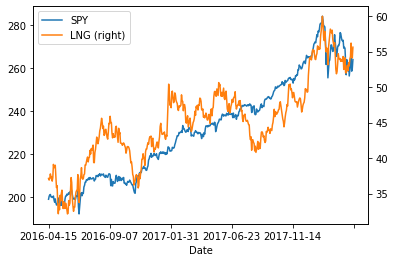

In [14]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot

In [15]:
plt.clf()  # clear the plot space

<Figure size 432x288 with 0 Axes>

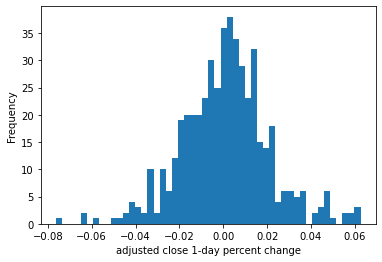

In [16]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

## Correlations

Correlations are nice to check out before building machine learning models, because we can see which features correlate to the target most strongly. Pearson's correlation coefficient is often used, which only detects linear relationships. It's commonly assumed our data is normally distributed, which we can "eyeball" from histograms. Highly correlated variables have a Pearson correlation coefficient near 1 (positively correlated) or -1 (negatively correlated). A value near 0 means the two variables are not linearly correlated.

If we use the same time periods for previous price changes and future price changes, we can see if the stock price is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

In [17]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [18]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct
Date,,,,,
2016-04-15,37.13,4293775.0,37.40,NaN,NaN
2016-04-18,36.90,3445852.0,36.75,NaN,NaN
2016-04-19,37.12,3748050.0,37.25,NaN,NaN
2016-04-20,37.77,2470384.0,39.11,NaN,NaN
2016-04-21,37.21,2043988.0,38.62,NaN,NaN
...,...,...,...,...,...
2018-04-04,54.30,1816771.0,NaN,0.024494,0.023370
2018-04-05,56.21,2533635.0,NaN,-0.010318,0.074761
2018-04-06,54.36,1754446.0,NaN,0.023363,0.017025


In [19]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


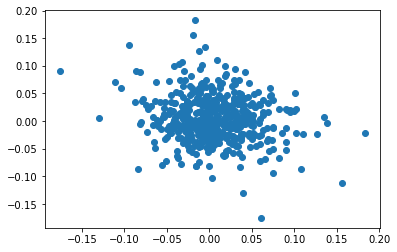

In [20]:
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

## Create moving average and RSI features

We want to add historical data to our machine learning models to make better predictions, but adding lots of historical time steps is tricky. Instead, we can condense information from previous points into a single timestep with indicators.

A moving average is one of the simplest indicators - it's the average of previous data points. This is the function talib.SMA() from the TAlib library.

Another common technical indicator is the relative strength index (RSI). This is defined by:

RSI = 100 − (100/1+RS)

R S= average gain over n periods / average loss over n periods

The n periods is set in talib.RSI() as the timeperiod argument.

A common period for RSI is 14, so we'll use that as one setting in our calculations.

In [21]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

In [22]:
import talib


In [23]:
# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Create features and targets

We almost have features and targets that are machine-learning ready -- we have features from current price changes (5d_close_pct) and indicators (moving averages and RSI), and we created targets of future price changes (5d_close_future_pct). Now we need to break these up into separate numpy arrays so we can feed them into machine learning algorithms.

Our indicators also cause us to have missing values at the beginning of the DataFrame due to the calculations. We could backfill this data, fill it with a single value, or drop the rows. Dropping the rows is a good choice, so our machine learning algorithms aren't confused by any sort of backfilled or 0-filled data. Pandas has a .dropna() function which we will use to drop any rows with missing values.

In [24]:
# Drop all na values
lng_df1 = lng_df.dropna()

In [25]:
lng_df1

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707


In [26]:
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = lng_df1[feature_names]
targets = lng_df1['5d_close_future_pct']

In [27]:
features

,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,
2017-01-31,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377
2017-02-01,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663
2017-02-02,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475
2017-02-03,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479
2017-02-06,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442
...,...,...,...,...,...,...,...,...,...
2018-03-27,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487
2018-03-28,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361
2018-03-29,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707


In [28]:
# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df1[feature_and_target_cols]

In [29]:
# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.047183  0.096373 -0.068888   
5d_close_pct                   -0.047183      1.000000 -0.827699  0.683973   
ma14                            0.096373     -0.827699  1.000000 -0.877566   
rsi14                          -0.068888      0.683973 -0.877566  1.000000   
ma30                            0.102744     -0.609573  0.848778 -0.964795   
rsi30                          -0.106279      0.518748 -0.713427  0.935711   
ma50                            0.113444     -0.475081  0.692689 -0.916540   
rsi50                          -0.138946      0.426045 -0.601849  0.845788   
ma200                           0.230860     -0.220690  0.346457 -0.551087   
rsi200                         -0.221029      0.284021 -0.416221  0.639057   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.102744 -0.106279  0.113444 -0.138946  0.23086

## Check the correlations

Before we fit our first machine learning model, let's look at the correlations between features and targets. Ideally we want large (near 1 or -1) correlations between features and targets. Examining correlations can help us tweak features to maximize correlation (for example, altering the timeperiod argument in the talib functions). It can also help us remove features that aren't correlated to the target.

To easily plot a correlation matrix, we can use seaborn's heatmap() function. This takes a correlation matrix as the first argument, and has many other options. Check out the annot option -- this will help us turn on annotations.

In [30]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import seaborn as sns

AttributeError: module 'numpy.core.numerictypes' has no attribute '_typestr'

In [ ]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot= True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()# show the plot

In [ ]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, annot_kws = {"size": 10})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

In [ ]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df1['ma200'], lng_df1['5d_close_future_pct'])
plt.show()

## Create train and test features

Before we fit our linear model, we want to add a constant to our features, so we have an intercept for our linear model.

We also want to create train and test features. This is so we can fit our model to the train dataset, and evaluate performance on the test dataset. We always want to check performance on data the model has not seen to make sure we're not overfitting, which is memorizing patterns in the training data too exactly.

With a time series like this, we typically want to use the oldest data as our training set, and the newest data as our test set. This is so we can evaluate the performance of the model on the most recent data, which will more realistically simulate predictions on data we haven't seen yet.

In [ ]:
#conda install -c conda-forge statsmodels

In [ ]:
import numpy as np

In [ ]:
#pip uninstall statsmodels -y

In [ ]:
#pip install statsmodels

In [ ]:
pip install statsmodels==0.10.0rc2 --pre --user

In [ ]:
#Import the statsmodels.api library with the alias sm
#import statsmodels as sm

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to the features
linear_features = sm.add_constant(features)

In [ ]:
linear_features

In [ ]:
# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 *targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

## Fit a linear model

We'll now fit a linear model, because they are simple and easy to understand. Once we've fit our model, we can see which predictor variables appear to be meaningfully linearly correlated with the target, as well as their magnitude of effect on the target. Our judgment of whether or not predictors are significant is based on the p-values of coefficients. This is using a t-test to statistically test if the coefficient significantly differs from 0. The p-value is the percent chance that the coefficient for a feature does not differ from zero. Typically, we take a p-value of less than 0.05 to mean the coefficient is significantly different from 0.

In [ ]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

In [ ]:
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

In [ ]:
# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

In [ ]:
train_predictions

In [ ]:
test_predictions

## Evaluate our results

Once we have our linear fit and predictions, we want to see how good the predictions are so we can decide if our model is any good or not. Ideally, we want to back-test any type of trading strategy. However, this is a complex and typically time-consuming experience.

A quicker way to understand the performance of our model is looking at regression evaluation metrics like R2
, and plotting the predictions versus the actual values of the targets. Perfect predictions would form a straight, diagonal line in such a plot, making it easy for us to eyeball how our predictions are doing in different regions of price changes. We can use matplotlib's .scatter() function to create scatter plots of the predictions and actual values.

In [ ]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()


<a id='item2'></a>

# CHAPTER 2 - Machine learning tree methods

## Feature engineering from volume

We're going to use non-linear models to make more accurate predictions. With linear models, features must be linearly correlated to the target. Other machine learning models can combine features in non-linear ways. For example, what if the price goes up when the moving average of price is going up, and the moving average of volume is going down? The only way to capture those interactions is to either multiply the features, or to use a machine learning algorithm that can handle non-linearity (e.g. random forests).

To incorporate more information that may interact with other features, we can add in weakly-correlated features. First we will add volume data, which we have in the lng_df as the Adj_Volume column.

Before you begin, remember that for TA-Lib functions (such as SMA()), you need to provide Numpy arrays, not pandas objects. You can use the .values attribute of a pandas Series or DataFrame to return it as a Numpy array.

In [ ]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)

lng_df

In [ ]:
lng_df['Adj_Volume_1d_change'] = lng_df['Adj_Volume'].pct_change()
lng_df['Adj_Volume_1d_change_SMA'] = talib.SMA(lng_df['Adj_Volume_1d_change'].values,
                                               timeperiod=5)

In [ ]:
lng_df

In [ ]:
# Plot histogram of volume % change data
lng_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [ ]:
lng_df

In [ ]:
lng_df.index = pd.to_datetime(lng_df.index)

In [ ]:
lng_df

## Create day-of-week features

We can engineer datetime features to add even more information for our non-linear models. Most financial data has datetimes, which have lots of information in them -- year, month, day, and sometimes hour, minute, and second. But we can also get the day of the week, and things like the quarter of the year, or the elapsed time since some event (e.g. earnings reports).

We are only going to get the day of the week here, since our dataset doesn't go back very far in time. The dayofweek property from the pandas datetime index will help us get the day of the week. Then we will dummy dayofweek with pandas' get_dummies(). This creates columns for each day of the week with binary values (0 or 1). We drop the first column because it can be inferred from the others.

In [ ]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(lng_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)


In [ ]:
# Set the index as the original DataFrame index for merging
days_of_week.index = lng_df.index

In [ ]:
# Join the dataframe with the days of week DataFrame
lng_df = pd.concat([lng_df, days_of_week], axis=1)

In [ ]:
# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
lng_df.dropna(inplace=True)  # drop missing values in-place
print(lng_df.head())

## Examine correlations of the new features

In [ ]:
lng_df.shape

Now that we have our volume and datetime features, we want to check the correlations between our new features (stored in the new_features list) and the target (5d_close_future_pct) to see how strongly they are related. Recall pandas has the built-in .corr() method for DataFrames, and seaborn has a nice heatmap() function to show the correlations.

In [ ]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])

In [ ]:
# Plot the correlations between the new features and the targets
sns.heatmap(lng_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

## Fit a decision tree

Random forests are a go-to model for predictions; they work well out of the box. But we'll first learn the building block of random forests -- decision trees.

Decision trees split the data into groups based on the features. Decision trees start with a root node, and split the data down until we reach leaf nodes.

decision tree

In [ ]:
train_features = pd.read_csv("train_features.csv", index_col=0)

In [ ]:
train_features.index = pd.to_datetime(train_features.index)

In [ ]:
test_features = pd.read_csv("test_features.csv", index_col=0)

In [ ]:
test_features.index = pd.to_datetime(test_features.index)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

In [ ]:
# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

In [ ]:
# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

In [ ]:
train_features

In [ ]:
train_targets

In [ ]:
test_features

In [ ]:
test_targets

## Try different max depths

We always want to optimize our machine learning models to make the best predictions possible. We can do this by tuning hyperparameters, which are settings for our models. We will see in more detail how these are useful in future chapters, but for now think of them as knobs we can turn to tune our predictions to be as good as possible.

For regular decision trees, probably the most important hyperparameter is max_depth. This limits the number of splits in a decision tree. Let's find the best value of max_depth based on the R2
score of our model on the test set, which we can obtain using the score() method of our decision tree models.

In [ ]:
# Loop through a few different max depths and check the performance
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)
    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

## Check our results

Once we have an optimized model, we want to check how it is performing in more detail. We already saw the R2

score, but it can be helpful to see the predictions plotted vs actual values. We can use the .predict() method of our decision tree model to get predictions on the train and test sets.

Ideally, we want to see diagonal lines from the lower left to the upper right. However, due to the simplicity of decisions trees, our model is not going to do well on the test set. But it will do well on the train set.

In [ ]:
train_features

In [ ]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)


In [ ]:
# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

In [ ]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

## Fit a random forest

Data scientists often use random forest models. They perform well out of the box, and have lots of settings to optimize performance. Random forests can be used for classification or regression; we'll use it for regression to predict the future price change of LNG.

We'll create and fit the random forest model similarly to the decision trees using the .fit(features, targets) method. With sklearn's RandomForestRegressor, there's a built-in .score() method we can use to evaluate performance. This takes arguments (features, targets), and returns the R2
score (the coefficient of determination).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

In [ ]:
# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

## Tune random forest hyperparameters

As with all models, we want to optimize performance by tuning hyperparameters. We have many hyperparameters for random forests, but the most important is often the number of features we sample at each split, or max_features in RandomForestRegressor from the sklearn library. For models like random forests that have randomness built-in, we also want to set the random_state. This is set for our results to be reproducible.

Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

In [ ]:
# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

In [ ]:
# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

## Evaluate performance

Lastly, and as always, we want to evaluate performance of our best model to check how well or poorly we are doing. Ideally it's best to do back-testing, but that's an involved process we don't have room to cover in this course.

We've already seen the R2
scores, but let's take a look at the scatter plot of predictions vs actual results using matplotlib. Perfect predictions would be a diagonal line from the lower left to the upper right.

In [ ]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

In [ ]:
# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

In [ ]:
# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

## Random forest feature importances

One useful aspect of tree-based methods is the ability to extract feature importances. This is a quantitative way to measure how much each feature contributes to our predictions. It can help us focus on our best features, possibly enhancing or tuning them, and can also help us get rid of useless features that may be cluttering up our model.

Tree models in sklearn have a .feature_importances_ property that's accessible after fitting the model. This stores the feature importance scores. We need to get the indices of the sorted feature importances using np.argsort() in order to make a nice-looking bar plot of feature importances (sorted from greatest to least importance).

In [ ]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

In [ ]:
# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

In [ ]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

## A gradient boosting model

Now we'll fit a gradient boosting (GB) model. It's been said a linear model is like a Toyota Camry, and GB is like a Black Hawk helicopter. GB has potential to outperform random forests, but doesn't always do so. This is called the no free lunch theorem, meaning we should always try lots of different models for each problem.

GB is similar to random forest models, but the difference is that trees are built successively. With each iteration, the next tree fits the residual errors from the previous tree in order to improve the fit.

For now we won't search our hyperparameters -- they've been searched for you.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

In [ ]:
print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

## Gradient boosting feature importances

As with random forests, we can extract feature importances from gradient boosting models to understand which features are the best predictors. Sometimes it's nice to try different tree-based models and look at the feature importances from all of them. This can help average out any peculiarities that may arise from one particular model.

The feature importances are stored as a numpy array in the .feature_importances_ property of the gradient boosting model. We'll need to get the sorted indices of the feature importances, using np.argsort(), in order to make a nice plot. We want the features from largest to smallest, so we will use Python's indexing to reverse the sorted importances like feat_importances[::-1].

In [ ]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

In [ ]:
feature_importances

In [ ]:
# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[:-1]
x = range(features.shape[1])

In [ ]:
features.shape

In [ ]:
sorted_index

In [ ]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]

In [ ]:
labels

In [ ]:
x

In [ ]:
plt.bar(x, feature_importances[sorted_index], tick_label=labels)
# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

<a id='item3'></a>

# Chapter 3 - Neural networks and KNN

## Standardizing data

Some models, like K-nearest neighbors (KNN) & neural networks, work better with scaled data -- so we'll standardize our data.

We'll also remove unimportant variables (day of week), according to feature importances, by indexing the features DataFrames with .iloc[]. KNN uses distances to find similar points for predictions, so big features outweigh small ones. Scaling data fixes that.

sklearn's scale() will standardize data, which sets the mean to 0 and standard deviation to 1. Ideally we'd want to use StandardScaler with fit_transform() on the training data, and fit() on the test data, but we are limited to 15 lines of code here.

Once we've scaled the data, we'll check that it worked by plotting histograms of the data.

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]


In [ ]:
# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

In [ ]:
# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

## Optimize n_neighbors

Now that we have scaled data, we can try using a KNN model. To maximize performance, we should tune our model's hyperparameters. For the k-nearest neighbors algorithm, we only have one hyperparameter: n, the number of neighbors. We set this hyperparameter when we create the model with KNeighborsRegressor. The argument for the number of neighbors is n_neighbors.

We want to try a range of values that passes through the setting with the best performance. Usually we will start with 2 neighbors, and increase until our scoring metric starts to decrease. We'll use the R2
value from the .score() method on the test set (scaled_test_features and test_targets) to optimize n here. We'll use the test set scores to determine the best n.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

## Evaluate KNN performance

We just saw a few things with our KNN scores. For one, the training scores started high and decreased with increasing n, which is typical. The test set performance reached a peak at 5 though, and we will use that as our setting in the final KNN model.

As we have done a few times now, we will check our performance visually. This helps us see how well the model is predicting on different regions of actual values. We will get predictions from our knn model using the .predict() method on our scaled features. Then we'll use matplotlib's plt.scatter() to create a scatter plot of actual versus predicted values.

In [ ]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Fit the model
knn.fit(scaled_train_features, train_targets)

In [ ]:
# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

In [ ]:
# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

## Build and fit a simple neural net

The next model we will learn how to use is a neural network. Neural nets can capture complex interactions between variables, but are difficult to set up and understand. Recently, they have been beating human experts in many fields, including image recognition and gaming (check out AlphaGo) -- so they have great potential to perform well.

To build our nets we'll use the keras library. This is a high-level API that allows us to quickly make neural nets, yet still exercise a lot of control over the design. The first thing we'll do is create almost the simplest net possible -- a 3-layer net that takes our inputs and predicts a single value. Much like the sklearn models, keras models have a .fit() method that takes arguments of (features, targets).

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

In [ ]:
# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

## Plot losses

Once we've fit a model, we usually check the training loss curve to make sure it's flattened out. The history returned from model.fit() is a dictionary that has an entry, 'loss', which is the training loss. We want to ensure this has more or less flattened out at the end of our training.

In [ ]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Measure performance

Now that we've fit our neural net, let's check performance to see how well our model is predicting new values. There's not a built-in .score() method like with sklearn models, so we'll use the r2_score() function from sklearn.metrics. This calculates the R2 score given arguments (y_true, y_predicted). We'll also plot our predictions versus actual values again. This will yield some interesting results soon (once we implement our own custom loss function).

In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))



In [ ]:
# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

## Custom loss function

Up to now, we've used the mean squared error as a loss function. This works fine, but with stock price prediction it can be useful to implement a custom loss function. A custom loss function can help improve our model's performance in specific ways we choose. For example, we're going to create a custom loss function with a large penalty for predicting price movements in the wrong direction. This will help our net learn to at least predict price movements in the correct direction.

To do this, we need to write a function that takes arguments of (y_true, y_predicted). We'll also use functionality from the backend keras (using tensorflow) to find cases where the true value and prediction don't match signs, then penalize those cases.

In [ ]:
import keras.losses
import tensorflow as tf

In [ ]:
# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

In [ ]:
sign_penalty

In [ ]:
keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

In [ ]:
keras.losses.sign_penalty

## Fit neural net with custom loss function

Now we'll use the custom loss function we just created. This will enable us to alter the model's behavior in useful ways particular to our problem -- it's going to try to force the model to learn how to at least predict price movement direction correctly. All we need to do now is set the loss argument in our .compile() function to our function name, sign_penalty. We'll examine the training loss again to make sure it's flattened out.

In [ ]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Visualize the results

We've fit our model with the custom loss function, and it's time to see how it is performing. We'll check the R2 values again with sklearn's r2_score() function, and we'll create a scatter plot of predictions versus actual values with plt.scatter(). This will yield some interesting results!

In [ ]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

In [ ]:
# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
plt.legend(); plt.show()

## Combatting overfitting with dropout

A common problem with neural networks is they tend to overfit to training data. What this means is the scoring metric, like R2

or accuracy, is high for the training set, but low for testing and validation sets, and the model is fitting to noise in the training data.

We can work towards preventing overfitting by using dropout. This randomly drops some neurons during the training phase, which helps prevent the net from fitting noise in the training data. keras has a Dropout layer that we can use to accomplish this. We need to set the dropout rate, or fraction of connections dropped during training time. This is set as a decimal between 0 and 1 in the Dropout() layer.

We're going to go back to the mean squared error loss function for this model.

In [ ]:
from keras.layers import Dropout

In [ ]:
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

In [ ]:
# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Ensembling models

One approach to improve predictions from machine learning models is ensembling. A basic approach is to average the predictions from multiple models. A more complex approach is to feed predictions of models into another model, which makes final predictions. Both approaches usually improve our overall performance (as long as our individual models are good). If you remember, random forests are also using ensembling of many decision trees.

To ensemble our neural net predictions, we'll make predictions with the 3 models we just created -- the basic model, the model with the custom loss function, and the model with dropout. Then we'll combine the predictions with numpy's .hstack() function, and average them across rows with np.mean(predictions, axis=1).

In [ ]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

## See how the ensemble performed

Let's check performance of our ensembled model to see how it's doing. We should see roughly an average of the R2 scores, as well as a scatter plot that is a mix of our previous models' predictions. The bow-tie shape from the custom loss function model should still be a bit visible, but the edges near x=0 should be softer.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

In [ ]:
# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

<a id='item4'></a>

# Chapter 4 - Modern portfolio theory (MPT); efficient frontiers

## Join stock DataFrames and calculate returns

Our first step towards calculating modern portfolio theory (MPT) portfolios is to get daily and monthly returns. Eventually we're going to get the best portfolios of each month based on the Sharpe ratio. The easiest way to do this is to put all our stock prices into one DataFrame, then to resample them to the daily and monthly time frames. We need daiy price changes to calculate volatility, which we will use as our measure of risk.

In [ ]:
smlv = pd.read_csv("SMLV.csv", usecols=["Date", "Adj_Close"], parse_dates=["Date"], index_col=0)
smlv_df = smlv['2013-02-21':'2018-05-31']
smlv_df

In [ ]:
lng = pd.read_csv("LNG.csv", usecols=["Date", "Adj_Close"], index_col=0, parse_dates=["Date"])
lng_df = lng['1994-04-04':'2018-05-31']
lng_df

In [ ]:
spy = pd.read_csv("SPY_ch4.csv", usecols=["Date", "Adj_Close"], index_col=0, parse_dates=["Date"])
spy

In [ ]:
spy_df = spy['1993-01-29':'2018-05-31']
spy_df

In [ ]:
# Join 3 stock dataframes together
full_df = pd.concat([lng_df, spy_df, smlv_df], axis=1).dropna()
full_df

In [ ]:
full_df.columns = ['LNG', 'SPY', 'SMLV']
full_df.head()

In [ ]:
# Resample the full dataframe to monthly timeframe
monthly_df = full_df.resample('BMS').first()

In [ ]:
monthly_df

In [ ]:
# Calculate daily returns of stocks
returns_daily = full_df.pct_change()
returns_daily

In [ ]:
# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
returns_monthly

In [ ]:
print(returns_monthly.tail())

## Calculate covariances for volatility

In MPT, we quantify risk via volatility. The math for calculating portfolio volatility is complex, and it requires daily returns covariances. We'll now loop through each month in the returns_monthly DataFrame, and calculate the covariance of the daily returns.

With pandas datetime indices, we can access the month and year with df.index.month and df.index.year. We'll use this to create a mask for returns_daily that gives us the daily returns for the current month and year in the loop. We then use the mask to subset the DataFrame like this: df[mask]. This gets entries in the returns_daily DataFrame which are in the current month and year in each cycle of the loop. Finally, we'll use pandas' .cov() method to get the covariance of daily returns.

In [ ]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:    
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

## Calculate portfolios

We'll now generate portfolios to find each month's best one. numpy's random.random() generates random numbers from a uniform distribution, then we normalize them so they sum to 1 using the /= operator. We use these weights to calculate returns and volatility. Returns are sums of weights times individual returns. Volatility is more complex, and involves the covariances of the different stocks.

Finally we'll store the values in dictionaries for later use, with months' dates as keys.

In this case, we will only generate 10 portfolios for each date so the code will run faster, but in a real-world use-case you'd want to use more like 1000 to 5000 randomly-generated portfolios for a few stocks.

In [ ]:
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

In [ ]:
# Get portfolio performances at each month
for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(10):
        weights = np.random.random(3)
        weights /= np.sum(weights) # /= divides weights by their sum to normalize
        
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)
        
print(portfolio_weights[date][0])

## Plot efficient frontier

We can finally plot the results of our MPT portfolios, which shows the "efficient frontier". This is a plot of the volatility vs the returns. This can help us visualize our risk-return possibilities for portfolios. The upper left boundary of the points is the best we can do (highest return for a given risk), and that is the efficient frontier.

To create this plot, we will use the latest date in our covariances dictionary which we created a few exercises ago. This has dates as keys, so we'll get the sorted keys using sorted() and .keys(), then get the last entry with Python indexing ([-1]). Lastly we'll use matplotlib to scatter variance vs returns and see the efficient frontier for the latest date in the data.

In [ ]:
# Get latest date of available data
date = sorted(covariances.keys())[-1]

In [ ]:
# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date], alpha=1)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

In [ ]:
a = {}

In [ ]:
a =	[0.005767379944875263, 0.006287773107840088, 0.006883659022712298, 0.007429281929392692, 0.0074227305264510084, 0.006418298450404074, 0.005716262883708641, 0.006379316445445106, 0.006004469130673222, 0.0070074300159562114, 0.006752885251309192, 0.005925726577751856, 0.006306063361117962, 0.005930938597482147, 0.0065470175739491005, 0.006243769698789128, 0.007306043472878008, 0.006080797937214862, 0.006783545854114586, 0.00790616799050552, 0.005762426192252905, 0.005969900137575259, 0.006511533935157605, 0.0057774942627495844, 0.006482250622435064, 0.005998349162595065, 0.0058109784311945484, 0.006658828680704885, 0.006476231436103505, 0.007414406816362101, 0.005961181179202408, 0.005864298012939311, 0.006651827638256955, 0.007386435444072131, 0.0067872136712528505, 0.006237490740703242, 0.008572082325158976, 0.005918651544660963, 0.00674364551764914, 0.0068537669099729, 0.006029831760966636, 0.006735019401251373, 0.005984673650350656, 0.006963430866325876, 0.006163282957602371, 0.008555763728136262, 0.006724067581164212, 0.007011567045032826, 0.0062000437166096455, 0.0073336208576154855, 0.011166135115893533, 0.005870618313666212, 0.006162607574349256, 0.00742845855929782, 0.00636764595882941, 0.007150303987300385, 0.007229549732914623, 0.005358467542773404, 0.006208928973028249, 0.006877282387875561, 0.0062600051523777935, 0.006845773060340668, 0.006741242895551509, 0.00620765159193514, 0.007756331228429869, 0.006979995565516872, 0.006830362224398186, 0.005900946062007526, 0.006193346955515429, 0.005733043308621371, 0.0066914118864034085, 0.006696860996547024, 0.006122836891535867, 0.007581432244614881, 0.005973137522765596, 0.006167452599793366, 0.0069209934879287645, 0.007872828091297024, 0.006742279629295783, 0.006125841903802973, 0.006210268506297545, 0.007330568770992366, 0.006972424372321807, 0.007636022359488836, 0.006289008045149525, 0.006034037371567416, 0.007269289356238082, 0.006484800643868547, 0.00738379993946809, 0.007106996437396965, 0.006762831087683238, 0.006865066319253252, 0.006384153659266196, 0.007533788784439516, 0.0062823939890500795, 0.006591314878167275, 0.006579723815472523, 0.007439308602425417, 0.006573940049146998, 0.006746489929563093, 0.0073539539331808415, 0.005797343606571326, 0.0069773362166455355, 0.007093340586815375, 0.006415387299841867, 0.005366374292657356, 0.005770826498831225, 0.007584997962755399, 0.006612695072501657, 0.006848782487795269, 0.006605114328869148, 0.0066378462453771615, 0.0075567967370251754, 0.0054778409857048965, 0.0058737164972140704, 0.006926306593220683, 0.007709239830967612, 0.006773771664477583, 0.006236571067034143, 0.005413781672074003, 0.006522668291333223, 0.006556256163945268, 0.005585976503088813, 0.0065097928606556235, 0.009388493212729483, 0.009863581019988207, 0.006520306972074615, 0.0054925496165708606, 0.006580837122541289, 0.005980085020768396, 0.007219500962982369, 0.00951025018818747, 0.007991045659312067, 0.006075961852521454, 0.007065981122579931, 0.006185670760551603, 0.006080335220462523, 0.005830986283696196, 0.0077665308774648055, 0.007494562151761994, 0.006257640633402234, 0.005968633787015915, 0.006278356320000844, 0.007025720671597304, 0.006385740707351973, 0.0075800141682332185, 0.006039487262198452, 0.006531823759178892, 0.006768633966001466, 0.005385081069996355, 0.00553981555492973, 0.006324908787640821, 0.005504990306095231, 0.0063665846709532485, 0.010716196765584439, 0.005977468342754787, 0.006935638898911537, 0.006661020341441096, 0.0064860291500667315, 0.0070274946187703965, 0.007171266944618086, 0.010504630530526478, 0.005410766835005775, 0.007388381691807079, 0.006446364148560778, 0.006932971403110364, 0.008640935458738149, 0.007151177750572256, 0.0076855088350278565, 0.006430540286576583, 0.0060039154877033615, 0.00637428698334402, 0.006219255168345902, 0.006922847466796267, 0.007208521622312865, 0.006561941689695436, 0.007597202377265319, 0.006287659637542311, 0.006584511840065537, 0.009794989929402156, 0.00875879281018625, 0.00822046542390735, 0.007540139825001952, 0.006256327288026192, 0.005914335645390965, 0.006411283658304306, 0.005369657553390786, 0.008171543247618904, 0.008636692220509435, 0.006465453176858975, 0.006109831293870297, 0.005884522502329739, 0.008064722660533359, 0.006456319607430536, 0.005966110364330482, 0.0063432779427974794, 0.008453193932732452, 0.005388232574214505, 0.006885965688432972, 0.008128282879573899, 0.006112326662227788, 0.006908278953943449, 0.007737306841589661, 0.006127932092725183, 0.006133326487683, 0.008371247331835936, 0.0058844021103911705, 0.007771200054329181, 0.006390683257463054, 0.006452891799889463, 0.006808791604445631, 0.006528418407338485, 0.006416278975826772, 0.005628347229730756, 0.008563544366753014, 0.006913168870470291, 0.005820347961369548, 0.007320289190781564, 0.007494312151933882, 0.006445349607275502, 0.009067922412437831, 0.0078453229141464, 0.006538149227530634, 0.0060085355490051345, 0.0076954570104454945, 0.00656783973618932, 0.006089915815672136, 0.006845216634992738, 0.005952005788780957, 0.007216961313227835, 0.0062579773106119846, 0.005896433602461519, 0.006628031272997199, 0.006247965397543501, 0.0058687383336375, 0.008045409292811874, 0.007017539288758885, 0.0053299717413882045, 0.0073517753949031775, 0.006055783779714313, 0.007823557578940618, 0.007723095884203434, 0.006312744728744363, 0.008831333589181159, 0.0067160952100025605, 0.006783923481614867, 0.0074527272933395975, 0.005467232454960294, 0.00814737116506669, 0.006600462813197878, 0.009141488213802541, 0.00606957610478814, 0.007232559007143879, 0.007958342612124622, 0.008555223363695616, 0.006212778638118568, 0.007191337073298425, 0.006888557236285158, 0.0061011058327742574, 0.006474616857032142, 0.007338988065975887, 0.006588356766825202, 0.00587641894837095, 0.006981663151324917, 0.006910281362576763, 0.006596729746125039, 0.009620673555319745, 0.006198028060027121, 0.006493531673157043, 0.006536458360651089, 0.006773372620201386, 0.0065984455045705135, 0.00574080117963717, 0.007615641032319977, 0.006894683884514796, 0.010131669761167528, 0.008615122404040098, 0.0065938460074612465, 0.006816585826675851, 0.007044651040442448, 0.006264407448473374, 0.008140997326232826, 0.006706613778923588, 0.00790938375855935, 0.0061481453551261635, 0.006755522095064479, 0.006818125151393088, 0.006729101221262158, 0.005457457088622669, 0.005905223853295527, 0.00613243030279505, 0.0069601298750675425, 0.005904155111489214, 0.0070734459908163285, 0.006265000684811686, 0.006453385422221734, 0.009156363906834941, 0.005659910254926152, 0.009013999202179471, 0.00607535872972896, 0.006678018806205887, 0.00568324554432048, 0.006892411187174687, 0.00829607669633767, 0.008145213786983196, 0.00693957396419322, 0.0064932834330126, 0.00748899622416937, 0.009437448487853535, 0.006610563099174639, 0.006168249715193901, 0.008368747358628921, 0.006243052314743697, 0.0067641996466536475, 0.006497223445293619, 0.008533645552720726, 0.006866280946096164, 0.006981158638697031, 0.005930878612849874, 0.006806221879830995, 0.0055039313507537595, 0.006155047679751571, 0.006961068808188166, 0.006425045454398304, 0.005835648728937104, 0.0066291164507907155, 0.006435526995648995, 0.007407506358548844, 0.006548710175633585, 0.0070592012995346785, 0.006989921528624232, 0.0060398796066829545, 0.0059048621651917625, 0.0059236907187480165, 0.0068014116299188, 0.008986473623356002, 0.006136550205648073, 0.006221546027721954, 0.006136428782909446, 0.006795227479954018, 0.00825151050852562, 0.006999137020866232, 0.006480160885910932, 0.005811301856236777, 0.006613578675795615, 0.006406493697916669, 0.005704576913473851, 0.006909654715468867, 0.006342676353403285, 0.006624490028474523, 0.006195168622443019, 0.006936543892982637, 0.006838897683675731, 0.005463015407432609, 0.006348033008625401, 0.0064862973881128815, 0.0064783089657678835, 0.00790288622189347, 0.0060535678522554105, 0.005986489562780426, 0.007326882897468557, 0.007138345410516606, 0.006826467742849824, 0.006260079029560148, 0.007071073801930306, 0.005519968030080648, 0.006210325427139139, 0.008166291719029122, 0.006963718161497868, 0.006990067026088693, 0.006312833648049775, 0.006587652354246986, 0.0065298943050782, 0.005799379364466457, 0.00635676093228971, 0.006482547592922717, 0.0070393085881842125, 0.007342018684042735, 0.006240115320559669, 0.0054010394137555115, 0.00653401484762115, 0.006924129123622395, 0.006092523079177473, 0.006722083185587381, 0.006863041669275584, 0.007140608475671131, 0.0065472150330675594, 0.00605487796974635, 0.006907965475824588, 0.0070355054791282085, 0.006675618229052026, 0.0069137600871664925, 0.007443536751859463, 0.006742994877725933, 0.0076518232610839985, 0.006093220247287179, 0.005921427657717234, 0.005925959578833708, 0.007168165306093078, 0.007328913732487814, 0.006360034390405589, 0.007054458580686789, 0.007141715295628757, 0.0060440294220625934, 0.0078363352766159, 0.007726379900703471, 0.00732266421266232, 0.005833655210611406, 0.007314339083412926, 0.007021566859747259, 0.007672500836077262, 0.00991549883350781, 0.006520432981460971, 0.006018576803369947, 0.006171164443015902, 0.0063929924727453, 0.006378160685350569, 0.006231817860452468, 0.006493458906516822, 0.006055951675853672, 0.008472158382235905, 0.0069851451009919265, 0.00544594502924792, 0.008239511032570666, 0.005901638666673538, 0.006869093207502662, 0.007483453734393655, 0.006069627209967969, 0.006465988419516635, 0.005475043852837128, 0.005938664971137223, 0.006150279007815713, 0.006469842830926474, 0.006702885284542276, 0.006004222692300844, 0.007014760364448492, 0.00621014083849425, 0.007631921706532778, 0.005400896076350679, 0.00597027068955059, 0.006864639008525697, 0.0066545400885957475, 0.006251585756350777, 0.008281366461002398, 0.007037647755902122, 0.005978954043664865, 0.009538225801085572, 0.006977791390090788, 0.005496926618577482, 0.006701432269461973, 0.00898782312282212, 0.0060706292299206165, 0.007689262029563396, 0.007108894802329142, 0.005744386785140737, 0.009639991072692563, 0.005661416799827307, 0.006855646089680272, 0.007957287392493986, 0.007029206891848058, 0.006908770960178198, 0.0064129225034277254, 0.006193078735229928, 0.008823742185864444, 0.00618992410972191, 0.006528409593994795, 0.006345704414550293, 0.0072186313029912255, 0.005510410424338358, 0.0065462011023704764, 0.007374986310298383, 0.0066592263874977525, 0.006738693102247307, 0.006068200995011333, 0.006922489437413302, 0.006700103651294895, 0.007007496035699902, 0.0070969346263731374, 0.007261179492278555, 0.006670426338499317, 0.005882244576157691, 0.007338974470241773, 0.005764709404641412, 0.006260776692105923, 0.006549581087725735, 0.007138160312733702, 0.006873812816056117, 0.008803568227045455, 0.0071249994077613125, 0.006718431633330223, 0.006254021215858633, 0.0061806980753214575, 0.007645706031460656, 0.0107647095505328, 0.006493503091770571, 0.005992258738549704, 0.006285162870690712, 0.005502465612739441, 0.005851325939475535, 0.006655260007766667, 0.006966775880604046, 0.006889632954118812, 0.008007297711827099, 0.006795524089474717, 0.007239995124192559, 0.006103738500120584, 0.006755005181893209, 0.005473848045340947, 0.007113811214312387, 0.006145330295189851, 0.007030303694524274, 0.008136835513401159, 0.006738772741430995, 0.005755219393083218, 0.006327862722579856, 0.006502057362632144, 0.007643298450840214, 0.007379680670791417, 0.007086842243244947, 0.005795871710206718, 0.007535331977415257, 0.00703313352444185, 0.006973507532967935, 0.006163013678212307, 0.006420972168205243, 0.006865995558059249, 0.007044471442161812, 0.006710918123551333, 0.005962437056469118, 0.007501781480775807, 0.005900626821253834, 0.006667323379916058, 0.007068629771047917, 0.008200539205488008, 0.007763466124278038, 0.007534938159902778, 0.005781787429628841, 0.0067344725808168955, 0.007138025296165983, 0.006716475955737078, 0.0077062496909964225, 0.006495972806017215, 0.007007992714637116, 0.006950868699455434, 0.006161616697177476, 0.0060872877878249505, 0.007109428225625261, 0.0059899609974881605, 0.006521746339125957, 0.008725476861374532, 0.006441656584920491, 0.006544707344800354, 0.005926545042279422, 0.0057694881968495225, 0.007729586047949623, 0.0058084600103916915, 0.007202123277903232, 0.006208069984445776, 0.006575156573579937, 0.005843959562571722, 0.00661866664766109, 0.0068009846296091135, 0.0063959627602174505, 0.0072235238660435614, 0.007088559573363575, 0.006411099537687415, 0.006275483888785013, 0.007983801866663025, 0.007062497262987911, 0.006600309661257303, 0.0068771746629372075, 0.007376526892456575, 0.00668470125584897, 0.006287359774008863, 0.008549995956396092, 0.006453598252581486, 0.007459531316860563, 0.006805498941625322, 0.007211386490759677, 0.00633051640718245, 0.008195895689224355, 0.008759297784010795, 0.005847209070625681, 0.005915698067439468, 0.007376932880202008, 0.008754727500336491, 0.006232378511820735, 0.007291054080971782, 0.0069418359874542515, 0.007598739274076079, 0.006081962560101769, 0.008118676386217756, 0.006803086340350007, 0.007820647474491097, 0.006446581892624843, 0.005763339763321983, 0.008447190001032577, 0.006265503344348795, 0.005871359622800673, 0.008765295230363923, 0.005887806236625222, 0.006325270097667079, 0.006795844480828759, 0.005643874565408577, 0.006960348668657086, 0.006187646549532785, 0.0055221244045966, 0.0058365147039613294, 0.005777796881298751, 0.006724862751347855, 0.00781908784482891, 0.0063667652203238416, 0.0066365200193013825, 0.006228049867582239, 0.005989879433920635, 0.006498640225426443, 0.006226328233364978, 0.006337560963898059, 0.006218166308496148, 0.006442729914661738, 0.006105239878981844, 0.007252935867006095, 0.006734422371108414, 0.005837444764704512, 0.005618169013771925, 0.0060108211013000165, 0.006040539518444087, 0.007355235719696309, 0.009118332885981425, 0.006817199393990234, 0.006179960636267927, 0.0061913996479125155, 0.006172075774298066, 0.006685576278855417, 0.006350758566145547, 0.005742688734224033, 0.00542869216281404, 0.006218804331498023, 0.006308406529550979, 0.00630669548782042, 0.005786440908884713, 0.006365032978425958, 0.0060043607516615145, 0.006074183546093214, 0.007636344635568828, 0.00983806293875513, 0.007969432284176152, 0.006909940155449923, 0.0060959918701717596, 0.0068685382989394665, 0.006766696695909626, 0.006141618243483957, 0.005759550164345826, 0.005968142206257836, 0.007191509768795929, 0.01043561881869946, 0.006579050585410061, 0.006193819579499408, 0.005965983154069409, 0.006852838803076381, 0.0055878595710086194, 0.0065415358776364785, 0.007835208641571462, 0.007025355116105959, 0.007217233036974208, 0.005632267440952809, 0.006592378185672382, 0.00680802890645353, 0.006411527824752804, 0.006040533512623607, 0.007507407682044333, 0.0076129773724871825, 0.006198462816573406, 0.00788460460436842, 0.006529910265114748, 0.0062549890733912036, 0.005709060723228898, 0.00864092692977317, 0.0060387839015039815, 0.009391825771179448, 0.006032946505014892, 0.008710211833393922, 0.006930034575829655, 0.0071166657758418555, 0.006219711563477467, 0.007414444659627925, 0.0081187499821255, 0.006462573389917685, 0.006874076496422547, 0.005487276004157021, 0.006095812558059027, 0.006065360672611583, 0.005762586435859083, 0.005762119807001892, 0.0073432631724357055, 0.006971131651723659, 0.0071659328521836586, 0.007423090846404766, 0.007080637552405505, 0.007468214562180425, 0.0073075519981295285, 0.007594649954562383, 0.006606846040381117, 0.0063609535997235424, 0.006280195859765695, 0.006877998223245871, 0.005973951689194081, 0.006007166215622302, 0.00616993986206725, 0.007907772188558421, 0.007460484509834381, 0.006660280948209579, 0.007587897878408247, 0.006941480160302572, 0.007491053305959984, 0.0069783972508834806, 0.006591596078684337, 0.0075130096561039535, 0.0057692951831998735, 0.0070649991818397114, 0.0072060168341935285, 0.006567885235812562, 0.007263714278785529, 0.005959316460715228, 0.005438097982329792, 0.006287002710992683, 0.007283412547850466, 0.006319219925744986, 0.006747146175075079, 0.006596239256218792, 0.0063958097971672685, 0.006200510202960443, 0.006674680840120619, 0.006659910198780702, 0.005848692976298839, 0.005704342422321488, 0.0061602875557334735, 0.006444662011039385, 0.006360631779892415, 0.006569251416226844, 0.005869014372544046, 0.00588690182525588, 0.006203396452589784, 0.007291028587635662, 0.006393010375054041, 0.0062695894992413305, 0.0070074268820905635, 0.006815903191768639, 0.00547981266133522, 0.006759551305537888, 0.00615007895116344, 0.005935749959174098, 0.007549200815414368, 0.008197005919564593, 0.0059031049527069725, 0.006313959500418742, 0.006163798229112348, 0.006235320395894275, 0.010756253158667161, 0.006775775654254918, 0.005971963225367584, 0.007854897250332147, 0.006125898304248525, 0.006849099308605389, 0.006417990164328671, 0.00598403015066228, 0.006551472604146333, 0.00636759741887044, 0.005700455432525267, 0.006078672101695348, 0.007058351731008629, 0.006262622881633909, 0.007741026292145176, 0.006783554445866809, 0.007169844326001843, 0.006562701050238073, 0.006575525607684342, 0.007118858920879681, 0.006508207078278138, 0.006750883689444918, 0.0075762540315504915, 0.007896123317118822, 0.006665919433880893, 0.007341597040107535, 0.006764111386817117, 0.008524132602155019, 0.006354627443109781, 0.006843384512364328, 0.00609934530038121, 0.006977156779647623, 0.006631055208263099, 0.005824758691920035, 0.00575769854571211, 0.0065004035250548235, 0.006406877733980842, 0.0068280895832626125, 0.006879106602311539, 0.007499981163118376, 0.0065109605332227035, 0.007564198544045762, 0.0065906807705017716, 0.005972133140982866, 0.006034383953418486, 0.006071228979660506, 0.007456628318812309, 0.006399255831890619, 0.006805904585988073, 0.00631485197668941, 0.006416573109803439, 0.008083120073726914, 0.007021794293459758, 0.005927154799679138, 0.0054685921474119294, 0.006812816171882581, 0.00859681075842976, 0.00735999855096782, 0.0072871556778793525, 0.006428670010741868, 0.006386787869452136, 0.006047421568064937, 0.008822831578655477, 0.007990459584615656, 0.005851353141991541, 0.006213633075478867, 0.006278726550594555, 0.00645820601236584, 0.005981552379975591, 0.006161985047714072, 0.006244816230598855, 0.007958399475456058, 0.006117508739456293, 0.006231845441440968, 0.005663109107062602, 0.008565820663609603, 0.007072836521344081, 0.006279311806841699, 0.006611834229282406, 0.006748280888418665, 0.007249199624146624, 0.006065310914758366, 0.007105924167887458, 0.006350672752308776, 0.007510696492880223, 0.006191470754886892, 0.009035965940207405, 0.006415756465274922, 0.006949311873281539, 0.007090871512698261, 0.008066555676596705, 0.007672402171300379, 0.006530265505457392, 0.006190755824353993, 0.006565267944351296, 0.005680421257329932, 0.006636249087490382, 0.00656503683110332, 0.00583929759227004, 0.006438242941614124, 0.006799585195134199, 0.006187812263282737, 0.006760689478738956, 0.007469027033750022, 0.00770675954272029, 0.007708820313889452, 0.0058555885543948435, 0.007166215427532403, 0.006070963596144442, 0.008803203336919085, 0.0071506204904740935, 0.0074975718193932405, 0.005705230131383523, 0.007963756026400329, 0.006588985092256637, 0.006840232446102422, 0.006858244903681533, 0.006984426043813903, 0.007610997842733914, 0.0053484872026034365, 0.006369941863700633, 0.010315518302226937, 0.005947102941649389, 0.005858767263601101, 0.006000773590873087, 0.005796590947097218, 0.005980326649671602, 0.006092939463341762, 0.006786409173034535, 0.007273533261385144, 0.006415975187690093, 0.006414869542820855, 0.006800143223511978, 0.005748540830694231, 0.006470567214876201, 0.0066828347399589625, 0.005566853446613303, 0.006939401353708507, 0.005561909129125192, 0.006331339052788693, 0.006589973529269134, 0.008021808370310758, 0.0059609541709145335, 0.006625955267395117, 0.006583194928250773, 0.006412347937485236, 0.006213923523886309, 0.006337066680543964, 0.007538928115682722, 0.006002908014330016, 0.006777653912880043, 0.006550122770636507, 0.0077762996741314264, 0.00609732910747225, 0.005894683911620542, 0.006105454244744235, 0.0060738468827340655, 0.006664662604118244, 0.00718035725114014, 0.006063969472420172, 0.006196843076481698, 0.006132999618134782, 0.006701772475806528, 0.006188575506902288, 0.007739129362667805, 0.00583911119695035, 0.005849258635477987, 0.007635821171328729, 0.0060613418876641545, 0.009964376253077228, 0.00582944559383158, 0.007252526662621841, 0.0070215483112591745, 0.008288112198310073, 0.005962506245358949, 0.007054475257289675, 0.006104653264198915, 0.006832174492872204, 0.005985928668245534, 0.007034761810743523, 0.008287585318437193, 0.008656280621465314, 0.00617462041704869, 0.006848788559587421, 0.00682990160918904, 0.006110067644940838, 0.006787609864573136, 0.005789663948842272, 0.007876182174677358, 0.006950619501893952, 0.0074244971341441484, 0.007425439561061787, 0.006575599539243646, 0.00655566619278752, 0.00889527795919804, 0.00622508835324394, 0.00646681141488848, 0.008249896538148874, 0.0064480409875949316, 0.00618044967101023, 0.005936188702023774, 0.006123532536494171, 0.006180259798894785, 0.006224147362841234, 0.007410501971718242, 0.0064567006400724925, 0.006009034716669512, 0.006740792555733173, 0.005389362598378308, 0.005762622923067503, 0.010189062390524774, 0.006272803046935508, 0.0062903219785637775, 0.005715885036483195, 0.0075419490695824145, 0.006435201908522275, 0.005863032846082843, 0.008613481141404753, 0.006196028494312866, 0.006412105620347487, 0.006775996795354356, 0.0062250651761257235, 0.007877281737253248, 0.006054749384400477, 0.0070405305852450925, 0.007111199414272999, 0.006109553611793984, 0.0057346204686220485, 0.006674465359644372, 0.0060737739385190006, 0.0067406776264055945, 0.0074214349827939384, 0.006977639130902307, 0.007840290543383746, 0.007002540276816914, 0.007519707168134593, 0.0063952293913081375, 0.005779342835501472, 0.0070419456598372785, 0.006085412764311391, 0.006352443909053776, 0.010395328464656158], [0.025822448887897195, 0.019203944569219502, 0.015722151203259278, 0.02294099107097201, 0.0241511592141056, 0.022619379810695544, 0.021225469339485627, 0.033698710796040206, 0.019950190399021333, 0.012328827628650646, 0.010071474498583439, 0.025618408508173655, 0.013749937099820307, 0.028758660223230453, 0.018564209767791308, 0.02028845130511774, 0.026136545178165667, 0.02575957021409427, 0.014572128462763224, 0.029257716788567718, 0.033863946667899256, 0.015822650111888586, 0.02046359081411266, 0.034424732072303114, 0.02335035299541641, 0.028525989459067473, 0.012841162617387986, 0.027332593476658014, 0.02550724546744078, 0.018986860100760717, 0.019340896141614536, 0.02168838324433654, 0.011547646838640182, 0.021319763170261605, 0.01394912111145484, 0.021294734052660396, 0.019180673943511306, 0.019783626129612573, 0.029532019308910088, 0.021661066721343245, 0.021688953329267856, 0.024640694604492308, 0.02386425322227784, 0.017762112870011698, 0.02440948751324797, 0.012365104334041517, 0.02505648777496266, 0.02121296879842036, 0.02402570005053763, 0.014158307181173571, 0.011729021571028229, 0.03035843387378218, 0.015083329464716964, 0.010038839379007038, 0.024897279129109495, 0.020573359420273017, 0.03298706035508531, 0.01881282460458522, 0.028328575048696396, 0.016819678247992603, 0.04083966072739721, 0.01689042437717221, 0.02023932663032767, 0.012778284597606349, 0.02822966887062014, 0.020295251905881127, 0.014641422225912143, 0.013011669516323576, 0.016087098072958893, 0.028688405902171872, 0.019511135807963518, 0.036564379620335645, 0.021661903835483373, 0.022941169883247483, 0.03453601973712112, 0.019058584846837128, 0.02071215813580597, 0.014611884404884017, 0.02154912937886972, 0.016167004370457937, 0.02569891260519423, 0.022932193737123494, 0.026711820178982253, 0.011516679880166015, 0.024233509177450565, 0.018499465025777533, 0.02214045983093549, 0.013334807089431792, 0.017925080628777415, 0.011652309131375283, 0.024017909276568675, 0.022659578374579496, 0.011184112907009366, 0.022156066015008788, 0.014840315409049823, 0.026557703785632217, 0.027369997666748722, 0.016884525900266577, 0.011060032588594415, 0.022434729159467166, 0.010590003697663915, 0.02113679388568544, 0.011151656142287697, 0.010780770640438433, 0.01850526570727892, 0.014191714315430766, 0.013790024494952908, 0.013075033596513352, 0.017044051639611334, 0.02195104937134923, 0.0315566210431043, 0.026299894529375735, 0.022992020422652172, 0.03348068787390639, 0.028665367256072726, 0.01949368553148113, 0.016700866858894797, 0.037707161453474414, 0.020096154514820986, 0.0167372071081193, 0.01137377892692532, 0.013039360495034548, 0.02282153496461028, 0.015306861463586459, 0.019660772698770996, 0.015453173051952027, 0.025904453490912395, 0.035193308185613684, 0.021850978710644085, 0.0231290286877589, 0.024381212016687748, 0.025015889461878497, 0.0226473447518818, 0.020557498062429194, 0.020053356394327683, 0.014129592652137231, 0.019194548426653933, 0.021896787515033753, 0.0247251090306688, 0.021716892041052024, 0.024189078730084128, 0.02580166287864442, 0.013150483185896218, 0.012645006229261707, 0.01314218151339584, 0.023922698304534664, 0.015640795491431905, 0.014799175586931, 0.01305191164275198, 0.025948325219104125, 0.03158171209719864, 0.0131413991575706, 0.02427344632258138, 0.025958389561757913, 0.020146175810571085, 0.011906953519077052, 0.020481902558292627, 0.01348443284480693, 0.024630509983068816, 0.030781027884089204, 0.02595364354838425, 0.014818149704056415, 0.030422322634561794, 0.020223819853295147, 0.025556689223728852, 0.020435834946581747, 0.03597451724014091, 0.023392250274450632, 0.02202631135626256, 0.024945042427795636, 0.030086241351491624, 0.027286055603615203, 0.0266096550196035, 0.016075695653497295, 0.01834074147152146, 0.02074307306649647, 0.020346771553519594, 0.011628978343392335, 0.019503980983400518, 0.019506223198303734, 0.020338132933829453, 0.030990300819822285, 0.0168170660767318, 0.019746208561967626, 0.017746410604039604, 0.023202955683263502, 0.012506889082927455, 0.019462112510184853, 0.012388297450779072, 0.021006579855577728, 0.024776899001674544, 0.0206244518433881, 0.014847951743735667, 0.021456229077425875, 0.019881499263165507, 0.016377215566589824, 0.03460724263733896, 0.015063153824576816, 0.029349309270402718, 0.016917975123538192, 0.0359907263687851, 0.022131910903260426, 0.027495307466357873, 0.02730399210051807, 0.017348535781507645, 0.018720790103216887, 0.02137157824954702, 0.03819664984494944, 0.022932784016840062, 0.02031897613576925, 0.022789198407852346, 0.021054624563718018, 0.018717058877890543, 0.01829452890131775, 0.023825362938518384, 0.024449107292636885, 0.025862375863394092, 0.030665948861247006, 0.02193573019996297, 0.020717841715270642, 0.02044481516728691, 0.013391490874458517, 0.024668771814933307, 0.010640823063057253, 0.015632811698295272, 0.02658362143747477, 0.020499404938865137, 0.025153404466272452, 0.02536759217671315, 0.012055825784978694, 0.019940320724737438, 0.015871694009104508, 0.03587736107647622, 0.03335371748565478, 0.02055490062938103, 0.02425974054722403, 0.023598518017013764, 0.021693904019151816, 0.03181797322391981, 0.013550031024209562, 0.021914054893774734, 0.014945277101104446, 0.024369607831903405, 0.01991228178249505, 0.02980745490978117, 0.013070899677652908, 0.02336033280304791, 0.01922226938365044, 0.021014246986983467, 0.025532699457298413, 0.018636154211292114, 0.01380457017077418, 0.034965793842610414, 0.022815002439830888, 0.02150759908400103, 0.01587853076460434, 0.030387376300985404, 0.009790476514839386, 0.03687053507024097, 0.017626318041379777, 0.020584769710347568, 0.023677732651438105, 0.01585027218030264, 0.026162599709184577, 0.01749841727134989, 0.028636194520586782, 0.020481220293614526, 0.014023879393505273, 0.026191661447505586, 0.025653603803942326, 0.029620297704726056, 0.012663284726231823, 0.0238999489445321, 0.020767240464286216, 0.026302100515339825, 0.02348076708118319, 0.0158833095756517, 0.018735681373608693, 0.012036980739362033, 0.023680089971815785, 0.019999338931044806, 0.027189732134038053, 0.02787771101691776, 0.012629638663553546, 0.018846798710995885, 0.017781967023504413, 0.023535872536749294, 0.02299560184566415, 0.015196360959271574, 0.01248842533611825, 0.021332690979978936, 0.017869363136965622, 0.02396221905320537, 0.026661995803699347, 0.023590304692333752, 0.011441622626079256, 0.01911781534744369, 0.02215254274849855, 0.01925915417221679, 0.017477120418921344, 0.017422777917595608, 0.01516887832889859, 0.025272581384813718, 0.021628033711994215, 0.01786020482344195, 0.013745145687261567, 0.02494990089465767, 0.015522299060024225, 0.025355337845604186, 0.020724660828833494, 0.014227153349207586, 0.022603114148560012, 0.015352680563488595, 0.0149078646850082, 0.02702621991040895, 0.02127132860002625, 0.020068818900847864, 0.012794720352777638, 0.02640176782106763, 0.023184068979355165, 0.015093061083792035, 0.01596939417016311, 0.018312985441872133, 0.012077908608223225, 0.013614703334374385, 0.01572099751306026, 0.019904203381789113, 0.022692545336692516, 0.01632540674514593, 0.02296362163867435, 0.020500641031997727, 0.013143034053152917, 0.015511003041703428, 0.022511818661149582, 0.01196161173625244, 0.020234223858777177, 0.024779688342283883, 0.012579391922430476, 0.026743566645149704, 0.03317796250183627, 0.021904681184413684, 0.01824323447468562, 0.014415139912291385, 0.023315653409330495, 0.018287405817713768, 0.012758546158102263, 0.028517378948016266, 0.022868161513961382, 0.020515716734131422, 0.020044158470337164, 0.014265420918827843, 0.013587052618883032, 0.020101800788152616, 0.012532208923542837, 0.02156008312486073, 0.02376139588028362, 0.010609123996354112, 0.01987206789333054, 0.01070460716614679, 0.011481888887376524, 0.014420895795251016, 0.01769415814806406, 0.01815719851891864, 0.03153771153039866, 0.026646387446807463, 0.019824915175244266, 0.021484386760294863, 0.016285402137117655, 0.026324315155446316, 0.019469338728906722, 0.0120293417557841, 0.024096549688992767, 0.019251942124714875, 0.022008028704678134, 0.020247805028754933, 0.021371784707649694, 0.02449966932902195, 0.02987723650284337, 0.020815343068268898, 0.019900605500868376, 0.022170605931237295, 0.02366163828734806, 0.027328541765566566, 0.01679032927188987, 0.022169720057036737, 0.012086288637766065, 0.019792430657912797, 0.03846376515927026, 0.02505628124271933, 0.020888721205086495, 0.021477304382560253, 0.03341356334342392, 0.011416032289300392, 0.01175587873299615, 0.02468134214633124, 0.01832029095722906, 0.030074538040975277, 0.03638741690943549, 0.023959730816785717, 0.01826943269752578, 0.026602310227052842, 0.019148719231237076, 0.01763644755733737, 0.02070344826910043, 0.017576912370741105, 0.02235781347222675, 0.027136027406121494, 0.015872458938182774, 0.013251736778720933, 0.027409760840764536, 0.028880674959094868, 0.018857709511323945, 0.02795289282886189, 0.03567681662504359, 0.012259110358676197, 0.022226902851309138, 0.014370400596901058, 0.01058969457696394, 0.03366131628883057, 0.030270407672712645, 0.01933311429495273, 0.022064562977068998, 0.018520475289266532, 0.027425308857646578, 0.016490263694148712, 0.018808618582663313, 0.014820254487678848, 0.024790573026245134, 0.018883299221843588, 0.009964059785853496, 0.017968172311855747, 0.02516369892785592, 0.01845055657524688, 0.028806093134424816, 0.028382264406803175, 0.01970802879375256, 0.022037484976482034, 0.022777250114304152, 0.020781193840010363, 0.021876320507770174, 0.025640193288748753, 0.017620584299753064, 0.02827268422422738, 0.02452816251893377, 0.027939021951292674, 0.024969871574090592, 0.0342350791856417, 0.03105504676760672, 0.03169240971149749, 0.019442993473640476, 0.020980712467136585, 0.01672398289257312, 0.035846612613795466, 0.01316356948117491, 0.018367734525995213, 0.01975137197202042, 0.0191899362830332, 0.018307054584749516, 0.01467755861917893, 0.013359630890789077, 0.02484190259622105, 0.027885502898530697, 0.022451044430197988, 0.03140803564298803, 0.021107601207453246, 0.012420479391539526, 0.01723924142831436, 0.02113599344036527, 0.013756526653935397, 0.0257709582161155, 0.020848216466277294, 0.02088033148603855, 0.015748008137294635, 0.02466418655938376, 0.028985076555245026, 0.03632039813261727, 0.023208898149693718, 0.026032680852964736, 0.029281024719924175, 0.01956170201536349, 0.03313110781267168, 0.017660693248334535, 0.01193685855131686, 0.015353301339557687, 0.02223067189880099, 0.024432252162256928, 0.014754327065819833, 0.017490238495822995, 0.0206997794430539, 0.024029932042247196, 0.026750886424028966, 0.036128862583988425, 0.0172282903121612, 0.014568688173625968, 0.029271365416534984, 0.025992050292505602, 0.01600931825015502, 0.01923468425979099, 0.010844061315091252, 0.025197494878050432, 0.013479187527337557, 0.020224805473057612, 0.03296231056330408, 0.02391482395401845, 0.0321956083884465, 0.026891372618653632, 0.013760513169397788, 0.025933853441380803, 0.014010977462277556, 0.023545412414005956, 0.01807361824562642, 0.018219810151194615, 0.020089978026867378, 0.023518665822715272, 0.018565149487181614, 0.0239885905897499, 0.011333889523970738, 0.023805158544092, 0.017741120830949024, 0.02335913586361118, 0.026907057637888292, 0.016581430478857614, 0.02066551541882413, 0.015268711227288812, 0.027864164115924395, 0.012172064040131608, 0.011239695245216784, 0.02704746215299619, 0.015197175539419296, 0.021072945523161354, 0.010131754624943094, 0.01894113316608052, 0.015606471924951142, 0.022357506381583604, 0.017401711759430324, 0.02021037350703518, 0.025639365306568285, 0.02930298976310943, 0.02384749029817771, 0.0361634229711806, 0.023744657004448534, 0.022715715724165607, 0.013499243646662962, 0.02796253900615746, 0.013740282625620227, 0.013859463815560538, 0.014780277408857194, 0.024628614710030715, 0.013872132160152015, 0.016195454961284876, 0.014077684924179656, 0.022378413655105112, 0.010948467861641968, 0.024784581772567787, 0.020752549585946498, 0.021689395405530387, 0.011675626461000467, 0.0245443402634465, 0.012705482710535286, 0.01979582002478301, 0.02156341879433681, 0.021189021296915068, 0.013896229475992696, 0.028985386951732545, 0.023344484399169817, 0.028458877162169143, 0.02279570549384688, 0.024110361047404407, 0.01258614876617047, 0.044724715809189804, 0.027047966428439325, 0.02632569250429927, 0.023935453039193998, 0.028872269356279075, 0.026870614177100915, 0.034649838444570355, 0.021100974739690005, 0.026187459621529168, 0.021172591600261866, 0.016170015828589686, 0.016504563432255114, 0.01945476918897555, 0.02177581658723909, 0.021535696040394334, 0.016379930055697874, 0.01826554640848124, 0.029697196130115375, 0.0242193184824424, 0.014783586742995318, 0.011267384312883807, 0.02300591056666649, 0.011661107666512838, 0.015379738619316491, 0.02649513183108506, 0.02275217581557048, 0.010963132594745581, 0.014868499551712065, 0.023242524199541155, 0.03131822439564889, 0.017564560892235, 0.018827023128625317, 0.01919804385958377, 0.025135869558324773, 0.022160632980836353, 0.022091573205406133, 0.010042551913417278, 0.022206341638758304, 0.03249534107187688, 0.03414146955997079, 0.023302416425475172, 0.011456467797148028, 0.023600222310176347, 0.010329577604220163, 0.018894076620941815, 0.02050496388076593, 0.015802532896593318, 0.015301117568504505, 0.021278744014087837, 0.022301896485163338, 0.025218636127470807, 0.013123072013392795, 0.020373405524380092, 0.01635620011071814, 0.0202453659049889, 0.02175699531358876, 0.01514428273000367, 0.009789371724734, 0.029406381031755444, 0.01710630953486462, 0.02016355091279015, 0.024990952381033642, 0.018740452056854172, 0.024642569857059246, 0.022040678490447364, 0.024497599456038043, 0.02893241470700003, 0.020612957964981037, 0.039393806917353516, 0.009892310882546407, 0.015830295381154227, 0.022850104134614618, 0.017919892747913647, 0.02728251994077993, 0.029601385462697447, 0.023048438111984846, 0.016299121419870742, 0.027724996060890895, 0.02563559930526319, 0.01582442057581294, 0.021782625532827306, 0.02042685047240654, 0.02759199654002718, 0.02027163374057536, 0.024996926047931328, 0.01902588505908365, 0.024021418377741053, 0.022820327898044643, 0.012456017027829452, 0.015443572811882, 0.018664109182568365, 0.01258847657803378, 0.02540774595941619, 0.0222320596391274, 0.01612739175806295, 0.026104822651589428, 0.03147718418820497, 0.027420038070379182, 0.025293023921128695, 0.014365255782986983, 0.0176294191238721, 0.02135784151116216, 0.02993465065265065, 0.027799267483086133, 0.023781766663133155, 0.010167146286436468, 0.020838604109492738, 0.0207242030082756, 0.028964140617386336, 0.023199293235011915, 0.026068271159772737, 0.022799721846885605, 0.02911565048584796, 0.032809070035337416, 0.018565567660526743, 0.028884022751861436, 0.011671796040760124, 0.03249726140931318, 0.017567041820569704, 0.0275527803624397, 0.020091740254944267, 0.013685949474390583, 0.0250131698175163, 0.014854550616521826, 0.023529679980491103, 0.02365148382672419, 0.022805051948233155, 0.023855587934315633, 0.017260552280324432, 0.011169582137470983, 0.01654377460324921, 0.016337217034302014, 0.030826331872261588, 0.014515222290360437, 0.01569731617868346, 0.037020536559774754, 0.027342826487964874, 0.021009486611532038, 0.011898232217377932, 0.023827566808674115, 0.02682819511395261, 0.038035807918630746, 0.020422025585205405, 0.02915205816391177, 0.024353023266937116, 0.01669054829963654, 0.019106694622781716, 0.013351389760405303, 0.012432135721865703, 0.020897095919199932, 0.01533628696241741, 0.011251233888303793, 0.022210789094240287, 0.020495436423627018, 0.03701143813597946, 0.023255425904034385, 0.01695651850176586, 0.018232362778502598, 0.022708163864007622, 0.014253113599034108, 0.028677519463751945, 0.02218666863435977, 0.026026184210957728, 0.019031275547315936, 0.023285601866449148, 0.016646979048576125, 0.01298527514777818, 0.020798019349002377, 0.030538634016745007, 0.019604867011831697, 0.012321565587827776, 0.010497144936065406, 0.028066163976928724, 0.017193070196887022, 0.02388113905040503, 0.025319401590651457, 0.010400693925613881, 0.014737218637308841, 0.013492403776505213, 0.010580797014375533, 0.024021774907648286, 0.020296103310178483, 0.02254786675040755, 0.029430762707631477, 0.02982295146885493, 0.021137097091188297, 0.03584139690742607, 0.022554686339983147, 0.010000362797233743, 0.027476961748757738, 0.02001618406885808, 0.020288700789072325, 0.026586805406465994, 0.022216063943212485, 0.01975650246736716, 0.027408983037502825, 0.027454269452207566, 0.026035091425905398, 0.01746267802380522, 0.011193072677398583, 0.020083860884420265, 0.023206562963005394, 0.022806407869185346, 0.02257093161345021, 0.02465782618723507, 0.02422930412253259, 0.026254631831184868, 0.010497738694110824, 0.025079561436407185, 0.016792706882171164, 0.012795471947004327, 0.012292632012484999, 0.024527674543950866, 0.026617945864327804, 0.011213995879948566, 0.017231814907582, 0.0238224026299865, 0.011187402710694825, 0.015680816165636324, 0.019764498871100707, 0.02422443408707599, 0.02186294438088443, 0.02641673863620067, 0.0192026140409198, 0.022630397922208837, 0.020453740947975016, 0.02998429009175997, 0.014333918758945166, 0.020130397661546874, 0.029125591465185754, 0.027314182020297152, 0.035149174165850484, 0.0198429699283089, 0.023521937722423704, 0.024013722516794362, 0.022430006274028722, 0.0201107060135935, 0.022460085314362478, 0.016353619001408623, 0.011501893887814103, 0.030376248818346316, 0.03130729972700998, 0.02218302626323958, 0.024755047284973044, 0.03344124594666374, 0.023023479545902413, 0.02525842993660707, 0.025541464421172128, 0.02112549417765128, 0.02397806731520831, 0.013926504084665288, 0.02590456411371544, 0.021377678793530485, 0.02517960089086253, 0.01800717171234536, 0.01601025371196343, 0.026371012654830977, 0.01633249759505062, 0.01855883671922229, 0.015672397090891972, 0.034255633503380005, 0.02989406503937152, 0.02575992312950455, 0.027711842490220347, 0.015661231527433036, 0.02328393642194542, 0.011892213623009214, 0.01813744186760333, 0.02782107451815814, 0.024876795340224064, 0.013295641011699588, 0.013835785496256985, 0.020670046074244428, 0.009974165710014282, 0.02609320081211863, 0.029796560730390078, 0.018884235539967813, 0.03251437250357118, 0.02082995335306803, 0.012765260563458787, 0.02877111811920104, 0.013425551935901637, 0.019870623762785367, 0.0260180464388683, 0.02223961177877832, 0.022520918462554308, 0.026234182716391094, 0.032179683952484155, 0.020705282807088304, 0.019654249309345, 0.018430222094835417, 0.022601289226880636, 0.022003586623556406, 0.010384242423756265, 0.02233907797910931, 0.024130537222175452, 0.02481021565888135, 0.024920604729501295, 0.02849947102519703, 0.017567780873846923, 0.02939586153250467, 0.01161340315077176, 0.02427148303238486, 0.028772372488155472, 0.01702014744354521, 0.013050572105817785, 0.02388579921044016, 0.025857734483699615, 0.030338848198092204, 0.02410590699090356, 0.017127160504278906, 0.019811218183716055, 0.01550203846216916, 0.028505863738891832, 0.020066977202071547, 0.024654174312423525, 0.011484941117653526, 0.026838416768600746, 0.018835711705438473, 0.020482594721438423, 0.028833453457614115, 0.01201041876612421, 0.01854989500136119, 0.023674947623923536, 0.02607012912989097, 0.027093765663364886, 0.021356998040244147, 0.028062335543204794, 0.02000655494890503, 0.012096975853242122, 0.025580751166189197, 0.0262114641859752, 0.013456319955609026, 0.023868874101615676, 0.026600711050764815, 0.020060055352161855, 0.023078095007588183, 0.020758581558770983, 0.019979023099621802, 0.029986444662571193, 0.02354171894590419, 0.02777077750637766, 0.021921248803923425, 0.01497549660649803, 0.025359506433452403, 0.010925502734648323, 0.028196083138198467, 0.031189673959893766, 0.025124903989475294, 0.023117619292972704, 0.02084645986721222, 0.03258931852580488, 0.023398597401474833, 0.03570280900537775, 0.01936800401418235, 0.021426095410308765, 0.016271498001510152, 0.03648913734542114, 0.027888803995889423, 0.01459151647115023, 0.0431124577213684, 0.027631435528881355, 0.023181423056719327, 0.020212020964681648, 0.024182245059696236, 0.021439253534391807, 0.01783407871866719, 0.031062492764156666, 0.02005514393588944, 0.015413629572654792, 0.02233842555945407, 0.015887596718540363, 0.020229960550557737, 0.02230312573882733, 0.03451102920916763, 0.02632132864617462, 0.03084556494994598, 0.02948431395365267, 0.01001445013972572, 0.026032157521681868, 0.0176372750080759, 0.011753228855330304, 0.018711567289072445, 0.020152199938904568, 0.014192220009128467, 0.023015038454409574, 0.02345081643959155, 0.025832097249933985, 0.011520637135098806, 0.02002184885861732, 0.026892900970533942, 0.01165173926058456, 0.024658101773081524, 0.020358771725189684, 0.027437053932184024, 0.028037014276071956, 0.032725063690098186, 0.014010773897059247, 0.01334232052603668, 0.03726153643862843, 0.023882697761771918, 0.02279142442686858, 0.012966081303475338, 0.027993090746650375, 0.032948178156723615, 0.022566749914826583, 0.025867499593308887, 0.015454090972296984, 0.031077604458611553, 0.024155101015901483, 0.015917430181414824, 0.016137320787170385, 0.01721265223776115, 0.031962924255132176, 0.01091124274108487, 0.011500265625336617, 0.024832981648282577, 0.023147809132492644, 0.026934406501511163, 0.030898518392495068, 0.016650221323565112, 0.020176420198696497, 0.013997380406732166, 0.021691474339445477, 0.023472822121911135, 0.02550875992706019, 0.015339165460431372, 0.022978117060095678, 0.028009562609690584, 0.015919990987388773, 0.019849171977840963], [0.011689870262183988, 0.010088650183686702, 0.010266849405988756, 0.009252285053905428, 0.010834512314753979, 0.011070125971550533, 0.01076190449505921, 0.01060083287099505, 0.009770721217569741, 0.01141341511410189, 0.009131708432028774, 0.011004699053346109, 0.01113540210054875, 0.008006459659546165, 0.011386619630449351, 0.011423918017763731, 0.012585920321186205, 0.010087776111384, 0.012626454440025945, 0.009982681072750322, 0.01180868490320028, 0.010182272013529291, 0.012302347088718657, 0.012600989763533497, 0.012937670025609653, 0.012675603412205397, 0.009215691961523066, 0.01872796788019735, 0.008964200696415006, 0.01017742239204338, 0.01878354485886077, 0.011596969521604212, 0.010452663108374935, 0.012099660535984014, 0.010777630048920009, 0.013134685980992242, 0.008507986904194341, 0.009769505326868145, 0.012672425307678207, 0.013381845026531235, 0.01276997085174515, 0.013837021660224377, 0.012269298087516041, 0.013735118668854464, 0.008423514333183736, 0.013601910151705022, 0.011510779281402676, 0.009894684692357518, 0.017238861631755913, 0.014849725438945124, 0.012027378715011671, 0.010826272247081282, 0.010511806173692956, 0.01409950575046678, 0.010854187452084487, 0.010966982165118074, 0.01445072159474726, 0.013529001202383347, 0.013744089603688983, 0.007911936793664621, 0.011652136050289646, 0.011559314234027642, 0.012402154032589098, 0.012208536051324778, 0.01003475711487214, 0.018938723364989224, 0.01067475108263574, 0.009271685838471159, 0.00959165176790753, 0.011932611970226879, 0.009165844736428992, 0.011192063106145615, 0.014116979883493516, 0.012989914668341295, 0.012313606194781378, 0.0127922499638332, 0.015482013596541857, 0.012292093669212847, 0.012954025707412052, 0.009239341832392911, 0.015676205706541463, 0.009621654608875247, 0.012574006726527937, 0.013355172183717286, 0.010005645018382065, 0.011913201522920745, 0.012723179840751707, 0.014232373474748396, 0.011299532133405158, 0.01847815331962291, 0.01275128079321256, 0.011412036017757659, 0.01196768965770451, 0.009785497926209488, 0.012061963488030228, 0.01338218664988815, 0.009508392869042178, 0.011211172023553397, 0.014792464816430598, 0.008716676309229747, 0.012872640502610272, 0.012975434579311511, 0.01276982860218561, 0.009615567505102061, 0.012815865372361353, 0.01324834566457652, 0.010611047966585827, 0.017818240111920427, 0.010220913918099324, 0.010517026077349122, 0.011491271575277417, 0.00797542479120112, 0.010345427107894893, 0.009629217865830368, 0.009131458839850715, 0.014511484410089145, 0.01121424990038185, 0.012475913945194933, 0.012748098194101816, 0.013093625577860422, 0.009653185281776508, 0.014238010912689706, 0.008798733702459318, 0.009289971108388884, 0.015278439776933212, 0.0126727595237871, 0.016789067192006683, 0.010843693117475663, 0.012305996282916457, 0.014668607967474528, 0.011632626198567165, 0.010060475695461917, 0.017209254771824747, 0.014482902658220106, 0.011215777350451765, 0.01274221923183629, 0.011676024291411196, 0.01664917194939144, 0.009577418655036047, 0.014023748449993366, 0.012942977921069508, 0.011873872550939565, 0.012170751152026104, 0.013434586717247522, 0.013007446494178804, 0.01273167609426365, 0.012456799964922284, 0.012801758576662126, 0.0114864474304737, 0.010630510667691337, 0.012573194012953351, 0.01675555332944256, 0.008466385917172959, 0.010119366447659022, 0.013621197499073902, 0.010801254336578562, 0.011090364218663832, 0.012266853227233263, 0.008123299083188746, 0.010735843981746918, 0.02024940317693174, 0.010367067308348752, 0.014580207021867658, 0.011911575724324604, 0.010238172227736726, 0.010703498325421406, 0.012925608450333165, 0.011678949464454837, 0.013860250653640735, 0.013395450131038478, 0.012822550685263041, 0.013734252971148166, 0.015373231504462704, 0.013705568446473243, 0.010518856260524071, 0.011539309528409734, 0.009937825110219305, 0.010360445786300241, 0.009447317967457309, 0.009991581754988474, 0.01665515028763251, 0.010728304821839632, 0.012545275705847774, 0.017385525566694347, 0.013900262593205617, 0.01074860150624255, 0.014083865827967048, 0.012739273726084549, 0.011523523463988581, 0.008578697281799587, 0.014528947538242458, 0.008903450786067493, 0.012828470509502787, 0.012548571083997328, 0.01511776486256621, 0.012158672891049585, 0.015761864231275936, 0.013410471692660325, 0.008805385156888218, 0.009416490140565222, 0.011978164216240247, 0.011304003252586434, 0.011462525933641911, 0.011082468351143493, 0.011638232908447812, 0.011914987390236997, 0.014158730394329317, 0.012631015237097698, 0.010231299212825893, 0.008121598960597802, 0.009545036930134436, 0.013335567243707663, 0.010943347101163011, 0.015408096360775565, 0.009397885221357335, 0.01105928375997268, 0.014574817480100763, 0.009693856206954711, 0.012168041942052642, 0.012113328581137856, 0.01027874209197669, 0.014210729738792657, 0.011653649019662293, 0.015358935949132372, 0.015733969198188636, 0.011940865921700683, 0.009789515481322508, 0.010304503289394144, 0.01237763301679994, 0.009261020593379665, 0.011180422663556427, 0.012391955006448995, 0.012427378954590933, 0.008355732216086036, 0.010985135148166786, 0.012334604635643943, 0.011363028130314456, 0.015459804804260182, 0.010984848595296543, 0.01156014873255393, 0.009216566012544482, 0.013560209098746712, 0.009105382952818049, 0.010280732142704951, 0.010804614221822908, 0.015110937125780198, 0.008007808202882521, 0.014905866050349846, 0.013619473222534303, 0.012400942101394877, 0.01535414411712617, 0.014941551124792358, 0.014890439292991539, 0.015230126980153667, 0.011173455856514018, 0.012141041795623274, 0.013084096005515546, 0.014057936888201198, 0.011216111916034466, 0.013813133398335932, 0.01623611087836514, 0.014198509348356906, 0.014725949775815407, 0.012669484035861215, 0.00845041534205692, 0.012903831443846091, 0.010464107812394978, 0.013905028891761963, 0.009906390054221994, 0.010731887146454781, 0.012231291679870759, 0.012156882363860545, 0.008764022158137843, 0.011154215876891388, 0.012696276494771395, 0.00945778819693344, 0.016993967840386287, 0.012476952378060258, 0.019150847638358934, 0.009235649675811275, 0.011862503969303079, 0.015868354289176365, 0.010811916824781703, 0.012234309872011503, 0.010373080301384358, 0.008884743332860812, 0.010174399544347398, 0.01224275389191153, 0.011094390368785196, 0.01333081754739198, 0.010627475617074358, 0.012417228552020366, 0.01660785068081032, 0.0130513914172048, 0.011634904776170109, 0.015039106320257435, 0.009950480954757172, 0.010722190080210746, 0.012582847973607533, 0.013060512020924314, 0.008962341014985392, 0.011745134093445866, 0.009957935631185544, 0.011260776770821226, 0.008134245894636892, 0.011639178360989988, 0.01317087229525949, 0.00892785493823747, 0.010644729650188828, 0.011370422137049299, 0.011839298277598142, 0.008974522491121332, 0.009980157807576946, 0.01301660431136348, 0.012727416795232059, 0.01299108212300837, 0.010145023750094594, 0.010177773624002193, 0.011703997930150827, 0.010589507845781491, 0.009979496885214045, 0.010626010391011229, 0.011685495795157288, 0.012583191393916721, 0.01066188421694187, 0.017568337023288083, 0.008943369076621065, 0.011106553949409223, 0.011027774938114472, 0.014651324667108582, 0.010851910557790846, 0.012294198139333272, 0.0129897444301861, 0.01277437470205098, 0.012046172685389012, 0.012435357557607456, 0.016944567317615362, 0.0113549781210346, 0.012421241715133126, 0.011623244252074788, 0.015990543418620686, 0.009558840005816, 0.009140073559394663, 0.015861052160804627, 0.014483617629459253, 0.012771154950966724, 0.012636804843613755, 0.011639895579309705, 0.012210783539096392, 0.013276434693539708, 0.010621855472080518, 0.011937922991423993, 0.011549742512767646, 0.013594147964161985, 0.01419453016760973, 0.01290989386228143, 0.008889618410350564, 0.011989931124716838, 0.0157040549260435, 0.00954427930405057, 0.0138299863832637, 0.013722686493727357, 0.01514341897848211, 0.012964760584291126, 0.012939457245033538, 0.00915601103611775, 0.01364375906475515, 0.010864090010105739, 0.008876287228244501, 0.01273556438126326, 0.010663956936051355, 0.008924398595752408, 0.015976993697266385, 0.014589945051370333, 0.010195139707044894, 0.01014486229232613, 0.011077807635786337, 0.011951990566169695, 0.011900062235993986, 0.013513770557908067, 0.010689340764263809, 0.013054601015746747, 0.011783453541983426, 0.010637718007344935, 0.01587498388051049, 0.01116561562091192, 0.009528794771889233, 0.012832229122092035, 0.010241890435457635, 0.010865684230063401, 0.009354869566482269, 0.014715685662983117, 0.01647818702426837, 0.014104904374897026, 0.013706218587084694, 0.012655712463212617, 0.009222755135704686, 0.01704247758373693, 0.008742496252531338, 0.016346535174925174, 0.010052532821156082, 0.010034229256105757, 0.012150478200623547, 0.008206384011013656, 0.011668649992723627, 0.01650733048214302, 0.012464630078495218, 0.014744622779976187, 0.012532072442958741, 0.014171782011865926, 0.012734322203886584, 0.011892649256047872, 0.012056838084081171, 0.01372930036988504, 0.011119285635783039, 0.008506207783132472, 0.011968832222903923, 0.016322259871718578, 0.01129201078458816, 0.010954309255419951, 0.012564264992743707, 0.01694499115684787, 0.012028533795867076, 0.011976470365325011, 0.013604591985740822, 0.008328943077158188, 0.012580295728702536, 0.008752783324177393, 0.013910901487566671, 0.009834153041975234, 0.013186465052786317, 0.01234843678581755, 0.011172314730304929, 0.010525735296589596, 0.00870982017597951, 0.01184468732119492, 0.0088066898054992, 0.014298118321751032, 0.013529857318688818, 0.00961114065493848, 0.014339137734578365, 0.013374739222323765, 0.01160734130926991, 0.0100698070232833, 0.011334237263478599, 0.012842460250788532, 0.011298091883187648, 0.012654472577430114, 0.01573637333681014, 0.013276404811497734, 0.011391914121515044, 0.008677367149195194, 0.011614719608744424, 0.013463187664631681, 0.008858168851970508, 0.01390872611332898, 0.012357209262706198, 0.014679221197596033, 0.008187621413609717, 0.009459525413051582, 0.012845971411283585, 0.01154909306525236, 0.01314388204419465, 0.012005447778330418, 0.009128722843833747, 0.010979765042464394, 0.008353967708962719, 0.00999958155157691, 0.01092399961587002, 0.017132584323312116, 0.012850094875532384, 0.014592034176602054, 0.011780753233857579, 0.011314788572570903, 0.010038408794019658, 0.011868526400404285, 0.020007334198393154, 0.01218755714027254, 0.011043308863142545, 0.012038295469929173, 0.008733812721378166, 0.011966593163053568, 0.015273162829486042, 0.011714289860552321, 0.018109178536778042, 0.01171598817572064, 0.018733389252785115, 0.013994928544477245, 0.01129596899814489, 0.015005728512194977, 0.013550936318628573, 0.011550586242966135, 0.01651794594124569, 0.01605858522231391, 0.012710249597750824, 0.010311590178928725, 0.00954476578379793, 0.016672401256182783, 0.012201415818958056, 0.013380441692431454, 0.010968418831404142, 0.010592830118992523, 0.011598191605732106, 0.01169424897615758, 0.01231372512602759, 0.01351100255729926, 0.019247075082210012, 0.012542658086837357, 0.013712336769122075, 0.015054019719806827, 0.017080846917808395, 0.012443586467041181, 0.008874751660015468, 0.012977854154916703, 0.015856046473316072, 0.012615155227638104, 0.01219074795704216, 0.012441936403891329, 0.012588013851901374, 0.010080567418227803, 0.011859783441599684, 0.013359958190734487, 0.009843076047893353, 0.011416964013706265, 0.011657842580837801, 0.01394254379503696, 0.009775965808710223, 0.009059611033337727, 0.010705467043522713, 0.012576050821073515, 0.00925764542932786, 0.011774828838825533, 0.012019164160275233, 0.01271618502847604, 0.008654240190824985, 0.010300982769622245, 0.012824693521814791, 0.010036954312247413, 0.013885653234310272, 0.010190502307296477, 0.010530151280021664, 0.014850522078764698, 0.010787868979380937, 0.011336736634886034, 0.012098553157165145, 0.01402532067633393, 0.009018256126846003, 0.01257457549469483, 0.014076687013051623, 0.009467826791055785, 0.009139009845136353, 0.009517880685819694, 0.009544550634405779, 0.012526010967755755, 0.013191510959440302, 0.011206774384023387, 0.011287217262604201, 0.008287865736228145, 0.01301335638423527, 0.011412524358892968, 0.009778732085032637, 0.008908464335898375, 0.009842223836540797, 0.009554438868636057, 0.009766430924279553, 0.011012210016636029, 0.012386708611615893, 0.010290395932014423, 0.00852544433231253, 0.008710112759717439, 0.011494687051455909, 0.01560925445669134, 0.010951299051698582, 0.01252130896588808, 0.011928742403832286, 0.014805231393863479, 0.013790429684266196, 0.00989822924284267, 0.014209062155074994, 0.009233374178009231, 0.00986633761812002, 0.011524867518433936, 0.011479447831965679, 0.011054665946147976, 0.008666457229231097, 0.011113884035145159, 0.01030985455326292, 0.018871780125333915, 0.009423802521974186, 0.012536546030132984, 0.009422800524305587, 0.011621667038165336, 0.009885173817332414, 0.012916088466358706, 0.013365036014820385, 0.015439549278771404, 0.015816875640417755, 0.01199762948126182, 0.017070729033152442, 0.010785098988168759, 0.009238739082860697, 0.010523711804232564, 0.010479078053862893, 0.0091387794266106, 0.009440611666832804, 0.010121681687980381, 0.015835604662701667, 0.010098826475251291, 0.00898884680309868, 0.010762630814941145, 0.011799614805073324, 0.014694264064380317, 0.010116814656543672, 0.012790853212261316, 0.014712317872071291, 0.012092004073730586, 0.009617930159015015, 0.012015773950478146, 0.009755909498252372, 0.011727882369247804, 0.012362852641661004, 0.011170524654396568, 0.012452945198172295, 0.014049485020754692, 0.011671878465825512, 0.017006464735323207, 0.010894292803604162, 0.0122750037078742, 0.010823969223438396, 0.0161018634754865, 0.011955825889692816, 0.01268062725068183, 0.011539254914655102, 0.009798024171491473, 0.010762691000041937, 0.00911304139138119, 0.013026133533099074, 0.010844680948895787, 0.01237387059842633, 0.01127804896018495, 0.010178348923010684, 0.00973719990293642, 0.010022566243975599, 0.011267020306135137, 0.010292414918328812, 0.009507633839144356, 0.009894531093803973, 0.010173004118076864, 0.014226240363085566, 0.010475750452412658, 0.009509712836204838, 0.011929802552391263, 0.009809955300961494, 0.014835742301133261, 0.010718266136704504, 0.012408415201420877, 0.01121168997129047, 0.011714945083555566, 0.011118777504578833, 0.011225799888779173, 0.01076921171696878, 0.010009521691759542, 0.009406598068483235, 0.012156695540289123, 0.011622643502209961, 0.011339252128866564, 0.012151094948671398, 0.008183504426467363, 0.012403296141538601, 0.014121721684904817, 0.01244717030964444, 0.012140386763500096, 0.01122838488492289, 0.011945295728873543, 0.009247374820578786, 0.01765898641984679, 0.011642473057192168, 0.00885926760463894, 0.017963059053524123, 0.012668089422122534, 0.012491486325198689, 0.016762660478326558, 0.01776073770203993, 0.009876226798087513, 0.015243979394401043, 0.014441807154074173, 0.012653487679147197, 0.012002123647683657, 0.00876869990410961, 0.009850494511250418, 0.01245723742509453, 0.013474321379596593, 0.009330121588230378, 0.010025459836891583, 0.012389200152453301, 0.011332497275272635, 0.012877263154975168, 0.008600932189781887, 0.011626759162141651, 0.013409859945593084, 0.01603883720619437, 0.009791796308987005, 0.012347423556785055, 0.009809476425858497, 0.011144326842970712, 0.00900476197772039, 0.013272014648474936, 0.011691179198033407, 0.009634024347457177, 0.012458063920127334, 0.012162058828472978, 0.014558975490500172, 0.01717358918689865, 0.014099017630951775, 0.008614385484643312, 0.009212978965864394, 0.011174893577093559, 0.012172878310781884, 0.009361858298900044, 0.011556620821776999, 0.011790109126686616, 0.010885042444726928, 0.01012459028571462, 0.018627402494780957, 0.010883134114250695, 0.01080051892959844, 0.009377289205031709, 0.01021449023554832, 0.013464240747037799, 0.0132193791923902, 0.014854488048971102, 0.01037938947033308, 0.011719893670903371, 0.010943617641864125, 0.009944298890066471, 0.00903739973178442, 0.0146066405792085, 0.01790506841275266, 0.00932059660253828, 0.01068706806355969, 0.012362178284931618, 0.013874554955498674, 0.012631662209173965, 0.01359564795464052, 0.011046615910644243, 0.010851212402768597, 0.008688671647281902, 0.009183774705152272, 0.011895574223752555, 0.013031118038641175, 0.020258146679291624, 0.01122964047511437, 0.01574569008605582, 0.008925198951719214, 0.013085052135754808, 0.00873681676736442, 0.011909425716590148, 0.011130905537145713, 0.010301853144353605, 0.013080009326798519, 0.009269267040257916, 0.01213025365172352, 0.015535134159487882, 0.013855638984936892, 0.013528266803175931, 0.010370479416450024, 0.010447574388646949, 0.012143506058143128, 0.009553069844529718, 0.014519613576935278, 0.012496849986076216, 0.009588776782708478, 0.020901277687888166, 0.00922672934459134, 0.010883646807929238, 0.009787191939722769, 0.012294401070829155, 0.010470216646981941, 0.009555282053665288, 0.012931713616773612, 0.007991650775094504, 0.009442973193145241, 0.01089034862986917, 0.008606776497203058, 0.011236064775262256, 0.00961020955881552, 0.015066483874981995, 0.01301136059472534, 0.016277449303395027, 0.009741802886072968, 0.011407483293893815, 0.011423613165005671, 0.011146664490974876, 0.009962977022874334, 0.011001400242599992, 0.014155752148739814, 0.010922040804107155, 0.0129009933630789, 0.01571290484352917, 0.012517592056575523, 0.008163413369707396, 0.009709675203639308, 0.010269962208598247, 0.012009162743781318, 0.011349938626687837, 0.014902103521700273, 0.012769242173851116, 0.011694612260824036, 0.013005143379335513, 0.014183443131569117, 0.013236163843954644, 0.00982387211579579, 0.009224784757967026, 0.011933400648064094, 0.013072558773700818, 0.014375406252056615, 0.01183807771423736, 0.012159470215766577, 0.011704718415427596, 0.013502947594978146, 0.01045147295310712, 0.011702463006897885, 0.012559802897847503, 0.010536670956755631, 0.01012405331588363, 0.010625798398876929, 0.017124116440720493, 0.009963886607152278, 0.00950945471824302, 0.008931868629929115, 0.01373162117417028, 0.010980111064360778, 0.012345361814513473, 0.016399682540850107, 0.016775397970438494, 0.01230859617108128, 0.012652743735149114, 0.011825530289527545, 0.010660289279380807, 0.012933682753796477, 0.010929012378432995, 0.009239080946066913, 0.012596682351312631, 0.009357865235276094, 0.01789413185381852, 0.01036030961309545, 0.009403968545897758, 0.010444570575831636, 0.010935920316649497, 0.01029908671382446, 0.01137079359279928, 0.01248525547730215, 0.014071130486421229, 0.01702298096749563, 0.012202808220991382, 0.013138112094305592, 0.010906026203462076, 0.009979107176338476, 0.009585302701909382, 0.010541028989457036, 0.015099771478651988, 0.011801077170127626, 0.012599851723878284, 0.013532960943643167, 0.009843115909890678, 0.01227488803679975, 0.010876948998700982, 0.011376614611928489, 0.012724051808750908, 0.010105094283639525, 0.012696747547558264, 0.008891477187439642, 0.010950076700736753, 0.008914384542733666, 0.01721180162770742, 0.017115882053139922, 0.011881891737723764, 0.009817213697947141, 0.009503860412353255, 0.008911220599738156, 0.011469096397951064, 0.012092376884301264, 0.011191956066990732, 0.010686743223286435, 0.010880630547230373, 0.013952714957600991, 0.009289969532769247, 0.01156672039291356, 0.00883069685211634, 0.010108947455668737, 0.01080087957197821, 0.015508810931378974, 0.01532066502846495, 0.009125505585306158, 0.010263167464146728, 0.011803827035658172, 0.012959959999000183, 0.010699514038086867, 0.013391181314654868, 0.011756964775693208, 0.010226698962089012, 0.01273686087006731, 0.010756975302618372, 0.013586101800697623, 0.013131715237698202, 0.009388432418976926, 0.014561439141421596, 0.015030953215470237, 0.010080451716407547, 0.012378761171481957, 0.011568349931547896, 0.01180210544851812, 0.014715995874770543, 0.012827094797014528, 0.015077199480958314, 0.0144015034312799, 0.010358677474061738, 0.010575469360933563, 0.010332189580608166, 0.012804581609523183, 0.011623897204679304, 0.013111247024601601, 0.01637293577745373, 0.011308757032320507, 0.011228942481313566, 0.009775191369040757, 0.014143773801684169, 0.01095644601545949, 0.011556867322652039, 0.012942260065053812, 0.012443058805593599, 0.014788314549401348, 0.011506560452179576, 0.010300192285587558, 0.009233984992503646, 0.01012007120785807, 0.00968926482154688, 0.00936605576855007, 0.011828710428328693, 0.013077193691992898, 0.013420726128180889, 0.01284390637780399, 0.011307709610085264, 0.008566544703764603, 0.014031891489723248, 0.009783625764921177, 0.012829695086051137, 0.008421354930500745, 0.011008828370343813, 0.015788831850285293, 0.009985043708929237, 0.011763826446657211, 0.013237937091227602, 0.017847931939767674, 0.009376554340599384, 0.009429089177137931, 0.011532825047447277, 0.008798554229339116, 0.01109250143855694, 0.012600722767872295, 0.010469262180018323, 0.009566157034326032, 0.010759662446578992, 0.008801362311602449, 0.016370435855562596, 0.0101746360656232, 0.009481321619545551, 0.01033640105457781, 0.021192482401615864, 0.010581909836825143, 0.011113591581803492, 0.014023519492222684, 0.010312672270836962, 0.010119407908461279, 0.013876709970320741, 0.015703135133353936, 0.01585547207143238, 0.0087310556876852, 0.009391094768618245, 0.00974395184222852, 0.013829584226096672, 0.009998228046261283, 0.01793248631497441, 0.011200537332094846, 0.012183627091098695, 0.009589468750490314, 0.013411163524731477, 0.01083180938862799, 0.013943722019073712, 0.011754144638860771, 0.008225516849081557, 0.015240539824801584, 0.010192282373329373, 0.012921627797020385, 0.012886918735303229, 0.010697398436992363, 0.011213334105553786, 0.011790621729897591, 0.014130322397738624, 0.013711092074754249], [0.01763689213662993, 0.010738319021935913, 0.025218253054632774, 0.01971152334560592, 0.00857872911742044, 0.01789125868628526, 0.0176584884258368, 0.01675566322988987, 0.01180583948018758, 0.01846963104776993, 0.022394140605500837, 0.01823867645850658, 0.011192376732657563, 0.02268711102713381, 0.01742392648043259, 0.010887950321153968, 0.01824975269500763, 0.011541428878848549, 0.018623598723048806, 0.01148186264484777, 0.022477908557473707, 0.018744780551949114, 0.020461594053479346, 0.015131104080873876, 0.016730819060969765, 0.012150966345900445, 0.019220164957483975, 0.022349904321201545, 0.018012919529696844, 0.017686663114411343, 0.012620833648780801, 0.021648313098517103, 0.017782379673630784, 0.014969906210818446, 0.013763510948892582, 0.015384763489991668, 0.014123412531250962, 0.019074718564088235, 0.018046948378697747, 0.017129706439954, 0.015884645536509624, 0.010719679676156712, 0.012692903825507938, 0.012076958566163727, 0.020670681583526546, 0.019541644260781435, 0.010087914933198928, 0.021146552056727885, 0.009421486746993753, 0.016994825693517093, 0.02191087152520037, 0.01721019952553857, 0.0176305371095465, 0.013126303894478214, 0.023608206174436035, 0.01337987094069567, 0.015388550541978158, 0.010159425118969449, 0.021247741872815234, 0.028939247940087464, 0.013826132417994191, 0.017221969536412127, 0.01210899458738131, 0.02269116165563328, 0.02280322437162536, 0.023531813286356285, 0.024640683082294418, 0.01789012637719134, 0.019067393284762247, 0.010762451293360915, 0.01572010513222203, 0.013492065659656431, 0.020200934608186893, 0.01077608604284004, 0.01538751398039811, 0.01572034774395314, 0.018030511384097763, 0.01516662105965093, 0.015581934544165418, 0.01721738777080202, 0.0161288404883757, 0.021152214906758737, 0.011181764677943825, 0.01500588459866662, 0.012963391215772904, 0.01985814766885095, 0.013668827941002538, 0.010820431439569103, 0.010638296458649376, 0.014934479926331696, 0.02337662263226291, 0.018712387905074967, 0.027824885028824783, 0.013237375468838557, 0.019868617035351376, 0.012428757448109494, 0.02338036859504408, 0.018050484678601847, 0.010903966001586636, 0.021914909127927148, 0.01167882497148181, 0.01277153287822053, 0.017711523936268125, 0.010170387996672824, 0.016077160082459355, 0.01295919574658484, 0.02413788860852751, 0.015967035104306682, 0.01480103661780842, 0.022059432807340032, 0.012221481315667377, 0.014965224688394799, 0.02976313557010923, 0.019781929645367544, 0.01582043841089184, 0.014396912330237864, 0.013983756705629007, 0.013540099755627763, 0.011676391124529265, 0.01628211521900604, 0.02191737878501588, 0.008865308781996218, 0.014291925654652203, 0.00970890309342017, 0.014492862866219293, 0.019921865906443428, 0.020858665551394664, 0.02164136040705865, 0.01786385464643715, 0.009598820939241798, 0.014503740846747557, 0.017377712647166553, 0.01860478573238214, 0.011407287113783313, 0.015116399852924895, 0.013062830988784574, 0.017065322260124447, 0.011339454873420036, 0.013689846572061713, 0.020532852865775032, 0.01668214454375878, 0.019788149210258107, 0.0172192819488784, 0.018212258419825225, 0.010437049168111511, 0.013814275599534423, 0.01634694257651682, 0.017644053774262078, 0.016471659982965476, 0.0206243101296816, 0.01708906989761833, 0.012688669002277376, 0.009864625755908876, 0.019297015068356894, 0.017994005347893156, 0.014105107822198319, 0.012490786417174701, 0.016674275117353476, 0.01922368985007277, 0.010039550311148582, 0.01530136638084641, 0.016774973628554735, 0.019161019063432184, 0.01180352995146641, 0.022713782361023515, 0.022290501294494613, 0.02150730738108887, 0.00890705790671519, 0.01636667608695264, 0.022990958835531504, 0.018784358292516682, 0.016958815094092337, 0.01938979914637987, 0.02090605508651692, 0.024408568578210332, 0.018057345637123124, 0.01743654119425438, 0.009678018349618005, 0.008745273237466506, 0.016670592233102185, 0.012387397149339946, 0.023358054498912033, 0.018435815271666923, 0.019317079827094876, 0.02167705889479155, 0.011329752439096875, 0.016582201814083736, 0.019530050047908122, 0.022347322016209356, 0.022771465538244464, 0.020467125545643537, 0.010140227342009684, 0.015833196359321924, 0.014508584328178633, 0.009219986127477384, 0.01681086948964917, 0.0197457107617455, 0.018248942955644925, 0.010739711421047475, 0.011162010978507778, 0.010082790661131024, 0.016645610753746026, 0.013496786500415803, 0.011560758473070568, 0.012913411571250737, 0.018069518261212027, 0.019001942310871482, 0.019024132646023442, 0.010536270088157215, 0.024156939978565453, 0.016440413870935918, 0.02273206723682525, 0.013249341033431413, 0.009238479063458082, 0.021539450342709023, 0.016942041353147926, 0.015868016427176765, 0.018672876585926812, 0.02093326250159754, 0.021886055272397863, 0.022434006225849457, 0.009864287826691456, 0.014415597458421267, 0.01805526922786665, 0.015580185567993593, 0.019006889649484392, 0.021913804151457335, 0.017778396486751172, 0.01613040708919468, 0.014828887572207272, 0.017647714007398715, 0.02198303518658103, 0.009779855323637024, 0.017969659355317073, 0.021118017049429266, 0.016932502245124964, 0.020563116604889554, 0.010162049219531262, 0.0175353465627493, 0.00907236173050371, 0.018072548725915887, 0.01164533375582634, 0.020458163869803196, 0.025739539363433737, 0.018968002579121998, 0.016221625413657743, 0.01892696839032966, 0.009954583532948992, 0.010282557300724396, 0.020402263572615438, 0.021967903211494447, 0.008696046622956624, 0.008912999992539954, 0.01406168044643341, 0.00897060224755472, 0.013421436200848538, 0.018294791364002992, 0.024553139305456835, 0.015604868490512631, 0.01663224470202952, 0.02020362913923393, 0.01776033303128447, 0.01128582397672601, 0.01593625754703413, 0.016232573513288228, 0.009665988874697707, 0.018701091168990103, 0.011754964886660132, 0.011416699302492804, 0.014653963592362344, 0.016633311144379336, 0.023140607674528833, 0.0132638333974326, 0.01815404926022691, 0.015482793309760521, 0.015541793853564266, 0.010625739923211154, 0.013596673467522373, 0.021298830822648634, 0.015018388350856171, 0.01228789047245128, 0.011715620134319921, 0.020058039532080837, 0.015191026319286548, 0.015597602509496834, 0.011403839619173895, 0.02297589866176973, 0.021516864594869897, 0.022699107325278814, 0.01805528737151673, 0.01958292977758647, 0.010075658027214596, 0.01035952691368662, 0.01252969972437937, 0.009812816857536613, 0.02120303015882644, 0.025112282047218243, 0.022753287824936356, 0.017734308699318104, 0.015155061738312329, 0.01929398152512751, 0.02087941664068618, 0.015283952865118059, 0.014762705526492389, 0.01662260179942018, 0.013135241445380226, 0.016119003034965676, 0.013839576052227034, 0.015047304670133226, 0.01677196283992448, 0.00950410713555322, 0.016832453679881707, 0.011738692505824235, 0.01967926488751345, 0.018798198998685556, 0.02032481278793414, 0.013921736834083239, 0.01238329425258613, 0.021446063848820328, 0.012951457673142378, 0.017704770463725598, 0.015295437508351101, 0.014884509942600708, 0.013926411784053879, 0.015665745835421338, 0.01760586436441078, 0.010012428252939973, 0.013479384671315172, 0.01377867656155313, 0.008773548236748464, 0.02103621504075112, 0.013954438479281923, 0.010792527508547355, 0.01643440680099949, 0.021834928666533217, 0.020961826063753408, 0.022690507352701225, 0.014740980647857598, 0.018054976557429415, 0.018253593953142088, 0.01767624805726387, 0.03264585203015825, 0.01930799564462982, 0.016735057641397592, 0.013478285144319214, 0.0215395041702716, 0.017418103600701375, 0.014839477715335257, 0.012382292134136223, 0.01499468336260602, 0.013040589481077164, 0.009683034346510973, 0.017805175590866088, 0.01318912010487959, 0.01315569328622989, 0.027131798518740896, 0.01399600157745632, 0.01671532721677271, 0.01204489445642556, 0.012386647606200517, 0.011077591912245473, 0.01184256380938355, 0.01772855376763889, 0.01782136792604305, 0.020635342352298795, 0.016126254987662642, 0.008988199848902279, 0.01735917100957524, 0.020669996778836398, 0.016888769500963362, 0.016222305292511386, 0.017717574087044566, 0.012275265424409893, 0.014327801445014986, 0.01808490426731903, 0.029029155676660617, 0.017069269850264076, 0.01235906536837874, 0.017185741589216295, 0.010361861336789147, 0.019049562392287632, 0.02059099907826811, 0.026282257404157294, 0.02676305489999878, 0.00873506033262065, 0.01674067396551786, 0.022675010887603615, 0.021105972177186186, 0.013877842866161807, 0.014422275433053048, 0.017229565581960826, 0.013141351413862235, 0.0193490959154596, 0.011074052871714288, 0.0133808591308374, 0.01984060203071024, 0.012667531690321691, 0.021142310469432168, 0.00947466520890944, 0.013072558610194712, 0.019262472442202496, 0.009327030299055794, 0.017631466016874365, 0.02234809358138799, 0.015699324203298056, 0.012508901657799769, 0.01818451043980261, 0.009712729265602186, 0.021244816908154343, 0.02494857383055967, 0.015868662452445677, 0.01844654370539108, 0.01121870581648843, 0.01800962604763929, 0.017947952489060767, 0.00981117445307221, 0.013814380057596526, 0.027088030235676335, 0.013693887705598125, 0.01584177390618114, 0.01339220448906448, 0.016925392009296655, 0.017144579546487782, 0.014208953976990504, 0.01852356077691613, 0.009065109437107394, 0.023545497522160973, 0.014414256513357645, 0.01727624285622001, 0.017018423542424655, 0.012518354051678823, 0.015010178339107802, 0.016917257651485103, 0.01987241811729874, 0.009909379216070784, 0.014156443277237916, 0.012007877699002672, 0.01201371467713883, 0.017053037178496717, 0.01793161132500402, 0.012299047714312639, 0.01906656105748146, 0.013606110648012119, 0.01123799727887053, 0.013852311981578389, 0.012875634004381938, 0.02003821319266103, 0.020514472063630926, 0.015584579972157427, 0.009611670600041113, 0.015890415217340997, 0.012670798146085405, 0.015452013940484286, 0.018232659368217975, 0.017031927292929825, 0.02297916352784263, 0.013802316246438103, 0.017199850652003204, 0.01151539025430228, 0.013546867383022555, 0.010138783658759053, 0.012347957127017473, 0.01814320241625196, 0.020975298931192723, 0.014830281664341735, 0.02567527244324972, 0.014054158484064045, 0.02031821722254673, 0.009257960288954018, 0.011028630506945355, 0.01927553038709699, 0.013514147306706916, 0.018413407028073092, 0.01840803041508955, 0.015428884953366948, 0.01021140277348779, 0.012922254314034716, 0.018813594355896954, 0.009515159820186287, 0.009879907484365591, 0.01315729520391373, 0.01638121354751549, 0.012980005807063398, 0.009606245353387935, 0.008539343481899893, 0.014013706755604982, 0.010718156811975072, 0.011533355250821005, 0.012369954238920339, 0.008135695007779054, 0.011808515483327795, 0.016967660314030866, 0.021945197222623714, 0.017970273220824395, 0.016292852021483163, 0.02277237212356909, 0.015567632858361604, 0.013748497131473698, 0.012619373001564385, 0.009418958911872844, 0.022562719450324287, 0.01250104671974343, 0.017040180824949368, 0.017887517189103266, 0.010777026472460094, 0.028416433964428126, 0.016635718902276903, 0.01663057449232739, 0.018032333552631116, 0.01506028390219904, 0.008795817915348406, 0.016232881587918243, 0.016114140456399167, 0.010890352150354672, 0.014698235842729999, 0.021589687932286595, 0.01577477834610972, 0.013691998652060536, 0.00959720751384984, 0.020469499115284, 0.023889926648693695, 0.014544442873661153, 0.014206622190026452, 0.011961339055311285, 0.016288786758166255, 0.025114714613781387, 0.018725146607186882, 0.01731021806836955, 0.012872203528685532, 0.011655080394088396, 0.016714623330984744, 0.013975864000455147, 0.010627361540023085, 0.017521997119398912, 0.02486812145092412, 0.01614021763272342, 0.014812678257212702, 0.025694677504980973, 0.016440147254371852, 0.012893371826180906, 0.017215530471397473, 0.02136026458415141, 0.012638042971841628, 0.01820281145684708, 0.01122419266058431, 0.01926662950501007, 0.018999194736645995, 0.01848542340531524, 0.015101418408456321, 0.020536888493956903, 0.012396302173172056, 0.009577302638941033, 0.010523682738979046, 0.019956678574307392, 0.021351513960176812, 0.013754826360972666, 0.01815390493842746, 0.015722601546918215, 0.01910153108265069, 0.022979300043414908, 0.013850147529982546, 0.02037554022996163, 0.02728297506799148, 0.02012874157451375, 0.02130355426081636, 0.022549861611914197, 0.017661467165892918, 0.009904102307743794, 0.018639811647349423, 0.016221262672327832, 0.013359990960720727, 0.02083950146188503, 0.016879790687058697, 0.021584485240150535, 0.016311424504942343, 0.015062489812467692, 0.017769898776775157, 0.018881737489167334, 0.009215331300471218, 0.009566394316502356, 0.015886030039309874, 0.013184719701270976, 0.014765125330134602, 0.012968754068255676, 0.010505269918344266, 0.017724547593502265, 0.011776178012531434, 0.019248543642372745, 0.012866812822619313, 0.01593879642385709, 0.02094084735575196, 0.01206461311983541, 0.023290289327065544, 0.01050646798389945, 0.01149266465920418, 0.014188957537294444, 0.018416189712069646, 0.016209208050410172, 0.013272560217364133, 0.01919155489517353, 0.020396009100367443, 0.0135852940209416, 0.01341205320507977, 0.0185156450631908, 0.030692507216058634, 0.01653916424377931, 0.015688137237728886, 0.013125751352655639, 0.02081426732155414, 0.01039879453832974, 0.013414393220774557, 0.011683327124138096, 0.022670393159520283, 0.014121617939804468, 0.014207401525675033, 0.015059669566018176, 0.026563933672745548, 0.015351122311904851, 0.01211810080439473, 0.02779374763858149, 0.01078505840000835, 0.014282309950927299, 0.009299908784965666, 0.0195290624955698, 0.017142921275335524, 0.025784131550521297, 0.022861931237925518, 0.015989714496285265, 0.014709790910851634, 0.009007239270750613, 0.010233685884717892, 0.01066414626905369, 0.029521525822416936, 0.017498884079493737, 0.014033189369595125, 0.01224557351041523, 0.021199974484367678, 0.013283247373326743, 0.010417426980422442, 0.018243494542449577, 0.015256377845888774, 0.017656767352464027, 0.013171852223065805, 0.01677404005034847, 0.015950410164220895, 0.01288424762635569, 0.01575495275958885, 0.025876189810206493, 0.02009113840823284, 0.012843024147569803, 0.023119518255958437, 0.009457937341638207, 0.01401360539929698, 0.019129422810664175, 0.023531146659835737, 0.010680899443429752, 0.014532160455346013, 0.011639986603658543, 0.012956206703990896, 0.010275846681481888, 0.022028264634582174, 0.013968214430637688, 0.022338878367220427, 0.010734249518947468, 0.02166611890033813, 0.016346659340842777, 0.012989220331270566, 0.019094857746164515, 0.020357291180494688, 0.020165826468708802, 0.02268189497757274, 0.018004780232499573, 0.02450860559687568, 0.018420223029993684, 0.01168283240230451, 0.011432305681558532, 0.013129982650960716, 0.02238789871674604, 0.014995682824478513, 0.015035755763537323, 0.015532822816353483, 0.022165483474541565, 0.02709252408376526, 0.01151375292183908, 0.019528366822564685, 0.012822946202094957, 0.012382339843572399, 0.014537031995278787, 0.018207159636583918, 0.01875215380146116, 0.01108901263914338, 0.011862330505165653, 0.011754417280938389, 0.013329155835301146, 0.02247985413006846, 0.017191935185665613, 0.014350468125379507, 0.014672697759892767, 0.015137458309863027, 0.021055149798688652, 0.009522928300405362, 0.016847721056434728, 0.012076400686311778, 0.01592853390243828, 0.01984100222270106, 0.01780076152695863, 0.01148288796744456, 0.014923891688676354, 0.01815747149606945, 0.013443450106162706, 0.026767292947897398, 0.014927767635820148, 0.011446327290513264, 0.01166698681830734, 0.014978895729991995, 0.022770952588094834, 0.0174529485456712, 0.015306794087145742, 0.01990542830663292, 0.01052760575812315, 0.02562754192438546, 0.01552619691226726, 0.0121868085602912, 0.020012224857921156, 0.02058753477036443, 0.017253128645676644, 0.01316327738941182, 0.019637695852157647, 0.013779092040895918, 0.013807808629234994, 0.01161404779647554, 0.01110380344274844, 0.010022413769081088, 0.010029338609685965, 0.01564123075266804, 0.0155301687435195, 0.011024705530162774, 0.015644582255507706, 0.019691190374913386, 0.019040278991668363, 0.022553067877194646, 0.015763318643626695, 0.009342189736169262, 0.022587737291614764, 0.009886932361251814, 0.013169383360939962, 0.009529787408561252, 0.018714466418036445, 0.014964860921778065, 0.00962010143399352, 0.01995194101854356, 0.018849751159355724, 0.019379741028818787, 0.018947922079865027, 0.008894169008749273, 0.018528160191723674, 0.013683530845521453, 0.0216291323787681, 0.011537930478726473, 0.012499137736217506, 0.013255445836226355, 0.009598987591995912, 0.022266445923805247, 0.02900837688557039, 0.014660373969237866, 0.017991192598562744, 0.017539182803026482, 0.013275413764827026, 0.018913476105025365, 0.008658930488913287, 0.01731592146597964, 0.019177809160876608, 0.017306379200054383, 0.014281122965348354, 0.014328344557019241, 0.014408292078778778, 0.010240094277133151, 0.01262422733689539, 0.016632366895985098, 0.012457615758258704, 0.021279558710088974, 0.014914931144763654, 0.022418451900917014, 0.019128234489508733, 0.022189538205012457, 0.012224250788178495, 0.01643947105245917, 0.024948302425188897, 0.015155882114336374, 0.016786183541202947, 0.012384027222599896, 0.020543550623506775, 0.01809507100787041, 0.019836367018622195, 0.018501013985436538, 0.019832594307703164, 0.019028802022325927, 0.013330808435325431, 0.01356198074196285, 0.018047746022607253, 0.013010346634225322, 0.016015795068300046, 0.01696004145659991, 0.011224893081190351, 0.010175572543572976, 0.012093183685309065, 0.027524284764720717, 0.02000308334906632, 0.015261401659707671, 0.020545610250410073, 0.02105660534849456, 0.014237499920297558, 0.01315253980665417, 0.01784854112926072, 0.009371179977935927, 0.025178468046091876, 0.015173362963991837, 0.01753234933436654, 0.015058106850739647, 0.01208568077388163, 0.013266689832909148, 0.028918015795836444, 0.01651890363378641, 0.014341728573019281, 0.025084592798507825, 0.022501492450167377, 0.016418830343863006, 0.020665305041693123, 0.013291873570459512, 0.020020341839242138, 0.029815526317522146, 0.02126931258845333, 0.027058881178490778, 0.019370964555802818, 0.01114738274694159, 0.013342458857884393, 0.025311879728563132, 0.016156530425567688, 0.013947250220039254, 0.022518444786854486, 0.01207623586123547, 0.008748994509328244, 0.026222761005063554, 0.00855251116278274, 0.015309371046675345, 0.012545883841803015, 0.013220929500917663, 0.025775594428828163, 0.018391319187941697, 0.02026140271869823, 0.014059871299637932, 0.019448071905786974, 0.013376881818774344, 0.01273215267086317, 0.02007465185050917, 0.01215385758744228, 0.010825844205789505, 0.019384389779417352, 0.010044278989645624, 0.008714772361879319, 0.017168503271357397, 0.011019133555971944, 0.01836007878519053, 0.020159154811053306, 0.015101758974231907, 0.024636969761138567, 0.014332276190076628, 0.025915823535988976, 0.01703052996427512, 0.009872062197591357, 0.019826443163712782, 0.016462549714822604, 0.013836156421689864, 0.012663148041068103, 0.013348637677218904, 0.02636339223428616, 0.020335269778821802, 0.016334955790851122, 0.016489445890415802, 0.01507115804752656, 0.019657353572645427, 0.020985560249745433, 0.0126035588059953, 0.01124161242678704, 0.01504966401727062, 0.009385131996621212, 0.011284753102044512, 0.013140538864031878, 0.018141111028025653, 0.016813327684434463, 0.011732025966454914, 0.01038552474413126, 0.013077416768810702, 0.018135308949451003, 0.017492801861820253, 0.011178128153436632, 0.014163665310569923, 0.015759003037796968, 0.012715071821746983, 0.02320440849598542, 0.02161267988251661, 0.026699210810674227, 0.013647803804409882, 0.01367412375233253, 0.017103676500844, 0.014324756474186367, 0.018896101945666044, 0.01501936205786442, 0.012261262715436289, 0.008061982976015389, 0.01597550313972354, 0.0251544509831962, 0.017637725552053833, 0.01597198931740355, 0.01681846330298422, 0.022019344191793612, 0.014740946575152259, 0.016216932794615415, 0.02210161365101656, 0.014800974379790999, 0.021943367275173837, 0.010229976990437468, 0.01235926524171659, 0.026245289018534183, 0.021857872134075338, 0.014974108652467902, 0.01755653803578418, 0.018812350087482336, 0.008862795101789889, 0.01505176048571694, 0.009496091963076547, 0.012953362747160871, 0.013640900668487513, 0.02259692896386871, 0.02084943459052813, 0.018716107825956944, 0.02745206882014269, 0.013347503289550295, 0.014558727301768163, 0.011745818056095949, 0.020562874001778052, 0.009673150468482498, 0.01600653819412686, 0.0141867185814108, 0.025129108353347137, 0.013136383813240846, 0.010042466827725253, 0.019706228581067124, 0.020233213036396802, 0.01795335426662612, 0.014805773184111293, 0.015026824723938882, 0.015731947549753315, 0.012171046899550345, 0.02661035060305955, 0.01902045296789304, 0.011236519721517495, 0.01170587264966402, 0.014521883251289126, 0.01000279311288326, 0.018606896710852642, 0.011132652829567538, 0.01293596565962689, 0.019472631139526554, 0.010118083977842765, 0.010859883283089853, 0.017663580318283308, 0.028021314758121207, 0.011626598034817191, 0.01162263628937876, 0.016983308869273947, 0.010164289456032798, 0.013032787585128582, 0.012965322929040488, 0.00962403576889397, 0.009496452254802532, 0.020944955738488213, 0.01930458433281797, 0.013597175820507727, 0.012493561887483755, 0.011331145278224942, 0.013553545018075038, 0.010584369131711024, 0.011849555797012804, 0.019042786500194434, 0.010636112489987797, 0.015091881807289115, 0.01104862999990188, 0.014963580623282555, 0.018995890944860202, 0.015301715744929624, 0.01605492314385278, 0.013366888893335102, 0.01233056385167748, 0.014378070655797827, 0.01166480122137599, 0.015840696681907865, 0.013923467811361327, 0.01733948707057999, 0.013721680263261338], [0.00950045175547755, 0.007004289356067614, 0.008642273249052812, 0.007828491304924943, 0.0072854404563432165, 0.0068154091215209, 0.013260392963222404, 0.008896027623225777, 0.009314589735298102, 0.010283875302535437, 0.011583988649846513, 0.010668103176337184, 0.009705489650021448, 0.008792085265028301, 0.01041319867138756, 0.011137017447258622, 0.007531724285477087, 0.008263291897401558, 0.007694996268319823, 0.0077855330253423305, 0.008250505114493668, 0.007189387039519083, 0.008356715771666225, 0.007037091026991665, 0.008522500080323962, 0.009213354517744935, 0.008890389038397058, 0.012141373395260264, 0.006408801786768857, 0.00740467821154056, 0.008627023556227808, 0.008326829202909473, 0.007663549068553302, 0.010034775342039915, 0.010342586233357019, 0.007813021438682302, 0.006646048013075635, 0.009378367966903984, 0.006742861691794139, 0.009104694522296326, 0.0084103553543185, 0.009012301303863036, 0.008015204773972965, 0.006794167636401022, 0.006891786594227621, 0.007499804192874023, 0.010012228831895722, 0.009030303556354471, 0.007318727002865527, 0.006409331029172266, 0.011318120875429001, 0.008334706544385851, 0.0071810011339672585, 0.006792195048396491, 0.010009454920350682, 0.008384147814434919, 0.009415186078669638, 0.007037191792488771, 0.0073354878963315965, 0.007817798602651374, 0.009472485845988714, 0.008173739200762316, 0.008845384793952346, 0.01093845478523345, 0.008414725767702136, 0.00766129571899137, 0.0071194045260000605, 0.00864689376788684, 0.006621398049980174, 0.007451976697593351, 0.009091529593384311, 0.009360785349124443, 0.01134561539372016, 0.007793846404403337, 0.011466508529989844, 0.008741776736238377, 0.009998993001404449, 0.01424159225489285, 0.007972069093701642, 0.006772934560655578, 0.0074258405399312225, 0.008000715703985615, 0.00967552495848509, 0.007000844531429769, 0.007600835721362277, 0.010632202179379959, 0.008468495147371859, 0.00898879661224549, 0.01244770424798472, 0.009020493347596819, 0.008727167597566319, 0.007663859319766835, 0.010095990194649705, 0.010448848536296147, 0.00809750201102442, 0.009324084266757524, 0.007181322429527931, 0.01372279174740612, 0.007389663819380349, 0.009492050080080913, 0.006600491914295054, 0.008381922635778135, 0.009923767857649698, 0.006900060035716254, 0.008378242444450082, 0.00845181577151337, 0.007196840795958738, 0.0108387711427136, 0.011580509654473574, 0.009027759131831426, 0.00923505255554274, 0.013833061766170414, 0.009460352106239777, 0.00973320809175367, 0.006279606936667448, 0.006754034762001676, 0.006693502106939931, 0.007227150821209083, 0.009532550293850731, 0.01280946325792429, 0.009053560385653194, 0.007775512806584354, 0.008279240323993044, 0.008945918398384446, 0.00890994226856563, 0.009747563365852705, 0.0066236368596186415, 0.007494025346896968, 0.007571655764555717, 0.007316678258698449, 0.008619296456656378, 0.0076670269313371, 0.009381644377094184, 0.010576346894639658, 0.006426221960913275, 0.011953204142740937, 0.008376798298004693, 0.00762362592568489, 0.009092300505258201, 0.012809929291743627, 0.00994266781632838, 0.006251005946871181, 0.008747393598768173, 0.00793177731358686, 0.007244499722010589, 0.010313000895440768, 0.010802099310642296, 0.006411232403685056, 0.008892970893152427, 0.00937563921417496, 0.008785335665635528, 0.008454981880948365, 0.007106513040500716, 0.009264149706518322, 0.009000826599794306, 0.008658697655544742, 0.008633553979938313, 0.0069883099564471834, 0.007070804351188214, 0.007711585058052722, 0.010687162434869734, 0.007907599177391218, 0.008215267365853516, 0.007514070721182697, 0.010089803241259018, 0.007433800281019636, 0.007701624729928382, 0.006825231757880872, 0.008675439425228105, 0.008603440684286477, 0.0074954767211549925, 0.006590500141822089, 0.011557001213747958, 0.006234867311535293, 0.011297419866587648, 0.013545440410770822, 0.009944469278662752, 0.008855117756967096, 0.007746980592386198, 0.014481660559241343, 0.006839881745203629, 0.008434193125590416, 0.009512083250219067, 0.008299001203589144, 0.010073629565709816, 0.008994518575288733, 0.006469044397248528, 0.007273733565152564, 0.006292634671614028, 0.008458715066687925, 0.008789929447894673, 0.011827443172108182, 0.008085131884840738, 0.011212704294952767, 0.009518531309827062, 0.0062585156108354275, 0.011965617901486923, 0.007927559317656825, 0.010555283154148961, 0.0066205538996742495, 0.0115306352916927, 0.007244367597631497, 0.011357627323708763, 0.014656644878803247, 0.00967030259149762, 0.007426193095344557, 0.01108169135687406, 0.009126599812439365, 0.010758279162968884, 0.006796565563963816, 0.00699506472412485, 0.009576757019100202, 0.009505197831420271, 0.008206647108093833, 0.013986964154985926, 0.006448913394071881, 0.010972419302799848, 0.008643932047990717, 0.007119194757257158, 0.009098770373404013, 0.007042298903076061, 0.009905941038267613, 0.006727735916256392, 0.007600868398167352, 0.006809179678403313, 0.008978550728721698, 0.007849317627331598, 0.006683520965373424, 0.008407476888703571, 0.009670409925530437, 0.007512438186924273, 0.01172577454997162, 0.006221368998448386, 0.007409508849899451, 0.010540803082413097, 0.006498525966672614, 0.007532339687704629, 0.01100695373342733, 0.007472660150906025, 0.009995497428811177, 0.009568718321199092, 0.008829439662875447, 0.007655440702737957, 0.008801014237586053, 0.008072866581148731, 0.009805119577574292, 0.009141987193990113, 0.013484930874759373, 0.011981859927435026, 0.008787892326988494, 0.007056005525531951, 0.011529639278337975, 0.006437549179277161, 0.006752048893053323, 0.008082868222329053, 0.007668178013007601, 0.011053621603153622, 0.011086445711537154, 0.00826191209645854, 0.010197812792628602, 0.006995892216744048, 0.009235555131063503, 0.007244308603440032, 0.013226773336417473, 0.007756654562232891, 0.010123448603257998, 0.007359864156014525, 0.010061188000683792, 0.009569891350453892, 0.008466831508044755, 0.009830694904714096, 0.01099192158528511, 0.011245146553575391, 0.013471082893206318, 0.009666083755740212, 0.008403662268983227, 0.00746277709157257, 0.0081489608857592, 0.00873105988821629, 0.00768910154300866, 0.010584078971589231, 0.008926835177072745, 0.008779591963606294, 0.0077965523795709745, 0.009798288991302669, 0.008178760175917862, 0.009393874683358448, 0.006197677351210076, 0.009016762584103598, 0.00905132518307551, 0.00913560835736948, 0.014747743007582128, 0.008942555677222972, 0.014583040568619633, 0.007791795656421884, 0.00996227300473041, 0.009735557037459456, 0.0063049516497873034, 0.007601195834149916, 0.009751809061207919, 0.009530073479934011, 0.008259145636709202, 0.0072207896077177945, 0.008492736434215777, 0.009577721431064713, 0.008380449753622211, 0.006511828528269711, 0.009913967001636263, 0.008429231897290338, 0.008665844850269036, 0.0069775163158941585, 0.007606302259541397, 0.00890822082618167, 0.00780987546003617, 0.009079784914166052, 0.008528325224031904, 0.008143308071023354, 0.010785707598324765, 0.0066879861301631345, 0.007666805854284708, 0.008892130791447826, 0.007943894333228025, 0.00884967681296346, 0.008796115230864258, 0.007965747588803328, 0.011289530553222142, 0.0071182327990453095, 0.012058269792907942, 0.00874128815222759, 0.010473050928858453, 0.009358884902288223, 0.007692128791205005, 0.007563241996938584, 0.007253694983638605, 0.008022066126823896, 0.006769198652570126, 0.008523010056618369, 0.009106363462248005, 0.00904585046625633, 0.009654920140682147, 0.008999188824900951, 0.008486428964387381, 0.008702313329609787, 0.0075696624686354816, 0.009801733364530482, 0.008347907236525781, 0.006724475982331421, 0.008705320109691368, 0.007600955572868539, 0.006312052531339603, 0.006865023714854819, 0.008408122797063471, 0.009132987742052118, 0.00666898183279392, 0.007908383380897232, 0.01292866562869629, 0.007213358552845568, 0.008976741511339618, 0.008827679013555594, 0.0089944117019768, 0.008313979013365232, 0.009558774253162476, 0.012095223053054346, 0.008362356017060922, 0.007875499117384832, 0.008977402886529063, 0.008649806576359866, 0.00679993539555577, 0.00834109479299286, 0.006807297778983532, 0.013482686448890424, 0.013217164023061174, 0.014319616638418842, 0.007342574704132829, 0.009967593787936772, 0.0071431798473512165, 0.00887029241936873, 0.008616732272803976, 0.006533905795200992, 0.008277184377138576, 0.006770833181958867, 0.009151415797126179, 0.0070401961839284795, 0.009621385474086532, 0.009400408830073773, 0.009096728743052875, 0.007942651755472672, 0.0074436011722671495, 0.007235683621309914, 0.006946389364277494, 0.006738807740955558, 0.008730765566417414, 0.008423097678623464, 0.009982606924004059, 0.014468952412256122, 0.007074981476906228, 0.006981607294434103, 0.007134552635313673, 0.009858336822995742, 0.009729983329943548, 0.008269096604319391, 0.007933413274181463, 0.008311735390491359, 0.006753051899482152, 0.006767667841345582, 0.010585516970602489, 0.006617437488442796, 0.007648286537147702, 0.006512791403670272, 0.009118536412295783, 0.009432595571682998, 0.009393411996083395, 0.006977631149767201, 0.006719538127011497, 0.009576496207934574, 0.007255250795623865, 0.009087656734451072, 0.009159597640917958, 0.00918244159356776, 0.008877576087496107, 0.0075241872323328005, 0.01041480289857563, 0.012807617201021922, 0.013880922087515866, 0.008976155933925683, 0.007015894873491217, 0.008188055408231039, 0.010903148524043223, 0.007743424239977084, 0.008640775494207182, 0.012853246588114096, 0.00785812565476679, 0.010441242196219419, 0.007930479436877465, 0.008915610108950483, 0.007062391999906269, 0.008334335379363978, 0.009147266083102694, 0.009143762034457227, 0.007810031457038086, 0.008894446651546102, 0.008707923311874779, 0.00990491833929108, 0.008949266756908256, 0.009082114004302979, 0.010777601367558015, 0.01312247389244222, 0.011065777112872018, 0.00920269860350565, 0.008995570974618351, 0.007743019471688969, 0.00862921338044008, 0.011086681061026619, 0.011048987294266904, 0.010584424737133532, 0.006482765199414064, 0.006964423194216119, 0.007569474476542007, 0.006718492740312892, 0.008979112106652462, 0.007018602396999006, 0.00843081697604218, 0.006776330414278389, 0.00719703480258561, 0.007470354448057122, 0.008312239642017239, 0.006534111126459624, 0.0074958542996016436, 0.007073453639692768, 0.011625527490572305, 0.008202501413007641, 0.011851837269148357, 0.009030895399236342, 0.0078113520714854605, 0.006456552647720958, 0.01078143449981785, 0.006449363782562678, 0.011711917056938866, 0.008275447690788973, 0.007945406039652228, 0.007752828776539505, 0.009223316428407635, 0.010133343085098633, 0.006740726282392265, 0.008271483960471044, 0.010902871868976908, 0.008790101329200946, 0.0071110575613368785, 0.0064957362894157746, 0.007263168237713051, 0.00843184315244401, 0.009960915914784395, 0.00996770358642264, 0.008187505118375947, 0.008218257933427628, 0.009258857941297362, 0.006682216704826284, 0.007846787297245653, 0.0064590077639869285, 0.00782136740346562, 0.008821887369301559, 0.010461501471782538, 0.012005627201724002, 0.007406349418682828, 0.009451737212279177, 0.008718270245065416, 0.008225988511811659, 0.00808323183097531, 0.006637869154277465, 0.013072732571782106, 0.007000001584313821, 0.013127820533623814, 0.008539189787216168, 0.008213088507546333, 0.013477965984866457, 0.011926321891988785, 0.009286097867402782, 0.008322991016438047, 0.006650401244939614, 0.00704340844241824, 0.0075441530112299714, 0.007683310436350827, 0.009458957622068614, 0.00854662881595355, 0.00870485522280284, 0.009050984691492575, 0.007718424248482797, 0.010333634162050569, 0.0069233392260739796, 0.00853540253252286, 0.008277041112277348, 0.009373901542059762, 0.009499677202233601, 0.010060913180533246, 0.008030433162608874, 0.00944496066450991, 0.006994975126424282, 0.007275622851451538, 0.0078117605234715795, 0.007291458970720268, 0.008527965728470982, 0.00910643458764788, 0.006436302256935871, 0.009195021912002888, 0.012920762992133298, 0.010624527907832552, 0.0073796863951665565, 0.008699417139457417, 0.0076841167336519104, 0.010911200540846381, 0.012893032822925189, 0.008529730927277044, 0.00654794598139033, 0.006792510371477954, 0.008034041322794014, 0.014008951386004413, 0.008349644996248622, 0.006526794233313493, 0.0099726164041998, 0.008124314852765017, 0.010159120856600833, 0.013807119306766499, 0.007718294918361606, 0.0069032660649159215, 0.007742875159441921, 0.0070080239298392225, 0.006234028485664922, 0.007678809560027555, 0.009007154088880275, 0.009075624291619637, 0.01048677550825655, 0.006352814542935781, 0.012206510097055052, 0.008689299090354319, 0.0064293139198610535, 0.009784600460832018, 0.0072526644783488334, 0.0069428732673737625, 0.009013401498331068, 0.00798849648277113, 0.007750649289296379, 0.009352330444685796, 0.007615423194439016, 0.01130669840572391, 0.00829909805714291, 0.0070619800083465195, 0.008933538157878737, 0.0064488134711516085, 0.00873457150142298, 0.006517736813436126, 0.007051148654718612, 0.007849499931694493, 0.007891441652931291, 0.010901465405040445, 0.011085323351538072, 0.0066151758341141285, 0.007617779895584332, 0.008054165407068612, 0.009318643918384814, 0.007307774593911563, 0.007611477539736192, 0.008981818897530493, 0.01097859432583895, 0.008969453069020002, 0.009998519236514588, 0.006701771441726111, 0.006704470977139672, 0.008066226279245747, 0.00765563347534161, 0.011393076847801486, 0.012217140766210484, 0.006904369169466389, 0.00689581192329137, 0.009537701705698828, 0.010310711641209403, 0.006504781501483008, 0.00828328139113288, 0.007332111856034215, 0.007833357490775078, 0.008308821715104187, 0.009273108701758313, 0.010083977168185635, 0.008475117185633289, 0.0073915320940981365, 0.008868667538308568, 0.00840879658736876, 0.007586141489211449, 0.00765283608411488, 0.007792624565866051, 0.007575826591518078, 0.008302114843154297, 0.014883106876367232, 0.009776762183458406, 0.006705636459562006, 0.01049792515058493, 0.007282466590768235, 0.011954314758527039, 0.006671223057892001, 0.009124376600670274, 0.011712932642919918, 0.0072055698873115005, 0.006776029691905019, 0.009598511384578049, 0.010218838818936343, 0.00952540704388322, 0.008154321624478086, 0.00640765402808368, 0.008035839869533122, 0.007563665061531971, 0.010099361066406099, 0.010880422191213424, 0.006910971606864914, 0.007806130263321429, 0.010083873157232932, 0.008897382424386901, 0.008431109189714944, 0.007553456872843937, 0.007204159082419437, 0.008161270254806638, 0.009176842754954513, 0.007729082248564219, 0.008100369109160364, 0.007663939775234051, 0.007924759425132584, 0.006783625952087652, 0.006758445739257783, 0.009935316351150891, 0.010460589972253968, 0.007409912346132607, 0.007075428157051012, 0.008387685031695456, 0.006847455779135333, 0.012068832229637196, 0.01005220286325492, 0.009173452661351526, 0.008124448801190055, 0.00685519452744244, 0.012907972161051015, 0.007668425769133074, 0.0108777294006327, 0.012686879976856991, 0.009623629315141142, 0.00839501430409469, 0.008429637362783973, 0.00956895794697417, 0.014266627674895513, 0.011343410369636238, 0.011684510288675688, 0.013657144569730757, 0.01019934172907683, 0.009540187344572354, 0.007062677351634767, 0.006886317775580592, 0.007817307094767323, 0.008812499999512733, 0.006836354506256653, 0.008226597688451881, 0.00947392748890983, 0.00954126822541003, 0.008947434480606066, 0.010738578141669083, 0.00894395930540555, 0.012616568839326454, 0.008412869789486906, 0.00776256832680787, 0.007139619175560934, 0.0070990463830377225, 0.008054890643286596, 0.009274735586751749, 0.006858827870563146, 0.008781885321145003, 0.008829821087125024, 0.007414133121744747, 0.009493125125155225, 0.010615565016453577, 0.00858503567143422, 0.007914734181829728, 0.007825014556020374, 0.006510182827057044, 0.007622322388191646, 0.01094259719333133, 0.008213425306408888, 0.007100764028389065, 0.008060398192531964, 0.010539361092769753, 0.007704584605133298, 0.011794791076537008, 0.006481332623069357, 0.010912581579713036, 0.008561538321318965, 0.010932011904439811, 0.012124397803392226, 0.007887501805612604, 0.008150369538029535, 0.008331913114411805, 0.006472474635592915, 0.008889028402211917, 0.008072465977016243, 0.009007934815764899, 0.006939658897308641, 0.007507038875745411, 0.008780795039491123, 0.009695266811036394, 0.008950380656467123, 0.00681589828089956, 0.00796965400024475, 0.008975139598902759, 0.00703875024825051, 0.008303106696001341, 0.00899355351503495, 0.007190335518191084, 0.0074353980383163164, 0.009685886708423522, 0.010336027783693098, 0.011567629027445169, 0.007282592298020537, 0.008278147842848972, 0.010926335895614477, 0.007321298533971561, 0.009740443247745888, 0.006254807206897947, 0.0066373230500902875, 0.008529023670423144, 0.012304892647251047, 0.0067892253773724634, 0.009068940222295747, 0.00929643437630654, 0.009170279874365366, 0.008187982195810193, 0.007705832864299473, 0.00823415211915753, 0.007259223791079098, 0.00881426383595393, 0.008495397631192262, 0.009131465059714582, 0.0066366218175216785, 0.007122866741816373, 0.008245987356242069, 0.00921596185105297, 0.011068923835497638, 0.006523004567230503, 0.007826795587156158, 0.009174690600804811, 0.008079880199197717, 0.00884590777872065, 0.00632546204936586, 0.007108280109952166, 0.007334125082395877, 0.007588665032874982, 0.006958861237556231, 0.007016105428099927, 0.011853663686324635, 0.010208920958545732, 0.007608510260990692, 0.0078155748680972, 0.008608150784971706, 0.016603258086766538, 0.010259973992357447, 0.008178207502945784, 0.009631928024796914, 0.00623622154110165, 0.008351495376470185, 0.00999283308973179, 0.010923047788215266, 0.008593490450726273, 0.009012338394315873, 0.007200475765862892, 0.009481279028509454, 0.007498967343903343, 0.009379626772858508, 0.006924098584633, 0.007544811774187531, 0.009054289149564278, 0.006360401463594581, 0.010392270150324843, 0.009706553003135429, 0.00778255221996608, 0.007424863424569385, 0.009739624726306156, 0.007220477665105643, 0.008576221678055251, 0.01085545576323141, 0.008138719226905991, 0.007952890471589018, 0.007151121293520351, 0.011948965432595866, 0.008725006793717315, 0.0069546783652096305, 0.008721386610943706, 0.008702125988703147, 0.007992103230333027, 0.00875586227545977, 0.007399201869139889, 0.009837075127498915, 0.008575441606890036, 0.008134442526014937, 0.007391716202115945, 0.007892538037755737, 0.011642689191162852, 0.006366501749637167, 0.01075314180929431, 0.007289058467976271, 0.007572542640061816, 0.0070669137282016545, 0.007786765935406097, 0.011121553588445271, 0.006460806363945489, 0.0063817160245793975, 0.006742344061345266, 0.00806425058673249, 0.008526985739875167, 0.006274503509635188, 0.009928669233415312, 0.01017479455512506, 0.00947567493770881, 0.009318641357140507, 0.0065182161001564, 0.006515691845190346, 0.013222414231229178, 0.00874338290246485, 0.008023335117686015, 0.007549823038947223, 0.007708068678393246, 0.006242563056580913, 0.007235722275945327, 0.008644207313934687, 0.009229202475035364, 0.006930794379987006, 0.007058966788711912, 0.007984489852705076, 0.008500691244949649, 0.007834671370174344, 0.008602889502498573, 0.008252171958996184, 0.010808299574525195, 0.009840254338784458, 0.011659271712188897, 0.010277524599864288, 0.011371213057721897, 0.007231513490426624, 0.008616855775581174, 0.007906902110492896, 0.008559779807108566, 0.008604444938754166, 0.007212484268530892, 0.00943644419765302, 0.00870465864536712, 0.008742644174777919, 0.006496598977162189, 0.009606887962537782, 0.008201924401376947, 0.010596969691280711, 0.010926279423683351, 0.007442789313297791, 0.009461748659312718, 0.008439271258912365, 0.010945100631505807, 0.00791883135452053, 0.006555415278218721, 0.008773547232973229, 0.007632555984659552, 0.007197052135395682, 0.007573107669183847, 0.00809664547281522, 0.010588009207073385, 0.010649540198598005, 0.007699885763943935, 0.011856809147892913, 0.008926974689606113, 0.006686026670819384, 0.007208998578537501, 0.008680089816776987, 0.007365482037358102, 0.0075508663661287235, 0.006280810110138127, 0.0076849411429531144, 0.008609658367393788, 0.009772096028722074, 0.008408303060057106, 0.009024648962409296, 0.012538104572669732, 0.00678330097176495, 0.007411095153966803, 0.012107461137912341, 0.011287403265112317, 0.007388588500545543, 0.009154827966657272, 0.010598600082082871, 0.007329371349239211, 0.012165232441398962, 0.008008979956696714, 0.007634311015796588, 0.0070219442239132564, 0.00764713928642649, 0.007732389841135727, 0.008526211869567701, 0.006964610460665024, 0.00818327136603558, 0.006875662476116334, 0.010382142322185912, 0.009159382533046649, 0.006809863043238665, 0.008638484374446925, 0.009954047580295005, 0.007694091150366979, 0.010245553817976172, 0.007961908396670995, 0.008032045731892307, 0.008546971728121291, 0.006320136819165567, 0.00849347232361857, 0.009244137338276415, 0.014714395074282002, 0.007945646781674465, 0.009293469758038542, 0.009114389150267235, 0.008450163638040247, 0.008268452057586381, 0.007949353961432882, 0.008001247865416049, 0.006734866150398215, 0.00822206600561319, 0.009377302778401158, 0.00807123397309013, 0.008681942085184682, 0.009421746158923586, 0.008571260876875665, 0.00782876105078849, 0.008281848043413682, 0.010639525099396863, 0.009694463887834685, 0.011325838011481031, 0.009106296121127434, 0.007361738386692564, 0.0077105896560685575, 0.00976407866855505, 0.008540754641056681, 0.011684622273936934, 0.00933860362081223, 0.00784415282122831, 0.010461257738164824, 0.009615358108539506, 0.0064854026050259975, 0.008526543401016128, 0.010400179422326286, 0.009158949135679507, 0.00791992889898792, 0.009486669512783411, 0.0075841730084535135, 0.008491721311973564, 0.008160503584997706, 0.009930724640543958, 0.007360577195250271, 0.009606671313687108, 0.006957094263880835, 0.014084252676481751, 0.011966504564072104, 0.008619661444943687, 0.010307990701027276, 0.009348846190244321], [0.008602157792472804, 0.008412723668148776, 0.008927142573093827, 0.007139806324436862, 0.00960700740537685, 0.009756079388491691, 0.00968889938194454, 0.0093952085253267, 0.0072779310449961184, 0.007046495714221093, 0.008355952053135279, 0.007412485979673072, 0.008907264606108961, 0.010053595074454745, 0.00825491292108944, 0.010008221103689843, 0.008397084922466425, 0.009613685538448533, 0.009266926593909663, 0.007530947378663646, 0.00817394869568731, 0.008404863553493439, 0.00983368973250181, 0.007152714363843345, 0.0072749566461555734, 0.007064774048482354, 0.008752749206503083, 0.010546494567519448, 0.0073302915074706255, 0.007511125210356601, 0.007787492417926141, 0.00852122160464334, 0.006746694503729194, 0.009089343537049422, 0.007579990350096779, 0.007579990071165339, 0.007020867392650629, 0.007385075285295391, 0.007241750756470488, 0.009649591961884195, 0.008083471854568675, 0.008589859389594131, 0.009863763137882417, 0.007493839023282341, 0.013169099449023346, 0.007175456654532832, 0.00820679949454921, 0.007946851182037792, 0.0098430103621866, 0.007626118081090198, 0.00961416810064635, 0.0074918642517814195, 0.009306328900394964, 0.010939087318375564, 0.00785907763811253, 0.007794187758405743, 0.00748049137766475, 0.008840698819090349, 0.008104966169462354, 0.0076941813003092475, 0.010978844547603455, 0.009885319089375995, 0.010992114548232424, 0.00701260464585618, 0.008132760980421842, 0.007356325814863669, 0.007729867111471695, 0.0073943207605095766, 0.006810276314066981, 0.008997698067562761, 0.009409524878716392, 0.007324143417771715, 0.00727793831861484, 0.006988590131453072, 0.00789018927531246, 0.0084765362401662, 0.009072249562539825, 0.010128130585130927, 0.007393791628769081, 0.007781776088499101, 0.010350328979196285, 0.008331214461369018, 0.007011690159907822, 0.0069847003602865115, 0.009098163412450838, 0.00797264068932744, 0.011681802241607071, 0.008950866585885122, 0.008421547867649627, 0.007186471054902697, 0.007751615795463993, 0.00801586637707947, 0.00741510156856864, 0.007044505862196347, 0.009189542805006992, 0.007995330437907781, 0.010744742611817881, 0.007549240146543037, 0.008838961009424098, 0.00684956489491291, 0.009174535678366659, 0.009413355134308321, 0.007962998978690456, 0.009337720838610326, 0.010020493328333394, 0.008847864884946375, 0.00953292561162005, 0.008395676977614659, 0.00736623386840095, 0.009120719325070487, 0.006841771593267975, 0.008287373379295294, 0.007539730893415276, 0.007717027758363113, 0.008278967402488695, 0.007287932035960383, 0.009273750945321207, 0.009206522903494229, 0.008545534668975802, 0.007481589181413218, 0.006893416564857203, 0.008056070349628484, 0.008342077976095362, 0.009164000630683102, 0.009218175628473867, 0.006935834804166559, 0.00865705086230932, 0.011024360566711173, 0.007833746173540008, 0.009252239726669578, 0.007114002909150196, 0.008372708483676928, 0.008641055214863918, 0.008346535116487518, 0.0072689003841877224, 0.010303073673439404, 0.008333323400531514, 0.007462138474660482, 0.007379784558585375, 0.00886737683596538, 0.011127202843484856, 0.008018649636391815, 0.009402443555050733, 0.007751508618558907, 0.008744872382625089, 0.009243725745851366, 0.007067991600448547, 0.006692871687012997, 0.007897358755118402, 0.009041050012435721, 0.008490494893101408, 0.007506817984758486, 0.010399347614767804, 0.007841862378415419, 0.009250977127723613, 0.006844473864659056, 0.008669969619651514, 0.008237591794200833, 0.008183478596871966, 0.007113176327427117, 0.00831371226664412, 0.007191867601416689, 0.0099203823792093, 0.009069041938965704, 0.007845203767154165, 0.007666862620894942, 0.007272185063250598, 0.007097730345557036, 0.006923952727924458, 0.008491303821903887, 0.0069316930549122874, 0.009760301873051689, 0.008188917023883283, 0.007732894231186598, 0.012167089459884243, 0.009856238759597237, 0.007407777155590051, 0.009600918605172693, 0.007223484704236024, 0.00914216382142755, 0.007059833054133655, 0.008112134771715176, 0.009284093278430966, 0.00825965960764758, 0.008996446622220123, 0.010882826983758519, 0.008643163466346401, 0.008031602652573123, 0.0072425144369886105, 0.008776339368632724, 0.01330703981945936, 0.009782139154998058, 0.010378134860191391, 0.007600204688094816, 0.009481962114472636, 0.009129655464281064, 0.007064251438973452, 0.007488165560983655, 0.011119009984776237, 0.0071131365972368155, 0.008370378254635429, 0.010163634240810153, 0.0071179218799922415, 0.007207299814243531, 0.010875614977372763, 0.010091316640653668, 0.00855997687307647, 0.007870758814414664, 0.009150281093339397, 0.008360957396674674, 0.008304597810060982, 0.008318729062097066, 0.010337474296349717, 0.007530117007016222, 0.007966957464703099, 0.007337828721254163, 0.008947878353480297, 0.010868037074249513, 0.007725441993907458, 0.00890984398694564, 0.008870930630937615, 0.008043006507011397, 0.007787118530244721, 0.007224975249498264, 0.010065377430816426, 0.009521632439798904, 0.008106881842803391, 0.00718122598280882, 0.01083834724995332, 0.008479047523540912, 0.009260808660677824, 0.008553370562874368, 0.008427021585187638, 0.007356802420455804, 0.008200265480994558, 0.008372193135180395, 0.008761983302831655, 0.007150061419791267, 0.010866167095133408, 0.009158726943507287, 0.009206178308052966, 0.008640234110330563, 0.00785167580411452, 0.009971230974534133, 0.011023307342443047, 0.008597272166904753, 0.007237785614271875, 0.007070063697731728, 0.007486028671129351, 0.0067869900473384055, 0.007641742279316956, 0.007698902991491756, 0.008311854507075308, 0.008668961545644133, 0.00732575876368703, 0.00899059838308097, 0.011218925531417756, 0.00980791757300425, 0.007999776107964892, 0.008047457727878706, 0.007753037264889072, 0.007271170049314911, 0.008404553992255674, 0.008169336834369005, 0.008232148794813736, 0.007265091202307498, 0.007086757052340309, 0.007287926949153979, 0.007492838875633108, 0.008668105676589946, 0.013970816586233087, 0.010241089626280547, 0.007063854336200922, 0.008814591216281585, 0.009197624252113228, 0.011134819607746161, 0.008245542018612719, 0.00709826323255257, 0.010795025103074294, 0.008416457584361998, 0.012168696371573928, 0.006810140191169646, 0.007884370625806224, 0.007323090304174661, 0.009968376308097002, 0.007740041080398641, 0.01023964343658354, 0.009367360607893973, 0.00896626899271353, 0.007150324862258605, 0.008861317279883754, 0.007404447115190839, 0.007484503902612829, 0.0074353808466023534, 0.0074346398234165206, 0.010695771901840708, 0.0071163895514958385, 0.008781881626787131, 0.007513962719602925, 0.006979638183065922, 0.009556927728029501, 0.011291764360357417, 0.007106800185056765, 0.007779005834816143, 0.00787951333575315, 0.007263264778828289, 0.008100773146265944, 0.0072123065235260835, 0.010266353445748696, 0.00815134780994692, 0.008585752604192498, 0.006887192140718868, 0.007372189528558424, 0.007221244233950166, 0.00973117559831711, 0.011244931369651871, 0.009819555086878614, 0.009779505422892886, 0.009329839437049015, 0.007920212294559333, 0.007914360470141678, 0.010561303938390824, 0.009116553473784482, 0.00849399215179026, 0.007015927022117757, 0.007492842758584801, 0.012185078362964397, 0.007559711997824537, 0.009858352045888938, 0.01173111528982843, 0.011133559112259973, 0.0068436535568469166, 0.008309253617101038, 0.011815418423405055, 0.008942397124737793, 0.00893411613540099, 0.008280958652162572, 0.010825427947593102, 0.008071778611610507, 0.007149180839609356, 0.007601703296273796, 0.008860757439715806, 0.006739993373655983, 0.007064543565835073, 0.008407100213052283, 0.009895993954264668, 0.007795479383718864, 0.008213045131436945, 0.009152339579656513, 0.007168429497349524, 0.008517977184289535, 0.009106117562500824, 0.008804264628559556, 0.008582691388339406, 0.008989586492104257, 0.009795700728836653, 0.007578057906193066, 0.008636739442242256, 0.008709006388344324, 0.008179900432883715, 0.007462830388523464, 0.008981643062061126, 0.008827217143654777, 0.00749495150061917, 0.01033808708335555, 0.008820592656633142, 0.007450141896865562, 0.007005627897416264, 0.011903154285511256, 0.007157234082449657, 0.008343971659463054, 0.007194674570330016, 0.009656430386192034, 0.008429178763907856, 0.00791728660972237, 0.010261710625661735, 0.0074038093873540125, 0.008399174841057979, 0.007579871093716356, 0.009102923745871657, 0.009617920381471573, 0.007112333262227787, 0.009825268547246564, 0.008891580828240141, 0.009192020164634392, 0.009169793416271256, 0.007397348809331116, 0.007594940335350708, 0.009032122077833682, 0.009341265495989414, 0.007808114765308636, 0.010131637286855557, 0.009639390307935397, 0.00900345539004051, 0.009063960714457406, 0.009450984956120666, 0.00797545889501646, 0.008870474725556401, 0.010058737509411452, 0.007903438341298677, 0.008437661703352757, 0.006872053298207192, 0.007617212702190064, 0.010150013303570687, 0.007904192326948162, 0.008133314005528136, 0.008212272178906252, 0.008414869825895146, 0.008160311526573668, 0.006852681043663165, 0.006672813936910626, 0.008706261460127221, 0.007872252615635301, 0.007417047121128985, 0.007039121482711463, 0.006980549751799734, 0.007015712562914565, 0.009014292919688943, 0.00836553083265012, 0.006814209378600459, 0.007691187667644813, 0.006640568091582159, 0.007340330518327819, 0.00761551298245072, 0.010302851056158075, 0.011448407399347243, 0.008636289844840585, 0.007342602013790759, 0.007259716045507057, 0.0071254485086818045, 0.012537698519330924, 0.008099746715864404, 0.00718223575117213, 0.009826094108355837, 0.007556245812652776, 0.009128728440337153, 0.009063028073175165, 0.009036532954481096, 0.006781587401461315, 0.008137428987306666, 0.007369637690424668, 0.011774179322949609, 0.0072910828870668895, 0.008351265991999177, 0.009748667896205038, 0.008904465945502194, 0.008042074232077402, 0.007652460481261209, 0.008816171870321248, 0.007539479672374579, 0.008603677617348197, 0.008504856024466342, 0.00929376799225779, 0.008960345137976297, 0.007889855630591136, 0.007720959581449457, 0.007005345539394389, 0.009304610565391433, 0.007555398505758173, 0.00854815192541454, 0.007929480646253241, 0.008376616583284768, 0.0068133786244729926, 0.008688805635739413, 0.00956887501186857, 0.007390477418979527, 0.011420193503530964, 0.008821497714362058, 0.007987184441666136, 0.010041447643992897, 0.00852989951301035, 0.009067332890591454, 0.009885693698346012, 0.009074046933881162, 0.008014518639234207, 0.009292203249933847, 0.008813160146524593, 0.009846793121565197, 0.00669098726317814, 0.008393714019533122, 0.012054423228167348, 0.00855859808485876, 0.008562316834656388, 0.007016345214299242, 0.007260652798811502, 0.00953842359985065, 0.007635861671069754, 0.007479272258624955, 0.007655106467538824, 0.008771792061198507, 0.009313095121332217, 0.008423129455065874, 0.008980381302585907, 0.009426624513885932, 0.008158369570718808, 0.008201384414523295, 0.008734884455035867, 0.00802590196934743, 0.013146139270797151, 0.009449095580979894, 0.00846196713226035, 0.007109600093577719, 0.008050332723436603, 0.008224864391007258, 0.007397516021471472, 0.01060550327121801, 0.010927967834737066, 0.00786755434279033, 0.007541869232493803, 0.008552121247933408, 0.007470214741906162, 0.007624684539218092, 0.009644088485700841, 0.010642246564351084, 0.008277113782663345, 0.006753192919977294, 0.008213326789321055, 0.00774555362930908, 0.009565180528352646, 0.007837900965300846, 0.009510625278963042, 0.00826590134891419, 0.009636013854349448, 0.007026496371541698, 0.007208811484748855, 0.007112484258317211, 0.008696442725259596, 0.012126247613723357, 0.0081626610365993, 0.010114974040115795, 0.00703284418922845, 0.009090870519523762, 0.007708576928134541, 0.007646807032980188, 0.00812562150984288, 0.009120403159397075, 0.008626662819881102, 0.007000273381249981, 0.007599987133843698, 0.008295845109523591, 0.010018588838281375, 0.008484761887455502, 0.00869184802237589, 0.008756209986407408, 0.007206376678665623, 0.007105044529347709, 0.007567255124016261, 0.008115285713296495, 0.007046719596557826, 0.007397960584340175, 0.007620270439136113, 0.00832020893092537, 0.008582861343450815, 0.00947411953046979, 0.009346251644847045, 0.007286120540956952, 0.009013071730230608, 0.007860892529196079, 0.007859854813654197, 0.01351788515163918, 0.009110079232833879, 0.008456856767351391, 0.009989796097414783, 0.009261708101749255, 0.007244050787287787, 0.008549955345240619, 0.007623336633018575, 0.008953182381842327, 0.0075562231047040665, 0.00836900378537198, 0.006849371999044634, 0.008147223282774972, 0.007085108143115715, 0.008690422573788069, 0.006951762085115633, 0.007645689876347663, 0.009250679895909657, 0.007682179677077222, 0.007032175954123534, 0.007481023266232705, 0.008732895618418585, 0.007529343725594105, 0.007074676796883699, 0.009019382507805361, 0.00717481193213698, 0.008680098368894213, 0.009741204246493591, 0.007119270763084762, 0.008895231121981106, 0.00818129240041553, 0.00829770565031163, 0.00942703149649628, 0.007270854518973779, 0.009809302955961188, 0.009357506367040943, 0.007907323626421917, 0.006888301338203617, 0.007323228439116036, 0.009033310036686469, 0.007664343132833965, 0.007477341974284191, 0.010367879286139426, 0.008682602480461576, 0.006807459927285402, 0.0070664544173170245, 0.00806376912938464, 0.009534122877250946, 0.007714543512038888, 0.007414267356079725, 0.008280739043613207, 0.007607417132101512, 0.010342588427749032, 0.0084016568564359, 0.009232997346766952, 0.007085888334035725, 0.008078644999247795, 0.008010857684952938, 0.008659189467745255, 0.008492010446501646, 0.008775568934224211, 0.007450600672167107, 0.00820583711219932, 0.0074827690803589255, 0.006657594412214424, 0.008687634314938556, 0.008269693257002888, 0.013324452202132148, 0.007656482696763297, 0.0068771416079556206, 0.008354674129682117, 0.007138259674138201, 0.007697991216450496, 0.009449912057573976, 0.009835288241287073, 0.007632042262352064, 0.009677007970700766, 0.007578497734624558, 0.008894573457827298, 0.007232228505750812, 0.007531959001138553, 0.008924610226885694, 0.0067901608760400885, 0.008264051951283694, 0.007010032037365337, 0.00955039799366547, 0.0070599341086526705, 0.007963671451850934, 0.008565227583742297, 0.008260443882208913, 0.00854477485537317, 0.010324592476822953, 0.006811148301316187, 0.00880700025492993, 0.006737223812946009, 0.007100849629665808, 0.0068728304320387346, 0.007334497203919149, 0.008542058968683573, 0.008227524891636747, 0.008277272727689966, 0.0074974850117494095, 0.007294653019191817, 0.008594346604910834, 0.00948470891695373, 0.008635801780278233, 0.00796059567545193, 0.009739190740934479, 0.008762752548117703, 0.008245089220318469, 0.007751831972629942, 0.008989279697713454, 0.0071497934155542965, 0.00800337953432422, 0.00870081175359348, 0.010097905423276038, 0.007830470759341492, 0.008046976203198782, 0.010979224348101198, 0.011285689002701438, 0.008657781651935788, 0.012218865439445005, 0.010194855368971386, 0.009048384877668847, 0.008074475697173613, 0.008628361321134221, 0.008792739744787012, 0.007903846324824002, 0.007291414382528877, 0.011035002829381078, 0.007660846395739562, 0.007850035145542646, 0.008640217442120424, 0.008626112311718193, 0.00973718585702919, 0.007695706041936754, 0.007848127603931653, 0.006903137992621884, 0.007559126911872521, 0.00838719420456574, 0.007258616731923595, 0.008504562146293512, 0.006847236673771405, 0.007217610119392597, 0.009474350893837486, 0.00935773382819407, 0.0074860281558805685, 0.007230042882931575, 0.009099702575066272, 0.011334166519277687, 0.009246542152472857, 0.00818883959600804, 0.008264374167944002, 0.007407463373606849, 0.007876441553973908, 0.00819518754151811, 0.007248527368191712, 0.007950262852597943, 0.009042961861774767, 0.009278561573750933, 0.007695739555985615, 0.0108265942594339, 0.008652407111291827, 0.0068326340098439796, 0.00704941504635184, 0.00828153234174765, 0.00767620204132934, 0.007911593131387652, 0.007562819232485464, 0.008899195966947989, 0.009694996826231992, 0.009971788243027259, 0.007540526962349342, 0.009008065897114895, 0.007198514874284414, 0.00930318889238292, 0.010331245046139442, 0.00936385098155792, 0.01015475130304945, 0.007738944883177553, 0.007666957376550172, 0.01207379525589052, 0.00952867411371223, 0.008276594702499031, 0.00906081092744054, 0.009979236689717867, 0.0077768652732669976, 0.008885395848381111, 0.01051827481699114, 0.007793586653149199, 0.007695110326958848, 0.00952359065335619, 0.008191403075458367, 0.0070841481666254445, 0.01197785600726526, 0.009325059421043384, 0.006766773192389348, 0.008484183577206865, 0.007529690487783844, 0.007921442639253061, 0.009652971056509895, 0.007188939924524465, 0.007386409585029174, 0.012837288341642817, 0.00756028260535077, 0.007324026282100139, 0.008698544595993535, 0.006887629739983721, 0.007460176502964847, 0.007000851020570687, 0.007774869283037721, 0.010734408658234261, 0.009256624021992378, 0.008324234417988538, 0.008544556095056857, 0.007926870363192418, 0.009074904411754136, 0.008831272492305824, 0.008205159878085974, 0.008398217116641129, 0.007877976334454584, 0.009865257408587309, 0.0074498745771166015, 0.010616845470905184, 0.00899544477857066, 0.009909891960783073, 0.007887735727515771, 0.007375517458037332, 0.0073407892085769096, 0.007958320258592264, 0.009809486712948954, 0.007207605630789828, 0.008990847445847607, 0.007433551787636706, 0.008588454373627583, 0.008528710853639467, 0.0077907734050861295, 0.009200137424979484, 0.006871804056505504, 0.008532868437886568, 0.007406738526002125, 0.007630845332728315, 0.009123962243322714, 0.007137598171472307, 0.007544400792993748, 0.00853313411793067, 0.00684441553455345, 0.00964306228744966, 0.009799800504731086, 0.00754658091050483, 0.011471209956425723, 0.007573220900904232, 0.008884601877898276, 0.008789726225483182, 0.009247467663147064, 0.009805566598416986, 0.008159965977767136, 0.006943590583073123, 0.006939071856939381, 0.009942424387410017, 0.007515945513064541, 0.009171286748672682, 0.008679520794150245, 0.008313901626412306, 0.006978159198766173, 0.008066552904248318, 0.009438372290689714, 0.008861885540099935, 0.007082431047300874, 0.009260971320646768, 0.010068889800764544, 0.010194903650547501, 0.009081261175055273, 0.01034444127121809, 0.007971063226182282, 0.007362653852889237, 0.009983320538837338, 0.011114196641739321, 0.00808686065238141, 0.007616404607948778, 0.008814294885724588, 0.009046964335337295, 0.009074482373182697, 0.007560314952880165, 0.008864745017262579, 0.00793260223164831, 0.007802688406907549, 0.0076062240221561675, 0.008069688560725844, 0.007606063471008961, 0.00904997284029476, 0.010000240336189204, 0.007849374320014925, 0.006996641041268182, 0.009004938266986761, 0.008134019709193648, 0.007549418533830368, 0.00871058155889559, 0.00878936138306955, 0.009838622876215805, 0.007985007725660024, 0.007177432543369428, 0.00736481406111757, 0.008759723935855996, 0.009144105088710344, 0.007366908969614884, 0.008566414669936968, 0.00814773470900392, 0.0088691317096643, 0.007945752401327387, 0.007210619144829898, 0.007321357718245502, 0.007332275601415617, 0.013668639265067013, 0.006979996242508488, 0.008538969088711008, 0.008332748444131902, 0.007276171920942976, 0.008307672044419694, 0.007197251031849407, 0.007805530152032032, 0.009954725734255378, 0.007445892849866661, 0.008411876737321867, 0.007779021313272381, 0.007330685946537963, 0.00854733460939189, 0.006955437834546986, 0.009011709760085312, 0.008008643906802575, 0.007380822394644099, 0.010445017926680712, 0.00842875522945013, 0.006995298933886539, 0.007669806567877055, 0.007160347685221522, 0.010490604058535885, 0.007820251686037345, 0.011662806386692317, 0.007693119878053677, 0.008397825609909306, 0.009118358253772371, 0.007649497536419285, 0.010260218448102125, 0.008714102674228768, 0.008237265187432145, 0.008775512759191582, 0.0097735622321923, 0.010023164438559967, 0.008997962172714083, 0.007658898903651043, 0.007109777262075781, 0.00774603956352005, 0.011479281464914058, 0.008448157677171277, 0.008969056561327193, 0.011177189661379622, 0.007498929313632785, 0.00807418195346472, 0.00933459616183148, 0.008131610377676209, 0.006837342046028972, 0.009366996346162563, 0.010466052427909146, 0.0076502825168302275, 0.007960461744728297, 0.006885738845645965, 0.010699391729493152, 0.00926959806852494, 0.008460207738741603, 0.009460224954249617, 0.012759257100885282, 0.009201233106508236, 0.007239316138574735, 0.008101886002376033, 0.007491091227176472, 0.008822596961596546, 0.007162716849890756, 0.0076547589055687365, 0.008212509519835536, 0.007829442981460637, 0.006800771804894457, 0.006790212582294243, 0.009317884882332084, 0.007721477212835465, 0.00820241968532445, 0.0069564607671170784, 0.010405637938995302, 0.008968085150972447, 0.0069694158421777985, 0.010365857594323803, 0.011086953051886663, 0.009916026488288461, 0.007873920457128269, 0.008120687367230157, 0.010410567712255793, 0.008809462848774726, 0.008270844066946914, 0.007217530432932462, 0.012773264991789341, 0.008410050747250266, 0.010133341491000602, 0.007274616126986504, 0.008871924824159829, 0.007264158609886883, 0.011222876846591547, 0.007241987624836621, 0.006790758081458991, 0.008486499331117375, 0.008133704956867395, 0.007937610019871932, 0.008023352984781712, 0.007956359323034458, 0.007880965634165432, 0.009684677153524225, 0.008632713517044945, 0.00907714164508853, 0.006866939143449107, 0.0076364686887175895, 0.00923679047480091, 0.01011768696871859, 0.00783789053830806, 0.009047513663648409, 0.008739070357918256, 0.008315483468802759, 0.006773741657148362, 0.007335781657814338, 0.008363473148726158, 0.00994645043810421, 0.008017838513763033, 0.009979762814426476, 0.00699167492405854, 0.0070331949063079735, 0.007363669139157077, 0.007348313514275622, 0.009957683588902035, 0.008315069160288954, 0.009531383868495774, 0.007438310830649214, 0.00799793060416771, 0.00939820764676108], [0.0063709646001531605, 0.005945958257639828, 0.006639126041939022, 0.005695884010449989, 0.004943842651018058, 0.005515488771489055, 0.005297550305343114, 0.007242871448228747, 0.006837490465941378, 0.008777138315135883, 0.0054666375475548685, 0.004758322723824575, 0.005289325536954225, 0.004173258539110237, 0.006858544384262352, 0.007058255051068311, 0.005173784511423849, 0.006078705470081199, 0.0043949440689957445, 0.005788351936840706, 0.007321935501827536, 0.004483732400262012, 0.012403167546300862, 0.0044091734460797154, 0.004203936626403704, 0.005309117835738775, 0.004730632793733169, 0.008245145284607375, 0.005935437265950912, 0.004744488255635139, 0.004242814907290664, 0.010874607027089518, 0.004795108274877407, 0.0041470723598954415, 0.004787524753607614, 0.00979298069024135, 0.005091103499899392, 0.004578216515941108, 0.006088428128252961, 0.0056990104909817145, 0.005032175478235196, 0.006700268649497944, 0.0061221719505016965, 0.007517945092195632, 0.003940850127818659, 0.004526651160226585, 0.007656799170656261, 0.0044387327197710534, 0.004623858166468246, 0.004118214422212689, 0.004567912949537542, 0.010267961925626817, 0.00630088585678523, 0.005119683871087934, 0.007882347338917397, 0.005372121507166227, 0.004140382870435981, 0.007904314897659965, 0.0045632633247961515, 0.005124326089831928, 0.004872558122819007, 0.004658046005933109, 0.0054106704639774105, 0.00418346114184928, 0.006531363709123536, 0.004195747403820868, 0.006545460635639812, 0.004783576060763087, 0.005084205920994034, 0.004169217746113732, 0.008458981900960044, 0.004972127443148675, 0.005700449702847407, 0.006060282429527344, 0.004515483844250579, 0.004284644872736118, 0.00533081725096071, 0.004151649100787638, 0.007695987899249383, 0.006288143667420572, 0.008105546956487197, 0.005246517689179086, 0.0044661940638958016, 0.007385827036725877, 0.005498954355389948, 0.004374427373685627, 0.004245945205516947, 0.0049084991274223645, 0.012394693862514258, 0.005480880225316761, 0.007797727818964226, 0.004842602286063914, 0.006875685416983013, 0.004258486844616884, 0.005572934641822497, 0.007127815202745803, 0.008042499197570809, 0.004231587287507097, 0.004937050236824818, 0.0057304962493540165, 0.0041862982543301105, 0.004773795276338963, 0.008020867987502442, 0.005953774273553252, 0.0059546576771545194, 0.004156744237518871, 0.003947785514390699, 0.004639396669056706, 0.00617640885151499, 0.006422250037226139, 0.0045734126643014305, 0.007452578654358442, 0.004707833212049403, 0.0048916315844838255, 0.004600292396530746, 0.005569036438347968, 0.005234474108896218, 0.0044056474624047885, 0.005076670536634946, 0.005355593174324566, 0.004784225915012921, 0.00471612773301663, 0.0045655832495943805, 0.0052890327065222295, 0.004548982614647106, 0.007431730534889468, 0.005726289995407908, 0.005857724316130121, 0.0044163299986733125, 0.004708390905093301, 0.0046928708940156385, 0.004072817621099719, 0.00539790739847711, 0.006316727812149595, 0.004228934451907847, 0.006717923504022572, 0.008775913920027372, 0.0059215182691962675, 0.009728378831840892, 0.0073997445636880994, 0.007140122118782208, 0.006359134035780182, 0.00554292260034576, 0.005276587212333623, 0.0058674340100482855, 0.008654061654022157, 0.004744761486478412, 0.004991284995322207, 0.005618758660597167, 0.004994337914375297, 0.005074654601820283, 0.0063950062997705556, 0.005153297349280965, 0.0042545393091313975, 0.008052479392712341, 0.0057642795888231835, 0.008045932034326365, 0.005221481594864338, 0.004870464704252729, 0.00953278915224751, 0.005207872341667962, 0.006584840455021072, 0.005011252781797508, 0.006406549017647544, 0.0047892472663460355, 0.004047612055935154, 0.004579107429670533, 0.005588805811152371, 0.005257838893772427, 0.009057420853192147, 0.005866821785519231, 0.004713082091540088, 0.00568861271192858, 0.0049719439405013725, 0.005121722448419717, 0.005603981161154752, 0.005795948845918679, 0.00747323137428634, 0.006529230702355205, 0.008143013543765792, 0.007088336449138488, 0.00960343112165355, 0.004998379911084596, 0.0058583947154525655, 0.0047329135228157135, 0.0059268160246180755, 0.006341904657935871, 0.005051783647595782, 0.005876484463407021, 0.00629297082837842, 0.005200146734716991, 0.004602009960854124, 0.006308542475480967, 0.004702553975526711, 0.008759729147152995, 0.0046150013268316525, 0.006666928651154969, 0.004942964694904047, 0.005979088687275426, 0.00636705599768466, 0.009172539133541912, 0.004357705662182051, 0.006886758982319165, 0.006601766316959385, 0.0043061733244768126, 0.005146856354038828, 0.0049039499811447595, 0.011128639549491639, 0.00407953548629252, 0.007078849954985812, 0.004888291877692327, 0.005102381317449036, 0.006398053831859711, 0.005587667573565233, 0.007545747685949018, 0.004511934476265313, 0.004809044892142479, 0.005814852461022731, 0.004559169403897572, 0.009005316145183356, 0.0060597130437164935, 0.004695673855779636, 0.0055413464541937225, 0.004957282615730781, 0.0045556748597931195, 0.005661034560298167, 0.006034211099447992, 0.0051003038639458485, 0.00417057951977128, 0.004457265087626422, 0.00774075524963453, 0.006823577718952545, 0.007378562425111302, 0.005183034513379446, 0.0051418458211588925, 0.004508132699300247, 0.00393450659923156, 0.004451801903568217, 0.004833106402905749, 0.004997004466550061, 0.004547063241982237, 0.0069418948784967715, 0.006416085563545144, 0.007420350721222926, 0.006170338899270884, 0.004398803628164444, 0.004379943320145699, 0.007427981575442089, 0.005594363732641076, 0.006988947084839735, 0.005977624192897797, 0.005782036482554198, 0.004151404813591883, 0.005978065245555679, 0.004579372753621971, 0.008359848557608001, 0.00650907183410735, 0.004153916706063229, 0.004108392530646542, 0.0056040526999693845, 0.005412097080073339, 0.005102071857216847, 0.009453697943322327, 0.005256911482457937, 0.007047574880841081, 0.00432149028437971, 0.004269480211172383, 0.005845130112498329, 0.006349287617979023, 0.0063927901925841454, 0.004495781706724331, 0.005228091912332091, 0.006095224618635346, 0.008819869828930104, 0.005747688645730123, 0.006016202417638911, 0.007329133088225415, 0.0060657305438934885, 0.0072818395549025545, 0.005906106281996947, 0.004885602798068482, 0.005521089771479798, 0.0057774137151517715, 0.007249430576288458, 0.00401422173575612, 0.00446828917643773, 0.005297695819500268, 0.007609406495830935, 0.004516590671073877, 0.004282486526365893, 0.004773385901782012, 0.004927863169863559, 0.004221437631567284, 0.0050556350451446365, 0.005745457182757001, 0.005436669961526007, 0.011351392511388456, 0.004496875198083486, 0.005756038377526924, 0.007302080616122395, 0.006203341963915503, 0.004562282299195615, 0.006523864764593342, 0.005267155731815314, 0.0047220765352640574, 0.006139003945301517, 0.004302219403851081, 0.004629208560751333, 0.00647136421616837, 0.0043575186076896255, 0.00506460509327566, 0.00863765811236637, 0.0056743960631264, 0.004914042546401559, 0.0053048811107919746, 0.005104801667096935, 0.005309605077784302, 0.005979951401782221, 0.004617092492446689, 0.0040144910899794235, 0.0054656078365886394, 0.005745382728723591, 0.005045219621498432, 0.004008303800512967, 0.008676383743504067, 0.005545148543077765, 0.004848517440313804, 0.006921368208316508, 0.00459105933193046, 0.004451971131703625, 0.00490415923939181, 0.004866215809073111, 0.005949280366599378, 0.005774810516582992, 0.006319685158721502, 0.005082784627281185, 0.006696258275506336, 0.005648574527521617, 0.004515646179368357, 0.00453192250018953, 0.0045350491636140635, 0.004810610732858681, 0.004783210991426282, 0.005252671677457113, 0.00427642912097878, 0.00678516019379465, 0.005864630826511324, 0.006043570510822326, 0.004390605786506169, 0.004332978615706113, 0.00410110344707524, 0.007286030402213455, 0.006271655906027748, 0.005155658403775693, 0.004656847648416708, 0.007909393253682959, 0.005411091245286536, 0.006119282068708648, 0.004799872538001176, 0.007218200808566286, 0.011843702985145912, 0.005895967556887746, 0.007761851633307937, 0.004421825705918998, 0.006118859649657324, 0.00682783223877755, 0.0051831187675216665, 0.006514181640332691, 0.00580808702892095, 0.006087923462583845, 0.010710056493480126, 0.00570655904539313, 0.004296631608248503, 0.004479196743546141, 0.004169151351177311, 0.0053364275488109476, 0.004944500826300491, 0.006911587907343635, 0.009852965710074199, 0.004950209116636704, 0.009157064247363775, 0.004319253562838546, 0.004815910681734164, 0.005577532005065141, 0.004768497545937665, 0.005752507631192703, 0.007522885921857595, 0.006987499375786757, 0.006943037894976656, 0.005053439246594838, 0.004524227999539093, 0.004724152772875681, 0.005642018086481795, 0.0065036454893692445, 0.007792177082306409, 0.006170134719222961, 0.005985624965257336, 0.008836472125001486, 0.005231250020490328, 0.0055721807725483226, 0.00693992141933279, 0.004117143310939508, 0.004444941279620762, 0.004033609546910757, 0.004514106802657092, 0.007150128161380745, 0.004697774977783224, 0.004552760641914467, 0.0043641082131270666, 0.00477835092099031, 0.0048347653419045025, 0.005649638376975812, 0.005340276163753757, 0.007914867448797368, 0.006571696407975143, 0.006097411409285811, 0.007408953529635179, 0.007141006178481415, 0.005433565913548937, 0.00467016209795307, 0.004377119228273087, 0.006083615650688305, 0.005071460841792102, 0.006595384829416961, 0.004400786101473988, 0.005282920337291256, 0.006913554499632351, 0.004576763512157576, 0.004187871038244504, 0.007937038524101804, 0.004940505993873839, 0.008502050187045628, 0.006073869923448249, 0.004297830214817536, 0.005847559207058024, 0.006614590996891168, 0.006824954596544862, 0.0067755378304061465, 0.00965697075052734, 0.006880738928169922, 0.004415628609727607, 0.0044786949302342526, 0.0070176366636528365, 0.004843607763268104, 0.008533074550507403, 0.006229422797127608, 0.005307134667019036, 0.008127462328620777, 0.007452659686842641, 0.005744807267934955, 0.005272310021295968, 0.004232693110806384, 0.005261156684046439, 0.007150760081574325, 0.0054511961345852, 0.007621755372512443, 0.005820796557750012, 0.005588619584959491, 0.006637774201719817, 0.005451944319746247, 0.008850581701707992, 0.006419123778704807, 0.006263851285262941, 0.004967557366180805, 0.006566031006157406, 0.0088368911570913, 0.004575948388987174, 0.006738715751572226, 0.007120660728507561, 0.004639214567290894, 0.005494779807173168, 0.004728120395321451, 0.004334801602516444, 0.005191468561411452, 0.004822890663446021, 0.0062203200871064545, 0.004165383528942063, 0.0046300064136780665, 0.0055593262036383005, 0.006422532225182365, 0.00545054807800254, 0.004442192572775436, 0.006038352766116473, 0.0067333149192873865, 0.004230812162654661, 0.005683963854575465, 0.00736681651404573, 0.004417809513087829, 0.006590585175910081, 0.005507491846374661, 0.004276478182709696, 0.006280414006521359, 0.006540848791072074, 0.004593797189967668, 0.005288089348451071, 0.010861160054726295, 0.004078577202609069, 0.004535799415647981, 0.005078050284927647, 0.004890428944327877, 0.00650281396766115, 0.004131030364742746, 0.005849760065197968, 0.004490127810747992, 0.005570167597473736, 0.005585925258585478, 0.005702940391085697, 0.008781559989989566, 0.010770034456678037, 0.004898752266163684, 0.006447990634138254, 0.004502200362103107, 0.004179863185463706, 0.005251772945326403, 0.003958220202666379, 0.005258590973978427, 0.004569016412672112, 0.009561099201952989, 0.0044800499162606505, 0.003955703337504674, 0.005599494689568367, 0.012540722902669717, 0.0063419709135044255, 0.006560509486616916, 0.006303161418194798, 0.004833680351333364, 0.0046439789959494574, 0.00402019903928699, 0.005013473337906137, 0.004669686217835096, 0.005100556435444714, 0.004731474007877761, 0.006119692184783634, 0.008280180486101567, 0.004137222361544407, 0.004523061415792025, 0.00856576011372071, 0.005308746535448925, 0.005776055906164191, 0.004151240836117184, 0.007887283189227377, 0.004065840963463549, 0.004339946471227939, 0.004553694691942721, 0.005459858316319223, 0.007174021549390253, 0.0044821909508305485, 0.004517361324730197, 0.0062070297746665655, 0.00910862950059895, 0.008783548836530179, 0.004096834620976681, 0.006313765844287682, 0.0051251481177319895, 0.004112260980798975, 0.005958851763697573, 0.004681725325587536, 0.004332471883980664, 0.0039568006654768315, 0.0071755519268752, 0.005598684640752078, 0.004294413495103204, 0.005741854716297219, 0.004551123782770105, 0.004270570755990251, 0.005005417412473291, 0.007747005982412648, 0.005020138065072641, 0.0050080978111024825, 0.005477556329893657, 0.00730257465066396, 0.004762786053394562, 0.007243645723160934, 0.004547999619361095, 0.004447993446223696, 0.007658474261059437, 0.006477408074520711, 0.0047378617243696765, 0.004687219665898293, 0.005151734252316385, 0.004528802794525893, 0.006555170670986381, 0.0069620115884170865, 0.004275667164174003, 0.004905721346627497, 0.006514384701737425, 0.0053641496340857174, 0.003976695800067287, 0.005947630606971748, 0.0068312750813054, 0.0058101204452808905, 0.004330974732513608, 0.005058914086182532, 0.003931849516015402, 0.005199897007597979, 0.005745494848587869, 0.006758312601448782, 0.004152495591531985, 0.003931765350678548, 0.007006127203828378, 0.005813468537824631, 0.005515407475836304, 0.00436332861252343, 0.004937795139517797, 0.004591824344131364, 0.006610922941116829, 0.005625787610815883, 0.005461684496658676, 0.004059941835194904, 0.006439274857430581, 0.01222093254609679, 0.004777024733670712, 0.011240720034583969, 0.005295023092541294, 0.007378455408959576, 0.007649992532121416, 0.0056190708785532825, 0.006607831725831194, 0.004943177639917991, 0.004092824438672481, 0.0058029555403281965, 0.007044087303248567, 0.00414867844609292, 0.005881927160128679, 0.005937422682706472, 0.00531576963479175, 0.005302898804643602, 0.005558165509852106, 0.004418702635081684, 0.004632575918764313, 0.0066702324924186795, 0.0057985631520848825, 0.006065607839248615, 0.004556456687460407, 0.008143732277755148, 0.004378847781112052, 0.0058062760395360125, 0.005558630514353105, 0.00454607561473846, 0.008031293945516322, 0.00704070636176793, 0.00814162410671901, 0.004266726233306324, 0.007874128666206664, 0.008878403193859076, 0.004748832885592917, 0.00562196687661357, 0.004147706531044015, 0.004048041615371403, 0.005074875996328294, 0.007322312355128827, 0.005794059446542418, 0.005815817071032186, 0.004592630802337451, 0.004571707082977728, 0.007808520162845456, 0.0058130871627667495, 0.003987681702417137, 0.0049320424979023515, 0.0055906650144574, 0.007523990761763497, 0.004278799007423581, 0.007086939174007153, 0.005349412029367826, 0.006244125975838216, 0.009298673185620861, 0.0057252794406290565, 0.004885874371893884, 0.005222343532590324, 0.007318860344241033, 0.0068317527633602005, 0.0051355454076627005, 0.00486935204961672, 0.004151723938215194, 0.012072367378911182, 0.004580335669499519, 0.006085699918099677, 0.005299716773539846, 0.006334671059822411, 0.005383333918985943, 0.004801668780643816, 0.009682868585104991, 0.00468259255821028, 0.005314113133005959, 0.009066431366492603, 0.005651419648715668, 0.008783570129928761, 0.0041459162036608325, 0.006518688474107672, 0.003965821578166703, 0.004257401456501422, 0.004627731251540996, 0.005765478565253658, 0.004539504222976908, 0.004103795103893746, 0.004037424930740678, 0.011107160203618767, 0.004614511702293505, 0.005095890791886201, 0.0042938448473712745, 0.004948690003808906, 0.005293124125597669, 0.005209095192682572, 0.004290851368491757, 0.004224552469888841, 0.0052315436527948355, 0.0049493457604360335, 0.005171178935883578, 0.008953921775558496, 0.007417449452594033, 0.0048960994310053435, 0.0062100711508232525, 0.004834905707192652, 0.006668280307822056, 0.004789266651530466, 0.004377988901902458, 0.005516873553024468, 0.0054584132050585765, 0.006075342226386593, 0.007846743000846163, 0.006622357378149803, 0.005986172138504667, 0.005253243443920424, 0.004665278131502566, 0.005902173687092149, 0.00406561987939832, 0.005653365060600239, 0.00430561114175912, 0.003983707301717497, 0.005227073949871895, 0.005092855740891455, 0.004844892273862817, 0.0068983976512347845, 0.008286113335317568, 0.00547106422069604, 0.005907693657501822, 0.0050132607715852005, 0.005219164422455601, 0.0064207878724703805, 0.007110393379086732, 0.004004233883323128, 0.004288081529608589, 0.007032411469864977, 0.008849316229933638, 0.006998045366537997, 0.007619832593556155, 0.004398364167059856, 0.0042912518453016805, 0.004292801227256388, 0.008874535561722402, 0.00409912370843264, 0.005038026603168254, 0.005339934015444882, 0.007410387068242202, 0.00397097092256641, 0.008873885667124722, 0.0056014700213115045, 0.0047051047962328165, 0.005525325361650436, 0.0042012976681085525, 0.0052738453832698335, 0.00502309940344878, 0.010953893380442609, 0.005461356494958667, 0.007804368134927524, 0.009464064433831248, 0.005061176697214448, 0.004221406105311021, 0.00627467106622628, 0.004695936870892728, 0.004581879078797221, 0.005624786729872807, 0.005287643673527434, 0.006465796155308578, 0.004143993623767472, 0.006169875444929937, 0.004055490311231234, 0.0067469261086599884, 0.004773766065089728, 0.004081251812736897, 0.007820138008572834, 0.004255797671054786, 0.005451765580563403, 0.004037924478640452, 0.007319555142327929, 0.006332500896012457, 0.004899894287075915, 0.004738176223903469, 0.006992451625625506, 0.006516556485231373, 0.00862611851045968, 0.004412802848118191, 0.004030376997771679, 0.005507085397679048, 0.005274459190047851, 0.008531370415575645, 0.005876219205760818, 0.004212680771697965, 0.0067833270918680145, 0.0048503927139460275, 0.005116253861997879, 0.0056311937273843095, 0.004616231273201872, 0.006026489012675603, 0.00505215718206127, 0.007417778348634466, 0.004505224506063087, 0.007422186697891814, 0.006565335919905197, 0.005086460212933289, 0.0052961119008214765, 0.00482837861906207, 0.0068239817538461485, 0.0063200393852654215, 0.005981307380337957, 0.004485308347094045, 0.0054234969957734, 0.006395213789025417, 0.004792329231967262, 0.004130732837711302, 0.006258531447895012, 0.0044527728047436405, 0.005352856673907065, 0.00453712291850943, 0.003942049756236712, 0.008592736327517678, 0.00506796025867449, 0.005866259116081028, 0.007192998362310131, 0.0065111626003186325, 0.004628753578423559, 0.007142308536022892, 0.0074161996638537645, 0.006782626367279012, 0.005807038739068754, 0.004702830370440681, 0.004421269801514975, 0.005018319422057455, 0.006497667240909602, 0.006235585792044843, 0.004245851664935491, 0.005242563825752221, 0.006963022812946513, 0.004016500100222627, 0.005263790727279466, 0.006867301938380483, 0.004830387446812473, 0.004907772922540941, 0.009270945907981205, 0.006758475040928339, 0.005283821077821381, 0.005839440953069375, 0.0042770885406758314, 0.007140832637325665, 0.007502371371129109, 0.004568267897697148, 0.005133046586921307, 0.004094885802396547, 0.004034805324244529, 0.007409931472801452, 0.0049811411589120325, 0.005955310680773643, 0.005891824386789876, 0.006532761998369037, 0.005104643692753502, 0.0040622329208911635, 0.008181742304270984, 0.004857240981171921, 0.004070328449630643, 0.0039866816265799665, 0.005915472186924211, 0.007226729839970565, 0.00553498792577335, 0.004427652503482656, 0.0049394995138954114, 0.004400097459236949, 0.0044299202118348365, 0.008069783023928592, 0.007740754058512622, 0.00972006724182265, 0.0067580659348856235, 0.005076158238597876, 0.003963519554300805, 0.006465354312614031, 0.004158984976575643, 0.007284652918452765, 0.01056231712041309, 0.005250405370884426, 0.005186642407082292, 0.007321662585197092, 0.004397440686342508, 0.004209015032001423, 0.006880061986974303, 0.004727344509612679, 0.005906284853317751, 0.006451363909578599, 0.004228056896291269, 0.008045820271030846, 0.005674366713279871, 0.00582699355063146, 0.008167965916411578, 0.007787090312882302, 0.005963063184552115, 0.007002465236079505, 0.008801081051737651, 0.0048782833480588515, 0.0053538598952187, 0.005920445328451828, 0.006458256995493985, 0.004854056571912372, 0.005087934730940497, 0.012187551696576936, 0.0048039376999408434, 0.005818431865998975, 0.004137506924781676, 0.004197687029345479, 0.0047317814804195765, 0.007558658354299743, 0.0042774942152261275, 0.006465397341824907, 0.004896454706017561, 0.005074801808589922, 0.005689329864610933, 0.007921071195119976, 0.008656752308689852, 0.005120609632472979, 0.005931999560741246, 0.004673102417314751, 0.005247918311881854, 0.006287496939621217, 0.005563433689334566, 0.006595646834848307, 0.005146176475416822, 0.00478595955906115, 0.005071264153177154, 0.004651391212090104, 0.004795148345931605, 0.005211994707671762, 0.007430687207721549, 0.004338922010915481, 0.004648304201912828, 0.006995138834580511, 0.007981669259597157, 0.004578245640641563, 0.006689622683138859, 0.004458469642460342, 0.0041221077214340365, 0.006958584665049512, 0.004843757556418106, 0.004605106054578434, 0.0050774796803226925, 0.006404592108475511, 0.004818223870713292, 0.005027838733111496, 0.007502821517738837, 0.008864102925357872, 0.006073106433883448, 0.004201579842685936, 0.007161872985529442, 0.006798453811351049, 0.009003475149011933, 0.004125235292537532, 0.004808662717666806, 0.004206920352365625, 0.004671281783034219, 0.005636471292402618, 0.009123826751415149, 0.0049562973039589805, 0.00575309375453423, 0.00641221530178443, 0.007340695197492389, 0.008263722216393602, 0.005060518391891382, 0.005519266382778715, 0.008124331493661072, 0.00523367369610641, 0.007635624121305803, 0.006392133021483197, 0.006007499802865501, 0.006509820057699381, 0.010300767077652592, 0.008232796202957651, 0.005548103394311644, 0.004841147060020881, 0.00837398156119909, 0.004476651318060505, 0.0070544340883227875, 0.0049977874039196625, 0.005403328342210729, 0.00444987072317934, 0.005304938761398292, 0.005139939757019069, 0.005814027838183464, 0.006979760452449461, 0.004656088525316908, 0.004248386942940534, 0.00771266873250631, 0.004847124312423962, 0.006803790432402088, 0.005280759086345383], [0.012487316071212088, 0.00804716268455967, 0.01275922815295861, 0.011036322157599848, 0.009841575258240884, 0.008933237761267641, 0.008296853351914128, 0.011924844742545734, 0.009661279222396717, 0.008434150389331135, 0.011505901824248443, 0.008031295842907477, 0.01036573324213734, 0.00796597251698403, 0.011468577623509257, 0.012378693877436314, 0.00924894992369586, 0.00934684541172453, 0.00891338254696485, 0.009313754619434777, 0.013871242566178879, 0.01198154418761758, 0.007769816604606232, 0.014653591199667188, 0.013294754758531506, 0.012472932545115823, 0.008727791950560082, 0.017641564404452064, 0.014043496380014323, 0.007756184750696608, 0.010893380859534925, 0.014599753591226708, 0.008568936485777728, 0.009422037544669198, 0.009044662669565603, 0.013281848520017799, 0.013392008701540774, 0.008643824952098693, 0.008068064680376437, 0.008321105273243767, 0.018023908428508546, 0.01216143659878077, 0.016392744861821212, 0.013387526304359304, 0.01463093006574589, 0.008912152770263169, 0.009712743131246256, 0.00897225892312163, 0.010322886403949747, 0.009505529141733146, 0.011536976785791872, 0.01788649231917418, 0.011636451178561642, 0.009630771413153999, 0.007984609531216323, 0.010718809650342451, 0.0077654839815816095, 0.010343416732933422, 0.008791226603295637, 0.010223859530853304, 0.010508772622093676, 0.008376164687792413, 0.0113886544916027, 0.008580250823266985, 0.011185164323829221, 0.011575602324933274, 0.010754868810380862, 0.008130613107629588, 0.01509653397252861, 0.009832344290918648, 0.012622279341149036, 0.01503058681938871, 0.012874044478141977, 0.009291668160337743, 0.013317172025426368, 0.013855141420226416, 0.012074364745694253, 0.006989828526759366, 0.014947551025478269, 0.010500619079564828, 0.008453850651915182, 0.014721977482580173, 0.00853864942857634, 0.009894500397335663, 0.007907578356241694, 0.011487354386849039, 0.012238833972906411, 0.010021237907135933, 0.010564691831167785, 0.015430383004958543, 0.01320144380204817, 0.011566950061643289, 0.014702726465236097, 0.011231042702314393, 0.009889575337930999, 0.007808911465264248, 0.01662841616226453, 0.011720756219535057, 0.01723076529577192, 0.009960820914182485, 0.008495982249257392, 0.007835783729633202, 0.008797903484368291, 0.008067065768209696, 0.007352378848822717, 0.007716602706892673, 0.009594936981317314, 0.007129938375247113, 0.012672597954315551, 0.008897986140213913, 0.012284272363070892, 0.0067766490080235185, 0.009679011093379371, 0.012112622508618194, 0.01428077432946318, 0.012739833891855526, 0.009390503876770748, 0.012374117494132293, 0.007009956360901059, 0.007821850118301301, 0.010203991474788976, 0.009369042744130286, 0.008745338696996324, 0.01540541287708337, 0.011954979031282741, 0.01645539439133235, 0.01271290865269203, 0.014861401071389571, 0.008589170723382967, 0.008555951736255979, 0.009147115779306521, 0.012168627596197787, 0.015431771699911416, 0.010199826045120807, 0.018813846474823127, 0.010709011850985538, 0.008149404553803738, 0.008612565728571504, 0.01676465982429077, 0.009180636441462232, 0.012404362113227362, 0.009966517827983532, 0.012603728420111078, 0.010301286599905052, 0.013878672371218039, 0.010485404926501461, 0.01022041620293211, 0.012251864275132833, 0.012106801046669922, 0.00889505475437345, 0.012214820786827655, 0.011178882542006167, 0.009138383799186356, 0.008038466309983406, 0.015657630716641224, 0.016320441798441783, 0.011025050849984338, 0.012250489966496775, 0.010873322706947085, 0.010327984508375765, 0.014225660865709503, 0.007326445279757166, 0.012404416619818087, 0.010851177453983608, 0.010737383504912178, 0.010976551004588934, 0.00867091233727005, 0.009878805754541909, 0.012637415330210221, 0.01166514108367519, 0.0144264050088849, 0.013488464333284197, 0.011290934418141909, 0.014731071425691708, 0.012230928903418979, 0.010944386716316187, 0.008145167345402604, 0.011711470831845037, 0.010029932798235284, 0.014151141537422933, 0.008019956303242435, 0.009652311624796156, 0.008477675544420716, 0.00863689778787033, 0.011399220666239095, 0.00959926045908602, 0.010645621573598567, 0.00893756936578713, 0.00816749927480805, 0.012795321691336027, 0.013165786506353501, 0.009245973190492106, 0.01265397087260929, 0.008831003236236845, 0.010465836555248433, 0.00857816289794472, 0.007109583075833216, 0.01095827260897936, 0.01146291729898635, 0.009108951411023816, 0.013438965765136621, 0.013543484690076294, 0.009207198224214364, 0.009941075014355488, 0.01053959210363049, 0.009442330768175362, 0.009507775962859923, 0.011226750820328806, 0.009865732006407881, 0.01361822648816915, 0.009390375505577654, 0.008007340776008705, 0.014373694477963859, 0.009151314528989147, 0.010848538412535344, 0.012171699885471997, 0.011550565101090728, 0.014827192975309003, 0.012221402646609801, 0.012192438859377713, 0.007577967874689256, 0.01179279750732209, 0.018941483405548378, 0.013634155623911647, 0.008832814706716307, 0.015815998606979655, 0.009207176159807382, 0.012025145800815628, 0.008269640606701793, 0.016001487336467904, 0.016341043024501768, 0.013460019543470057, 0.009136930811114607, 0.011748783338345165, 0.011989310215387815, 0.012474167268304878, 0.010964803168502322, 0.012203898386217589, 0.013736725547961315, 0.008069000476031499, 0.013694979097235244, 0.00766900750256799, 0.013808259291060375, 0.01343730034631976, 0.01264256164762722, 0.01125833093572659, 0.016142968732507375, 0.012208096435904339, 0.010134659656019866, 0.009461133282464323, 0.0098595056909517, 0.007549978154475945, 0.011548950434107726, 0.009436503435911008, 0.00954352306228234, 0.008524039117133996, 0.015010964382037256, 0.010570199452529865, 0.008698025930361229, 0.014331898316396153, 0.008940583180838412, 0.007037987442912408, 0.007516309444690183, 0.008438002508788713, 0.019830393699780475, 0.007907555071146998, 0.008271575855128919, 0.014585628609447673, 0.010593366688744133, 0.011342809627213644, 0.008799753790220225, 0.011338621547481198, 0.012933157380271119, 0.008327841705632642, 0.009502379298844456, 0.008448679479971037, 0.012613753573177948, 0.010172648697598378, 0.011009936181382926, 0.01185528957922583, 0.014098632359309988, 0.0169506785916406, 0.008086334382090773, 0.012130071175317734, 0.010053637180828722, 0.011405993390425133, 0.012984097533031301, 0.008691691707200863, 0.0099132521875329, 0.012011078415910714, 0.007793626990590208, 0.010061237565443809, 0.0075167270353340655, 0.007357856011121958, 0.00872355220349853, 0.011037892497026934, 0.008096743458054154, 0.013851696369607579, 0.009101401530577502, 0.008875780640719904, 0.011089049003980712, 0.007755635021426179, 0.008793344228595797, 0.009045989043017268, 0.009519523929044347, 0.009689793474520111, 0.01383983896760097, 0.013071714919845724, 0.009505928224936386, 0.011456487521921228, 0.010946842688912111, 0.013048404677878109, 0.010112572857475128, 0.012153273636842725, 0.01285801932731092, 0.011068256689496054, 0.01544181466458206, 0.011180445934933081, 0.011822182109419982, 0.00789027261371365, 0.007887879197572492, 0.008616919079974736, 0.012653567996925791, 0.011460060502727812, 0.009260827154234109, 0.011004658032900605, 0.013128325073708353, 0.008932665864277989, 0.007585216879440996, 0.00842105118301527, 0.006936246446831107, 0.012658992196356893, 0.012567924235211464, 0.01406996851133379, 0.010833510146233016, 0.013627814557422383, 0.008756931479375804, 0.00861675586126608, 0.012291324589409432, 0.0078042456933418766, 0.010028700677086938, 0.012346773778625184, 0.01402626316771456, 0.010405267409886313, 0.007049033649702761, 0.01253121647809693, 0.013095501128769796, 0.010371105703574909, 0.008093075002320484, 0.009181468468382324, 0.008306462275026152, 0.007980870022287602, 0.009184679561181084, 0.008773494498203367, 0.009495194445106003, 0.013463530054700874, 0.010780260583252498, 0.012440050488584067, 0.011382065051332475, 0.009391139534316625, 0.016367956763529333, 0.008722349316943552, 0.014369706875893238, 0.01990844223017434, 0.007796497089159218, 0.0131808958871574, 0.014471880045118226, 0.00948328015079225, 0.013778641940196977, 0.0135884492857119, 0.012628188373496926, 0.00954690755279658, 0.00827757270834226, 0.015765059834968675, 0.0067028323520605376, 0.00925713985901299, 0.008647805458252075, 0.010056814887386856, 0.011835562380708237, 0.009366961458766192, 0.012739175919229765, 0.009587849682951146, 0.011465994090733471, 0.009306987710428488, 0.01242807791450544, 0.009051056967214902, 0.014859990078883225, 0.009949355404256224, 0.010858823643922296, 0.017760213028825966, 0.009660120588198531, 0.008341960499240504, 0.00725992343043486, 0.010252772497883615, 0.00839774502441476, 0.018258713659903444, 0.008959645312537253, 0.012246303130987941, 0.013734278851039611, 0.014414799125915638, 0.008928917479985287, 0.008768700537465717, 0.009644963320979362, 0.010037105681329508, 0.01074398771149998, 0.007654235494450556, 0.010403126113993647, 0.013553301319534057, 0.009111008381501268, 0.009949226177758095, 0.012058013856021677, 0.008114994037261054, 0.01072233383051219, 0.008551103170378114, 0.008293525445009036, 0.01249224567349878, 0.01374361213706111, 0.015823924752100312, 0.011966121820444939, 0.008961069068985302, 0.008095136409060903, 0.011405273789297425, 0.008380154328338257, 0.00808391943399069, 0.009951397886224688, 0.012130918318457742, 0.015746552100869986, 0.013994667723779938, 0.013738467091239309, 0.012424683533640879, 0.01397398161203834, 0.010193345201302493, 0.014199013664207201, 0.0076628540228043125, 0.011899136763749337, 0.010764998746255042, 0.009944121397616001, 0.007738970271201663, 0.010693749894648512, 0.010814881918827578, 0.009745654238140136, 0.010626045931294096, 0.00823150468714439, 0.011862242059134812, 0.010351848061676161, 0.014583898531282176, 0.008356142587460686, 0.018911860400358436, 0.009138174078985038, 0.012868855951447353, 0.009223439238007631, 0.007778705059146804, 0.013046817549413505, 0.011766434264725827, 0.00941637537281399, 0.012415398401397593, 0.011823624956732337, 0.012912868407224777, 0.009095176866947897, 0.00944907416271024, 0.010135670423057694, 0.008383163343985228, 0.014602924074613251, 0.008944182126318036, 0.008062178512072722, 0.01160047394447331, 0.010265645563844576, 0.007816778522049433, 0.015133580799402007, 0.008337786154831486, 0.013693132100084895, 0.012303148087479848, 0.007770851623414331, 0.010978393680584833, 0.01214144490616403, 0.011602353974029173, 0.011093318566153346, 0.010626100702063069, 0.01160183089557566, 0.011289473793773082, 0.011846464931727422, 0.011957172842996359, 0.01262141570369908, 0.00889714151082701, 0.0067440307502685615, 0.017404042048974895, 0.013491645854901714, 0.013677772718128185, 0.01600905492057504, 0.007274097109787657, 0.011834282520325827, 0.008413273985607041, 0.011494416628943056, 0.010289628126352068, 0.00961265060125227, 0.010477333722986044, 0.0074230881748087426, 0.009841591903706355, 0.00742349043256588, 0.00867379001792622, 0.008398023604439425, 0.013008007120852389, 0.008986698564837602, 0.011661942254316266, 0.00944070235935447, 0.008779320158144257, 0.013015990963176283, 0.012117488341235352, 0.01321284496541933, 0.013958712634910555, 0.011265585038842788, 0.013417217193214278, 0.012296410290914333, 0.011827019878154274, 0.00842266019676958, 0.01453048146399149, 0.008761396865321836, 0.011680067826529906, 0.014004833144335316, 0.010170695454012588, 0.010510445610063335, 0.011450660759304227, 0.014124597216943298, 0.011445584937364407, 0.011703357575246745, 0.01162579022270561, 0.013253810697203884, 0.008750368340058778, 0.01076401369596158, 0.009709577232510256, 0.013335875739131248, 0.014685144361550913, 0.011922123279857231, 0.012085487610889787, 0.014663331404348707, 0.009887856490559784, 0.009654658435463459, 0.013592802048350202, 0.013494931472851291, 0.007590359569096041, 0.012247464091491935, 0.013162939232873688, 0.010233099262209059, 0.008503872986205623, 0.008808098249622006, 0.012318258031459346, 0.008270416337584904, 0.007352224832988503, 0.01273672750206256, 0.011332350799033199, 0.010798424891470499, 0.00959546397612472, 0.010549072526670275, 0.010873070425497101, 0.01274990139875968, 0.010714685541293234, 0.00748811371476238, 0.019883024477177914, 0.011762547115433036, 0.011274179747740795, 0.0076880206375243825, 0.018138494023696047, 0.008667069044978548, 0.00825879292991788, 0.011496905109963998, 0.011744165229261404, 0.009174831797912904, 0.009983536180293805, 0.010772516467570119, 0.01208601230725612, 0.014957290074755394, 0.007334570742606556, 0.010074170405352101, 0.009396562372274668, 0.009479307220500298, 0.015443850453739623, 0.011988970685190458, 0.009482380198131714, 0.007727079079030854, 0.01442687654390724, 0.012592160443613476, 0.0110396866579305, 0.007814379952774321, 0.009798646553734178, 0.010080141889558506, 0.007752175158169176, 0.009392404933322676, 0.01573777415982747, 0.010971057758754165, 0.008307092993222256, 0.010423818572877028, 0.008113241918397124, 0.017593002913076933, 0.01003899360758263, 0.008795412564337406, 0.016565709171654827, 0.01162042350251225, 0.009949825436093488, 0.008355567186516937, 0.015987243185520413, 0.010030643050456983, 0.014848471565643211, 0.008304498787777486, 0.012781873624548929, 0.007033939028296873, 0.009781390469213124, 0.011111829442064809, 0.011687070557087903, 0.01116090034828472, 0.010088581421123061, 0.011095704308412712, 0.0092713253772944, 0.011520312994155929, 0.009516089074497096, 0.015435160127703271, 0.015448723780717958, 0.008080459235283608, 0.011186284554843875, 0.008259354087260326, 0.014601629532119055, 0.01714536193520099, 0.007062180065733268, 0.013315104409098047, 0.008504968532712624, 0.017455810605678534, 0.00926452029732967, 0.008198847000586621, 0.010302466384835972, 0.010958198402337234, 0.010098146991615488, 0.010866640543008363, 0.009538624540204549, 0.01055374051310168, 0.009007108190272856, 0.014015752538459103, 0.010061834167984217, 0.008031571782894223, 0.011076218725284356, 0.013109371867609958, 0.011003893712884698, 0.013515815671047744, 0.011437491097714515, 0.008047046427913337, 0.009481141421221875, 0.008547644121949478, 0.0066378130118558915, 0.013009466436418657, 0.011520681855816086, 0.008126223609461747, 0.013710902826348162, 0.012703094085859819, 0.013802721451675463, 0.01114932898767995, 0.010902211649271114, 0.009232734394434913, 0.01011409100685193, 0.011503805014557177, 0.011554355935755631, 0.009444142238677072, 0.012567232661699127, 0.013403771304540195, 0.008794322079421109, 0.007535019613089717, 0.01273338843270887, 0.009653250045587295, 0.01068625248399832, 0.010597045921546597, 0.010697370591283268, 0.010694177902640814, 0.014658022952782053, 0.008504119667695665, 0.013860974165643523, 0.009849233620588755, 0.013494915525946113, 0.01017939838411443, 0.011524862779095153, 0.010056258542067518, 0.0085422296484353, 0.011960619096825728, 0.01074685385459273, 0.007847464313367084, 0.013971931736349788, 0.012770622520464098, 0.015068765002889709, 0.012554990133362844, 0.007685622310952089, 0.011329637854084647, 0.011864598713011843, 0.02064110161860308, 0.010413843660539612, 0.009661161134678024, 0.013943955744442172, 0.009764213593564714, 0.008896838671097865, 0.009398086349474283, 0.011551874873109418, 0.007159193233780447, 0.009779750965721755, 0.012869792184890419, 0.011556922646456688, 0.010947634291110037, 0.010336504384318474, 0.01096224023985403, 0.009523817243974473, 0.010977997480283176, 0.01179189552716907, 0.008325149717609092, 0.009478105440385036, 0.01090276163931423, 0.010767492203387916, 0.013065633376253936, 0.00948637234345485, 0.011743917203346386, 0.011298689066828302, 0.012313460430398876, 0.011585864568590901, 0.009956242349508617, 0.007786412548399963, 0.01092539872942452, 0.010788012942701602, 0.01532681724209844, 0.014675200738627471, 0.013157741240305715, 0.012670537121608181, 0.009857827126977688, 0.011927505490467772, 0.014900832639599595, 0.009748343119669338, 0.014966691778025997, 0.008688767697902784, 0.011347534713209019, 0.007365635829491419, 0.012689178003235713, 0.012543425677230765, 0.012669296388562781, 0.012419367160420807, 0.011443549736534482, 0.011424901046087815, 0.011464179356923256, 0.012626260083285344, 0.010882214028018627, 0.010170415122697955, 0.011537766923349374, 0.008969232372335184, 0.007510920649660564, 0.01489937254897317, 0.009253767776965313, 0.009460694113588049, 0.00851887251504005, 0.008475211634431105, 0.012666384135658567, 0.012850787642766785, 0.014636275563661923, 0.011949581178601652, 0.007511163847538193, 0.014395250790601012, 0.016746603213114997, 0.017527712702684196, 0.010003906613505855, 0.010946584345233122, 0.01103494444707995, 0.010808030217653189, 0.00961991212017949, 0.01535464589991012, 0.007965090605127966, 0.012842609514206394, 0.009467658672075108, 0.009905367376164596, 0.015754882988590648, 0.012309628499034357, 0.009612266357411746, 0.008752582513439112, 0.008618222976076608, 0.01431709831083193, 0.008632544327968969, 0.01597097850509783, 0.010933868300926913, 0.007693009381989901, 0.011858696962742613, 0.007120022102088166, 0.012532844386879545, 0.009118163425023829, 0.007600292193077753, 0.009440587502672534, 0.009002977526508221, 0.013140103378231774, 0.007002753527352589, 0.009725587778486689, 0.008684263852872175, 0.015563471841943354, 0.010873100410081884, 0.01217670762416601, 0.016400248780740465, 0.011707959142776952, 0.011609211647707791, 0.010161575220367487, 0.009760387038036427, 0.007478405866260231, 0.00983314623982092, 0.00872874300304013, 0.008787847135318943, 0.014227158610952872, 0.01363374145424497, 0.02152861801088997, 0.008638583930185273, 0.01186385816773254, 0.012033093562177896, 0.01170542172569667, 0.010223902034314936, 0.01111187918454054, 0.012761006167975812, 0.007986191228279555, 0.012674938698254453, 0.011126846230880755, 0.006676592285729691, 0.012008482423020625, 0.01857828582555432, 0.007772257575705393, 0.01166633995579755, 0.010292225882806653, 0.009015503089187353, 0.010403374008365466, 0.014845116304791083, 0.007571098899671818, 0.00960924497332091, 0.012787946851683853, 0.008799504876995878, 0.009026244041546479, 0.012071469743755397, 0.011085823326891982, 0.010279819189845637, 0.010217773245903823, 0.0076003206741212205, 0.01456096289076172, 0.008351476282385147, 0.012363091029322443, 0.009919435182632802, 0.00890740690582446, 0.008227154363400963, 0.01027236011477233, 0.0115285399596808, 0.007746549666121888, 0.014492695966454985, 0.019037264419447718, 0.009482378591503925, 0.011747973633049358, 0.013191972677097015, 0.011528714604812466, 0.012156584936268257, 0.012659448795502605, 0.015000738816257322, 0.01237300982684904, 0.01020663984112088, 0.008141276289706588, 0.007672399513330411, 0.009308209644169379, 0.008011649821290193, 0.013314329028419943, 0.007915524927704413, 0.012713531714412153, 0.012988831935775148, 0.01124285891864895, 0.010927693742864873, 0.008169048351334647, 0.010870375841453905, 0.008243570529313205, 0.011254050022054804, 0.012130463203014788, 0.013671079693353124, 0.009266960094478662, 0.00994523862437897, 0.010404547449669269, 0.013039131860786257, 0.018226192141105428, 0.014416931359101605, 0.011963366250740466, 0.011470970019993705, 0.008126188945697228, 0.011031277455301849, 0.008427852930730066, 0.00949690170732964, 0.008823240680189401, 0.007100189364697309, 0.008274454074158591, 0.012104313524763259, 0.01521260857776706, 0.009889778714694375, 0.010922278720283188, 0.009346862140595675, 0.01578333211854774, 0.008975906999901995, 0.011137555665687176, 0.008245342892755794, 0.012833710908668854, 0.006831076783076705, 0.00783518669058748, 0.0150977593229723, 0.014261790253171938, 0.012871985653794032, 0.01569034314635933, 0.011810165341169061, 0.014359458840449339, 0.006923951121906064, 0.011562787240404463, 0.01076680897381955, 0.013141408547943918, 0.008022735824630043, 0.012186564612946229, 0.008533843058043956, 0.00781957993342491, 0.0066415757711712755, 0.009012337266724764, 0.0077007807919389545, 0.013532285351224407, 0.011802853443828747, 0.014879146473697494, 0.012238574827650839, 0.01710362402936771, 0.010081277559548798, 0.010482412967053248, 0.013744001004287238, 0.010942371133393223, 0.00885031927309092, 0.013800428118217897, 0.011569832066152764, 0.01245807445566766, 0.009527914373653724, 0.009202133195578693, 0.00839878235399221, 0.007178808533771343, 0.014130314101263834, 0.011373477139405055, 0.009603683266506294, 0.011116329463579487, 0.016402328208003, 0.011780990812162514, 0.009784745226496954, 0.01132141082956724, 0.014825632733698038, 0.009900549317204738, 0.009417784397173438, 0.011841894932027771, 0.0111299621429948, 0.01117616576623558, 0.010758933016775397, 0.007822313174582136, 0.012532151300709187, 0.014244214328625316, 0.01576470106663086, 0.015467192638128995, 0.008422597308429805, 0.008941537084666447, 0.00817557796001979, 0.010625300152189857, 0.00696675025236006, 0.012280651790183342, 0.014062717009187866, 0.008680040797633792, 0.01785240662554358, 0.007645867970665519, 0.01185819612166522, 0.010607576145340462, 0.013333720506159845, 0.008561565631947588, 0.008786154069546666, 0.01068195033165917, 0.007962017229408789, 0.008336779064407489, 0.00817483373043253, 0.007978151417541707, 0.00923936907672027, 0.010759964962334684, 0.013024158724815407, 0.012388577698635314, 0.01635457977845867, 0.01171050325580679, 0.010340537498032182, 0.007345602027414416, 0.010920430176965435, 0.01336617838983093, 0.014277147759629441, 0.012713985757512961, 0.013084686728147278, 0.009943454405307913, 0.01383653144796281, 0.008944017572300655, 0.01081390700274836, 0.012278855001738875, 0.008237974189370605, 0.012312139318946303, 0.013541384652785772, 0.007883544086729154, 0.01056106391764892, 0.012774453877404716, 0.010767987764860537, 0.01090854901031773, 0.012469397514180093, 0.014038398702149901, 0.013341210679946707, 0.010362364205700832], [0.01199951079168923, 0.008521019804879574, 0.007419617629229952, 0.007102927843924207, 0.005261329374056282, 0.007884638698094781, 0.00735450023028016, 0.006055242508332176, 0.009740811586486741, 0.005300867666910132, 0.006525798673843709, 0.007628744719284615, 0.005370029346071214, 0.006804194072951226, 0.008403917703401527, 0.006876577430498149, 0.0072465189686730875, 0.007975768595982227, 0.007402683259624409, 0.006804286169945881, 0.008110446342673706, 0.005083323204693388, 0.007012168797021267, 0.008589897448574317, 0.005439454006237219, 0.005681534419561774, 0.010008812746314419, 0.00538075757532494, 0.005088437157330625, 0.005420501585023753, 0.005375671632010292, 0.005925435819092576, 0.006540753352251289, 0.006631947687132694, 0.005696248652833935, 0.005441845495974176, 0.005124143423949425, 0.005289031347717387, 0.005711345269738297, 0.006681055344052995, 0.006140472600550353, 0.008132170704828263, 0.006676022703527183, 0.009002210102137614, 0.005930698561999296, 0.010372217593884035, 0.008529631063133486, 0.009389873844867141, 0.006433906385115964, 0.006793632962946502, 0.006227735988961958, 0.008790625115503043, 0.005598510274513671, 0.008398135538146615, 0.011046035851794546, 0.005360232861100216, 0.007569491903953367, 0.010152210790950321, 0.006225207415054609, 0.01115170092566585, 0.005089897286388117, 0.006233617626602043, 0.0106148524307629, 0.008252064549328385, 0.0069052556104203565, 0.011413431015943228, 0.005921777277135063, 0.0057493436547696964, 0.008013143636237473, 0.00647519789521744, 0.00604294925345329, 0.005915906357650022, 0.00511912917517964, 0.006197233837705437, 0.006192024853390368, 0.00899136774847669, 0.007741680261919403, 0.005043481992145775, 0.005529382780683388, 0.005986336224210443, 0.00875879983381197, 0.005024995085727743, 0.006163749645729151, 0.005776335575575792, 0.008720604676745153, 0.006372346503867691, 0.006594135532542283, 0.0075327405617239464, 0.010923116635976395, 0.006816541543531574, 0.005035515124429654, 0.007423836875729312, 0.008508678957235989, 0.008726283692789633, 0.012355565810526247, 0.008018556325627667, 0.006606477716333854, 0.005597977922180685, 0.01367090537993019, 0.005405464906865676, 0.009146492037673613, 0.005876469918871514, 0.008224974053283549, 0.007393398517969009, 0.005003459402565082, 0.008093053820524774, 0.00663948879692474, 0.008224950245169225, 0.0051273797578251686, 0.007081752279199568, 0.007800856677776467, 0.0068401628537291485, 0.0049827931035260585, 0.005444163957266379, 0.008787897823537031, 0.005873285177924543, 0.006032757557578176, 0.007361432423883087, 0.006932410172338161, 0.007245188297535188, 0.009156331655825163, 0.01024145285096993, 0.008216996632380931, 0.0070335399681511, 0.010946564632274784, 0.007285641260599925, 0.006343939502473128, 0.005168788417089447, 0.007437959050763959, 0.008675825876226732, 0.006847463962549486, 0.0055035956632056866, 0.00546613635219517, 0.005048204405747039, 0.007654645483109964, 0.006412862293965248, 0.0053416714614131985, 0.005532179186709457, 0.007647604664135338, 0.010231808516749995, 0.01298010967949707, 0.007544548043402037, 0.005976600710458522, 0.005661773025822334, 0.006948100925794661, 0.010157812382888633, 0.005710614354041333, 0.012612423415859657, 0.007021987391089133, 0.006020057215553362, 0.007868802291361285, 0.00787656676894747, 0.008462582281071725, 0.005734759065757623, 0.007443317430017798, 0.009137088273516414, 0.007967767438824392, 0.005344503254509809, 0.006771850145543602, 0.007848535862122821, 0.006419466890201231, 0.010346359501974385, 0.005356893953481238, 0.005234552766632775, 0.007270539919344348, 0.006408024012235686, 0.006807171900529775, 0.006669918054967289, 0.00938081447101311, 0.006859412127567293, 0.005024461614379573, 0.007697365484488567, 0.007964238553989157, 0.005785056810965025, 0.006795466216146587, 0.0060973301853400955, 0.005533598123519463, 0.00511756800089162, 0.007720915752805808, 0.005274783419153519, 0.00511963611289787, 0.007057097576335365, 0.008985626590096598, 0.0070294814973373134, 0.009041068152173006, 0.006218402347320777, 0.0074239120440211664, 0.008146107900511079, 0.0050493847223769305, 0.00906474523389433, 0.005407798646708108, 0.006108637088749417, 0.005872374883949708, 0.006519728101958058, 0.005072212648958683, 0.007227753539162796, 0.005006256745405804, 0.008574276792548368, 0.010479383435736945, 0.007933335631607578, 0.008317351233009921, 0.00857134337414159, 0.007506404461972071, 0.005345964030739234, 0.007376830578743098, 0.005254635471934087, 0.011542903013878175, 0.005451058175196026, 0.00645058354885526, 0.008396862843427362, 0.008258108623176606, 0.005845218792794913, 0.011143842951648312, 0.006949616791696807, 0.009334920490619661, 0.007812791560278767, 0.007182137746289629, 0.007484155841950235, 0.007569161020214586, 0.006680613558410994, 0.007712001912207833, 0.005313775563150559, 0.007330592635523909, 0.007468367539253359, 0.007246447039577195, 0.007687896546670894, 0.010027360649955417, 0.007122239024323133, 0.00926727685964783, 0.007952241185692013, 0.007466542756021166, 0.005235740198115545, 0.009427177673176513, 0.0053269416289844565, 0.00837955112170839, 0.008348900223859416, 0.007870742306322603, 0.00696554563903964, 0.008212024936639748, 0.011390080849191991, 0.007754040773842827, 0.005897276024376063, 0.008505253165227347, 0.0075940782085697125, 0.006761543594629119, 0.005111987261141534, 0.005476623292203761, 0.007465490357590177, 0.005026339651150699, 0.006068800321711022, 0.008825820042705827, 0.005818780841898817, 0.007814471043762431, 0.008117102739734499, 0.013795977089743453, 0.008052877765098384, 0.007401788116582902, 0.00512795781762451, 0.005828502765116181, 0.00796283114665224, 0.006222113984585036, 0.01045248435563489, 0.00788422707583917, 0.005003878963428571, 0.006444767197186519, 0.010730515022142503, 0.007993387142191683, 0.013306113939890615, 0.006580935084062889, 0.006516753502583656, 0.005188402619424019, 0.006805536662273633, 0.006948065556231024, 0.005268323675416929, 0.00806998627801023, 0.005171948122273942, 0.005396275490948886, 0.01017385923346395, 0.0077463299755509895, 0.005103805118239711, 0.008434720070022717, 0.0062021065079537864, 0.007285994499945468, 0.005378453916802979, 0.006600061493311314, 0.009652393031958981, 0.005197525577612814, 0.0054273684580769645, 0.006515860245240813, 0.005758968424158659, 0.005603132810871339, 0.006260330187389176, 0.0056301269110107, 0.005870844825022717, 0.008980251270266552, 0.005307328876158669, 0.006826842478691405, 0.010320401315857432, 0.007367839515931624, 0.006527006505893947, 0.00803667123978071, 0.01070041513023143, 0.008136426819868084, 0.008641860133034269, 0.007501649717047147, 0.005452311195003175, 0.005053275161377059, 0.007406512256955294, 0.006365885513418947, 0.007505229476999091, 0.00973825702917387, 0.005675304393502376, 0.006458452384761814, 0.007992630842901024, 0.010874422711983585, 0.007693557383531893, 0.011067761682120432, 0.006327210884379262, 0.006327142484646401, 0.00820536069204928, 0.007092793910182801, 0.007825424537001677, 0.007012971768189123, 0.009816260826770444, 0.0056476033988380235, 0.008702449985276365, 0.005349557700813262, 0.00866988665629771, 0.0067414499651775, 0.005142079794799621, 0.007784404070935639, 0.0064813058075537736, 0.008392290141762893, 0.008265919915348812, 0.007538855965852266, 0.006118853598440937, 0.005999719604284779, 0.007701671811535111, 0.006020976433951243, 0.005677107417032242, 0.0072512370911931925, 0.007242091492447515, 0.009744779696773783, 0.007784640766159513, 0.008404144628639577, 0.008505534874937786, 0.005313766964673194, 0.008893099085817053, 0.009573957357363915, 0.005662765820498892, 0.0063114495765822535, 0.008355062303323741, 0.008557200034390911, 0.005523672886509047, 0.005663896478697993, 0.006608243570990826, 0.007473020308769763, 0.010974657903894784, 0.007899954345239341, 0.00862546052349132, 0.006878191224277757, 0.00721755095255352, 0.007338992645395407, 0.008300957138513407, 0.005405322198775254, 0.0055573447677094824, 0.007368747351567107, 0.009004694991788452, 0.007416509285751519, 0.00759078535357839, 0.006038607744016514, 0.006116712343334838, 0.006118246659686775, 0.006429160514182998, 0.007545845515567571, 0.008958710727016164, 0.007787320043301962, 0.011998613460546575, 0.005281750410804821, 0.006814924875390441, 0.008963451704360378, 0.006513569912064279, 0.007007151409184428, 0.008337541642410445, 0.005031908113673741, 0.009275456506678261, 0.00877547385067759, 0.007444066556587393, 0.007757721263213449, 0.006576695556096099, 0.005956590206809897, 0.006338002382573152, 0.012202479105677249, 0.006939340257259007, 0.006904477227683517, 0.005243427706514527, 0.008553177827058465, 0.008072576175299825, 0.007264565243289248, 0.006170989694392281, 0.008498058719602594, 0.008202771833843998, 0.005386377688981737, 0.005901704258154998, 0.0070729070105781675, 0.0063854265024375825, 0.006016084661785617, 0.005700940981517389, 0.005054128051767405, 0.0056478466725839675, 0.0078728293921074, 0.006325314964538828, 0.006788365982012003, 0.005681510532135575, 0.010927188230015759, 0.005453885594016753, 0.005390476438440053, 0.006511889584869736, 0.005506802786772081, 0.006271162255053033, 0.005185008468103846, 0.006183667519668956, 0.008867376027285184, 0.0076617239934930245, 0.006726131847704732, 0.008068732114188688, 0.008119293805762628, 0.007366659064517647, 0.005555559395293162, 0.0056283165565638865, 0.008239883616642867, 0.007511457537150714, 0.006710338795419294, 0.005339558440563315, 0.007087659708868223, 0.005609286656134177, 0.009514423187553219, 0.008000842064379446, 0.013341697684877344, 0.005235044395719055, 0.00626291305391478, 0.0066464007132367615, 0.008230536598617895, 0.005853302060274217, 0.007228613344376478, 0.008941655426617666, 0.005505108534993548, 0.00974437967997624, 0.007232837621126092, 0.006312998192270869, 0.01110844748028437, 0.006348603070583346, 0.007605758510485993, 0.0071397547589696995, 0.008255523122453642, 0.00854544378059284, 0.007834808878513797, 0.007570690884057409, 0.005761590396846522, 0.006531953776834156, 0.007481723673758378, 0.007840379620340029, 0.006872298308604108, 0.008311024257337322, 0.005750988818159784, 0.006429984869247622, 0.008021312284207544, 0.005590561710303034, 0.0056870650977429845, 0.00597921852330235, 0.007008864433075657, 0.0059275350589426574, 0.006727719271571257, 0.007222612654492506, 0.008056896737973916, 0.00583478103231666, 0.00656121117999647, 0.006403048568982334, 0.00538909825935363, 0.006026785476337446, 0.01228344720565405, 0.005560856669950562, 0.005684452771993586, 0.006816596468653477, 0.005941850363355093, 0.0057352709527974536, 0.006787797680114835, 0.007217221332612149, 0.008730118250973326, 0.01467500818354127, 0.006934203754076082, 0.007992623638154358, 0.00681982918807735, 0.005812446407767132, 0.007175707227369292, 0.005137206627016288, 0.005766356772910447, 0.005643101286135191, 0.007974797573271497, 0.012553441394178261, 0.005516563925400284, 0.0067766153421837455, 0.0070666427012082665, 0.0077007892697933435, 0.008668313517260995, 0.006906518350935656, 0.005188570180137826, 0.009284207163878865, 0.00730337894931718, 0.00793663945654385, 0.008365356267575447, 0.00760661288727618, 0.006340353858486028, 0.009862857812274878, 0.007361835148992048, 0.007516054781997613, 0.006681863653226347, 0.00720410336668344, 0.009410982043618933, 0.008343290922173948, 0.006701091062098265, 0.008306044742014787, 0.007347760370998612, 0.0058696848461511604, 0.007227002171986943, 0.01079441778286406, 0.006861286565189213, 0.006561934710881212, 0.006991426895130842, 0.0074254519735119755, 0.011418324459551609, 0.0072321004070079265, 0.0065889021323444034, 0.008213548666417169, 0.008709597945022872, 0.005238390238590308, 0.006129024795633954, 0.006048777858742068, 0.006720962471134234, 0.005609197886193873, 0.005025841872221887, 0.007777250406206667, 0.005085614857994567, 0.0066254857089629755, 0.006258645969802877, 0.0055340541564290096, 0.007228125953072427, 0.006969029314430369, 0.007946390584382288, 0.0057262730270961895, 0.005152672439342021, 0.0077871186531698906, 0.007843493779073476, 0.007449131082365941, 0.006674811982251653, 0.008037992189192206, 0.007461069266431355, 0.008028832734070826, 0.012730899232804148, 0.00625079343893389, 0.013055692876370567, 0.009258331690167536, 0.009710221135940946, 0.006296001446970971, 0.005906388675099627, 0.006460884585371753, 0.005620356821434331, 0.008897526052756646, 0.005127100053794816, 0.011434453728010918, 0.00581280336597137, 0.007509714239132537, 0.009387043108815248, 0.006674435731384446, 0.007951132394465826, 0.006348341207458372, 0.007000063927760719, 0.005016017921064477, 0.005786241345060222, 0.0050699457153266635, 0.00932823374720519, 0.006178741358734436, 0.007289867286520826, 0.006308013775656909, 0.006482606036668997, 0.007256595671577362, 0.006017604725296214, 0.008568087653516276, 0.008145247592884501, 0.010738805277658352, 0.006945791757135901, 0.005435967988414386, 0.005995649983409807, 0.006585424889447251, 0.006452411438400538, 0.005859211268376318, 0.005864132996133439, 0.009850995054891619, 0.008743223407500899, 0.007177001684025741, 0.006391291734592221, 0.006996859786091455, 0.007705358969375616, 0.00818010818727938, 0.008310428944436466, 0.00735377507872582, 0.008504259922590626, 0.005338410934145025, 0.006823680575412853, 0.004972603174418831, 0.008256932860612319, 0.0065951337199734545, 0.00782419435398382, 0.007134274878305029, 0.006130728314833756, 0.005466382694912557, 0.007870400056524481, 0.0069544577293253005, 0.0056881599580917925, 0.005882432918249107, 0.008950747204479949, 0.007460492600026372, 0.005902330898550242, 0.008178221476605978, 0.008949210329267945, 0.007713882713337521, 0.005512981527306898, 0.008058474065878642, 0.009531771718921417, 0.007286661662971267, 0.005411603302886305, 0.006834357552679844, 0.007179923462181203, 0.006082800740913778, 0.0057396227684675056, 0.012905917743694048, 0.005231402711281693, 0.005682268470347882, 0.010766892270674525, 0.006799820019113014, 0.006992924872004725, 0.005646525631122577, 0.005181130417327756, 0.009649140330357629, 0.011818646091664723, 0.005933424170438372, 0.005044793783412697, 0.008887615262909048, 0.00765461258633085, 0.009324823303443974, 0.010698657579831437, 0.007929139808688587, 0.00928289995267368, 0.007277231609064732, 0.009547682781762313, 0.005861976023106229, 0.0057102624917324575, 0.005544324444868824, 0.005548006591679127, 0.007679556820979464, 0.009398125928520693, 0.006534834890614022, 0.008363541182036483, 0.006838761421864874, 0.007480968879516639, 0.006337736610617414, 0.00576032247023177, 0.008831356657421607, 0.009372717338273832, 0.006050246797136812, 0.005700909848742837, 0.010437351895336525, 0.0054092528790086435, 0.007783741368448499, 0.007282052238966259, 0.005290665230912715, 0.006056653149486324, 0.00775592263631773, 0.0087274001133584, 0.0066065388506123, 0.006301703181558627, 0.006172046275193177, 0.005724526083921968, 0.0051366042183697775, 0.00728467328250041, 0.005780878132101056, 0.007907152793122544, 0.007985926101980737, 0.007491637198331302, 0.0064635289196103085, 0.007056273849698431, 0.008337482438256116, 0.007446483670082048, 0.0072777666999799305, 0.0050562387517342966, 0.007400629612542582, 0.006114374066419008, 0.00969543930762384, 0.006622046272422915, 0.0071117539421021, 0.005444381913407153, 0.005322624762779423, 0.00962052363283565, 0.005219776092950605, 0.01306584117470806, 0.010340246357341444, 0.007293701465663791, 0.00680090336366119, 0.006591933331622059, 0.00892521942439541, 0.00565765966539488, 0.007865451644990359, 0.005552089398412134, 0.007490171875589697, 0.009126817916587092, 0.005735110718376518, 0.010480811000346524, 0.005119077851937982, 0.013705388758710314, 0.007888215974586048, 0.010439802312787936, 0.008438796097363886, 0.006879870450709562, 0.005211255343039593, 0.011859848114268757, 0.007533101898062642, 0.005094771921085616, 0.009998192346644902, 0.008710924674131941, 0.005991497045348423, 0.008984945724773902, 0.010569561229403878, 0.006330486240584554, 0.0077714660827083145, 0.008735151847549383, 0.005511356891742612, 0.005610408373452098, 0.005256095626658798, 0.005391653538918031, 0.008305004717542584, 0.009610386958043985, 0.007978307063228534, 0.006352325493863142, 0.006269501757091049, 0.006611906233762808, 0.008639887806027102, 0.0056873254505263975, 0.0056336525964519385, 0.005652735907107174, 0.0075270666258078316, 0.00717713284817796, 0.006094300604131472, 0.007354787913762605, 0.011428985788120688, 0.008636174990838968, 0.0055591136712426605, 0.009245798641531291, 0.009158442674419015, 0.007201050687737817, 0.006040789900504779, 0.0071780408674313664, 0.010009111950402171, 0.0058615714595982886, 0.007446996880016857, 0.005330232314509986, 0.010368618380784959, 0.01054881566462144, 0.008672296371117641, 0.005128322049040362, 0.009142152755021107, 0.005493932697995824, 0.005742380597578167, 0.008057391236015695, 0.005079385228420178, 0.007013331416928731, 0.010358854615065721, 0.008677552686865526, 0.008663929925093596, 0.006300669282681323, 0.011064587187936346, 0.005396717749545408, 0.010177895509596116, 0.008143777915391469, 0.010438834370886264, 0.008419754141027814, 0.0079285465440006, 0.005511027691742696, 0.00905905350324864, 0.008659417001934459, 0.006915912464680619, 0.010030830176554493, 0.007040898574083694, 0.005526001940245852, 0.005437762830987308, 0.005323404335748041, 0.006926410012561968, 0.00716594841544609, 0.005224316624719378, 0.00802410161434938, 0.010567076517489145, 0.014239090876534478, 0.009154188099112654, 0.005022055385570346, 0.007820330796079428, 0.009723456830947157, 0.006964840257065426, 0.007224266567845218, 0.0058006654850042, 0.005402473757400936, 0.007007595572142792, 0.008356231761384779, 0.005185784302519438, 0.012154409767208165, 0.005586153306340047, 0.008233736221585115, 0.008507665070682466, 0.006180211379108249, 0.006218518843652291, 0.008019801421705507, 0.006407837833978303, 0.00506795742579169, 0.005463654162503155, 0.005797944842105856, 0.005109455288560819, 0.0070463390552841666, 0.006868721033908169, 0.013598026548443144, 0.006115987611568499, 0.00529252439822762, 0.007644423999067849, 0.008301827127565355, 0.005201734388029812, 0.009733330712463533, 0.006758203442175622, 0.007685783988590859, 0.008663788559492479, 0.00983254167629479, 0.012482669422184841, 0.010282334873955617, 0.006974301389578628, 0.008210723796368946, 0.006906111298541062, 0.005209533116687693, 0.006594647528166789, 0.009618065468843456, 0.011913147662795533, 0.005090697254864749, 0.009839612301666042, 0.009773426538980926, 0.008209645989685712, 0.00751269600869877, 0.008425009447377207, 0.005174506769410411, 0.00744416539830646, 0.007636833654227645, 0.007084352206445634, 0.007404645370626038, 0.006075585391297622, 0.007951846343694767, 0.00787918245118706, 0.007121060186933906, 0.0054771616398254196, 0.007836955315284479, 0.007520927278170623, 0.014705831639992699, 0.006719915883452298, 0.006702090337988633, 0.005742450316663713, 0.007980648943695634, 0.005761412526392682, 0.005648461364718172, 0.008722417801235439, 0.006858378518834646, 0.005176021279903191, 0.0059955036928915646, 0.005006260990649115, 0.009582608200990026, 0.010164286776247323, 0.005720663677251745, 0.010111033890007518, 0.008045684176508743, 0.010917757302362108, 0.0067602957316400415, 0.005288138337439072, 0.005277148356855157, 0.007869678441763598, 0.00569271128785502, 0.011060040477238053, 0.008906464914808085, 0.0074261634844511966, 0.008686954083523563, 0.00837848751553767, 0.006126052742662336, 0.006352197549859624, 0.0050471087741440065, 0.0089074945043172, 0.006839333269790429, 0.005163465411605436, 0.008639196915759791, 0.008539037187155839, 0.007521806476144667, 0.010479619099876044, 0.006588490349600805, 0.005649259660861136, 0.009429220665163137, 0.008671942712190912, 0.009569635561946465, 0.006619504494636687, 0.006841336367633949, 0.005466350557268715, 0.009275989555294357, 0.0063917782082781585, 0.005898393242164641, 0.005854439938872575, 0.008734482641608414, 0.00869420229286175, 0.006582250729946608, 0.008991376734693095, 0.007009720641419512, 0.008979262012361353, 0.00956758390115751, 0.00649503038623681, 0.005229354767016967, 0.005432395430716191, 0.010733226981616622, 0.005196818833279097, 0.005930892455909983, 0.006997686412117767, 0.008570717328436773, 0.008106280419131015, 0.004982832442570294, 0.007535591228392411, 0.008368453744128874, 0.014318986693820257, 0.005428210602321533, 0.007297258118216894, 0.006119222912547929, 0.00841163046270667, 0.007654209344554805, 0.008295861363685595, 0.007392360982149617, 0.006425834142171919, 0.006957210119095356, 0.005108316371440121, 0.008692242887881764, 0.010437989166952228, 0.008037431997198584, 0.009532339934130813, 0.005509489295607319, 0.006132000948637779, 0.00522340494592892, 0.005174386000896432, 0.005521072439297496, 0.005555513132983943, 0.0065763186662174036, 0.006991307223493915, 0.014484169418205869, 0.007607936745703147, 0.005028342389235202, 0.0053525790574511, 0.006035056702960208, 0.008149656632574267, 0.005775319969547998, 0.007780854203863124, 0.007382982433421119, 0.006668734119854192, 0.00788485774308721, 0.006049635687739138, 0.007358451608834509, 0.006538733375959148, 0.008118821395303514, 0.0051293490070236205, 0.007854329503770102, 0.005604957755565109, 0.006349576002378899, 0.010597166578422024, 0.007451643139655651, 0.009714959242498591, 0.006173552156709674, 0.008218346613884318, 0.005291186200734247, 0.00511717420242298, 0.007556283765147137, 0.005372600033222686, 0.009824485081335493, 0.009163876026539524, 0.005171676409558079, 0.0054747897250274095, 0.008371049808910815, 0.0061928899199666, 0.006694525718497383, 0.009929945424222281, 0.005203108365463411, 0.007006951258396302, 0.00561212527292362, 0.009431772082499096, 0.01042816028386301, 0.008741235927720897, 0.0077689522644096235, 0.007663385428023885], [0.013027499808689929, 0.009171311524178489, 0.00996876579133057, 0.014787812345660612, 0.008195464978102354, 0.007406643997107219, 0.00609915661308648, 0.01381168945618562, 0.0060393817993690795, 0.005901484562953868, 0.016461725524172532, 0.013839411659127722, 0.012213595263890134, 0.01642594000558782, 0.008618551304632004, 0.016168431430817462, 0.009593602888028381, 0.006007747140979338, 0.01860415207789436, 0.009377948271310473, 0.008803198315817818, 0.01203169416570977, 0.009764524726130878, 0.009005387404535442, 0.00980870978732519, 0.010106571452815044, 0.007902119713847142, 0.013633205033646227, 0.007192409161066457, 0.007374982040806673, 0.00962136665473729, 0.014061332192791237, 0.009062354509174957, 0.014910887842477207, 0.006435504957786868, 0.009540529049075647, 0.009814858289891728, 0.010190355499890277, 0.011567487178365057, 0.009759586899243396, 0.012113274724442073, 0.013491458726854777, 0.008629432876167915, 0.009363833377297454, 0.015967476326784538, 0.010958543750155557, 0.009727612298521251, 0.006496030408654505, 0.0083671287800014, 0.009061574391270515, 0.018696466854457725, 0.009720126767276092, 0.007818856696596058, 0.006908188041115024, 0.008299861939473317, 0.011424280621185423, 0.009041463931972344, 0.00978268413686078, 0.009391193940712798, 0.00902684896678101, 0.01526234749555745, 0.014521901975320764, 0.0067349528504518285, 0.014447155749128129, 0.014169394350196185, 0.0087443927661992, 0.008530230499255494, 0.005953881995629602, 0.006523652186778823, 0.006406301844652594, 0.008300727802344138, 0.012124361873623233, 0.01172272062482749, 0.01468822175433037, 0.01906492546070996, 0.005754825642119143, 0.011339258503376585, 0.018188171233960174, 0.007848843388030493, 0.009707961316441291, 0.005932796044272623, 0.014629299619234438, 0.016149668967755822, 0.013777959612912703, 0.006823080338503592, 0.019743964167940935, 0.011702893675367618, 0.006134658425719218, 0.009857808775363543, 0.01724289266268192, 0.006730788192268865, 0.005766030224425995, 0.0077884019498161965, 0.005873536650766487, 0.014906867593162027, 0.014978389016724382, 0.014954548276322597, 0.00934805637266126, 0.006968109112454959, 0.011230627896635996, 0.006514812027792539, 0.007345159550794953, 0.009577035865376757, 0.013516958455501174, 0.01186267728830948, 0.006023013164965244, 0.007147416242255054, 0.006041067236882062, 0.012417066095858312, 0.011709567499921853, 0.0066126573157288, 0.017719849021719403, 0.01495108250860353, 0.013178744945395036, 0.007841393654725526, 0.014618866488550458, 0.007759444819612189, 0.00852933145851193, 0.006331364109787135, 0.008070966791671857, 0.016604401716740602, 0.006132988764626292, 0.008035041976009063, 0.012156806859377336, 0.007825875669491441, 0.009938309213661855, 0.011306143858618745, 0.012170455928805324, 0.014440493528586174, 0.012379451902867683, 0.007393464053315558, 0.014627793343471243, 0.0057574107092187255, 0.00748020358242953, 0.012266103373346224, 0.013520123383309103, 0.006603451190387107, 0.0060464968827522265, 0.013245880996589387, 0.00906506391136116, 0.006637929734367442, 0.011757558536255578, 0.00940810420969577, 0.006928253963098704, 0.006574274245377046, 0.006985969793051311, 0.008733088797340551, 0.0077995609162184645, 0.00954378404921689, 0.015201785888181583, 0.007073174702496106, 0.011394717059180635, 0.01011789400531578, 0.01680475848020306, 0.007103820674188144, 0.008366697266067334, 0.010341321721164056, 0.014315754308890163, 0.00587692665644472, 0.00649147089209442, 0.008843582815198602, 0.009207654503577651, 0.008933505693753268, 0.0092645550691412, 0.010248142478214635, 0.013342435779620873, 0.009739402982201021, 0.006039494700537977, 0.006378529755742559, 0.006565195322329011, 0.009951381493435676, 0.01648113609008824, 0.007262290498295064, 0.00839023186546836, 0.007326303964303159, 0.011685787503882675, 0.01158513968861717, 0.009040329297797385, 0.012280529898514317, 0.008943752560120635, 0.010283611295500178, 0.015601710664500246, 0.007924463919819031, 0.011275301500479134, 0.01364057524146829, 0.006050822480941794, 0.010192086370120052, 0.006836093518172586, 0.009756250466147635, 0.009690485240891632, 0.016843004456774113, 0.00930170028376471, 0.013780326349839556, 0.006086185552010838, 0.006302003685677213, 0.009078057439178439, 0.009578569836908878, 0.007413039079435195, 0.013830595260243406, 0.010349074982959562, 0.012716194157863117, 0.01090016668341038, 0.009973593931640767, 0.008500778762813015, 0.008794382425490656, 0.008922050856693396, 0.006889314730911203, 0.016222424117022093, 0.011675532128899244, 0.017871584649165207, 0.007912585571875677, 0.007986527281131169, 0.0072542866383974456, 0.013726068822769007, 0.016141117669683524, 0.010065217366039405, 0.0084499209188555, 0.006572897228564935, 0.007825069560569584, 0.006234046425573846, 0.007314909986664134, 0.007338187957750568, 0.006201593190910231, 0.006626424100137055, 0.00936130583825398, 0.007049430652164438, 0.010215424115636864, 0.006802015048901343, 0.010571737992309099, 0.009770468135771388, 0.009618141032945669, 0.01126433661950919, 0.014658468495339826, 0.00960112373870515, 0.012799018225585126, 0.010420944647515681, 0.012386907582373775, 0.014451938915620948, 0.010860310554992867, 0.0065335937404701625, 0.009607786545543682, 0.007835525988082825, 0.020612213823163413, 0.011619751432732311, 0.01255497930603115, 0.011734986437086616, 0.00974540187900801, 0.008117663667956776, 0.007038174410942182, 0.010257166513718424, 0.007728949080619729, 0.019988049724456284, 0.009690964436464665, 0.009185364288199256, 0.008868673440198618, 0.013048344892789752, 0.008080569312390958, 0.009065049373719374, 0.01242160603798064, 0.013935926041772163, 0.01000966172885, 0.011094212325692283, 0.006392851616280536, 0.008323623785932058, 0.008490915543899172, 0.009932870938482464, 0.013111944906244788, 0.016220126135110945, 0.01054405101191428, 0.009697260587493883, 0.007801904785717084, 0.011366817690242094, 0.009624072281796776, 0.00915123485897496, 0.006172890942986808, 0.011341201724130529, 0.007410720723756811, 0.00726579838543735, 0.013680209088213914, 0.00866128557183255, 0.010459930989488915, 0.012384510826920238, 0.007535515955956515, 0.010592095865663995, 0.008710130165003887, 0.010324889891986131, 0.016683313678367454, 0.010152422455795989, 0.014445887226070637, 0.00814949630928761, 0.006250072183094678, 0.0114226667303857, 0.014938382119720846, 0.011018375612305304, 0.01217940086099678, 0.01232930148387219, 0.006495480820786156, 0.016482863983952982, 0.010892155873097494, 0.007156214855399812, 0.00944034738129515, 0.017911299773418748, 0.006870771200674241, 0.011940187408766841, 0.008823470481683573, 0.010387912319653591, 0.017222558900572362, 0.009811876118743266, 0.015391387253987452, 0.007661957304139605, 0.011152990087223685, 0.01182680805637664, 0.013811696864595373, 0.008715089429630665, 0.015461379487968578, 0.012313487310799795, 0.014878287164133882, 0.01111590242646586, 0.012441015193441523, 0.008803056131381463, 0.014772992123486251, 0.005764263549737519, 0.010147548772893642, 0.011378779489634835, 0.010667331502622742, 0.01051553181915675, 0.006780195981952896, 0.008018056506961772, 0.006692958910478375, 0.010915039802740584, 0.008474836336496866, 0.008099518693235705, 0.01774185782214864, 0.005991054602231144, 0.010448073082993175, 0.00870360760870338, 0.010466977053155772, 0.008951255676245993, 0.013948565704100111, 0.010180462975462221, 0.008078890949253376, 0.007620958003446951, 0.00840053398824619, 0.009638931228998796, 0.011708855683478807, 0.007945544515972123, 0.009350743876561193, 0.010796432149463237, 0.01746940626124074, 0.008007837031484501, 0.007921723175009773, 0.009847640584729962, 0.010605593122405254, 0.015392124267948384, 0.01021098531749239, 0.00758279064330088, 0.010172421268828858, 0.01009110219924812, 0.014162535190645151, 0.008984777494632683, 0.007122049060982763, 0.011177786061350288, 0.006146332310676783, 0.017724789875942296, 0.018681412502629332, 0.013423960161734024, 0.013476515768835422, 0.009628790674911725, 0.006107831756763964, 0.015192570035260266, 0.012210329886162143, 0.012825430693381795, 0.006560127721071708, 0.010012360749703263, 0.012014251999999823, 0.010728488302215315, 0.006366922638053839, 0.007686680974681262, 0.010127161665274526, 0.015140288337917182, 0.0061426350968615895, 0.006677540519227888, 0.014977451759167133, 0.014305152236114971, 0.007089565687406159, 0.007983845591214421, 0.00907487048318796, 0.014947570486284659, 0.013667044685983643, 0.013108290250743422, 0.008748793065884573, 0.013601673641725388, 0.016616116340998473, 0.006884998875707143, 0.018135671499470745, 0.007676791896571975, 0.011257762556520117, 0.00885917853707664, 0.010721824382981944, 0.008898340553592132, 0.011205024229803717, 0.011644356848810706, 0.0157426621740024, 0.017266958633713286, 0.007938099822212552, 0.011339286232686886, 0.006748785429954025, 0.00610470063788455, 0.006976179099622238, 0.014921238630756872, 0.006975073519295827, 0.008252137433301727, 0.013753217440661976, 0.00841144651206348, 0.008278992265193658, 0.0141376471448603, 0.015697435752848585, 0.015751596936504384, 0.007970444051911538, 0.009725549017733752, 0.009263539341371373, 0.006525288308871877, 0.009747985283692893, 0.015464627992295667, 0.012163890588481198, 0.006131207477321036, 0.0061317083646509635, 0.0076317640034246305, 0.005956055160109129, 0.005903231628601589, 0.010617305421196788, 0.012357366384761412, 0.009225427095420739, 0.007272394821657732, 0.008604961646980972, 0.016637478712793516, 0.012031131161347308, 0.010403886858595737, 0.011085631145127105, 0.01069435115076576, 0.009767581696301604, 0.005886948217696502, 0.017034877848108646, 0.006267639355698467, 0.015444664175102738, 0.009607629672582971, 0.011071202758112207, 0.009503303183842318, 0.012730133914077965, 0.018112018500436103, 0.011716597697403406, 0.0066079780508101075, 0.01114112555744498, 0.011598062627325703, 0.019661581329822184, 0.010427322520781468, 0.006000570279860247, 0.009680969236728018, 0.008259023219298209, 0.010540297446421024, 0.014139819072638223, 0.013688998073490201, 0.014298412639917235, 0.012301834220436354, 0.017269425337660484, 0.006656875867257558, 0.008400970208212198, 0.012656029148694866, 0.008762452935381939, 0.007255673451576006, 0.01206274608917671, 0.012793306364559642, 0.011109471868971403, 0.009303521899430855, 0.008102116344920621, 0.012064145303251655, 0.00885445286212156, 0.00742155064386841, 0.009665119703033626, 0.009308412720307444, 0.009829445528437682, 0.009238876212170163, 0.010170863129176318, 0.014540366249201384, 0.012557201653430624, 0.02158146132319261, 0.011899386585537724, 0.02005519400926354, 0.014845134585963626, 0.013021186978210565, 0.008321393857028939, 0.013851994135012063, 0.00843994234440498, 0.008092482757803289, 0.007271605531049137, 0.010901337768814036, 0.009152586161711582, 0.00817903512297335, 0.008543302088157368, 0.017305777507614153, 0.010664697459724799, 0.017962696328981256, 0.011546774404116234, 0.012373567877239158, 0.015946917718907817, 0.008809091449972786, 0.007500417339052438, 0.01194648854571138, 0.006308233744490094, 0.006065909920762097, 0.01062840914749292, 0.014800529234805468, 0.009253557913375007, 0.011441954887379648, 0.017620043163311956, 0.006194659544367612, 0.00940124000422604, 0.01576606772232413, 0.01066099111334174, 0.011517313612466417, 0.005745848324309956, 0.00919704208314503, 0.01194842543983559, 0.006839659423949869, 0.012519155353893162, 0.011636472638679316, 0.014953957123972341, 0.0064680710304348315, 0.00982720568761938, 0.00933363979953337, 0.011752842981586546, 0.014087423197443669, 0.0063257809218486664, 0.012889375808273514, 0.006990858824670891, 0.012958212495349756, 0.013374356563625909, 0.011346248001500645, 0.01309342643225796, 0.011213879528769472, 0.009050113990918245, 0.009091874795188384, 0.008802275394527647, 0.006959654151622091, 0.015474970871507506, 0.011273328325417994, 0.014120681002865516, 0.011098717392435377, 0.010499486553531527, 0.010403209158587706, 0.009688893317853591, 0.008749629167827995, 0.006928907878203289, 0.010426793764833768, 0.010681044523782017, 0.007721904678535013, 0.007590815652573164, 0.006707703436151588, 0.012796688963848514, 0.00577711640697882, 0.010869866468202762, 0.011545344190865479, 0.008609523053324566, 0.007834657221916383, 0.006770923856759975, 0.006572109107454153, 0.012145067655070505, 0.005912137351849716, 0.007414391745980891, 0.009936697307288552, 0.01242593678841049, 0.008926054809254211, 0.010890278965600358, 0.0076220447008426015, 0.006987328694933846, 0.008985809523944252, 0.007239586159305498, 0.006475298207039501, 0.008812627931275232, 0.013639559309058828, 0.008165829880175422, 0.0187764096623873, 0.013501532323577514, 0.00623699359164835, 0.015475873318699073, 0.012264614834053106, 0.008848480718040955, 0.006387388926928602, 0.011391100154498986, 0.009789281854897736, 0.0176425658708099, 0.007276878654823971, 0.010512732057165724, 0.009623937906719929, 0.01111190092137407, 0.006957867636778603, 0.00909420332691822, 0.009817610053971701, 0.015967990954289368, 0.016586139170836803, 0.00883470997123357, 0.010014316057456632, 0.007878886446761471, 0.013465392450275563, 0.006177487928899743, 0.012051431142430711, 0.00849082959411518, 0.013745576351441878, 0.007717130330139706, 0.018388562690707277, 0.014829387676577674, 0.011083549073986105, 0.006947495919664448, 0.006873582646686375, 0.006380681354894601, 0.008155522047037634, 0.00682832950525577, 0.009231658602131886, 0.007046854347937256, 0.01018960960846759, 0.012062262330377707, 0.007526789796465342, 0.007104479272168008, 0.010753984662117166, 0.01157812451425958, 0.009691354614522935, 0.009353740474104182, 0.0088701869986678, 0.012658273743309204, 0.007112885823374746, 0.007920730243344968, 0.008105313609335224, 0.007784170518139324, 0.01457200342965146, 0.00968967339819748, 0.008309294921052677, 0.011898019914624957, 0.006923382431896001, 0.009653433699322235, 0.009664954074524583, 0.008592650514257944, 0.009797298283493495, 0.00905401429924472, 0.0071216388379334436, 0.01263534636708744, 0.010466624422817282, 0.01640368756948885, 0.0070788254049121155, 0.00893732449161921, 0.008966405899355889, 0.009617094253815382, 0.013736011023941995, 0.016604384921554076, 0.006168478511145026, 0.009842398689526742, 0.008499846926387307, 0.007388364823456711, 0.009888155973778361, 0.00687172404698515, 0.008834641237438118, 0.01587894135464534, 0.0062186784670273864, 0.01726217454307118, 0.0069572840668735356, 0.007753486089526513, 0.010941197931683196, 0.006016523507867765, 0.0063725655263589445, 0.009043372429912686, 0.015638002876903975, 0.013280585735602349, 0.009745334760042303, 0.011515560403996768, 0.006146312877975741, 0.0067149562668138854, 0.0066790793623144745, 0.008102607955112733, 0.007092796841917205, 0.009278321437265155, 0.007220792125396313, 0.011187466638232715, 0.018711006859915752, 0.009165576163573165, 0.00664788945091319, 0.00876880794136708, 0.0076394566942203125, 0.007146392164436696, 0.0070027735588679176, 0.009236365983178276, 0.01098707013955512, 0.01074632068023626, 0.0058826234921133935, 0.006703569922372249, 0.013279301974582805, 0.016003744404070156, 0.007234466617668838, 0.007746442409976145, 0.011261747569702003, 0.007854363927813876, 0.011742128751004633, 0.009291531963221472, 0.008698126085942273, 0.00955291115733705, 0.006690234713169875, 0.009311580929320336, 0.005746663052537535, 0.0063763227338121545, 0.007434333357816405, 0.0077181900216063415, 0.011172205469127712, 0.00927064928410622, 0.010049489061761657, 0.014801629258144818, 0.008793278278572268, 0.011251840506572502, 0.012795681240208402, 0.008363826465233624, 0.009103071930991613, 0.00585338442002689, 0.0159625344442156, 0.010256055981039099, 0.012509410200590723, 0.005874558959513546, 0.01192292418122036, 0.009770067613873305, 0.01643837695959251, 0.01752847981467771, 0.014435886085605207, 0.007398584410321597, 0.011948191814406723, 0.011346221612640163, 0.015652644477812533, 0.015917529964290956, 0.00943950780752041, 0.008357130685210813, 0.010287451358602812, 0.007918409735956778, 0.009689611597461314, 0.014139217939928249, 0.015423260438772308, 0.005889406091673007, 0.006326145470766475, 0.010362457846808835, 0.015996052855945367, 0.008430814210892517, 0.006639826551610887, 0.01127849322626506, 0.006247270506027315, 0.0059458528460187825, 0.010157753690878306, 0.008467093597459008, 0.006166920594990409, 0.005742492198011935, 0.011092534084900456, 0.019224531138675456, 0.005751865293774872, 0.008448752655362664, 0.012034907303808027, 0.006064296706363405, 0.009850088742065227, 0.007995049526916122, 0.00727507770394682, 0.01197214380306693, 0.012330258361605185, 0.01158709136855737, 0.015215685213950832, 0.014230638889869893, 0.008040194899795853, 0.009005947881427745, 0.010106699273942855, 0.008846039192419478, 0.009746908714540606, 0.010702145970430616, 0.008427995521688764, 0.00594146814314033, 0.009426917337371995, 0.011487994409419736, 0.009756373584141428, 0.014237742411263224, 0.007173337140542661, 0.00794617671333355, 0.006963823301963498, 0.006140553367799254, 0.009180606504721396, 0.006726299238673468, 0.018814880884743174, 0.010513241163077327, 0.010820005008467621, 0.012812622180938527, 0.01033019363949477, 0.013182155725085227, 0.006013879012692966, 0.007498268349065298, 0.010596146019888291, 0.010470263816192042, 0.009631642020372347, 0.009013354842701715, 0.008150429715133585, 0.0063393723820755685, 0.006399743724526024, 0.006696734959633154, 0.012597241250866824, 0.006855981323181977, 0.014681429252002002, 0.005993885397879584, 0.010115503753999387, 0.00680256489944085, 0.0139403483314793, 0.010037236726766796, 0.016746829935909306, 0.006069934833856137, 0.01227143648344426, 0.012955804620274397, 0.00866729195536916, 0.007861707381189464, 0.006806906192834832, 0.008258130137931986, 0.013458651847917637, 0.012150653837771386, 0.011993687591434135, 0.01405859952933143, 0.009898466808452942, 0.006436937972280999, 0.008513219955306977, 0.00649692228169368, 0.009739481733206861, 0.007150846262541412, 0.0069181041117328855, 0.008050348373160446, 0.011928445369770429, 0.01067764408441333, 0.00999880543925427, 0.008348278063489796, 0.006464731111850462, 0.008514029095825626, 0.007909659459440319, 0.011140054105564911, 0.006236868555060167, 0.009090002420326626, 0.006792910465924371, 0.008679758588487239, 0.013507945923803897, 0.010951426826256098, 0.011690231476620119, 0.007531828557890382, 0.011287277500819495, 0.012086841640569173, 0.007853307125103608, 0.009524103868357264, 0.010651440029437688, 0.007656539071255977, 0.011710352844586916, 0.00962353848305612, 0.005987857417450258, 0.008909561163167148, 0.006644796712532553, 0.00822560316671232, 0.012014889680943549, 0.00794023444825795, 0.01357727246331971, 0.013097874611035665, 0.007736208215692426, 0.009110065303519292, 0.013673183479757147, 0.006956225936033028, 0.014280394213335924, 0.016360046992806184, 0.009146922661778837, 0.010793835102989825, 0.009132868514321586, 0.009291035147518015, 0.013154398108242264, 0.007652168931390156, 0.009322759406905835, 0.0061933071827797856, 0.008286085459485112, 0.006684919292046386, 0.00926193585171917, 0.008670837236709375, 0.0072785115384663614, 0.0062235495824264605, 0.015211206616662058, 0.0067573973028042965, 0.012612939766630438, 0.012142638278090681, 0.006043815638803073, 0.009386539256003546, 0.008967228181715928, 0.008704438161412803, 0.011360143479271233, 0.010650707761702585, 0.014645335057270925, 0.006944104987523271, 0.01489597834317047, 0.009459425091035123, 0.006302030077039575, 0.008061687448447083, 0.009275978786110875, 0.00707589078255076, 0.006768676233165292, 0.008711546582891434, 0.010614406298539785, 0.00810526839599649, 0.006386114182077438, 0.01011042097180156, 0.01978910540008291, 0.01211629286862512, 0.0067809267790320165, 0.009974987042653647, 0.008061519465136712, 0.014957653303429916, 0.0063000337086428285, 0.0065413396177439135, 0.008199552976280635, 0.009421656197264164, 0.0154276767365987, 0.011607541344826137, 0.005896290346645877, 0.010352037600337769, 0.011079418686504014, 0.012071356721328561, 0.00905202565828025, 0.00861454709722263, 0.012945056188398796, 0.008251520831757175, 0.012445210615479896, 0.010957967772020164, 0.015419126085421262, 0.006728007335923304, 0.011062869122397383, 0.012363570085507852, 0.0076026862795941525, 0.013282789815300988, 0.010236837991654285, 0.00632621412020791, 0.01224311944118464, 0.015553245050920293, 0.0064214526191243675, 0.008554936365453753, 0.010448567550189782, 0.012365552318039152, 0.011516772646613577, 0.010216114055117714, 0.008635922236181431, 0.008149404665814633, 0.009400920465933991, 0.010329546465217882, 0.010173070342736984, 0.006583022714598759, 0.007478996702200748, 0.011078348686675125, 0.010839336531240324, 0.009765207216696714, 0.011983235179457291, 0.007840998513337494, 0.014802937007856655, 0.008913401942361215, 0.006686087195872681, 0.007880938193110807, 0.01684673034370494, 0.009590478344765434, 0.01727663810064408, 0.006876775990023168, 0.007062603650826347, 0.009559006218123117, 0.015080323902266003, 0.008639202698047993, 0.010409645955571041, 0.014671007667128122, 0.011359115125207734, 0.008782171152305715, 0.010132051895476479, 0.013711638983300476, 0.007882029992555772, 0.00939769150612968, 0.007479124864850668, 0.007846527483115697, 0.010305508223658739, 0.006931422800435729, 0.015268028444082142, 0.010391319332759958, 0.011655489239508456, 0.008122997319002276, 0.014316709218678675, 0.007156965175310219, 0.012021429168113308, 0.00767463670711806, 0.008437653402371962, 0.016392175801432554, 0.018087821500718696, 0.00836550350212309, 0.01456776257304261, 0.00613474115665292, 0.013212088360594593, 0.01258843880996347, 0.011901591608008962, 0.010849992560907712, 0.018158367833094022, 0.006536788020038291, 0.00588881524482136], [0.01470860094138407, 0.011854532579577526, 0.009674377013921365, 0.009797709731263109, 0.009999751156059961, 0.010351672665873444, 0.010364480940321533, 0.006121498310196675, 0.010483760881749807, 0.01110212095945483, 0.008362281850424967, 0.010378741107535902, 0.009222990229831399, 0.009633198766964437, 0.00937328521450184, 0.009344100519475049, 0.00917970855583309, 0.009421011647361359, 0.013476831810765364, 0.013135467350216378, 0.007207174882485667, 0.006812865011105254, 0.010457531486750193, 0.006098650650119976, 0.010438933841702367, 0.008415345545812745, 0.008125664253476288, 0.007019026133880355, 0.015847724948357678, 0.008955006154141422, 0.008972147197910714, 0.010464232753845604, 0.0070675767934667835, 0.005946156713781285, 0.008038745406320828, 0.00974384021931175, 0.0098125595573944, 0.010630097658245467, 0.008221338747474362, 0.008211046592096717, 0.007837552345230732, 0.009345478749515242, 0.007112943833745348, 0.007431563399221058, 0.005968678220608163, 0.011214370149114725, 0.007551236504687628, 0.006205495218720184, 0.007282144912324939, 0.006989100473715724, 0.01164119216587014, 0.00781723275834734, 0.012174550518798356, 0.014348560461679509, 0.010125038524876477, 0.009526347905612633, 0.009609149478903218, 0.01042069675982069, 0.006833962553902064, 0.010148755593285414, 0.012362589052058953, 0.008130518182613395, 0.013651252641726109, 0.014598040385656572, 0.006904451544802962, 0.013425251778541545, 0.009505634882847539, 0.00670249659897377, 0.014791798268648971, 0.006336835001687628, 0.007179665548885362, 0.012101276476514976, 0.007041503547332056, 0.015161053178939714, 0.009093273810975612, 0.01234591057016778, 0.006797149673759471, 0.011271568748601028, 0.008634337948123983, 0.007120649015705592, 0.006088940372896515, 0.006832176856648045, 0.008622495911884354, 0.0070807365558947614, 0.006465629346066648, 0.014948617357672158, 0.010650126709028106, 0.006736953042918498, 0.011306997032237089, 0.010022012718602544, 0.009297388492198506, 0.009947595904842291, 0.009371403398308305, 0.01259192312994087, 0.00946790445237792, 0.006360723658067749, 0.009504425080968087, 0.01192573590016365, 0.007270876329704665, 0.011724359699923107, 0.006603818776068673, 0.007986535207447024, 0.006610537616154044, 0.00873550206215222, 0.0124914476001083, 0.008421704045063068, 0.010960729048222267, 0.010076069267661419, 0.010574207094773119, 0.00968079532458765, 0.007796290020404891, 0.006966639510494847, 0.010070440393889064, 0.008651840851210646, 0.009211752284672175, 0.008645523656540881, 0.006909465398478696, 0.011972828278843713, 0.011774006240711383, 0.009811517621317505, 0.008804748393895858, 0.006638864571930348, 0.00877186479029832, 0.00678451760102597, 0.010825866737818737, 0.012076488491495412, 0.00895433697508022, 0.011318077653448853, 0.006717306443061789, 0.007157183481724125, 0.007118110264601226, 0.018804261041585054, 0.01220754340611783, 0.009127031200545163, 0.01081551652539259, 0.0062241247270313355, 0.008409070226713042, 0.006778960867871013, 0.007815373106017721, 0.009484164989922, 0.007283667617947965, 0.009637154721631548, 0.017215092874130207, 0.00758783595119011, 0.009939343301384596, 0.00887163958963983, 0.01071067148719185, 0.009181513986671731, 0.006370670402190557, 0.008528338117370545, 0.0063090421036822945, 0.0117372099971604, 0.011262056089997072, 0.007259457605309824, 0.010547157236471854, 0.007456713179673875, 0.01650724171991988, 0.013409464564718254, 0.009171208530503166, 0.0065798129281391905, 0.010545379272271057, 0.010575320164085664, 0.00823572305148203, 0.0077910619189378895, 0.012961815714462593, 0.014670855041241953, 0.007667047193262653, 0.014019363303933946, 0.011792100393315004, 0.011675687561269164, 0.006587519483666705, 0.010792483468330387, 0.006486004589400868, 0.009866843832296416, 0.006837020612324684, 0.012411933404375027, 0.006553281653763314, 0.00978467375911582, 0.011861575354022106, 0.008170739414603894, 0.013217882574593208, 0.006342516696432723, 0.010557412842940315, 0.008395062903335134, 0.011595030403086763, 0.00999586099856868, 0.013690739480367803, 0.00993801664635892, 0.008451705693185365, 0.012606298291483204, 0.008110841543242455, 0.011139607438680197, 0.006611608132599706, 0.0069498507289049005, 0.007565195948062966, 0.00905202981585148, 0.010416546251841702, 0.008883553000061783, 0.010057722671588986, 0.007681826038830091, 0.01490083257857498, 0.005826731652914914, 0.007636336217784345, 0.006123174839466835, 0.006646537044708647, 0.011075018431606314, 0.006094776399634859, 0.00929887746795545, 0.008027268564747942, 0.00755142324502961, 0.006841902411282583, 0.009404818033066281, 0.006288904301391208, 0.0074638564283046015, 0.009855817537822095, 0.012483721729528587, 0.012016197641196314, 0.01141033114082828, 0.009100779501097533, 0.01016786192728673, 0.010368819809002415, 0.013049721843428107, 0.00877794172811548, 0.011027432905461374, 0.007015494235516076, 0.00955900099491244, 0.012930976188441766, 0.010639475021985733, 0.010033157903347696, 0.0064290326505652045, 0.006660795757822376, 0.010824434853879622, 0.012322852063243583, 0.007711477029737518, 0.0091860382491873, 0.012899435288203153, 0.009776488532608544, 0.009162390682096807, 0.012564329557722811, 0.008790078178933347, 0.009071041860757943, 0.006542247516793776, 0.006892879076156364, 0.00807456945316219, 0.012252991873965011, 0.006385097675047248, 0.006956818312018845, 0.011221689095136973, 0.010360142096433328, 0.011538163066102383, 0.013446580287145973, 0.010322404390693318, 0.006725866450501975, 0.010048094408181139, 0.009644828690009676, 0.010640232124885426, 0.010265546518230032, 0.009592963573020807, 0.012995855576991048, 0.009192309046764635, 0.013214397264377687, 0.0074095998135036535, 0.009409173722912202, 0.010037878203842419, 0.009976200767290043, 0.008825020815295874, 0.010268146200112583, 0.012332739369143416, 0.007927313800770712, 0.011460546199375357, 0.009525673846265306, 0.007759894789995022, 0.006674988693365708, 0.011756362899069776, 0.00879893916196351, 0.006868352644568579, 0.007925721626932647, 0.009472468431103881, 0.013103003009805391, 0.008511526838579798, 0.00978806304900093, 0.009704813296987894, 0.005904982864960757, 0.007720016761268231, 0.009479480953681585, 0.016748736844780808, 0.011433009161036527, 0.006580476882655905, 0.01290048473506397, 0.007657223849569534, 0.006992844455310594, 0.009921621118641352, 0.009618680879777287, 0.01451527429653087, 0.008063692756092764, 0.01168720417272106, 0.00790621648536572, 0.008493219410135543, 0.012386812996413678, 0.00729265918046896, 0.00742818240553502, 0.008686677417654812, 0.007982017362811195, 0.006241843387819906, 0.016569975346204715, 0.011957004256946272, 0.008116156098853152, 0.006973768638341176, 0.007231120435824817, 0.007386176478164839, 0.00690919573181702, 0.01595950531635784, 0.0073258611632167885, 0.01108747886385722, 0.007121827979138688, 0.008340900684489288, 0.0059933336117406625, 0.010197802974497868, 0.01330404042882938, 0.011264774597705932, 0.006417986443903381, 0.00886327828081273, 0.009354894216505445, 0.007725075725295269, 0.011193352237137369, 0.009560096638101707, 0.008233554949720757, 0.00872320396707, 0.015444197498163508, 0.010393219644562676, 0.009277466277015782, 0.010597600139432234, 0.00967174426369325, 0.007773883380584919, 0.007207957078262443, 0.007462991809617845, 0.00604644552833784, 0.007438880702313688, 0.008553008846353944, 0.014028396555186121, 0.011005316230295853, 0.011785594200397678, 0.010257286898650382, 0.0077373584440803495, 0.009719452034791756, 0.009432065520438035, 0.006911241957452498, 0.010081261119793622, 0.010333644786573873, 0.01122232386320352, 0.012623776677119124, 0.011471514706392816, 0.007359856017812705, 0.010075831455009341, 0.008071459899515646, 0.008042921541996227, 0.006425659452151442, 0.009110480729489308, 0.008385614333660352, 0.00906533283835163, 0.010820424078107412, 0.008222840663619784, 0.01233326309496884, 0.007681158159791991, 0.011019259456795008, 0.007700339003321407, 0.006812303761182269, 0.006244098432081251, 0.008645515401550941, 0.011432385093375977, 0.01078123596321602, 0.006905341298214146, 0.008158568793715315, 0.012138882737133197, 0.0119001588247022, 0.007015006114883157, 0.00905626486153527, 0.008225231708685062, 0.0096054093855504, 0.01002358730089675, 0.010950935831339903, 0.0068865717939621506, 0.006026741097691311, 0.010071948860005153, 0.008869751867273493, 0.01072619490534392, 0.010896051567243614, 0.010315733204499947, 0.01182214228173257, 0.01040312706709135, 0.00631414353770922, 0.009611189627934077, 0.00967124658377057, 0.009319119100295249, 0.008212104118446858, 0.0058463790022366255, 0.0074306271887423616, 0.01211570345787077, 0.011266356120953277, 0.014264171580627458, 0.008414618660845943, 0.010846372207473507, 0.01006948754060574, 0.008609989365352748, 0.013067014830184858, 0.006548778306650219, 0.011063364396166035, 0.010488668259637242, 0.010994314776092124, 0.012910057836549308, 0.010104111710937717, 0.010959295271725535, 0.006395229172056066, 0.012744448316778578, 0.007144110183084946, 0.013240489847731553, 0.007292638296113638, 0.014468523532190015, 0.011250756854732358, 0.013698609183996917, 0.010036715507181644, 0.006406936521629812, 0.007609769544946193, 0.009914375743289211, 0.006308498759565016, 0.006766627955031621, 0.010038598553990086, 0.008416922851803472, 0.010171324784259085, 0.008514961827058914, 0.013944268588387931, 0.008595634899031727, 0.010002665808812306, 0.008898591207508298, 0.008548131524546204, 0.007619848965906514, 0.0058719338367934784, 0.010587257782524196, 0.007868795798745784, 0.006185825970809997, 0.009130063768203934, 0.011458809194867246, 0.01135955023790932, 0.014121605615099486, 0.00826529797910352, 0.006949714616970535, 0.009321547831324741, 0.00993353200903328, 0.010584891684084932, 0.017884239545675914, 0.009568173594456397, 0.011129373035674425, 0.010368548117920264, 0.008495834345828774, 0.00612222619217676, 0.009893321005817541, 0.00794995015477772, 0.010251066224506564, 0.008394266881878406, 0.006225450092375697, 0.006077716315597945, 0.008414657461087204, 0.009408880891100535, 0.01231776530061924, 0.007856962073750761, 0.008952333310462942, 0.007709520074937291, 0.008986340046936239, 0.007380969032836543, 0.005847921500945023, 0.010595867654245772, 0.007140621849208705, 0.017382029064242254, 0.007235854066283526, 0.010054433898641064, 0.010095792928934958, 0.009303051853733276, 0.010277195381338379, 0.008584508875975753, 0.006694502060076247, 0.010981612079602973, 0.010402319788608833, 0.010683308094385315, 0.013528444351689267, 0.0074817510069001905, 0.01326118076157348, 0.006114814924160892, 0.011590754112882462, 0.008346593898993676, 0.00765981684132906, 0.008590054195462972, 0.010287671290149637, 0.006806218660480444, 0.007708357952490143, 0.009683429035544186, 0.008443929676188934, 0.015847127985360816, 0.008141141740971046, 0.01463196555868264, 0.006693079728168838, 0.009168259300585107, 0.0060575846414186296, 0.005988153404011355, 0.009414351920228249, 0.009615788930578646, 0.009849329654673035, 0.010831362114793899, 0.008758799583578069, 0.012231196911641463, 0.009569437129814123, 0.010028508654291557, 0.01571752797666233, 0.00601641610696516, 0.012428884882574215, 0.014826887101063231, 0.0058628714916376095, 0.007419438208263094, 0.00733774752166291, 0.009354602063485845, 0.007423477235377541, 0.00888651646801814, 0.013933310202481173, 0.009839824653834536, 0.011837322657298734, 0.006901583415642014, 0.00728190320618011, 0.010493712117375594, 0.0059255059077082195, 0.013164388253831942, 0.010990714934667516, 0.006062626387142347, 0.008390951390508215, 0.01416328835561172, 0.010988149671810433, 0.012059641075453747, 0.012584258712744724, 0.008170721048269162, 0.010150119192216556, 0.006200360964466674, 0.009383618657529631, 0.00636740632019246, 0.006584842216421314, 0.005911753200044444, 0.013127728897220676, 0.0100897997704721, 0.01405059059158821, 0.01022904095559587, 0.0071358927199086635, 0.00770817123729997, 0.009528184963541261, 0.00943350217230499, 0.009943766957549725, 0.012452896061367852, 0.014655912554614117, 0.00815175654455492, 0.009519163021086848, 0.010806699216206464, 0.009712763250268758, 0.010121212684668236, 0.009271424985344553, 0.008893274514267616, 0.011529600670278358, 0.006044007184311103, 0.010898278302940137, 0.007026617979872569, 0.012190435363398339, 0.008840610497954725, 0.009208185709756152, 0.011165393002707972, 0.011065179698832684, 0.007261947561231422, 0.006471285284179539, 0.016736703950694917, 0.010025653356001534, 0.006038376902092613, 0.00881993038328079, 0.011702994066014829, 0.006796927870924216, 0.010750028467959409, 0.01103639525963156, 0.007807860245096517, 0.009011265811571077, 0.006483718295666931, 0.0075206173356237, 0.009342912855559002, 0.010420207523681347, 0.00921723351146242, 0.007183977433619921, 0.007186891049906797, 0.011283664867385928, 0.009310526180299462, 0.007952290813268263, 0.016279274466245493, 0.009287833831642245, 0.00897423417537525, 0.011887820813497643, 0.010452482769442177, 0.006372984969574147, 0.006176470554145858, 0.009010883885603829, 0.009764679817319578, 0.010231805408843012, 0.008848355879213819, 0.006632125200536304, 0.01053926944410043, 0.00719613967059291, 0.01234610026490512, 0.008832562913877934, 0.0077620354423203865, 0.010075000795328923, 0.009715938991809149, 0.006182409222956876, 0.010571237837906512, 0.007513713132695558, 0.006635916829982736, 0.010259600931492863, 0.011151646122117791, 0.00785559156673785, 0.011537870753360394, 0.0103352547035838, 0.012386996651127842, 0.011059379456884089, 0.009816478628038213, 0.006218761729921107, 0.009156472684172922, 0.006746019664390193, 0.013913203571222058, 0.007534747665129576, 0.0071371379397290845, 0.0058601849611385, 0.008750267619819228, 0.006996373571973667, 0.010741733953555078, 0.009789219856404414, 0.008128502617488096, 0.009116633532405218, 0.009677880272389318, 0.0065022002218235175, 0.01396056917060931, 0.008542849090442232, 0.013313966268938908, 0.013555490058301322, 0.006752905342296483, 0.007087536673135537, 0.010084134072383216, 0.007723685181468862, 0.009007313516894981, 0.008783673496404144, 0.013807976098448662, 0.017179102596111162, 0.006125355006797327, 0.0063162108031831485, 0.0073208898976957456, 0.006382764674309703, 0.018638957071499134, 0.0076445053731332094, 0.007670124508924068, 0.008594737517164528, 0.010204695007500462, 0.006635651373636376, 0.013611514443584192, 0.006988393843269621, 0.007805218533112471, 0.012676669418118547, 0.009867685112956985, 0.009082404468167533, 0.010132350999169145, 0.007564520821832582, 0.0075804859391315985, 0.008567782533594793, 0.009618565226042774, 0.006724802089494914, 0.008626396274471704, 0.006657225835714245, 0.006427391379188491, 0.012936184737601105, 0.00670279923087227, 0.010491688545731452, 0.008522559093880899, 0.009837754511846545, 0.008096972648942446, 0.00825040478351274, 0.007033845484559216, 0.007052730944802701, 0.007673503381518056, 0.013237025341045807, 0.008618494950759593, 0.009650339295138081, 0.015185037954032149, 0.01047960651576597, 0.00953264554465217, 0.010477467824126847, 0.009769320769252576, 0.012026807589484339, 0.016085321963229954, 0.006304154404181372, 0.006277103066105088, 0.006604681656700453, 0.005998001416026049, 0.006568787166894325, 0.0064134086882884425, 0.014411766948798373, 0.008700995641515809, 0.010989950806162043, 0.008688753328118092, 0.01146335198992104, 0.01031325464462471, 0.006198022926265104, 0.006793056845745209, 0.007599021428646793, 0.00914971405367187, 0.006801595559328475, 0.011712816825079695, 0.011716596018908771, 0.0059368734227843185, 0.011424490862836426, 0.01118288011993949, 0.01036609801050256, 0.006624095334752769, 0.010397275039948094, 0.012371059000770552, 0.007238981947580725, 0.006359668670908106, 0.010243328102176713, 0.007094845656206905, 0.008556288941706777, 0.007149041373954667, 0.010155017638259515, 0.007213677089185228, 0.01156585817074091, 0.007283107560693713, 0.014732535243066858, 0.008402229952274673, 0.008647620957983477, 0.011572587544598605, 0.007670932546094457, 0.008937648965854583, 0.009025994698900332, 0.010889827189748702, 0.00792852231151047, 0.013090839196661418, 0.00718521989228366, 0.01438115005455101, 0.006417262843770196, 0.013000738551986189, 0.013748028085191964, 0.015675051714452912, 0.008904423443403713, 0.01067433154286003, 0.011044551567731872, 0.006633587775326163, 0.00792482173819982, 0.008276942825158739, 0.008109072065763976, 0.01126341046270889, 0.008123359914760445, 0.006012454281667698, 0.009462568822763267, 0.010966181463375699, 0.007328195192749419, 0.00866816590764606, 0.009954269179466606, 0.012142012156116757, 0.006565624574365892, 0.011534915459552736, 0.007132410435177799, 0.012718709172006532, 0.008643488864067066, 0.013826260367366679, 0.007379771641820491, 0.00943588269128688, 0.006814545647709763, 0.008660002098579513, 0.009284483219280675, 0.013336503680222395, 0.010466280453354928, 0.009246671338901257, 0.011637012375232526, 0.008374803757482344, 0.006586451801316661, 0.006132154538715763, 0.006548912083066528, 0.010124405780302511, 0.00764669374874634, 0.008683497885390043, 0.010564464041383986, 0.011381628667744103, 0.00922260557177241, 0.010216325573718854, 0.012768621528916219, 0.009371952098061987, 0.005997449611252243, 0.012896676918457712, 0.007880621628146537, 0.011891305918503714, 0.007050580595826202, 0.008532549588815361, 0.010439440905045444, 0.006925055249586849, 0.00863828010077349, 0.010318318491195421, 0.005830226010340411, 0.009775297064502081, 0.007711808360497982, 0.009477881502220162, 0.008079510264088452, 0.006319994882580876, 0.008766146085258164, 0.010640130444294472, 0.007999843044478315, 0.007111330485668229, 0.006023460881860598, 0.011756030500511732, 0.007444433388822327, 0.011208374330007237, 0.00783777764003436, 0.008388722318250687, 0.006787572575155587, 0.00597636733577529, 0.008455443852245958, 0.007609427500376067, 0.006914573712044846, 0.0074197669648923565, 0.009146196139913382, 0.007579149375731782, 0.014734026182697289, 0.010464179037067457, 0.008157051477014296, 0.006549843340356295, 0.008987551558563428, 0.012519327773717807, 0.010891348260348176, 0.00638866335821577, 0.013151536780264123, 0.008014790518890756, 0.008941205403525953, 0.007130730110628056, 0.008739104368231101, 0.009853674485526811, 0.010862463459054545, 0.009039084466087673, 0.00618274921766175, 0.008110834056001662, 0.012042589154583522, 0.007757382632899472, 0.009568082628154274, 0.00889242221135807, 0.00850985476051841, 0.00946904641689325, 0.008567003409195641, 0.012112540527707596, 0.006387068784996685, 0.00971385521934448, 0.008687752690447524, 0.014677961480260307, 0.006146992851954764, 0.006399612024857618, 0.006203501138576004, 0.0076250845906911035, 0.011944682642776002, 0.009650932915661365, 0.013149895971379071, 0.008264962072332623, 0.009909124752411116, 0.009265468561538667, 0.01208708223771705, 0.016746397624594764, 0.00850208077644663, 0.00855055949507896, 0.010750717587704796, 0.009782521697253953, 0.006118698775837369, 0.006683383784040825, 0.007176524479052446, 0.01081038959489597, 0.012171911116859394, 0.005932112759594678, 0.012203670099520846, 0.01435568868450312, 0.01608787599013358, 0.009492628551886909, 0.00896474961741993, 0.010422354192891586, 0.010178593927318373, 0.009894670455287946, 0.013607845354629418, 0.011827530531723108, 0.007746720456508185, 0.008822616771616054, 0.008161493980041148, 0.007913406735869648, 0.01187636848966176, 0.009441747944604593, 0.006083020255354942, 0.007166318231324889, 0.017095907467670406, 0.010037504979969684, 0.007840121724932947, 0.011708078737484029, 0.008399461602719586, 0.011446272541055826, 0.007781872828818386, 0.010251460219428113, 0.0096514416120873, 0.014066568490513954, 0.006805996540972981, 0.007409387636308324, 0.015058557012788252, 0.008851344145970833, 0.008846297819403184, 0.006956357038074252, 0.011694727880485829, 0.009263166223692961, 0.006572573636018754, 0.011911488218358513, 0.008971487119332527, 0.007861359768970844, 0.007708822606265474, 0.00607694337218925, 0.010419300777851413, 0.009794128441675347, 0.011012749660273439, 0.008608096810651045, 0.01057857806336662, 0.00826980810490987, 0.010609965027175558, 0.00977700944852356, 0.008687605657454123, 0.011452576940656347, 0.006915217146210063, 0.010712732321028443, 0.011539131981420894, 0.006685116870442067, 0.007197058431562637, 0.013792904521368932, 0.006288511256579158, 0.008019246184332859, 0.00650186510115319, 0.01589546966154545, 0.010244026976371305, 0.007060297372488978, 0.00854623677078549, 0.008880173866035032, 0.013131687474118279, 0.008669240052408345, 0.009582435353004962, 0.0077823471470403385, 0.015362350308848442, 0.012393607385769835, 0.006459243226108629, 0.006044042681930719, 0.008409517453251886, 0.0074632743005694085, 0.01078434933218822, 0.010730924870949768, 0.006032213501423463, 0.016001231937223696, 0.009518079529445, 0.006633532176646061, 0.006864968231188809, 0.0076560849032117325, 0.008702996324297012, 0.006117924550823509, 0.00930226023698457, 0.008376199784714924, 0.00642713595942849, 0.011539335512058655, 0.013635448391432872, 0.008989925616789855, 0.008718518096114458, 0.010743872639600761, 0.012050442241155371, 0.009514202256863467, 0.009862650498533285, 0.011898466397437578, 0.006380077942977656, 0.0099389390098065, 0.00846455042208615, 0.007513844108448595, 0.007352022777852498, 0.013638567165198104, 0.011252702897526822, 0.009576815571314106, 0.008927465695582622, 0.010012202117399097, 0.008553017500994626, 0.011396670559764729, 0.011672867196270123, 0.009332533287935412, 0.007234035722726985, 0.00905250442379486, 0.008797614108761367, 0.009404771520299905, 0.010167591069908092, 0.010037590373961165, 0.013788770911993698, 0.007526600989993895, 0.016541668034215324, 0.009264352820030923, 0.007184031621237946], [0.008619865552754976, 0.007395814010340561, 0.012870333375698708, 0.007569751393580881, 0.011536652551919614, 0.007681444426710815, 0.0075551968807409595, 0.00958352774004839, 0.00902950995579229, 0.00860485831350443, 0.008122624315478843, 0.007304861858218541, 0.008357281672044664, 0.007616119081739427, 0.008511628160639322, 0.00874014933446992, 0.010354134214554653, 0.007677138327957089, 0.008034922361344605, 0.008532922135093868, 0.008726300303234078, 0.007946919091566425, 0.009456341687678367, 0.010331794112628408, 0.007459287863594838, 0.007315514296832003, 0.007304279969025411, 0.008648394028694354, 0.007857159641794929, 0.009007202775836833, 0.010542196860489286, 0.00892908441728016, 0.010071658484883207, 0.00959060313948058, 0.009128451015859261, 0.007445918891553535, 0.007389774027128776, 0.007636258108373769, 0.007319620700126415, 0.009199351608384906, 0.008446128386300095, 0.008349201583769592, 0.008237872362752717, 0.009485507915073965, 0.007941810335347474, 0.007473763411036853, 0.0076914787434804715, 0.0074439931344288625, 0.008667772677281846, 0.008954472879937506, 0.008299662675984592, 0.009218873850508309, 0.007922920683866259, 0.007687686073511345, 0.009329488115607909, 0.00851190469865773, 0.008517874585554797, 0.01076833057000577, 0.010290211291499471, 0.009533995387475, 0.007997554801902935, 0.008835468831159822, 0.010258618948280404, 0.010136136462002586, 0.007958348094385828, 0.007438703347838252, 0.012724333369926996, 0.008249079437157048, 0.00775960033971689, 0.01198922706634476, 0.007901772369181347, 0.00998854772897615, 0.00806099743311999, 0.00907288427128189, 0.009533564249221402, 0.010635912661794457, 0.007441081363469342, 0.007311714696639034, 0.009017626065056567, 0.007248592739274138, 0.01117345495582894, 0.007676507008320934, 0.01130932874680621, 0.008186649972463746, 0.007658422906249812, 0.007523349918456792, 0.008686027533235493, 0.007642363315936466, 0.008781292108089122, 0.008452458401956402, 0.008557141941021243, 0.009658754175537557, 0.009059181545224379, 0.007597769057731265, 0.008694797189589902, 0.009240340591174734, 0.0073973025537556495, 0.00876310260378656, 0.01004649189862329, 0.00840066439418194, 0.007903827296012984, 0.009128243467742467, 0.007503150143207387, 0.008540303125942497, 0.009146664267786564, 0.010786989687832354, 0.010530763221062667, 0.0076590346042277055, 0.008250394072703456, 0.00868047144382836, 0.009279629830989991, 0.008556402695827917, 0.012913121560773415, 0.008651323458411197, 0.008842123175985242, 0.007991913989711328, 0.00989738789078095, 0.008921155247159182, 0.0077866485383619, 0.008130997513717573, 0.009178142216011903, 0.00811270468564767, 0.00811668062226444, 0.007615574700263485, 0.007492635080232332, 0.008696867349206635, 0.008950045139414818, 0.00962586688961702, 0.008190531859148377, 0.007358405578958979, 0.009040461843856285, 0.009506606306718323, 0.008790956305206269, 0.008555413330220868, 0.007508703511097672, 0.008724151466397823, 0.008898345560637348, 0.007672963969265446, 0.007769717069278095, 0.010152716389139293, 0.009683436079910596, 0.008634416285531053, 0.008030439768414797, 0.00769661824414829, 0.00893677894807548, 0.007578934489175585, 0.00823053124586955, 0.00733980637951413, 0.008083255229393661, 0.007465299905701761, 0.009905974299716343, 0.010142685194022286, 0.0073905130612193825, 0.00853732925187566, 0.009500758377568263, 0.010996470498277604, 0.010712856396189407, 0.0072788313658687645, 0.008916674367719856, 0.009091654302256339, 0.010505738320467159, 0.00812374580755517, 0.008898662818224577, 0.007332483763093885, 0.008275107996765807, 0.008500721306582899, 0.0076842259753333525, 0.008080273035179227, 0.008828719052545595, 0.008945487352813336, 0.0075972999419614134, 0.008036816533413359, 0.009048164327659465, 0.009047773771355558, 0.007787738871707737, 0.007296009635230214, 0.0073780936918945795, 0.0075130360141230906, 0.007405868927572281, 0.007276576917267481, 0.008439739179096224, 0.007334889005943876, 0.008541749213522225, 0.00907013983242155, 0.009085615584566444, 0.008630554075050575, 0.008938615361194, 0.008203827126950301, 0.007416876712911831, 0.00748447163708728, 0.007779455919252071, 0.00732656840581987, 0.00829441745416736, 0.007356254463842138, 0.008067183768229479, 0.007248981718363882, 0.008866389492847215, 0.007303328457550119, 0.008094194655064156, 0.008612693721950813, 0.00869859066316565, 0.007545294971820359, 0.00842686866283275, 0.007707491936298149, 0.007309438151136509, 0.009415163584510418, 0.00754584871947043, 0.007522449763626552, 0.008583755654950839, 0.008603822176134807, 0.008610919428755694, 0.008187284564877847, 0.007429206643646114, 0.0075779396437117225, 0.00812101853288118, 0.01009915707841525, 0.010118468647183385, 0.009263333236680115, 0.009881948126167009, 0.007259726770212722, 0.008066621602946663, 0.009048886677803498, 0.00981544537735148, 0.007939305683385755, 0.009073209733035272, 0.010300508627161054, 0.00935699469813983, 0.010242223889858827, 0.007981724266003423, 0.009681829404792237, 0.009509137061259443, 0.007865446889634205, 0.008377894682911202, 0.009002716345413974, 0.009031770921306975, 0.008921533541207234, 0.007852874055615003, 0.008707419420623103, 0.010369966724712187, 0.00841598585135743, 0.009763381006532682, 0.00919498799065321, 0.00819155842658423, 0.007257969839796026, 0.008015524963707648, 0.008241436830841494, 0.010751008949921865, 0.007864030160264738, 0.007928648801132657, 0.009777079658987027, 0.007271966594855812, 0.008885457459447953, 0.00984636679704319, 0.00797105249702283, 0.008481640055781317, 0.008593660119750811, 0.008409168330176436, 0.009315004536287601, 0.0072671929138413156, 0.011477408313403206, 0.007572692933358611, 0.00903015992996708, 0.008309750031302125, 0.008802280840009837, 0.00749546045672832, 0.008424593664265423, 0.00883735197716038, 0.007864056482957155, 0.010621908387733782, 0.009185139443705526, 0.007256606668018563, 0.007269574356470315, 0.007308199880261255, 0.009627623614403615, 0.009336144122188125, 0.007777209277198293, 0.010017001307768945, 0.007633204963710494, 0.008389207108096802, 0.008285767953560199, 0.00804638216470954, 0.007561723689656969, 0.00900289548546706, 0.012753186131706904, 0.008527465707204114, 0.009429410313009645, 0.00868906579890568, 0.00814098757339924, 0.008133177329207332, 0.0077349006498625295, 0.008523074921921862, 0.007898525882851004, 0.008095136602736296, 0.007457200556456493, 0.010071906007160666, 0.007932036803923135, 0.008887105766336629, 0.007282288407042576, 0.009504699285281786, 0.00769000779186899, 0.008314328422785781, 0.007974619655738131, 0.008485287670332459, 0.00956919156921377, 0.009483374758635412, 0.007758629226679157, 0.010129688891631934, 0.01052883595909607, 0.011133529248857417, 0.009924307684920593, 0.009580668376918278, 0.009145432926167006, 0.008481676571294642, 0.009188900516105812, 0.00891351266494286, 0.007288184413314789, 0.00846120202728936, 0.008524363084495033, 0.008374448895802326, 0.008118172387475335, 0.0075008050282850125, 0.008007111970169933, 0.007773563977090254, 0.009020548434684177, 0.008733848283106534, 0.010817608416854807, 0.01149879165918853, 0.00802041507456223, 0.007519169637524009, 0.007946345883271344, 0.009184694457271799, 0.008337719904402999, 0.008282054811866238, 0.008876458029362728, 0.008014841586052849, 0.007855449095242087, 0.007903755065639326, 0.010115755210090319, 0.007774749623876008, 0.008277796318980651, 0.00915406797660305, 0.011019515550364017, 0.008078402446850333, 0.010112034488074144, 0.008033372130244913, 0.009789565534768632, 0.007836147405022881, 0.008651477787442133, 0.011157733430490395, 0.00797981541164075, 0.009685246785141153, 0.009947797601018138, 0.0077833158327157165, 0.008940288692549033, 0.0075133334275082255, 0.007529396344329832, 0.010765109041814847, 0.012261704730348346, 0.009797154745700806, 0.008264439048228198, 0.009111345140004227, 0.007996566900494072, 0.008044447439569067, 0.008141096287764781, 0.007990718511284625, 0.008402642513740047, 0.011127401464593007, 0.009269771185397515, 0.007930243881280804, 0.008992003381720503, 0.007939589926041553, 0.008204026543148842, 0.00878284030052389, 0.009827303353258767, 0.008713633264373839, 0.0074006404436652495, 0.008081608465370574, 0.007420031352973429, 0.008917224607897928, 0.007389175291672199, 0.009826188870511308, 0.008926408238727672, 0.00762060049432115, 0.007967216814361256, 0.009016368107564085, 0.007927036587164654, 0.008376476328476965, 0.007434003021461827, 0.00782419319234835, 0.008521322954911354, 0.00838190612601224, 0.007296272525222583, 0.00799888000265498, 0.007534869724468154, 0.0076260656020905, 0.00825282115558205, 0.009659107372200082, 0.008064284244794526, 0.008208155256849467, 0.008357806984248544, 0.007869802760831213, 0.010095130430613228, 0.008216786930490706, 0.008881747885510528, 0.007347498328196925, 0.009647074468282241, 0.008923792598512382, 0.009480946508567189, 0.007643222881624433, 0.008862244549447324, 0.009174911311059075, 0.009620652864253395, 0.00849736387462845, 0.00772251936198462, 0.008695358047517514, 0.007303849554947897, 0.009115154730817294, 0.007268765487502729, 0.007572086084733475, 0.008147201611492873, 0.009958271280217553, 0.0072660060227769845, 0.008588376677699525, 0.0074308977353193, 0.007963400790252394, 0.00815476005005983, 0.008866722640223154, 0.00800110968351431, 0.00840663139979461, 0.008769731154073722, 0.00743094313408525, 0.008276803455733386, 0.009385928357279843, 0.008978650443859478, 0.008378108211030808, 0.008612748011061622, 0.009406312255480914, 0.009347737863813276, 0.009447494269353526, 0.008655050010189845, 0.008459847639643438, 0.00856818063935599, 0.01018465207704424, 0.009582569161427164, 0.007684260876821806, 0.009604756790186695, 0.009122080145266782, 0.007981100427243362, 0.010250250024982706, 0.008109094432137627, 0.00731422527737617, 0.009931499507791305, 0.008028584000561414, 0.007700384594834653, 0.008794352504851423, 0.009141799612935922, 0.01059052353188703, 0.008775041951135043, 0.009818712104657281, 0.007469696739615551, 0.009170907863279862, 0.01119860968705315, 0.008436922098643515, 0.007621779779799007, 0.00887226740438295, 0.00880609232661672, 0.010161774887294401, 0.00743970866442584, 0.007897436626718502, 0.009190977398180613, 0.008977146643268536, 0.008815699512213337, 0.009191990911228534, 0.008363653332559007, 0.01256640756326547, 0.007285086960565067, 0.00858359562643864, 0.010368707179999546, 0.007290824147611806, 0.009092670787073372, 0.009440243361378229, 0.009027315084480122, 0.007378238430824115, 0.009588407755609863, 0.007727663623946538, 0.008262473295822213, 0.008302971175304591, 0.009095713328341777, 0.009691774538492015, 0.009399000606785187, 0.007986665706218263, 0.00868595222025069, 0.00759465234406056, 0.007642755478674058, 0.00955204958805102, 0.008180424649060623, 0.008478738633698028, 0.007587681370278356, 0.007773718611335458, 0.009238181885655915, 0.009737795044845841, 0.00925762020540949, 0.009139686883796882, 0.0081189289272733, 0.009111487226590033, 0.0089705907497262, 0.007658662501370297, 0.007488692886320181, 0.009382504594280281, 0.008409728942444168, 0.0073986273881358105, 0.008266631956868642, 0.007606457872640254, 0.007471860653364314, 0.007811808889222171, 0.008907868582570495, 0.009323707286646641, 0.008076995285548231, 0.010002705861635574, 0.008912620138883507, 0.008530297059996373, 0.008486972350073401, 0.007921373183123515, 0.007947195840415215, 0.008770894126478149, 0.00784233880062596, 0.0082044003369408, 0.009126476835329146, 0.008714571470607212, 0.00789805507144454, 0.008106966427122603, 0.00858301966891938, 0.008654870739418353, 0.008051223981778065, 0.007673543893806098, 0.00847654710513134, 0.009079690357408054, 0.009782231094480294, 0.008184132174084095, 0.007694079953118703, 0.008153042053229474, 0.00756716284933575, 0.008647186899062338, 0.007281487588737134, 0.009217159184920632, 0.008614216629028068, 0.008409413892792275, 0.011314082541453791, 0.008776793024469019, 0.007690110167556558, 0.007309333232018047, 0.009922642532500005, 0.00857360896635523, 0.00801299252019031, 0.008342709134411706, 0.007442158970404046, 0.0074417484725595685, 0.009286520221268794, 0.008417233629282806, 0.007583499140382694, 0.00915706672912274, 0.0075539812529092955, 0.010015656717280474, 0.007766092828898839, 0.008403953334001532, 0.009125446794271895, 0.008567471892560194, 0.00814459411572619, 0.00911190177246688, 0.009144936648516615, 0.007470991458042428, 0.012661024442392404, 0.009085302288980588, 0.007974452789571986, 0.008377404150014681, 0.01092991403366826, 0.008273547795676468, 0.007823161546928567, 0.009774507799076546, 0.007697758124539417, 0.009121295382277697, 0.008893183867770367, 0.01007559219000155, 0.007587562621311156, 0.008323272341725531, 0.008120358727587342, 0.007238415928847964, 0.008506957946853412, 0.010873073669960254, 0.00726316991708265, 0.007917477953405345, 0.007623084268982524, 0.008122041660720903, 0.010626529695752953, 0.008620942055169206, 0.007499834842469361, 0.008182478235286209, 0.009538309770610221, 0.008852967828319803, 0.007392665661676821, 0.007284637292348539, 0.00843596475134999, 0.00921490119332668, 0.010172470500390824, 0.007391287147772388, 0.009827213810387786, 0.008674640558149125, 0.008417901396454177, 0.007434913382569453, 0.009121885750893165, 0.009531684476055027, 0.00893999732141595, 0.007366277817019334, 0.007312740964300056, 0.008051550211008745, 0.008031012894891875, 0.007917045060510998, 0.007294040437284808, 0.007775702603015625, 0.007814339726184316, 0.009264617836352768, 0.008197358444730693, 0.008479297984086273, 0.007411964887784981, 0.00834320744502663, 0.00900721817570397, 0.00829519260389286, 0.008338646155027772, 0.008985163713301308, 0.0073079969436130625, 0.009354650056624274, 0.008093172578353966, 0.011305579225184144, 0.009004232539008346, 0.009301251858079158, 0.008665659196538143, 0.010314796490568707, 0.007951096039898676, 0.00818002925641119, 0.009085372970425996, 0.009602023083922094, 0.008111178928497935, 0.007464323088063444, 0.00921785395018431, 0.008651296482052083, 0.009258840878816706, 0.007558534021328754, 0.008630559801150477, 0.007785638119663049, 0.007535092058512547, 0.007926985598892112, 0.008228039823444147, 0.008991423683995515, 0.007658476835248348, 0.009319636379103347, 0.007367232135997424, 0.007596072224578442, 0.009812507112791686, 0.008189137855643775, 0.007579312426052532, 0.008200278477153026, 0.007500372142767309, 0.008398860291919857, 0.009409708659205953, 0.007339494706674118, 0.007295233502346041, 0.009401918739885367, 0.007647825514717764, 0.010619951009358777, 0.008753253415189817, 0.009989254127387498, 0.010726883544387769, 0.010042489945279969, 0.009330599182493777, 0.008244295337049406, 0.008569379521777718, 0.007257796672680157, 0.008278399872154988, 0.007293639319229828, 0.00848109893667111, 0.009502427839633336, 0.009565019966710803, 0.008521929925104837, 0.009605758518577165, 0.009195303333137093, 0.0078092426866142785, 0.007898789541343506, 0.008505473102439287, 0.007421301484206552, 0.0076461025608971596, 0.009234677693032024, 0.008673756081429444, 0.008045795439042453, 0.008203144867396983, 0.009457252595680614, 0.007401312540896738, 0.008787544827535401, 0.0072729579602474215, 0.008242586231609686, 0.009062771697901277, 0.008702001087534562, 0.007456164531924366, 0.008553970877420896, 0.009555656048456497, 0.008343872409147676, 0.007311263054141713, 0.008396596071271105, 0.009386158160407358, 0.007489379072110402, 0.007612479125175948, 0.011078537464600026, 0.007531241278597272, 0.007618499457532176, 0.010079626727028244, 0.007850261164440842, 0.009289956099368439, 0.00887424582428664, 0.008370683655781416, 0.008555596511462248, 0.009501993616363127, 0.009098680685188616, 0.008165300562615696, 0.008931303899315634, 0.008863250539164928, 0.008302769384289742, 0.008080371418816743, 0.008860773962952638, 0.009893781537602295, 0.00729283449979615, 0.007453789223916014, 0.010500507729933056, 0.008180684517032842, 0.007810259357147933, 0.00736795814679517, 0.009259600805503886, 0.008647694402991355, 0.00893550066122463, 0.007949958106137937, 0.008326273254531304, 0.008818038469869307, 0.009675014378346955, 0.007573371630856038, 0.011076526175010893, 0.007595464091556954, 0.008131757801354035, 0.00775781641187144, 0.007904889469151492, 0.007764803908612232, 0.008983065340915279, 0.008331486262373877, 0.009280704057122616, 0.008206608278624657, 0.010257154339856203, 0.00903925608554281, 0.008289465969606337, 0.007834165549310304, 0.00824740395293264, 0.007279940411516088, 0.008329997471011102, 0.008826371069947573, 0.0075606736957800035, 0.0075927040919627755, 0.007354133480901139, 0.008317035297764003, 0.007933415828119697, 0.009473210373979019, 0.009058182649473539, 0.007614036659871863, 0.008250324928870087, 0.00744286170765142, 0.007686683349724876, 0.007498849534315661, 0.008608928944152609, 0.007909207501394995, 0.007884161638950617, 0.00747586876515994, 0.009083026297690946, 0.008616117064712008, 0.009076642316984148, 0.00909076624318574, 0.007276704619119713, 0.009441909492936518, 0.00875100820376121, 0.00867107417964568, 0.009953907033935944, 0.013770752341334767, 0.008419175279374042, 0.0073865915967314425, 0.009680123246750594, 0.007585996663199206, 0.007547854664339094, 0.009426374127617671, 0.007341028060841468, 0.007369321450323051, 0.008420726092289683, 0.007479884685773353, 0.008260154293924415, 0.0075274884350919405, 0.00975418548472721, 0.008933329953894821, 0.008237399474935774, 0.009825638494173792, 0.008823383144825019, 0.009951732353092794, 0.008779679706621664, 0.008101741656111782, 0.008473023640631247, 0.007311556669005582, 0.00960859489989935, 0.010483321451909736, 0.008884281201860498, 0.00730433779270445, 0.008306461159159935, 0.008076796115151443, 0.008601035473840368, 0.00877050562779609, 0.011886316124328087, 0.009253832649165267, 0.008831168506865206, 0.00900550826781415, 0.011585354195593228, 0.00925511806857453, 0.008502654157243304, 0.007662215717904153, 0.009539072998577753, 0.011193835989740424, 0.008978484369427164, 0.008054526110757472, 0.00808915840153856, 0.007792718113063068, 0.008229336466582063, 0.008334778720793827, 0.008431189996459637, 0.007801279402422616, 0.00961306309078735, 0.007481121884599012, 0.010375785385103357, 0.008628594277834653, 0.007502314804198784, 0.007491852096323253, 0.007778159503061954, 0.007534059553004678, 0.009134157144725031, 0.008640133176970976, 0.008082232404564016, 0.007580422033371891, 0.007239986666148618, 0.00833263649755091, 0.009267797174154175, 0.008990924365419718, 0.009931809047725669, 0.00755972483322049, 0.009062714189919632, 0.00764590833336918, 0.008093583384055863, 0.008568089548080048, 0.009901243243516154, 0.008299770531967728, 0.00935346469045403, 0.008042216108401787, 0.007333705189645095, 0.00904956258236837, 0.0078097761159523025, 0.00778091797867108, 0.008506724204647417, 0.012439683645130343, 0.007661128998609047, 0.007703546257645114, 0.007372278281171115, 0.008622338563762384, 0.007253243938512208, 0.0073427115405015056, 0.007676234734781435, 0.008461553204048823, 0.009108320244565165, 0.008129206120622037, 0.008144286678402998, 0.007480793329514245, 0.008801524504803761, 0.009982802159637242, 0.00835680901708239, 0.007861656675418993, 0.009852866976201875, 0.008101017814815351, 0.008218334692088547, 0.010053812832724154, 0.009282291240348562, 0.0072500633170578315, 0.008381909318776262, 0.00795257068693586, 0.007992569172029165, 0.009652387455236972, 0.0076034600043126755, 0.007258296683172094, 0.009729547656179942, 0.00834394553951567, 0.007390936370977665, 0.007426980759168746, 0.008475553232313339, 0.009102884117529323, 0.0087574830820865, 0.00748995307469327, 0.007902378965761719, 0.0074713843786001375, 0.008099350215857998, 0.009656100133856205, 0.008066844754972763, 0.007502643225632278, 0.008047940508484341, 0.007371148520580401, 0.00996227831006258, 0.008416201449969197, 0.009229338268443632, 0.009705416643723418, 0.009247768128290623, 0.007646082200817865, 0.008742378926288288, 0.007540712777826412, 0.007465173723491017, 0.007734228634770139, 0.007562056647564342, 0.007697661642198151, 0.008757617321862024, 0.00870772263245743, 0.008553181208777329, 0.007809874188130049, 0.008032954660176115, 0.007523071970891191, 0.0075346709110174605, 0.00866901011037967, 0.007616726604109092, 0.008781264591601216, 0.007742280737263014, 0.009302876427825228, 0.008067442119903347, 0.009744475411579015, 0.008360721985075882, 0.008123933894517894, 0.007672127670831033, 0.0076044267730414495, 0.007681365175764231, 0.009116906281271608, 0.00850452698381278, 0.011013495455238576, 0.009931206833988172, 0.008544782272991042, 0.0086262655283985, 0.00729589053799598, 0.008499231264474345, 0.009069923105202925, 0.00934096887992255, 0.009170363844066881, 0.009228371419825536, 0.007834924437372881, 0.008677737933573315, 0.008391648238408513, 0.007456014245889632, 0.008986361667749194, 0.00920972490223211, 0.00857989162163356, 0.008721466865172436, 0.009029298569983996, 0.008220864019503546, 0.008002276971015925, 0.010069062374251715, 0.007890062390194836, 0.008063465411150933, 0.01241542774180597, 0.008218995692951687, 0.008097613849197438, 0.009770117864066894, 0.009153914566893618, 0.009061886160626186, 0.009802064037269678, 0.007923917585640013, 0.00891248092447497, 0.007817376261382616, 0.007955148731194742, 0.007294263469928293, 0.008989903932918758, 0.008867817369273277, 0.007553875973728009, 0.008098356186886523, 0.008544563508199203, 0.00855775725846002, 0.00895999118135438, 0.008645227525757719, 0.008211807008591924, 0.010031592123819561, 0.007480926392986884, 0.009969010609752006, 0.00854832740709298, 0.007681283314772434, 0.010720201147386883, 0.009475222317920069, 0.008080196683762059, 0.008900639535503217, 0.007934708903056548, 0.007541249421831857, 0.008147005845908141], [0.00830179309342411, 0.008391838388605497, 0.007220359467033477, 0.009910200793059891, 0.007720470115047554, 0.007173336468289332, 0.007643547286397666, 0.007728728408968991, 0.009118794297396591, 0.008107998029404644, 0.008919196296157908, 0.008550974669470501, 0.007417258106437794, 0.007976582849653316, 0.008702710704310944, 0.010562836489980987, 0.011460389775630853, 0.007101940373070691, 0.006924149727626229, 0.007409049416194453, 0.007012766752625486, 0.009482530560994348, 0.008347447074626936, 0.007668350816941989, 0.007129184311838417, 0.010097976186969318, 0.007167645335870879, 0.008293107482707767, 0.007112032919708848, 0.008646332395305907, 0.008103051730395397, 0.008248571862947756, 0.008587467778654935, 0.006946798994033135, 0.008413203319498224, 0.009760223416955848, 0.00912149868306528, 0.006983779563299201, 0.0068835506138115645, 0.0072854309547444335, 0.008046577084863504, 0.007601730800924991, 0.009744570639192839, 0.01276932093639834, 0.014195668195366697, 0.006975159632356538, 0.007527840427667189, 0.010998013405107773, 0.008695364450704865, 0.010601698863562886, 0.009374834111071793, 0.009405331740957062, 0.009090965055820235, 0.00832724994751376, 0.00942670710713217, 0.006884671182423319, 0.008145927960155185, 0.007518591493899558, 0.009459258664088931, 0.009902926801619987, 0.009558132873824003, 0.010757066487865756, 0.008299430211490398, 0.009255121687509277, 0.007913219934602712, 0.007455185482227625, 0.00783414753686191, 0.006854218001586457, 0.010412107064631809, 0.00886716123319954, 0.011207405766947936, 0.009752714767338152, 0.008050729729091334, 0.008390961710111687, 0.009261504088598018, 0.009849911849306281, 0.007063908234723503, 0.012281456690002763, 0.011695103512464665, 0.008883983794053904, 0.009482249825792759, 0.008653670562641248, 0.008689029929886858, 0.01123173821888859, 0.009244910410141742, 0.0078847256390483, 0.00696930302591028, 0.009550001257988912, 0.00891289161406078, 0.008870830921025, 0.00896872208436868, 0.008607368158184326, 0.008956288919177848, 0.007907411356112679, 0.00883483185343038, 0.008837471361793232, 0.00737867075583422, 0.007926813617918686, 0.007637068453989713, 0.007831078196317344, 0.009994094403737292, 0.009686920414733338, 0.008922825554625926, 0.006964744073791456, 0.007754259238601854, 0.01390548929608835, 0.007329359104572641, 0.00804035575724839, 0.008712134075243193, 0.007486126605201966, 0.013085518985780574, 0.008126111745769344, 0.006838191177314889, 0.00802905939704598, 0.00791000800035852, 0.007604917910857791, 0.012478132292294712, 0.009878954976966333, 0.009208836534204715, 0.01118458010003947, 0.01013116444185358, 0.007299216585565957, 0.008217913019932636, 0.010798775500968772, 0.0073981789747483255, 0.009617417449116232, 0.010039792240225186, 0.009532923245917091, 0.008091083127721166, 0.010078268173439563, 0.006955311053778587, 0.0078072628126355775, 0.008769222292280146, 0.008055301808273586, 0.010536429109286673, 0.007985392430672403, 0.006962226364239558, 0.009438571738431857, 0.009895061366809432, 0.013455534175059349, 0.011067852000265487, 0.007501744985867632, 0.010418783728928722, 0.00936958048665451, 0.007869492169189463, 0.008459585405261143, 0.01087844016799165, 0.007279008803507235, 0.008045452153067172, 0.007951443370337277, 0.014355888839430501, 0.011042729798318754, 0.0069199081961678, 0.006966906331293539, 0.009230342100820731, 0.013806649057887876, 0.0077913131883295015, 0.012442903184666598, 0.008483471286354821, 0.008244975649151219, 0.007256244457188093, 0.009105651484226703, 0.007292628793037568, 0.011047946833578659, 0.012152695736613144, 0.008739384138634154, 0.008910210891234626, 0.007881909156677667, 0.007883610278496277, 0.008901580872608904, 0.007047805866420577, 0.00706407653900048, 0.008387162962966025, 0.007614480351370955, 0.014052665414473685, 0.007304311901710739, 0.009446167428489957, 0.00950428999645365, 0.011809176229549719, 0.010269813041648066, 0.009888008785426663, 0.013520764560157815, 0.009056564276899525, 0.009234393541806732, 0.010120046444259059, 0.01052004757393008, 0.011029771845228091, 0.009797038518878807, 0.009115333187060223, 0.00685600088721256, 0.007898064612987017, 0.0070033541351259745, 0.008430481625280662, 0.008576647809209472, 0.008107175714641182, 0.008254366129794893, 0.00818611508150577, 0.01177981753101044, 0.010089287752227555, 0.008258346413133867, 0.009635989002828462, 0.010674293166576839, 0.010041080516308597, 0.010940827879053067, 0.008250800155893837, 0.009579727206639662, 0.010374217716606357, 0.00801712130601185, 0.007087121633289179, 0.009013752696669517, 0.008070788421713564, 0.009577331454743543, 0.009654005194840982, 0.007910421826173826, 0.010017699517685712, 0.006971994697286895, 0.01161370799457081, 0.00914024010863059, 0.011201553407890617, 0.008203182814045615, 0.01568894141261504, 0.010068170659286224, 0.009121591449200411, 0.009062150640183746, 0.010148018607845758, 0.0073081222473439, 0.008109813810156305, 0.014142125825377227, 0.0071213361745077865, 0.01012827706309603, 0.008907639998410832, 0.008319190906587687, 0.0073649807143957285, 0.009305567596620119, 0.009339296167718041, 0.008299645742226342, 0.0072740063504726105, 0.01151466161416185, 0.01022933039787493, 0.009946508327057475, 0.007851161709875374, 0.00686070998985915, 0.007460148436179277, 0.007836258555245744, 0.011125840968258915, 0.008013455483673234, 0.009571216000162601, 0.011184308076806948, 0.01210408928068432, 0.008644142308434808, 0.0071096863359027054, 0.013785525887087827, 0.011530045477900413, 0.009283577437025533, 0.010916398380895484, 0.007721988626744316, 0.0074183641894299285, 0.008470179359124945, 0.009969293074099085, 0.0072238549605217394, 0.009020516208915008, 0.008083459128426312, 0.007101612040458607, 0.00691428725511454, 0.006904654236974894, 0.008790331201982738, 0.009382358657638359, 0.007012287546274655, 0.01042928975131416, 0.007061286353040158, 0.012199753583202858, 0.007934178566869685, 0.01011250947672368, 0.008607869148764427, 0.009351123836462957, 0.007086373906985816, 0.009472851838665834, 0.009632164628816697, 0.010671808183512668, 0.007453532597511533, 0.007967427651078232, 0.006948987795012523, 0.007313438411439477, 0.007593320965784793, 0.0072272778329914526, 0.007441397880116098, 0.010166480143760221, 0.00926157531436285, 0.008412931884250551, 0.007795598443749196, 0.008965927171047843, 0.007543580319284547, 0.007641149253668992, 0.009861031474528653, 0.009965111051116624, 0.006841406219079322, 0.009814555267632936, 0.008565540177684825, 0.012330966311913579, 0.007696104529682282, 0.011575900357024322, 0.008128946018127154, 0.013350475795377447, 0.010501826704084737, 0.010430410013026279, 0.006942438763143456, 0.007579938176381757, 0.008566841671889081, 0.009258025927897678, 0.00985946111018293, 0.007669062707511733, 0.009484092704104809, 0.010070574942218401, 0.008256615462749839, 0.014906036079313211, 0.00752619702001084, 0.009182102214734617, 0.009129854101262913, 0.00763505534482198, 0.009184746618097343, 0.007126518781037493, 0.00720286296910551, 0.007123199654849926, 0.00905554931472704, 0.00934986819495255, 0.008452186565026656, 0.009705200872204972, 0.009472943542707783, 0.008899082358634862, 0.007300608426140362, 0.008257342412225787, 0.007834723804428644, 0.013575950141518554, 0.008404532078014408, 0.011550986595028954, 0.010081914665601897, 0.009423410673190276, 0.007126656166867885, 0.007036429662758034, 0.009243410212113334, 0.011347392061587473, 0.010507574673168124, 0.011736761700812346, 0.010151636284659952, 0.011830808346824229, 0.007094938203854169, 0.008159864243669195, 0.009881499752533225, 0.008303059668132391, 0.006880800180722942, 0.011712388924167576, 0.01138682004183331, 0.007267896260540872, 0.00688899905057057, 0.012293961543859545, 0.007466800294278728, 0.00868296749997851, 0.009000810373091512, 0.009405460520122835, 0.009601584300749807, 0.010105610192952634, 0.00861081529953536, 0.011572272650004822, 0.009706567685744037, 0.009736992491402235, 0.009807849133340702, 0.009485450964708387, 0.007615583113594216, 0.007594261035261457, 0.007407223614203429, 0.009512557651494906, 0.009614045610699009, 0.008913171156563846, 0.01099354557982924, 0.008861274051852365, 0.007179452771669404, 0.006935756443129551, 0.010140132988604634, 0.008704736498444257, 0.011902523756880173, 0.010575635693981575, 0.007382800459921816, 0.007643490567700826, 0.00701769934580982, 0.011384298111032793, 0.007249720960235624, 0.00917533427586834, 0.007852897353410137, 0.007888010049092353, 0.007609192291126626, 0.011035177628226226, 0.009069062174631949, 0.0094233838809099, 0.014556775102837297, 0.010101883273364183, 0.006897684176305541, 0.011316161617016925, 0.008603408553152784, 0.008434730197144268, 0.007706878535701745, 0.007838624939367506, 0.009173563770053562, 0.013338020509889572, 0.009455022492873756, 0.012611121451761425, 0.011834381119874544, 0.01236174742469421, 0.009932028110551919, 0.009497809576827424, 0.009258725999409733, 0.009105409038693895, 0.00827988878041738, 0.007197971013970208, 0.00785658346470428, 0.007352710346251502, 0.009199508312805749, 0.015420433317954224, 0.00927091372066886, 0.00714507581810721, 0.008575249269256771, 0.010964332603456152, 0.0073178748336197716, 0.010853137515772745, 0.010087607517926898, 0.00966921973126564, 0.01019076552478031, 0.009665053344686361, 0.008316469502881743, 0.007549490583555218, 0.008949574418819776, 0.007183814849766724, 0.011905522652825821, 0.00690857398091866, 0.007244379706226394, 0.006876730138643147, 0.010910534653367027, 0.012545917937461815, 0.010906981576114742, 0.009591304522019136, 0.008262628007788465, 0.008171740287629318, 0.009266686739863077, 0.009434276955184348, 0.010322331760153288, 0.007956312245770777, 0.009800351922526854, 0.009775624808014303, 0.012370360624505734, 0.007062834132032152, 0.007943911038021804, 0.007240065016194263, 0.013777147121587794, 0.010778247639895759, 0.010988957917305465, 0.010800161881647398, 0.00881684306123088, 0.009508953347699755, 0.007590756238760313, 0.01123519151783066, 0.008810524014819764, 0.008950784893151091, 0.01639922802968178, 0.007243871583044009, 0.007054252448723803, 0.008222560957384809, 0.008787407340457095, 0.008252053267175341, 0.007629426363386216, 0.008931075058304696, 0.008372832735040824, 0.007444064983250095, 0.010553283238838971, 0.00973387423968469, 0.009710506780323138, 0.01049263761780755, 0.0069435855410488155, 0.008915337383469075, 0.008950333161819613, 0.009047218082263855, 0.009972226679794005, 0.007019589272024831, 0.007589185332147484, 0.00933260006123993, 0.009154231460873458, 0.007689805431403276, 0.008747444256222033, 0.008140944646185245, 0.008370649782275329, 0.008027519921112537, 0.008875423081456309, 0.007662056686865122, 0.007965983872399272, 0.007956953299063856, 0.014413894065387662, 0.013946486384218318, 0.007344523319862694, 0.007881232560785868, 0.007268249983798182, 0.009295434883361736, 0.012430920379787222, 0.009008079205417944, 0.010391869353490017, 0.009191163021416338, 0.007034015124878761, 0.008659882422472974, 0.009002752556695718, 0.007134812037088822, 0.006999419952420515, 0.008339841052572834, 0.008750666049430672, 0.00864592894985975, 0.007339279245250317, 0.008035663900863759, 0.00948711347646544, 0.007928401214027618, 0.007563105853241169, 0.00810050956433858, 0.010675890256754663, 0.009753577041117472, 0.007966290632977534, 0.007308229490397237, 0.007750833134334851, 0.01004063277379815, 0.01108892521848803, 0.01234537441959822, 0.007887879340194604, 0.009217542370057678, 0.01000802781324081, 0.009664554869978128, 0.007055375011104795, 0.009152263070539039, 0.006985012172623042, 0.008417265370719509, 0.00999651651466288, 0.010168745970909566, 0.010596840148985612, 0.007499522629143675, 0.013237112866403977, 0.007401000084727055, 0.008464956205534276, 0.01006641004203005, 0.00993272435210442, 0.010175245337932277, 0.007035561133499237, 0.01032488500670805, 0.010609251179087778, 0.007422571186250526, 0.00994358571810892, 0.008772026246268234, 0.010299896504794473, 0.010511674068668908, 0.007243127381330687, 0.009570426115972055, 0.010927376689702678, 0.008829913892320995, 0.015977904442275946, 0.009881068824679673, 0.009454188903256796, 0.012095989113355772, 0.012052857479306674, 0.009858537844250111, 0.01002609850376629, 0.006966060959925388, 0.010899743457757738, 0.010312239604156672, 0.007223199753016061, 0.008950895648088993, 0.010762596715064653, 0.007091574201729341, 0.0076438752050516715, 0.00747588331924625, 0.010391133053006426, 0.00916152412409763, 0.008956899560050849, 0.009792897459270413, 0.009289474611154853, 0.00845896356173537, 0.01007071435650655, 0.013162420038834078, 0.0071010579737229, 0.0074041504634942456, 0.0075503968449723, 0.011300675136612192, 0.008350429955206571, 0.009413530214114696, 0.010771921574963013, 0.010292172734461822, 0.006868071187898427, 0.010011993216129198, 0.007796300606316974, 0.0071052762206842085, 0.008540394553356626, 0.01037944745384846, 0.01128625725996986, 0.00818063866176963, 0.009563255551606585, 0.014893932487514486, 0.009861821744486835, 0.01098206153522286, 0.00933599706261462, 0.010940397798378531, 0.007463857757527229, 0.009207916992202993, 0.008399182262268445, 0.007188771035867071, 0.008212805844412394, 0.010438603354011922, 0.013963542740483104, 0.009305286777278833, 0.009139231094767587, 0.007858139294867492, 0.008830934623452592, 0.009542814470597485, 0.00808739865995471, 0.012078963572876996, 0.007262562665133981, 0.009881908792897486, 0.009511274747188068, 0.01007625234787484, 0.006975286782315155, 0.007304008777314414, 0.010779374098531247, 0.008616091260532109, 0.007713488264196556, 0.0077107045757551515, 0.008405754164473297, 0.0101477431403143, 0.01055141685587506, 0.010516264713523954, 0.008043278204888928, 0.008074372085553049, 0.007147723812337469, 0.0068518214880537555, 0.010499114411785488, 0.008149319159045019, 0.010549788550227463, 0.006892397065619198, 0.006843482265787856, 0.011261993953631455, 0.007747850431947208, 0.009415595273384503, 0.00869303288534116, 0.007439150514354659, 0.007313916196292086, 0.007206628475027533, 0.012173611317999853, 0.008396425432493521, 0.01015791784481984, 0.007132692872900566, 0.008589709993059007, 0.007579743668938648, 0.010372785126098814, 0.007798756475194653, 0.007415280323842546, 0.01003662620362405, 0.008366955532944613, 0.008332274040318223, 0.007992095190770125, 0.012638365128111381, 0.007189677097120292, 0.008927067242437269, 0.009857199338643383, 0.01374819065172674, 0.006986265480914277, 0.01498090993972149, 0.007079904451694138, 0.008002677551447915, 0.007833229868663368, 0.007828373679750996, 0.0068441579750691895, 0.007105710527038071, 0.008424550206037355, 0.00970436779275354, 0.007763807439973935, 0.007264376214541573, 0.014327824815460665, 0.008072392792333459, 0.008219774514004928, 0.012120743450531936, 0.010076835341548218, 0.007168771924412849, 0.008178165936248864, 0.007066565102617111, 0.01198455436419391, 0.00779139550658679, 0.008250217222282684, 0.00706825378770859, 0.007355247662138518, 0.008027739172737521, 0.007856747315491543, 0.010297349244556995, 0.007663815230526344, 0.007239796793802157, 0.009337825347975812, 0.00840111719641488, 0.008190171327952309, 0.007006012559331174, 0.0073681109877025705, 0.007848891753375265, 0.010981851708590356, 0.007906515306714143, 0.009387857038128139, 0.009331479181845953, 0.007219040045156225, 0.009638616746655474, 0.007943308786844133, 0.008131679086524657, 0.009496289985678698, 0.007147651138155789, 0.008712261998879882, 0.008098104981931009, 0.007861232915467788, 0.007386529933863934, 0.011063971368764122, 0.0073323170059522175, 0.00926255007364238, 0.009323398356053529, 0.007369588702661678, 0.008235471344317985, 0.008572838681072406, 0.008682974523093282, 0.006895181538795414, 0.00722940170363746, 0.006940413506605068, 0.007094074068345946, 0.007808975554132718, 0.009449158327014349, 0.010592426713317078, 0.007175669087897037, 0.007331777371376428, 0.009308556818995206, 0.007830969165431028, 0.012410365825982466, 0.007511692601717033, 0.013475432782170345, 0.010199180732708457, 0.0076238161134886875, 0.007050804806093448, 0.010136688889805056, 0.006925164354319072, 0.007574479307758139, 0.007516216647626445, 0.009185256582685108, 0.013539455644634192, 0.010294236558306608, 0.006842035948433806, 0.006945870291135339, 0.010566404975235142, 0.007738312847641447, 0.013865469743043807, 0.00707178345882105, 0.008120630995795112, 0.008741603714501361, 0.010999459924965921, 0.007832352068575589, 0.009888594254394352, 0.009358641015456809, 0.006900045115605946, 0.00883756449534908, 0.00914793987151404, 0.01548570642856283, 0.008789157648464318, 0.006887221347621706, 0.01029299982700405, 0.00785203477507467, 0.01040302376180304, 0.011338847948805077, 0.008554824131843506, 0.009006984970931813, 0.008962688969339007, 0.010007454196820819, 0.00710596351848269, 0.010545380265877547, 0.0072000774415973455, 0.009880818831902288, 0.008515666622567353, 0.009420208529999202, 0.008819488853819387, 0.007645228664655937, 0.012411894918514082, 0.00897625765563923, 0.007044151896392099, 0.010187672787089427, 0.015605601400984418, 0.009408909921719328, 0.011204174060005826, 0.008890782475087844, 0.013679657697971331, 0.011571937870474057, 0.007142416029672015, 0.008598587402780144, 0.010194767452194671, 0.013263895270240958, 0.006894504157057719, 0.009019775803222732, 0.009975802341306569, 0.010643907235848614, 0.008627780634801714, 0.00819155356771761, 0.008428079829791931, 0.010189892095591997, 0.008291972790519884, 0.014601230648494728, 0.008483684527535422, 0.010695829059567308, 0.009826940677894387, 0.008803325595310971, 0.01064529609812773, 0.007248252873869634, 0.008022070777786596, 0.010546697847410426, 0.008261159054399687, 0.00866367056607292, 0.006862514404265966, 0.009271069763918218, 0.008319033772646854, 0.009445364993952744, 0.009622839758998596, 0.009527863645911436, 0.011214844138072059, 0.00751570881343139, 0.00804219954188832, 0.008628028079071249, 0.009092829338214169, 0.007576890611204714, 0.007869665445960548, 0.009389537712604843, 0.008117810685050946, 0.009515609421493616, 0.009094282590276883, 0.012873849205316973, 0.007613819632332718, 0.007517585573749761, 0.006847078237870151, 0.00811451292148202, 0.01114110805991144, 0.010918427519434667, 0.010355822624071776, 0.01552541560531925, 0.009553047107997285, 0.008678667151324317, 0.009603327482844374, 0.00927346104424231, 0.00982703430662224, 0.008516630886777893, 0.00820610328815323, 0.010328838082153041, 0.00962762111372211, 0.008322014385479535, 0.011862825679790228, 0.008131480168337677, 0.01110323612575474, 0.008388443206896997, 0.010654480075156405, 0.01014500763038119, 0.007981304873821366, 0.010543834318569393, 0.010235725674378516, 0.007046192919889998, 0.014047680820703474, 0.010442877731509877, 0.00870364324057245, 0.010127147343159617, 0.006977648564633147, 0.012532083530416328, 0.010662213352615989, 0.008909060887931393, 0.0077485004332749075, 0.007096157001200228, 0.008392752719388486, 0.010118460201179102, 0.011478291756885353, 0.00792586368380178, 0.00798772056015623, 0.007492568649784049, 0.008296642982491102, 0.006917065554359684, 0.007671815701765682, 0.00700085854900545, 0.010874075087013525, 0.007239185998072408, 0.007055403163782932, 0.012859261353379293, 0.007734045289332337, 0.009242316208064346, 0.009396423205981231, 0.01090361331901561, 0.011224076032864917, 0.012654599717719857, 0.00684859371081799, 0.01522647775521682, 0.0097764496708812, 0.006894438147018194, 0.009286274577470667, 0.007103785533034843, 0.007142347004639859, 0.007443730347386976, 0.008529296773255587, 0.007469064685904482, 0.008240752625061262, 0.009186237843775494, 0.009432668273611867, 0.009508327522984411, 0.008278780762402049, 0.00819159332895209, 0.0077219781132453, 0.008791242402697654, 0.006931330883321498, 0.007451670941185719, 0.008818876728516858, 0.008742497907677517, 0.010224733976280546, 0.007281481309071596, 0.010607393228329069, 0.009483013601778782, 0.00954206828388551, 0.008947940107448604, 0.007046994189254516, 0.010083928418998042, 0.009247215250172615, 0.010784606499761108, 0.008669153156308411, 0.013320629249894095, 0.009505671050219723, 0.01126618588980756, 0.009012635758433033, 0.007853082396830708, 0.007205379369140827, 0.013131052193761431, 0.008298577716672407, 0.007758336724735387, 0.010481044972993195, 0.009370281221647356, 0.010809569649253425, 0.008175360209338919, 0.007820687020626493, 0.009054270171611183, 0.006938556930879828, 0.010042134730246932, 0.008802661219450038, 0.008407378890500448, 0.009973635615352056, 0.008561672804972312, 0.008175445759235905, 0.008516607823861046, 0.01155253973356558, 0.007215425242529625, 0.006902004715709366, 0.011146947664087295, 0.010665473663841846, 0.00971848196508407, 0.009969708372944064, 0.007251932729979588, 0.011881597313424435, 0.008256009771409582, 0.010033690155516525, 0.01222702197588566, 0.007024766259238461, 0.010219338329586011, 0.007132830411050016, 0.009895033150972267, 0.008636151084170283, 0.0071172182428881825, 0.012338442735539733, 0.008647475576497223, 0.007460749722485461, 0.011191504068583496, 0.006926843755203215, 0.007745638244139523, 0.008397451375510751, 0.009280730547824129, 0.007131306600087711, 0.012056382832405283, 0.006920465810001975, 0.012832130089316796, 0.00832263969541335, 0.0069561628347186094, 0.012084461146006599, 0.007781606363368537, 0.010027356618335478, 0.009540472979783134, 0.009866971499918614, 0.00723419683499378, 0.008001955096566567, 0.008550923702052259, 0.009496781525251928, 0.007741032385379661, 0.00811294794258241, 0.0074378377228247, 0.007034483918213281, 0.009282135054493051, 0.009473328459534556, 0.006880515216125803, 0.009439564551413796, 0.0076101667340064795, 0.008939426313402894, 0.008946993079553451, 0.007484341724368444, 0.011771777972490436, 0.01390220641588842], [0.012672162392614069, 0.013346567620491662, 0.009020817859886426, 0.021660194327852562, 0.011289667861479478, 0.012689303262756387, 0.008780044471308953, 0.014150874920653235, 0.012268509122468062, 0.0152066701174719, 0.014793331798776467, 0.010876338098501769, 0.014806296025041618, 0.010731044475069033, 0.008656455681342413, 0.01365670012629667, 0.013622956879443976, 0.011696024696957874, 0.01330598501449045, 0.01553701742845261, 0.010596594892212253, 0.010089182841733572, 0.009167653090613369, 0.015898560784755104, 0.011488401326567631, 0.016587939292543267, 0.010434930395130573, 0.010035635349681927, 0.012090215037352818, 0.014864520104021412, 0.011457026238541291, 0.012587993066890396, 0.012853630176657528, 0.012652334158471945, 0.009270966101803174, 0.012769025360826153, 0.019270317251263675, 0.012054740336519716, 0.015289420919473674, 0.01148263436543825, 0.017226268599837186, 0.012556421960795308, 0.009285729578388689, 0.014511436095314615, 0.012064906880148938, 0.012522785799582213, 0.010653516185146053, 0.013363528899567302, 0.013716744124001054, 0.011517792419205763, 0.01100311958438484, 0.017409546151707898, 0.008101159155540782, 0.010465038712375769, 0.020950765339791698, 0.00907320472989739, 0.01817364297512173, 0.009877931344122641, 0.008279595979715126, 0.010311764789462457, 0.01010989008588675, 0.010870503185882233, 0.010580568906691016, 0.011510068602085671, 0.01263237373394574, 0.010893014870495443, 0.009139705709988349, 0.009645888036806702, 0.013845656909043881, 0.009415924219351078, 0.00968661193807034, 0.011737166024674046, 0.012469420102576342, 0.009631831830157636, 0.011761617301938523, 0.013110277097553488, 0.011651966102338972, 0.011810264859606838, 0.012325179155813396, 0.009865045286437422, 0.010580822404412724, 0.011987326982817504, 0.01558340470430013, 0.00965866027532618, 0.013516125865564011, 0.011646069395948828, 0.01209099889393989, 0.009779425854096276, 0.009612091509872212, 0.015019180766804837, 0.012341126426506605, 0.009835104806996077, 0.010981458482219274, 0.014254922554459527, 0.012330900650635208, 0.008911879217346215, 0.01217495387731748, 0.012084656340954692, 0.00795736224703261, 0.010563909125119973, 0.012952605343611203, 0.01449755098165668, 0.009893441236882421, 0.01153644846233936, 0.01331908918016928, 0.010302752874619934, 0.012598008972168803, 0.010224272421484886, 0.01049791808635385, 0.01097108539013257, 0.012405740075162614, 0.011399691473739922, 0.01086106545253097, 0.010190264984621144, 0.014325720039837701, 0.01232818301632918, 0.01331172913292384, 0.013571230097338306, 0.009199840290307655, 0.01045840967830501, 0.01141055086854966, 0.010180045140125679, 0.014360966629018257, 0.011888048390227172, 0.010568486397500583, 0.012232840214161279, 0.01027710042438015, 0.010736323981295112, 0.010201580575256367, 0.022122154852063695, 0.011687552328252769, 0.013726538308259732, 0.011729847267024786, 0.010154403391544843, 0.011747476869123022, 0.013034659283383055, 0.00971059235444389, 0.010448145428138373, 0.01366191722610102, 0.00864067078724958, 0.011919866585038432, 0.013636768475570675, 0.012303134900548827, 0.012735810534165684, 0.012638566223217695, 0.016899056097385415, 0.00938812919762388, 0.011782332413983052, 0.00917642142066284, 0.01189895909899157, 0.013697261898679437, 0.021081356785080618, 0.011779974579814768, 0.008580543330369932, 0.020556117369580695, 0.012299735536858054, 0.010898891529451787, 0.015145141994924428, 0.010333049849080124, 0.010436366185480907, 0.009222584475958265, 0.01615818787124879, 0.011468413346425775, 0.011720690972783792, 0.012218196240491157, 0.009033087330581273, 0.013364811697688059, 0.012448265196805726, 0.017882892115635107, 0.01423981830881411, 0.0099883023978746, 0.014415083703549096, 0.012255457926612331, 0.008409541586652658, 0.013921987518069797, 0.01004191098199901, 0.01399180963863784, 0.010387967030028313, 0.009790689217466515, 0.013362119399873909, 0.013424024321198503, 0.012938302935388656, 0.01161389414989668, 0.008442078845769925, 0.00916800157902421, 0.013535255761567408, 0.01383951593049115, 0.012461620603002162, 0.012550783593295128, 0.012375442309315383, 0.008876304427493462, 0.01043151775253218, 0.009569388085062582, 0.011526361495970031, 0.02130338767835917, 0.015981196954357412, 0.010046189632236472, 0.01296444110284318, 0.008437422726011482, 0.014579490651334378, 0.01284940140719222, 0.015142151469284361, 0.016911936689786158, 0.012096507377995303, 0.00907969629018302, 0.01508037671903454, 0.008120950646528931, 0.01300056619918596, 0.011849865081004374, 0.01170944339835088, 0.011028421043221538, 0.014178115715017267, 0.011637529272577524, 0.012282096971773817, 0.009457311025810548, 0.009190090891946856, 0.009341796047015252, 0.01404615182353513, 0.009394521901813382, 0.012110708131380226, 0.009142022099049872, 0.010425890928639986, 0.015271225164104693, 0.013441210016565043, 0.01128591832093686, 0.009872070540453224, 0.010922070948570879, 0.010871959898220391, 0.014679546553360349, 0.010661590188928484, 0.017419817950008378, 0.01154015979578696, 0.01411836245991701, 0.010705795380704767, 0.012354951602038729, 0.016163532482281244, 0.01213592751041093, 0.011075609602250267, 0.01098311007038944, 0.009238912220203187, 0.010968563524419725, 0.01516776068027755, 0.011796070864968885, 0.00973371866429521, 0.010169290964442607, 0.008872366557316352, 0.008876567898637413, 0.008703973446437998, 0.01191285143674647, 0.017065585020759323, 0.01006672978458137, 0.010154158343733925, 0.01153562838980984, 0.008302025259105674, 0.01113415633988142, 0.01002397689331461, 0.015952018966386965, 0.013196923695505552, 0.009162036161428586, 0.012251060390095799, 0.011669067370601617, 0.009428955503497595, 0.016718488722859644, 0.009915930248916219, 0.011120638607211025, 0.009257557907274679, 0.016560146813279674, 0.010674765205009262, 0.02013077031623008, 0.014055571291952961, 0.010359229384088498, 0.011691403310359238, 0.011283662033148786, 0.014561890873444472, 0.014976446958579541, 0.016968926608127842, 0.010670010991101049, 0.009041643748321388, 0.010529112395787889, 0.012448310292479428, 0.014039153007079455, 0.0115135929675749, 0.00911048982539422, 0.010356819051628129, 0.0105047898748825, 0.013537232679283237, 0.009575597074528493, 0.012274117167535997, 0.012658112492642823, 0.009278790516497444, 0.008688241897792262, 0.014855160714609572, 0.014786744392656244, 0.011855260863015485, 0.011002581396909438, 0.01500699279757358, 0.009502248784177457, 0.009384498248653464, 0.011014444489327584, 0.009010811542443669, 0.013575991051443286, 0.013034582547304286, 0.01027249331537768, 0.010950771348576846, 0.012493280812151479, 0.014460956713719176, 0.013698524854556924, 0.015138803261775451, 0.014692562723882125, 0.009563547494071461, 0.016980519328882726, 0.009728866806569087, 0.014118639237553729, 0.010711974433609345, 0.00997979398380983, 0.013264144829587685, 0.01191721068404648, 0.012028225567532662, 0.014777842001670158, 0.010847163181680783, 0.013486980762813065, 0.01695076097435729, 0.00957441896965667, 0.014177293752625907, 0.011679505515758247, 0.012933119131005737, 0.010146316416684335, 0.013074736414398396, 0.013355144054614403, 0.009633526806821186, 0.013416060710547824, 0.009684082259447864, 0.013322286034879288, 0.010660050529670641, 0.008457873755364711, 0.013093077553261737, 0.014262353206147294, 0.012578757358375676, 0.017025608337236892, 0.009333188945049557, 0.010576395142420755, 0.013342759647930807, 0.010993340930188833, 0.014513520846755008, 0.013993832241079012, 0.013698066313371329, 0.014409794081044747, 0.012210198861978492, 0.011534788910923632, 0.011438090047921694, 0.016052792516442666, 0.013299033798285499, 0.009155133704686277, 0.008855602896699951, 0.010662122870577604, 0.01192932517998038, 0.014262834218935889, 0.013008298220761012, 0.012834911838893855, 0.010890546190640376, 0.011148924208468537, 0.0196408093434776, 0.014817463559647989, 0.014911478682140426, 0.013925332696409446, 0.020011061512781456, 0.017573823369158803, 0.012384037840771411, 0.009264931858266398, 0.01045610228410413, 0.015791424404595536, 0.01645619494052842, 0.01515133312015431, 0.011325480856319185, 0.013840566289089435, 0.008376874048608133, 0.009521997779739834, 0.010622133346459645, 0.011878190506073713, 0.01285307854147378, 0.020637243175862404, 0.0107016741904469, 0.010148448290400713, 0.013571292145027395, 0.01642195528159806, 0.01715510780917813, 0.013449874948297396, 0.01286893939468111, 0.01071179891931911, 0.011522307558452141, 0.011002124772142652, 0.011365756046300983, 0.011940461301275717, 0.010798294879724793, 0.011990971653819384, 0.009587018200638151, 0.013457063746786183, 0.015320432360822329, 0.0167719335803059, 0.015196604676824998, 0.012790708391742126, 0.008444840227150915, 0.010643809187226082, 0.012809584564143358, 0.0096286213846989, 0.010174122321555595, 0.01539263876602606, 0.014658780116353418, 0.012441871208032598, 0.016491820250678038, 0.013018026247903217, 0.013431938879245101, 0.0142368706923482, 0.009516644301617187, 0.011694566849493208, 0.011426750890278262, 0.015092020374242747, 0.013993574959720414, 0.01285846563956879, 0.01349080477814635, 0.0193179097057945, 0.012304666928341612, 0.011436600827137289, 0.01916915715656095, 0.011551881924143277, 0.010677526170087182, 0.016329064276280128, 0.014829068394649224, 0.012290637481692963, 0.01266675091435001, 0.014740232583843247, 0.010357589598315193, 0.009513088455110792, 0.01105305984794965, 0.00941433323379653, 0.008651625390239424, 0.012771421155423993, 0.00974004636798518, 0.021869309223525868, 0.012360639703498913, 0.014945358395499648, 0.015684847049714023, 0.009514695486759291, 0.013423928734031995, 0.012032297634766218, 0.010239489732882004, 0.01552565927377238, 0.009356937660472334, 0.010074255622522128, 0.013123909600388178, 0.012537202301413707, 0.012396617803401833, 0.015142112306984564, 0.01064336822464858, 0.015075099864340868, 0.014626520613186433, 0.009250239761843278, 0.016113083912187222, 0.012833266580033002, 0.010810368898252943, 0.010804683210681587, 0.014889939404410774, 0.008141182253912057, 0.009137946708140415, 0.010969379952921604, 0.011372073830809445, 0.014424419248882474, 0.017083303778528645, 0.012252083154046474, 0.0156481952259299, 0.013872953167018393, 0.012967911531029693, 0.013001989204177548, 0.02370320229659631, 0.012798542526677552, 0.010349265624782894, 0.013405722385495934, 0.010986483808889426, 0.014810629491952568, 0.013785078391499221, 0.012678514472998071, 0.010609763831878647, 0.011754208639876612, 0.014227529094131277, 0.010322706926254893, 0.017631624863668104, 0.012980307981346936, 0.01195572461949533, 0.01599252388966556, 0.01323385895641646, 0.013828420417634381, 0.009198004281069958, 0.008136756752234004, 0.016450979537012272, 0.014763969022275681, 0.01599644682015346, 0.011252451058282998, 0.014030857490800666, 0.00825780265310861, 0.008801111452766887, 0.009198044088522471, 0.012298007365458925, 0.011294037586189878, 0.01861752651793984, 0.011829251335066291, 0.009940248607426266, 0.01105918308022279, 0.011982016958264669, 0.01712560506474925, 0.014288298365452864, 0.011890533066237932, 0.014100695231626168, 0.00922574340334269, 0.009170484678214503, 0.015347458044095217, 0.017841957950290838, 0.013939146728029261, 0.009147303869567424, 0.010388885833881272, 0.010049060370956656, 0.00952171924017771, 0.011500079069625583, 0.01270388012147894, 0.018368898996552658, 0.012389939050618675, 0.012260926214763969, 0.015611790527405951, 0.01483893760127911, 0.012457416491766371, 0.011774927122964098, 0.01207818497704073, 0.008906756462652154, 0.010727988179504211, 0.010885993474168564, 0.011517587790988873, 0.01999227108414812, 0.013462022248236512, 0.013528580061816614, 0.012406536845924113, 0.008992012053410527, 0.009594355606185186, 0.012054578870464442, 0.013417466391244137, 0.009636622867307293, 0.0188538406680893, 0.011628058221898723, 0.011088425000785818, 0.013481502794432314, 0.017042431921990557, 0.01370729307648949, 0.010484855387780634, 0.014581798014234277, 0.01039894289567177, 0.009057972654885154, 0.011631937427259566, 0.011980500411356336, 0.01143594048898284, 0.012327623571803722, 0.01203009041412343, 0.008161436900401536, 0.01457229265118667, 0.014775105321139933, 0.012234579258302417, 0.010733282852523191, 0.008760304661497494, 0.015615302076857051, 0.01337844854611643, 0.012655164752191713, 0.0127298006725488, 0.009725606020462168, 0.011213110123099215, 0.008564898186734948, 0.010478948182465263, 0.010969959915545814, 0.013992540748862485, 0.011290394690327919, 0.010525870163985117, 0.011747178763980466, 0.014566943997222784, 0.010819240849934, 0.014134571803794087, 0.01161956382192568, 0.013803058135290125, 0.015063161976157887, 0.011724292657761294, 0.00901669454853026, 0.012625316045213004, 0.013970625237352785, 0.009737895152917713, 0.014806236134986286, 0.010376232372812681, 0.010672674087339976, 0.012003065989223231, 0.009676015099102467, 0.01611307384252047, 0.010464541092399323, 0.01215820985176126, 0.013949627241500163, 0.009346193693226684, 0.012489807119828254, 0.013647807908060848, 0.016510072078442614, 0.011478415345596385, 0.013421212065673496, 0.01079025137821022, 0.02100755685315303, 0.015450120289936819, 0.011290884007951767, 0.0119069179583744, 0.010297128077871191, 0.010560818283545131, 0.008896587823422819, 0.013682310535097282, 0.010424747488775369, 0.009871527144774538, 0.010961431831511645, 0.009673125080839019, 0.0147880560137624, 0.012647834350657102, 0.009521895647324183, 0.012571999554040937, 0.011735491137094678, 0.010006691732257517, 0.009824930137757856, 0.017594231661796182, 0.015676828500340315, 0.016220871199796497, 0.012045648471548313, 0.009658641378426851, 0.01562942239072612, 0.016963443831456825, 0.01319121328238709, 0.014539338690956968, 0.01416640275624174, 0.008848392911700734, 0.011067849163736767, 0.00994833387590528, 0.013223204402425857, 0.010719631634450623, 0.012768026835457694, 0.017560482173054316, 0.015006472738290491, 0.009352233426014494, 0.015859772020629548, 0.017660259746346964, 0.013548104169062184, 0.01661618464381007, 0.013244556003597049, 0.02359050308083784, 0.01112967652676787, 0.011265889164072711, 0.013204829925852285, 0.015691983433568566, 0.01418968976511756, 0.012936013293789154, 0.013712851425619628, 0.015878108085865636, 0.011566400470094365, 0.010396250338078155, 0.021443793746581535, 0.009301969569056847, 0.01102575438489293, 0.010660173806831515, 0.011233487139730752, 0.013165087713617714, 0.015253261230215946, 0.009525751667429862, 0.01005554238085238, 0.013096118647074169, 0.010456193210880291, 0.009021053623432673, 0.014491196796489391, 0.00929895156136018, 0.01692708398143001, 0.012446194223520458, 0.009821552591056774, 0.01276474081339399, 0.009639068625318645, 0.015354951468593659, 0.011359143184287629, 0.009603336811231086, 0.011458885471161171, 0.009794408715008014, 0.013390508089708835, 0.011961231009611066, 0.00862753974331062, 0.011574613881552225, 0.01328660175331622, 0.01110705073920227, 0.01193982690588339, 0.013873100641557926, 0.021352186731317863, 0.012401310862393213, 0.012724469770863835, 0.011271207057211003, 0.01912030818713333, 0.012176383913029108, 0.008986491623896874, 0.01546261067700284, 0.011589022233056547, 0.017927597409809495, 0.011973134726405916, 0.01478216312006707, 0.008826554076672509, 0.01203129406868262, 0.010390492103089791, 0.010509271642154115, 0.013274098320977274, 0.009813807282184742, 0.013036847009235715, 0.011207442796442755, 0.009088598772396204, 0.012851360909980337, 0.01371120170329373, 0.013851244961220173, 0.013098836622342144, 0.012199174409341242, 0.0195922880761988, 0.01375191636286215, 0.008805536980790746, 0.012783267767145947, 0.015500100028322755, 0.014704294292725495, 0.012445632117419241, 0.012953351843591653, 0.014163376726103544, 0.00965695807859671, 0.012540306085420819, 0.012889965568482457, 0.009479300379374988, 0.015175749864948072, 0.009301128982470699, 0.010433303567715132, 0.009380845744405274, 0.00942634591606813, 0.01360763595748731, 0.022983814256611727, 0.013969175895056528, 0.016601718780831626, 0.010159951005335356, 0.012729528013183125, 0.009054751185153942, 0.016423603757022596, 0.013116530477030585, 0.01133219501113948, 0.013632877558749012, 0.01399793041133325, 0.01199259153709654, 0.014790277827241915, 0.01639193370051913, 0.012040437909474972, 0.015931330602566966, 0.01628456557273496, 0.012404026098564383, 0.012214106096091762, 0.014796780190050924, 0.01344150530029524, 0.009483709799901284, 0.011360802560412143, 0.015140876311139898, 0.013203084432246565, 0.010108016089996168, 0.008149366406438796, 0.009963414852509114, 0.010303945514921302, 0.009433929311161151, 0.017897062322957697, 0.012174247813448395, 0.011056122106304071, 0.011911058474555515, 0.008377998159535953, 0.009778774698495704, 0.014235580131739633, 0.013742769160573586, 0.015360056870906873, 0.012119141981290415, 0.01930369099816008, 0.01639325171127005, 0.011878737397503147, 0.015606535389039092, 0.009642810163996922, 0.009621601038481125, 0.014451364799987121, 0.012946655318610324, 0.014241477408223275, 0.014638089050160107, 0.012368595343261119, 0.014445108925358323, 0.013880866728443334, 0.014433557331184973, 0.016250011679705217, 0.019371481600059474, 0.0094067006808044, 0.009170509552019717, 0.015268546889519863, 0.015163914106958106, 0.00933154977294446, 0.010797473483607318, 0.009845855255447115, 0.015271786080153893, 0.0200481554761312, 0.01573667937868043, 0.012194375137712658, 0.010551374644335388, 0.010789041263864258, 0.010270050529023349, 0.010864741267126972, 0.014264515019104538, 0.012611676442633741, 0.008442479097823018, 0.01792179806372972, 0.011492317819275254, 0.013251682390311862, 0.00952268414996466, 0.01811399664580807, 0.011105673228457522, 0.011237162025657835, 0.009526851382175346, 0.01925302722415987, 0.009369440670126137, 0.009421400568596805, 0.011854173479195327, 0.009552762015005677, 0.01224942131526117, 0.015057183701120455, 0.01289277835429815, 0.01030996807912482, 0.022240137133167793, 0.012963871876545246, 0.013485362000032027, 0.010479365184421, 0.01397223049376161, 0.011797891854741487, 0.011010138557660427, 0.009979200221967471, 0.01022360060580591, 0.01443764440595234, 0.014403409226150405, 0.014182212547065143, 0.009958578657356627, 0.017479618180757564, 0.009916587653745796, 0.00967441575763569, 0.01363089775810183, 0.009652640465235141, 0.01463962502242165, 0.0167708897362302, 0.009426730936096212, 0.009699347491654428, 0.01584443388138181, 0.009805077413352585, 0.009157169393183333, 0.010705145681000004, 0.015244069838243758, 0.009103891840206924, 0.008354563031471885, 0.020974225737937315, 0.012261934278822741, 0.010908087121390238, 0.013460316807680488, 0.01467455000014248, 0.012844656437235931, 0.017268165969527086, 0.009138431044744568, 0.010843232444697854, 0.008734918743841849, 0.013906502752125523, 0.019169604867868555, 0.01200940836670339, 0.010541085237723305, 0.01231293604585438, 0.012690854218923561, 0.01807860886983788, 0.012016110760548433, 0.015734294208164076, 0.01268582352153497, 0.012878635584391477, 0.009494361420488897, 0.009864225742662255, 0.009243791578132475, 0.011357355186974448, 0.01918104568125096, 0.021316953664265108, 0.012865569845030912, 0.01737024795525943, 0.01456867252461893, 0.010858909050501938, 0.01294962023639251, 0.010481531957392962, 0.011546226086072626, 0.009647843385078157, 0.00980065277727905, 0.014094050467087779, 0.010088639116076306, 0.01187689596077742, 0.010346696688218712, 0.015276610564983015, 0.010744833826114361, 0.011052721243468228, 0.012415264118530084, 0.009790949489662385, 0.010627944759365142, 0.012095721081987636, 0.010373103659838538, 0.011975178359755572, 0.016218716280743586, 0.014909179240225468, 0.008836504247670003, 0.020914603805724675, 0.01317461441021061, 0.012324313054884744, 0.01785690963277896, 0.015085841895692504, 0.014762882353647155, 0.021137560220863973, 0.012154911682938403, 0.0225173938158612, 0.011688103313972879, 0.011381618049533868, 0.013195288328241253, 0.012156255721357099, 0.020679393369020322, 0.011261360067271535, 0.011315418189323795, 0.014288360607329529, 0.013569633673994835, 0.014400344078924827, 0.01350759602275682, 0.015124976044649947, 0.010132903820014381, 0.010007003714519267, 0.012377725987028718, 0.008122909831948855, 0.012394774101160843, 0.009392719565301837, 0.012452772372197487, 0.013258258649704958, 0.009289754846371024, 0.015628328229757182, 0.013093538293229698, 0.009295796865049005, 0.012754379857812805, 0.011282564554584472, 0.012447228325106575, 0.01397424243443952, 0.012841143039255326, 0.00923110293458723, 0.012114987907984065, 0.009239136324513298, 0.011883476491399906, 0.008701939931253715, 0.009941410974682967, 0.011088160473863587, 0.013066263387927974, 0.011374901782484117, 0.009918046440589424, 0.008784639645372244, 0.012475972660035122, 0.009879688250397096, 0.012698315288293722, 0.009407814809732037, 0.013310121913650753, 0.012190924898087766, 0.011285145384412805, 0.012395216657787136, 0.01227297933725076, 0.01170924573314696, 0.010466356711517334, 0.010199855137769115, 0.013179109869371599, 0.008477165734994655, 0.009401643880163275, 0.010404416851971202, 0.010356053371483332, 0.014499344452861036, 0.016165492666524405, 0.012330443594256637, 0.01102911778265599, 0.01426068382165348, 0.008702899559138073, 0.013860583208301231, 0.011025934292096511, 0.009280331039364991, 0.010018437905236783, 0.015839833959397375, 0.009160089721901457, 0.01741431431950028, 0.014740064273123521, 0.01191859545590238, 0.009981864556956911, 0.020081580357349436, 0.01793247768045642, 0.014724711428719353, 0.011719927818420302, 0.009209666841023227, 0.00925932322079265, 0.012927396943871843, 0.014985309019059347, 0.011330696547892061, 0.010594108156928341], [0.011541917670791024, 0.013236401745515531, 0.011081914196070887, 0.010861530117532076, 0.011188212415752732, 0.011052297814148718, 0.009722066111177957, 0.012644666953579783, 0.009964926960373151, 0.01088154148490907, 0.011304295839055883, 0.010326666793626007, 0.010177878236851847, 0.010700635697244408, 0.009730740935449952, 0.01091145868753165, 0.009404913341990926, 0.014346944856043476, 0.01089761993705211, 0.011337108231172652, 0.011093559080735112, 0.010102465768834354, 0.011150279012315642, 0.00993352135288887, 0.01399788811002525, 0.012600002824117431, 0.010455792085564594, 0.00810884191421148, 0.01038359817413435, 0.0120893415695101, 0.010487648113609261, 0.013115237038592055, 0.010710936645315666, 0.01193973923963413, 0.014045400035691227, 0.011376952212945143, 0.009413283053643405, 0.010598780314699147, 0.009316458927911546, 0.011022375584462342, 0.010081901196217186, 0.013413675182015838, 0.0087188094915874, 0.009826483168257565, 0.010527048497461982, 0.01188721207576326, 0.010772919280653465, 0.010884436807830123, 0.010521391459036017, 0.011251289045354811, 0.012360837139936607, 0.01086969021743978, 0.011341779262987529, 0.011884795982322317, 0.010297995417151809, 0.011338455715411738, 0.012769246610785644, 0.0123317671078393, 0.012564793151893728, 0.012850432498051052, 0.009921646882719239, 0.0129863194070962, 0.00988788752155551, 0.013620541118861757, 0.011769886012285905, 0.010544929595533685, 0.012688365682362365, 0.009427330179957328, 0.01272894288046449, 0.011611479841230694, 0.011167139211553516, 0.011407130596590818, 0.012166567405254432, 0.012950319874817434, 0.013426175455851017, 0.010348482319494978, 0.010244186368290695, 0.01167090457142662, 0.011517662884731907, 0.009504138663670995, 0.010073500399060227, 0.012979725801247647, 0.009643193766147837, 0.012128622094905056, 0.010210208733075384, 0.013767777045215021, 0.01095890956103401, 0.012054204673312505, 0.011639968166537272, 0.008741968814647486, 0.010902579401890341, 0.010559382668773636, 0.01164667566355223, 0.010825391402069688, 0.013746768194697468, 0.012052196526946108, 0.01139264203896438, 0.014472466664084955, 0.008984249180516832, 0.008299525633471859, 0.011333335661584273, 0.009614950356147593, 0.01098552192029826, 0.010237415079699573, 0.010358660884797446, 0.009226532049541089, 0.013141805147731526, 0.010852285509405037, 0.012070536259547049, 0.013729942405672817, 0.01068106982924429, 0.010265202387892565, 0.010758496791590228, 0.009256576539608421, 0.012500474497248623, 0.010022814387240498, 0.012099932347144408, 0.009054207751191127, 0.011405061497190635, 0.013616131121815114, 0.009195178256352342, 0.01419556737533358, 0.009368980239667169, 0.011484149094122237, 0.00821076552226867, 0.011052181736961661, 0.011747459106823765, 0.01248478099545675, 0.012369537660497932, 0.013321990396857684, 0.01131845831124817, 0.012859100127165313, 0.009891955022182179, 0.013139709951958338, 0.011382472864433621, 0.01291158171877811, 0.011900665356923553, 0.010740217627644707, 0.011833637768800153, 0.009824100015757944, 0.009470284946675655, 0.013751608265071137, 0.010014251912539575, 0.009439897072598458, 0.011360803460853518, 0.014409048856224014, 0.010763225019013889, 0.009947346292774308, 0.010203970870598926, 0.010310488579475082, 0.010674553429881441, 0.008244710369417815, 0.013781518317926794, 0.011250905824731003, 0.01139929335888614, 0.012751460873073694, 0.010697680958675855, 0.009029770503902917, 0.011562485360840615, 0.0090941639546635, 0.009663662112683087, 0.009741498151209775, 0.010597848393767869, 0.008480005952480402, 0.009874038381460608, 0.013825683508262116, 0.011737709654900822, 0.015209835626363695, 0.012213923678053627, 0.012149575355276474, 0.011310423783874318, 0.011174238251744151, 0.012944514704810476, 0.012096025400856398, 0.010033320654398666, 0.011014895913642544, 0.00892723786092024, 0.011481165208535775, 0.010281499493261466, 0.011281850488096722, 0.00961825115321476, 0.009609925269405812, 0.012017103706586856, 0.011358170037191629, 0.01012217175547242, 0.010000715277245064, 0.011171583583753098, 0.014859550474408229, 0.01053840829395704, 0.013001520197015401, 0.0109381992757307, 0.011523951626447034, 0.01082901334309029, 0.012229590553365796, 0.009111163974969583, 0.012435692394625242, 0.012998465270834156, 0.011958384549796688, 0.011707341553646522, 0.014218580739126178, 0.009617414195276244, 0.00838122043690544, 0.010673654223642312, 0.010384933556885854, 0.010687475369811732, 0.009484996265283228, 0.009834320563280414, 0.011132357466485934, 0.011205107546620892, 0.009448717517788158, 0.01357528586456925, 0.012309623959395638, 0.014544054785460602, 0.011053333841965059, 0.009674175305134858, 0.010074874227429094, 0.009443336937256535, 0.012196631184489822, 0.01206097189368002, 0.007899554740814062, 0.0101630003582497, 0.010341451671296272, 0.009062502624107564, 0.01018294309353205, 0.011256143058356533, 0.00905895054040808, 0.008196949456488224, 0.008961657843056952, 0.009645434759311669, 0.011764635562114541, 0.010497859573479764, 0.013498365675138792, 0.010741134346681646, 0.00939788798814861, 0.00961534850362232, 0.01041268103112538, 0.011639844445630064, 0.011306832363962818, 0.009863858285622787, 0.010879767419150591, 0.009974550879140084, 0.009851263593123404, 0.011633174940366543, 0.011419368224345845, 0.012269386078967368, 0.009187570352928382, 0.008955268330178814, 0.011844761639838806, 0.008822139954218843, 0.01182033703481823, 0.008670015783048296, 0.009932807832054906, 0.011026551981288853, 0.010314859608562262, 0.009157890018095463, 0.012218654662955743, 0.011769818808744318, 0.012715731517308386, 0.011496620964032507, 0.00983294458152457, 0.012720674871341773, 0.009594909394044483, 0.011288192353523987, 0.009950004460450294, 0.014101391654947552, 0.01053516572492253, 0.009292040636272134, 0.011734275627515842, 0.009557514321792956, 0.011939725803732324, 0.007939008282998409, 0.009919038132475392, 0.010031130001276898, 0.01029717246677467, 0.009400506780847178, 0.009386859108445987, 0.012995762033528896, 0.01195570870529964, 0.010549027999742312, 0.009262099290110164, 0.009347005232767823, 0.009126039292203085, 0.011584076210095908, 0.010168149842600454, 0.009743719363776486, 0.009139418664821803, 0.012154256472193174, 0.010930569820926793, 0.00900901521982218, 0.01267711013978893, 0.010160763872189903, 0.011133638005435738, 0.012438768877662851, 0.010108252291295984, 0.009174219727591203, 0.009745892684858853, 0.0103309726712209, 0.011947925948657127, 0.009351674711541786, 0.012077998076776456, 0.012478467308469625, 0.014714916447349242, 0.01166490898573836, 0.013346803045581723, 0.00971665822320672, 0.010853638457228372, 0.010697089911785366, 0.011761471683192899, 0.012319147553684089, 0.009646948280447078, 0.012543096179601662, 0.008996917590800667, 0.011079931961369475, 0.01184821982419097, 0.013646092513106993, 0.00927286931583855, 0.012172661868350022, 0.01309976363998325, 0.01594301142166408, 0.01117248450861284, 0.012353962531703129, 0.011470263749686894, 0.011964348710704802, 0.009723711907982689, 0.011123372316154626, 0.013757750479103749, 0.010787093206536811, 0.009739556577522868, 0.01156619708751078, 0.010399710772866657, 0.011770049005741138, 0.008277005605138936, 0.008884101664814799, 0.01046197130766499, 0.012163697881587334, 0.01232647684347481, 0.008514806510653719, 0.012854595502857615, 0.011684301167866456, 0.012085741827162842, 0.01022132372188867, 0.012424546963361966, 0.009470266998096145, 0.009133969843420221, 0.010894908828327938, 0.01030438258455943, 0.011773352581052717, 0.010625525219990379, 0.011200855066666508, 0.010862032940191294, 0.01177653456255039, 0.012177146152166907, 0.009412874005861596, 0.009656047525492453, 0.010480329269900253, 0.01284113675040623, 0.012786996722930245, 0.011831611890512187, 0.009740373532799088, 0.009557269110725389, 0.011040306551707653, 0.012774091524657949, 0.010748816743484373, 0.01185703499032385, 0.01059219449508548, 0.013224583366472007, 0.009935384505912017, 0.01044628940721509, 0.01505163350905892, 0.0115032716856073, 0.014026622316795372, 0.010617402148788282, 0.01027749996009947, 0.01241985601839489, 0.010850333287169748, 0.009134652155434225, 0.01016501246767613, 0.011407715611071437, 0.011990064705327892, 0.01014667447944145, 0.01025554108094996, 0.01035417435256354, 0.010512143870138744, 0.011790164819367368, 0.012796553867100746, 0.01059516634572226, 0.008768857527299207, 0.011291273617730076, 0.012475724505301518, 0.013725837157226447, 0.013505924662571073, 0.011979623067533324, 0.012021169568866782, 0.010877305323456802, 0.012711573700269284, 0.013709516429625252, 0.009863804839906083, 0.010495327535638919, 0.011839663389669394, 0.010436736415524662, 0.00816712624021931, 0.010346631160327515, 0.014040748455359955, 0.011470596830349714, 0.011625003960869613, 0.012660784122215394, 0.0088051252793241, 0.010800827273152907, 0.013896660081383839, 0.00990494993423968, 0.009176045645733197, 0.01624185564380729, 0.011523746874383725, 0.010719252087790171, 0.01317416913336804, 0.009818235395221598, 0.010685174709894807, 0.011813724950643657, 0.011166454946813275, 0.010087729657121722, 0.00920570702230027, 0.01680939557173024, 0.009590825204112627, 0.00886758137099009, 0.011988148311277444, 0.012842306783670345, 0.00870228787835587, 0.010807967693309713, 0.013618742104932169, 0.011309760909902685, 0.013625744890556355, 0.011951582549060634, 0.011572409336463365, 0.011829864265055692, 0.00842275585772522, 0.012859465835401727, 0.009846411454715046, 0.008856055671934794, 0.011668201186034044, 0.012057754731860477, 0.013373937166243069, 0.010168034734589848, 0.01052798371121077, 0.008840114836999506, 0.012775751756248479, 0.013210871725052855, 0.01095835786267623, 0.010085017205271041, 0.009499308649115754, 0.00912245457691066, 0.012957450020113679, 0.010650559810859052, 0.009178367711960433, 0.011642749508296203, 0.01165910525924229, 0.011142177081506381, 0.00985761897159053, 0.012880259795712003, 0.011325259825817845, 0.009799029829499905, 0.01218296381281535, 0.009705128473642162, 0.012841485403841994, 0.010030764833954578, 0.008995047077373692, 0.011398734042931381, 0.0125655328879113, 0.008874879349275276, 0.012689671648625112, 0.009996981001796267, 0.00915412207167923, 0.010592009885175616, 0.010559176465960985, 0.01090793487040014, 0.011197138731239023, 0.011682664636998326, 0.00924865653397343, 0.008686106855125641, 0.012335569181911202, 0.010509388674673485, 0.011042032655854435, 0.013734888474204171, 0.010657752791738301, 0.011178874142988763, 0.011378372038572988, 0.012841623641556506, 0.012755127515648959, 0.00985796087769539, 0.01008687252649696, 0.010954574543361881, 0.012292511267872156, 0.01177115671419944, 0.011572339048092847, 0.011238566757307358, 0.01041516979663128, 0.008782963323396755, 0.01182732355666292, 0.011149384854002223, 0.012938817878005247, 0.011513075382203981, 0.00959460550888444, 0.010595263005988424, 0.011079444952327452, 0.010674084808596475, 0.013399696128492282, 0.014186938072122164, 0.009696770811251549, 0.008830533759145852, 0.011839348590178366, 0.010802948201403132, 0.01027643065169226, 0.012417457753494565, 0.00901601255015737, 0.010933036735442356, 0.00993200383479191, 0.009469769669789596, 0.01163069737261867, 0.009212016304228025, 0.012722843500653398, 0.010526988193406023, 0.012579600198043663, 0.013039366494204058, 0.01097845134877428, 0.010269019476377693, 0.011164293008120602, 0.011054702923112806, 0.009739474483187972, 0.01343958273251377, 0.011440828532956865, 0.009745243491538876, 0.010261095971394647, 0.010004550145755103, 0.010529126548572151, 0.011089841716301884, 0.013104019614222175, 0.010618821230564663, 0.01174688670541205, 0.011639970171515936, 0.012306809213503214, 0.011335620288570748, 0.00977826749192461, 0.008678358523353852, 0.01233812581284125, 0.010626264579892176, 0.00994064340193541, 0.013368024270198248, 0.010340445698442896, 0.012601129756207396, 0.009187705181455763, 0.012498345171044188, 0.011215805743963197, 0.009847477086253364, 0.010296575532653967, 0.012583185427108831, 0.00983271885482771, 0.010667467224243967, 0.010115865134815074, 0.009637725727702322, 0.01119396767564667, 0.008787701387270492, 0.011063332218395427, 0.011706057776585932, 0.009155949751564658, 0.013989523832093984, 0.010827643661933816, 0.010470947424702134, 0.013378646078960572, 0.009851018085700207, 0.011306040695682348, 0.012806136902467555, 0.01244397397716806, 0.010897578663125048, 0.009031325179473654, 0.011316310288646655, 0.012559761485106803, 0.012515522050532362, 0.011251044262329646, 0.008811949755731442, 0.011711394636052834, 0.009494649003726208, 0.010902122338387808, 0.015797173208939096, 0.010669311749581696, 0.014367761746908516, 0.010662758603572846, 0.009586885168256482, 0.01088692882277972, 0.0094195032518391, 0.010635133119323459, 0.010386081811608489, 0.01147402218524421, 0.008590291518735646, 0.009714600897712929, 0.00879429429716139, 0.015726682859967058, 0.012079268700181793, 0.009670446794401204, 0.010076626294684445, 0.016532930835884103, 0.010557333402395059, 0.011412468369536008, 0.010859349190048828, 0.01038278456314627, 0.015288165363728375, 0.010465918982605444, 0.011211207130229056, 0.011454140091851105, 0.008871685321363553, 0.01022956947800112, 0.016165582482671033, 0.013500041254790074, 0.009335550270870203, 0.010784160818885828, 0.011828262092026044, 0.009210206315716809, 0.010963119217772587, 0.012078499614611125, 0.0093811504499956, 0.01022923838530037, 0.011658153145987076, 0.010776368304533804, 0.011970193404126625, 0.011993702767873966, 0.012581836587400395, 0.009691472643050378, 0.00968002801443301, 0.009706730506552807, 0.012098614577576026, 0.011422724912660356, 0.011633044600190346, 0.009170975174121574, 0.01075339092239863, 0.012881836286112334, 0.010803096584774671, 0.011048847634707527, 0.01476942460639127, 0.010669793313315612, 0.00858938441463479, 0.011136592073688065, 0.00930833289407939, 0.010991738612519768, 0.012955163785008144, 0.011443175397841702, 0.00954706695438218, 0.012968195499168125, 0.011501819751102364, 0.013612378136103116, 0.014422459929825123, 0.012420679365290368, 0.011915658061686442, 0.010946982024433859, 0.011515865258100989, 0.010642870731461255, 0.011424584661463245, 0.00975937391120993, 0.010755527593362629, 0.010247813419432409, 0.010684088332717072, 0.013143243092400714, 0.011710678562819354, 0.00834615436574693, 0.01152449197234148, 0.010333277195474123, 0.011946459264717667, 0.011544889642815205, 0.013818313506243352, 0.010689722536035654, 0.012321031572202299, 0.012144083391920378, 0.011563727154876196, 0.013498280319407498, 0.009707412689940506, 0.01077373204483244, 0.009759489157588383, 0.008977333037685394, 0.014485937930855723, 0.0077840943176096305, 0.011153301926540172, 0.014735787222308998, 0.010667853854188756, 0.011499306741544063, 0.009415714507129436, 0.00952650091816428, 0.013652244149571197, 0.009062728705131076, 0.012956314360785258, 0.016213240507984335, 0.014938036586111954, 0.00931056740029793, 0.011069522624671082, 0.010784593667254089, 0.011616829237203943, 0.011091712874440234, 0.010822123121249992, 0.009614420610677061, 0.011263441120516315, 0.011773521275600028, 0.010766574518776514, 0.010193199634565891, 0.013930820070268688, 0.013306605488090232, 0.010396826980015634, 0.011038903741825623, 0.012097424247443058, 0.010595515404325547, 0.009909299080598856, 0.00880903418413359, 0.010788464709689598, 0.010502960475873386, 0.011534423055559299, 0.01121027438645623, 0.014128598365615485, 0.01083997543566666, 0.011062485931109407, 0.013093921243071686, 0.013778593315106709, 0.010212994904600354, 0.009813399560490965, 0.008898890709409973, 0.013650961609993248, 0.012995196649644233, 0.013049948390557104, 0.009881182755878883, 0.014331376619524995, 0.014355219141561603, 0.012681729430294884, 0.012440196145089252, 0.009988072894110467, 0.008602043636800033, 0.010991172390942657, 0.00909706954291305, 0.012764722057380672, 0.010441957625247167, 0.01476567036058844, 0.011618256316100377, 0.01154529131299083, 0.0108068611744196, 0.012945601582387301, 0.008841482169119107, 0.010579373976446493, 0.012295009585435663, 0.011660735423345078, 0.009676473575871557, 0.012648656984857228, 0.014588822449438054, 0.010953937872644882, 0.011607978042535274, 0.009953231470149036, 0.009551195044952984, 0.010764867686093407, 0.010347665732122856, 0.010492437516568505, 0.010962907922466266, 0.014220134994409316, 0.010545373670732657, 0.014398396266469394, 0.011595936701940037, 0.008454175644810068, 0.010935733635484548, 0.010263667263905731, 0.010890654358528916, 0.010819517744073734, 0.010889202985712061, 0.011015411367219556, 0.012833472395935793, 0.010743477231594243, 0.010945897301123466, 0.011407615990750844, 0.011047616896120138, 0.010713118961263228, 0.010714820313483881, 0.014273744430297313, 0.011116882784489454, 0.008668964895227662, 0.014745711464021238, 0.01493073454845267, 0.01277969998247066, 0.010233002875389103, 0.010921597915136532, 0.00966638140513242, 0.009670573596621636, 0.011538446270256623, 0.010507240550981267, 0.015229678017029723, 0.012912250753847814, 0.011139833011154433, 0.010158571043151236, 0.010980084259286675, 0.011199732678001268, 0.012434529057574674, 0.012117751500916178, 0.01240936451510457, 0.009976071772531563, 0.012253236194990844, 0.013338482029113854, 0.007893318391006229, 0.011822300806941797, 0.010001281649271249, 0.01358079929760687, 0.010373354132196061, 0.014453884678526763, 0.01183321271174335, 0.014210952654459635, 0.011426130232571104, 0.00975588176953322, 0.009554283999471974, 0.008589180807249477, 0.011055835857993647, 0.011442294113488294, 0.009938128111603316, 0.012873740335662994, 0.013102132883160155, 0.014003342716452453, 0.01635589605112859, 0.01270259806107901, 0.011084655148046279, 0.011333493137923365, 0.01005287033767719, 0.009295440736497585, 0.009817139793446209, 0.011749179019856998, 0.011557590898222002, 0.012960446532536515, 0.012258885263404342, 0.011710633658276641, 0.011185248124122195, 0.010333570496418788, 0.013080939194456952, 0.012296579070642539, 0.010631545388414283, 0.011915558756327854, 0.007970276253231956, 0.010847063136050591, 0.010519345276539195, 0.011650997666743134, 0.011757994538421303, 0.01068071662718535, 0.012401590777943472, 0.011969072200071044, 0.012148055690801367, 0.014287799567803686, 0.01019073507929115, 0.010972594398183027, 0.01175232259243184, 0.013941370651878981, 0.011593418087472994, 0.009137425594689691, 0.010088667588831302, 0.012605283155232022, 0.01171879652178397, 0.01106998163966843, 0.01141918483030274, 0.012485557350868672, 0.009378846794531001, 0.009359001793673842, 0.011496952893509806, 0.010498917359145014, 0.011776135925988567, 0.012010955554244016, 0.012319799946017812, 0.011930465338967834, 0.01105063167191873, 0.011737868710295906, 0.013449768393357594, 0.011749807718234272, 0.011045446807955751, 0.009982146292897407, 0.01110701065176959, 0.013477674280991284, 0.00847259734460138, 0.009503897504796046, 0.011241978928622417, 0.012059553461300224, 0.015773223932740662, 0.012055219228583965, 0.013589264051829515, 0.010548983715849202, 0.011653712353381439, 0.00886472449902209, 0.011496594841393664, 0.011248021781987699, 0.009188346915677546, 0.013361834321163897, 0.011423660623646035, 0.014163753372497053, 0.012294064087900767, 0.01057190112006072, 0.011261789311489655, 0.01027255120543203, 0.009756806554706815, 0.013501259395476025, 0.009664991846159744, 0.013438478434273697, 0.009612393775899968, 0.008603612386942247, 0.010780097192272702, 0.011109000502051406, 0.009783909126455255, 0.009129013308902837, 0.012732196417649118, 0.01202439558013833, 0.0117110036501698, 0.010967608557934848, 0.010634768877367891, 0.011215688302245558, 0.010314294836431441, 0.01196045423359369, 0.01062446900967602, 0.00895538621691658, 0.011707348209363172, 0.011870431627472191, 0.012524190140959596, 0.012493734227059794, 0.00966276374326764, 0.009760798946089052, 0.008185475663528693, 0.012526073040030792, 0.011231794528742282, 0.010877744143981268, 0.012535394494714434, 0.011460723838472889, 0.013845841775927658, 0.011582994828247635, 0.013553725109864084, 0.009642233800314065, 0.014867620418994193, 0.009683062519688609, 0.009659189379751965, 0.00827310175188885, 0.014428501702403911, 0.011319994159224394, 0.01103414803578216, 0.012607038553539868, 0.011851471776175048, 0.011517560805983687, 0.013283681150077995, 0.009547848494862964, 0.009579381904594368, 0.010412354217824644, 0.009558680731261624, 0.009743474590335926, 0.010789696027948003, 0.011195776162653935, 0.013825130794426726, 0.00949798842138783, 0.010858495807875112, 0.00910783966001564, 0.008902132604629989, 0.010476045084794586, 0.011869150897466475, 0.014416446526657372, 0.012646505732484398, 0.009471171273952023, 0.010081198812417412, 0.016612194587859754, 0.012941462499628617, 0.013563205567173194, 0.011299383937038481, 0.012771515362557667, 0.012996553975134302, 0.010174998153179293, 0.01331770016789632, 0.012556183414693606, 0.010419736634628174, 0.011960593631144817, 0.009946947626210635, 0.010363241719749538, 0.015475675000353588, 0.011703946105417437, 0.011028096538905286, 0.011231460888258786, 0.011703660349206805, 0.011012991287579224, 0.013940248388595875, 0.01121811922651159, 0.010271718290176706, 0.01021635142215727, 0.011709485721961527, 0.011910350346534716, 0.012886938631146025, 0.01097660030840691, 0.013699412971390523, 0.012559468783534717, 0.009570346647421492, 0.010542993471140386, 0.010191950038988103, 0.01205392026295234, 0.012626790136266108, 0.010604181730017214, 0.008640271202805472, 0.010343160640743657, 0.011034447350184887, 0.011893542713904857, 0.009503416338944635, 0.011160489363066997, 0.011014333874396015, 0.011467811678589969, 0.012346922368247254, 0.01087008888247457, 0.015141623400534215], [0.007861831988482894, 0.008921879067647437, 0.006609134682283326, 0.010314148799437692, 0.005222745544537352, 0.005094263097325658, 0.006131069731621139, 0.008190210667437036, 0.007624225000810176, 0.006800181903295258, 0.00690166224382027, 0.006805150998147518, 0.005768820307685128, 0.006847418902347815, 0.005113363015689736, 0.009529895985042815, 0.005607466241050885, 0.00572670004374004, 0.010208988273341898, 0.007257152914829299, 0.0051794757363671454, 0.007371420768575167, 0.004808417132110508, 0.005407378210435062, 0.009549601489833491, 0.005678151830975103, 0.005346679886799458, 0.009027911788072156, 0.005038562589673456, 0.006119312046277581, 0.005061449490536538, 0.0066597318142784315, 0.00601993917685028, 0.007465988430230212, 0.006517780533018276, 0.004866249993073729, 0.007831685277214388, 0.006916627587770041, 0.005324064037298255, 0.008501000300975971, 0.009486348166230304, 0.007719163405797397, 0.008442806893339552, 0.006406469183094855, 0.007846457017948734, 0.006040196010416042, 0.006869267086073844, 0.0048387271067875035, 0.005802703719933463, 0.005508157639100594, 0.007471144888781079, 0.010178174911799169, 0.008790136371267873, 0.005319344999369772, 0.005851677766720433, 0.007886414872194892, 0.007015705532347196, 0.006097072264079515, 0.007496319579201157, 0.006342693700798158, 0.00836253022226546, 0.01260798000506785, 0.009429461157214025, 0.008030961609354351, 0.00839449000853371, 0.0074948719642926225, 0.007166953996900699, 0.008642471145649653, 0.005055674232772284, 0.008869349557459756, 0.0072599967418699686, 0.006146962972190185, 0.008191423899876413, 0.006508867745475441, 0.004842774995946228, 0.006050372071772064, 0.004953285580292704, 0.005739558967903812, 0.00753705244681759, 0.007126457191349234, 0.005055876331411536, 0.006545041165523501, 0.009847613852847452, 0.0067122877488905, 0.0053568313389691325, 0.007639782667258875, 0.010456050067247837, 0.0056335650195422585, 0.006399312666955618, 0.00575223879659407, 0.006356564901727137, 0.005191301543597523, 0.0058883705575278845, 0.007498604765550835, 0.008022018998645764, 0.005294900366250716, 0.007355369757650074, 0.00511164126769375, 0.006022327101665331, 0.005206920505118203, 0.005262954769575149, 0.006620326667953274, 0.004857130387096427, 0.005871067082789512, 0.00743076554923832, 0.009181928048461052, 0.006028414817337411, 0.006831015435014134, 0.005186089638914178, 0.007222715865411974, 0.007013128306913041, 0.005801917561566299, 0.00964149547363822, 0.006137965048551434, 0.008613807997447856, 0.007663998896353778, 0.007027745344406863, 0.011619932257296446, 0.005878646462535001, 0.006139051397689256, 0.008229943436658702, 0.007286106850136088, 0.008800051966448605, 0.005340563058230821, 0.008021961612465673, 0.004897286103666232, 0.006543352711384495, 0.007223671181898629, 0.007480938598249644, 0.005104111768877208, 0.007169357829232639, 0.00661006717531546, 0.012983579840441009, 0.007403130538536994, 0.007453472529969641, 0.007322216902320118, 0.0059264166321518034, 0.007192324240654123, 0.006017530226272197, 0.008145088903990622, 0.008097932347288419, 0.007192731236294447, 0.007079242367702859, 0.008873787383150259, 0.009053545948942265, 0.005628533107550411, 0.008514251376368904, 0.007979189537894978, 0.005312316970657436, 0.006981490774501407, 0.006188532790397012, 0.007242515421047344, 0.006550636648264135, 0.008460976790678348, 0.00675627231693278, 0.00988847796725424, 0.004848978244378428, 0.005110005473352904, 0.005323552188425338, 0.0064089391839707655, 0.011232195351097448, 0.006812087229943439, 0.006866934200792799, 0.00990335443218093, 0.005696739995347271, 0.005856804536784274, 0.005545550734548124, 0.0049605309652287115, 0.005902549648154864, 0.010585875213030897, 0.006987480343632079, 0.008052440264862062, 0.007214527151772328, 0.008466814542179357, 0.0059985944895827635, 0.011568194945402918, 0.006997830224866802, 0.008252164355266042, 0.010107613662039099, 0.007262107844240855, 0.005307044285010643, 0.005062967870340827, 0.010353794342881388, 0.006825649501874604, 0.007666304533265752, 0.007958125622397606, 0.005403635095108053, 0.009899152353161253, 0.010685757141559936, 0.00559802644031277, 0.011291983943211485, 0.00896184594789056, 0.005008439055155563, 0.007508016078292094, 0.00628816722932422, 0.005164091598377501, 0.008081455115518983, 0.0073524754496981275, 0.007801600599569202, 0.008066598711454221, 0.007071926863542772, 0.007920237816156151, 0.006970748871793465, 0.007217361011179297, 0.0050195061667851325, 0.008527234681049115, 0.0071559352976798335, 0.008837610342395809, 0.008730352519834233, 0.007642194063886813, 0.008690618395949687, 0.006975469185846052, 0.007884523196992529, 0.00913059205895811, 0.005605422427878387, 0.004773785560491856, 0.006976021351317177, 0.013158209896248904, 0.005811205289688732, 0.00654807528872253, 0.0064809928930291754, 0.0070889818085118975, 0.0078392214464524, 0.009732126303976161, 0.007373669744213519, 0.0075287200709676745, 0.006748904057510238, 0.005713432174128724, 0.00508762402011888, 0.005459653913955337, 0.006136630629968815, 0.007348228703852788, 0.007477419708953483, 0.010150933841199288, 0.01037514558022066, 0.006820477952476623, 0.005803016724717548, 0.007943386479659276, 0.006349249302707006, 0.008073368801472497, 0.009502816377488052, 0.007359464181996078, 0.006701550892152078, 0.006773401461818941, 0.008830415588565472, 0.005096787482907629, 0.007804844098688599, 0.00612648242451372, 0.008074332868905675, 0.009757614588970084, 0.011265278163117343, 0.006722836262957209, 0.006031950599156175, 0.007875550409570513, 0.0059487510735130485, 0.0047041482238947534, 0.01045167696378797, 0.010329977628525505, 0.009106736026780774, 0.0066048047755329865, 0.006675245222936163, 0.0077303304691645845, 0.005603833188768974, 0.009692809849720993, 0.0070777362550942255, 0.007565373824921112, 0.006833244421239577, 0.005501754044307693, 0.009535864251632867, 0.007667474628825277, 0.0059728239025603706, 0.0053390650046948466, 0.0051414725336018235, 0.007848410059202898, 0.0051297814533741125, 0.00640530169589687, 0.005529949819840085, 0.006388027285463228, 0.005425755379513994, 0.0073411558024369045, 0.0050828835264277806, 0.008329438608581636, 0.008323441409539946, 0.007710238138456007, 0.007625965709703197, 0.007833891164156934, 0.007568220210731864, 0.007535533829322967, 0.006284706080092378, 0.007365497496856249, 0.005738772722765026, 0.005055846590587213, 0.0060035356750782615, 0.006394618876956366, 0.006332768530542769, 0.008389815125537076, 0.005017672802922103, 0.006075492996786331, 0.009663162233880229, 0.007151075073654177, 0.007272318538927788, 0.005573532082312791, 0.006508916909575452, 0.007329654932078741, 0.00534211279419959, 0.0047202573447094045, 0.004674961573061625, 0.007060790941661312, 0.008610097891486073, 0.011034809777408838, 0.011799646468768523, 0.006857848879047834, 0.010664856837930286, 0.005221386719493678, 0.006679281248546823, 0.0070237271692356485, 0.006895222059451101, 0.007620063878249176, 0.005352487386275011, 0.009655332291567243, 0.004812333197436707, 0.008106690094235019, 0.00804767400550719, 0.007238891670501476, 0.004901852519715797, 0.009033390559886192, 0.007571884486202201, 0.007211681883699266, 0.008401048046069795, 0.007972682288297527, 0.006450513419998396, 0.0071511555502792815, 0.008638806185205983, 0.004702051411827535, 0.006759754473440506, 0.013695750030440294, 0.007224230169101551, 0.006643392264404479, 0.00751180860922869, 0.005254484628475962, 0.007706826986762482, 0.005604049147812016, 0.0067237694443689315, 0.00709378588494696, 0.011084734196368556, 0.006371853126654469, 0.00950291734797797, 0.006947199179542212, 0.00865685020245006, 0.01376516255437153, 0.008785282500080248, 0.00782598903529384, 0.0077797674605464325, 0.007770726716699493, 0.004820288556036891, 0.006118918425281098, 0.006705166786929746, 0.012081692953607477, 0.00986813843183393, 0.008476627531131476, 0.007728419598774769, 0.0058168246396455405, 0.006743734678075348, 0.006110043229728299, 0.00719036685953394, 0.0075732031251459315, 0.008601345263411143, 0.00595211147375277, 0.00730906307724795, 0.006354124876460629, 0.007331044642087392, 0.006303493665674414, 0.006874651786177132, 0.004981803029948811, 0.005595092978891815, 0.0047313151217510015, 0.004849050345086532, 0.006030028384644936, 0.005065779805420864, 0.005888388947285602, 0.008103895145003018, 0.010575265288361805, 0.007261534086245841, 0.005485639876093008, 0.009539890311154762, 0.0080996200443924, 0.005338752592984184, 0.00862476280065983, 0.008071865860611718, 0.006730525056722016, 0.006016327040373405, 0.006545584501458887, 0.0049833780230261835, 0.006146356397587726, 0.010330880687546175, 0.005258540867453781, 0.007308106231770897, 0.0057209819729926404, 0.0071734479926037, 0.005893969062832934, 0.005147739346660768, 0.00809449901857763, 0.005956763244647695, 0.006609248693680679, 0.005204577818436616, 0.007356376621039053, 0.009039104501446583, 0.010600807550908222, 0.006028860520475601, 0.00977897269060491, 0.010732095785427437, 0.008657463029818839, 0.007861804238699966, 0.008319188790072443, 0.006529928122287154, 0.0057494341077145685, 0.006875582642703341, 0.008942117028408797, 0.009482592459355026, 0.006318979680693674, 0.011196792903017193, 0.007101160098187275, 0.0069070282647418465, 0.006764974080698956, 0.00530951720400657, 0.005450566086263876, 0.008087203981652826, 0.009652694313537104, 0.008510599817567313, 0.007256125452814548, 0.006011956347343433, 0.0085958651510694, 0.010418194710598008, 0.007478374884025387, 0.005004210711338361, 0.007265577490081013, 0.008831071130958521, 0.00585215611080642, 0.0077062994869269335, 0.008672643597420253, 0.008526676824838385, 0.004867295305617738, 0.007773965531035852, 0.01109310728607101, 0.00788885600677183, 0.008414889183165604, 0.010471565908673514, 0.007361921084420713, 0.005190962827163325, 0.008296948645294967, 0.007321900175882665, 0.0072065971595044725, 0.007508249688375172, 0.005794689577807276, 0.0053091284964436, 0.0057037629436099925, 0.008356807464805473, 0.008063361371543091, 0.009416242925578109, 0.004697601941323975, 0.007434286814017894, 0.006838129280707088, 0.006833881819395099, 0.010553967838627918, 0.005842317277544627, 0.007422563657571622, 0.007335859331017179, 0.009118504648088943, 0.009098090020709413, 0.008292330522944197, 0.006798798278669268, 0.010101173115986788, 0.010221496411240111, 0.006442777902701636, 0.005596400946110626, 0.0060722742416932035, 0.006310425995437833, 0.007652092653442059, 0.008482653652996018, 0.008220780790400202, 0.0076370070893185165, 0.005862926131331523, 0.013068910248613034, 0.006295573103926797, 0.008946483614402818, 0.006417636038117854, 0.006740580446328089, 0.007807868740816151, 0.006637953116140497, 0.009581401920815507, 0.007367014170288122, 0.0047202759416563695, 0.010144203694740167, 0.010486882338318687, 0.004676718171532526, 0.008046545117011453, 0.013140556108978891, 0.005544727429043852, 0.008401123653285884, 0.005259542700766603, 0.008045911235479666, 0.008805978238358719, 0.010021336816669706, 0.00905331441076356, 0.010549989698341379, 0.006207946669503741, 0.00917866183963667, 0.007252421890194796, 0.011412672631680198, 0.014334092156955946, 0.006546834286406332, 0.006726632446484903, 0.006734115667083285, 0.009139277430882317, 0.0052426014299711285, 0.010616709299624605, 0.0062856370450252025, 0.004636118135999483, 0.006854224663092972, 0.006652518296130313, 0.006862558324385004, 0.00606679795756957, 0.005529841501172506, 0.007773553954018568, 0.004911430559492761, 0.008468432984174637, 0.0061391505323462854, 0.004730269279831863, 0.004689697436239844, 0.007840684680510265, 0.0062725273435041695, 0.0059949764983988655, 0.007541102559893923, 0.01009366791074075, 0.005930884018060094, 0.00796323043013284, 0.006680335771244719, 0.006919549329000754, 0.005318973006554242, 0.0064230670452905805, 0.009297433435545847, 0.004783144407891123, 0.004787886685077495, 0.008178214669678524, 0.007018499390154706, 0.007259200417653522, 0.006568076296103486, 0.00941428522129802, 0.008286810008966089, 0.008157785053004766, 0.005477528747846181, 0.007117528860876891, 0.007417046325915402, 0.00980871736346185, 0.0049878190491261755, 0.008610761842762684, 0.008125385333546058, 0.00524584835080695, 0.0072156922737317, 0.007730822801494882, 0.007074657720337826, 0.007545618417043823, 0.006354142436401553, 0.007723236127278316, 0.008081386580892191, 0.009436553963453125, 0.005203048484475104, 0.006660597263426676, 0.006686664064457535, 0.007671350150190577, 0.0054224142571591425, 0.005410551354427355, 0.006133092666176811, 0.00749329659554559, 0.006110267770538847, 0.00614297121684293, 0.005858364619347658, 0.008656105815328458, 0.00677243786957555, 0.007645850009965319, 0.008193795649328203, 0.009245040388777432, 0.007186331252253755, 0.0073903117853649095, 0.010712847965381626, 0.010640356934029966, 0.006794796401481041, 0.0075659047672431675, 0.006633419215467756, 0.006228506998209429, 0.008617319003460243, 0.004838032045869213, 0.0084105259518267, 0.005101605641563986, 0.0055746664678188165, 0.008922414197939805, 0.005930401365393361, 0.008235318105450935, 0.006561913174921838, 0.006619293777461738, 0.004942339953461451, 0.005241670202244853, 0.006995017285913588, 0.004711783206879352, 0.010096708881837573, 0.005328099243663319, 0.004928061684576983, 0.008617126351547254, 0.005339748758827824, 0.007099794587127274, 0.005511414602571948, 0.00895329189243013, 0.005218926050719768, 0.006172631347495371, 0.007340256974818895, 0.007587607338364419, 0.006596557581908229, 0.006354022011588999, 0.006371915900137332, 0.005685618936741192, 0.007901949058933109, 0.00886726260196302, 0.004675535623441698, 0.0075785019830830165, 0.004931127643755583, 0.006448982567525389, 0.0055845635000299956, 0.007306182739403204, 0.006721374180576362, 0.006514659998234448, 0.007003675969534494, 0.006056798012340269, 0.0060648163235064384, 0.010020565915447243, 0.010081910723985621, 0.009772947709556362, 0.0072912534588184435, 0.004852167389143376, 0.005645452038539582, 0.005721909060998925, 0.0059548916224124145, 0.009528453809528242, 0.007642706404027945, 0.005656897972372146, 0.007741693062042279, 0.011006640246697017, 0.006622378772337625, 0.005012914183355342, 0.005429199282962892, 0.005412851250855596, 0.007986601176148347, 0.010734405130938006, 0.008475296349853632, 0.0052994367913001775, 0.006357043088625132, 0.007465889374167247, 0.0051892797931984615, 0.005196937627406517, 0.005444704166297606, 0.007825158878066589, 0.005526169842233011, 0.01001810932108909, 0.011934615308565254, 0.007019305049539579, 0.007627738133285789, 0.006117560469078127, 0.00864633961007931, 0.007892501453094534, 0.012651128089795138, 0.00867285259548008, 0.006684163579055781, 0.0067468935121486355, 0.008456312875570318, 0.008481812595759926, 0.009616386631979846, 0.005154145796378879, 0.005952751915739832, 0.009102804109005679, 0.005271140390351744, 0.0056539228373546765, 0.006221536830908745, 0.006081150861612357, 0.008539825536901401, 0.006417589677251096, 0.004892775462974697, 0.010132176539691262, 0.006719664513020738, 0.007776263251241538, 0.0067254092034186854, 0.008737072277887998, 0.00540928089962813, 0.010010879423913531, 0.005344898560302071, 0.007378093532705946, 0.005086450944684167, 0.005025353950574602, 0.006204618799936789, 0.006155165056273815, 0.005595218482403269, 0.00574481685491502, 0.006483170377204541, 0.006730260137224017, 0.005816043663321392, 0.007979930745023383, 0.00727378827111156, 0.006707077511100362, 0.008831537747568062, 0.005299097779788646, 0.005911154949761826, 0.006808853888065939, 0.008726960532877024, 0.008521616255252109, 0.006322183438930262, 0.008900515708504083, 0.0055583040332746825, 0.00951467656227195, 0.007499554348284591, 0.004990633487516156, 0.008244445107808042, 0.0064864587928287094, 0.0049088760330359285, 0.008496071063267321, 0.00955631381307529, 0.006855395002212722, 0.005054139890776718, 0.005521606014329101, 0.004992552959822712, 0.005215414826288949, 0.008144614230417405, 0.006491900535364792, 0.005959415950232039, 0.006585130193184045, 0.011818034558568122, 0.0075414330599102635, 0.009748969363425793, 0.0066347853560860355, 0.007436735895666215, 0.009441093735381415, 0.006147990533257395, 0.00909608488342036, 0.007866149384067316, 0.00797526042573743, 0.01015363128656923, 0.00532059313144854, 0.005348379873960467, 0.0063902285251321135, 0.007691171064665707, 0.0072832316106648766, 0.010930890544595243, 0.007095541352645411, 0.007714796993755921, 0.0081832748311854, 0.00808378730268162, 0.007445757835859794, 0.007125759190438379, 0.00893827290430335, 0.005427269299992298, 0.00690971185760089, 0.00908579312691434, 0.005794550004420253, 0.00790102057739067, 0.005774681842289048, 0.009385067434133434, 0.004960000798002822, 0.006547282020290032, 0.0057106610829025595, 0.007116370299818361, 0.006209545658949928, 0.005177175844834609, 0.005437353191369349, 0.009337530333881057, 0.007433233044002163, 0.007390945245961845, 0.004663560910765497, 0.006300675576507345, 0.006752304220841587, 0.006522857105385109, 0.004733603142447656, 0.0066862896132740615, 0.005501459316037134, 0.008403956890696214, 0.005264954853605655, 0.005526472426125326, 0.007532676739149688, 0.007498275598738399, 0.008087066764025342, 0.005733155432675281, 0.0059850840564590144, 0.007646187155086655, 0.006481744470615127, 0.0065220611000515365, 0.008104783169525528, 0.010078337305257661, 0.006232853182558494, 0.0072826235439391596, 0.009094988384450964, 0.007951345980827475, 0.011369623339725191, 0.007755846979123372, 0.007888645298843606, 0.006220479594634362, 0.004883965411479826, 0.006468117215676919, 0.006206832693029844, 0.004980247546286369, 0.00565921211231068, 0.0058892234868985855, 0.008596361752389235, 0.007253051136833993, 0.007313778307041487, 0.010845994890242827, 0.005030583947745271, 0.010959092914328226, 0.008101553663159806, 0.006839284680713082, 0.007907040613683455, 0.0062672715307602765, 0.00861596441915603, 0.006136917097057407, 0.009645850314966689, 0.005073777510116489, 0.005972584077203468, 0.009108860052364644, 0.009605875145931836, 0.0077029137254962495, 0.005711663914272946, 0.005424459720603932, 0.01160920775127585, 0.005392169187638435, 0.00662812358090874, 0.004702865776122091, 0.0056998041202828385, 0.005988230002817702, 0.010975971866813462, 0.005613603328415935, 0.007825026903407773, 0.007018660576766764, 0.006186753731905497, 0.006450958478217629, 0.00655532652512699, 0.006904199869330064, 0.006583439667892528, 0.005150509234446623, 0.006740924280769607, 0.010049200076582453, 0.007687539313547233, 0.006661498131372658, 0.009462815441751723, 0.005302824648546723, 0.005569311815978677, 0.006057585037897131, 0.007472221160743734, 0.005787056435626336, 0.0077674490060974126, 0.011622344576228879, 0.010887871493058162, 0.00938560874451015, 0.005398430714106572, 0.012984062183956833, 0.0046263360250478475, 0.006376515995104203, 0.005556739535267767, 0.009470186727651939, 0.005880741422386911, 0.007434652792475455, 0.0055107330265104434, 0.0064911079078191405, 0.00522423719153552, 0.007091729311919772, 0.008818680956089654, 0.008238927383591171, 0.007986652969701462, 0.006121688465295363, 0.00919825143986943, 0.012162750391019595, 0.010822120703688194, 0.0060954923982050645, 0.006318618667101554, 0.005812707082699953, 0.007433802074731532, 0.007813489257332063, 0.007292438639507754, 0.005400922308790084, 0.007292857228005681, 0.006928719155768917, 0.009445767989392829, 0.005262867284063659, 0.00707476949728086, 0.007700026651055459, 0.005717430307274477, 0.004868573607757096, 0.007161258454781242, 0.008294689172773801, 0.006656258619678215, 0.008652213479868763, 0.007077280270045068, 0.006538875556274294, 0.006047005239817093, 0.006918774142480299, 0.007016010644570787, 0.007387083242163978, 0.008931987800909693, 0.009967076710215171, 0.007317668065449125, 0.005726818844485089, 0.008294586218826993, 0.012270140603394965, 0.008469230743449104, 0.007095521093574697, 0.008716698025960583, 0.00993407404445976, 0.006679169316339918, 0.007197679196897128, 0.005462792458854296, 0.006955295594610123, 0.005812514013154532, 0.008441076109789709, 0.007229335868578797, 0.007499418663521335, 0.007392090408343558, 0.011923770091089884, 0.0073127455281412155, 0.009833040388481044, 0.0067203786873997785, 0.005510701950292522, 0.0061427068610710065, 0.009704064037623304, 0.008611977336110174, 0.006007162982425165, 0.005436044188801804, 0.005952646112997066, 0.006509670796207752, 0.0063632941222311196, 0.006438553409772435, 0.006624885873184847, 0.010381101780335671, 0.006471117224839504, 0.006831513863375539, 0.00576593405542236, 0.0066398881673778625, 0.00659590642765264, 0.012187396319080319, 0.0049916711958977195, 0.007368737117913176, 0.010618255057694339, 0.006546772946687938, 0.006777657948897767, 0.004818160106336514, 0.007124868076573709, 0.006700343785144289, 0.0054166386293757396, 0.006855294042675238, 0.007805178957284125, 0.006642213222481472, 0.005611679136650453, 0.008248753551948875, 0.005753930631900329, 0.01304457683385266, 0.005420989677734042, 0.006221228113854607, 0.006802612230394391, 0.005534014014248441, 0.006400320834919125, 0.007642163685295667, 0.008381041480120605, 0.007783722644880451, 0.008224259518938015, 0.007538289589114372, 0.00886812327715964, 0.008377241690460847, 0.01027331944398712, 0.010245725797078291, 0.00881999203756428, 0.00885951965812685, 0.006156569935625279, 0.006603385863292479, 0.007260229853581727, 0.007973446019112384, 0.005974162089921965, 0.007256065749159734, 0.009240696162799034, 0.005641727886329153, 0.009519598357372107, 0.010063869581281845, 0.004808257863717687, 0.006542401601608949, 0.0060050292279154776, 0.00836923490200207, 0.008482826437128577, 0.007822430598530846, 0.007736764747206926, 0.004627980012304198, 0.00898028914935525, 0.005372165629614876, 0.006158496226966409, 0.006477715291464582, 0.008550664716329067, 0.006504166896347581, 0.006807428564609833, 0.006138762637953716], [0.009909486036451597, 0.009141441508387632, 0.0055415528875716455, 0.004656497589974853, 0.010804229270296718, 0.009012741392855407, 0.008980653465370584, 0.004956758869889192, 0.00821876702979539, 0.0080165024855252, 0.0069622286204992995, 0.004842489170783566, 0.00639914622482625, 0.007699146874296821, 0.008028706138746856, 0.00961930918799989, 0.004962601894459883, 0.00829155601124239, 0.004578792217263565, 0.008006994249793242, 0.004567304693346074, 0.00996439944913265, 0.004917087432139142, 0.008113697699546302, 0.011260836926836354, 0.010717587011022722, 0.004660533055895339, 0.006103989697547881, 0.011460691461814021, 0.008096825962527683, 0.013377773484246985, 0.006433862818953773, 0.004826686605372387, 0.0048609290208675455, 0.006496537945334124, 0.013622726724649876, 0.00908021354002697, 0.005071709648176962, 0.00783864928754628, 0.008824949021753637, 0.008070910971203755, 0.012152082608184294, 0.007823892875256469, 0.01021067968996956, 0.007798227714419779, 0.007371935453121216, 0.0052662291009581376, 0.006265652119267815, 0.004581693999783251, 0.005736182479153753, 0.008528406297198416, 0.005439143516919178, 0.015669403552595943, 0.008512013196208654, 0.008505733113665469, 0.00606734779017861, 0.005318576595855979, 0.017890701999030464, 0.009991151076376333, 0.007008806842531587, 0.01969272195509695, 0.008299065307460952, 0.004843886760684297, 0.010829406454628794, 0.005952023407126668, 0.0068207840054264205, 0.008027131375365832, 0.006611000332421872, 0.00457263680744872, 0.008367919781071967, 0.012537950718651356, 0.008638559194939662, 0.018386847354073706, 0.009441194855528945, 0.01049418189721544, 0.006389205365826663, 0.014927145270674768, 0.008576338354272418, 0.004772310317470257, 0.006735528523559378, 0.014058351687714413, 0.00466216693941592, 0.005109166243060267, 0.010912145502607358, 0.008183670507365124, 0.005427347627671839, 0.011917350084629885, 0.006222657607720426, 0.006945437345609646, 0.009649378908521508, 0.004873725267331121, 0.008686935545566862, 0.007172809412103575, 0.00889350541387901, 0.004567715960091665, 0.008414023013596096, 0.010235189903295345, 0.00838214715014227, 0.012446015052479472, 0.011904610541617079, 0.014669569515335157, 0.010388919892859175, 0.00732391117026593, 0.005572498515467141, 0.00720968466349092, 0.010033009144747678, 0.014579053177854549, 0.009561479772088209, 0.006013669651910056, 0.005518002272358887, 0.010984218218510493, 0.006367256797988213, 0.01296077968420146, 0.008080332789977848, 0.009184911373603772, 0.008535537837079448, 0.014711334435083274, 0.008231719742232226, 0.004844899310007113, 0.01467124357317396, 0.004746355273177104, 0.005455179079298675, 0.013545769125998251, 0.009018423139351733, 0.008589865318795466, 0.009631038248601786, 0.011283169446478626, 0.00493258255400808, 0.006150887346573917, 0.004696118596779542, 0.005064269422162608, 0.00916360886928333, 0.006343718239315393, 0.004738553667431797, 0.013934174301298207, 0.0046081350514189596, 0.006310909622329897, 0.00803683190389199, 0.010204170991739134, 0.00800093626739216, 0.010562490985288381, 0.012139014231604484, 0.01032782464979589, 0.004594625837043743, 0.0047477370186143385, 0.00469949682952947, 0.006953942537269019, 0.0049814571276049395, 0.013825278930139365, 0.00953738717688002, 0.0047530392003614875, 0.004845111322536508, 0.005292500578330086, 0.008341684801387013, 0.012580587554219903, 0.012592149752537737, 0.007937902309695708, 0.011373017579660593, 0.01028538657696479, 0.005451272754476595, 0.005374898317636134, 0.010001974307583903, 0.005056129046887446, 0.0076620703554847935, 0.0074841056689028225, 0.010471615793273907, 0.005055763062354039, 0.0064896914985515764, 0.007847496917226745, 0.011951590189862037, 0.007119892166143223, 0.010085903272178684, 0.012293105213265444, 0.010650798666527558, 0.006889309583642319, 0.015645832246448742, 0.009951401903005396, 0.00602186092895693, 0.011914761359525447, 0.010786770392464437, 0.008370085532704621, 0.008922317387381558, 0.006722160938824911, 0.004608652387838596, 0.008845638359987681, 0.013441332897990536, 0.007117680312961381, 0.013021636355084085, 0.004601084484212446, 0.009304968661432513, 0.0064691657378021915, 0.010582231086992952, 0.01242544434007247, 0.006249767600299587, 0.004570200425369283, 0.004797947379443556, 0.01566737397065858, 0.005299739990109652, 0.01012970020324745, 0.004823533392389882, 0.00829465025821177, 0.00940932374857225, 0.01003072617693773, 0.007891116215351391, 0.008136336282572135, 0.007397902429201015, 0.007629992986757587, 0.009444818591155337, 0.012322589735739983, 0.004768122890254979, 0.01079650053799059, 0.01060754780567016, 0.007842148323959172, 0.008071028500005472, 0.0071394143357102514, 0.009253260323378025, 0.004909765764482802, 0.004909824691227115, 0.008353988330677636, 0.007905865434249659, 0.004960771039448032, 0.010300535739112252, 0.006271911840292104, 0.009777243428734669, 0.007498301630743576, 0.005841383775993484, 0.009742754553792872, 0.011712084376210526, 0.004942324180407521, 0.005066994469338717, 0.007090642664232595, 0.008866326116765182, 0.013629725338685828, 0.008986045163685128, 0.007709485721857786, 0.006479929180183682, 0.009995481212258591, 0.007078264914120509, 0.0045847357345039225, 0.0047926504663311125, 0.008203285901607432, 0.016715644802898114, 0.004651138465027545, 0.006124097109326971, 0.007467696082641472, 0.012634166788012503, 0.011685821821554268, 0.005241028332052583, 0.005215053084753762, 0.00707857857200211, 0.004640707884995123, 0.005001307526978853, 0.005789164875951243, 0.016429257030859772, 0.0066922030636169675, 0.010476131880088564, 0.00794505663562153, 0.008840351979842863, 0.006580327443636834, 0.007852622255037998, 0.014194920115522496, 0.007911409453978068, 0.004565562614161823, 0.006317667264233191, 0.00961943055782046, 0.006807892001066472, 0.008806907669533294, 0.011418236046931514, 0.00482102951800265, 0.006216515351673389, 0.008243298998337294, 0.005033978768109461, 0.009964874018853728, 0.004801455190015227, 0.006024533236523742, 0.007148209135635079, 0.008642325312893578, 0.007697815894440424, 0.008834682689505048, 0.006626197708227727, 0.008152611129566237, 0.0068505113398552985, 0.00785790849418329, 0.009525762062070894, 0.005013845036578954, 0.009548678268535166, 0.0076007375470810296, 0.016847139654779034, 0.014637779804995376, 0.013727517583422848, 0.004660062254199485, 0.0045605774914962705, 0.004785917563770163, 0.00549976347427232, 0.008356721085731458, 0.009332279882340838, 0.016074152834622726, 0.0075455784617272864, 0.005518881955515409, 0.011401672604131524, 0.005716746137946521, 0.011855418555915404, 0.009169106838369974, 0.00563137256005494, 0.009972070655101764, 0.007312200105017798, 0.00664051860994881, 0.005065530313914342, 0.005513685457145344, 0.010104475091617205, 0.0061345062748582035, 0.00979397202861974, 0.01026674319620392, 0.008833230617529275, 0.00623454713967986, 0.012849166881924211, 0.007067246456687245, 0.00460438210760274, 0.005310546548240145, 0.009301614580029467, 0.01035342608510629, 0.00653792229630287, 0.004661974674275117, 0.009252051131258647, 0.009267184159263173, 0.009257427096116301, 0.006496557447235507, 0.01427556993834557, 0.007464208719929879, 0.006042347215549788, 0.007443970475171554, 0.008877027322244647, 0.006661896181938485, 0.013246548748866918, 0.004800804633897134, 0.006331837112024645, 0.004998276491669282, 0.014104829208900495, 0.005122919575258572, 0.007475287360966351, 0.004610270214850185, 0.011031082259476624, 0.00612093832770835, 0.0048018172421034205, 0.013397751825023368, 0.006336074514347876, 0.012804030622903539, 0.007834935794656552, 0.013724772711893915, 0.00857832723572377, 0.005175659678198713, 0.009158613806019785, 0.01794954119415371, 0.00903842991746155, 0.014815544039829277, 0.00989092278196366, 0.013542202102047882, 0.008470170650030853, 0.0058926355024178576, 0.004870781424446867, 0.00827151592000353, 0.008331484112422204, 0.004566817456932335, 0.010949908577517573, 0.005067601669946321, 0.00534509644749152, 0.00455572227580299, 0.005104038859857981, 0.009754422991856445, 0.004699391904608091, 0.008390167345880734, 0.00768424868757756, 0.0068887713003103115, 0.018814739724349647, 0.004819250472709106, 0.007497769358486295, 0.014836315411241382, 0.009138270589147048, 0.006647622610815041, 0.004610307850353603, 0.009596440012502358, 0.014653562379022609, 0.006118427299748794, 0.009952356657960572, 0.004684706472320775, 0.008393659730536044, 0.004904237870637781, 0.009537410788862445, 0.011630098726338307, 0.007585631743563605, 0.00933370489348481, 0.010456651596905401, 0.00949525889778786, 0.008067628372331546, 0.007784699511679956, 0.008578334846504403, 0.0048046247006838854, 0.012627189642770676, 0.008921944573213679, 0.007758032261902272, 0.004709759267263563, 0.00459709948346729, 0.009520902691475588, 0.01260416786855716, 0.010636905190597802, 0.00478477696155051, 0.014480809011037633, 0.008691441568875267, 0.007521516595916137, 0.008415065939807186, 0.009609732832388392, 0.007766460503063828, 0.008037371322556702, 0.013176189174466847, 0.006457526982848792, 0.012060872051697459, 0.009441675163688192, 0.00819919441276613, 0.004745485003440073, 0.004827325215714331, 0.006788900738519946, 0.004581330518727505, 0.004638268361270987, 0.00816675624433857, 0.004565357202171673, 0.006254704332775295, 0.004557327205117167, 0.01021123437307024, 0.008114163982925438, 0.004889149520403307, 0.007258104797766096, 0.01011110714333493, 0.008476089101203675, 0.008600519079549507, 0.011535590503790901, 0.012403218995503396, 0.00910713370154164, 0.011408371463249961, 0.0073261357825296705, 0.008024823881298777, 0.006745237198650951, 0.004774819939024718, 0.005011770920454958, 0.006272443746073187, 0.0068798115983911045, 0.010621443070663298, 0.007423292344384357, 0.007186000097237085, 0.005634139581909382, 0.006626288018178419, 0.005130024891907051, 0.005605810674046938, 0.008975592767848005, 0.004872744961953749, 0.009704250421289327, 0.007111945882838452, 0.015837673765417844, 0.009660605986521699, 0.00836308093443096, 0.008610290715647506, 0.009242913821146712, 0.006286414523286253, 0.007888704074454817, 0.005873127295832622, 0.004574736092548549, 0.006970456972937378, 0.0063532406551552135, 0.007021702697868514, 0.014920553097962334, 0.006622613584565914, 0.011575808829312117, 0.006998052330764963, 0.006011392582235864, 0.007769629384473027, 0.013439062143123471, 0.01159971525435204, 0.005508577106975614, 0.00466739782836196, 0.0069252129547261575, 0.004649727475607389, 0.009647789209778272, 0.0064639260230582715, 0.013021337272938846, 0.005825523581546573, 0.00766668792140891, 0.01608103846106845, 0.008761009123863291, 0.008740777231296905, 0.00984192152052076, 0.007994521795298642, 0.004952119284588292, 0.010824716438297301, 0.0076212384909648484, 0.014964870936321716, 0.008368483173540983, 0.005868077339721257, 0.007465923962333815, 0.010821779144487105, 0.006721936612676572, 0.010648049916085598, 0.004914866329980033, 0.012050466330519939, 0.007428891724548348, 0.010871762951599038, 0.010238095656637624, 0.010471220086081433, 0.00482382904817423, 0.010875379101365129, 0.008453466761021204, 0.005297982026311632, 0.013444188903996668, 0.013942726777459353, 0.007815788413079635, 0.004918983234113797, 0.004734846254688505, 0.005217995211892763, 0.009315681336479741, 0.00479236435663455, 0.01021065013760348, 0.004674424545196331, 0.013079430602529796, 0.0049331431761902335, 0.007829526262352178, 0.00716146603775404, 0.009537264471530478, 0.006439726501531525, 0.0068316139806983995, 0.007033720697669609, 0.0045531445499722946, 0.009495285253995836, 0.01607674879135831, 0.00459314466129639, 0.01072136479563666, 0.016638762097519164, 0.006369554211279486, 0.00608303065282535, 0.011943879034172714, 0.005434242503939517, 0.011286883194400393, 0.005112862346976339, 0.0113311204437118, 0.014432848051232912, 0.00479711682727264, 0.012886749502937844, 0.011527424242299468, 0.014776093058854517, 0.010718298774772888, 0.010847690766291659, 0.009384178793391092, 0.012323153302997448, 0.005723838713015561, 0.005246604471638624, 0.005789402042244509, 0.007787728319224312, 0.004736151446804981, 0.011845344832076728, 0.004627635444599613, 0.008336054439656317, 0.005099949033764807, 0.008521459643626512, 0.011318927724550476, 0.013895264605012154, 0.006797580532951791, 0.017102448220605575, 0.004592469279455465, 0.004904444060315437, 0.005246723273775302, 0.007917957988604788, 0.012523503854656656, 0.009901509115573987, 0.008534704753839214, 0.004950530171353799, 0.004665392378555077, 0.005813090240100669, 0.009660110584498924, 0.018263212130376225, 0.009351112556199088, 0.008049399363983939, 0.006957992777147383, 0.009190802182323257, 0.007617897981976757, 0.006060552371358464, 0.008326826023413442, 0.00873392847447486, 0.004601240005523201, 0.008610312419834022, 0.009095432393277364, 0.010525650726212138, 0.0073727694226869795, 0.004700733432983872, 0.011236232732692447, 0.010370191968767737, 0.007731057400466685, 0.010781327215201425, 0.007930541304225729, 0.012422075601679187, 0.012734372497563064, 0.011156730845139037, 0.007036570582919745, 0.005144401742829476, 0.014407304531375729, 0.008748999631815925, 0.01153455165432766, 0.007258887221644704, 0.011931335024084366, 0.005139782379980516, 0.005984507533709352, 0.005986782060598214, 0.008113100869735015, 0.005307963968616821, 0.01160401872198493, 0.01536440951225602, 0.011202709223672986, 0.008663804449242779, 0.00801854583118982, 0.005308207739200262, 0.004664326190795869, 0.0072142211534688295, 0.006879342335484004, 0.008090836963446896, 0.009302072668109463, 0.009368179874642241, 0.006177906591656855, 0.010363745843518578, 0.008174172424651129, 0.0065710512858879275, 0.007971376254199046, 0.010709733494288247, 0.007108294656414051, 0.00823321011149731, 0.005616663864690081, 0.0048412159733234195, 0.005056110050375302, 0.011446430633598669, 0.010775974500509301, 0.007307010925025701, 0.009374434977931617, 0.0047066863672274705, 0.004707490801309447, 0.004729805312915231, 0.006763165799738973, 0.01213427421900404, 0.010407848120243384, 0.011117268413709133, 0.004922351858859713, 0.0049634783670839365, 0.0133366865624545, 0.006374734833292539, 0.008373282529371414, 0.005050161723890142, 0.006551229003537004, 0.008379930100514828, 0.008908993656652653, 0.009704675856597336, 0.009347913688515841, 0.0047469846054490365, 0.009026160140269879, 0.008654546091171104, 0.01084674201543213, 0.007666835855852241, 0.009444715851013669, 0.005848723358730944, 0.007376604622402632, 0.009712374067017443, 0.004568394847780371, 0.016356509558936035, 0.007959658922962564, 0.005122806864150157, 0.006010205238185819, 0.004914766817765009, 0.016270582997906742, 0.005781249703998166, 0.00782275861632127, 0.006878754851163082, 0.005922028167541338, 0.01590487204065771, 0.005744125419851058, 0.0047184837042707215, 0.004593604126575979, 0.006058575741951784, 0.004819283514886502, 0.0063988434150518535, 0.007496012172755596, 0.012172645105921998, 0.007929949538038491, 0.01654373584223905, 0.01051456891338952, 0.0069151049428546165, 0.012901319613241154, 0.00912502917435584, 0.009438041851947862, 0.008364361240898127, 0.0048138139314385, 0.006611337506716483, 0.006202501342058607, 0.015051630584678495, 0.007274289905529479, 0.009334800406487096, 0.009148654261941044, 0.00836569224077234, 0.016358892992785274, 0.007099079446352228, 0.008854821689534324, 0.005806181920107582, 0.007081977216741039, 0.009924725282303655, 0.004581400924579762, 0.009124538007832665, 0.00954177962502435, 0.004601411344810116, 0.006748606952204568, 0.015864684209081187, 0.005877019682284313, 0.006620418217842324, 0.006828293303393087, 0.00832833872480213, 0.008330804515022466, 0.004614270684007702, 0.007122372421134154, 0.012145654373327704, 0.006951474851535321, 0.012669494647128299, 0.00679340189951939, 0.010446284419710314, 0.004629747489679641, 0.005342859641069401, 0.006056447612056996, 0.006702562128489785, 0.012371069707367835, 0.006456508038326334, 0.00457233599866849, 0.00857312913023912, 0.008808092845943843, 0.015534238842356536, 0.007876625751789813, 0.005239735368915198, 0.013575865426424815, 0.004572853208360914, 0.00993180134084106, 0.005692350302291799, 0.004999790254217544, 0.010083903773530582, 0.006947190623061874, 0.011177137117663924, 0.010302591973884388, 0.0049093256161679005, 0.013552854560995569, 0.007708579164403893, 0.01023850489258044, 0.005316154462597096, 0.009560510006325428, 0.006315282092091524, 0.004626268314981109, 0.006154297830714783, 0.008450533475522711, 0.004773695022833611, 0.00913176888519003, 0.008171286927632191, 0.013632325214231479, 0.007266276564126171, 0.0049172652527555635, 0.005393904784153021, 0.013063629416338842, 0.008264843753558558, 0.007394746534902688, 0.004770109570591356, 0.01109679276876608, 0.007563372442264898, 0.008601883737111361, 0.004928832210627997, 0.00894193211783504, 0.016624201974764743, 0.011303105150735699, 0.010902015896450479, 0.006646042117129507, 0.0064506225496505, 0.009839529199793324, 0.008759292125217942, 0.00979554259448547, 0.004645045254573068, 0.013212207401890106, 0.004617691129335851, 0.006829572092683577, 0.010571020332604104, 0.005069927404411979, 0.009370610231523782, 0.006595905827002033, 0.00555668749584074, 0.004567963467365967, 0.01319924104965862, 0.004615968997293502, 0.00752396771298235, 0.008109931578122238, 0.011276705365098099, 0.00616392109844832, 0.004969846070219727, 0.016088753149450127, 0.004736161203553158, 0.004792766762562462, 0.006058599893178226, 0.00861374572505689, 0.010569147245447238, 0.009749516261598699, 0.007496997180709741, 0.008373896970423761, 0.0047067419345627175, 0.012653585562115275, 0.009695798877947305, 0.010856213343290278, 0.008597910250137819, 0.011759593514305154, 0.009593331919858986, 0.006335482089803617, 0.004687714333480776, 0.006467355140029316, 0.016943699536227777, 0.006044463143766919, 0.009856715019775107, 0.010487353672676959, 0.009308726103659971, 0.0119117063720109, 0.004954565994772488, 0.005238811041239481, 0.006047287722657668, 0.007241921701882238, 0.009465431693584579, 0.005035241727900492, 0.004631650791111257, 0.012876292734920221, 0.010000073200999018, 0.019835609583443613, 0.006679562168656221, 0.00923900916641032, 0.006308583385261597, 0.004573234174106237, 0.010767065897461525, 0.0078765900686645, 0.007151410412825072, 0.010603351213650436, 0.009085556144012158, 0.006580243889416275, 0.010504155330841192, 0.00811117705839943, 0.008851474140304915, 0.009378888871412975, 0.014235002071876095, 0.00468620807658885, 0.005110492901915301, 0.006913056398711836, 0.004645417726487726, 0.01197710520917694, 0.007804344480219668, 0.008310741061215373, 0.00983210778145528, 0.007009768011141936, 0.008622587589746692, 0.006670949227940636, 0.0059944392893034795, 0.009460454779863719, 0.008481469073241172, 0.013647775132359345, 0.0050093385464531105, 0.005978366114695848, 0.0068236532160236, 0.009315170653145547, 0.005245342532317069, 0.008303841346880168, 0.005221956304405188, 0.008646931043399378, 0.004651541836030995, 0.005779747968293776, 0.012671877137172107, 0.005426108500794614, 0.006558198014968762, 0.008564622472069811, 0.004660657681429413, 0.0083855944217358, 0.00782621083708242, 0.004660857188169355, 0.007023612581944923, 0.010627071700418404, 0.004794505044982375, 0.005715211733793989, 0.008461980740027523, 0.007159045305747763, 0.012955377949108232, 0.005979718577021769, 0.011654051042448307, 0.008540791179938166, 0.007713881113018079, 0.004569099418387301, 0.006265529776674801, 0.009573399937258914, 0.00455417198031221, 0.008788858152792737, 0.009168004669580586, 0.011255045177022478, 0.008190079045572353, 0.011821113284901943, 0.007279086085689452, 0.012529967716473045, 0.008212763143284509, 0.010268277700857554, 0.01217329865067053, 0.00981481054095239, 0.013551920745789274, 0.008974685084066741, 0.006289786632002352, 0.004636771105204435, 0.00501352268793079, 0.011396149253302932, 0.008171714045617865, 0.01383012613613602, 0.004897141935155554, 0.007859598519694765, 0.015223274331359294, 0.006120144521525727, 0.008376164614828293, 0.009511734239119251, 0.009189816835520406, 0.009464893153971556, 0.012839378740164855, 0.009186726929321286, 0.008495111555160119, 0.009212595519777517, 0.0125902468239396, 0.007024912752696924, 0.004690904283084574, 0.011968057079880207, 0.009743487225325143, 0.004602362910978783, 0.005342606893969985, 0.010867515178583483, 0.007353845196457576, 0.004751457534773025, 0.004725052956210475, 0.006965730268175108, 0.013807543191430462, 0.00474802098035906, 0.007612296328661612, 0.011562204419596798, 0.008552854478097359, 0.01210122626590522, 0.009671201843666466, 0.012054609144780813, 0.008856316951341599, 0.012728889372099502, 0.009464078174665788, 0.00842882559140092, 0.006186298236782734, 0.007350077072496723, 0.010015134007193418, 0.006948461427693254, 0.011246867164452726, 0.007092123464559581, 0.004560587166559943, 0.00994950672369967, 0.010626650565877903, 0.004767982376677598, 0.0059243556025324745, 0.005483093214851627, 0.008604720923682935, 0.010663314893807896, 0.005875375457879452, 0.005105317859835484, 0.006105530155765657, 0.004995465382654524, 0.00469409931755522, 0.00804927704928174, 0.012578227605520015, 0.007245695228026324, 0.0046593264609172645, 0.008392802044946752, 0.004833272493784954, 0.005210241914346117, 0.015330833487320044, 0.004591782014827902, 0.007424447680890662, 0.004675735075767287, 0.005512953659834825, 0.008202288533428423, 0.009411331874843595, 0.01636235345767154, 0.004870295648587159, 0.009587880210130368, 0.008798140803417507, 0.005860527956054748, 0.00472343493765982, 0.010827946742235252, 0.007392533520229858, 0.01171915890767249, 0.013255657849443448, 0.004782457389722538, 0.004900198800569529, 0.004578246498452435, 0.004602355230873196, 0.00855420539489667, 0.005096490532777714, 0.007755167698020564, 0.006709209500478336], [0.0102108824975958, 0.009067057230042459, 0.0067135118975244655, 0.009273076866618995, 0.012067846896883512, 0.008021187646835628, 0.011975831129416784, 0.008399560513836533, 0.015395844804387673, 0.00844215061276328, 0.007740979496248295, 0.01135104301621579, 0.005912152800449302, 0.01356741345039636, 0.016263662697051352, 0.009451725962687462, 0.013502022804569762, 0.01143032522889086, 0.0073368821852069195, 0.008987960972669554, 0.00943847861968165, 0.008756341312064311, 0.00720325153434258, 0.009264353056110427, 0.010335273085361548, 0.009510177424447772, 0.010665628125806563, 0.012954045218459605, 0.009470279291863249, 0.009660955336092285, 0.010911503116241162, 0.009905386981114442, 0.00923040149914003, 0.01259903103086849, 0.007103606281121882, 0.010499895829345967, 0.008506428051827239, 0.010788390535912034, 0.009419717436893047, 0.008081072527905667, 0.009787179427078631, 0.012546986894796535, 0.008030928625366831, 0.010448465414940747, 0.011830648006482236, 0.011663396708599767, 0.010436284643705898, 0.006788058229903726, 0.013379057320110669, 0.00877351148321667, 0.007568006507689141, 0.011673218269191644, 0.010198467920301534, 0.009724747181862706, 0.005992642369400725, 0.011073317593116765, 0.008501673159223278, 0.007593052742134474, 0.008631359722019984, 0.007199650276589836, 0.007144255992996534, 0.015332057679469614, 0.013949314738439697, 0.010328872361590047, 0.008330520173219932, 0.007832593686391717, 0.010563241599190937, 0.012856171159576815, 0.00919004121624109, 0.0073785760313187605, 0.009120551377947983, 0.011177477243059423, 0.015595039208870315, 0.010127829564296052, 0.010374425864687327, 0.012353644113524288, 0.009603791351311524, 0.008992786155067573, 0.009040262464519534, 0.00842879136126853, 0.009606630605970997, 0.010697781505332626, 0.008098142572886184, 0.009248864830069625, 0.00900657151842017, 0.013584210483188986, 0.009945397240746497, 0.009171004773987926, 0.01009101257609954, 0.010338022237379505, 0.008910525366350217, 0.011836983948270657, 0.008161320206841153, 0.009263521447286493, 0.008349038478446346, 0.011043940718227284, 0.010916846206739274, 0.011084593400184351, 0.010120642204607963, 0.00989111094177831, 0.008985179989664424, 0.008636963359331862, 0.009544343901411985, 0.008096035265466019, 0.007749222293866564, 0.012343312376286535, 0.008076090427756035, 0.011375207708094585, 0.0070299362675749965, 0.00841465702646827, 0.010374951140663075, 0.01147582914948556, 0.009962798234134328, 0.010676245810740564, 0.011184298495730998, 0.006810241801555311, 0.010796625682833488, 0.005769788377096664, 0.007083487865935048, 0.008899999569248543, 0.007225798968044157, 0.008145439446570058, 0.01166253547487525, 0.012416365735679844, 0.007266650030161407, 0.009312890875348956, 0.008008096071304914, 0.007579517704158903, 0.0157168295801867, 0.012997619999854531, 0.010504510635608784, 0.010230139381203348, 0.009725969608793315, 0.00906312880861956, 0.012748041354574902, 0.009636724153890708, 0.011206634246188804, 0.010422856837119318, 0.010328817426610362, 0.008154358472088973, 0.009263234017918036, 0.009115288118745214, 0.009419756841058499, 0.00975641637370791, 0.007045294538122087, 0.007706716558848579, 0.010958026064627624, 0.009875741208645426, 0.010015222581954692, 0.00871451103949578, 0.006749294875111559, 0.01086974036402518, 0.008950395897624613, 0.0056391458893693125, 0.008729368755530644, 0.007762192618869032, 0.007961683424646756, 0.010857652622180566, 0.010008866315350662, 0.01028211758068863, 0.010834402817346604, 0.01079304546027301, 0.007384135468543411, 0.01163405715268458, 0.009577801024670363, 0.010530689363820974, 0.010815546412306365, 0.010197464955572886, 0.013958521585951216, 0.007919664781221084, 0.0056166653213536154, 0.009913573502868915, 0.008602617074646504, 0.010323129070179904, 0.008412434892145606, 0.007839090033205235, 0.009001428558722886, 0.009385219519419652, 0.008551208092693765, 0.0072024535212641735, 0.008375935254143412, 0.011454081205206797, 0.011561217876383258, 0.012827887413794481, 0.01180359236423536, 0.007494663436352863, 0.007162052244067934, 0.007370281824039623, 0.010464825568222808, 0.0085768169538858, 0.0069652843128441095, 0.01003006917915802, 0.008870710560302857, 0.013348267409270939, 0.009671424807855364, 0.010969154484181566, 0.0072143040344189325, 0.00700358777448638, 0.006526659247255795, 0.009875449360798885, 0.009177961016762605, 0.008537056088581138, 0.009240544343829867, 0.009002005617502225, 0.00717528684827442, 0.012994453933303955, 0.010546448774427774, 0.010468214644453314, 0.00692409397554736, 0.006718586969422889, 0.010136849286176796, 0.007362799628839428, 0.01016926302759999, 0.011217035922541682, 0.008613897731114654, 0.009974508296269568, 0.00929652016832613, 0.008736333741090476, 0.006968390596847187, 0.0081560822592812, 0.006921610117323076, 0.0061616550980876225, 0.010333729254608496, 0.007632632678375656, 0.005462321398576868, 0.010813528689915764, 0.011363878269424995, 0.009825361710312168, 0.01202654784931132, 0.012331088754391446, 0.009183949198378349, 0.009795309994465451, 0.011475502552897929, 0.012653483279371826, 0.009554698876516225, 0.010775777661089059, 0.01026547446294822, 0.010706558042478723, 0.008343883813803335, 0.01234688142001703, 0.009660097282835702, 0.008416330575298942, 0.011332491706095089, 0.010445033484664887, 0.008803762458870728, 0.007974530397936155, 0.013192233622741892, 0.011225588525628839, 0.010488932497664825, 0.009530665723040507, 0.009427441204349053, 0.008470539281777573, 0.008102703611524069, 0.010658357380258745, 0.010453428240079277, 0.011121360077359034, 0.008279818676469701, 0.007198450544965527, 0.007732122758935093, 0.00807369584741538, 0.00601674597069776, 0.007498386770886756, 0.00815600254372006, 0.011121861296004724, 0.011412744870923414, 0.009913074258782361, 0.007217706474384127, 0.010011136238044562, 0.007643869706563353, 0.011137143504362087, 0.0077280940703361185, 0.009287573197479087, 0.007088468927768373, 0.007372371539193862, 0.008921899556952988, 0.009917550487391277, 0.010475632520558041, 0.010662683879221365, 0.011891802787959054, 0.01378945623414705, 0.007717872763448772, 0.007174017813864703, 0.01216068402641045, 0.011487646320134017, 0.013848851355438115, 0.009429288076757053, 0.014786861052480681, 0.010308851368186756, 0.009113513794618255, 0.010475972448794934, 0.00809845457865326, 0.00909845422130225, 0.012964366664225454, 0.008525109926457816, 0.011471917161373702, 0.006915940653458898, 0.00797620554828112, 0.007313422085377954, 0.009626735864658011, 0.010501613804128396, 0.014777027307907937, 0.008628571725086166, 0.008636516214180115, 0.0068313711045507545, 0.01273743245700498, 0.01146933931362762, 0.010421914515737237, 0.012149951887475372, 0.007517921284728757, 0.007319353435167138, 0.008613550778364131, 0.007720180168775285, 0.00953930702433062, 0.005880630036999135, 0.009898713120552752, 0.011824312254144355, 0.006965625459494021, 0.010598664333111227, 0.009239719618226077, 0.009327138102506124, 0.012098376313508252, 0.010952070047092954, 0.009786508856616067, 0.007388620774514031, 0.007616370503622984, 0.010914307893168322, 0.00869904400648965, 0.007863697195409011, 0.007866373449468944, 0.008592753205221548, 0.00880781296925074, 0.011116805146812054, 0.009271541614332555, 0.009631888344368431, 0.012047693678584987, 0.007367568041250254, 0.009395409111538739, 0.010704179439956687, 0.0074582809047574845, 0.010099753393178135, 0.010846658902684044, 0.010102806022460348, 0.017598413258902906, 0.009276655759388802, 0.01461703386722455, 0.013438925021412572, 0.0074326215960392504, 0.01501342571415871, 0.0100290170115599, 0.010311278065724183, 0.009632476147641844, 0.009071134943567113, 0.009084113655085185, 0.007057000447075981, 0.008521922965820477, 0.009499688241155314, 0.009153505418609174, 0.010613683233787774, 0.009250496936692632, 0.013510056664954598, 0.008016154235424032, 0.010266619711820617, 0.01088769117516526, 0.01021748010726838, 0.0094536329885238, 0.007134348011382495, 0.014021432470462863, 0.010218360814509202, 0.009676538379374799, 0.012578726362642963, 0.008867659097756253, 0.00800016994979985, 0.0079797214276076, 0.005469089042402652, 0.006036435221795328, 0.009479991401788965, 0.008592616983191099, 0.007766052533285385, 0.009914418447496043, 0.008870004603932944, 0.011186406972164425, 0.010624664880264959, 0.008495060266422248, 0.011140192810561014, 0.011101722172908049, 0.008507552418546218, 0.009835978834807848, 0.011356079934554479, 0.010190575680647606, 0.006454677759820637, 0.008334875380069265, 0.008395279824116232, 0.008470501779026153, 0.008917551539356994, 0.007930807273648826, 0.013229287215196547, 0.008675739921221299, 0.012679438570823551, 0.007027518904419106, 0.011895594941344704, 0.007990674209804491, 0.008529796968680788, 0.007553761373396319, 0.008128022001868199, 0.010306508227582077, 0.009675279845865395, 0.00899304108040379, 0.012108630937635161, 0.00900679403511027, 0.009016045822555024, 0.010071332082161991, 0.010039630183625812, 0.013356087277107062, 0.013895813034778007, 0.0066926561026506015, 0.008522080593976055, 0.011463522257610128, 0.010761487825273554, 0.009457470076862694, 0.011389933328870628, 0.008151731806523375, 0.0085461979829246, 0.0115089386541827, 0.009517754701005644, 0.007138719593132082, 0.010030257117959651, 0.010201012173750348, 0.008543920048771267, 0.009106699255007823, 0.011619499808524135, 0.011693449801461328, 0.007773668044092963, 0.010683812461334883, 0.01066373384024637, 0.009783603284508485, 0.009120160804555045, 0.006050804377610774, 0.008722849213850973, 0.007562708211606402, 0.007886740749537007, 0.013186119373645203, 0.007357559596263789, 0.010746760487505108, 0.008174682860677188, 0.01123617110196211, 0.006681397351689355, 0.010362686626212711, 0.009788677148242437, 0.009263023950268102, 0.008484173124420898, 0.013237071513924746, 0.011419236487194518, 0.009223260779812408, 0.006830575120197581, 0.00937614219449101, 0.0077125375064499065, 0.009883966292128364, 0.00851256039431287, 0.007249890483171201, 0.007013031165574365, 0.0097957654110943, 0.011700683748662125, 0.011617397343009149, 0.012008215407730127, 0.00829877326748996, 0.0093898078673394, 0.013483290362478138, 0.011347550401507282, 0.007864757013070283, 0.010119369497503814, 0.008058126137790401, 0.009507308896554469, 0.012486664044617821, 0.008925697186103596, 0.007075604659842425, 0.007984467800650959, 0.010247215818062268, 0.00894870497822285, 0.008816695732562763, 0.01344252117627851, 0.010757221956438716, 0.01189519125471277, 0.012412659313503261, 0.011945840013797795, 0.008349887879395983, 0.008316310384831748, 0.007579689198918956, 0.009615569845049361, 0.00740328269996141, 0.012206385692808708, 0.009185136919713576, 0.008878053563760688, 0.010956654229481977, 0.008614760423888751, 0.00879838021730037, 0.010458741330628442, 0.012191196823291707, 0.010142258136803247, 0.0076547593940459666, 0.007111228455243427, 0.01639280308472501, 0.010897438984060672, 0.01077550074484352, 0.01584949293415313, 0.009249952858027148, 0.009869394575268734, 0.008031969044855154, 0.008237306560210577, 0.007355925388852688, 0.013245826664865295, 0.008501202328973717, 0.009283812093564167, 0.008013109672047004, 0.006831151493819842, 0.0097321570340955, 0.010772727235339473, 0.009757810279883122, 0.009124441086088808, 0.008618419178297655, 0.010079336735340411, 0.012064762631688361, 0.009371403413998166, 0.009264141718917648, 0.008936402540547075, 0.006597499812497676, 0.008278917218267479, 0.011854353956612402, 0.010254145945028527, 0.007503761716310497, 0.010235848848702182, 0.007331034486458234, 0.010007521745040753, 0.008447256319909044, 0.008744914946615535, 0.010077384273938051, 0.010042769798013381, 0.008900221373136391, 0.009820070173061479, 0.008898385424069483, 0.015202914161341582, 0.009252879682713596, 0.007648680075282065, 0.009611335469103173, 0.009976236514283632, 0.00984938804466492, 0.010036299500379998, 0.007786684127780237, 0.01258668521581452, 0.012974900354630257, 0.008943922195322479, 0.009575550474029988, 0.0057960952434799404, 0.01033326882283337, 0.008991488686230422, 0.01250726595005813, 0.009356774995552467, 0.009736261134882695, 0.007665411904167701, 0.009419853534238647, 0.010448235934630085, 0.010911097383368594, 0.008654108234481808, 0.008717458214262057, 0.008144532674416326, 0.009167207944507962, 0.007675579318265744, 0.011237649858718368, 0.011490602274938836, 0.010891854644727037, 0.008301584981596721, 0.007737858103424755, 0.009117296956953756, 0.014439974290659564, 0.009724210865572387, 0.00574774155286914, 0.010652307003296807, 0.011034632439576478, 0.010314282075954894, 0.012417775569028303, 0.01146925499467664, 0.008984847602065171, 0.009303029038117767, 0.008783735569740901, 0.008425293096450721, 0.011780550720980169, 0.012161791560684088, 0.01167384650910352, 0.010252272255406092, 0.006987967250443963, 0.007332449544754365, 0.009351076690100784, 0.010632032984061863, 0.00977014573887379, 0.008743799804164372, 0.011793883480267713, 0.009260552897991207, 0.007214863320181274, 0.0078053291930977745, 0.007124463569027288, 0.012472606624807666, 0.008207617664441655, 0.006487149147785691, 0.010509719628891509, 0.008587094997749678, 0.007635064357465956, 0.010505526886848521, 0.012561250071325678, 0.01042260161558193, 0.010709101820129447, 0.010700870333361442, 0.008952578022658345, 0.008447935334822463, 0.00794847873351475, 0.008026631752852492, 0.015043622615597012, 0.010791197963025514, 0.009754148081489224, 0.009051278522925215, 0.010217372627028425, 0.012301390304121815, 0.011359978838105826, 0.009136757504737086, 0.009828733996765194, 0.009297874997502217, 0.015625692144723487, 0.008836802259400256, 0.010327175328005348, 0.00919482183435322, 0.007314364063399932, 0.009777044829537222, 0.010859148801545844, 0.008233244931916305, 0.009676970206299146, 0.00907059572558833, 0.0102274540661524, 0.007260515388415245, 0.012244856235054606, 0.009940222555249843, 0.009988292645183819, 0.012618437645870544, 0.009280116910062973, 0.008134296329158833, 0.011081047635490133, 0.008809243558759615, 0.008689099327691008, 0.006625914076872187, 0.009760500802033768, 0.010131382546880495, 0.008484605806079744, 0.008571619018571749, 0.009189534088266019, 0.011838270727164152, 0.008778370369588543, 0.01308950737360891, 0.009029043322464026, 0.007847958017405426, 0.012745413368277296, 0.01173703272589006, 0.009067194694803065, 0.008690815496642563, 0.0065442031180409505, 0.009392960109015453, 0.011520216527864202, 0.010015676005423215, 0.00861662806451872, 0.011524204377527533, 0.009779137588021503, 0.007735591188059186, 0.011873778691376496, 0.01084940254261377, 0.008584228442676336, 0.010514060556025717, 0.008896012556543187, 0.007206579529811082, 0.008795237929385103, 0.010294531545085866, 0.00991098557697381, 0.012672755550568567, 0.007966426925589036, 0.011126796746688487, 0.011899392532419624, 0.009212425379286536, 0.009573823818642191, 0.011188701270045499, 0.009327851700857592, 0.01083118233711467, 0.010345501112989097, 0.008672983894599313, 0.010124350082005896, 0.009546442156592571, 0.009333216460325163, 0.010897528299327044, 0.008482350886707027, 0.010471042111285002, 0.010142631473539533, 0.008616356880749547, 0.01046864369402177, 0.00658563360816114, 0.009080295094441302, 0.008867155784443647, 0.006564923584205392, 0.011035514281633126, 0.011820393734283752, 0.008289512451676025, 0.007168100718210946, 0.009020043196508978, 0.005575358054586897, 0.010323906134092217, 0.011075820336522029, 0.0076967024531185224, 0.00944516601946021, 0.012922186582826563, 0.0071611386920440835, 0.009823293692441533, 0.010781897645439931, 0.011562555416579535, 0.007755894985789733, 0.006551674977093128, 0.008911835546132974, 0.01618796973488165, 0.009204782433461883, 0.01059802385667776, 0.01317602936576924, 0.007690244056682238, 0.011278098952109189, 0.00975345907526743, 0.00891718853512448, 0.006969651681430423, 0.008644896548044687, 0.012528195119763942, 0.009463949797084155, 0.009960227733771898, 0.008594029827808864, 0.009827383973948903, 0.011964157415843958, 0.01006497016711881, 0.0064275518007321395, 0.0077343065384489025, 0.010316026422054024, 0.008946498797248582, 0.011277762135089561, 0.009850256562080066, 0.011863273662027964, 0.01106570146730467, 0.012364161503939094, 0.010374805170344309, 0.006241780537141779, 0.008912701673054257, 0.006347833240164186, 0.009631982050415398, 0.009537578286495317, 0.010429391616315608, 0.011272957223041237, 0.009168627076661568, 0.010272555705409638, 0.010569097689990583, 0.008980388305694233, 0.008690286707926478, 0.01170909430705879, 0.011459694162627675, 0.009498876236984215, 0.009109106529088695, 0.008797233806077933, 0.008075904313126278, 0.00810569132424019, 0.010388665395168464, 0.011048814523006871, 0.007813959110849564, 0.012494752346789584, 0.005740514174800816, 0.009656892841701027, 0.008239847167831086, 0.009330382103512268, 0.007696537398694678, 0.009721100017466965, 0.017769183606584676, 0.007475606742920426, 0.010237105967050476, 0.00794950302294365, 0.009665950129776427, 0.01048138672705729, 0.008747286692768962, 0.011486356372328579, 0.011627445357185254, 0.011727934558912387, 0.008218423052150042, 0.012841753489867406, 0.0075751832255926636, 0.008729523085692505, 0.007056592842933392, 0.010017078098023156, 0.01023695605642277, 0.008755244905184492, 0.006367486132106835, 0.00992988547249132, 0.009319922685671578, 0.008842496478698765, 0.009124103291637592, 0.011349643032497145, 0.0076293922931707945, 0.00803482951335216, 0.010427961596846193, 0.008165034519879906, 0.010378588682960616, 0.009061019412226182, 0.00892445143093101, 0.013357092671336852, 0.0090557587802847, 0.008697424677833162, 0.009728808846391398, 0.013403564411893528, 0.013360182210757979, 0.010750884071037423, 0.010112095689350764, 0.008625629969970362, 0.009658922597701035, 0.007919100266064908, 0.008371536629120803, 0.008007704876693987, 0.011409667442126905, 0.011109143758417308, 0.009612886621668247, 0.006752575756365179, 0.009098721330185609, 0.008216216182969246, 0.01083867846415332, 0.006465820555024091, 0.006598089490268912, 0.008891819847643413, 0.011348486130582154, 0.00877617207576255, 0.010326364126542089, 0.009744998262791998, 0.007884083612003465, 0.012894993559949115, 0.011197552264674246, 0.012091437790494396, 0.016634650602142982, 0.008629369249398151, 0.00850154804195135, 0.006438528224585041, 0.009063937306687916, 0.009642306015794083, 0.009006302478089378, 0.007538209935252997, 0.007489050769513714, 0.007856403076255788, 0.010863850563834515, 0.010883686686113614, 0.007505064434600293, 0.011545215267599713, 0.008002601705554226, 0.010320759733492267, 0.012304416545503476, 0.006782775053390904, 0.009372033979121619, 0.008487874495049725, 0.0074164298479501385, 0.007675118055372109, 0.015860432410089758, 0.008334219510196826, 0.00926634127048505, 0.00587720012055893, 0.008327330539849496, 0.008366079284718811, 0.006590072889133554, 0.00966853578273538, 0.007249658746059908, 0.007508270887378257, 0.010806966247798514, 0.008703883703243867, 0.014685138790171012, 0.012261590646654975, 0.00709064008711519, 0.009051639966864495, 0.006529318779624775, 0.013153678681553057, 0.012348928328335514, 0.009794312111564094, 0.007892391275767867, 0.017111284786391116, 0.00783954859384888, 0.010291027216897768, 0.00750402563684781, 0.00736030046083342, 0.010471980111832067, 0.008649377787519659, 0.009679880934548638, 0.00978392929333162, 0.00748782243599288, 0.009213040819954553, 0.00964146938003701, 0.008293236590367627, 0.008127349745221306, 0.009729768013074484, 0.00910406676219813, 0.008299636600756544, 0.008592151467692957, 0.0080603695192307, 0.009654589732438136, 0.00978982652495047, 0.009756990698166079, 0.010511355945827461, 0.008126933132404684, 0.010029677184918885, 0.009382891051230111, 0.008042353353036106, 0.006280952830150577, 0.00748615193448726, 0.012125140044653055, 0.010069600375163844, 0.009321049323843129, 0.008012493751219598, 0.011175723415564616, 0.015494508100205494, 0.008076250104262479, 0.007996878338528373, 0.01752504086268628, 0.010178404651213306, 0.01479774690596198, 0.009884105672004177, 0.007484509027471525, 0.008838628085784322, 0.011176158163937099, 0.007441200315019416, 0.006713304705288973, 0.006511413479216894, 0.008550166591107189, 0.006566942195873583, 0.009549151200374592, 0.009426217514439929, 0.008032833165272577, 0.008821706655105309, 0.012151472499923209, 0.009594926066021208, 0.012610253002496161, 0.00844751170547689, 0.012423877229013143, 0.010198208697430952, 0.009622099468525592, 0.01269438973938576, 0.009165983958904578, 0.014708960365701065, 0.014145217700617134, 0.008448661873911401, 0.008186365515561279, 0.010679932531118335, 0.00971419862374, 0.01446593456673858, 0.010765493640288015, 0.00960596831987908, 0.010732527953051806, 0.012900462234498844, 0.007916427052235905, 0.01019839830934029, 0.011464485026888493, 0.009923806304246188, 0.006968958735898772, 0.009576152676575913, 0.01001622893028021, 0.010255026858035485, 0.010122735144228468, 0.009371170887138632, 0.012058746352212832, 0.011710171498749452, 0.010582111644712176, 0.01006527019406158, 0.007809246411334836, 0.012097508803715558, 0.00906938914253304, 0.007395324236061581, 0.010079362938200742, 0.008824506496016904, 0.015792612627463364, 0.010296380947371599, 0.009301741706061458, 0.0095109624113783, 0.00835418788525666, 0.007093783096311932, 0.009050734709328602, 0.009637712619853977, 0.009442681659646898, 0.007711024092834719, 0.007528769889612563, 0.007409286465139999, 0.007621060086880862, 0.010081486722944517, 0.00879051025928057, 0.008403792185799551, 0.010262388816745082, 0.014313456581623554, 0.010284727726447241, 0.007464886554537426, 0.008396101318466003, 0.008917718561804606, 0.008889838170525181, 0.01317265671392283, 0.00706570667965249, 0.009552774341489914, 0.009395260026580745], [0.014096692016429798, 0.013214443636182122, 0.01783784239854229, 0.009720346494695806, 0.012318307157463355, 0.011706380987606159, 0.009622959559135743, 0.012707702979441899, 0.010334441336922651, 0.013394891040875045, 0.01116230565385126, 0.010996839779571327, 0.012323037391847681, 0.013656715298242075, 0.010596677688243046, 0.015783401119859763, 0.015435278595692391, 0.015625224623355666, 0.012724693391370908, 0.01111424296794482, 0.013556123716426303, 0.014383590690041168, 0.009156205371393566, 0.013512458285200353, 0.012749349202683948, 0.015002776204524377, 0.01012383557203171, 0.016917307471508755, 0.014251255819253605, 0.009325448686842742, 0.011937514972387701, 0.016387452729705355, 0.023490542841785922, 0.014149456380957576, 0.017322572313509907, 0.01357033159678934, 0.013281618372706852, 0.011468493669649235, 0.010418176411048887, 0.009679366713440789, 0.015348457657138312, 0.012241152960818315, 0.014995886711492535, 0.013578024392213891, 0.017010185509372226, 0.01287155529001915, 0.017265364268481673, 0.015344109283199082, 0.011641694516782023, 0.013550474643110577, 0.014793209519004247, 0.012830870116196854, 0.01686165966241034, 0.01382421905154991, 0.013282725502267131, 0.012835855581662961, 0.01495494617750349, 0.01533296351937551, 0.010788554038942258, 0.013995956258660007, 0.011041935019951123, 0.011478585466123329, 0.012329519373942811, 0.014721197091960974, 0.01768837396513286, 0.011766605740145111, 0.010539369363796826, 0.013787955904244396, 0.012752355661304945, 0.014887192018675407, 0.010609159368935523, 0.019092677366095982, 0.012405137856654844, 0.016333313938844504, 0.013753154377685596, 0.018032153902030133, 0.011056280350181687, 0.019023211303152335, 0.01555705397566635, 0.015329400516395787, 0.013046549955094381, 0.014948126371083304, 0.01295340681443891, 0.015812985760619222, 0.017661575844019117, 0.010379903000170271, 0.012005116477545819, 0.016500998111392728, 0.018150845979692267, 0.012974105408690786, 0.013203100721215456, 0.012150902956274374, 0.016253532633461413, 0.017004891342652474, 0.014155141084927473, 0.010384038481345581, 0.02099983664594939, 0.016034409071241647, 0.017872289467803726, 0.010395573789981393, 0.011584857906232822, 0.014036808284245745, 0.015899757825584216, 0.0122272392927903, 0.021092803568421345, 0.017177718010272965, 0.014077818597043852, 0.009769387655842334, 0.013510667382284873, 0.014786276584272194, 0.014275716673371542, 0.010381034489028228, 0.014477522254073822, 0.012944652461790652, 0.01647303135763291, 0.017963721932953782, 0.014615558838970368, 0.01176401945475607, 0.012284455357403407, 0.011544548218907677, 0.0156354905415699, 0.010706478816680309, 0.01465208367698356, 0.0157841966066838, 0.011061375968137247, 0.01507280426774401, 0.009891890920631372, 0.018245577449802396, 0.009294834732754154, 0.015740185137015448, 0.010976970915702336, 0.010947450375634042, 0.014744690305825073, 0.021342513186628026, 0.016095885984308528, 0.013060729696928631, 0.014302196757225556, 0.013073098644583782, 0.015577809682619766, 0.02009390704154399, 0.01387802677366281, 0.009586913579845917, 0.012709800552506739, 0.012752448737551495, 0.014617720086313802, 0.013595616979267077, 0.014647339882182744, 0.013530023948447835, 0.014637817289614795, 0.01630968100494957, 0.012263061195753608, 0.011806158424597035, 0.012453698112452767, 0.017886849290037362, 0.015083567291388966, 0.014413049931218636, 0.0218588577089689, 0.014135279074335615, 0.013358328957880323, 0.014076629989135933, 0.010702142504727591, 0.015180452456624518, 0.021811832276513378, 0.014710493397560006, 0.01385276424354665, 0.010487292089762963, 0.010734319702429922, 0.014720677403483044, 0.014027292982703306, 0.01305981135899363, 0.012933337625467927, 0.013195751962777376, 0.01053058594979789, 0.01227625038742404, 0.016330805228494647, 0.01006602321874235, 0.017424273926881444, 0.017254425915166408, 0.014348266617189371, 0.012868831331646366, 0.010823994472355113, 0.011804251332579965, 0.01014089007339784, 0.013727970731653516, 0.015468039635149852, 0.015516006969428056, 0.010186021959882673, 0.018849402062917516, 0.012305569180234842, 0.012841196069227847, 0.011571349007085618, 0.014973060492705852, 0.010986744698894742, 0.012753737120992214, 0.011589091466264852, 0.011943489454383192, 0.011107131299241997, 0.010755148215917366, 0.013589848487661553, 0.013891067578240518, 0.010642102673705833, 0.014634538326428252, 0.014938648367820209, 0.01732276579689093, 0.011879918179734114, 0.010210501351888761, 0.016243388498544932, 0.011749447252801819, 0.015543609713997845, 0.01413574393041618, 0.01732707920399216, 0.014614073685094117, 0.020642594002737547, 0.011568928083025426, 0.012795664577292516, 0.010821720033677958, 0.012173717064585806, 0.012324115154568748, 0.010212467907199896, 0.012402563470808009, 0.01550797322143873, 0.009682536881848903, 0.021925447666954357, 0.01793654499326248, 0.01658577394024109, 0.01378437673687048, 0.01491398315378308, 0.010085035827493448, 0.013315116468500534, 0.021964452897094415, 0.014463642802800346, 0.013835304845276583, 0.014231254357258222, 0.011238025817112808, 0.010997603862957778, 0.015397315580243584, 0.011275294648889302, 0.013689865767114685, 0.018045479943833875, 0.010178451027132246, 0.011143260070112017, 0.011091619919122825, 0.011742080462205077, 0.01421332346471149, 0.013906269156789152, 0.012286897114958378, 0.013677902704726156, 0.01586885015454206, 0.010205140799498537, 0.012441033772012592, 0.014646605729348961, 0.017898171324168335, 0.011569773093656747, 0.016459588943938695, 0.014766665795191763, 0.011779900936238138, 0.012156400616072809, 0.015652171636389305, 0.012522250837977256, 0.012598787401976097, 0.01658184799551645, 0.01547133514589968, 0.015903884266670047, 0.021139165295060977, 0.014674992015194102, 0.016076072176656173, 0.010888785862316962, 0.013669273652161527, 0.010714772055527308, 0.02113867542136896, 0.016104451426750776, 0.015167975555894655, 0.011297672436959994, 0.014551424373794548, 0.017895571581925968, 0.010230376616685518, 0.01776897938663575, 0.014340255195196218, 0.012948166933094418, 0.009943520421007912, 0.01684061473110551, 0.013902217358177827, 0.015120953659788175, 0.010097296900823175, 0.012499661661096907, 0.010399439058608486, 0.011508353265060795, 0.016003283764005456, 0.010689152744393575, 0.015529039885261317, 0.016851326512606735, 0.019018198832535207, 0.010247791085742817, 0.011208061169360782, 0.015923240667289222, 0.014028290197078592, 0.013973967800001064, 0.013186731521280177, 0.014668072547579326, 0.014271788621080255, 0.012581028868583028, 0.010830075077299328, 0.014213175390536013, 0.016769906302617037, 0.00955899543004253, 0.012260894934675299, 0.012682966083055254, 0.012283351105855171, 0.01853013126531183, 0.015006620330929536, 0.017131635243653364, 0.011895724318414392, 0.017229261835083356, 0.011655785257731805, 0.010447598089265464, 0.009586079598929882, 0.013897986297771725, 0.014635336546095617, 0.010573729848564223, 0.022103135837320684, 0.017245604106697676, 0.01550246560940687, 0.014050175670033487, 0.011444826505398674, 0.011490701334119084, 0.016205692891906546, 0.010181345495557739, 0.0187276803663617, 0.01485732631265989, 0.012896588971536147, 0.010814707817525712, 0.009888862289799804, 0.012572294103738458, 0.010610299699342799, 0.02007674137923078, 0.012404308673309912, 0.02320883887826449, 0.012691544017969713, 0.01424328859187843, 0.018466223206669942, 0.01347565668193126, 0.013879927098161906, 0.013577148977625686, 0.012334086024023168, 0.009520360810617442, 0.013791660397354896, 0.013307863292740503, 0.011814159993065213, 0.013674453090017587, 0.013355394657753723, 0.014288767256514887, 0.014241184551319402, 0.01617472446891494, 0.019070500405401893, 0.014969919696140456, 0.01113162776103377, 0.013707701151002873, 0.013905650456508708, 0.014519564543036675, 0.011401566688849774, 0.015551913612706943, 0.020199337267131447, 0.010388177624562877, 0.009521500398009725, 0.012280144599336651, 0.022354113355044076, 0.01346705809727754, 0.013765961993275306, 0.011158846626401998, 0.00958689534244963, 0.015837908368436588, 0.010023376055030606, 0.01827519432288378, 0.015776872985932673, 0.012797711877557188, 0.012990947970913286, 0.017048085174327772, 0.010855219021173734, 0.015817525220426343, 0.011614250132976983, 0.017903008862806487, 0.013564960920036144, 0.010530843252931106, 0.022871498458163404, 0.016804699794152396, 0.009849504175591087, 0.01566948841545803, 0.010069084115484829, 0.015946117869473756, 0.011011590482859497, 0.010183070306104127, 0.011899845963721336, 0.013285686285050823, 0.012056950404273854, 0.017894700879825583, 0.016076221765247676, 0.013333006912828205, 0.014882768392626053, 0.020473275551558708, 0.011852897132635957, 0.02022333470581979, 0.01859291600099213, 0.015587186640601162, 0.010953881979326967, 0.014574224523679456, 0.018358406053267665, 0.017155449190824384, 0.012402959404890475, 0.013483817397491615, 0.015916998988118797, 0.014973683849210035, 0.020582243617660735, 0.009774925203893699, 0.01185294104068935, 0.015602793625756754, 0.02000913695978772, 0.012717716186788085, 0.010288775103726817, 0.010490413060944769, 0.014148768851406635, 0.009901574957077441, 0.012237544657191877, 0.015477988681965153, 0.01416115490120231, 0.01074762692126766, 0.015147221444448463, 0.011070832407746381, 0.020291935361042193, 0.01271739893736406, 0.013766374309721233, 0.015882371053264177, 0.017333191824606436, 0.011967388935634532, 0.014611594551064791, 0.013809316753130229, 0.010218898986582757, 0.014923430060097815, 0.01634721005415772, 0.016832503320441262, 0.009979173532362953, 0.01233601286894209, 0.011821782300498533, 0.009091021309964697, 0.01903036076967767, 0.01279430048180659, 0.010013783015853999, 0.014232782532740532, 0.009752269426513525, 0.01380852788272883, 0.012509012844322515, 0.015032827300931875, 0.015474079683841166, 0.010970463359635845, 0.012567304894781636, 0.016110251497362137, 0.017574606785748268, 0.012950278676387173, 0.016004353783143445, 0.0139954030465053, 0.017550747182289612, 0.011163766429713921, 0.01255223307992141, 0.02300016702161065, 0.010533229142014537, 0.015040829179785125, 0.01951264249113325, 0.01459035247394794, 0.01565558883512372, 0.014261506150480318, 0.010913510464063027, 0.01156931976358389, 0.014842344392919633, 0.01724640378650471, 0.011735247381934958, 0.013726827571299886, 0.016749010628299737, 0.010405982044804495, 0.012932962266793056, 0.010535765143778094, 0.014003652185576566, 0.015129578090920236, 0.012227602424917635, 0.010472601561638999, 0.014989996588502967, 0.013482423560737138, 0.009562514908634369, 0.012920100485448205, 0.012731322026166374, 0.017082600866979724, 0.010158591131798952, 0.014702772897107618, 0.011916835155064044, 0.013224092316436007, 0.016057839633996332, 0.01452690386627986, 0.01936977549198095, 0.015797699888923315, 0.013648040357043121, 0.014478572955392788, 0.011320272334029434, 0.014833568838261027, 0.009351231117785486, 0.017449422843477946, 0.018028428442993783, 0.010060898055692552, 0.012092329122620746, 0.0122982062570504, 0.012521530909867833, 0.014807143741673193, 0.016842624524286545, 0.01421195145934429, 0.011735309169713722, 0.013786049804170008, 0.011053411448816889, 0.012215308030313341, 0.017525956574496182, 0.012705522020947897, 0.010538705674509105, 0.01261068988803553, 0.012410854414003244, 0.014560751267908498, 0.010541747223777811, 0.014673274803252737, 0.014979517740734813, 0.010785092855753088, 0.013292036041317363, 0.014349121698035414, 0.011100987990692836, 0.013270872733433964, 0.010287410409809305, 0.015540307463673343, 0.012068144076795871, 0.01700804773690961, 0.012302312289809818, 0.015505794529777732, 0.015320031116705456, 0.017451321251862592, 0.00985580188337789, 0.01172621151235762, 0.015299416929163858, 0.01564126551950865, 0.012819196625603923, 0.011989160143262144, 0.017134387405774592, 0.014930897365672557, 0.016205950990039606, 0.013010839027730184, 0.011618676066001523, 0.013415251740102354, 0.011023833400019743, 0.009676866168932421, 0.01795155633141317, 0.016550732328962335, 0.014454117903750747, 0.011793305170164808, 0.015476104600946984, 0.01414653196541863, 0.016109804731590342, 0.012497828215970461, 0.014887676861151744, 0.011927071855240568, 0.011356514856316113, 0.012522511658135813, 0.01749040400539926, 0.012369605458301644, 0.01560695168756054, 0.00994183120956996, 0.009915613018130057, 0.012562681178171277, 0.010475186052026028, 0.013869518348993694, 0.015655339595504473, 0.012615091001458906, 0.01956726773979662, 0.0119058868280186, 0.009503911997378389, 0.02014180833178743, 0.009962141422131391, 0.015006602236847156, 0.01256614872617015, 0.02219372087169629, 0.021112681339563944, 0.013702522222153695, 0.016363738099293715, 0.013599755740132214, 0.01709719585872976, 0.011827588583585092, 0.015912485862875175, 0.01184286835667239, 0.00994724612559011, 0.00937395553573367, 0.01499061385015866, 0.009432348909643909, 0.016070697383155357, 0.015276471134372619, 0.011255449285909495, 0.01652128431136219, 0.020471713928956855, 0.01403007769502209, 0.0166894986002323, 0.011482908988973558, 0.010454063154201597, 0.009549916588557021, 0.015845335046063194, 0.009830851375748843, 0.013709451430807661, 0.018894948468186772, 0.012578348552132882, 0.014773536482151477, 0.011409447490584288, 0.013923681051186252, 0.01102590532170782, 0.015042954878019195, 0.010664891847151345, 0.01844025629050314, 0.011976310505638386, 0.015229559394875606, 0.0120301119215082, 0.018840112876513816, 0.013591258207760354, 0.01437251797251468, 0.01266172244506487, 0.01376235160710329, 0.018044144223874254, 0.01258139231917747, 0.013487731688570476, 0.011990152050835668, 0.012935842988499818, 0.009850709909145628, 0.016511395428978202, 0.013936609223992319, 0.01318938307239508, 0.012242753138201569, 0.019214811612090474, 0.010840797519679729, 0.01013138003311611, 0.013752589398248673, 0.014806582330327818, 0.010203487692055072, 0.012010651136592203, 0.01473437944586678, 0.020739473902940904, 0.013714868424783174, 0.016959411068860345, 0.016357678347809514, 0.011278907566932627, 0.014266672761094834, 0.01215395533482633, 0.013390455749274416, 0.013130459747853948, 0.016053066360386607, 0.014044147924152064, 0.01266249840652122, 0.016003257725612927, 0.011283284345132167, 0.010405871883226694, 0.016489929027545546, 0.014965177449989835, 0.012707393449431314, 0.02251107536117612, 0.016759202545877643, 0.016749145537335454, 0.01384690820824055, 0.013282096214787337, 0.01283617337988425, 0.019344851454499094, 0.015276223850833917, 0.012436709957985759, 0.016639363273626473, 0.01778995157691605, 0.010457296065575867, 0.018147837971690346, 0.010169259912581673, 0.015038467070294062, 0.014065245413959182, 0.018282404133843598, 0.018688984473267556, 0.013189639511936437, 0.01108774315020201, 0.014120788456001962, 0.015859175442985134, 0.013752354076752705, 0.013780296934347538, 0.01402569042849919, 0.012988736283998225, 0.015749123422430192, 0.01336385461448076, 0.016576736084837104, 0.01814673630655472, 0.01186762736395344, 0.012985955731647692, 0.009688976862203989, 0.015714297750753736, 0.01991054904220204, 0.019003113609433644, 0.013721003745746889, 0.021346117547538082, 0.0093866722398823, 0.010138689145626543, 0.013471936209936072, 0.012679215397606493, 0.01494823179918062, 0.013543748648533097, 0.013611387303865328, 0.013940423531167269, 0.014579058483248553, 0.01725203508363218, 0.01880791425005894, 0.015176345500104575, 0.011620150706773481, 0.015497079173424964, 0.00924882799121559, 0.015681739791106604, 0.017211039248409596, 0.013247080467652293, 0.014027609168295057, 0.017878467911535138, 0.010395194972251344, 0.017569362736956407, 0.016392524829313113, 0.018746108683685276, 0.013449014182315455, 0.014421966178123372, 0.015215512880631754, 0.010912225770521656, 0.015084811785375308, 0.012586648283541885, 0.015582391191724883, 0.013111695350197294, 0.011586589280308037, 0.011404704604210407, 0.016193720776942627, 0.018612462518529067, 0.011809915740618883, 0.012711037432400723, 0.011794144001399921, 0.015510807449973255, 0.011536400993954967, 0.012442844509873702, 0.02006015958640334, 0.012939899295021614, 0.014769961511033805, 0.013492001123253954, 0.013673818912251834, 0.015140095935405698, 0.009557413166802045, 0.010260020413655585, 0.012198276093228936, 0.013707990040830054, 0.01589506873175182, 0.011281625100555628, 0.009742152811531702, 0.009940868432961101, 0.015859228280822736, 0.014412263143465942, 0.014712825475446145, 0.018497841533442617, 0.010931816191261344, 0.01693138878995162, 0.011298650188941606, 0.01777645348186598, 0.01518039031314807, 0.02304848633163682, 0.0180314623700343, 0.011078213190489296, 0.010635612498979085, 0.014355081725989127, 0.009669153201203998, 0.01291412521073117, 0.011302485000335344, 0.011473768471057529, 0.016183227664105494, 0.011081405575791141, 0.016345038145859175, 0.01209252194636129, 0.02005584258795694, 0.013747463919335292, 0.015633615422675905, 0.014781357752018604, 0.01376253158799138, 0.01475996157376424, 0.01012194280065974, 0.009979304275018966, 0.01287012985858739, 0.011710238876358667, 0.01299882270747806, 0.015182051623199107, 0.011114325748941526, 0.011971298355412966, 0.012295754340126197, 0.01349963429860684, 0.014348909950263774, 0.013759151328292309, 0.012506278575353311, 0.013552103434324532, 0.012756001878150366, 0.013528890410478125, 0.01255533527726275, 0.017901071037554627, 0.012769023999760596, 0.0105209492186214, 0.011556716324585548, 0.017167887122367716, 0.013529235432409702, 0.023190572548864093, 0.013945193859056904, 0.01590307767348224, 0.011027965889813349, 0.012071522735669747, 0.010936683175990438, 0.015680367773422126, 0.009997659546273607, 0.01089261750676547, 0.017020801141434127, 0.009956557612551337, 0.011449726772903953, 0.01755537339075863, 0.012862618042490963, 0.017132669419471294, 0.0111543938698507, 0.020060086029716186, 0.01306065713763878, 0.013159664506173183, 0.012184263089718645, 0.009534733784559421, 0.013025559403723774, 0.014923134456851332, 0.011774860565010826, 0.01358742014534303, 0.013150362765168733, 0.01033082626822662, 0.01216145511609496, 0.012578121621976055, 0.016324633771915776, 0.011721457357176309, 0.01113348827576672, 0.012638743548376205, 0.013991913959921276, 0.010056295625184694, 0.016617361668457866, 0.014648228457650635, 0.014923747545029543, 0.01743866452876386, 0.012601564069847221, 0.014505074706325886, 0.011122602756517061, 0.01556489165496961, 0.012605341514487887, 0.02113971358277049, 0.010251019322474669, 0.011509276955000975, 0.01265573573255729, 0.010023612122267536, 0.013671482734712194, 0.01180800545835587, 0.009682725449584382, 0.012965330828312442, 0.009747112248860827, 0.01580270105302769, 0.014686063994861139, 0.01021642318574291, 0.017278305638188933, 0.01229181780442424, 0.015227615178415312, 0.009513304172417806, 0.013420637145053444, 0.014318996259343247, 0.013331302299836785, 0.009929269710290215, 0.016130703830201577, 0.010018134281883752, 0.011405240987314484, 0.016822017951577804, 0.011884238833897135, 0.015901302994503316, 0.01649325005510464, 0.014913844565522721, 0.018129477903175574, 0.012624011959201443, 0.02413090827752604, 0.013201354355235374, 0.012514485119656298, 0.009598931013834936, 0.012791376878130008, 0.012669917547889925, 0.01029501874605022, 0.016728439262981273, 0.009952367102819881, 0.012836067302740908, 0.016804641514833116, 0.016040765119403565, 0.01152785671680043, 0.014884133605112253, 0.0118070439345673, 0.02012738706949623, 0.013916964003844349, 0.010494471149991616, 0.010427404424395626, 0.016282574030092076, 0.011740686821148805, 0.012323836939374236, 0.010851066021965373, 0.017257561107930145, 0.015659638235154375, 0.011673866773976731, 0.014351714728144616, 0.012443240771306452, 0.012705615298211645, 0.010351572867785543, 0.011003542894526215, 0.01549582267596154, 0.012717378210078865, 0.01910432243193538, 0.011903925765776237, 0.014472259271824472, 0.013022095883534772, 0.016253953989865743, 0.016168983934075384, 0.015874532979735817, 0.013861246949688781, 0.012798032740552072, 0.010293887496227479, 0.015375112583899588, 0.014605971948367994, 0.011754937108274048, 0.01299615992471033, 0.016129914253196025, 0.013584919474848993, 0.009196387495448599, 0.014245140175790642, 0.011003647160417136, 0.01488357303062439, 0.010052467202915001, 0.012499794053316922, 0.011092280559910296, 0.010569339892113038, 0.01636181761341949, 0.01550076018734335, 0.012998497360289251, 0.012600989665665417, 0.015020186647542727, 0.017714332979702752, 0.018163679838565542, 0.012228292678203617, 0.014694572090646271, 0.01294533931706723, 0.013854918042983397, 0.01712389039202447, 0.019068025791494404, 0.0158312164865002, 0.010162365909978162, 0.015112733190275616, 0.022384861041889213, 0.014179777688324966, 0.009873166337980365, 0.012856403808001697, 0.016075286112400482, 0.01095373118018216, 0.012960532415614453, 0.014828969594613273, 0.010986025079546583, 0.01634261207005574, 0.012156320088191558, 0.012260034673819288, 0.015239982202930455, 0.01075850871598869, 0.015398522364506546, 0.016753487629726845, 0.010093026107414485, 0.019187937622883254, 0.011441643868305547, 0.014329766173966575, 0.016179050470100296, 0.014342848590588583, 0.010758478732232802, 0.013385594360044226, 0.013886535462799545, 0.012256137093298073, 0.011739521000832908, 0.012867258514674476, 0.01803058299892216, 0.014303819986556544, 0.014174388355906807, 0.02036034377751808, 0.016651277782382852, 0.01588911360290789, 0.014148704840723465, 0.015454059203803855, 0.011716244205685417, 0.009839468677303186, 0.015540843595341743, 0.014964256830436142, 0.010712756615223154, 0.015185376333216925, 0.02244654982427703, 0.009873796703682249, 0.014793906114286355, 0.01393030078922434, 0.009844750529931213, 0.016812625105891658], [0.006649783991966832, 0.009271566771881526, 0.00865840264086507, 0.006705417379363615, 0.004629383653997623, 0.00712645842582578, 0.00839028410625162, 0.005872330124617633, 0.008662395496255854, 0.007285804246469606, 0.00865953788173234, 0.005113809156902569, 0.008047349536910251, 0.007014932187312401, 0.008327571227470621, 0.006461607644644832, 0.005741730222377378, 0.006212592368901008, 0.00729732460522231, 0.007767204427517551, 0.005295682860921334, 0.007109486640645112, 0.005588364971222038, 0.004393094711752628, 0.006641527071425134, 0.005904776741466204, 0.006121791146645598, 0.004910374922815243, 0.005394857040398942, 0.007081825152187591, 0.008045605782784716, 0.007045134501773365, 0.007763359674897073, 0.00625018233158024, 0.008458447520733013, 0.008443102082144186, 0.009652923555979664, 0.012273619770851838, 0.0055084354712990995, 0.007249935403699055, 0.007245501263992946, 0.005161173091038321, 0.0042641784953808696, 0.00847167067429173, 0.004464385990985771, 0.012154559840291667, 0.005294708317642539, 0.00516843757993749, 0.006258100192392574, 0.008339952369432807, 0.007651959694716325, 0.004974438578438765, 0.00976572467292228, 0.0060426057940683245, 0.005327504802984918, 0.007522369530316409, 0.005289986354779771, 0.004119477622009359, 0.00682240193980945, 0.009470244968226436, 0.007533345036949639, 0.008349990647132944, 0.004544976504685885, 0.0069362388427386045, 0.007879699974533005, 0.007297663498403951, 0.007402480649126492, 0.00540616559454914, 0.008634562079847127, 0.006807977162985305, 0.008876877195063849, 0.011000860221201642, 0.007046189246663776, 0.004049674861123425, 0.007559330774041825, 0.0050443265429683925, 0.009240818208401056, 0.007533545736806024, 0.0071281241096400995, 0.006767625656047602, 0.008691764118811101, 0.005667768726529141, 0.007680787926401972, 0.00547533323967092, 0.004593169644357379, 0.011221899337902278, 0.003799912435671209, 0.0058981214920157685, 0.007457660979626434, 0.00899519430040893, 0.007466997786203613, 0.007956751672069353, 0.007512085528922939, 0.007189370336335215, 0.004381730389989069, 0.007020976509780732, 0.005271433409778906, 0.005128736046177827, 0.006363517405698016, 0.008250456607829734, 0.0068740176345126955, 0.006657880022267322, 0.00607475315210297, 0.006906687378472789, 0.00601548083449097, 0.007679824607506287, 0.0038440016947921636, 0.00634944588180027, 0.01153531982134496, 0.008290127178983473, 0.007889487493710734, 0.004009104775249386, 0.004785711427356172, 0.008291841935354805, 0.007470736416888612, 0.0075532114837751725, 0.004808886954463977, 0.004182303726981428, 0.006185587513138401, 0.005626636807431423, 0.00844850834934983, 0.010703308680560413, 0.0043529836307277655, 0.00457844026335581, 0.008485422507198597, 0.007803454546172762, 0.004920526630090035, 0.00891449968897588, 0.005312196437297795, 0.007597817652802711, 0.008073735905255544, 0.007117516042234536, 0.006549496631044768, 0.007255242053828802, 0.00537131213201518, 0.004600646461452181, 0.005324769472334768, 0.006413874669949926, 0.00809310661971865, 0.005148735648414547, 0.006642894333277619, 0.0036542736915716723, 0.007571752948858918, 0.0062145849022383765, 0.004379920433937367, 0.006793900512822764, 0.008150355755933997, 0.00561894712068442, 0.005582977963028476, 0.007462224622852597, 0.007028456335058048, 0.007444788664490474, 0.007022321837633987, 0.004346536678476503, 0.0056192292186796585, 0.00935757776411415, 0.010412230780121295, 0.009108059746199288, 0.007372563879740323, 0.004962088124593014, 0.004626956845325834, 0.005589126540479703, 0.006127506800519394, 0.009526807879688532, 0.007843895930143802, 0.007497040344140358, 0.007365118496509447, 0.005982462104505314, 0.005608134567727948, 0.006248531260516729, 0.011356434123295447, 0.013442291996093935, 0.007892294908553501, 0.008010783650677922, 0.009957516301365326, 0.006105965338519237, 0.008843764570261006, 0.010083603598056929, 0.00687742987239328, 0.006234763641571783, 0.007363122226245946, 0.004285582719247891, 0.004445620065288294, 0.005349966054490493, 0.006991678171000932, 0.008406789102313529, 0.005346066602654199, 0.006490241566104649, 0.006354588099699443, 0.006853184255117937, 0.008777998519910521, 0.005038497215359773, 0.004515282339119824, 0.003638804287359649, 0.007286528732260427, 0.010962981214619128, 0.00592179815042808, 0.0061642717147258625, 0.0044749154810285905, 0.00891737934818873, 0.007993112139005611, 0.006645948083524929, 0.009296267019121146, 0.009416450873806544, 0.004429844758790295, 0.007665145309959148, 0.006381352022789451, 0.009993575050800289, 0.007349868456735354, 0.005053081906919693, 0.006281763882115049, 0.00958849687280096, 0.006114723675264259, 0.006802442688575197, 0.0049417621471880896, 0.00672110697493608, 0.0090797401957084, 0.00591779923372899, 0.008942513793568216, 0.004871641196486907, 0.0074515572169075416, 0.006638194072037433, 0.009758150818680053, 0.008413833839067556, 0.005490010721725548, 0.005451508741787957, 0.004013291891595588, 0.008238039647168297, 0.006139637722235919, 0.0062597278157053935, 0.008996306843071197, 0.004313443608035834, 0.005823374780174706, 0.008126223820036695, 0.006254868666858063, 0.006532689011570861, 0.004618982937875203, 0.007016207390834199, 0.004032999591188175, 0.011188973519053482, 0.006163769369892262, 0.005478890783727444, 0.006550860321715689, 0.004154505608916516, 0.007374510682439231, 0.006927120188398729, 0.007406295030927707, 0.007625467318832139, 0.006192486560381733, 0.009187777143780796, 0.005023612351733486, 0.005435666203658252, 0.008099200932641088, 0.006538285634012434, 0.007978910945043214, 0.004148425646571929, 0.01190850503166968, 0.0070924775349551225, 0.004631165719571831, 0.010534175638674056, 0.009062351329429032, 0.009243233638210637, 0.008461133092927892, 0.005648541881921158, 0.005963105362836866, 0.003774126121723546, 0.004022995905900406, 0.004513500942324352, 0.009289217372423633, 0.008523685607076014, 0.004265182078497378, 0.005385273654014412, 0.007799710668502045, 0.007955502457756572, 0.007898120595398718, 0.004478347370996735, 0.006608487255545176, 0.0037123035153922308, 0.006925709604492819, 0.007717105058413098, 0.005553392468528615, 0.005326376422333296, 0.010478974880742602, 0.008262762251275898, 0.006844565246500926, 0.006685200091493434, 0.007163940526356271, 0.007162090109737628, 0.007424424290502995, 0.00475689538537157, 0.010825735146661618, 0.006296468456960873, 0.004678823567910454, 0.006244360000292582, 0.0059955789342744075, 0.008204690252029714, 0.008834412766340677, 0.0063560072583734506, 0.008970331303593175, 0.007925803201639083, 0.010210387933337155, 0.0075146440107478635, 0.005936036276186334, 0.0051268501555191935, 0.005822567822810987, 0.004779165104312937, 0.00528884269507544, 0.008610869591317337, 0.006772710124147312, 0.005699017251822868, 0.006300878370369975, 0.007999161473470214, 0.005635062331662269, 0.00796878323661196, 0.006926384690899869, 0.007929041877181651, 0.005432269019423529, 0.009615165145565176, 0.006827198745453544, 0.008675763693086046, 0.006514772514338843, 0.01066195328013365, 0.004142649892958428, 0.005350546179978826, 0.0059612564355271186, 0.009388673305785545, 0.007314453851609629, 0.0057339127354314266, 0.006169160408841043, 0.00437750833314347, 0.004232601177599732, 0.006248359178939535, 0.004535698872559961, 0.006298352704820552, 0.005948923176026686, 0.004555017772837753, 0.01055645708318117, 0.005152472069731113, 0.008474465006074627, 0.006480589031086021, 0.008413534290999645, 0.004570388603851875, 0.004918711269035114, 0.008005540484705979, 0.004580477093582768, 0.007202993548885518, 0.007738703387366449, 0.005733966200463389, 0.010993610244494285, 0.004098052546737818, 0.004160219518797206, 0.009914048399841606, 0.00842791779799136, 0.007169897675810522, 0.009957561974772952, 0.004808303830902088, 0.007441173524732618, 0.006612449054132827, 0.007934602659896765, 0.009675534008301252, 0.006291085247198145, 0.006374858931745886, 0.006700791291282174, 0.004433413695946625, 0.012154790200880951, 0.006207682344218505, 0.0062867528029667274, 0.005959060463274384, 0.0065477349118961865, 0.00853895462818505, 0.00812574185329212, 0.008139379475481441, 0.00968198942170789, 0.008443077684614003, 0.007814150631857504, 0.0075684400971974914, 0.007093186543670578, 0.005946675731753271, 0.008464124442470997, 0.010640475126083297, 0.005360749569666906, 0.0091774120211888, 0.007516770095593177, 0.007434565895112423, 0.006833994555507409, 0.00804133854209346, 0.003929443892407745, 0.007586764398275886, 0.007072658431857402, 0.006798463428151888, 0.007555971151407585, 0.0055473926726850135, 0.008189664030484354, 0.004615612579939763, 0.007369791273832278, 0.005272635345907424, 0.00878301828007759, 0.006263535675445359, 0.008996943411281553, 0.006710180230290591, 0.010183987189640554, 0.012009195433819252, 0.007496616504622328, 0.008308502701007161, 0.006682043265570942, 0.006075331474642249, 0.007165589869395893, 0.006184549388536355, 0.006333045310522307, 0.006129719886192287, 0.005067873878459167, 0.007953406809265961, 0.006829126579173489, 0.014067720045591385, 0.008778641195827741, 0.00515965760131716, 0.007336581719894597, 0.008075731810437586, 0.005632945983157794, 0.004716259116574172, 0.0058120291234736885, 0.00462577572566742, 0.00604651463382462, 0.008170072660792473, 0.01005509674349729, 0.007410182661359962, 0.006179551218354999, 0.005566353365688096, 0.008986830509081847, 0.005140375632162172, 0.006222886097985774, 0.007598618025540294, 0.00778244042829276, 0.011457452917530843, 0.00701522161259922, 0.010070063387917888, 0.007771143757630586, 0.005528618850040858, 0.00607334316269016, 0.005368604499869686, 0.005866101050908129, 0.006137575856150395, 0.009304431474738932, 0.005576605502749535, 0.005572501433108153, 0.005574084139413698, 0.0061206230965325445, 0.007257599723584296, 0.00580555892382588, 0.008480748844734098, 0.007426807101391342, 0.010504088288503638, 0.0051766485816802125, 0.007881880593781579, 0.0072456818756298945, 0.006103141238499759, 0.007735018674120842, 0.010273689608845386, 0.00917986042435479, 0.0046876486958782795, 0.004747917777513863, 0.0050877131101495, 0.008799200830898097, 0.004236230039192734, 0.005480225526987316, 0.007635323888395449, 0.0097156503650324, 0.009260390238256637, 0.004516655288821791, 0.005556001854058564, 0.0054290659478884494, 0.0054006247728886035, 0.00782852680930404, 0.008220243639635971, 0.007764603954310798, 0.006130543865253235, 0.008910159953008928, 0.009490181195818332, 0.011042783933725145, 0.006193628870271338, 0.007265969503612762, 0.007540461370507193, 0.008770941775180075, 0.004541127847287816, 0.007039563250246005, 0.0047081939464302105, 0.00577574886007823, 0.009989701244068495, 0.00704210087711757, 0.007984466286095532, 0.008068911970237375, 0.0095959630521861, 0.009804264370136878, 0.007234534310356807, 0.006943067864480696, 0.004670108193332595, 0.008748462279136046, 0.008421400373707177, 0.006033396874521996, 0.010197111386953173, 0.005406473917857336, 0.005223766393363554, 0.00624546391551429, 0.007328372449202878, 0.00498738872378647, 0.005818077088197844, 0.006479889343691357, 0.005612364383547511, 0.0042516005628393675, 0.007345597152208759, 0.006085146739171499, 0.008120443735678022, 0.005284898723942424, 0.006056236845087744, 0.0065229004468715735, 0.006883607772892671, 0.008705209960783512, 0.006270871989874085, 0.006083416088826073, 0.007137034938770891, 0.006728706989693736, 0.0066137330990516255, 0.004475154243161723, 0.0060950706849020545, 0.00507021408078054, 0.0065730267868044576, 0.009194505247370402, 0.008697195984606288, 0.00694840104553118, 0.0053587963972765735, 0.005403934638484599, 0.007607967756316848, 0.009683932939203025, 0.006335444092938975, 0.006281622588989299, 0.006726843547061278, 0.0061085369824240635, 0.006921980848527325, 0.009933043679694805, 0.005353745366577053, 0.0068551086135141895, 0.004759451368303709, 0.006905721973134229, 0.006943850892942954, 0.010745268514623414, 0.008698873980376028, 0.005699142935516577, 0.004754196987568626, 0.005552865231380185, 0.010019590357519894, 0.00917314688919555, 0.005360998478897597, 0.006760776212709149, 0.005664812713749278, 0.008030251879661663, 0.007670200903353963, 0.005074051751163092, 0.007207225318266094, 0.006715651051903592, 0.007288891832007681, 0.0066795503527698466, 0.0068525652575801635, 0.007730168866640302, 0.00745926751984885, 0.006587992181869634, 0.006456035336800486, 0.008017370976553046, 0.005739669103963327, 0.007700072969364728, 0.009210208506547156, 0.006143941643827722, 0.006699808568092018, 0.004323082263896795, 0.007432583800978876, 0.007650317776677729, 0.009630606237954585, 0.006737809841792719, 0.009863189700336636, 0.00604342085902249, 0.007710301164691943, 0.008759912093240011, 0.00764602389481281, 0.004790074468591685, 0.009139034969881195, 0.005675920186793126, 0.004549554527134797, 0.008775769136882404, 0.008357258204038303, 0.004520423818702534, 0.011891991692302071, 0.006895374037614493, 0.0057051931274276595, 0.0050804112594327, 0.005566238620571395, 0.004078377483746014, 0.010164286846892731, 0.0038477910396583037, 0.00776612428194802, 0.00838823021467643, 0.006576864195185432, 0.008936326175928435, 0.00710053372436013, 0.00956956800737633, 0.006423464213569815, 0.006841131175955529, 0.008834337510224617, 0.006423745330721942, 0.006338521381561978, 0.004623591382580451, 0.004464992121243565, 0.00657725582092548, 0.0067466113159587995, 0.006336779869146948, 0.0051125207233820415, 0.005820486455933284, 0.005567503869831182, 0.008842848995377057, 0.009059809865503565, 0.006394128460382874, 0.004991591589535875, 0.00790416467301281, 0.006495184293781584, 0.008436807749348026, 0.00467240051220725, 0.008081660812473225, 0.00592279050255583, 0.007888377119778333, 0.007530408909578872, 0.004887512620632246, 0.005162271925084609, 0.007903838317170972, 0.010832103636292653, 0.00844519975377911, 0.008080022478342138, 0.008633804632978833, 0.00989738010660038, 0.0070285019619082695, 0.010666909229727418, 0.01126290967699458, 0.0065941299636921285, 0.008772121995432505, 0.00767528948598153, 0.004307329272499813, 0.005432811591517867, 0.005928047601244341, 0.007618013107845182, 0.005280370576568252, 0.005869291071059641, 0.0063923255343924365, 0.005129750098788939, 0.00739653824449294, 0.00603265656378939, 0.0059356662354849024, 0.005879286335426197, 0.008542105977100926, 0.005532631895830161, 0.012063451266023454, 0.006259236059239758, 0.00500020621596146, 0.004778729616542375, 0.008475613821769874, 0.007504362201259157, 0.007704253030129282, 0.00865618671362704, 0.00826643124617672, 0.009307815884520397, 0.005199534919496483, 0.0066324613460924, 0.005747372362020485, 0.00653201722871309, 0.004991752442014305, 0.0066815373309742345, 0.005309803985612599, 0.005540421969192915, 0.005124776941132731, 0.00629537881327118, 0.005388217114622691, 0.005530389670517255, 0.007557162878746097, 0.008276397219357868, 0.005862470886484479, 0.006623080277313934, 0.007009059320991877, 0.00777342206779179, 0.006858632430803472, 0.00485529771589744, 0.008253061664142766, 0.005673926061395588, 0.007125354328711605, 0.010707330320322284, 0.011357245110660616, 0.0072134463290550906, 0.005603310307920525, 0.008088353973899546, 0.0076883934411294975, 0.006297951523788219, 0.009194532415716114, 0.0072431119036777914, 0.006604235423442439, 0.007928235114190928, 0.005558063512850633, 0.012667465045057943, 0.006337154536627242, 0.005103299011863783, 0.008071779446065243, 0.005821091934127493, 0.007081640459048915, 0.007924444574657461, 0.007293086779350509, 0.007299319667564409, 0.004373059497345844, 0.0045430820637817615, 0.008994096815494698, 0.009921638559628592, 0.008376247736527691, 0.009329773252092971, 0.011766128352254171, 0.005369572725485373, 0.008417976457418685, 0.006481851968286272, 0.00630278443471446, 0.006776039325068347, 0.007508391684199724, 0.004928985832253156, 0.006094467831995906, 0.011559313697687564, 0.00847647210879218, 0.006978675214818093, 0.004657339653706071, 0.006545607454626749, 0.006716988612912781, 0.006137284966803821, 0.007486620764135188, 0.006693099492012421, 0.0057604568552638, 0.0066083952319570816, 0.005497415230800405, 0.007605256372913683, 0.006117799233385693, 0.006348560633714441, 0.0042931548918325275, 0.010230798474617471, 0.009060632129056112, 0.00730470027179764, 0.003759483023376259, 0.008688705351570928, 0.005753683853211744, 0.011416481152267078, 0.006217309422796723, 0.006284036637732763, 0.009720520491177834, 0.005032205721048395, 0.005136147151341545, 0.007869319101990927, 0.005855853093512186, 0.007324801025718567, 0.006790524607949187, 0.006012676204075132, 0.00876146393182496, 0.006696557754411497, 0.005364151212486812, 0.007150819748474596, 0.0050490718222229464, 0.004903655334557173, 0.004947593633417289, 0.008188440035013778, 0.005769207277552768, 0.005567637949663577, 0.007545748151086349, 0.006853381455272707, 0.0055316118498722165, 0.005737099785862028, 0.0064270218904032145, 0.007209902206315783, 0.005575302701006526, 0.005136892617029261, 0.0047081525007330845, 0.006510395958600635, 0.004823865691984959, 0.007242229597485141, 0.006427596896154693, 0.005475046623457492, 0.007024124687984623, 0.00803808699972366, 0.00637259494473052, 0.005385155463668173, 0.00920694720191507, 0.005199738260160643, 0.006397765345027423, 0.008009936151492075, 0.008780221561990967, 0.005369575194087497, 0.009676081730254762, 0.0112275481051347, 0.009501911101716175, 0.008005675933875613, 0.007488737295416645, 0.00852752152440824, 0.005047492492176059, 0.005151694960950359, 0.005363655380657501, 0.0051213475716481134, 0.0059138665121606405, 0.012078482097990563, 0.0042155158983728895, 0.00610656012066814, 0.009705643756780014, 0.0088902610911067, 0.007819017608004408, 0.005397785126176147, 0.005933712830474795, 0.01327222575229869, 0.004015530412586097, 0.006601162160589998, 0.007733092568916557, 0.008879225491697507, 0.007979042598632092, 0.00882202654319865, 0.006132442232819692, 0.004071285927587803, 0.005835194320254171, 0.004458572717466887, 0.008452959392335528, 0.003538369666726474, 0.005268578369416477, 0.004109053595889691, 0.007782203037024982, 0.005478086671569688, 0.003923114813932408, 0.004843972781659988, 0.007589221629513921, 0.01121018774510493, 0.009405087855904864, 0.00568172639869428, 0.006018923311373271, 0.010098267267808181, 0.007591865438389676, 0.009311162050475955, 0.007405495330491756, 0.006943431151937707, 0.007584119561932971, 0.006738681089036195, 0.00645069714129906, 0.005875388584001114, 0.00596909649763848, 0.007578334463690004, 0.011026278601749128, 0.004610370941739187, 0.006769084739183827, 0.007710723272271226, 0.008823116540088743, 0.005901486960885867, 0.009493510777053574, 0.0042879046906684854, 0.006868555857522027, 0.003882506219886309, 0.005868130673052757, 0.005470369688997421, 0.010341689296621137, 0.0067644907980901345, 0.004330288248418342, 0.005501912279858875, 0.0063281164320689535, 0.006452524476634626, 0.007867845506584824, 0.008696631329243568, 0.007850833122757977, 0.008027567085995058, 0.009121821660585328, 0.005650726387138252, 0.006776801190514554, 0.00886775969525637, 0.006154706003374069, 0.0060610002731590245, 0.006017433010446292, 0.008250036831540181, 0.004344921685191682, 0.0068111190226130365, 0.0037964372880883793, 0.010103533547347091, 0.005071241758635173, 0.005284882661035741, 0.006149913962230229, 0.006951923807468452, 0.0078106251094608595, 0.007309398463606551, 0.011426751949168907, 0.006156660100077269, 0.005980351221346783, 0.006617355259578041, 0.004300576897464528, 0.011677730139365681, 0.007323256846226785, 0.00704006246574903, 0.005929503906712524, 0.007797714788220693, 0.0077221672902909756, 0.007999195261486387, 0.007204895095443314, 0.005291805757309456, 0.005047489258831689, 0.005596335203861494, 0.006537547819329981, 0.007503179790503297, 0.004908429953638037, 0.008200489417920263, 0.005643046009476292, 0.008534173838516445, 0.008211648397046486, 0.004399934427398463, 0.006544234124456926, 0.0073148464030152035, 0.006099573799478398, 0.009637710429214538, 0.0076499878523091525, 0.01080973671498173, 0.005105622726706537, 0.0067620881025172415, 0.004565149830571259, 0.011734270137965436, 0.004585395687908093, 0.0065122502597807835, 0.005190991656845651, 0.006663235516547777, 0.01157209742354251, 0.008451456995692124, 0.00836434207543231, 0.011891047350883654, 0.007810644450297849, 0.006636118404837015, 0.008433355556366212, 0.006547866146703906, 0.004933040441544444, 0.010357194752055505, 0.00772248294579981, 0.00604567364044929, 0.005634550871809852, 0.005183596120693325, 0.012058611956166625, 0.006917709431281512, 0.004768910695216641, 0.007078206678782612, 0.0066656107410580975, 0.005851813623868792, 0.007827316710453298, 0.00351655343126075, 0.005934463064222322, 0.005257343417584266, 0.007272527256365457, 0.008343326520630558, 0.008332933447509589, 0.00705532007706328, 0.008448036737732461, 0.004946612747635205, 0.008962823221518678, 0.007103482931893898, 0.008436032734679258, 0.007857315279687865, 0.0065409152404065736, 0.011857007159159565, 0.008390414439033487, 0.007960901723722205, 0.011056675348814387, 0.004873756964089301, 0.005897120605502603, 0.004652107204920788, 0.006807273416683319, 0.005914324486685284, 0.005373878510171869, 0.00578566612810178, 0.0069488925803817166, 0.005866096733523546, 0.009050551112701219, 0.007429903165116752, 0.008430800726060665, 0.004695310327227063, 0.007442885241601863, 0.008059108098983482, 0.008459823519100344, 0.00891519399522053, 0.006915310106516435, 0.007536557330243316, 0.004884536834757242, 0.0048361677202411295, 0.004502760047081129, 0.00764204542386024, 0.008914995996411755, 0.007631775770601322, 0.0052755161565476395, 0.010736776193796285, 0.00894115696624528, 0.009018418624644125, 0.008116116432622354, 0.005925429597363041, 0.0067704110768989165, 0.006848361149410094, 0.006187488842092698, 0.00721270183123944, 0.0055737226113749105, 0.005464952000228119], [0.010970456199296512, 0.01879278896644951, 0.013555454982769853, 0.028413853947282408, 0.015600710789418444, 0.01262804296393583, 0.015936120475136588, 0.01190570975539045, 0.018911220961518708, 0.020996235225195146, 0.016414840904633615, 0.02781949093312693, 0.012188912447471062, 0.01375026759346574, 0.017650034030870496, 0.018474366194753646, 0.020488129478392035, 0.020721695674351327, 0.019208235107394302, 0.01654677250349768, 0.010311284851607469, 0.014702727465228863, 0.022002761355266978, 0.0174438479660005, 0.013780722632298249, 0.02059112197807612, 0.014863144496911005, 0.011268602896089152, 0.011051255632000918, 0.02046241349017258, 0.020038777352534468, 0.020543738165790096, 0.012595572212861172, 0.02032813024558409, 0.019036835646401698, 0.014395301486203665, 0.01880840074951646, 0.02161141460452822, 0.01595006056871277, 0.01652528342555529, 0.019489635714686315, 0.017634707889395487, 0.014789613905108702, 0.018837898145873982, 0.019034889091420742, 0.010267919752422647, 0.015337471205179204, 0.015321668087650954, 0.018223249998495325, 0.010112988138462765, 0.015294187092224227, 0.014679488209498236, 0.012280325201366652, 0.020850190622054617, 0.013056151957002026, 0.014275215813243744, 0.014050671695958328, 0.021148345776375248, 0.02980357861122179, 0.020610046245793105, 0.02475521626732069, 0.013495051500497906, 0.022166061743758136, 0.016763801789875733, 0.012923204201555405, 0.011174596992772927, 0.016801072113391956, 0.015126411038239695, 0.0195718267663759, 0.018312234255551528, 0.01822266552467783, 0.014385007891092911, 0.026254399765772266, 0.01036883173957525, 0.02533124656261581, 0.015060713370678451, 0.019391499421090037, 0.01663895476805803, 0.010765883060183449, 0.02038654953111729, 0.020543058474729245, 0.017104339284897338, 0.01530578768731247, 0.015292117293148522, 0.0096708353064955, 0.02375502125177961, 0.014854147749400814, 0.016587532713379153, 0.019442847913111985, 0.018837089396061196, 0.01612721643406047, 0.010934868911585849, 0.02137926845872949, 0.019412216381756105, 0.01004747712457188, 0.01819911079111253, 0.01819222917767939, 0.02634716715715686, 0.010640770975754691, 0.015247604988848636, 0.01711187759572791, 0.011344176577168066, 0.01655122303090869, 0.020312716316605046, 0.014123273943157828, 0.01642344932436062, 0.019476588621008605, 0.016803282389462378, 0.01231166120923598, 0.01781471589108167, 0.01892723521187432, 0.016299526656979386, 0.017339661973563715, 0.02053808300883582, 0.016578716268741377, 0.02405140687093704, 0.02110983210274334, 0.02381525992830076, 0.015443686237899379, 0.01648198859520256, 0.02372173605471807, 0.02242690127556608, 0.016843617450326392, 0.01601652558639813, 0.013859903883352783, 0.01664180736287701, 0.012935924485499385, 0.013995931436593221, 0.02042245746619265, 0.0166809329558756, 0.014217423710851046, 0.015527345441142782, 0.018699507563801954, 0.01896062305733278, 0.015554012792296639, 0.00998638504603832, 0.01938306366588903, 0.017952046982000387, 0.01187129877278437, 0.01128095932373597, 0.018463260285405722, 0.018199138071657617, 0.015435113641669768, 0.018280274534077073, 0.010523446634219226, 0.016576317703276028, 0.016921383864577273, 0.011098468088077126, 0.017534496360333485, 0.021733392389062894, 0.011038615533295895, 0.017612046889497524, 0.01996363804093507, 0.017197273686538974, 0.020273687743858602, 0.010142603440015038, 0.018326355337515084, 0.01854657945061023, 0.014938405790225498, 0.011881747550216098, 0.016298441137339685, 0.01696171739234832, 0.015813916756299447, 0.011278077890241671, 0.013106085930510708, 0.014940969615123798, 0.020372693331527667, 0.015310486588940075, 0.012339006805193125, 0.017411329892123725, 0.01879010361676068, 0.01931031565540318, 0.012340969647862247, 0.010741659949581815, 0.01834254200406179, 0.01542089100530674, 0.012669953504648241, 0.01732399960608927, 0.028271339785757955, 0.010685530660431805, 0.01562988468288926, 0.01721486764612534, 0.012712680648498072, 0.014523701687617461, 0.016852325727174332, 0.022890611790981112, 0.011838884624822962, 0.015089161555143503, 0.01629440681617289, 0.01915403091393757, 0.010813025138480726, 0.016230864071801306, 0.023047351824116404, 0.010023208147674718, 0.010352429023528165, 0.028782679694873654, 0.009709665547605915, 0.011866334567691851, 0.016327839517221596, 0.019153403632582815, 0.01576854675869195, 0.010824477070735477, 0.01658781675374812, 0.014742098427261248, 0.015664504937293773, 0.017411271968102306, 0.0163157310620219, 0.013874021680255613, 0.019859418672606127, 0.019322805622163517, 0.021384055188837216, 0.010836322318923808, 0.01789249661631876, 0.017562452064312346, 0.013868562324196376, 0.013945621099358917, 0.021786630419219223, 0.010493357541947626, 0.015390882069706005, 0.012155305355341345, 0.01067804380578889, 0.020950517089722405, 0.01319819318740187, 0.011837749918617689, 0.01764826321342799, 0.018193053864270566, 0.01762689041983445, 0.010486866870008178, 0.013406141003697778, 0.01333539706742419, 0.013206364343151712, 0.016303356666741358, 0.023431398860999833, 0.012127955995261525, 0.01594336595427712, 0.01446631392147845, 0.01763911921978633, 0.015816944616039597, 0.02154969439857573, 0.012317195181890712, 0.010707952573346141, 0.018779359084886593, 0.024441446699103603, 0.01649702946686073, 0.01583697711004265, 0.01700514982928412, 0.02599102526656151, 0.015313784034400577, 0.012445432870312396, 0.015507286187078759, 0.016446452310692045, 0.01727767612755225, 0.01744883067998477, 0.013511353593390342, 0.017457518149114934, 0.013002035434666092, 0.016148058684874997, 0.020593202492196892, 0.0189432134414279, 0.019221692846553177, 0.02241206649622129, 0.019496535730989743, 0.014893087344470155, 0.01506409736708922, 0.018251132373827545, 0.015613746510602537, 0.013679679576553421, 0.01658576325511462, 0.01129072638945682, 0.022809049652815997, 0.021565352241535427, 0.011268222103683355, 0.011596262198724134, 0.018069335641175324, 0.015465556434480693, 0.011714732585055222, 0.015222247255097307, 0.009830548015714051, 0.011936018305669998, 0.02713674932367559, 0.011735749093254446, 0.011834430225561146, 0.014338689099759707, 0.018814123221751387, 0.014195444985656188, 0.01972504057332943, 0.019222975917921544, 0.01184825158879725, 0.014981296037311123, 0.02014034273415298, 0.01637799315966547, 0.015589013607875174, 0.020412705799539996, 0.014108425010289206, 0.015037887756396603, 0.015966231172667517, 0.01777493208261026, 0.012420328207603375, 0.017006759864289397, 0.01643647260236845, 0.012511042508636749, 0.014667660984239479, 0.012890088675298443, 0.01332915695510404, 0.013938834570837758, 0.01553070666264352, 0.014343720850197712, 0.014044346027857707, 0.01269511412253021, 0.013449838403904292, 0.019571974677485716, 0.011587839942528462, 0.021523658742885952, 0.018103562956634508, 0.02277240810860617, 0.018517187527991454, 0.014521287329246874, 0.013223280871398688, 0.01251303477488913, 0.01068912548933896, 0.014210685202113748, 0.014984143030224328, 0.018216911638428056, 0.016090256877579357, 0.022093855168276264, 0.00987873906984279, 0.019259117913746123, 0.013699330220832178, 0.022854139586550356, 0.011781561062738491, 0.01376707531658278, 0.021620903062590034, 0.021605477729227808, 0.02614923344032652, 0.01501496019379137, 0.011082937611305294, 0.01904670923974023, 0.014469098526379162, 0.017585081764578143, 0.009748431003743646, 0.0168461369239233, 0.019159618598740775, 0.0119694590725988, 0.021381652544806444, 0.015643361590502853, 0.010371097436892398, 0.017732584199765845, 0.011885177111722238, 0.01601763657941804, 0.013815193624303303, 0.013192314527767073, 0.01594475996325255, 0.018271383411757644, 0.021303061003849374, 0.011404021460324886, 0.01390443866484263, 0.014498857730081053, 0.010504456592374657, 0.020819990134329548, 0.025007266485530113, 0.011675354810833715, 0.016156926995247293, 0.015118900853063104, 0.02018837546162732, 0.019137379447596515, 0.027788009958895347, 0.013223174309189041, 0.016088424667832068, 0.01684670048138101, 0.017907274706006983, 0.011936125664623848, 0.010602593256440895, 0.018945671770561806, 0.01244567740557644, 0.011139442248262408, 0.023676428803224275, 0.010879370606375038, 0.017442080626672265, 0.013142361535044477, 0.009900829954907157, 0.01069411143151755, 0.013655558412727671, 0.01935005183934427, 0.011271704803965214, 0.019458895601603965, 0.01184168142765244, 0.019950904098082794, 0.01787649169702032, 0.021442466915186437, 0.015473897609685722, 0.018694487887353593, 0.01801043073585015, 0.016375799882637914, 0.015223246981208981, 0.020755478627086717, 0.012110365643595376, 0.01800374300419277, 0.017043036081052003, 0.01686828879058345, 0.012949635351165422, 0.014484505168414888, 0.023882174301201226, 0.015189886062672074, 0.012555290096771308, 0.012086856870237896, 0.015437420892543473, 0.017620238830292036, 0.010815107537322816, 0.020349242338982245, 0.01847579052988295, 0.013712694268832173, 0.021878700892870966, 0.017625170401158068, 0.021147711253956595, 0.019239082929112392, 0.01958769595016774, 0.0279195604036441, 0.01738933670833312, 0.012983512866620158, 0.01758987508839767, 0.020870123586313863, 0.013902562044924734, 0.01822491493285138, 0.011751173637302218, 0.02457562298581185, 0.010626066198018638, 0.020644766077402427, 0.01792808079192529, 0.015905578755089935, 0.016673850042847882, 0.009873290258918819, 0.012240441522715214, 0.019471533298053904, 0.012331084434529684, 0.017570541255976933, 0.024562781301563873, 0.017656748087294387, 0.015728080918682528, 0.02718289124452804, 0.011377322237918083, 0.017137586916937595, 0.01596299748433985, 0.018495339573761954, 0.013743581534213763, 0.011980686726114884, 0.015258853228622372, 0.01818277060429878, 0.020134332581441247, 0.0174714336336174, 0.02079327484508925, 0.009966101967126426, 0.012744915511556416, 0.010865180998045053, 0.014635760363503189, 0.01662246609294399, 0.01796174212581963, 0.01755991427509869, 0.018722336679448493, 0.01595117153597209, 0.018356267341976425, 0.02054153238978607, 0.018145365911491136, 0.014716535721068392, 0.009855440102038466, 0.017539902106892036, 0.010921356906358128, 0.027726590773303045, 0.028070687155940653, 0.020449285304078555, 0.020022664939158764, 0.022168456738603112, 0.019259883725920277, 0.014159372069904946, 0.02021001212507531, 0.010545007338272768, 0.01772895717325586, 0.0097495730125338, 0.013022095543397479, 0.013923876917841917, 0.018506504459014545, 0.01019591745475478, 0.021320479312768096, 0.015928692139245203, 0.017512206495876422, 0.0192430169566852, 0.012010883223104455, 0.01441366549567411, 0.015998487592687304, 0.017683309778368198, 0.01805719337193901, 0.017735598133173533, 0.01916570212160747, 0.01813239046444189, 0.018452886991351964, 0.013835099632130896, 0.013797389535653532, 0.01729845831629336, 0.011591599242731435, 0.01664104439840042, 0.017415694752922425, 0.0213885023799461, 0.017652695585782526, 0.01921446096154116, 0.018146428039321733, 0.01764174533471518, 0.018881917429614484, 0.01806726442824151, 0.01737146107701122, 0.012234510386758282, 0.010422878885730978, 0.018474099900138923, 0.01659514985826882, 0.01477701946432124, 0.021338416884478836, 0.022078569175306633, 0.01579373152308846, 0.016479109368469885, 0.01730387338384359, 0.027960235407074343, 0.01628479688138083, 0.017860038197720775, 0.01177442020776028, 0.011998270006800147, 0.020719598667746177, 0.016733038100705075, 0.013391602213726544, 0.011170085113606839, 0.018272755583052008, 0.011866027724189019, 0.01017200195341384, 0.01093949639512365, 0.01417104343141546, 0.01181632462859762, 0.013004842803556701, 0.01639840059578134, 0.015917709814599012, 0.013203172757716276, 0.016863239119632292, 0.017128975770515326, 0.012781431936976569, 0.016379952804063524, 0.01688800729304884, 0.01747251267127995, 0.018167775127550335, 0.01242107477073104, 0.01980297687252454, 0.019964365477192318, 0.01087061294606279, 0.012176420775378163, 0.01835385613102963, 0.014710577538209865, 0.012172434434534675, 0.01416739662778059, 0.021081917221455537, 0.011641539763169763, 0.011773188868355544, 0.01003260651746559, 0.02466050255140349, 0.021492321058402493, 0.01126913218895948, 0.01966206013945671, 0.01025471706250087, 0.013788389129852184, 0.0188965958622256, 0.019713592857352663, 0.009813890735832458, 0.018836339178508292, 0.016697920571956317, 0.010847703830793648, 0.011390936321720726, 0.012370055175356038, 0.017420894504090227, 0.01696533647868095, 0.019248308652024516, 0.026565907049030914, 0.02072803925574275, 0.014764421644210688, 0.013319803082645966, 0.017357945064645393, 0.014032789613339876, 0.02049312351322339, 0.016550929729738893, 0.02206946295253798, 0.022057759220549655, 0.015638903459610647, 0.014401384302087244, 0.019048126737344143, 0.017870303302147703, 0.011705073517119562, 0.02176037756569482, 0.021459593387896055, 0.018052720344102387, 0.018627132814526402, 0.013552500604363263, 0.023353551968694396, 0.019958264677662655, 0.011197550617219667, 0.01315035113950056, 0.019582030226911313, 0.019868125655294878, 0.019318839194832536, 0.021045278774667275, 0.02288469273398802, 0.019946514801693405, 0.014498134301096515, 0.02372856730376896, 0.010780060994782558, 0.010954070321322696, 0.01625810580835575, 0.015044229793384644, 0.014631736337697312, 0.016399048604064628, 0.014694294423698765, 0.0140683135437216, 0.022906557054193664, 0.016135570548731767, 0.015738510698083456, 0.030784129211395145, 0.019798836028406062, 0.016765678941479262, 0.014910075575573391, 0.024673721998951247, 0.01491510712688475, 0.014512006710658934, 0.016339513116763717, 0.011691244914796454, 0.01720225336426941, 0.014750528881446779, 0.017364908941840222, 0.013581690897190957, 0.022963394793144614, 0.01927627650534938, 0.012160664008217064, 0.013928193739037809, 0.012921456472302537, 0.016628782845823958, 0.009720472728380197, 0.010570093980126526, 0.016802425822942883, 0.01852141097429159, 0.012644110907869453, 0.016148929601281836, 0.017433558040238415, 0.019819127648662296, 0.014321620920689077, 0.01466657134452372, 0.021033932296497682, 0.019014199346451092, 0.020687826052252885, 0.017413759531884496, 0.01788097952986387, 0.02943904792609598, 0.014748900265061671, 0.011462082801237675, 0.016120368046044865, 0.0101017882150922, 0.011330892973669578, 0.0247806166386239, 0.01664177547974972, 0.013117213946825518, 0.020705516296080615, 0.016567314006656488, 0.015097310166920695, 0.011854085339017887, 0.016828028314795407, 0.015250840975441686, 0.018662361289833403, 0.01497464589682082, 0.023167064667948944, 0.012802043866582546, 0.016543489029074782, 0.0118146360560503, 0.015448805508190507, 0.02406501677373572, 0.014566737954529852, 0.016739027078528885, 0.01235017082015271, 0.016702399064024608, 0.01861630087760822, 0.016801958216906516, 0.018292458776021765, 0.02154076741879423, 0.01508252934305666, 0.011146768539023742, 0.017675249950977107, 0.01324264534747696, 0.020088998849761685, 0.01652135757792302, 0.01293359308917136, 0.01964836563558034, 0.01242446659512393, 0.011101311208989413, 0.01633410573172801, 0.019147283694993272, 0.019835520620523378, 0.016590051442526454, 0.017723288623823507, 0.01161082557460329, 0.010443877326701708, 0.01261135297203993, 0.010675371847014828, 0.0185005790619475, 0.015378254402291257, 0.010824871003742513, 0.01617562455775674, 0.01841928700548936, 0.015418817444904224, 0.01203725830849667, 0.018958263915238645, 0.01588218907308715, 0.010365820274401569, 0.010829475669097853, 0.01627291022535986, 0.015601025766295682, 0.012792119648102951, 0.010471249664758993, 0.017302431985170504, 0.01664707243784012, 0.021786377648872545, 0.013244035381523037, 0.015455757766889075, 0.015972518988719528, 0.024987323210909327, 0.012548937250416616, 0.021553166791710578, 0.02543233619222878, 0.02000192822991877, 0.010994839981310591, 0.010374996495269429, 0.013503169531164913, 0.017334948821582246, 0.019533218229492322, 0.016693819504823865, 0.018141299561148995, 0.01640105467554952, 0.014626792722538133, 0.01775160525369539, 0.02360745663838261, 0.02128684273301666, 0.015114843786990921, 0.015250531075227511, 0.015695072081628163, 0.020592686307368577, 0.021917992804800553, 0.01631403133072994, 0.011778621397992921, 0.02732410712586843, 0.015704952143728298, 0.016637311769846085, 0.0179441590052303, 0.01911511157019484, 0.010223151291411589, 0.023014208982834152, 0.016121600977245857, 0.013984876076891658, 0.011672064658840242, 0.021978586831033414, 0.017269780473516187, 0.018704515132273752, 0.014109052627076268, 0.01862182283824839, 0.011103001027135528, 0.023234283873836813, 0.013338055609090183, 0.013245566709597954, 0.013195200466060179, 0.022541215553578752, 0.015616161235734874, 0.017851842427488922, 0.011017294209606279, 0.016081701872475155, 0.015396107822423252, 0.028880774592033264, 0.018428183549752546, 0.022843292481513393, 0.016460350808664315, 0.018557237015919697, 0.011115140178248158, 0.015319262513264643, 0.011743962112938983, 0.018486831226717976, 0.014760967724663194, 0.01630577981654907, 0.015141609396988817, 0.014513863663101785, 0.017269816254189402, 0.012861367066276936, 0.01284132321909626, 0.016926718197323713, 0.012122413493571033, 0.014335645001779477, 0.016716987141223588, 0.011312513304244308, 0.015621484718132237, 0.02021356212058999, 0.011129866337205802, 0.014114492407948, 0.020829918678246354, 0.017303166233412035, 0.015844944950388743, 0.020187385115156966, 0.013865862348909372, 0.019626126158928614, 0.018832852692774477, 0.009860546363062049, 0.015513690837485281, 0.020030386835345936, 0.02306247603639411, 0.011996553949882877, 0.017380654904307822, 0.016554805645055595, 0.01105545568645925, 0.01685160657947457, 0.01329600275203473, 0.011163549606333291, 0.018326452065203516, 0.01978259077718299, 0.01354063517866191, 0.01762305361541575, 0.016049560874451238, 0.02572986240095443, 0.011616739199845145, 0.016353709278494527, 0.009901860970492204, 0.012635435087800191, 0.016877399186268058, 0.016937170712645114, 0.012792491113950966, 0.02161037526864703, 0.01619437401681795, 0.012468849302941853, 0.011250182436039213, 0.011827210013950868, 0.019032400489678306, 0.011955600824026543, 0.017153268008543634, 0.01903507912241337, 0.020622619280280564, 0.01995622723193877, 0.019668908437221768, 0.01812621186148088, 0.019575998001025264, 0.011120624184109997, 0.016632273238363443, 0.011897955083483524, 0.016205497924399057, 0.024117664344253758, 0.01833026101371725, 0.018203613681475637, 0.017054858768070166, 0.018894480794654656, 0.014729012257664811, 0.018302665318582108, 0.010157949136925045, 0.019518094119555764, 0.01493334432266241, 0.01677455328756106, 0.014348360954084123, 0.019753152738524363, 0.02411771388803093, 0.012852113774486312, 0.019229173139137218, 0.018586711960206375, 0.01502692702217268, 0.013353601763573442, 0.01788317177883117, 0.01476127371390351, 0.010711387126398375, 0.0225503039481032, 0.015046833349626908, 0.014367048169355917, 0.018789445961798917, 0.016557190558919594, 0.0154661090191143, 0.022626565858038114, 0.020620349440109455, 0.015458230984522408, 0.010938776922302962, 0.015194856283748889, 0.015287050735535332, 0.01900916161903493, 0.022125519057058084, 0.018457145566411537, 0.01354457133380691, 0.0231170422174806, 0.01592532118480459, 0.01388968579470632, 0.010088658574504446, 0.012208572939522495, 0.016287150301494926, 0.022523561029420033, 0.017026974508137113, 0.015174285783735003, 0.02007067697077558, 0.022721196960130075, 0.015658564114894895, 0.019805871659375238, 0.016299087782327627, 0.011212058442479703, 0.013243998645044754, 0.014924324814127877, 0.01966956815457317, 0.015021499825507227, 0.02367922021174675, 0.015073651017941059, 0.01907906109880026, 0.025034534856625663, 0.018110334593634977, 0.014013258828970502, 0.013975586586221748, 0.02298251495734845, 0.014665899020221257, 0.018031391584486915, 0.016279178901169034, 0.021869642654983357, 0.015300323642421185, 0.026883431523836276, 0.015477183355834907, 0.010699561060058099, 0.01979104512989773, 0.017097423253973263, 0.02484887113451704, 0.017669971106956686, 0.020409946911004614, 0.027711702428082335, 0.018085419684291566, 0.01959087019442313, 0.015141418387295331, 0.016545749819331216, 0.022953760237135714, 0.017989124151811926, 0.018774495785880047, 0.01484572354611298, 0.013625434902126891, 0.022196473565814143, 0.013028758036913899, 0.015833707649622587, 0.015207594835879273, 0.021180703080051582, 0.013495786858882987, 0.01017370281456544, 0.020031595123956403, 0.014799990023667838, 0.02405583679130816, 0.014662213149315408, 0.011723578042935147, 0.017579035781248115, 0.015472032146369495, 0.017702929758158466, 0.02900540390658162, 0.022530739592470924, 0.016160948934950497, 0.029534021754807998, 0.022859239197887564, 0.018157481978153055, 0.018633700047132707, 0.018864810269803876, 0.012715920192178567, 0.013658679599373908, 0.015290601281662103, 0.02017722413101597, 0.01733258441962959, 0.018629686678019296, 0.02236088038723268, 0.012528479130970627, 0.019581992775869146, 0.012378576895992989, 0.013268251343641204, 0.017725692797433436, 0.020162795705855514, 0.014670043544911492, 0.015621471751961212, 0.016706598971801847, 0.012830103153854485, 0.013836891045124979, 0.012717992959111728, 0.01754310644698995, 0.021745255764682787, 0.010202260361481768, 0.014800778467231036, 0.014902757411770964, 0.013156504999271084, 0.01263923676470271, 0.01790692952900117, 0.01659502232698132, 0.012703796839083377, 0.013665554632190114, 0.019770982695847344, 0.013972188505622624, 0.011754294742800594, 0.014437791169892987, 0.011589778075183825, 0.019494486884750004, 0.018626379470281503, 0.019904979225430247, 0.026572363715022685, 0.016056562296795043, 0.01424366475396473, 0.01159171282568316, 0.017867083943074652], [0.00473649661902608, 0.007180514534262175, 0.010575514260790016, 0.008108667863262291, 0.008926458366427123, 0.005063119306233563, 0.011755204769606904, 0.01082304809500419, 0.013131725452253726, 0.007089294736795177, 0.010130826181235094, 0.006000973478274752, 0.0082877927750948, 0.005872513730927482, 0.00977840891889653, 0.00522087751886328, 0.009740830709488429, 0.008561405632099313, 0.005012326017417854, 0.004881570582967628, 0.00706247189423273, 0.005857763487069637, 0.00773156900910973, 0.00464904586509066, 0.007781871934568731, 0.009724855108079106, 0.00781254669921654, 0.008301228591586957, 0.009236942876334118, 0.008758445250686636, 0.0047825889544064444, 0.011383208735526588, 0.011473461955926398, 0.005086284293608951, 0.01526144171023815, 0.005588152805422959, 0.011498671498185762, 0.008031332356615465, 0.010869931263936214, 0.006594328739096915, 0.005978021961616426, 0.010017181250809243, 0.008687771367050737, 0.012239662258926242, 0.006087437367284577, 0.01073608129907806, 0.005217070922761032, 0.006677889282730987, 0.008630782190400725, 0.006196536850535801, 0.004624235516596126, 0.006406151387229143, 0.008731467088530367, 0.005815968598114155, 0.0049968953992260345, 0.0049548624668661854, 0.0062685203868442976, 0.0055293042675107614, 0.00676884490864663, 0.008130614665736707, 0.008679158083253804, 0.005629730976740533, 0.00804438217538629, 0.006270811909582902, 0.010541472480811356, 0.006797470654336626, 0.004916994894089581, 0.005458746278128561, 0.004713567970068703, 0.005120081881804202, 0.00789865271395042, 0.005350852739936788, 0.006598103930720284, 0.013165615890441575, 0.01116716220151584, 0.011510344814553656, 0.004714954977624893, 0.009251033613554534, 0.007453634091630607, 0.008876010942301645, 0.008744549905430134, 0.006195728272063292, 0.01003287310574838, 0.0056477191550971355, 0.00892864773362714, 0.008721696711219128, 0.005538049426859536, 0.009086050280287248, 0.006613210987951376, 0.00938449262201613, 0.006644327736624359, 0.007222389590199112, 0.005594097099726957, 0.004645177534888576, 0.010360041592237029, 0.008189513988651241, 0.010798873627733682, 0.00819907836285399, 0.008936959988279987, 0.010472888043739775, 0.01291414152275734, 0.014280264512213668, 0.006392317574089321, 0.00494406875270553, 0.004731807775514331, 0.007884199167371436, 0.009921367351778973, 0.011037845026171918, 0.006988158972176751, 0.0086923468967903, 0.006568545480144334, 0.010536065111416368, 0.005776623027224202, 0.004680757779370769, 0.006149865217065884, 0.01589007503967992, 0.00859322081269331, 0.005745834227575961, 0.008911887724768645, 0.011317896992001697, 0.009906945991743608, 0.007408085740457172, 0.007589105996877894, 0.00820501366778946, 0.007310141715963062, 0.005418476864271246, 0.00468013571518621, 0.008695736704555989, 0.004975873622808771, 0.004669641800453832, 0.010558498141012913, 0.006617513654754438, 0.006433458693743282, 0.010162079786288497, 0.007229111501631687, 0.005861882318269796, 0.011033625559174517, 0.007950397218079617, 0.009384673094072378, 0.011290167195531307, 0.008405663843775503, 0.007411637232781724, 0.012147537135217965, 0.007333425847350183, 0.004825352481065124, 0.006836672482514338, 0.005558281682085013, 0.007635407307786549, 0.011001828506434394, 0.011937349037994307, 0.012489202265978541, 0.011634333963172783, 0.0051430802627597996, 0.009208922627074468, 0.009594537567283084, 0.0071392684495296035, 0.006029051760002678, 0.005817530954311253, 0.009225734989467103, 0.0136533627472528, 0.007913429298866636, 0.011106807162607122, 0.01428856086758393, 0.011727888104327544, 0.006810813695581943, 0.005397308953260792, 0.01354716470248722, 0.00860387390713135, 0.008050350073513284, 0.004708389005058745, 0.0047330811255502005, 0.004643063479279888, 0.01319682945237348, 0.007490136410248299, 0.010429184999508187, 0.007857414646170999, 0.007927501534733681, 0.011587364844344888, 0.005367125584277355, 0.005928038935070004, 0.005955440538383127, 0.009894557683270638, 0.008355692747163503, 0.006301942168561018, 0.009366530377278507, 0.008695002894229536, 0.009650269763988646, 0.00985894789049499, 0.0049952557391384315, 0.006562002001907798, 0.011502523190970592, 0.005659677360901027, 0.008936838502981992, 0.0073976644449512095, 0.009508173719046015, 0.008693700148996873, 0.005185203407739372, 0.008066096072503671, 0.008212859373777099, 0.009923784246610228, 0.010494127726109323, 0.006438851898648335, 0.0075468674232268525, 0.015441584321020649, 0.007965956876124499, 0.004715264384958801, 0.008292426481592877, 0.005039198003172702, 0.004674205237153269, 0.01072974397278021, 0.013263423507121674, 0.015831018235993553, 0.004921597699507077, 0.006741018024352964, 0.006751178895311138, 0.010934170969954464, 0.007716334320917022, 0.007920993220290046, 0.006512679218600339, 0.00618100638428044, 0.008893662015550995, 0.005750237116972478, 0.0059036459003507045, 0.008885822845043054, 0.010635694966854353, 0.006128545213940664, 0.00800774012384668, 0.011504733648045013, 0.011535958737879515, 0.012639527291499902, 0.004741423586526621, 0.009873774712453705, 0.005295193752103679, 0.008529395530270314, 0.006604748945023771, 0.007110767027901679, 0.00502342268078977, 0.008478338287194544, 0.004668499235525566, 0.015732449234826456, 0.006675620877055421, 0.006257993112646346, 0.008965440938051336, 0.006738984879708279, 0.005978280897705524, 0.005949700605731451, 0.005277581577749139, 0.009139197358733036, 0.008852791385533562, 0.008865498829351197, 0.011940938100792735, 0.012415356158350823, 0.00498001604295156, 0.012186197931494995, 0.0071716776176155095, 0.007010444922096026, 0.004647316836213342, 0.007003726534069106, 0.006255264982197743, 0.005373931184114958, 0.010566300900909476, 0.004786023149338463, 0.00801476251352658, 0.005347263165645173, 0.013197373015551914, 0.008080042310618311, 0.005123356683587063, 0.00822813523933678, 0.005550574920834174, 0.007864162639971528, 0.008469839698754767, 0.009230434105528233, 0.005099029752750358, 0.009216865262406549, 0.006871945690439771, 0.008231530098298427, 0.006121320937728553, 0.009520342689094562, 0.00613917667347238, 0.006909486631063183, 0.011358814300034334, 0.008685979378597193, 0.00829886012500511, 0.007495514282025332, 0.005970076286787864, 0.006161749617240453, 0.006429363073172518, 0.008159886506170512, 0.009885234146961115, 0.007229724341986117, 0.00930376762327443, 0.0130782863486542, 0.009127116167118535, 0.006231641991491068, 0.015550041695867607, 0.008746557248053692, 0.009235049170181144, 0.014273977864163982, 0.007550566561588282, 0.0077667389483482615, 0.008554795483629748, 0.006440003498106483, 0.008744048464412459, 0.009058720160356375, 0.005908452566285541, 0.011644875865478042, 0.009504245831820609, 0.008763975755700218, 0.010524063924237383, 0.005450714119000629, 0.009559226120274168, 0.0076275413999400245, 0.008005340824586824, 0.00659305324630813, 0.004723989824247021, 0.008824197951124605, 0.0076571966069582, 0.01104009362167003, 0.006856150746770749, 0.011629930931284177, 0.008032071720330892, 0.00843444912887957, 0.00656995965571147, 0.007386589262300726, 0.009370028664456184, 0.007073618459279943, 0.008182536625704881, 0.006192392970464024, 0.012298087433016509, 0.005802656093191251, 0.0075296465130826416, 0.009024748742041655, 0.009785955952427547, 0.0060112622371255335, 0.005730294660624441, 0.01259656115358887, 0.007383378041700022, 0.008884677742742382, 0.010255636174949902, 0.005013609136459998, 0.006782919784575562, 0.0051303928185158125, 0.004794034729059467, 0.005022623252857912, 0.006853723738704157, 0.008292470127167795, 0.009048937358283465, 0.0046405657214102424, 0.004887132282062329, 0.006948385823779048, 0.0053085700782569065, 0.010077722514003155, 0.007306868613661275, 0.011039998455932502, 0.009478973539411685, 0.007294619514890077, 0.007040196784713993, 0.00795527411953797, 0.005518185696857319, 0.0047022681136520686, 0.005508385781591581, 0.005523274710640516, 0.012253042679675972, 0.0051904892794298885, 0.010024308944823871, 0.007273051120700198, 0.011717347712885318, 0.007659986146842808, 0.008979991392804568, 0.009136382195766955, 0.007891872855067405, 0.008498421515563686, 0.007468694956294562, 0.007600663344608305, 0.007974491988567024, 0.005309439854735839, 0.009758767751797712, 0.007555823197419701, 0.005556118857245545, 0.006784482779518777, 0.00811184183312571, 0.007080906844622281, 0.009342435821342946, 0.007274522912567817, 0.005849880274623349, 0.008981289309634682, 0.008910535358625371, 0.004797165189098287, 0.0059042760421153, 0.0051593343806278225, 0.0068423674926547644, 0.005246048101172541, 0.009682001539151663, 0.008936048916812264, 0.006318765575387334, 0.009252546986958102, 0.009759695314329157, 0.004751663797165182, 0.0048133920151607, 0.011345029407720765, 0.01004548843410005, 0.0046553104206336505, 0.01098606066066522, 0.004677138235191571, 0.011405867796782404, 0.01163271094158341, 0.009665394753158864, 0.01012463727210727, 0.008112543441255287, 0.007211138800767863, 0.008530582565541586, 0.006584219422925845, 0.007895477743314748, 0.011093784981492091, 0.0071346223212963925, 0.015250281038101027, 0.007920472589618702, 0.00805112975441208, 0.005582355065736932, 0.012772072935140077, 0.008949037598726053, 0.007898146699660576, 0.011891094118166913, 0.006670692526018113, 0.005653873699362661, 0.006182658791558749, 0.009698233725788315, 0.0094230627973715, 0.009255290350425356, 0.006210502959406455, 0.009184032286616985, 0.009512113757665796, 0.00949916995181254, 0.006333239084263265, 0.006765129303499459, 0.008416177585762323, 0.009272631043909957, 0.007683760220236374, 0.006841991063153665, 0.009070185335294249, 0.011616947371733032, 0.0060275220210185936, 0.008838677898335577, 0.008783325419216784, 0.008770161636065319, 0.008300889311463455, 0.006185718157032477, 0.008139200088661999, 0.0053531655130920576, 0.006574136885349746, 0.007922066440447345, 0.004633297338066571, 0.012857297724263512, 0.011588843610166287, 0.008566201361915797, 0.009281934439571631, 0.008529047760619515, 0.007844080727765755, 0.004627953259142234, 0.009979762637247709, 0.008572856357202393, 0.008532472220470554, 0.008927038082057021, 0.008491207105964235, 0.006413650335484673, 0.009071767368569275, 0.008341406848913218, 0.006290955076340226, 0.00813849553557405, 0.008999746282951021, 0.005443110639573393, 0.008667709440093733, 0.005917535338672706, 0.009278378292677364, 0.007836036420193608, 0.008708936354540994, 0.00788905562059155, 0.007931541212374939, 0.008069683497119942, 0.005952396244913884, 0.004626771836992007, 0.007853982172082634, 0.00961502447853372, 0.005601209875379793, 0.008935769349163783, 0.006846344608353741, 0.008106559668117746, 0.004845006124096588, 0.007836446532434965, 0.005571221227525578, 0.009909637213221176, 0.01419559704888389, 0.006993927431007943, 0.005988175264399031, 0.008982920803068952, 0.005920508935964147, 0.007458993004241307, 0.00800401066559628, 0.007906657407550232, 0.005350648487556044, 0.007379040716292927, 0.0076712168203864365, 0.0054500975855224995, 0.005008443781154105, 0.01102987989926463, 0.013898869085443497, 0.012306601517454396, 0.009151967559617705, 0.0059262537445661755, 0.01379840456375877, 0.010046078780041002, 0.006423577163673321, 0.004698357902953296, 0.006083135580874207, 0.00800491311046835, 0.004850791970721505, 0.011142641500172126, 0.010634926734497417, 0.0053459387725652355, 0.008757613008375372, 0.009301986439616463, 0.010388361361715852, 0.007148538028465725, 0.006122130580553054, 0.01034796286481076, 0.007221196440548381, 0.01231612321433122, 0.009719022864634174, 0.0057328778921990385, 0.006071312274481672, 0.004660402881805238, 0.007781681726628919, 0.007609813184503061, 0.005926379461245442, 0.007153294988874208, 0.005276330507717428, 0.009954861717328243, 0.008845677123183883, 0.012775013593118925, 0.010242918175806918, 0.007852361960898915, 0.004710175170036174, 0.011674851696667439, 0.007362333527992243, 0.00736700508689954, 0.010537799780270642, 0.010706596952355964, 0.00783187356477011, 0.004687869036112624, 0.00959951425098002, 0.006866086068584065, 0.005821282702343851, 0.009497388931456784, 0.010698621212696898, 0.004998997400672055, 0.00874528322327922, 0.007363421324567133, 0.004723675434840232, 0.005584994674363524, 0.005431379407025062, 0.004691811829088053, 0.007988943957700268, 0.007449545507670185, 0.0068433253847019464, 0.008103625694476048, 0.006403335645655307, 0.0070513746041555945, 0.006673113377572336, 0.008964477452537728, 0.01493976476924382, 0.009067853408561028, 0.010438279408649003, 0.004719971366111103, 0.007575751814804564, 0.005912504020003564, 0.0047234114581265335, 0.012343309378158198, 0.004919717573522281, 0.0134174475948816, 0.009070000045401618, 0.009801080351000675, 0.009602233067038005, 0.006585063214043117, 0.005293539642846841, 0.013120321683104492, 0.008483930395177516, 0.0051037279314551185, 0.006026809562322572, 0.009238720648531156, 0.0056531989832739145, 0.005267089863330282, 0.009751836771208066, 0.0051315523229409285, 0.011034061339165669, 0.005135811306692265, 0.006800630726512392, 0.012244860665435297, 0.008774749488042789, 0.007299447574052491, 0.008926595975648653, 0.006546378701104184, 0.008954054819632096, 0.007580798470035547, 0.006465191534082206, 0.007231433776253774, 0.006417946655866206, 0.007247448933688663, 0.012525470359670238, 0.004630388473069662, 0.016602263907794304, 0.014644443577441827, 0.00721229166924991, 0.007280194605989063, 0.00850985399036696, 0.008291768731390115, 0.007698171649865955, 0.005240126365023394, 0.012662775388113097, 0.009281129262866289, 0.005806388097004558, 0.008322953540953575, 0.007855465900173837, 0.00889981130025924, 0.007883389198766782, 0.009127665448368048, 0.01159526019636993, 0.007663198690204927, 0.009504333296430101, 0.006074720594395117, 0.0062095355065537846, 0.005314634571326352, 0.006521017178396437, 0.011637239885021232, 0.009896995999205772, 0.007116744855441314, 0.01395390614541569, 0.0076484515640511865, 0.00857867917104127, 0.009724040838926862, 0.009362095345703854, 0.004658634004327772, 0.004901232598516773, 0.008342966879668096, 0.005212851014004741, 0.00870081089004591, 0.006691310813040155, 0.006131579688463301, 0.0068233916086511935, 0.00746890894187258, 0.004988559220138933, 0.004743966134155394, 0.006116820511006217, 0.012649801389429506, 0.004799570019852154, 0.008232507660146214, 0.00605692496129784, 0.00912054742267846, 0.004762018791134909, 0.008285309079959684, 0.00925111572114972, 0.008690541150120521, 0.007732433990175848, 0.011066890596726841, 0.008468533082578274, 0.012710075534223047, 0.006150437013208291, 0.007557536602883627, 0.008507202621230293, 0.004881268383341985, 0.008432577349993331, 0.008840512441221002, 0.016030967259149407, 0.007098879955038541, 0.009743875497854635, 0.004824664953849786, 0.009864558987023838, 0.00943995266688559, 0.008922828250896733, 0.010431379383626246, 0.010567892120958244, 0.006760380697277328, 0.012686430092659266, 0.010763313274149212, 0.012081853689188455, 0.010824218125747938, 0.009964225614710527, 0.009327209077524932, 0.004640369678683366, 0.009272464972715092, 0.00823278896902563, 0.011047253741066954, 0.009052053264180345, 0.009074114539602792, 0.013409752091584739, 0.010311978127737313, 0.00787097669631803, 0.013204999808476477, 0.007849156737110004, 0.0048549952235127525, 0.008799926324074543, 0.004768759762391513, 0.012201450762832257, 0.014582218495302939, 0.012878796426856442, 0.004687642889911505, 0.0048266787985636736, 0.0132941606959915, 0.010055453991094962, 0.011423858368067042, 0.009670198634120553, 0.006443550087912184, 0.015034998197861162, 0.010503421476434547, 0.007537255709142845, 0.0076368409825986645, 0.008675373853491866, 0.005957432015369172, 0.005558827663749857, 0.006872205183458077, 0.004951118262596598, 0.011898133618139324, 0.00510536072339174, 0.004971686123534742, 0.006738167889665553, 0.010635768127998511, 0.007732097841038361, 0.008800005629458665, 0.004670355289733848, 0.005287692043844404, 0.009234721280506597, 0.012255936438298165, 0.011856076812328623, 0.008809243580344428, 0.01097094845255873, 0.007408328201145176, 0.010204108943190949, 0.010762744174573558, 0.006630905228317545, 0.0048828413179543275, 0.006407902158582782, 0.008578579016077987, 0.007972151131089919, 0.01086192117407597, 0.007945141268957054, 0.008345783764196422, 0.01053736255124192, 0.006575746599612594, 0.012728341092828005, 0.011459049749127105, 0.0047580737974828235, 0.008639891189007362, 0.009776083791695648, 0.010289488541799681, 0.014415891864184701, 0.00786969817093045, 0.008701555354939305, 0.004716217207566308, 0.007261383785033214, 0.006410680569873938, 0.010443447075093846, 0.005759773018877923, 0.007527702035475381, 0.010556158330472269, 0.006470861854255326, 0.005004782133259083, 0.004693020948309628, 0.009370715143419063, 0.006632880277398982, 0.01099565960349207, 0.007002787765680568, 0.004730054553021965, 0.008130303627931565, 0.012785862872545234, 0.007543612339430027, 0.0046636946857458025, 0.011606175264493345, 0.006884939006283588, 0.005213804376063369, 0.00848018483167596, 0.008470182548705407, 0.009333445901465133, 0.009941322658172278, 0.01185602424716876, 0.007818823687726068, 0.011924189036949319, 0.006925060945284126, 0.012456540707037753, 0.006460692996489149, 0.0064019858125151175, 0.010151768632806708, 0.006572787722439811, 0.008952988675045574, 0.011481226724779746, 0.005897212110175592, 0.014322502894404385, 0.007291788099202408, 0.008825706736059497, 0.0135271885469988, 0.004723285604047648, 0.004876542102441412, 0.0064948512237291, 0.0075813898579881155, 0.006631749931228972, 0.009093273573391967, 0.0082620291990539, 0.00960988451904139, 0.005258626319544853, 0.008241794367258826, 0.008771802871664916, 0.013360395307940616, 0.007653585020513428, 0.008213933686929686, 0.011806601427645613, 0.012720594307662168, 0.008642889419481324, 0.012110533556915319, 0.0050001046426146195, 0.005874995115384625, 0.005357074933505133, 0.009497154636363992, 0.006338418349223117, 0.011047239533831662, 0.006100509310811243, 0.008049343707484582, 0.009608365233802152, 0.010214814273387387, 0.00821201554670181, 0.010190196493229721, 0.004752005898075623, 0.01155442309796293, 0.005056150801089212, 0.010648695874404184, 0.007633412671521551, 0.005585648074219153, 0.009715653326872267, 0.005092408474482235, 0.004633391051716143, 0.01122163348190313, 0.008410739729503637, 0.011964042276569357, 0.0129070116483242, 0.006888208408570064, 0.009848216154258687, 0.004779578459099235, 0.007738602148853037, 0.008141784254204337, 0.009276709449155294, 0.007206083485702147, 0.008461612259662956, 0.012021361358897696, 0.008015736587567652, 0.007201964982965468, 0.009013810641266494, 0.008128634495632614, 0.008192125258880023, 0.009026711254515847, 0.009663272018957881, 0.01121488323340129, 0.0073388902233989944, 0.011992576299681758, 0.005890377582965956, 0.004897853559483265, 0.004732016830667426, 0.010273321799178826, 0.01035620005411256, 0.007759782450917674, 0.011002315551617141, 0.011198762656726367, 0.005519632641739136, 0.005065474809129037, 0.007870548190175646, 0.009642348754098107, 0.0097688338081349, 0.008399493712383287, 0.011687483025572001, 0.005512671349582947, 0.005844681269443378, 0.006231263375926961, 0.01165140543898019, 0.012308986759381156, 0.009238074596785262, 0.004768901620741983, 0.006056680633213881, 0.009862464854575361, 0.00490373645408938, 0.006939033357283219, 0.00562428977750091, 0.016435827919892766, 0.009647553457928776, 0.009481873234768328, 0.0090633607511989, 0.009412114632648913, 0.00754947412058973, 0.005914941163005099, 0.009245452314310726, 0.005438619490345197, 0.016502460536431007, 0.008215220696530096, 0.010792952317434773, 0.011272584974705733, 0.005440183040001863, 0.007906391433751077, 0.007750988154547851, 0.006531536036665138, 0.006888572871064325, 0.004725580871673212, 0.007148657056091968, 0.015391902270529095, 0.007501271190356933, 0.007118790556985053, 0.0046419949260429775, 0.004829203105596242, 0.010146318316696747, 0.010764633217095525, 0.009010839892762515, 0.005053156015119055, 0.008231210130252761, 0.006080821386034418, 0.008701269913595336, 0.010722170810755674, 0.009756530337693794, 0.005631871664177019, 0.004669158919147484, 0.006523105494480549, 0.009851429143750333, 0.004743065912700863, 0.008370120843263835, 0.009339294331451626, 0.008791547446493577, 0.0046891337460989654, 0.00472720423246455, 0.0047420296762465735, 0.005385036742462395, 0.006176858931827895, 0.007237089093636741, 0.00899344846980528, 0.010988994454605473, 0.007349106125225391, 0.008805568451662606, 0.0061231517396440945, 0.011435686974781726, 0.010365129026679932, 0.0046657097550473255, 0.008594586339271095, 0.006311869004791254, 0.0047100373353835875, 0.004696871362667431, 0.004965512112780887, 0.009322781185317703, 0.009446465002501254, 0.00474299411206229, 0.006809002162887401, 0.009714600578251914, 0.008222605564697734, 0.006910628622296217, 0.008342519261172092, 0.010608769193462793, 0.011388563865072261, 0.0068602826206898785, 0.005053669348778478, 0.009980123719492542, 0.010397127128983464, 0.005279685086942595, 0.007151920773035644, 0.010010539814691442, 0.007979511093736128, 0.011026690982001566, 0.009699655632328299, 0.010269317656854604, 0.006475620546614425, 0.008977067350744663, 0.011397096674276864, 0.0070923479971552374, 0.013510005823709878, 0.006994062586241214, 0.006540575338594533, 0.010921303688714737, 0.004943670143086496, 0.006044851979910154, 0.010341447618095394, 0.010096325686085771, 0.008185650396238697, 0.007839281959996395, 0.008644054817774239, 0.008673553606581185, 0.010321210620926178, 0.006167895900964024, 0.004948313727406297, 0.009195465834512953, 0.011198220135547807, 0.006465212436496042, 0.008589553147831924, 0.0048286165963358635, 0.008757098165822423, 0.007913405690914038, 0.006636023051454472, 0.007695662420457171, 0.009047197306999672, 0.01104502411697738, 0.005280320594695456], [0.008965796872929126, 0.0061751963362679406, 0.011100210206290463, 0.011938228088681382, 0.007098301905660471, 0.008719567359812603, 0.013902767960257186, 0.012548304771201398, 0.006371010625315327, 0.006939813209585099, 0.008429156929421382, 0.007573941463508795, 0.011353633666344022, 0.007498258085837779, 0.011153205067884841, 0.005153917304291655, 0.01519317110562934, 0.006091354081357871, 0.009731885349046458, 0.010870861592698136, 0.011546470668055381, 0.00756818423945167, 0.009316618142907242, 0.004151231414788803, 0.0075917249816342975, 0.014437848007433432, 0.005100202963931295, 0.004385480287054944, 0.004277289327263596, 0.008451957968118637, 0.008832782824709076, 0.009395016714746112, 0.012849023659403172, 0.0032001600888411736, 0.010893628109335552, 0.0032361732575184885, 0.008815249487214821, 0.010076083597272028, 0.00431853384594878, 0.011528579391921197, 0.010870494641666301, 0.014262825180120713, 0.011678518120853347, 0.005333888388704241, 0.015486328797541162, 0.013419639385530974, 0.014438123421939442, 0.007127512401958347, 0.003519179543456713, 0.011809895398169045, 0.011445613591178818, 0.004220612502409202, 0.010849510271325549, 0.014048742800320962, 0.006307085019801306, 0.014405779633297415, 0.004799344414334869, 0.008646862192185035, 0.009796317929452448, 0.01018363804962027, 0.012459562044921909, 0.004405121391719745, 0.016685297321242132, 0.01008526790390094, 0.0069982834437691535, 0.005896281903034109, 0.006183101930023201, 0.014686387768943725, 0.004089503641201364, 0.003125263916631571, 0.008920961272067165, 0.0028316638712946843, 0.013218768960734368, 0.014510421686104596, 0.003558101030549198, 0.01371891260556186, 0.010644246007951714, 0.008768332412456475, 0.011361564182918199, 0.014216280388836022, 0.009600218275996907, 0.012533681007025869, 0.009769808443483454, 0.005210571305199236, 0.012669469448934307, 0.003180756047401237, 0.004611390743758148, 0.01089096692096879, 0.007598035085901627, 0.0050999492743509, 0.004460758384276941, 0.007995123384844866, 0.005231641572086815, 0.006770755451694381, 0.0033942159473663285, 0.012193999023105181, 0.00865892917383745, 0.01444933565192145, 0.0031530064265052633, 0.008018377647346, 0.01064435192960824, 0.013439590401553007, 0.004995351469669123, 0.0035303310590777824, 0.005748505267568877, 0.009891671629756111, 0.007633209572703402, 0.002791284779659605, 0.003448030995376774, 0.010812193801128253, 0.006279193601122766, 0.005712414333403362, 0.005501428998133401, 0.005595219806263764, 0.014936958130156825, 0.0035075041863612873, 0.0067112727200920475, 0.006391864267977923, 0.007433454017693031, 0.01404404274346316, 0.0077331640337312945, 0.004223038732215868, 0.01332336616512053, 0.008751017651638774, 0.008627996166185427, 0.005376040331343722, 0.013684813789590914, 0.009087152839920261, 0.008360174768628803, 0.0037969271942147015, 0.00450108026030719, 0.005899977003107082, 0.0033640739370090177, 0.008420366142420307, 0.011467699297089224, 0.004272860684526425, 0.008549989151256404, 0.007344896191374881, 0.007948642646485949, 0.004052158390874187, 0.005179088376189644, 0.016366796274365124, 0.007695888784971309, 0.0054680196492043875, 0.00419751447516509, 0.005909360318000623, 0.012184818140250877, 0.006017956424942333, 0.0051150338469597234, 0.007974200116313234, 0.008689671135746244, 0.002809322048250335, 0.008995266463816355, 0.003945037986568076, 0.0027328298673199728, 0.014102883895242318, 0.00443265548980906, 0.02133242394545711, 0.006932410065773728, 0.004040090787011282, 0.0031227206133017053, 0.008443200966379003, 0.010455415566481519, 0.006963471539130799, 0.010337240229868608, 0.011953430372613748, 0.00945911519161292, 0.011375423151102432, 0.006133377804392726, 0.010149553216455214, 0.010294280900760507, 0.004174168493241046, 0.009735615210882445, 0.004185517298968998, 0.007201844145482708, 0.008874387643651612, 0.007858801695002358, 0.008374729002353278, 0.010194842941005216, 0.009800685241863002, 0.007598210860099925, 0.011585864209830573, 0.0072084599590097964, 0.005392350285656376, 0.012116627905920696, 0.012411554396126255, 0.006653888097940261, 0.004427492517655929, 0.0036612073546566284, 0.0032365173517028955, 0.009866097569391927, 0.008447152666839408, 0.011172553328915053, 0.010173079197049285, 0.008101070074653223, 0.00991896934463442, 0.017017710984142308, 0.008378579160612916, 0.006135436201063503, 0.01679675364185926, 0.006963050098246675, 0.01338293759069994, 0.011769812253879932, 0.004190885572318736, 0.010775427417730193, 0.00847807525226811, 0.010767629178796121, 0.012548730470150437, 0.008166712542408246, 0.008315046131573687, 0.0067093182720465334, 0.008033726438405046, 0.008246413692513095, 0.00520093197656514, 0.009087609485834942, 0.004067823806580233, 0.008678190932853809, 0.007082610198601309, 0.008595009773964806, 0.006401679514920626, 0.003866739316096731, 0.008790809178248074, 0.012641619907111408, 0.003108178455328687, 0.004778166410764777, 0.01692745640593293, 0.009167212469803709, 0.005884583463719463, 0.010384453455353727, 0.007720610286454852, 0.009334421160726799, 0.006161254346564784, 0.0037620640394624852, 0.010891838143637329, 0.00937815643025106, 0.007595552502898464, 0.007159495464540149, 0.00971714450844942, 0.005995240076316802, 0.01075878516566028, 0.010824415991436917, 0.0029774011268320147, 0.010191469466571082, 0.009993429970726365, 0.016239766878852983, 0.004140019381660463, 0.01339726963541186, 0.008760009944026785, 0.004854385823206547, 0.0029640124183185337, 0.008203466623956499, 0.009224571064898192, 0.009205814297135396, 0.006099539252702768, 0.009795248752189952, 0.0030235024283564883, 0.006213726572972285, 0.005829427365127503, 0.011041620905584892, 0.017257741138171488, 0.008851445072684459, 0.007649319886201526, 0.01712530336725669, 0.008564406653249224, 0.006409372473958065, 0.0048777711475069836, 0.007604229927731644, 0.015225118770677745, 0.011405227164634572, 0.009758249931934393, 0.007003283659287038, 0.01009916911339242, 0.008916796434974786, 0.009046759923920083, 0.010392047974964399, 0.004519964558499423, 0.007717761447975107, 0.007757032292801447, 0.01109776959997658, 0.005107498447461369, 0.0071074722498367885, 0.005936015947706319, 0.007982134659037679, 0.01604831417162261, 0.012159518485577892, 0.013555224059568651, 0.006493397997581623, 0.010582225837702507, 0.01165884736628125, 0.007211353851598309, 0.013283247242745043, 0.00490087799401795, 0.005433812092839263, 0.006740662037286279, 0.01281600017064319, 0.006518883542074778, 0.015127543249735483, 0.005805083843488135, 0.004776454847305328, 0.013006935245423982, 0.010613108087262773, 0.011726132236408771, 0.014461387531687112, 0.017814356505882315, 0.005132679701060411, 0.0052146640330098274, 0.00867933721342045, 0.0036297183345253402, 0.011160360844045831, 0.008445874301630543, 0.009263904521163487, 0.014899383903813932, 0.008125301260192905, 0.01232711129746631, 0.00627341718560333, 0.0030512212055426096, 0.013530303467595702, 0.011923203342208833, 0.010531304551374519, 0.01228374974276977, 0.008609309067580702, 0.005357731529568387, 0.01482313727546163, 0.004947524396497832, 0.005094161654405798, 0.0035294374025343833, 0.0043742802065279566, 0.011859463049850154, 0.004007674295969975, 0.004408875861982224, 0.008822596629220334, 0.005415585322426605, 0.004467235267978334, 0.011430955338467544, 0.006277582460889569, 0.007626939999666248, 0.008031143684640345, 0.008125810750434162, 0.0029728358734073005, 0.009754933367719303, 0.014266478328049288, 0.003623403863641493, 0.010719404275433279, 0.013496796549726782, 0.009652521828856585, 0.017543586524541212, 0.005860404323428521, 0.013408688300654639, 0.01573438464646317, 0.00609167384525972, 0.011752990819747976, 0.013037566872019934, 0.003566515106395544, 0.0156616817963284, 0.011452423971986217, 0.010706930515994702, 0.015181327558963141, 0.006855595434641453, 0.008272018443890321, 0.009124766363911145, 0.005956341849646471, 0.005297658007935914, 0.011595879115532164, 0.009027491314818756, 0.00695932752541756, 0.008876275435100807, 0.00893300186974553, 0.010685613781805162, 0.006694964399215244, 0.008518494920097937, 0.0031157061730988644, 0.00441142754711285, 0.004477713463832928, 0.00958511101574626, 0.0035612094982488884, 0.010678268533340123, 0.002734383861056372, 0.008782100160921432, 0.0055218565679445355, 0.007487323103539317, 0.004168036516148556, 0.009879100744800834, 0.007454478392999853, 0.011050199406332837, 0.009398491380476805, 0.005325947527256849, 0.0073270209286062276, 0.00861956326096006, 0.003287008756421276, 0.010085913465868722, 0.008672473319199885, 0.009040416355375095, 0.013164206179515187, 0.01060129283548355, 0.013401160773448566, 0.008114816085726251, 0.008694716089310684, 0.004706014935558999, 0.003969698591879251, 0.008904434032356724, 0.006949478401187896, 0.0031711592099287213, 0.008689310143173829, 0.009179415914783669, 0.010785813646962667, 0.008079823177042398, 0.012078210460941739, 0.010163235290716848, 0.00606659188641932, 0.00566074374245581, 0.00721047443013196, 0.01562528040274306, 0.009122222921914306, 0.012965980495589393, 0.010382617429076516, 0.0057045420128475155, 0.006705156718976671, 0.005977313391206223, 0.007379511989265515, 0.015716949366230415, 0.012201876891834702, 0.010611223991552465, 0.013847356704094788, 0.005382662633738365, 0.008836976451846843, 0.005007722906235343, 0.014360846494400874, 0.009102086695246231, 0.00624819841614105, 0.00884458658413963, 0.006592206196367389, 0.009080104879710706, 0.00275180932416262, 0.01143271918805861, 0.0060479983961167025, 0.008509109657843723, 0.010702342952988683, 0.0037324815362888473, 0.007204494811095846, 0.00559625847685861, 0.011157945749835587, 0.006494649300977395, 0.013837671699896572, 0.007112617034854054, 0.0037186183459582923, 0.011787693599434575, 0.010687501757564574, 0.005846484811253077, 0.00708662273694326, 0.008463029872492912, 0.005163690238815927, 0.003167431810396388, 0.0030576626428086063, 0.010566504493445036, 0.004028372453227276, 0.012439490603202983, 0.005429641801765337, 0.010278119510558232, 0.009824111944919483, 0.010555699888560493, 0.005828899907776631, 0.004535090972882516, 0.004742495687568062, 0.008489541867457567, 0.0050324265389291, 0.0029911404052955846, 0.007100968739604831, 0.009726416632534951, 0.009711097733744208, 0.00696832970326309, 0.005400958556815996, 0.0039619039855005546, 0.007596883454724908, 0.007850480896110951, 0.01400521696184716, 0.008428073379054397, 0.01081668366792654, 0.0053847110505738606, 0.010232745704149847, 0.009434326682506072, 0.00762375906208321, 0.007166524869237638, 0.006614758504806481, 0.004812894903388232, 0.0147718915214692, 0.004229018970425388, 0.007864296159537132, 0.005397669813650705, 0.01410785884125381, 0.005281463462486178, 0.012359364671424096, 0.004672474459510906, 0.0056599265663699605, 0.013347240815933565, 0.012009737441768599, 0.005777090096039003, 0.010691342012699294, 0.012563729246217951, 0.003363832851389487, 0.008786480588844502, 0.0033823453893523474, 0.004372337169042364, 0.007150463230197632, 0.012954234512740559, 0.013508618877999938, 0.007856474438999382, 0.0039979272702672704, 0.011159502130948922, 0.011019211005029683, 0.005061670915533879, 0.010896819951912388, 0.011184360766646709, 0.015679060670972623, 0.010236467721020836, 0.01313314204121182, 0.010598566470486303, 0.008216121398808776, 0.007249754841278368, 0.010563318868229837, 0.007811812792223804, 0.008322627741021023, 0.004596716810964009, 0.008023884874638072, 0.012432950943958304, 0.007548886403519711, 0.007288396233837296, 0.0050511835728821, 0.0032242578988446796, 0.006575809632662045, 0.009439719023920422, 0.008073939925041204, 0.010779859165483447, 0.007926190686534969, 0.007666514491406202, 0.00708065519723928, 0.005692867715470245, 0.008287803231610996, 0.013469319261619166, 0.011761351523168775, 0.0048909000405265805, 0.008755960506313928, 0.004930110070830591, 0.010636524684136922, 0.00909703111328294, 0.012444921522197533, 0.00658152500362159, 0.004433083800723484, 0.008387049475623071, 0.012171412758521545, 0.007840944971662038, 0.01473443605709708, 0.010015043302538133, 0.007513713055131565, 0.006817833084766238, 0.010199257109662324, 0.01864456122392869, 0.013720228450640954, 0.008565093537410506, 0.006873158927749517, 0.006272387241970559, 0.01253464916367382, 0.014702033281835898, 0.010319228127945185, 0.004145996302636105, 0.009455593869221296, 0.009582157430704294, 0.009922317588985008, 0.008925716312571072, 0.0037983237842675616, 0.006915223992741424, 0.003995183583190785, 0.01690995845549675, 0.0030637666855082577, 0.008063651060936027, 0.004504482203268114, 0.00848206890211827, 0.004452715134641629, 0.004009551109783957, 0.017231183605498315, 0.014392328547421266, 0.011317255598290617, 0.009732614781269435, 0.00633545214307076, 0.005110148566911886, 0.009411793068699428, 0.008928507039494021, 0.006374025226577338, 0.009532713702314491, 0.008920093455207827, 0.01132461336098757, 0.009747329451853767, 0.021777183299858772, 0.008889623162121009, 0.0035076413805010032, 0.008853933454370804, 0.004900347620344008, 0.015000972109413627, 0.006321389014821894, 0.008018880459960333, 0.010556086655451326, 0.008524083014214942, 0.007921513351635635, 0.005827804226784121, 0.007310705000545463, 0.008649176917078756, 0.01542788165589901, 0.004443789396788847, 0.008866644890486903, 0.009247019531168743, 0.0031828698362220383, 0.010781911154047386, 0.012181094064010866, 0.0069965217396366075, 0.007275661037696118, 0.009801960875743287, 0.006765314699032812, 0.0034111221626104845, 0.008569302169755051, 0.007212562913696323, 0.00830342120957437, 0.016975637355049183, 0.00861494759974402, 0.008555718628661628, 0.007940030058142962, 0.004872085446248861, 0.006451859434685946, 0.00838901122395945, 0.006215750289636669, 0.004435816043742673, 0.011633625341848417, 0.016107570594781434, 0.004131107253097455, 0.00940746501978565, 0.007931608125655056, 0.007054000670669831, 0.011630628684586829, 0.016716495130798453, 0.00991238157623831, 0.010624858963628555, 0.01039559447132728, 0.012124672162077826, 0.010623189825179215, 0.011999108407879962, 0.01794154172558038, 0.011017709319829738, 0.01603120886339484, 0.013492817631588898, 0.004635553487952793, 0.00391552281383304, 0.013352239803726417, 0.005369620861130133, 0.01672007947030452, 0.01077852244908074, 0.009170997423109516, 0.006236729639540696, 0.004655114370509201, 0.011543433946748859, 0.004127027831155397, 0.016380865654966333, 0.008768944080070082, 0.009525302362059333, 0.0031373433811530296, 0.010775495261700147, 0.008362936885118482, 0.016342355075052658, 0.004743846144709566, 0.005304978813135035, 0.010655331121979273, 0.007282319088645208, 0.009575434874519818, 0.004183686180759892, 0.014292104761355964, 0.011730171558948654, 0.00741156733953012, 0.004607920455734759, 0.002845331912726159, 0.007379905240961972, 0.00599768239952736, 0.005366915933695479, 0.004220449324659299, 0.0030726579770753108, 0.008046468570853232, 0.0038728604334679483, 0.01739004048464281, 0.004751698510362875, 0.011014009373903207, 0.009955785540808114, 0.009655393043301628, 0.003603754184159212, 0.009822237402326649, 0.004848050207224789, 0.004512046545181987, 0.008055195718197704, 0.007125209543716321, 0.006600350019834231, 0.004409019709113608, 0.005400451852819022, 0.005989591354667689, 0.005133276267910829, 0.0033266419487176205, 0.01150953153096812, 0.004620267414726604, 0.007964580701418485, 0.0044165980932107775, 0.013062852098509003, 0.009566135667571175, 0.013043834218129062, 0.008937975955266728, 0.005314704847242132, 0.00679946570538907, 0.012839687970957856, 0.0043764729075622235, 0.009808784308705295, 0.011480731820295402, 0.016443562926418787, 0.0042326077590762005, 0.005416462100825826, 0.008982871138172904, 0.007764482567594379, 0.003425192009320723, 0.00897872114950166, 0.012766457428148487, 0.00412045480613901, 0.0027334632290751176, 0.005999085249094304, 0.012454028715429739, 0.008604504285772465, 0.008585881761865944, 0.004334003062676912, 0.009214625291350642, 0.00582288369845691, 0.00478116140354738, 0.003394949288091133, 0.008315583879999821, 0.005275665872128881, 0.006212014339018394, 0.007415625271951674, 0.006335184793060795, 0.008363274194607634, 0.004549154080048652, 0.00728465993108359, 0.003292777598007598, 0.008251030028136848, 0.007201573044472127, 0.008307482558874611, 0.00436609268705527, 0.012166181457998798, 0.01044549057618429, 0.005408016687216709, 0.010817105937032709, 0.011764841375150051, 0.008688506222198123, 0.013713041302429178, 0.007913525654640373, 0.008505448309906636, 0.01299248888943055, 0.008933695072764059, 0.004506244467393522, 0.01607630710806428, 0.0045460119362440085, 0.014489788951755731, 0.020958976793123897, 0.004998418070978717, 0.0037349656068227494, 0.008911537597668008, 0.008411907311765514, 0.010738490109030305, 0.006019725630186153, 0.012071972537277655, 0.014482422081597586, 0.01299755510482675, 0.018040702762978318, 0.010963902157744, 0.0026709511280335785, 0.009851812958097644, 0.018619671318355163, 0.005887751921536676, 0.007476166217372675, 0.0084524780819401, 0.0038966537829696396, 0.009650618245504387, 0.012023187575605759, 0.01137875139027534, 0.00977618341520497, 0.003771064322353199, 0.0035035857777976714, 0.00672715796129362, 0.0038018542597604886, 0.009833571276882076, 0.006830378636653985, 0.00447070957263197, 0.008006647621918649, 0.021578475674099304, 0.006664880091777907, 0.007538883513151368, 0.012397002904616726, 0.010218033475203302, 0.0062440072271081615, 0.011058077639197118, 0.008373847017352117, 0.007180603940421154, 0.006416079312274747, 0.0043906995391020396, 0.013045513359846207, 0.004158444174899031, 0.003769254799305667, 0.00468095175897348, 0.008766130882634154, 0.010347019030193822, 0.011602169406847421, 0.014171326314496245, 0.006468912491914176, 0.011295020129767823, 0.008745356015182592, 0.006663491422463793, 0.01265013111017818, 0.007484813564103318, 0.003699380436702724, 0.01239571818000819, 0.004929963602386865, 0.011243241070969395, 0.008724754201295907, 0.004200378421274007, 0.016650459962606216, 0.009354358222090783, 0.008279192390414325, 0.00827015207425209, 0.00897759493846448, 0.002971762715054766, 0.00836321246375361, 0.003073165488607308, 0.012829941970799598, 0.008584809906785753, 0.011064985072820655, 0.006970419182246346, 0.009405197043631342, 0.016768140560314778, 0.01183564726463113, 0.01117567354676381, 0.003940698116105965, 0.004639049217160624, 0.006454747282781181, 0.005375853296101204, 0.013898317285795277, 0.01063402519628058, 0.004940719786224512, 0.005519362942106302, 0.006429819024093683, 0.008871366677995459, 0.018284127624470365, 0.004761422236276314, 0.010725367856173939, 0.00909958770590669, 0.00826356736764877, 0.0036433365729237692, 0.005106435564912761, 0.007888391353730076, 0.00405822385199844, 0.008669183622657763, 0.00817157861455684, 0.00858959447683239, 0.008054759977725217, 0.008463629356714967, 0.0057879650074688935, 0.010109130981223242, 0.010611774908703894, 0.010655825204520351, 0.0052361709730665415, 0.009845563210109197, 0.009312560881272912, 0.008442356677625128, 0.010485818926597557, 0.009729408660735432, 0.0037962031435063615, 0.0063370642871382965, 0.005932925214511407, 0.00700695495232424, 0.009567490689137472, 0.009538866800817019, 0.017017557859138485, 0.005318342080999346, 0.008486489938533058, 0.008799527111638979, 0.0035818280585649615, 0.012543908180334778, 0.005417082553275822, 0.003704457228683462, 0.0054924473710392776, 0.011044492008442033, 0.009957079578175093, 0.0031814990794075074, 0.010415785891516632, 0.007591411323629023, 0.007430982738163913, 0.0126063888370831, 0.005235369268128731, 0.014715481819484288, 0.009677016427081126, 0.00544439530018708, 0.015394958512533252, 0.016857889557854, 0.0032760622561507154, 0.008185512478107485, 0.008631069649532436, 0.01035078679227808, 0.010515082826755534, 0.009239666882880911, 0.009397670626152318, 0.0034217752960009774, 0.014169805721098216, 0.011021845309197633, 0.006881891613178947, 0.009320982550329196, 0.009888685961060902, 0.00691717408668377, 0.007156052278865668, 0.006805833379519599, 0.006206966383193162, 0.0050915386091578965, 0.012126814177381895, 0.003923351352604944, 0.005359630448164223, 0.018797537777596653, 0.016192560841902254, 0.003319187115612552, 0.012700936604051215, 0.010721968507528339, 0.007940142162414645, 0.008310996699781362, 0.014040300427424225, 0.012261716915369576, 0.00868511401319062, 0.011257905133935184, 0.0033565961740665887, 0.013701872926061084, 0.008952548994969186, 0.0055897042827848095, 0.007692385821739935, 0.013196379015127286, 0.009853962881652125, 0.010256620364843936, 0.004906572850164355, 0.009608963839746652, 0.009190895330775002, 0.003729320399496926, 0.009760747086392782, 0.004943900507895696, 0.004579100252867061, 0.008688835824506956, 0.015271646868178135, 0.010096125196577306, 0.007707360691239466, 0.007988901517521895, 0.017665692071861056, 0.0046513987212111136, 0.005690802350941042, 0.0060145319981238995, 0.005945678681399528, 0.019083297535347262, 0.01142438865234897, 0.005487576810643761, 0.01519473437322909, 0.01028230020998173, 0.004075955193967625, 0.004751882770602513, 0.011898494059378855, 0.009967639727403275, 0.005047411716820002, 0.005715683105331051, 0.005432236869309381, 0.006193390512546797, 0.013031559126935046, 0.003975644979235365, 0.005510901974821057, 0.009211278069000866, 0.01564385357419208, 0.008809363457094104, 0.0068345185337885415, 0.010995364155577225, 0.004417135115320865, 0.0030289346288239196, 0.007602977973783536, 0.01079169098550403, 0.0035661346473395564, 0.006001661242815673, 0.004688813303695593, 0.010854347066174089, 0.005844254607477677, 0.007895390157691279, 0.018403343469626195, 0.00723922255685717, 0.00543154868409679, 0.009285695996666834, 0.003894626222902201, 0.008082092519052548, 0.0034677333490470475, 0.00791883006051969, 0.007537314591575204, 0.009127702059816596, 0.011021132520641876], [0.013953981825806053, 0.019901680132751103, 0.016220845050502128, 0.01960597187597047, 0.009929782430985868, 0.01691331605669399, 0.011810400042288128, 0.01840583353993113, 0.010654871918315637, 0.008446165672803704, 0.01096111578122853, 0.008077629031959186, 0.013387695917518354, 0.01568428417348742, 0.007767371226586356, 0.007858923828541513, 0.009739125614769683, 0.021726995427880688, 0.013719063195854092, 0.00763113441547058, 0.010967525538993777, 0.01058191241673742, 0.010216332184096249, 0.008464800604616188, 0.012870505774682362, 0.010975432070852298, 0.007999619646175684, 0.010583892426749727, 0.009950506799310893, 0.016615664019882008, 0.024581800854631755, 0.0181747783898959, 0.01759393631697846, 0.008188640603582247, 0.017994880614531614, 0.011056008719694308, 0.015798433133826863, 0.00775287395081781, 0.0232303715231848, 0.013124959946438886, 0.011684538076733959, 0.019638049591075013, 0.009556477854093356, 0.014389850158997823, 0.012749384081145173, 0.01401592768187366, 0.008054923099476644, 0.014557024274763169, 0.013788447902624136, 0.02496000473753359, 0.020550788421305685, 0.009540198811878866, 0.012778462826805441, 0.014883858570284465, 0.01164036972151422, 0.014212052595529667, 0.008128612371642776, 0.013358079829265082, 0.013787634040400655, 0.007939412253451007, 0.009762296293917653, 0.012832890872221092, 0.008099167084573729, 0.008094185320668192, 0.014733578562621925, 0.012605534026656564, 0.01427772104505362, 0.01518127677012887, 0.01642359291465857, 0.010880172930195026, 0.008073051985879636, 0.014759827188839853, 0.01267654202549256, 0.008259701639366417, 0.016031966124218613, 0.012204720303902244, 0.008335305776909583, 0.020005517043684466, 0.014762635194914588, 0.009395438549249653, 0.016203969820615588, 0.016043383433645985, 0.022807144553802495, 0.016285027003010002, 0.007884221791418367, 0.016603312870918072, 0.007799064519362061, 0.012328526731459165, 0.010286826870022983, 0.013480692660866354, 0.015943082971584765, 0.013589557545272886, 0.020182201437800616, 0.01646635081024178, 0.020199274989495374, 0.009332162958613834, 0.011835142885642795, 0.016349530262635647, 0.012938980049238791, 0.010519897548385308, 0.008501839143571022, 0.00837134134541479, 0.008261430752881547, 0.007951769142800125, 0.019517190244785498, 0.008906438710307432, 0.010541381242694055, 0.02254486867460981, 0.007950854795322523, 0.011298653645956199, 0.02015896135228659, 0.024538574810655068, 0.010584800863987852, 0.012705298950011648, 0.013291714099951463, 0.013307282464284857, 0.014378005307532098, 0.017230427172375377, 0.01323214060874304, 0.016098179842069703, 0.00796262324761739, 0.00862719656248351, 0.019826609233828046, 0.01715249824267749, 0.007774661278946563, 0.01738636458230552, 0.018490038506024327, 0.014440665598023641, 0.01739047671098628, 0.01996708144964996, 0.01406676568337917, 0.012586202588580557, 0.017396990131291843, 0.019014082363066485, 0.013362220702197666, 0.013341662219803452, 0.011875773681473765, 0.017960935015208557, 0.013932080102028578, 0.016216777303175806, 0.017314079563020897, 0.008950073831881235, 0.01861814827871733, 0.014446095158656408, 0.013825618439567033, 0.01676142296703242, 0.01309300469536692, 0.008105474255370929, 0.008668594274657115, 0.011934153527714798, 0.007686568130314894, 0.009717156552851158, 0.00948236231098807, 0.014669515677961405, 0.013312698479553334, 0.008805343983571032, 0.02147182310107296, 0.01694269894688551, 0.011573518399633283, 0.008624411524617936, 0.021155958800138038, 0.010798993049016502, 0.013514434221416178, 0.01302950311763037, 0.015298988374915204, 0.022374379552802148, 0.017510587517078825, 0.016329625009832646, 0.012306337705881224, 0.019300836642816926, 0.014563246855970373, 0.010907338775718473, 0.022029864047955726, 0.012522405780233066, 0.024184076288531194, 0.019090092024494888, 0.018935544046037187, 0.009290071061178197, 0.01715306657112638, 0.011529972538350461, 0.011264857386710929, 0.013635644815035255, 0.007961567493567174, 0.013505037449537644, 0.012542697080415471, 0.008325476055822602, 0.009045264115497541, 0.008627191536785305, 0.015150306589060464, 0.013826512313614179, 0.014563777966325402, 0.014292266204428507, 0.017044941200084367, 0.016642607352101903, 0.014523094455234968, 0.02137530636162382, 0.01254402792930784, 0.011075906598465343, 0.014429880299227125, 0.010165444533137858, 0.012449966126688665, 0.008931348229129494, 0.007846196377464955, 0.012206599454061952, 0.01141489015282518, 0.01090335598645472, 0.015154376342115767, 0.015378520276599117, 0.01938618463249487, 0.013101908789604584, 0.00795190313465586, 0.007850766130645987, 0.0101508743878336, 0.012353266568217374, 0.011860197105365778, 0.015040722618807841, 0.017467699170643093, 0.014075452315528016, 0.019840513356801544, 0.017110937992858573, 0.011212630292047537, 0.021927018422168817, 0.011590709112884252, 0.008291042726920106, 0.015662385266188357, 0.014078273684815741, 0.010661688842236164, 0.008046268397861616, 0.009135972428332214, 0.012069241295312323, 0.01778626495503139, 0.018259493839211854, 0.011735727815792619, 0.03269621802640577, 0.007866176533174118, 0.013082365691782175, 0.016091650806460724, 0.016083197421639935, 0.022313611014432667, 0.00894666253586682, 0.01323881926065043, 0.01621983063761928, 0.021389335802753755, 0.015365699478230478, 0.009451817967563034, 0.008568397779409603, 0.015488309586526007, 0.027395023997002995, 0.011877650295282123, 0.008278519846241639, 0.008991232149249585, 0.0165933720178824, 0.016847687574537654, 0.010145165046934346, 0.015063062985222591, 0.01992136651949489, 0.010291763983068674, 0.007997633719816783, 0.01133291892284533, 0.01633813400858796, 0.009433324797072531, 0.012932749815800537, 0.013933865085107222, 0.014941468052497762, 0.013199520787635761, 0.00970817527544907, 0.014379145627136092, 0.011433268708343646, 0.010711856945768728, 0.014010849411015294, 0.01960038449157436, 0.014079168898310328, 0.02580493709222043, 0.013633861337163319, 0.014621036243252677, 0.008000452649028036, 0.019835254734035954, 0.01618544820286165, 0.009061605793198944, 0.009487463758622324, 0.019165353650153667, 0.007951345047522552, 0.011043556938763783, 0.01036648375996951, 0.007810443670584295, 0.013523099123979877, 0.010035304128145704, 0.011732004931726915, 0.011630175168837685, 0.0085710830484147, 0.020550269547873905, 0.015075602891559061, 0.011351352724825509, 0.01131262442798788, 0.010880488660572285, 0.011907744501497631, 0.0142282938954759, 0.01505150602024617, 0.008970546131100437, 0.017840949062557433, 0.01346523183748103, 0.025461681909440082, 0.01918565078681637, 0.008792369461041892, 0.0077350582778544195, 0.021007899719499148, 0.02611960805972427, 0.009068074362351047, 0.008275348383499472, 0.022725521555755933, 0.018126393830073417, 0.01613953940306904, 0.014047420731403382, 0.011566798529901376, 0.02202561426326385, 0.016145398341992252, 0.013730316698345372, 0.013006124950073018, 0.017969407007329647, 0.009473822481506683, 0.022817064206415178, 0.01597971062254055, 0.013612676065568595, 0.012050837342133405, 0.013171588752387425, 0.010713367064123803, 0.016576716212234024, 0.011393418597475917, 0.008355496134332095, 0.011559950118801352, 0.012806876298014752, 0.01818924455648593, 0.007844404039400465, 0.013876908069605511, 0.018710563896005762, 0.01502864716874049, 0.018344762803496166, 0.01723812245889581, 0.010064798876735866, 0.015447594887161503, 0.01134226614796378, 0.02580186789790044, 0.013908543410958353, 0.012123407960567245, 0.016120057346136318, 0.017501697698449604, 0.010826539973986606, 0.010796991526993038, 0.009476954008006607, 0.012618919043449587, 0.008222063153582551, 0.021865554765373222, 0.008006003010411251, 0.016203392811031656, 0.01371130585348528, 0.008323503954940026, 0.011388144414970625, 0.014559126201698847, 0.017075009956520126, 0.008277346101820498, 0.014562668428233198, 0.013223522478995144, 0.02281312413567776, 0.007967180665478754, 0.010563677723357411, 0.013312405881793101, 0.008101456749167107, 0.008182237294238198, 0.01701690366487027, 0.02803708577146791, 0.025573515664889294, 0.018344115263670722, 0.015924360882709855, 0.01372061965257071, 0.007796321040474477, 0.008780463889514303, 0.014990838220821713, 0.014630940910049512, 0.0165597007111482, 0.007969713177993285, 0.009405517898392881, 0.01050203693962834, 0.010147246962724708, 0.01930912359206225, 0.018326860164486123, 0.013720321198472683, 0.014813049637762844, 0.009614432670513902, 0.010992159528622548, 0.009364778456307694, 0.011082612523212387, 0.007915368384782826, 0.007731256827400943, 0.007976976252530703, 0.007838591970092587, 0.0103024098470587, 0.01685921644383047, 0.013129569219936523, 0.007777526378144171, 0.008239559219466742, 0.010171378408833635, 0.01606336414105267, 0.01408147876284221, 0.02123550579296694, 0.014326610606730532, 0.017848182918792026, 0.015458477163221991, 0.014513117394707285, 0.015815919903050576, 0.020214311864143356, 0.016895508784302432, 0.018759621620903333, 0.027284153041478774, 0.010797451501278737, 0.02313581506483816, 0.008406637011482004, 0.007648133108310256, 0.014600474512449647, 0.01618286705181279, 0.013249742990542813, 0.00879986797582873, 0.02391869315464163, 0.01317199660064639, 0.016127284472017177, 0.02500290892667532, 0.013144875971464333, 0.011789170116075453, 0.007824118306941, 0.023304059194886904, 0.008014929149405364, 0.008071797306002933, 0.007850079134386206, 0.026035234300826895, 0.01934743193481212, 0.018144084031316364, 0.011825512282045298, 0.014326141405289719, 0.013183946547752508, 0.01900382108330947, 0.01088791109984436, 0.015023461382485807, 0.015623327140784031, 0.008120582757040095, 0.02806246126518565, 0.02039557525343881, 0.015649428425521892, 0.013819432399215967, 0.022818806840624876, 0.01754071764622274, 0.010882486888237711, 0.014668876212500959, 0.02485217687229028, 0.009262870856479184, 0.008730431695049423, 0.011864451861216365, 0.01061046216656191, 0.008522401337629274, 0.010858531589738065, 0.013460630864526833, 0.012796546519687839, 0.009657360913971506, 0.00779083989187342, 0.019480056133825918, 0.019022029152012468, 0.008010021082510761, 0.01813021972487087, 0.015042463638307193, 0.012335424339003006, 0.01343178128713699, 0.00885063331180555, 0.013920089931994206, 0.014391315573599716, 0.011965380342589198, 0.01638095947003841, 0.013370553885057342, 0.014599520075891626, 0.008564382685645232, 0.007915975182559975, 0.014512402551726795, 0.008558441727553226, 0.010304118843824778, 0.011382486433048403, 0.0216710594026455, 0.0193905706677405, 0.011328851286870919, 0.008319129146940609, 0.013705313874876683, 0.014387853462194324, 0.019650069207239457, 0.009001933554296324, 0.008294678964797715, 0.010567328371066217, 0.013987267307967894, 0.01784620792755909, 0.015200431403035482, 0.0077762624665893955, 0.019759130658687216, 0.011807966635100569, 0.011199253793892545, 0.007873753561219539, 0.02086742845610024, 0.012611986776624258, 0.012386317102078846, 0.007778500340128565, 0.014774323408971885, 0.008605545992715126, 0.011045637545050878, 0.013651504899897872, 0.024404927797326642, 0.017104438726725454, 0.018889054050109946, 0.008255771479769036, 0.010125466368547598, 0.011600227617589037, 0.021515603115057128, 0.012457719422886008, 0.013684019156176739, 0.013753142690371515, 0.012024896490690567, 0.021188212585965094, 0.014940353385379171, 0.008753832274482226, 0.01991127484436502, 0.009573017245439026, 0.017254964976301742, 0.020432318914122324, 0.00824930379902055, 0.012880563146023141, 0.011465355196155113, 0.008108963007030486, 0.01978002269771485, 0.007751527099451724, 0.013360457992545375, 0.00781408503001933, 0.011361290072428538, 0.008589071320021615, 0.021508122551413635, 0.007967706042081236, 0.021265046688004923, 0.015171429257331781, 0.01168062530559874, 0.01383959951359827, 0.014044757830142958, 0.012551769855205817, 0.007753955152140489, 0.017130145064036626, 0.02471378621937884, 0.01261723971558792, 0.01818833507404348, 0.017982304319828158, 0.010212527309369583, 0.01210448932653177, 0.022269025022275856, 0.017647081484632777, 0.009811097057661975, 0.01417668487519052, 0.011339169322896782, 0.012367981990077163, 0.008166939354287132, 0.02100889335775427, 0.009819041571664437, 0.016301306045373488, 0.012470195632829134, 0.011693950879230483, 0.007812386873841435, 0.023552089905201377, 0.009568983008338892, 0.01715422649474465, 0.017261403737412712, 0.018267282709792252, 0.008367238750520832, 0.02434701228362294, 0.009239318406374347, 0.023999815591349682, 0.011917743507292307, 0.017152008436930963, 0.018991552737267568, 0.008022597332071375, 0.019544541981127463, 0.009971440334915838, 0.016533899777759226, 0.01927610656434631, 0.01097306574540135, 0.009612780041609344, 0.009832159282874118, 0.015204853863048566, 0.007889718096211966, 0.015783764642126292, 0.013434361236425276, 0.010097684124361461, 0.013390841216518576, 0.009825052255225137, 0.017487631902582266, 0.018573416038704604, 0.016626497251433985, 0.009846398820764601, 0.017561664944967508, 0.01480426115737706, 0.012377564103647569, 0.015914868545872225, 0.009644912766008913, 0.009594573774828832, 0.02005884757814626, 0.011423381783353273, 0.008836574842629109, 0.014771954782110158, 0.010610462146618403, 0.012379394447683875, 0.012083271469194686, 0.02223856468953724, 0.015670837201640024, 0.013783295121627698, 0.008656085948602862, 0.024582126487918403, 0.01997401952414922, 0.018738711845643758, 0.014710609272112582, 0.008656105019732501, 0.010737248599867955, 0.02664327589810004, 0.013226430364640619, 0.015019236029749162, 0.013447327507525328, 0.015731646345942606, 0.0136010770452443, 0.009373168165019418, 0.015323043936744706, 0.01099378805243872, 0.010585087948646925, 0.009953854451122091, 0.01616651792569232, 0.009524024461750387, 0.01100025557110629, 0.007669791651577897, 0.01689158248542734, 0.007630058311254631, 0.007930878837060873, 0.021984696342043784, 0.008262717825367598, 0.014942031370308723, 0.014546577971286865, 0.021759405741121833, 0.013588672903342239, 0.014284949775519352, 0.011313246224768847, 0.00797736546589622, 0.01719641281501967, 0.007934843051633066, 0.01204777809637405, 0.010643688300297745, 0.009907767447980378, 0.009928591473152965, 0.01165596508517214, 0.018921252639087022, 0.010460157130092376, 0.013307518111250128, 0.010295094635969752, 0.014809835215988146, 0.017282537273802925, 0.017893148896976723, 0.013293824753327204, 0.008747950253468162, 0.012757805886277491, 0.010871971001929588, 0.007768899306495778, 0.013913984221094503, 0.009942322878698229, 0.008224099325707453, 0.014844564938798226, 0.021718732998405703, 0.02714521581410499, 0.028708848064976956, 0.007722362107524966, 0.009363265730554455, 0.01244912539442582, 0.013344898973860769, 0.014064211773018392, 0.021781699096099116, 0.019231135120911735, 0.018474087011258997, 0.017197044564871592, 0.01115326599719381, 0.014229765754966003, 0.01646124843913267, 0.014163515979377957, 0.018314494442416417, 0.027909679278387393, 0.009931267061783017, 0.012126912617679798, 0.011900621320219807, 0.008024371895611462, 0.011031440649689967, 0.012517275575290955, 0.02274303559857168, 0.013821266711089599, 0.009648283319025668, 0.016741631707595257, 0.010254015348421899, 0.011653841194528747, 0.014552300587456508, 0.011505102185120132, 0.013491076637656103, 0.021877155451088967, 0.016128728862481328, 0.016120356452332934, 0.008613099177607294, 0.008774948288783209, 0.016011257535784168, 0.02253770379969981, 0.025969413147707288, 0.015673168127252127, 0.01517160474169097, 0.018943085290842706, 0.017414537795913832, 0.012262991120522595, 0.015662374928955305, 0.008054733244059881, 0.01784212785686703, 0.008133323564755672, 0.008169376585587432, 0.009851624682218153, 0.008173787118671507, 0.007968304227555852, 0.007860520800150157, 0.008667476274425668, 0.007699009363933181, 0.01768004147427099, 0.010429954370439207, 0.013792804886609765, 0.0113230600566826, 0.017329569730397013, 0.017483814960043146, 0.00792499059046275, 0.019448451948000583, 0.01984423540868783, 0.009379999286082567, 0.007787866218916174, 0.010958285109459025, 0.018701208975859585, 0.012608529996869438, 0.016630658280356533, 0.0248110987728314, 0.018460675275861118, 0.02612532872277423, 0.01807956567793737, 0.01328953265126568, 0.009669914445839521, 0.024706313868162365, 0.016997170517587097, 0.0163114012363246, 0.021508450417949552, 0.011100927888693763, 0.018797160307475764, 0.01369723442854802, 0.010107162700650945, 0.01633602216540739, 0.008684233880595941, 0.01510821995568068, 0.014656587743695978, 0.011441842647152525, 0.01490400001337104, 0.020517777031032525, 0.015283568687996008, 0.017414583287584155, 0.008195394983267299, 0.007696084081192735, 0.016585091232186027, 0.008614763855389817, 0.012033784617894562, 0.011579700109732116, 0.021833575583834367, 0.016661240894274988, 0.01944900539034139, 0.01746700381899043, 0.011168540520986668, 0.00912403411917159, 0.010741392081599901, 0.009585431306637164, 0.01046666518690569, 0.015479045061868608, 0.014008013520124383, 0.0215096257612911, 0.009131686331331832, 0.02138620728673513, 0.011665482748390176, 0.007777222073571749, 0.008358119183055034, 0.0076591894148398095, 0.01431580970306152, 0.01509688517616698, 0.01210454649971275, 0.01421078869812585, 0.007826973413609276, 0.008208488771612146, 0.011144214414913221, 0.014582495486104246, 0.015263161093888677, 0.01074468531711817, 0.007823903251287224, 0.017986409539709685, 0.010187645554606595, 0.011353481703342546, 0.013221006677212706, 0.015319267764801341, 0.010408315404251214, 0.016285576063707792, 0.01799633563091064, 0.014319886570781598, 0.017516780972395566, 0.010578160460596599, 0.014316874536367983, 0.007950408664822077, 0.008522074030654728, 0.008989416006758103, 0.008005211280523453, 0.013892574152653422, 0.011468464365526234, 0.015055842591046531, 0.008667571971222969, 0.010227450209813452, 0.014388735390832783, 0.007831234730258053, 0.013079169178931841, 0.008163804200761524, 0.008344275025718322, 0.014230867413998594, 0.01760630422501459, 0.01661129080540676, 0.007749630004695103, 0.011471727656447987, 0.008180594353860177, 0.00797389107130433, 0.012058835160349774, 0.016304063671594232, 0.014583254626896603, 0.016458376629407932, 0.014052656674725038, 0.016330860758684614, 0.007990691180916403, 0.02067492502874559, 0.015082770055299385, 0.011666843583761851, 0.009117392404185774, 0.007768999325909619, 0.019062298386460914, 0.009304314677310964, 0.01742906879811052, 0.019390274864082582, 0.0078034619419943465, 0.013859543282705113, 0.02279790728921305, 0.007787567531401925, 0.01019880417336007, 0.012722634606480576, 0.008167187556105054, 0.008725527464472506, 0.02180617481235679, 0.01637459601585621, 0.014760744553164902, 0.010825364732310551, 0.010030156400485386, 0.012423702715804917, 0.01681794411815019, 0.019434548261620936, 0.013310624136265777, 0.025565155542471425, 0.015722796004632573, 0.013988756595878633, 0.008341315228373778, 0.0169162549930444, 0.010533976808559605, 0.014955256411919388, 0.013212030518641825, 0.01834493887729777, 0.014738396712735035, 0.011643212936463128, 0.012389063613441139, 0.01030702362740549, 0.01295052105801368, 0.01275037586107027, 0.014994431993381404, 0.01379751969765248, 0.008595093740201806, 0.015566406297613225, 0.012321340180355671, 0.015690824044879377, 0.008999659801973238, 0.01040584472922805, 0.019591498686946828, 0.02281548635557567, 0.014064388677783186, 0.007744385748270025, 0.012282678330842574, 0.007776579140699632, 0.013669449403617908, 0.01188923056800961, 0.009460978364618062, 0.012101573080143334, 0.0153470206008199, 0.015050381611790977, 0.015140760787868277, 0.011894137142520016, 0.012155035380554449, 0.01726267864413304, 0.007756998399431892, 0.009208972562685816, 0.013402589544048108, 0.028240633067038737, 0.010109597816970513, 0.010106873506782068, 0.013886974348780471, 0.015908391251458286, 0.011270505442910177, 0.012589707866353134, 0.011004926504469152, 0.008161855665495835, 0.016240028942462896, 0.01755459621937796, 0.014710527521625572, 0.010419466839581672, 0.010267624379839357, 0.009127010595329206, 0.017569048529891024, 0.01856334577031829, 0.009513177690359226, 0.00790320386150452, 0.01840213876286654, 0.013602182776464028, 0.015716402564194397, 0.017507280619489453, 0.014615014015886359, 0.009786313806157496, 0.01049019698530241, 0.007831013537848496, 0.008613594872425656, 0.013679405750313485, 0.012337130061422815, 0.01888494516060215, 0.008081024737947421, 0.010869242026475, 0.008921198580378788, 0.00764785018862395, 0.021989126923388152, 0.008350285493813552, 0.01791480489307224, 0.008476139920650121, 0.020503208098772274, 0.019387349566826625, 0.015073183422869028, 0.016893974527495175, 0.021466261218825597, 0.009234019839389485, 0.008027356068256348, 0.015308493603380302, 0.011398836012797052, 0.018029094011348102, 0.010903121456874956, 0.010982645593808316, 0.012855357959581665, 0.009029032881520578, 0.014254659840378452, 0.009767643905785986, 0.008904007574142402, 0.02216568550020657, 0.011583514362878314, 0.014306574550631595, 0.021666913578106066, 0.02070929787363198, 0.00776724380019964, 0.030432918003731966, 0.022722007087139454, 0.015621793624486855, 0.0108302373627326, 0.015388733247774348, 0.01492925080731733, 0.011281502873395839, 0.01718893492755315, 0.010626729997563877, 0.017399615519552113, 0.008960566384109065, 0.018748822167498888, 0.009541400005710535, 0.008947982172613325, 0.01096385613607227, 0.007731344937247029, 0.01870954072658456, 0.012058331226151148, 0.012100824045827973, 0.010631334899851104, 0.014569316007935209, 0.008872101764338095, 0.009468659911824325, 0.013196861932162967, 0.011076464487167516, 0.012043743032395153, 0.007988290919345949, 0.01309922493725232, 0.018196585041888418, 0.017306299089243516, 0.00765268422151383], [0.011170784117184567, 0.01320611852989765, 0.010058987303612947, 0.01232862510411042, 0.021488587147764988, 0.010635062312589788, 0.015775316719356627, 0.012957573034316005, 0.00923891375390204, 0.019934656268279057, 0.009097461273788517, 0.013989255251938539, 0.010207365058727434, 0.015404303916209212, 0.012445490788979314, 0.009292539552921907, 0.007387197900139054, 0.021517059932386555, 0.00971624753620252, 0.013500766595607089, 0.00899223309161781, 0.015155771825687657, 0.009790901728381748, 0.015618659663365122, 0.015976265198677373, 0.011318339478003113, 0.01830238944977017, 0.013096544210798667, 0.014034657939781895, 0.011878956391856538, 0.014048245450211303, 0.007742281733227024, 0.014555594854650062, 0.009464984125624217, 0.01244988489302973, 0.016614805687478067, 0.01870511824943573, 0.014007142359184611, 0.018177966116202048, 0.01000165655780866, 0.018427328126803703, 0.0080527719607063, 0.01105239144741214, 0.013048231703320718, 0.012895422329133342, 0.015202335407670802, 0.013639623453709247, 0.017437390466814796, 0.012813972464476808, 0.014186760138380687, 0.010345687336862084, 0.011664569549536366, 0.015474387848441937, 0.017502798567307444, 0.01062935572914875, 0.013079163852138018, 0.009585333253817482, 0.021024664296517556, 0.007825523163588555, 0.008526587000761934, 0.01862321419828052, 0.01158621821222321, 0.017925656109179948, 0.008826111175025126, 0.01536135236235212, 0.014700730330227315, 0.02616113653016006, 0.0157923873678594, 0.01588534159687952, 0.01513969987106374, 0.017866363351295295, 0.011880375365097279, 0.014686936284817468, 0.027490698988612273, 0.015504866374959984, 0.01302639320634678, 0.008701684958607772, 0.011630453794076468, 0.011553081314518154, 0.014973995605868498, 0.01223089660075057, 0.013333826612841514, 0.00799358924170556, 0.00969549785858237, 0.008239525515848825, 0.01130289716290231, 0.010787257412096353, 0.010911590217005301, 0.012545422063899962, 0.019619155095108722, 0.0115492951220884, 0.009044354839784169, 0.008433334269121096, 0.016745246839870997, 0.014353906591852905, 0.026350427276119054, 0.009525731743857676, 0.00884973553961115, 0.015076283192302371, 0.012166528045658355, 0.022968584890824043, 0.01054931784035866, 0.026850985924544366, 0.017715276332902652, 0.009100478853180964, 0.013948539249257623, 0.009107346322026299, 0.009256403469762963, 0.013306995052895119, 0.010846535688850256, 0.01455432897459235, 0.015817645152835094, 0.018912705893402434, 0.026021017578716034, 0.011014189849741904, 0.015582827724862153, 0.011212001579476978, 0.010375471195114777, 0.016322887610205707, 0.01643220733493785, 0.017536575635359694, 0.010083561976809211, 0.014328664648740806, 0.02523389670414771, 0.010577374110475822, 0.01325276092989473, 0.01893214448750226, 0.008850314588365294, 0.021738878798331654, 0.020246073876058392, 0.015033987770310555, 0.008267726340026394, 0.008626073729603483, 0.014858865767301626, 0.012064097666441289, 0.010080386121340238, 0.014497172723842653, 0.01463685317640661, 0.01447818820549174, 0.010068949473609125, 0.014359311202374752, 0.016807478939030708, 0.008675123426339458, 0.011279275820527103, 0.009552643615169418, 0.008762580353708702, 0.01093809365017392, 0.015799535704378146, 0.010083974769290105, 0.014077921950023062, 0.008990472757783762, 0.014974669509443353, 0.016316139400008832, 0.015372912203584754, 0.009831810833958097, 0.009761429877868127, 0.00965798349906269, 0.023497518585439, 0.01994297899905391, 0.01062997063172563, 0.013386475724041051, 0.01498763332395564, 0.012880344691761187, 0.011346353882202084, 0.01660695183059964, 0.01994143068797431, 0.007976265497566781, 0.01772036281452995, 0.01252919040745687, 0.007838924087128387, 0.015474849759993548, 0.013135173415079518, 0.01596954424457579, 0.019949880591724742, 0.015625741012607216, 0.008927415899993863, 0.019649915335706633, 0.012257767022985545, 0.015706364499312692, 0.013969620229016032, 0.011687077966301243, 0.01921672475808292, 0.013291677726723985, 0.016710294017154723, 0.026308522114360626, 0.011114946407668682, 0.01240981399032922, 0.009522621934223095, 0.025715249802158606, 0.018266832931060857, 0.014791815339135012, 0.013481102963394198, 0.022676732834703697, 0.008323493404466323, 0.0161231283390292, 0.014290173143343033, 0.01692523748459191, 0.013771520614833421, 0.0089590528979412, 0.021605588557630902, 0.01447546891838991, 0.013479664695646808, 0.018041154965597734, 0.028147152364757295, 0.010111534306063942, 0.01349026141277055, 0.01547725913881374, 0.013854411840777578, 0.016968902705561974, 0.012089090348937685, 0.011000767069723721, 0.013027813079605167, 0.01877868039036508, 0.012079898653800237, 0.012099487089323202, 0.010823986814591425, 0.008532800262396632, 0.01981501947891432, 0.015666884357568807, 0.010686008661611486, 0.017088389567435216, 0.014075127382544914, 0.016075711213160582, 0.008910422889743017, 0.015487668441898956, 0.010959827214003593, 0.011137241328323024, 0.012159891563066547, 0.01042170710025202, 0.013844440936211263, 0.010210898016201482, 0.009222641422683342, 0.014651641400463763, 0.017031787981791738, 0.01929267989348226, 0.008603859219516988, 0.014660776678529164, 0.015139983558980608, 0.0081502696280153, 0.020199532934990844, 0.01636251325666063, 0.011532954910201025, 0.014951031510746582, 0.009489021842325317, 0.009484242967665776, 0.01178572848388511, 0.021163060584826886, 0.011421442582097034, 0.015509878509610966, 0.014097690540399287, 0.023808060494078295, 0.01819953984451635, 0.015187809411027587, 0.014799233759851309, 0.015215998670092538, 0.012395701870568526, 0.016838206438290662, 0.015838095122794563, 0.010059345174236888, 0.007807187805544432, 0.008312599596257814, 0.02262031874339032, 0.017137414761044408, 0.02417859260856199, 0.013674939268376212, 0.01513310477656131, 0.013190728343676622, 0.012706733914594436, 0.014896212080581225, 0.021261476731496167, 0.02488532318727328, 0.014409733047404448, 0.013041083540525937, 0.019215890451823658, 0.015896634095286567, 0.012531428223276731, 0.014467225304435415, 0.008145505160294282, 0.0171925923510392, 0.009492698978730675, 0.010370725287063929, 0.02143917663549576, 0.009720969660683993, 0.010501443431840028, 0.02068211338585349, 0.011571551505211296, 0.014531841978915662, 0.013638271654654604, 0.012947499259423267, 0.011222883465926528, 0.014827162044481404, 0.017355541218016378, 0.019436484348831357, 0.017989899370845525, 0.00880338200343731, 0.025248971350086986, 0.011725034877828588, 0.015277650086691555, 0.010289245243474798, 0.013822371652592567, 0.01453684799816505, 0.01447226469514892, 0.019471264756290393, 0.00992098343187849, 0.020278177755719957, 0.01740363264059713, 0.019207559796945852, 0.015092336543288965, 0.021120404472464428, 0.01787276817499101, 0.008194263381251956, 0.00896147556518932, 0.015293674082946839, 0.010765519660347864, 0.01288363182754807, 0.0145017951380568, 0.016273187193344498, 0.014890925879695953, 0.020140644724107867, 0.007390538437884532, 0.008296747369197395, 0.0077518992249414696, 0.012428838237822317, 0.018373015936749164, 0.008747545892287246, 0.008610744813499627, 0.01090901471802628, 0.017105359386286854, 0.009996568686372404, 0.011126066580356472, 0.01947180421669078, 0.01778881028802804, 0.009993188171510632, 0.008121747970458731, 0.008263458884355644, 0.010058789646840777, 0.013052623644814269, 0.008791037068111856, 0.019569976202875875, 0.014594461206465957, 0.01551184081271002, 0.015288634006083261, 0.010402367557591954, 0.010956461674579638, 0.013544118835066638, 0.018020611637204212, 0.017737816008491673, 0.008254431645222871, 0.016550290661355382, 0.015162048427598588, 0.017883649644016744, 0.014351186967019113, 0.013310031013443998, 0.011868096273737848, 0.01455794890218102, 0.010988173852828463, 0.008645300142019223, 0.016565109145509776, 0.021751500955553726, 0.015664105514167845, 0.007283843123731477, 0.0074958951437287345, 0.007556004857919965, 0.016268166053841734, 0.019862248748756424, 0.014464541241883257, 0.01510548620753236, 0.01510439521447539, 0.009864027279389356, 0.01725479169722727, 0.00719926942082408, 0.009019945720410904, 0.017933596902174682, 0.01440021541576334, 0.010691261406928408, 0.01859564842576957, 0.01169164285757061, 0.009900741525364003, 0.018920001944123636, 0.00888726500923151, 0.015544990626775475, 0.009413819966470548, 0.015559124446340144, 0.011772721738516675, 0.014025372977564647, 0.01815147418218591, 0.013670980592599127, 0.020421037303457148, 0.008053948929489978, 0.010999685392078613, 0.008901679611444321, 0.013077517675820787, 0.008885719981976362, 0.02324558551557867, 0.018318873510817277, 0.01789144236080845, 0.007434849435499183, 0.015553645418468496, 0.007863303523441494, 0.008629856149436527, 0.009906574388097465, 0.010694791080069837, 0.01572047947581208, 0.008927612904976907, 0.014736610661016697, 0.016715592203373517, 0.013643674968772338, 0.014130703173711729, 0.016451978623402315, 0.016489846904250965, 0.020597366872242926, 0.025281019961287864, 0.011899953997819804, 0.009553468995619638, 0.014080492875036871, 0.010969201837653864, 0.013073153589029076, 0.01094598142683604, 0.018579809958604428, 0.012955863674363358, 0.015078002532161643, 0.015563529050769673, 0.016737573746127134, 0.015420292373893574, 0.010466566472627385, 0.00889279630847758, 0.008202812863883106, 0.01731025177088943, 0.011624431384830297, 0.016180529699162532, 0.011073099327238609, 0.017791767267991355, 0.017682728285327753, 0.011475517482315182, 0.008040574555755008, 0.009168287542528504, 0.016930952098841795, 0.008280022208515737, 0.01056570279180669, 0.01743641350231112, 0.01818940121479988, 0.011693874447590076, 0.0164756867996371, 0.008416383131641583, 0.011545476664977648, 0.018573338805584053, 0.010291304478608607, 0.015490651727919268, 0.012849450538103446, 0.013496639057150657, 0.01468000485954118, 0.021865610663538912, 0.01404317376192183, 0.009076002514332375, 0.012012002738863336, 0.015169547939257656, 0.014857700840122485, 0.011185705348584722, 0.016102250195139386, 0.015713915621109496, 0.015882705412775394, 0.011152168457265533, 0.007862652428080675, 0.01741189523512623, 0.014071841942958942, 0.015231159426434588, 0.012728363329510863, 0.017855731584604347, 0.013902548285053579, 0.018885479899119765, 0.007688558601091455, 0.012954025079640618, 0.012449394044384202, 0.007485283636471203, 0.0159930854916768, 0.015424604048286739, 0.016230013814671304, 0.01709354505783319, 0.00984639569487568, 0.021686617036469506, 0.01649571027665283, 0.010185955167670312, 0.015593501995609162, 0.016071577867218273, 0.009621860763872322, 0.008032538001868159, 0.009506492674826365, 0.01852843930906791, 0.009535639852830995, 0.010317952837154963, 0.016689284230554085, 0.014922266785807626, 0.019296798390521865, 0.01325735530146928, 0.024184017743544308, 0.020914170279679765, 0.007827670767581186, 0.015410419605646269, 0.017254341165124688, 0.026258144278392237, 0.013821967533995195, 0.008646708832298046, 0.014467426700965735, 0.012047290248116202, 0.016610158171859617, 0.015191155407201814, 0.01479676421934364, 0.008000781026023342, 0.007395570178994537, 0.018053965574467836, 0.017053041834769345, 0.014325971842947961, 0.011645022823949728, 0.017745159986055165, 0.020387854179711732, 0.01858972797613709, 0.014399814740108987, 0.010276203707708029, 0.017362137549431417, 0.016019421350821402, 0.01550868771868992, 0.010907849455220168, 0.010387618172454458, 0.01738515919385541, 0.017609827180181736, 0.008623642435766929, 0.014397791921609025, 0.010766093449568257, 0.014141259836296454, 0.01634137907200814, 0.020088973584750758, 0.02538705991551966, 0.015281232484507535, 0.015804809189824045, 0.02562644960915522, 0.017727569827930046, 0.010475847672363618, 0.008505035220793652, 0.010139012431993081, 0.010802709981370836, 0.016036998927304882, 0.00955980141011548, 0.008759626203120548, 0.008892565206318545, 0.010561517069631526, 0.009476013963388, 0.013740610369192174, 0.01617148899235204, 0.02093397762921525, 0.018066245891604653, 0.015509346000720443, 0.015195889348816955, 0.012123949824136303, 0.020532706370749457, 0.009027232171479667, 0.009141977098828654, 0.02282276157597792, 0.014529666181234403, 0.009397915168790212, 0.020707799282440507, 0.014243931970679032, 0.012728371241325745, 0.009123318302949846, 0.011348543705760645, 0.008542192300192205, 0.015371492539814598, 0.013209726004107948, 0.02004880203773195, 0.01421251696285047, 0.012001123184197743, 0.013860433073553915, 0.012582113889417823, 0.025447361721030966, 0.01154725869355621, 0.01518427661402542, 0.010731855322167179, 0.015241310801359438, 0.007805062502563422, 0.013766357190922758, 0.00823781138412459, 0.010044920398490333, 0.013846318776567808, 0.012773170782094079, 0.01727866939016955, 0.015400733964438735, 0.014054408664839941, 0.012545699829113407, 0.010069547841449972, 0.013452892633160313, 0.009946904016942664, 0.008248888444304298, 0.011699926920462357, 0.013997499173951083, 0.011221109194629897, 0.009586092998745858, 0.01592656048318819, 0.010477746870340594, 0.012757775193376314, 0.014724806320344109, 0.010465066053180195, 0.007781681259094831, 0.01245175150468351, 0.00926914431862575, 0.01714113950339134, 0.014816350314276723, 0.020317808417053284, 0.010962302550218525, 0.014581702400630581, 0.014173594364189846, 0.01035372704197871, 0.012075256589086475, 0.010474421672074874, 0.010444946941955482, 0.00950501535678246, 0.008792314629346232, 0.016336711080099563, 0.012241528857193226, 0.01298734212269262, 0.02290998132795058, 0.009029370841742714, 0.008974799261258423, 0.013833812007671592, 0.011711720658068844, 0.008278706644680696, 0.0189933735074778, 0.009460658607890204, 0.012130106716192664, 0.011751529113456723, 0.013822282655697732, 0.015335955782389818, 0.0191167313532554, 0.019981424761906057, 0.016055949819230114, 0.014911766292205485, 0.014031028549472352, 0.02617125932756172, 0.008963601197227828, 0.01585770039063544, 0.01581684129267439, 0.012470612857294058, 0.016143078381873278, 0.015012984487751728, 0.009186871864891796, 0.01602349557608439, 0.018621513760422485, 0.017674109309427526, 0.009600836520035608, 0.01831138297777124, 0.011003265382278995, 0.013532833975912721, 0.01398442069721155, 0.010060679102943422, 0.019061645321690912, 0.009981579631369213, 0.015688728309386012, 0.024434115092264314, 0.012899833577858455, 0.0109791934636077, 0.014419509474274632, 0.011456456573797812, 0.019011306495030755, 0.01363592188374977, 0.009459481724204244, 0.01245464242146864, 0.011242177390636753, 0.01769901567936909, 0.009053244044724998, 0.008941619878139745, 0.008114292867704612, 0.01591815459248058, 0.02645340773727816, 0.012765808052227642, 0.014491105117352928, 0.01122302382929121, 0.013271531318486691, 0.016286561920388683, 0.024157715515204216, 0.008906661872910823, 0.013530713702769682, 0.012771574117112595, 0.014454293767841197, 0.009079259266604967, 0.010775562527848144, 0.013651776229038372, 0.016551194403724535, 0.009614199710839839, 0.02186900613037293, 0.012247741931513222, 0.015870091563842944, 0.01458709724704461, 0.012437895276759004, 0.013857370065763163, 0.014125942542494194, 0.009170184511550819, 0.01261604846878262, 0.011953031854847683, 0.0079342022478164, 0.013403288271832016, 0.02382481211381611, 0.016458747059238735, 0.014215215863095288, 0.010321913252166531, 0.017839263607264046, 0.01507188938516193, 0.008868223370078917, 0.010971752021431757, 0.013341982370609518, 0.014590166698040528, 0.011792544428206644, 0.020444298963644636, 0.014126013044536024, 0.014196915297040999, 0.009359526208839467, 0.008273669411470138, 0.009414946380497499, 0.017622369611942575, 0.011796820786654233, 0.01249711535772988, 0.012136386305324327, 0.01015369836911853, 0.024095099331954205, 0.014963984922323294, 0.012512509117454388, 0.018537346923909348, 0.008235921034951205, 0.014587488404195798, 0.01147750242763405, 0.017325119358222972, 0.016405064321099512, 0.014453183375978252, 0.011269212762402486, 0.01449759507322232, 0.014885143106588266, 0.015487385075333681, 0.01564891356773646, 0.015255239140167456, 0.012197624883111328, 0.010727323669567886, 0.012804601663605784, 0.010395917706498283, 0.011437329180037644, 0.01506701914694539, 0.01702143305301197, 0.008683888861256409, 0.012610778104724305, 0.01576506803706131, 0.018377137676548194, 0.020262139080829217, 0.02043296324979062, 0.007959747469912744, 0.010053497431279783, 0.008881922622949413, 0.01664422371579108, 0.012537381927872834, 0.016251121789008418, 0.009640527510906152, 0.0156009768473524, 0.017216951633408445, 0.012371321691988945, 0.02158310143321662, 0.008205316890109457, 0.009161853135053943, 0.013905408103745458, 0.016414761448766402, 0.009353141187178947, 0.00945520090380811, 0.00817037623462719, 0.019394474937302113, 0.014158603207858021, 0.011299640098365512, 0.02301909417719699, 0.014944831667600399, 0.013863651886182701, 0.009535805240880737, 0.007593434491043943, 0.018913871449352963, 0.011821892495686968, 0.00799495212684984, 0.012897793397886947, 0.015040725139068505, 0.009545305192491112, 0.009861143817376891, 0.018729335898217767, 0.01855941721702711, 0.014200519577196879, 0.016091936462890005, 0.01433639142777097, 0.008913991749801684, 0.014063907041538693, 0.013393071069716626, 0.019528684584419954, 0.010818981623146455, 0.02639137214405221, 0.013930982281001921, 0.01241477803297402, 0.015740761863459598, 0.012414461157591943, 0.015584625719518337, 0.0161162049858027, 0.014121018300539369, 0.011633562399044619, 0.014546300504924238, 0.017882503516290827, 0.012695458034688816, 0.008983217225758983, 0.013163001131311466, 0.011141044753270732, 0.010941050932103282, 0.01682159082176954, 0.010778163061782819, 0.009020326768662964, 0.014343461298724705, 0.015136539958348074, 0.00973815617677746, 0.00861707272646032, 0.007503996508606603, 0.007624374800366791, 0.01621455395624244, 0.012081228628999718, 0.01667533093416613, 0.012100913332330227, 0.010233576716938239, 0.017963295544020073, 0.017530401330928074, 0.012134764347036552, 0.016846141299564184, 0.017042914041350377, 0.008958048664614589, 0.008114607099435973, 0.018488718472689444, 0.009525923187469917, 0.016182214695203284, 0.017271780186822964, 0.01661268853891563, 0.014548424996597044, 0.012132466141404315, 0.021099066165251402, 0.01194903164743821, 0.016248552603032426, 0.013896975561691742, 0.023829165338626813, 0.010968230717232212, 0.014026459868106696, 0.008699188632640707, 0.012931523442918934, 0.015635978438806653, 0.013772795117700853, 0.010235035231370516, 0.01811060110105228, 0.011513105664013337, 0.012600386063455524, 0.01801249775511207, 0.01048242492391772, 0.01496380065123001, 0.008657380498630903, 0.013822808858869598, 0.024599558683088, 0.010040731290485065, 0.008952324779558115, 0.014834760143474405, 0.011686102960992597, 0.01189969139462737, 0.017700456087916122, 0.008748123805926211, 0.010200761567153951, 0.02082391105976959, 0.012805447848569202, 0.009863343286350591, 0.014015690356672687, 0.009208818747503438, 0.00842597391698886, 0.012570361194941591, 0.018124498381057192, 0.017291158118754726, 0.013952601195267467, 0.01846360907656234, 0.019621381050611324, 0.022291559996516885, 0.01670681324912705, 0.014385804203496378, 0.0074793571459034125, 0.012801708247773413, 0.021488582174384374, 0.010518671108201956, 0.024360403976276476, 0.009133616435929292, 0.014863952743115222, 0.016012171423197642, 0.009944438541358257, 0.01023345482969093, 0.02036830273813955, 0.008141966655257755, 0.008058020419487822, 0.011010494170614211, 0.01593989777410643, 0.009489832015784124, 0.019950347024382493, 0.013632197564408017, 0.0121835277570635, 0.011100764292805198, 0.008865768636483709, 0.007821226878100104, 0.01945653168487791, 0.016191473406090985, 0.01076978981723106, 0.012950750069013507, 0.01691185494151707, 0.01759452478305414, 0.016586679759891636, 0.011183169241294954, 0.012007403676835676, 0.007900482006659569, 0.01702969365949935, 0.013299445715416587, 0.008006099686030587, 0.010896742032102917, 0.01263073212663086, 0.015815522086735142, 0.01680345181675892, 0.007935035396360065, 0.010688591324343251, 0.018456945778009683, 0.0102302639859184, 0.011276262630264253, 0.010784391064912385, 0.010327241400919038, 0.013979429243166112, 0.014952049857883508, 0.010408462075247961, 0.009656573717448795, 0.00951001025237521, 0.009297680220349958, 0.020160293630941604, 0.01523590045791894, 0.014590056666771762, 0.016880682313298805, 0.01412099183682873, 0.014637521739975345, 0.013308954564472376, 0.017080892002812684, 0.012275944913028322, 0.01914418925837084, 0.012093496202115089, 0.01825310432193999, 0.012166573274383531, 0.018693104983304225, 0.010451822260191661, 0.021919573675207273, 0.015714224809884197, 0.016092178618293845, 0.01300081141201102, 0.013128718945840267, 0.0077560832106342925, 0.019931443589108408, 0.014369406966236432, 0.02201432911896298, 0.02289705416238327, 0.018570371380441597, 0.0184775245267057, 0.01835149443309217, 0.011446742900204528, 0.026125169115840216, 0.018447317606943455, 0.019920702882132383, 0.013625418002953053, 0.015527399882131636, 0.014368690719948783, 0.018804983568649097, 0.01173524322335094, 0.01829847181066067, 0.00831853909697368, 0.014384156728100818, 0.01628925814786782, 0.010898658045428323, 0.011355606566655383, 0.013013886067582157, 0.01252776947957059, 0.00790607712113387, 0.015225302549773704, 0.008824710282388485, 0.015943516945197186, 0.009659830682025711, 0.01563599575262402, 0.021614751509311626, 0.01064928085623203, 0.011778933685056283, 0.011999555191276707, 0.01755796615307427, 0.014211132272885327, 0.015065198119031882, 0.009680717686975295, 0.007934905268305916, 0.008810895263784355, 0.00946371005253197, 0.011190342199896565, 0.009970202251380995, 0.014846599536230173, 0.02206591781268292, 0.01901282059001811, 0.010497519473193653], [0.007231318724073534, 0.008637436917601535, 0.018437844464705498, 0.012446888839156489, 0.006180384575829445, 0.009354179972963575, 0.011241747983511725, 0.010118406344405608, 0.01270086700914753, 0.014000580718639808, 0.006229333735039086, 0.012054032999170674, 0.0112831489502591, 0.006972372686001548, 0.012934138336046404, 0.006401157670290624, 0.010489795470977054, 0.0076321651029301425, 0.007673395290305486, 0.007719073549583731, 0.007782360812778348, 0.006815712554133511, 0.01357979590568723, 0.009675660327155899, 0.011649467284285297, 0.007975043621650054, 0.014006337076086797, 0.011804961051865305, 0.018172271841228216, 0.011132004124966718, 0.009350720010576552, 0.009121063559596179, 0.006855148630373706, 0.00915813051248461, 0.008125172057418143, 0.009533724426923693, 0.010286166392789852, 0.007941410068071484, 0.006691084038342026, 0.007847662201659817, 0.00964567059285114, 0.008649571198829233, 0.01154713259782619, 0.009574984069917223, 0.012623327638993018, 0.013752112295755318, 0.009454737381720524, 0.006517256297644174, 0.00820136956988999, 0.010436382084365585, 0.007604385249706606, 0.00817919801560458, 0.007537593433424869, 0.011496308380907854, 0.010442903087534188, 0.01459476267527053, 0.006094242756915444, 0.007372769696645046, 0.012903948770715587, 0.0076379224783238685, 0.015456588172384057, 0.008492991918233909, 0.00940462458204388, 0.00719909880085182, 0.008633554950046567, 0.011033805157355709, 0.0097633887553829, 0.011263420612540117, 0.011478724273705993, 0.007039242428691779, 0.010738689925078178, 0.009713708412646422, 0.009042699892766801, 0.009907212814687196, 0.0098353134844363, 0.007953806265651476, 0.006468090033651853, 0.015772006685297733, 0.007935806434830227, 0.012171989412921868, 0.012954862437101958, 0.008770453821242826, 0.006283126182401838, 0.008298023246942036, 0.00979688939431605, 0.011422022655792338, 0.01041538394064492, 0.01223960023420678, 0.007378563670127478, 0.011542434088711636, 0.006081261855463543, 0.008836290772168935, 0.006989717656220086, 0.00867190484183136, 0.012730863503141057, 0.009054995667429048, 0.010008234016315933, 0.007779793137049566, 0.010720641633074453, 0.010613714042089141, 0.01083216310490633, 0.008928849927480026, 0.007142425505160191, 0.011704988692126722, 0.012124894671715385, 0.015319327036950325, 0.008046774920667864, 0.012208432531219691, 0.012440847044221385, 0.012216613072796843, 0.009634351181504531, 0.008079421254770302, 0.012162809637119049, 0.01011389744874179, 0.010963689666196732, 0.0071079402194647555, 0.013459528434253715, 0.009052260340384885, 0.0065596184674610696, 0.007016568596509999, 0.007982131919884235, 0.010582853932708676, 0.00957769369457139, 0.006469004931515189, 0.006162396756738234, 0.009327733723025526, 0.008481634700085224, 0.010003403672527226, 0.012111456366036043, 0.006673689791871675, 0.009359123887785939, 0.00863453683296327, 0.011381509623524825, 0.0088778630680638, 0.008693139512639106, 0.0093784835291579, 0.01109804057418321, 0.012889565494552956, 0.006802988477557854, 0.010498527793587962, 0.01079920707784254, 0.01271682724916378, 0.010063663002041959, 0.010158345155579106, 0.013689932362395229, 0.01267405278408024, 0.014139880084926351, 0.012317240035345869, 0.008399909386461736, 0.010805046072852402, 0.007146523017680641, 0.00664675640012124, 0.005595968178375481, 0.009686420827028783, 0.005903116419792244, 0.012667854955787716, 0.007839706876975827, 0.00891901293284929, 0.012399270338841648, 0.011027707503439222, 0.01261133017952546, 0.00773880648266571, 0.005360188164309984, 0.0075309355089734275, 0.011079493244158712, 0.011325248903044063, 0.00809149276099815, 0.012622078317140222, 0.01000991034368844, 0.006887407681855684, 0.009701124591553029, 0.011617728454568805, 0.009669889070353412, 0.007008045928556444, 0.010031392473278257, 0.007423706839206714, 0.01146784648963091, 0.009313609317388238, 0.009381783476245686, 0.01127601012092773, 0.009208059925205682, 0.00739254911847037, 0.006768801595477968, 0.010845255641406069, 0.009495024227520892, 0.007685441228904923, 0.006863260086720658, 0.011040362115737114, 0.011206268287996566, 0.011109129416866495, 0.010072573820840895, 0.010908192774237522, 0.01548396541323657, 0.01042316747849659, 0.011091970969098624, 0.012234216301109734, 0.01064841599837589, 0.010774357782932256, 0.009418542639861405, 0.00863515373353136, 0.008526057994031219, 0.010830548214916164, 0.007827439531656077, 0.008603123846576362, 0.013963808832938051, 0.010185821146105499, 0.008806195022074675, 0.007345467781243812, 0.00906237287609479, 0.0077801168330846, 0.009355082521687619, 0.013359406714374085, 0.0069315464993823595, 0.00907453228494737, 0.011342986394030682, 0.005799706660766279, 0.009215093295853094, 0.008442964794123143, 0.019863107989469067, 0.010396899914994491, 0.010687280228588104, 0.011016457334882377, 0.011448357757547753, 0.013230486720564297, 0.00682027107056523, 0.011841614757080884, 0.012082511782347911, 0.011710635250717409, 0.009498837126307514, 0.008815383189688986, 0.012258674862853298, 0.008496297658643237, 0.007532287576868946, 0.007525152022486131, 0.014336365711032447, 0.010442602717583249, 0.015193304622841667, 0.01010547065299817, 0.011298942615002926, 0.012223098534412325, 0.009795294192329548, 0.01114692020937232, 0.00980884585946084, 0.010974527521522049, 0.010432993180342463, 0.008454041814526156, 0.007782336302184429, 0.00651352889486497, 0.009532168385053878, 0.009189241696997965, 0.008316953511117695, 0.010252173398122396, 0.010275283920015506, 0.010410987053226003, 0.008191959732596855, 0.0104537095521742, 0.009837595752151238, 0.014949532369618783, 0.010200575161266054, 0.009503989110059008, 0.010837719175164514, 0.012017916293966781, 0.007645398895109805, 0.012811787115597462, 0.013288415346942804, 0.016463730710294614, 0.013010472009872594, 0.007734098903640375, 0.010124299918510892, 0.010597284746376062, 0.013653524802375975, 0.013199721013476348, 0.01156787780515207, 0.008212032928618945, 0.006137739732435437, 0.010069357796976985, 0.008613412273548874, 0.010489122018747203, 0.00824321732272974, 0.014915673217173978, 0.007580578878079246, 0.007029805919963978, 0.007285001471140184, 0.007364734252716496, 0.00967535167682788, 0.010184174783634665, 0.009364798592596197, 0.01180626590649491, 0.010475000301441282, 0.01254931106226805, 0.007919957315971591, 0.007555469759375494, 0.009423661774718166, 0.014883506993976229, 0.008381357755431359, 0.013992777729844011, 0.007413596313801202, 0.006091929240819828, 0.008718664187781073, 0.010764098886509754, 0.007440254667486948, 0.006569947026579854, 0.013446639552375114, 0.010181953560344646, 0.008401292097753364, 0.006468417035641121, 0.014082604107727912, 0.013145150129103769, 0.007153612883459281, 0.010962947632403177, 0.009341831127154117, 0.008616551282408355, 0.00850596536960274, 0.010739001635759002, 0.011773596705229214, 0.010165212031046133, 0.008802974479573445, 0.014059238111048334, 0.012721436617949758, 0.01231106517451165, 0.016910624617651675, 0.008761555909511254, 0.011531994629880825, 0.007613163687770275, 0.01137720299596122, 0.007191905661825418, 0.016898296736697727, 0.00572531630627991, 0.009629852432293133, 0.006717845804055012, 0.011708295747432809, 0.01274554875954657, 0.012577487437015469, 0.012518949142296934, 0.011949339050385305, 0.01374372756289113, 0.006628297954181292, 0.010419196272628639, 0.011979046446210798, 0.009771671104843489, 0.009142140953664866, 0.006686569310006599, 0.01350313173367795, 0.010661315638897911, 0.011181004272520835, 0.015570218109048508, 0.012453028536673428, 0.005983984384536329, 0.010607609724255371, 0.008249982444208374, 0.006380501071903064, 0.0060359040661151905, 0.01244139259700325, 0.011219204868130802, 0.011039352222030337, 0.009922292508498874, 0.00993887197860523, 0.006628328506295015, 0.011276861420178638, 0.010525796811722922, 0.011150092139806542, 0.010459655723578227, 0.00959786656242524, 0.012080015212421694, 0.009311077008189117, 0.012426071178872032, 0.0074125944784618645, 0.013813757882765258, 0.011042321548234785, 0.008997870019374538, 0.0077898265620194454, 0.006913280668683155, 0.011664925987197742, 0.0072870547949058576, 0.011028430392093518, 0.01662286920366267, 0.00811933062094209, 0.008877307359546812, 0.01006362727453929, 0.008025350016945314, 0.008467411821094086, 0.011980275765251526, 0.011351094486542642, 0.01346843109440455, 0.010298379021449946, 0.010781363272268477, 0.007633307790916963, 0.013778564145520044, 0.01146315461273775, 0.012744679154473325, 0.01134600178773169, 0.0061548621179319755, 0.010146509128312964, 0.009034687228644474, 0.008128107762068525, 0.006699546439304841, 0.010480372175510382, 0.011506476039980297, 0.01068128466371622, 0.012154817702749447, 0.00888926754704556, 0.006672549086737753, 0.006014414083446283, 0.013749975830156627, 0.012291275620382127, 0.00719858702836952, 0.009151095329792573, 0.00826093517040982, 0.018479396512979022, 0.012861722969793488, 0.011929001944581703, 0.00808848311031415, 0.0076271309087701505, 0.011557132582748068, 0.007906914116361172, 0.008469463503918789, 0.01118337567195146, 0.008331868385590637, 0.009040174196364818, 0.01012120292714742, 0.011201606358896807, 0.005802802719575934, 0.009596004668856434, 0.008928866892130252, 0.0099746210675866, 0.010944370993934915, 0.009719244679811712, 0.007609266436593609, 0.010830603703424539, 0.010438954885684642, 0.007355363808059458, 0.009863874184189369, 0.009547634613994736, 0.007191073011539163, 0.01057568450419319, 0.00953934164597662, 0.00729195523496368, 0.017661952790690497, 0.009251962436083233, 0.006152468412086323, 0.007148518666759549, 0.009785132711591323, 0.008411445626305445, 0.011271293583250507, 0.01057414566953826, 0.007183043223219283, 0.010797782104598757, 0.006967611657493388, 0.008636894797357523, 0.007472039869966993, 0.014444175194072623, 0.01228900484380988, 0.010064968756494352, 0.007146663141836645, 0.007587024066530775, 0.006946850874936804, 0.011776566601885835, 0.01256606049375968, 0.011198669610249866, 0.010072465335963277, 0.007203993356555635, 0.005660344119402505, 0.0073672473508328345, 0.009602623922027162, 0.008220508893402636, 0.006410028767327145, 0.012742473389327066, 0.013910134403500174, 0.00764067101026151, 0.01427447252662668, 0.006040265939590809, 0.017107520418178333, 0.009882766354195474, 0.015655218193104937, 0.010844541898965747, 0.008045181206109362, 0.00976028504506604, 0.01550066064976798, 0.007316087782871904, 0.011384653400527411, 0.00797406793923479, 0.007581658595523501, 0.013495091055140197, 0.012730626828030776, 0.00859223883391218, 0.007605903833009322, 0.011449890861391062, 0.007629219548693759, 0.010152702106047257, 0.011181070533388392, 0.011434226576500298, 0.011483276051808775, 0.008129960039690992, 0.012360574306662339, 0.010809152809978236, 0.011033735746721611, 0.006925864034492206, 0.011537129239391637, 0.006503950849233074, 0.009062361567893975, 0.00962233882714855, 0.011234968574179797, 0.012157739982561594, 0.009611919461422353, 0.008169783317378655, 0.008318322165498847, 0.011508174143623096, 0.011420139937020306, 0.012045416029101029, 0.008102442386232304, 0.006453399181344543, 0.011726182904006406, 0.01332308653083686, 0.011008823791820338, 0.014266083030791738, 0.006741421070205037, 0.012222551756067861, 0.01349322278435833, 0.007293980770752137, 0.00688132311156414, 0.007059705933077652, 0.007299928133580352, 0.007332012883078145, 0.00758839003661999, 0.007905389341136524, 0.013110627784654575, 0.011958870569024201, 0.006868868955666355, 0.010079582750000907, 0.00804254098625577, 0.010558659035355711, 0.010730226890138243, 0.00571317823440445, 0.009579216150335365, 0.013250373448898681, 0.012301674100980658, 0.013355792145606395, 0.008468546469552887, 0.012206066012181225, 0.008922936160728956, 0.01124226375163819, 0.014006791952707863, 0.007742630356036922, 0.007841925199796445, 0.007530977558707624, 0.005882745441227114, 0.0092026048517788, 0.012408143192023734, 0.006458375754294219, 0.009808818805997495, 0.007093556764274479, 0.012767534001781313, 0.006762957945018078, 0.015635772036420977, 0.010942953255896882, 0.014905955468506699, 0.012793551564054094, 0.00875638459464464, 0.007558579488564747, 0.009564337763815173, 0.007259800322036838, 0.011884625290897531, 0.016375315912022206, 0.0066641932943137345, 0.010012041540179392, 0.011663285400331694, 0.01393932232656861, 0.008997168807995774, 0.008131554985261136, 0.016646197362249354, 0.006108960942595827, 0.00903134352921608, 0.010216071817341311, 0.011401180588328518, 0.011918367974653817, 0.012053765281747281, 0.009934618413172258, 0.016247365483522326, 0.011744934367816495, 0.013373962086568615, 0.0069399498111229665, 0.012480235027159992, 0.007252969122458919, 0.011448239046164396, 0.007670945244631994, 0.010848824956662976, 0.008907260419281807, 0.010148233596563206, 0.009125631016842089, 0.007263472293596704, 0.01068618123741406, 0.006088397855785231, 0.006653289267142562, 0.010795072154887635, 0.007345437889750574, 0.006839465734863335, 0.011260521875948257, 0.010592049832731211, 0.009650059088807006, 0.01080657279658284, 0.011874326579915906, 0.011293369318648775, 0.008154555466892885, 0.0110193565322942, 0.011520280907597014, 0.0075024216256323615, 0.008928975773854075, 0.009749848096930308, 0.014041476947290297, 0.008407585677769568, 0.007735703555797637, 0.009873934777511134, 0.009747665545918207, 0.011903853105703611, 0.010594858010964277, 0.012579677235850307, 0.009948679841808476, 0.008779983723884886, 0.014809339847393166, 0.009616835889722796, 0.012956018053484782, 0.009081088251328579, 0.007660644533376091, 0.010573872573719202, 0.016354244543076216, 0.01029310939134203, 0.00750109321203172, 0.009823062114255827, 0.015314478025425042, 0.009081096240793866, 0.0076277176142420175, 0.009714206965969228, 0.010020266626058986, 0.00860114531207093, 0.007414643003734775, 0.01102667007566018, 0.007273237098502605, 0.0099117619228099, 0.007256709706155355, 0.011196450126381952, 0.015571691835747895, 0.012615527999457983, 0.006731844347911503, 0.010819985794544192, 0.011969944956505043, 0.008808384419402598, 0.007351190610402426, 0.01220979464672876, 0.00612611654474849, 0.011062425752173618, 0.012947677571855191, 0.012777027566401956, 0.010145081450677398, 0.012233019066685516, 0.010500959438612616, 0.013786987392777091, 0.011789024971613214, 0.011752563623029687, 0.012446401136587262, 0.01582692906800722, 0.006709505485750962, 0.010657264100813066, 0.011989378913675582, 0.009594791441110067, 0.008715849232693777, 0.010001956656613872, 0.010670006079415656, 0.009448645809759211, 0.00846289480405557, 0.010304803014531936, 0.014150379887983632, 0.01038742341762328, 0.008080999673291624, 0.009157086811762954, 0.008221130499747176, 0.0069872542230607695, 0.008358762370184328, 0.009876376717972231, 0.013688435235723778, 0.011810211317376867, 0.00819655449642937, 0.008182392770031544, 0.007607509812859586, 0.008121062775799923, 0.012378306545979476, 0.00739256479624535, 0.006352063691448739, 0.009401326307711844, 0.00986244558603064, 0.010223528242683542, 0.014327396082121002, 0.009831781232430442, 0.00871356726671665, 0.01267407183900852, 0.011498075834890945, 0.016917261298797844, 0.00794665724777635, 0.011129630077158864, 0.009891538498985521, 0.010361297976194499, 0.008938585516428333, 0.011002021483694507, 0.008767312425398938, 0.008688606986875739, 0.011951788052705265, 0.012669531616177924, 0.01121723900993458, 0.011470554649745944, 0.012959711591024072, 0.013468222685600587, 0.014408714013933094, 0.01905132757312566, 0.006985865213802891, 0.010938986689872575, 0.009770430682129804, 0.010465815840256087, 0.006369846075326662, 0.006964588079248628, 0.013503782248543992, 0.0061415901807601965, 0.007850445677899599, 0.009102961612224056, 0.010822612429518597, 0.011593201481722614, 0.01300174718236464, 0.009527541475707836, 0.008176826025838496, 0.01553374251001833, 0.010339388870464905, 0.010007369170596076, 0.0062973385464305375, 0.010772845938462661, 0.009290420847980369, 0.010625489952007808, 0.015530393010399489, 0.007807291555907595, 0.006865737573462915, 0.008962523837320959, 0.009135572248128096, 0.007678274002401477, 0.006394243249543025, 0.00723019204885915, 0.008173424992841901, 0.01294878118362003, 0.011827245990488537, 0.00960201776802526, 0.009439205543447326, 0.009127726607374173, 0.009005296010587008, 0.007838949357462204, 0.01630709011241366, 0.0133563377638963, 0.006756145599501938, 0.012221809341088187, 0.011830837456884721, 0.006972909698395467, 0.008839677441063117, 0.009743572914295286, 0.0068922420689420125, 0.009283377193663058, 0.009569428698226636, 0.006374869626233823, 0.011731700342173247, 0.010371776310159907, 0.006620384013780307, 0.0067640885510134715, 0.010252476305490857, 0.011297974184467815, 0.009389814059319908, 0.009196778368404948, 0.007877214906146549, 0.00849282661866653, 0.00814918177313272, 0.008066433279028873, 0.009878175534027997, 0.010008465026024772, 0.008093311328379463, 0.008619174517085812, 0.01260436337422432, 0.0074128928953602615, 0.008064973043210001, 0.007987733723577596, 0.010374592797048103, 0.008041001897588442, 0.010904341324473623, 0.010953335940212184, 0.009107281340885521, 0.007080648691789497, 0.017133572746115766, 0.007810198634282622, 0.009105077280068883, 0.009583953452275031, 0.007049572324795512, 0.00740318625044363, 0.014066948935062107, 0.010721324408769708, 0.01023534037237133, 0.00961152816945425, 0.0075757354026822704, 0.01121882965846971, 0.011350983047119702, 0.013675527378854734, 0.009918474985748493, 0.013030373023459395, 0.01070658783046489, 0.011816745229599563, 0.014707491155668778, 0.011390221807078625, 0.012482455039823457, 0.012279609798324768, 0.010661764720728602, 0.008526281451879385, 0.0073073167922774575, 0.01244399020114227, 0.013437703574065889, 0.0129783658226037, 0.011175757035765432, 0.008470518019415462, 0.009433177819740879, 0.00867984270648804, 0.009443386663089186, 0.009092830471852147, 0.012070759284393112, 0.016436057879358316, 0.012432677791788346, 0.008422668966977359, 0.006354098559996742, 0.011675829288566697, 0.009374289110280742, 0.008758914627400841, 0.005952031613426516, 0.009560846564088447, 0.006957273371772694, 0.012855085104508229, 0.010847454641000516, 0.008170361122692172, 0.011359629564076356, 0.011484076264323517, 0.010231317725775749, 0.015215351972714852, 0.009797693338469074, 0.01014449613574305, 0.006868675728975267, 0.011690725113254035, 0.010256525609208962, 0.011465217678821749, 0.006616007597631057, 0.007465529085387266, 0.007366538071166444, 0.008317878815453627, 0.00765382042889513, 0.01757895113960253, 0.015479894591817304, 0.008199653961287884, 0.0096305562530659, 0.010067193360390681, 0.008330360784750577, 0.007219090810591813, 0.0078106028928052055, 0.01087179159344296, 0.00755123577040103, 0.011906368464736826, 0.00612380754917406, 0.006787757876073642, 0.00875863491102462, 0.00910489214195806, 0.00667426244436695, 0.006728051974037592, 0.006176431927889544, 0.011247668840802224, 0.014545812442015612, 0.01314792883994222, 0.007171841620703074, 0.010179047000968045, 0.009319504509570848, 0.009484895306500709, 0.007370413760167181, 0.008095719503074418, 0.01189549186717184, 0.009036204137984429, 0.0079332982542651, 0.010440969594015912, 0.009011590174982723, 0.014707880583487218, 0.011319416406018938, 0.011998488904567783, 0.0118807192381573, 0.008713011808065442, 0.01681432534969068, 0.011144953660389988, 0.01107729644062902, 0.013263234717398346, 0.006585868235033806, 0.008056874617042457, 0.016141698114708357, 0.010999644053537035, 0.00853268949451168, 0.008013481627769402, 0.008267941119883332, 0.010846980430290261, 0.0074062425802165965, 0.013775805487529706, 0.010874232813875064, 0.010512778201305206, 0.009935818236725614, 0.010802788605389777, 0.011332342506915085, 0.009688207564535376, 0.011011310861296433, 0.012827546871449592, 0.00647040553741006, 0.01291481004011087, 0.006173752686091775, 0.005709046515408751, 0.014237011331783782, 0.008229223417507816, 0.006053556253373728, 0.007783434887939707, 0.012790632533540111, 0.010369733115470053, 0.007291662089458399, 0.013216028174885703, 0.015684697859316428, 0.008403286576943893, 0.010831840675002572, 0.007522337491516805, 0.017551559371671945, 0.006513962559339963, 0.005986803963560947, 0.006424960383992464, 0.010695952179727563, 0.011923742553603695, 0.006581837954691346, 0.008631072526995439, 0.007761045650197186, 0.011353500569634975, 0.007087675382748943, 0.01195213408286523, 0.013974043212217417, 0.007950339821998475, 0.010404910097296757, 0.008885500068086838, 0.007041084797608666, 0.012142090551698678, 0.010752770761762866, 0.007688303936582694, 0.011766564385672166, 0.011460064250194826, 0.00848257637730828, 0.009703888333894038, 0.009729240969139921, 0.007579414556256412, 0.0063129794688701465, 0.007063196888129794, 0.010489347614874425, 0.007880374133097926, 0.009311254975975921, 0.013414726721875748, 0.005495268118985138, 0.011563015047676574, 0.009059119853376837, 0.011308435287284296, 0.010416453957552545, 0.008609611254366592, 0.007934076492753548, 0.010599080727651665, 0.00996787425713695, 0.0070370593835042275, 0.0062424339645698835, 0.014332960526529165, 0.007433553710338729, 0.007108260939152263, 0.010127336908531645, 0.01739737316153416, 0.006458711227232118, 0.013161065020122228, 0.007635610133046273, 0.01087922556706985, 0.00927197506507418, 0.011926077793678023, 0.013531236838015296, 0.01789212570307703, 0.008564866361951218, 0.007846856750507234, 0.006860617943125335, 0.005636459242597083, 0.005760800176996518, 0.00903760034433004, 0.008993266513552336, 0.008482896155987112, 0.01225960516454763, 0.01458730156844472, 0.007892954637934284, 0.014128246806816165, 0.011161388623272978, 0.012285250860433014, 0.008770515712186615, 0.009186970654519011, 0.00628211586054282, 0.01127462502254026], [0.005211824135021893, 0.011747500665025182, 0.0041247732252498, 0.008346545196088899, 0.01206990345541997, 0.005224878425082423, 0.006949109569881669, 0.005134352975461192, 0.006886043253530632, 0.008670197890343902, 0.012708076215931946, 0.007246702157117112, 0.0065163413083737295, 0.008253893094293769, 0.004317184324786218, 0.008587361221710377, 0.007001144781513458, 0.006566425905289542, 0.007659202694484806, 0.0073423094189933235, 0.006195684849111242, 0.006665015189701612, 0.005126691371079537, 0.009465847266111426, 0.003990991161878999, 0.008904526615985444, 0.006374852312663694, 0.011069567166313077, 0.005766135113971497, 0.006870285223423303, 0.004283863930876828, 0.006707198860537017, 0.009951201242225732, 0.005171042944125431, 0.005233707934622717, 0.005180219895075955, 0.007807133336433818, 0.004354310676819273, 0.006277910256442983, 0.0046156061684266125, 0.007969999226961762, 0.004867642595892897, 0.00924116433327548, 0.00858421266971312, 0.004475808350307635, 0.005509471716081768, 0.004962815577429037, 0.005871455816759228, 0.006883223209923901, 0.010974063150035337, 0.012433550324872743, 0.006496620442499416, 0.008013369362968028, 0.008275652853606496, 0.009459838772078864, 0.01120968366394404, 0.004061444501886898, 0.004170369617254087, 0.008403952310018732, 0.006303159748962802, 0.006143269773822637, 0.009258908752844608, 0.00837607527784771, 0.005614617992719005, 0.009114057381628038, 0.0051570118355126916, 0.007736027992030639, 0.004555747001004544, 0.014659701531932417, 0.013960108024892264, 0.006475081634630475, 0.005400241486511003, 0.005280390792103144, 0.008086240060074724, 0.004707903220491968, 0.004988190894326208, 0.007751460328444146, 0.0068624726888036405, 0.005099653129344959, 0.004328302683619458, 0.007062476410411432, 0.006632736477830406, 0.005199311351044642, 0.010234589699560205, 0.011424098622298942, 0.006034811364692462, 0.008673193437897556, 0.010919439145891361, 0.007664182801977673, 0.009659164915767742, 0.0069403042301976236, 0.009016213613297276, 0.00755977246949192, 0.007881418357093908, 0.0074957755168880485, 0.004074670572038277, 0.006969941669443748, 0.004198762202966961, 0.0043968439456021574, 0.005961599050709565, 0.004124701289982298, 0.006263023377209396, 0.006862018313146406, 0.0072589448681452595, 0.004014969890557918, 0.01004940796065865, 0.005077622854983116, 0.008416979127543018, 0.008308120352513257, 0.009075345056045247, 0.006992417595422986, 0.010463238520358211, 0.00824942087895439, 0.004399124843395334, 0.005103759038423395, 0.009080255179170021, 0.005969128790610174, 0.009558536886610926, 0.004936787708877618, 0.006344311743097385, 0.006112105676041273, 0.006528503470757048, 0.00892434446268687, 0.007581960796378278, 0.004923537712375474, 0.006439969952856011, 0.011944606570574251, 0.006826888622106462, 0.008030486451163573, 0.004473287789755793, 0.010249230752032917, 0.007714935872333704, 0.008273644626563086, 0.008466048494885418, 0.006717803831176269, 0.012265369412835153, 0.012234421715053902, 0.007737661922562434, 0.00881079823015509, 0.00526285147208252, 0.009044887732976485, 0.00875024429579652, 0.006181325551466753, 0.004811625708266811, 0.013463750511439533, 0.008623340291075235, 0.014085028032304703, 0.010426627845942135, 0.00655365962929261, 0.011197136929313348, 0.00854584515445202, 0.010917909849207567, 0.004531719869830579, 0.0049707512434708475, 0.006958816666469183, 0.006005594808179462, 0.0056307322662862, 0.009624798875766402, 0.0071454527257089895, 0.006251558213309648, 0.007320464754948565, 0.006581801861365424, 0.004263913618420244, 0.00871544901112449, 0.006638335256969391, 0.007336472119555174, 0.0074934083043744285, 0.006961273076335664, 0.007905107263644543, 0.006990000326400636, 0.006806510368227147, 0.015860308577476383, 0.005115972419974049, 0.004761100197524224, 0.007485522161093932, 0.008029953948641987, 0.004070093079453957, 0.00784732289324463, 0.006604330145599382, 0.006656133062337759, 0.009886222672016175, 0.008066919805760187, 0.004377492162794048, 0.007422584137581556, 0.006333499534853375, 0.01258480940010402, 0.007449253839504531, 0.010670879914686734, 0.006145667988933439, 0.006136914925708928, 0.006667485251925429, 0.006046807051043052, 0.004478408026439522, 0.004962962131184868, 0.007142593010297935, 0.009992049183439568, 0.006679235110720285, 0.010124404276064019, 0.008532369262376055, 0.008346615964563937, 0.006239679409933036, 0.004888136244053705, 0.005322521742735166, 0.008808438565657902, 0.008036186461600533, 0.012901247754427029, 0.008885145152343583, 0.0053690154032443255, 0.008336367141515167, 0.01274711725704067, 0.007093788450888516, 0.009294997006724834, 0.009542153118494792, 0.009836979739528384, 0.006916268580592503, 0.008124386413145144, 0.010500396624221902, 0.006447991345404057, 0.009593053430190707, 0.005737620605313629, 0.0052361486236580344, 0.009144795043872812, 0.008166488443980345, 0.00568478318385968, 0.004324252851232665, 0.011785207112645283, 0.007479472021928488, 0.005920048265652839, 0.008691898428012776, 0.005817802573046551, 0.00607320834112595, 0.006134933443201401, 0.006449858037098032, 0.00874273338536189, 0.011326437917979123, 0.008937509439278814, 0.004885192778936933, 0.007994625265606235, 0.005035466824645859, 0.00989495472151469, 0.013795043357575098, 0.0071922237741391575, 0.004840545998977771, 0.005027918955347454, 0.0083802387652702, 0.008272799675066575, 0.0071835349773581815, 0.005349438923341409, 0.004994305094059521, 0.006131661883036767, 0.0042849606042010486, 0.0063019934106155594, 0.006662685160724107, 0.011343679114318791, 0.006133945768189241, 0.006077145667733265, 0.006354708149405601, 0.011164778153047679, 0.01206301756066774, 0.0072220490285270795, 0.008905033385136743, 0.006016531810060916, 0.008007971256821192, 0.010341020818257064, 0.008680222032664235, 0.007518687106203575, 0.006599359348438604, 0.004567072031260183, 0.005430856019950888, 0.011200915857126311, 0.009498684463139624, 0.007942094381774014, 0.010380294320043528, 0.006740931518922101, 0.006142819943545123, 0.010433074962581463, 0.009707968759127952, 0.010700303413438925, 0.00629356645815918, 0.005740681141168817, 0.004304676443421604, 0.011360052836149402, 0.004256437944394819, 0.008377583760113657, 0.005163248598714805, 0.00647218030837206, 0.00810949441251039, 0.0068604187409341925, 0.007436835898623395, 0.004393736306124316, 0.006524609168611414, 0.0123111019177602, 0.009593414188173796, 0.005463201457947757, 0.004419114494707314, 0.005148116374666203, 0.0045407355413955245, 0.0081167771090213, 0.010479210316033747, 0.015514542237884297, 0.009462079270636758, 0.006738185563754513, 0.010519730696604541, 0.006716717700165026, 0.007876235471865542, 0.006185875706283178, 0.008480842602267922, 0.0056627289989844235, 0.010841358157453346, 0.007669050356230874, 0.0042614568143439354, 0.010024701433235209, 0.004510405699729979, 0.008129756634083204, 0.00780346836176566, 0.004361624548301979, 0.008265217463632233, 0.007758943864816136, 0.00683613596449749, 0.004386747476726905, 0.004499698519324472, 0.007636989103758075, 0.008750422080376838, 0.005741894217299141, 0.013137326131485971, 0.006621458835609927, 0.007245424604128764, 0.014078063981832395, 0.007699510702658013, 0.00655813882466516, 0.008714098857528552, 0.010374875308953811, 0.0088611658663071, 0.0077349018069416105, 0.007432533417580608, 0.006602024274077684, 0.006135270027204862, 0.009455782299382879, 0.007863521093421873, 0.007720037980990059, 0.007510966770390959, 0.0080537341010094, 0.008331993477989914, 0.010453858129480652, 0.009950629337482156, 0.007923474989703007, 0.004294220152504357, 0.008770388020517916, 0.009554405506350176, 0.004745170779741914, 0.007608364019923254, 0.0075946993887512915, 0.008891046078891497, 0.006009588641613902, 0.009072112605070388, 0.01206688705733688, 0.007651835355324336, 0.013866674898650472, 0.010112326133050586, 0.007595782177805321, 0.011036013346346601, 0.0077393360370309, 0.00733286322307595, 0.004695999826585112, 0.008670542946465253, 0.00663796478073928, 0.011733364756065727, 0.007248682740182718, 0.011434066569132947, 0.009001013438244557, 0.01156535124693598, 0.006787499206743872, 0.004484258937276882, 0.004226961388801945, 0.007547184339840143, 0.009833307082112783, 0.0063537406953940775, 0.011233359084690007, 0.008414569199293594, 0.006815345176718499, 0.008626906836534923, 0.007079178475271446, 0.0072167233656114296, 0.007400357002845633, 0.007259049603950976, 0.008323904629515091, 0.009565153756204583, 0.004580495075714388, 0.004375061834521879, 0.011446294233699661, 0.00631568600059498, 0.005198385349953228, 0.009082746181241535, 0.006564266418581371, 0.007755286917534029, 0.010205540495963427, 0.006509546474209744, 0.007642953939267902, 0.004035982365756369, 0.009765713802653593, 0.016148177484788178, 0.005467521538884277, 0.009203207242819684, 0.009863899859042942, 0.0044539868177744186, 0.005891550883911057, 0.00731908782254237, 0.004519509685463683, 0.006463875009938986, 0.005103332195882427, 0.011918239500730204, 0.004132210451125073, 0.007637364406282763, 0.004469901320035407, 0.006923561022736733, 0.013818477490118561, 0.00788727166333206, 0.011865287929894414, 0.00969895694698711, 0.008514595858186074, 0.005422077972965221, 0.014633388211982621, 0.006186008799487863, 0.00496416750598992, 0.010934982748419232, 0.004516682084100719, 0.004562463570707335, 0.01019913891863788, 0.007349052405724906, 0.013302277520031455, 0.007513596159883075, 0.008103263010649616, 0.005439999415448053, 0.008409111015428336, 0.004103225395465043, 0.007473423918340134, 0.0064539436090239105, 0.00791306282452817, 0.006334893585352899, 0.01451671834640253, 0.005514295844516555, 0.004941623658051406, 0.004553834026421491, 0.0063689035333519065, 0.004486000990445133, 0.008365497598887058, 0.005639790746652746, 0.00568003203429056, 0.009252839104136865, 0.006389392168851654, 0.00881173659903827, 0.007260895408199804, 0.010325114914324775, 0.0072648846807300375, 0.00678279976686352, 0.0042880594244304, 0.0048765570082941944, 0.004647897845728296, 0.005013013162074371, 0.007298408646686284, 0.004604951081243308, 0.0055290764573216605, 0.008238469819275701, 0.010796364650388671, 0.005055031833200335, 0.010121115894480033, 0.008188749788619996, 0.0055035153498189885, 0.0070864708433805, 0.007369810235710537, 0.007316030611987119, 0.004127418333404888, 0.004413513531744758, 0.009866919893904137, 0.004427687415056379, 0.009538160579530199, 0.006956629546588955, 0.006724382734743548, 0.0066925455684394165, 0.008660089029983156, 0.010315674048144662, 0.006672165043971944, 0.006348715244906961, 0.007683289788372263, 0.010763446560890488, 0.008031787996886763, 0.00510942287435123, 0.008889370425442342, 0.009399958804205792, 0.00537155842837731, 0.00609850473222916, 0.0064993831401126845, 0.007149298760722785, 0.006934414926705572, 0.011280477806848592, 0.006020527624966526, 0.007433763379648821, 0.010193913772773493, 0.006853905751273917, 0.00629219775597902, 0.009537401710331229, 0.006665443196215208, 0.007094960763735191, 0.007040333640600549, 0.014217989342997936, 0.003992831803079089, 0.005666009305081232, 0.011988722544232293, 0.008999681044857002, 0.0052653075479333926, 0.005292601982207739, 0.007144509394528075, 0.005263069970483852, 0.007903915567876585, 0.006921437848025655, 0.0061416694480167676, 0.004063682156941639, 0.006112905618546749, 0.005676288886194974, 0.005301372629611654, 0.006165437732581129, 0.005233522346357245, 0.009194127711574872, 0.007639714487747455, 0.00807211462493387, 0.005090960176703063, 0.008505473761956291, 0.0061465406352135725, 0.010076380774101477, 0.006132519858441605, 0.00778360124102204, 0.004290838378711333, 0.011245068314302113, 0.011408181586508007, 0.007312364213280213, 0.007741498031553714, 0.004827835330539167, 0.008404463435189451, 0.00506365542240453, 0.007131357022486619, 0.00845572369248364, 0.009809768759953126, 0.006014882021882739, 0.006501194168907484, 0.006333016282245453, 0.006623678589542762, 0.008010140562924994, 0.008298057125222922, 0.004718714136126729, 0.007356176424668876, 0.004203160990550597, 0.006312576274174282, 0.008541954048212796, 0.00642559302888029, 0.007730149323947432, 0.008419299706782946, 0.004468060556148857, 0.007186768167809537, 0.011966651098525455, 0.0069202763552999235, 0.005163920711896988, 0.00878784573019546, 0.008783167711012126, 0.009870608372210928, 0.008514677218664524, 0.00669948999040274, 0.00781791689117037, 0.007229186351472405, 0.0076562745683996, 0.004839939720885111, 0.005242375534766167, 0.006861303287893978, 0.0040820685508151985, 0.009037193980159848, 0.0064690169615302575, 0.004155009713160044, 0.008944189139800765, 0.007895156732114548, 0.004454527608402243, 0.005391751687553137, 0.00733796328102709, 0.004000141418590184, 0.004171411816679897, 0.005015693306094898, 0.004236837974847869, 0.007366145703366607, 0.00445452831146483, 0.010772487284502752, 0.004720694783711465, 0.007706484334403809, 0.005568167452549341, 0.00888065962384043, 0.009370082319601146, 0.0090992282982785, 0.006130660716740603, 0.008199022151495962, 0.004590008415011775, 0.007715504965974836, 0.004526976417469761, 0.008898321246747535, 0.00891871894101355, 0.0055500153078996625, 0.011603860342952644, 0.004222204026625546, 0.012722081369602395, 0.00907887901291424, 0.009616442216759103, 0.0043224553712627655, 0.009856540217310502, 0.008966944272082937, 0.008707551996440492, 0.007099498933621061, 0.004513802298068155, 0.005606179234369155, 0.005643085550875512, 0.008396738411104812, 0.009216246903827335, 0.006909895150573042, 0.009098188139736146, 0.005702095135196911, 0.009149418518277856, 0.0056334793599462935, 0.004683900162212865, 0.008173360158843174, 0.00589690259491086, 0.0070044156905554765, 0.005312427128425544, 0.00774664733916648, 0.006282520621421944, 0.00467178249327791, 0.004350240907130454, 0.0047681857478716365, 0.009870058719407871, 0.010656866714279374, 0.009399388215673876, 0.0048319899179553845, 0.008242632633495825, 0.007853940625141484, 0.005605716288711728, 0.008303684091944263, 0.00990092285213077, 0.006571667635787704, 0.0071902214839028545, 0.004164175435630934, 0.006666691878949917, 0.008340572413502981, 0.01371969131816156, 0.005215282114393765, 0.008689903625581082, 0.00500865523963835, 0.004551563181343109, 0.006296123703636205, 0.007663600937685544, 0.010878327688655574, 0.008933283774704853, 0.009677117548710066, 0.015009881838681901, 0.009593699562395277, 0.005512682468329185, 0.005401919995241596, 0.004732826119799827, 0.012284765057345342, 0.008497152575588335, 0.008572412277175884, 0.008153384693305355, 0.00791662716141264, 0.004421154880020833, 0.005281455246011174, 0.005248480632201877, 0.010693128562265189, 0.004559722792504453, 0.004699406395792958, 0.006499375950788686, 0.006660938202285419, 0.011906713430306746, 0.004726125170433196, 0.005844890979666687, 0.006420369210732868, 0.010394926518525959, 0.005870950129920422, 0.008517024257452571, 0.004248184642539236, 0.0041698558984932296, 0.004313997721462669, 0.0043498603349227645, 0.008431203834978633, 0.009673253743584803, 0.006467462827786794, 0.004417545728946102, 0.007206653708202939, 0.00955743859217973, 0.0070528643855853395, 0.0048777333206939735, 0.015389096551380451, 0.005906540333019217, 0.007988092589918245, 0.008203089138225752, 0.01045552209072917, 0.005124174074514855, 0.007241554971002174, 0.010428518427646017, 0.007770854971831344, 0.008264218452752896, 0.013039646936034297, 0.004522738637813932, 0.004676983374688005, 0.004134780757076084, 0.0062276601084997165, 0.008386201735631208, 0.004629474240892116, 0.005955389713494337, 0.005943624286799392, 0.004555397738110601, 0.007775985293707388, 0.00903644586770478, 0.009411745191395844, 0.006615988765412094, 0.004468873199090234, 0.00551619724570111, 0.005703339212958701, 0.007973058155313639, 0.0075327568289499285, 0.008620748364132602, 0.006756953923123369, 0.004957702629539949, 0.009067726689423858, 0.008797871138451749, 0.007896955716202862, 0.006163832134910274, 0.007201709358455071, 0.004817957140782444, 0.009458166675565783, 0.005941655860649465, 0.0062617169194234806, 0.0074515046995029, 0.008661500176052448, 0.00488214750471938, 0.008811608109712507, 0.007871267171917103, 0.005847337342942482, 0.009774891897474252, 0.007265430374066548, 0.006027854165231576, 0.006477174916821426, 0.0075767165338375625, 0.007399305016422951, 0.0044249607400781025, 0.004063827205077992, 0.01079785068334466, 0.009966732149882286, 0.0041991366712869505, 0.007457274791846349, 0.008084691539662472, 0.005861308757204585, 0.008809739302629965, 0.0069740606166391415, 0.006429482785437484, 0.00601305009075254, 0.00816241086327039, 0.008273967653320037, 0.005789323904873144, 0.004501198649682475, 0.01005453562869565, 0.005244662514450773, 0.00662784853196055, 0.004467346386993501, 0.004447869822351797, 0.00817224444885647, 0.011756287097974924, 0.010509036192376852, 0.0062476740346508915, 0.00781399635963819, 0.005999885869534583, 0.005427102346152236, 0.007307570695791955, 0.009983601708679173, 0.012018880406830482, 0.004115756607117616, 0.004616697384405551, 0.008101145435413043, 0.014441397767120199, 0.005201050638328618, 0.008187850418911014, 0.00399983211387292, 0.0063137679457246, 0.004966182291454499, 0.013565719526173168, 0.007296462048812036, 0.013574979223589183, 0.007201579130545945, 0.006576813400682257, 0.006791265206673893, 0.005412320847906866, 0.006895351221332353, 0.010129508659009773, 0.007619485007501924, 0.007947979324440425, 0.005768319029665044, 0.011481977949450571, 0.0040225569136258426, 0.008247898190011635, 0.005346644445995232, 0.005906553872113005, 0.0073854231226536315, 0.009159612176952728, 0.012318702824562567, 0.004302965558805798, 0.0040840289144751804, 0.005840447375919613, 0.008607016910449863, 0.005978595258158971, 0.005219112611637313, 0.006676729068042111, 0.004643532459130646, 0.007606958562847559, 0.007953383636243684, 0.004369089491227306, 0.009632235238822225, 0.009415299705466089, 0.008136860593747753, 0.007928311436662077, 0.008109778594172608, 0.008553984331817099, 0.006875153673173315, 0.008239414931472434, 0.009253970133500856, 0.004638843905288694, 0.008640429989116924, 0.005891279345172829, 0.008991214292686237, 0.005840454757755719, 0.006324281994280566, 0.005837665638493034, 0.005440541654321718, 0.007092301743040506, 0.004381354764699513, 0.009007032686153858, 0.009097626495189293, 0.008047857324041407, 0.006010286429549608, 0.011119258551847757, 0.0060285902301419475, 0.005571201653882551, 0.007942964475629815, 0.006626855469226074, 0.009207865714796922, 0.00720591708344346, 0.007190854861860656, 0.005024343844393817, 0.008886351620364637, 0.006456561888620214, 0.009195651910536716, 0.010601521532586797, 0.005978014822768037, 0.0046858477095950615, 0.007478667654475461, 0.007636870310849667, 0.009869167788508748, 0.0046553658855053685, 0.007632442181273795, 0.004383013913290213, 0.0062329483376289034, 0.004433312957102857, 0.0066702483451703595, 0.008752557584976584, 0.009443882715669172, 0.006368218678427938, 0.004273958319244808, 0.004568649691603431, 0.0063357215713809, 0.013503213349348994, 0.011468975928607667, 0.006001101572715487, 0.004953182044699669, 0.006048575064850986, 0.010249737600492932, 0.006965723441587803, 0.01402547475785771, 0.00666895779548977, 0.006805083562248041, 0.006181922557593707, 0.011107364156433487, 0.009483733112330054, 0.00857165797971265, 0.006938763781211786, 0.005391121816354512, 0.004974300060967476, 0.009377148183414157, 0.010645087160089464, 0.0077220050794029795, 0.007533070073325441, 0.004967868901716161, 0.012168810701148846, 0.006919148509237348, 0.0040307040251596205, 0.004256256992339356, 0.007209044270708696, 0.010314797479145864, 0.008617013780390223, 0.005057472512218115, 0.0069946860242099925, 0.0039960650554876475, 0.00674764682309052, 0.0052531573657336895, 0.009206004048504711, 0.004959604501080191, 0.0091993215707306, 0.007785643211177624, 0.009689230461866705, 0.005871905696581814, 0.010656026556275826, 0.0073572043792305124, 0.007931761036841014, 0.0045981311822632116, 0.005597441379640657, 0.009677631465219484, 0.008552595380273403, 0.00979604700029214, 0.010094178519209544, 0.009953125828618853, 0.005640655227018609, 0.0066436704281584505, 0.008214485026015982, 0.011802949281044962, 0.00860014217772247, 0.012018844522315436, 0.011365377829909599, 0.006896206630546254, 0.008237466950866008, 0.0043967441532074426, 0.006805106582518855, 0.005420407163724814, 0.0041379386418347475, 0.0044612992772421495, 0.0078111426506271685, 0.009634373929305377, 0.007045081729698625, 0.008492574472721018, 0.0067129683870703425, 0.004648436299654096, 0.009683824632570155, 0.005066063728941441, 0.010644055061417473, 0.004048577132867887, 0.004867099240669209, 0.009011281758382983, 0.009379187563255275, 0.006444601501167677, 0.007106648452125668, 0.005569286070992534, 0.010924952400690859, 0.010944154900333812, 0.013112597210753413, 0.0048623891845609914, 0.00913996138894722, 0.006781905687853249, 0.0053103661168372104, 0.008233657977110771, 0.00859451898164067, 0.0055893375688428485, 0.005945462604569629, 0.0046720470290964825, 0.006554886437503533, 0.008677644262263806, 0.00924876202361487, 0.009627321632213784, 0.012719951518154277, 0.011658322101573155, 0.0072758117716442885, 0.006236508867108748, 0.006178915457309192, 0.009741815445711233, 0.007531910966650959, 0.005743017345272175, 0.010841492070165134, 0.007068543528405227, 0.008448899973200065, 0.00967761539611747, 0.008425540960657759, 0.0076582643798258476, 0.005752071922238623, 0.00875875347773228, 0.007529447948859096, 0.007672483518212608, 0.007171898340650634, 0.006659573283694413, 0.005692188039708081, 0.00557985065972023, 0.00760905707915581, 0.006372751707828891, 0.0065511087808849695, 0.011520480175352022, 0.010073378154627508, 0.0107345344475902, 0.007146374718745555, 0.011449738658805355, 0.008114577771922859, 0.008771606577166568, 0.0048448233692640775, 0.005610936810412859], [0.0065360901429951344, 0.0069144101336484, 0.007889283051265909, 0.006260734801377466, 0.00750892438556663, 0.0060706452967626045, 0.007524224780825231, 0.007570784894114771, 0.016248530477014834, 0.007743515162843778, 0.008672318044748165, 0.007657862942124645, 0.017473953633106373, 0.008936085664222413, 0.008471160836483893, 0.009023430466667995, 0.00699795293967504, 0.007411774813104614, 0.007572010734806074, 0.010017725464440044, 0.00720207525183007, 0.006837633952208027, 0.007355848429735018, 0.008215952825701834, 0.00587008417054262, 0.008250233253932737, 0.006149119080577418, 0.013362258475142724, 0.010242968810479225, 0.006517672449829435, 0.008451606479419805, 0.007679959062186563, 0.006950431018624186, 0.00695980447041703, 0.0066353552920642165, 0.00783445441187182, 0.008750496552394085, 0.006388053137307148, 0.013859155413420516, 0.007384615602337535, 0.008059370788183931, 0.018098898696430814, 0.011734181258153096, 0.011062706471353118, 0.007135625757582625, 0.008627458550672725, 0.006564177444560631, 0.010581578456846654, 0.0068949687974254985, 0.007309038112473513, 0.010424491070489452, 0.008883369204073528, 0.006896688306503451, 0.008105048022690669, 0.009641792346108664, 0.006128384256397125, 0.01241552666207887, 0.006612462699487944, 0.012663291878846478, 0.007409467658197555, 0.0066831250608036215, 0.009889978030431535, 0.006025264629184278, 0.005962147849417097, 0.007443301453821095, 0.010415568537605911, 0.009300882688237012, 0.008509854540514682, 0.0073738754424713246, 0.006332861296521478, 0.008362229748079488, 0.007749364007885627, 0.011484509098337533, 0.008429267165856336, 0.008386668863876148, 0.014356266211186899, 0.008816250609529088, 0.00887465656905897, 0.006276396969426245, 0.011400192073705052, 0.007151048069092818, 0.0079766568236735, 0.006569289230714993, 0.008460167483717279, 0.011659812976451295, 0.005903673700057582, 0.009459315984925219, 0.010722857510333342, 0.009936886069868506, 0.00729475685103282, 0.006776000613562548, 0.00816871371749491, 0.008604910776667534, 0.006210345580927718, 0.009265516214058373, 0.010143369433653395, 0.006130765632651217, 0.009154115755807726, 0.009000629114582858, 0.0072637828688201156, 0.011637218524228788, 0.006416846797986951, 0.007875884572024823, 0.008426336828297453, 0.009576552681535991, 0.010956668590327427, 0.00945571117625894, 0.0075501048435617935, 0.007209711980680833, 0.012499357880449534, 0.008445428021849461, 0.010767021088441301, 0.006420867415192363, 0.007732872598974697, 0.011981471644555684, 0.007175745437944039, 0.008090466977532832, 0.006672444441116245, 0.006779312533994841, 0.007714241992427815, 0.008891660668160615, 0.005731791053172503, 0.007461015304012932, 0.008129217019499386, 0.01046076280340592, 0.0077355651593926785, 0.0059354850590603745, 0.007405925982273169, 0.008821737325907032, 0.00650414550859914, 0.005990355691199955, 0.007031483662523651, 0.006616511903324633, 0.010235786377105711, 0.0070834530145353096, 0.008764584125895316, 0.0071211470436124144, 0.010442236498572585, 0.007405823237185712, 0.00912550436658733, 0.008676283944312572, 0.009185199155670634, 0.008132826969016798, 0.006598663111924281, 0.009977167683392333, 0.009064581723109652, 0.009121692895560345, 0.005943554716316026, 0.011745937028971086, 0.005761569531992228, 0.00955870159657064, 0.007960642114387165, 0.010606818850085176, 0.010790129797771221, 0.008701590795129372, 0.006666769639114503, 0.007547276664619866, 0.00837781656594381, 0.011114584142999782, 0.008620988228893437, 0.006324035752346488, 0.006583916069484812, 0.008099454385495728, 0.00688063676856543, 0.006666499201985358, 0.01135818372023164, 0.007247162508473507, 0.008396403022352693, 0.0062989934897452115, 0.00640167325329121, 0.0066143393518944184, 0.008886444881728349, 0.00667785304837454, 0.007265675464309945, 0.009450662150278288, 0.006826400928570652, 0.008888152272975892, 0.007265321393461485, 0.008196460346540256, 0.007583305274598342, 0.006558048452570622, 0.013058042105452965, 0.005969062628325325, 0.007433824582070779, 0.007783569932546412, 0.007298141532565343, 0.009074367999454894, 0.008604330824439971, 0.01037917403228548, 0.0067468165294036, 0.007571684902278353, 0.00787511007942816, 0.010262098454596314, 0.009269780510553086, 0.008017883816261336, 0.00626737617672499, 0.0064969828025317426, 0.00582964444161481, 0.00775769172655608, 0.010847656516047693, 0.00602980350749582, 0.006326577686530286, 0.00881387519138993, 0.013177757228324321, 0.0077007544623762005, 0.007186270191359766, 0.008251912893459229, 0.01124738098276392, 0.007222009818492931, 0.006430177954749135, 0.00893266060741972, 0.013014535677648317, 0.007416824473711673, 0.006330601745187159, 0.006607657474733143, 0.007205809659481553, 0.009741069825288872, 0.00869701995936569, 0.009521139925538453, 0.007542889945785799, 0.0079387198847783, 0.007657524124947108, 0.006122472054710152, 0.0059163609161047015, 0.007077620694503873, 0.006429358998463504, 0.008007319911985004, 0.007504473667351098, 0.009233368719826154, 0.0071679226913114735, 0.006372095953532494, 0.010624296967302297, 0.008323752811204796, 0.00841149002708548, 0.015586789204392331, 0.008773466802933234, 0.006879093839294404, 0.007710181381121242, 0.006529474442269749, 0.007825865859494, 0.009811289094131396, 0.0077566616619207515, 0.008080798109290193, 0.00751881978950298, 0.0069804290197799474, 0.009239245801090949, 0.006860098688316919, 0.006159054962733573, 0.009379610496270795, 0.008064411570233375, 0.00810433010135045, 0.009425007335822015, 0.008222346937469484, 0.010292846319285499, 0.00982098158314817, 0.008486866358299774, 0.00701104535258222, 0.008600350590103875, 0.008292773396472136, 0.00878690285382215, 0.006020210762597268, 0.01122550275663883, 0.008062911953802984, 0.011444867305346974, 0.018104486577550663, 0.009620071438093897, 0.007874065943141459, 0.009320317341882848, 0.00937184507869439, 0.010143146267672444, 0.008448141215578651, 0.008076808912261138, 0.008099096908478591, 0.006013641259015718, 0.00759483345908623, 0.008994427128636724, 0.006760102022760732, 0.01012598363021865, 0.008670375654642532, 0.008971803048947598, 0.009289573760635196, 0.0059673116793772015, 0.005887125189134939, 0.007302844776159953, 0.006638754588265492, 0.010735947905885567, 0.007922679737654105, 0.009935322973361266, 0.006379172910856707, 0.007130405785580243, 0.007635204195326176, 0.011681765036817997, 0.006763625138468725, 0.008404668358530775, 0.00783842819072075, 0.007962900510535446, 0.007428179583873989, 0.011001096519565764, 0.007416935352196708, 0.006431942211150719, 0.012551342216759381, 0.005749658618640154, 0.01004515725092348, 0.007035405558245347, 0.014814567748182536, 0.006707050219087456, 0.008232653174276176, 0.010803477315605868, 0.008518086848560567, 0.007612255358549074, 0.010669053369647541, 0.010685052025332176, 0.007758331397170054, 0.011158096788941701, 0.010761885859777071, 0.006441499039827798, 0.007033039855362968, 0.007483903695936392, 0.007165114713417313, 0.006356794775971207, 0.009385775182325768, 0.006399395012002796, 0.007493288244870285, 0.007069460850669861, 0.007505835625665975, 0.007367474163916789, 0.007238382959147521, 0.00905993380117043, 0.006162904231213731, 0.008399446647715225, 0.006429383778234352, 0.009191969472120205, 0.009524396745619062, 0.007914132698739732, 0.007704509671294868, 0.007674376718747906, 0.008944364053121634, 0.01729313848472215, 0.009577576245715222, 0.00824534478971178, 0.009366163465844294, 0.01189399578495983, 0.00743651489886963, 0.008336103854099988, 0.009083212368299743, 0.006331898028960677, 0.009323383252928665, 0.012474805904599817, 0.007585470796997652, 0.007478892334094548, 0.007037551030729347, 0.007130616387878839, 0.006481533929105608, 0.0134607484438425, 0.008142597407562548, 0.008002142634908458, 0.006505359639632409, 0.007542176115139787, 0.01218852820420032, 0.006462242440654324, 0.00928853008763216, 0.006598502867772153, 0.0072956485850160565, 0.007069401591542838, 0.009424898145796124, 0.005917482617020354, 0.006815484842100838, 0.006869002910729455, 0.00635375713744143, 0.005915261717678839, 0.008035473038561823, 0.006790833460570221, 0.00599316462736965, 0.012357479932205385, 0.0076502795640852285, 0.008676359244116595, 0.007745444859883601, 0.0070403472863104066, 0.008482339622078703, 0.006508423839361721, 0.008434802369647585, 0.008230223948229417, 0.00758853760236526, 0.006018462277977241, 0.007687151538010667, 0.006091828001794406, 0.00883081041021638, 0.007937226835434118, 0.009751710692440541, 0.007018911235170304, 0.008123368459128203, 0.008412246769135573, 0.0065083277097333775, 0.006594825165664973, 0.009527780738920015, 0.011146979716389189, 0.008531980687574419, 0.011555469386391837, 0.007727657927712023, 0.005897123383380717, 0.006770083665816665, 0.009949385030760434, 0.009494392213036364, 0.008163198083598867, 0.0072526674918935085, 0.008701723190605715, 0.01113017063964056, 0.007662872059442013, 0.009938594533954487, 0.006762867278191095, 0.007199309708277047, 0.011362330852460663, 0.012829941424054041, 0.006589589204324829, 0.009450389595547828, 0.008131084824624876, 0.00825207696107472, 0.007904729668117484, 0.006903792108492436, 0.006170509191174961, 0.007198474773642786, 0.006855922241837432, 0.007053786725456311, 0.005872901939386983, 0.006683254038400995, 0.006758456565486093, 0.010253409461609091, 0.00761465965197112, 0.009250442085403722, 0.010515657349651117, 0.008047625746837022, 0.00929285796454974, 0.012318491225737612, 0.0073437183918491624, 0.006323134856192894, 0.00897439401893614, 0.011091646267807087, 0.012624063001816873, 0.010280545711182988, 0.009830363052309776, 0.008754951295791416, 0.007207749425582724, 0.008017118442037766, 0.006811144146983349, 0.012187216483915669, 0.00816891254303115, 0.016579691339731653, 0.008413731430749366, 0.010273544774566141, 0.00650000699306748, 0.007233947369067516, 0.009521172421189645, 0.006951375543888321, 0.007520563101629929, 0.006410364360662719, 0.00999325748266334, 0.010053270795359025, 0.008078442324860538, 0.007649106773104395, 0.009977861582922054, 0.0067973604745483526, 0.006498529051221685, 0.008973534070731261, 0.006857698292436511, 0.007503463529226482, 0.006673967784860815, 0.008737542648840841, 0.011312318875458567, 0.006532888596208505, 0.005982534355581988, 0.007107687176193623, 0.006140123895270681, 0.008044292060475326, 0.006357839559021633, 0.006365983569466001, 0.01888050914568884, 0.013342795137195974, 0.0062431617927475765, 0.007950315111291345, 0.007676651369588301, 0.007192951137297613, 0.005912414179653036, 0.009879378116027012, 0.007923107680733558, 0.006660977459935646, 0.006292726784624679, 0.006743136467793576, 0.006076225641533232, 0.006423397650947841, 0.009295618485141882, 0.006881558075645422, 0.006365977919736192, 0.012948783926357184, 0.012594672632546823, 0.008198765881858725, 0.00815588135679697, 0.009202002422678664, 0.008110549153445648, 0.00879610621943778, 0.006843234996635396, 0.008645312634217812, 0.009968274313936303, 0.007843878861820376, 0.009066447173798875, 0.006377715523650055, 0.009233655282840241, 0.0086887662774176, 0.006772509750956487, 0.005970091121794643, 0.008102572915940848, 0.007869389688183693, 0.006657157595868685, 0.0068326424064295566, 0.006580353757877085, 0.008904341536732065, 0.0073383270092375035, 0.007860117723425675, 0.008958214339148798, 0.0067690490438477155, 0.00701418591012975, 0.007474522824465201, 0.0078118647043329235, 0.006882109012338714, 0.0062111700211988944, 0.007569416634749762, 0.008871541107382499, 0.01262309587236952, 0.005958463420157879, 0.00853850074499857, 0.006566090232601778, 0.007122517917327333, 0.007604823597168827, 0.010294131797147348, 0.007549493487544576, 0.00791634201996151, 0.006441614521089157, 0.008047670071201381, 0.007230101938349265, 0.010010927362319065, 0.008734338849202692, 0.008320929278996112, 0.009376452606866384, 0.005945617985927515, 0.007476317695317805, 0.007260406846472521, 0.009925275094555326, 0.010368297730089624, 0.009899756327093138, 0.008187803593463399, 0.006856830676988709, 0.005778759546377566, 0.013091006474105679, 0.00851738546732636, 0.006725514792475097, 0.006141550954869984, 0.01738059751279818, 0.006564592668887338, 0.01049884058176496, 0.006129539076524664, 0.008023013677167913, 0.009303356799949675, 0.007100395964761451, 0.007760492274153074, 0.006994238843657691, 0.008016394688752369, 0.01089026280281885, 0.007102741489188826, 0.006795756340600833, 0.018563446753204076, 0.008534966132730087, 0.010283122101033756, 0.007421410839379381, 0.008816544223618947, 0.008730024468228242, 0.007444569245191775, 0.013081392728895375, 0.00991576922053112, 0.013775433605351054, 0.009322386714039017, 0.010137385048260231, 0.007033992539292526, 0.012085581411669235, 0.00914415201882145, 0.00819399097228393, 0.00794237622281135, 0.009822060181542327, 0.006133537409352026, 0.006777927758422596, 0.007972976761840249, 0.006651600822466851, 0.007215370211978894, 0.010913679346753039, 0.006486107146350797, 0.01083401625873113, 0.010492926545021273, 0.006406391843801717, 0.006030247680467667, 0.008387941997927037, 0.009472740548216407, 0.0066422827218759915, 0.006287425862027556, 0.005851865978889155, 0.009707817469939874, 0.007109212071228318, 0.007846837788967583, 0.006819748173578619, 0.007005492461920997, 0.008000080555980093, 0.011861349651490414, 0.009808024223694544, 0.010008764876580211, 0.00726662884445133, 0.00903307723618966, 0.008537801993846449, 0.006523597440864724, 0.007080179839207416, 0.008631669371826247, 0.008595084104967012, 0.006936508104685562, 0.017203895509188223, 0.008908649531082261, 0.007035570419908102, 0.009998707997347936, 0.014033032245845102, 0.007777880483762752, 0.008084922476567197, 0.006339877980352032, 0.00830436700242408, 0.009404443031381365, 0.013718099749624306, 0.017835094408890643, 0.010676224227514908, 0.007674905990427771, 0.010524927082023901, 0.01022325429687071, 0.01409664666005395, 0.009995348043294862, 0.010325067580302714, 0.0069825483149152075, 0.00921840603865053, 0.009708249350969164, 0.006572720829722566, 0.007345470942478731, 0.0067025804227544795, 0.009988188671709346, 0.006662300382988718, 0.0067574069673274305, 0.007635537797420867, 0.007753237057226756, 0.009443886280889541, 0.00622338070095191, 0.007175933529859511, 0.006133745491868824, 0.009551862849059067, 0.009445609686616207, 0.008958734852438397, 0.009288724576767922, 0.009797039384434169, 0.0073251316269249125, 0.007986053623346777, 0.007862490298760615, 0.005920084807534252, 0.009928752188110339, 0.00927110033135964, 0.008742279837236234, 0.009964681105362527, 0.0065414416607218724, 0.006881582035943177, 0.011920842297017842, 0.008483257473556209, 0.008710420468596063, 0.00878909654584595, 0.007137041952982881, 0.008166944134710478, 0.009109508607337446, 0.006994082629335238, 0.013179615814605666, 0.006852908704316587, 0.007844155581561442, 0.006161980926708603, 0.01196448592730219, 0.007924252351269766, 0.009283958286894286, 0.011121940198686207, 0.00756057361344988, 0.006790321754787328, 0.008204167620305257, 0.0074249811537929625, 0.009275859580005758, 0.006845917794415391, 0.009528519915789103, 0.009139078741692612, 0.006211506496295946, 0.008282178382074738, 0.011396095420085541, 0.010099045292661174, 0.009550767353170706, 0.008723320073035714, 0.006192641446070018, 0.008726244131178939, 0.006039570447650246, 0.0068385108588054026, 0.008341971079555198, 0.007433290017042612, 0.008281766799534013, 0.005996343383743137, 0.006928747018473582, 0.0062093639622611396, 0.00665626639328654, 0.008901685482453285, 0.006194803792915966, 0.008250225415099776, 0.011138926503219043, 0.007757211189398044, 0.0062886040732961215, 0.008529873066104247, 0.00812617594097907, 0.006704121993655232, 0.00750783264550368, 0.008009430176303107, 0.011093954620036428, 0.006375276917152868, 0.007530171818573848, 0.007015739375768691, 0.005972073774480446, 0.00589929386594402, 0.01409316046923279, 0.008161558526593247, 0.010113464085648324, 0.006425832441001749, 0.009741474227247245, 0.006138694099460254, 0.010429147193663602, 0.009322683780300574, 0.011258328779837217, 0.008299696665594153, 0.006852540903621726, 0.008294662071251463, 0.00723806156181382, 0.007902296516418014, 0.007369922756692646, 0.007417494393738459, 0.008562187931617943, 0.006980707146244959, 0.006669271767469985, 0.010041513108779552, 0.009563837763363007, 0.00990671413361769, 0.009677447220412519, 0.0073763198440438705, 0.009570391866659998, 0.010035912050787965, 0.008607959256282799, 0.006331311011148078, 0.006986152676724233, 0.007549774659122938, 0.009219574710367651, 0.010300381502502424, 0.008656267170384865, 0.007896071815656025, 0.01828632159384908, 0.008419916770679497, 0.010635847668972548, 0.006943231041467809, 0.010324472574215083, 0.0066438541979827815, 0.008998504146299963, 0.006408469022420368, 0.007817493642980301, 0.008105938079094535, 0.010571018249207784, 0.0062190915722472725, 0.006255320061640712, 0.006677106537334066, 0.00648505757386335, 0.006545801603010151, 0.011430714370706566, 0.006794226614184759, 0.01065508947437053, 0.0060924909066393555, 0.00953189333783591, 0.006319073069074198, 0.006375328030542955, 0.006393272617869818, 0.008395816085864665, 0.011642435681114166, 0.007983392055776875, 0.005897749933697817, 0.009858942306742438, 0.009871195095442034, 0.007351202842312933, 0.009348432581229426, 0.0083833644530155, 0.0076636449237596094, 0.012733441837001539, 0.0072480139062950115, 0.00651925033033503, 0.013284421516551227, 0.006755403003504304, 0.01312659566535904, 0.008155481890424792, 0.005682281479129716, 0.009563287533012098, 0.007478352553390968, 0.009031521487165269, 0.008094678393314942, 0.006598097227403312, 0.01030403092863981, 0.009277009241659428, 0.006370470111772752, 0.006212701583943246, 0.007809384077904932, 0.009637745213960422, 0.010565839815668674, 0.006659041448463843, 0.007605503510931566, 0.007931826105707826, 0.006990850414278801, 0.009045142868109143, 0.011026181811784028, 0.006606209967147521, 0.007171067774439784, 0.007855516656879735, 0.007223731100781366, 0.01377832855517035, 0.010925286045017961, 0.007218037102690173, 0.012947515426207546, 0.006067906224394429, 0.006771883305453616, 0.006798706717130372, 0.006859468952679619, 0.009117094320506003, 0.009573125218733663, 0.006061692868777638, 0.010050338945310483, 0.008742406937122523, 0.01170804250547719, 0.00801692745794794, 0.012664398588147217, 0.008897836640029588, 0.012002047244085204, 0.01305571931953489, 0.006482035112066473, 0.007271918541675113, 0.010553226515749787, 0.008872485367758531, 0.00578798331619872, 0.008859151364486874, 0.007035880435720424, 0.006980863581370318, 0.006658018048276604, 0.006682936806957788, 0.0063447848860003365, 0.010801081797140568, 0.012775246073537102, 0.008090662059749119, 0.015396179211000477, 0.005894809223544609, 0.0058851564755293935, 0.008291113627503123, 0.006690929673139882, 0.008678332405867482, 0.010251698904941826, 0.0074841283587576074, 0.008591232909465956, 0.0122334444624458, 0.00840769008299886, 0.014178997132745022, 0.007105012360852145, 0.008701419465328606, 0.010955204773519455, 0.012301124671673137, 0.010592781351634979, 0.006817846165578069, 0.008378811657703432, 0.007187304756417046, 0.005945460335158325, 0.0079081539293064, 0.007033092956169962, 0.013793876883659777, 0.010573975325770736, 0.011359965541309186, 0.00688501588585693, 0.012953807719686072, 0.006897937533412058, 0.006174296953843187, 0.007455632677419097, 0.007875240426054463, 0.00761835375504219, 0.006917224225449022, 0.006362670741879075, 0.010898109323670677, 0.009577429944166414, 0.007878085958468744, 0.010179237662045898, 0.006570989881021615, 0.009015350745427808, 0.010081861069006005, 0.01039686942419284, 0.008904685230644908, 0.008688797213910967, 0.007845127289257335, 0.008064569898524875, 0.009325166675732821, 0.009639725392742106, 0.009950365641440884, 0.006825470017690696, 0.0066035482442586176, 0.012666899680785437, 0.006178284981377302, 0.010077157905601345, 0.011879495953149846, 0.006532031331860091, 0.0070488304833119094, 0.00634492462639614, 0.0104878289226919, 0.007923920763532974, 0.005966297497348583, 0.006849881965713377, 0.0063661980030898695, 0.008308261478472832, 0.008442418472689046, 0.006346120035324837, 0.008266850295019407, 0.007349662699042117, 0.008735575344853645, 0.009640062575589697, 0.009216045537313422, 0.007698672341150665, 0.006635971362388467, 0.008825725215169646, 0.007402760593319898, 0.007433054146633766, 0.007123035255615347, 0.00821872924743481, 0.009596090956316453, 0.006174139417229741, 0.0081373749608885, 0.008810946784687818, 0.00696718057747951, 0.009170391155933492, 0.007661254378727814, 0.007313216746902443, 0.0070506542226559535, 0.00811327030658567, 0.005955451346510533, 0.007546521716276516, 0.0070141457608518835, 0.00780898479826168, 0.007899387540097273, 0.015602044251104365, 0.009544516573978916, 0.0080606916748656, 0.006693563567114027, 0.006163039878466132, 0.0080327359006771, 0.014004196171064872, 0.01128933450969354, 0.006599936911811513, 0.01337916484241968, 0.008876222289130395, 0.007709764217783135, 0.008111238714242726, 0.009474349051088652, 0.00867736553095191, 0.006779296670287506, 0.009141919629739618, 0.006661577633957416, 0.007107205252188584, 0.008391963018353998, 0.011157917861749649, 0.007971755647570862, 0.00810159964743916, 0.010001335700722484, 0.009914649858728879, 0.008630502983097284, 0.009705538264657249, 0.006473299913490976, 0.012212030513045886, 0.00995366940760453, 0.00926814541672429, 0.009705599874838768, 0.006436004804599897, 0.007359456794384663, 0.008921153933147335, 0.009726408000601684, 0.015483444890119297, 0.007677668985146523, 0.006607464771513098, 0.010247790282999875, 0.009362374919594255, 0.006901938578246225, 0.007865224997027647, 0.0071041576886825076, 0.014263568982757503, 0.007032379258919558, 0.007578762213879982, 0.006239917176577289, 0.008487637224158257], [0.015823132708724614, 0.014288603272285877, 0.013130688943116952, 0.016533318251258946, 0.01322379429842972, 0.012087734181102268, 0.011287351161909605, 0.017412393226573144, 0.014854285714662728, 0.011587837650740344, 0.01344626158736979, 0.015716905733726028, 0.011570383997623558, 0.014338311261249364, 0.018192529527591723, 0.011428552510810559, 0.015734714106263106, 0.01859338723332737, 0.013402304910441627, 0.014835109252699073, 0.014977341927509671, 0.01399281821918625, 0.014531679156217699, 0.011657026340595393, 0.014450882079571428, 0.014455816344298027, 0.018089621901777663, 0.014181540046109624, 0.015215304295222696, 0.017559921747096086, 0.016008143326995485, 0.014621598819212015, 0.013329475851993143, 0.013129246709743027, 0.013880772299480194, 0.013428326011969598, 0.012110078163168711, 0.014750515766419482, 0.01330391125658581, 0.01486819865894012, 0.016103218478168993, 0.015462996642714028, 0.013404289156466551, 0.01679848417910251, 0.014579905949477525, 0.014974055078966852, 0.014417343403569266, 0.012021666672358171, 0.01684844298739385, 0.014133377893541403, 0.016515304254715618, 0.019038458523657813, 0.01586604604500132, 0.012980111089651454, 0.015031968167157187, 0.01626016253029693, 0.014506195385535861, 0.023430666337013763, 0.015340499381454228, 0.018480459415617885, 0.01634763961250913, 0.014433249201396419, 0.015962336844191394, 0.01670379444827056, 0.0149743879030088, 0.011558163865330642, 0.014264353460255832, 0.014035822463353895, 0.018787367037027915, 0.01459062270571991, 0.016758930649414288, 0.017433152108458593, 0.013315209083674014, 0.012689766323698538, 0.014338334455648936, 0.015745723259608907, 0.013389531633464541, 0.011660035126429399, 0.019619339639215985, 0.011773872490234002, 0.01285133768098787, 0.014582943693544905, 0.01599269814922295, 0.014376021706590924, 0.012874464947523685, 0.016165004492977558, 0.01804558693159308, 0.013850742683557505, 0.02021137175615331, 0.015377426688963195, 0.013017996214896146, 0.013706773679346067, 0.014791566436530831, 0.011712911034224265, 0.015996726315938216, 0.01464998584720089, 0.014876249245911476, 0.014568066745977076, 0.01478415551749077, 0.016146735115845766, 0.012596478384014462, 0.015074659333141888, 0.013159165570916212, 0.014994308057125217, 0.01599460649715936, 0.011627636815820722, 0.015724282403744894, 0.016395253581102737, 0.011848353345323125, 0.012528578566078289, 0.015051740969329581, 0.017748711373147222, 0.014581348163943382, 0.01382039798703535, 0.017253314704187422, 0.015251296352674634, 0.015654620155032807, 0.013460398482804085, 0.011469062754094896, 0.011834729534798008, 0.014077023046416068, 0.012935341688457438, 0.013505738261308173, 0.015220693744321648, 0.011346144495315211, 0.012705499719918883, 0.020992463791233748, 0.013379278366564428, 0.013272935957322107, 0.013025812630277946, 0.016108770145109485, 0.0195899875370969, 0.011217648319153683, 0.011150369433686066, 0.017739789896917213, 0.0147626924455915, 0.013275049570111724, 0.016166960773804247, 0.015655815557205882, 0.012943225429070258, 0.01623623805783936, 0.012786247114384999, 0.012705455592127931, 0.016342385220515888, 0.017684763445113442, 0.013358697435603934, 0.01094709068208308, 0.012387908751652618, 0.014459787505828691, 0.01742829442968918, 0.015126037544471959, 0.012283598161636211, 0.012894516409805115, 0.014624444844035337, 0.014959167998250221, 0.014705372208278208, 0.015263866750480047, 0.015414053489592908, 0.014651934979727001, 0.020205659106617403, 0.012119755650855399, 0.014763413850760854, 0.01115189111678739, 0.015642027273006433, 0.01413237360093619, 0.014606021057542867, 0.01799777516065648, 0.014553571938592118, 0.015700639017057573, 0.018234851001259628, 0.01670079668595075, 0.01650427364213524, 0.013796829198001353, 0.014121544324630442, 0.01802417263054696, 0.014479589320246289, 0.016996320432963355, 0.016008198958556662, 0.013892003960659456, 0.017738986890688608, 0.01306008491456551, 0.01731427044131524, 0.013382533063230095, 0.016542053040151303, 0.01500152257255937, 0.018105157018605506, 0.014527406569694376, 0.011487683336907075, 0.013933974360810092, 0.015538855639286817, 0.02043343255044664, 0.011599658121312438, 0.016764546895810823, 0.013107910639210876, 0.01237742384016843, 0.01818225900130129, 0.013078009881030046, 0.011850878845749552, 0.013298658493305804, 0.014789330889159246, 0.011091062268549617, 0.0113783150467664, 0.017654570826586544, 0.01613283498395562, 0.016257196895682193, 0.014750392078769818, 0.01747355441863109, 0.011700434091376943, 0.014079208245186346, 0.01961171047636625, 0.012521098088935183, 0.01825561489067458, 0.019667227744041445, 0.011289794299625856, 0.015317454223661136, 0.014667970610810894, 0.017718647569957956, 0.013564137227393509, 0.013605054248881083, 0.012105204763869613, 0.017308636606132796, 0.011607160062987218, 0.011756464110639136, 0.015561238331489157, 0.015635824232162376, 0.015115563882798447, 0.015181248058141639, 0.011537171913905074, 0.01596757413252163, 0.012949133310951641, 0.017595139780587177, 0.016439370501638472, 0.012393759653361638, 0.016301990742108786, 0.015334734953165015, 0.013968286287029697, 0.01446966349990607, 0.019236900970283438, 0.015595358812837462, 0.013416682087701666, 0.015438273488824145, 0.015494088115049497, 0.019860060047192717, 0.012389558834226764, 0.013327302658922532, 0.016581367270708573, 0.014605302417522633, 0.011231342675604791, 0.012419640030709994, 0.013569653534169144, 0.015027766560635569, 0.018732833187621915, 0.012566443435919537, 0.014890162744350592, 0.01476379404922655, 0.012239485260993516, 0.017103268993443183, 0.014968709543312371, 0.016120085686859114, 0.01690684328361942, 0.013548213292725219, 0.015748127245029348, 0.01214895309019703, 0.011494343180374138, 0.01144122344676804, 0.013724136622435117, 0.01285458063471672, 0.013059001411649247, 0.013733555750793415, 0.014042263563241926, 0.011767105396186394, 0.014408876083653982, 0.015808991624507582, 0.012964163977041435, 0.016884143659873962, 0.016075170588034423, 0.015811488081511872, 0.016001421251756257, 0.012492147954905674, 0.012267813633025771, 0.01559117362004294, 0.01813793075650915, 0.016513677814153613, 0.013375010722997453, 0.011488617644804302, 0.015910110665789397, 0.0135911241541518, 0.01327388283696165, 0.01873042098420235, 0.012391062078947681, 0.013743067840560173, 0.013348641405558172, 0.011642106322493014, 0.014935776407860566, 0.01383501348129798, 0.013939321706309472, 0.012532661365377644, 0.011481893559030289, 0.016514759725967425, 0.016214073054879964, 0.011304036027659604, 0.014152097288470458, 0.022430026122153196, 0.01157085263250755, 0.011722041296702969, 0.020825204691675394, 0.011333392179241774, 0.01575178133827434, 0.016910288678328042, 0.015036316975056101, 0.02041287273951019, 0.011020845058104769, 0.013322312922252244, 0.016095550428860347, 0.011078182036256526, 0.014101895451607246, 0.014799264901233204, 0.01723462395807373, 0.012312705047275316, 0.01641053879809876, 0.014926440649243986, 0.01470205737527911, 0.01626513552864991, 0.01242645035384055, 0.01939744465661293, 0.012204080742107395, 0.01689391097515161, 0.014553857553162446, 0.01698448961089301, 0.013741823442397223, 0.014959661564748206, 0.016268611961344468, 0.015567615609671744, 0.013327007982470277, 0.01226006898732228, 0.017877003578442737, 0.014361281437401202, 0.015089604365836914, 0.024730526058092627, 0.015485171289409263, 0.012804068015425475, 0.011004013655055342, 0.015115483075260153, 0.015567287275518015, 0.014973881811927367, 0.013216562872127068, 0.014898837824201736, 0.012523127333098778, 0.016655503222041772, 0.011217568505297641, 0.015112407161546633, 0.014016250288245474, 0.01358004717252694, 0.017385105501917495, 0.018719980278585836, 0.014315168667242811, 0.013104874000108154, 0.01647672665338747, 0.019803131225273794, 0.014216684271779554, 0.014493002137326273, 0.015994307590479078, 0.015200483110453408, 0.015134480584553486, 0.012718540244104787, 0.013233135637085128, 0.012836516540944311, 0.014429581869783391, 0.018448649795422333, 0.01723808197281384, 0.013794965743201316, 0.01934858264435672, 0.012097619493225404, 0.02075537766047065, 0.01759325089769246, 0.015216454052399122, 0.013691940958931632, 0.012645109367379495, 0.01339248605146823, 0.015045057011496232, 0.011465838517123341, 0.01316985450988707, 0.014978272329981196, 0.01362676742382892, 0.013636022033596967, 0.01662239164732339, 0.015445916723026016, 0.01575126880085591, 0.018961214660303777, 0.013694315072999036, 0.016100795096975217, 0.01696839441538975, 0.015786133564596086, 0.015353641672710031, 0.01384966834155664, 0.013188542366590273, 0.012883809319336135, 0.013672573587769335, 0.012072255206532745, 0.01916533473605855, 0.017311147722348937, 0.016509846725545688, 0.022014745984224707, 0.014514009637803341, 0.01177146603966613, 0.016370154856604802, 0.015676196642613195, 0.015181386416240087, 0.011300827950649277, 0.01912275715960899, 0.014171463582395037, 0.013575856297111168, 0.01548019579550944, 0.013714198013540305, 0.01623353682056128, 0.017022577718460663, 0.018131239318233197, 0.015005313868063667, 0.018631564675002488, 0.014831451085119822, 0.014615657444079135, 0.01748471534710722, 0.015519260838675815, 0.01489116893319945, 0.016818306350034305, 0.013498824038458744, 0.014145945975984892, 0.012650391818276374, 0.012741801914863437, 0.011964324959256454, 0.01876120431304106, 0.014363252279685827, 0.020059683110552527, 0.014515840209256352, 0.011742083946438749, 0.015412844814932974, 0.0156886673403292, 0.013182980192765939, 0.015701042406194635, 0.01290962838140447, 0.014347522874208773, 0.0116098025613052, 0.014992234996941235, 0.015568743563512625, 0.011754715912808062, 0.017612433292604965, 0.01371511572897796, 0.015499787153906699, 0.01692340179041052, 0.01668782638577938, 0.015922999388760482, 0.018978476271119, 0.019026937931705824, 0.013681779249416553, 0.017545067520805563, 0.013425925705561349, 0.015288092513166224, 0.01674942847247393, 0.01861045195607277, 0.013434578285802152, 0.016317418592455443, 0.016224075690164288, 0.0115943877281495, 0.015320913167679424, 0.017448958180171222, 0.01540120583392563, 0.016029193577467505, 0.016090503163560217, 0.02015056629347118, 0.016122676102250585, 0.016127812702183754, 0.012278353050200247, 0.018223668777212466, 0.01648089934050412, 0.014828055771761864, 0.015771740554264092, 0.011764673780353327, 0.011593144257763427, 0.018318769686252383, 0.015310723239341973, 0.014152156358704857, 0.016920285287670762, 0.01356676088681835, 0.015102610916533574, 0.014503183156113425, 0.015856520932346133, 0.011258154260150185, 0.013124742854637684, 0.012599159697969202, 0.013073142022011968, 0.013588278988102609, 0.011879100312703705, 0.014887033251695665, 0.013833111910992667, 0.020702496550562128, 0.016528466415735542, 0.017405680174327205, 0.011195849094016885, 0.016477183151433483, 0.019336205235052455, 0.012049812501218997, 0.01297146091823417, 0.013762618815269545, 0.01403256734391832, 0.013297643379626743, 0.014115815189419534, 0.015151581530376303, 0.01473000112975361, 0.01331842890528916, 0.011554739347300357, 0.014196519156709825, 0.011431626441156573, 0.014645699293560372, 0.01550150470559135, 0.014221517849466129, 0.012736446229629618, 0.014580277845828053, 0.013602182775363231, 0.017878796164431037, 0.015508925545739476, 0.011837007800966392, 0.013497226070481603, 0.015273751826913155, 0.0139611045071094, 0.012904645995861178, 0.0144626839962783, 0.011773929650173149, 0.016860771865119122, 0.01822402992067809, 0.016919787341126934, 0.015955939931312682, 0.012265455116685404, 0.01619192117133933, 0.017637199351358684, 0.014632650641878724, 0.012131882925013923, 0.014794298955017946, 0.018632047836455203, 0.013109379390004018, 0.0208866245589698, 0.013942649186489277, 0.014942638536112753, 0.017583876000770233, 0.01398865108351993, 0.013280131677026292, 0.016142151637002142, 0.016553908336794952, 0.015303939133003371, 0.012961223167617822, 0.014637793362794232, 0.014937445712628407, 0.01418039558273054, 0.014208880732497674, 0.017467217261253245, 0.016389752478251092, 0.01496487221360783, 0.015654982968663078, 0.014921748613294528, 0.011227096233154715, 0.017990674350739286, 0.013970821527971952, 0.016999903745506906, 0.014756982850318127, 0.013374338710881978, 0.016501765403534947, 0.014965544382814873, 0.018103955723435317, 0.013937604356345019, 0.011684560126241828, 0.015739920598719582, 0.014312004484538399, 0.016101138190631758, 0.018401689255530308, 0.013032388188194279, 0.013426877379168123, 0.014439810819520985, 0.012355088923417657, 0.015296128916752083, 0.013809643163352236, 0.01758322191423225, 0.012244324545489344, 0.014644878442586093, 0.015541063189260568, 0.01132714237234608, 0.015730463910814656, 0.01562220285174415, 0.014363855907051923, 0.014237273407792211, 0.015445463362661276, 0.013476305283983855, 0.014077641729360052, 0.01684709786494718, 0.012526838149503413, 0.01205100803764647, 0.015382878097820912, 0.013862817139439793, 0.015321151085409402, 0.01371971356025682, 0.012800512629193114, 0.014063242066197157, 0.013964534234427964, 0.016638435994155844, 0.013006016365485425, 0.014119746172128802, 0.011629314879619846, 0.013711602748001062, 0.012703333440786247, 0.01132910035009411, 0.018205369027254968, 0.015567077021540147, 0.014426925362612598, 0.012441721506556857, 0.01378020972940585, 0.013684324695796602, 0.019843282379782518, 0.01503516302554777, 0.01895375746114199, 0.013038179923334899, 0.012736384128086194, 0.011744497787669452, 0.019956025429838896, 0.014510914505009333, 0.011266221023904498, 0.014817821057074741, 0.014542242695129064, 0.013328828962708136, 0.011554782464823997, 0.011775938745017806, 0.015737569064407663, 0.01344661069411687, 0.016641470321954007, 0.014467577223001925, 0.012471767098219238, 0.013166336929815862, 0.01529495415383579, 0.01436418446978573, 0.021705370458309347, 0.015129713303951537, 0.022331968377648656, 0.014971416975317314, 0.016104500161052183, 0.011146736955268691, 0.01631398820545179, 0.015766550924583726, 0.01231959278671325, 0.012326220132001697, 0.012017799005134808, 0.017185236261903228, 0.014437144228948574, 0.01594265993336352, 0.01230806170847983, 0.011442740304898898, 0.013417181136091187, 0.01704139437503754, 0.01391754758409271, 0.012902550274771522, 0.017416310536036612, 0.01708797040623897, 0.014780779108114863, 0.015760548028242297, 0.014405929642284673, 0.01567510410614448, 0.011995867370906391, 0.014776023198120323, 0.015300161562980322, 0.012697264694401465, 0.01280637260799089, 0.012157783075135232, 0.011280146728419089, 0.016423250448832364, 0.013386742283266832, 0.012130100508920988, 0.014643709218335015, 0.018106939318745848, 0.01685034510156274, 0.016623010768028783, 0.020852329212428068, 0.011315649830414661, 0.014683082290479403, 0.012170426359753522, 0.013662199318733238, 0.015455557307119498, 0.01148521846186765, 0.017186307972349307, 0.01373335701877252, 0.012782191876045795, 0.011928489074597676, 0.01148018616253905, 0.012816669200699515, 0.013428985201017502, 0.012594120017523226, 0.01162973109658727, 0.0170822740731346, 0.01531540209753379, 0.01318360827726903, 0.013035983921857673, 0.013170172439173225, 0.0198227600479731, 0.014369293775183334, 0.014462124187525061, 0.012295470845704624, 0.014238601184022228, 0.01687585941300862, 0.01609583982712023, 0.011401001400263278, 0.015194059251605717, 0.01533891311409363, 0.012639277634820069, 0.011251800162178792, 0.01336282065636466, 0.017917163795358754, 0.016832071956306933, 0.012503713268710517, 0.015025795090449667, 0.013146764582306117, 0.016281524869657164, 0.01710155493405183, 0.016056142353291166, 0.015479316587947834, 0.012077926002377892, 0.012783303234094372, 0.016505838048925622, 0.011908521711984477, 0.011475144187133048, 0.015027217358841228, 0.013650201814143779, 0.016341634825967323, 0.01547605956189022, 0.015393948284290658, 0.015770875534220172, 0.01901521426227727, 0.018740686163349448, 0.017075528111990732, 0.018615711013128696, 0.013735195361492147, 0.01672806172733072, 0.011321255378439398, 0.017177286032992598, 0.017771398012645972, 0.01600996091298085, 0.011657105885486647, 0.017347533773243266, 0.015116649683851732, 0.013365462572083833, 0.012015761573567365, 0.013726602282295743, 0.01663983283127137, 0.018438870155016773, 0.012148101438394404, 0.013259895873920279, 0.013581758611052236, 0.015677653754605156, 0.011501002366527372, 0.014443923460349941, 0.014730494457251398, 0.01715426651263624, 0.020135298950604306, 0.011994121540557462, 0.012836350638477136, 0.01384444958748616, 0.01282864972087858, 0.010994703908210125, 0.01772978221187946, 0.016112022172207238, 0.01590643233409397, 0.011091272086702677, 0.017070397610014016, 0.013279789553414509, 0.011912125432341446, 0.012417814674655737, 0.011891748509172066, 0.014895085919537752, 0.015905670287917967, 0.01617225151143794, 0.013058411444164439, 0.015019743484930332, 0.016824972563887257, 0.011699128925642002, 0.012431166944925937, 0.012066784533072744, 0.015762330305466754, 0.015474056670505358, 0.020992397791754172, 0.020109473106274017, 0.012557107687219205, 0.012368012655640602, 0.01488825642426846, 0.013831626644798548, 0.01262338007024676, 0.01600223156919841, 0.016544865156704138, 0.013393268345291797, 0.017318750500431336, 0.012399623657521246, 0.015331372525927877, 0.014950021384484717, 0.020407168913393264, 0.012066225855824734, 0.016010911178768523, 0.016106604033605292, 0.012013904003465851, 0.013232767954940196, 0.012373143522824514, 0.0158649768288866, 0.01235108625755563, 0.012790022978494473, 0.015227172319091906, 0.012349265732688477, 0.019333200373372977, 0.018201455381030376, 0.012038716193880649, 0.013626837178957227, 0.013081335725692258, 0.016713329598915833, 0.012864701709500112, 0.015385699662500633, 0.011063650271970472, 0.018397460730646884, 0.019372778223833254, 0.01235634356324948, 0.013640806352022609, 0.01456507822445041, 0.012117019878599923, 0.02114667300377224, 0.01649011532031943, 0.012114799824783414, 0.012683954631692503, 0.013577320522103507, 0.012708470378304502, 0.013430442909891758, 0.018079159960196278, 0.015783804110883974, 0.011621970606343113, 0.016295942547662597, 0.01597987632734197, 0.0162920334548665, 0.01672613876691049, 0.014515107199688142, 0.015898593295050317, 0.011784534540904163, 0.02091010254352303, 0.011545884193952801, 0.011616425835837621, 0.015573440596670188, 0.019083087602152774, 0.015201172742741742, 0.013864164375121142, 0.011716832615131734, 0.014479034298015279, 0.015304526299988097, 0.011966257569679844, 0.015048654335294594, 0.016769138553781034, 0.01796939859894515, 0.015670035675189847, 0.01479451533421159, 0.011712378425758523, 0.017612261905414497, 0.016865017793107905, 0.015237475729010403, 0.01203581312913375, 0.014869796548871378, 0.014629285622196614, 0.014549740234938636, 0.013270138053878399, 0.017912671097180203, 0.012578688226241497, 0.014444879089829344, 0.013498781026669305, 0.014039958248854924, 0.01973350833881143, 0.017612469483661228, 0.013687441200592948, 0.012286364410415983, 0.013940269761308927, 0.011448076955493285, 0.013018689415833274, 0.014981736608807533, 0.013447387511744624, 0.01572753962343338, 0.016133466409561013, 0.019673670724097106, 0.01649676474953186, 0.016439837702646357, 0.011954585793861315, 0.013366366149579501, 0.013486306920968798, 0.015679574625112838, 0.01632606448495348, 0.017784524369741858, 0.016545592671106082, 0.021501225007884695, 0.013052983212216302, 0.01483865580688405, 0.014073322247029047, 0.015104082053978174, 0.0136498658505591, 0.013531601675900139, 0.013476632813345296, 0.016880747109518833, 0.012682251855368086, 0.014252571715181295, 0.01570035665333706, 0.015346201325222216, 0.01749387662427302, 0.014742301873322922, 0.015119046278797576, 0.016208916704288076, 0.01683464298058982, 0.021309916543245842, 0.01822638165540498, 0.014030857743321645, 0.01433240081052837, 0.01386250283972028, 0.012327144377301414, 0.021388686870848266, 0.013869327609183905, 0.01668628068296799, 0.01332217447644491, 0.015137738510025513, 0.017039587576846593, 0.012832092478387668, 0.02206818988460421, 0.012750924007649298, 0.01272288245683324, 0.014336505820001589, 0.01657454172154274, 0.013886611281361478, 0.013844585394148713, 0.01481594434555087, 0.016210848109628924, 0.012180648940490797, 0.013784116574980241, 0.015811543602314685, 0.012469119416188222, 0.012132854215419518, 0.011849578990493981, 0.02067057484386844, 0.012724058964160947, 0.012584081179378658, 0.016384915472590987, 0.01580826949059364, 0.013369085818148814, 0.011498315900511813, 0.014789486105008505, 0.011684862303445504, 0.014724076216541086, 0.01383392073308034, 0.016997204345319865, 0.015315765906293648, 0.012282246941241174, 0.017503362279001327, 0.01436475029437496, 0.01641338344165315, 0.01439455516208847, 0.01803838346133453, 0.013893032984637817, 0.014072559654626218, 0.014432618842340735, 0.013195979092762716, 0.017948866920891104, 0.010928186153185221, 0.013205617255061818, 0.014963054221717923, 0.012140507502861692, 0.013491816006696052, 0.02174146246920065, 0.01658006436914359, 0.014319534460761271, 0.017474905003349726, 0.017615930039682683, 0.014480223235297159, 0.0157842395320985, 0.016239359641633637, 0.01154717868867759, 0.024927380509499324, 0.014599615270237397, 0.020220306140176027, 0.013987935150627271, 0.015754327748898962, 0.01294621727629522, 0.014532070795350458, 0.014014487030653928, 0.015492131945891198, 0.011391172913304444, 0.014689551369768633, 0.013080230499760618, 0.01903596797576934, 0.014046249890640537, 0.012020383911964201, 0.01209832830639782, 0.015211209176992101, 0.013438922458777447, 0.019601405304143612, 0.017196805847996276, 0.01807623542866725, 0.016004316747707026, 0.012210168197056961, 0.017335261479459355, 0.012869610779548086], [0.005967498031943388, 0.008892425600295935, 0.009349290752037791, 0.007645074874529507, 0.014490200176233562, 0.01132026686972456, 0.010426726148483837, 0.010834524880449834, 0.007080315613992613, 0.011550989764930401, 0.0085328922896919, 0.012457360358793015, 0.009280482679631302, 0.009221786467444277, 0.011379233058000801, 0.0078044871422191615, 0.00804302192443876, 0.010257484523971691, 0.010468409444817759, 0.010292254877275447, 0.012955915005015629, 0.006315069259910188, 0.010563590284212969, 0.01156901022139547, 0.009423373761496977, 0.010235997810433932, 0.014212849575590547, 0.011286344304749894, 0.007537079459119562, 0.009480139695177404, 0.010021510530770019, 0.009596834817995203, 0.01200332293888718, 0.00945160257628439, 0.006616101937621942, 0.011861643025817534, 0.007811080236533526, 0.007952578462985095, 0.008091528256540229, 0.01159174059981186, 0.011718130802758428, 0.010934254728809881, 0.009903161303418557, 0.006441770295466074, 0.008513131777014899, 0.011048875525932516, 0.007349050672280471, 0.010399413382527416, 0.012917347035361472, 0.010443432514917344, 0.011132114002120832, 0.008523810054057572, 0.01140940707400112, 0.0090730086493196, 0.009753307401135064, 0.012485552380828982, 0.016713201303792703, 0.009246854127886029, 0.011931602232728452, 0.00615382096721674, 0.008416240111123827, 0.005908301892689117, 0.009867731996050623, 0.013201633768837491, 0.014911497974448153, 0.01140780102880478, 0.010582816686623251, 0.009145221504116051, 0.01214166352539265, 0.006669278128249329, 0.010993696489194685, 0.00776582052937406, 0.009853470994009808, 0.007655354692681913, 0.0129056509296943, 0.0065376880949094005, 0.008536247769221225, 0.005939739586488939, 0.006068563017943292, 0.00926598740729937, 0.009599641137839848, 0.00738344777335484, 0.008370619550190892, 0.00802918552450769, 0.014447683087404321, 0.00878409491720145, 0.010980850261493095, 0.014237115825620227, 0.008241892692344398, 0.009574766110802803, 0.009366012135748234, 0.008028581407949936, 0.007262827687461335, 0.015730516417736796, 0.013045316738921639, 0.009160973309961708, 0.01181998925589621, 0.009144213145021072, 0.006864574920813996, 0.016742312470920895, 0.009709486281446581, 0.00797146219439228, 0.010671618287452368, 0.014914790642821986, 0.006402399227456121, 0.00650932185441793, 0.00906786308602443, 0.009765485056181458, 0.014815907914684429, 0.01070762035780691, 0.006070999855658055, 0.010728505154884285, 0.00824474809942322, 0.009403638448697333, 0.014306854983347687, 0.010406277395259064, 0.007604186330194457, 0.009576947588554515, 0.007284581291359021, 0.009927632049522926, 0.009808656171356856, 0.009099284993507564, 0.009820181457917137, 0.010387913711593135, 0.010511330112547852, 0.010822242006082016, 0.010503431794496811, 0.011508978667184304, 0.009113211152197574, 0.00786666723441325, 0.009620157476300848, 0.012774830864462784, 0.00957390267611267, 0.007575623037562866, 0.009455752861143439, 0.009631455499821084, 0.006688377618774568, 0.008409427315056702, 0.008334000314454295, 0.008170491839826922, 0.01229234400977652, 0.008364572217008566, 0.00975180466858643, 0.007680646462682655, 0.00838332313731025, 0.0085196882238668, 0.007129642232383838, 0.010731608796634094, 0.009400423530351601, 0.012880394661348903, 0.006644755476147996, 0.011690234661416584, 0.010702790829231128, 0.008805588760929026, 0.014698896616771403, 0.009020485002716117, 0.011993366537755491, 0.00914503054282738, 0.01151374998673777, 0.01141057982205437, 0.011044471901403759, 0.009175739818756835, 0.010464367580741612, 0.007763556839782832, 0.008356794645488984, 0.011230112768940155, 0.010945890933393994, 0.013173313569889647, 0.009858380661981718, 0.011106581972538153, 0.0072271700557564175, 0.006839664525856409, 0.010345978005333501, 0.0071657807266137874, 0.009080851787857384, 0.015987243193583377, 0.006991583488885246, 0.008745704410286898, 0.006697393751177549, 0.014233841435748438, 0.009013115093191155, 0.0073903330732099535, 0.009153480410106506, 0.006632890144581685, 0.00940726830064243, 0.010047894706364465, 0.009745564810888684, 0.006090818812975973, 0.011114753699957854, 0.00865207015587703, 0.00888015063142859, 0.008672021190470629, 0.00733033148108365, 0.009991125298146011, 0.007897195568451044, 0.009760550647351901, 0.007484184072963065, 0.011579477062237699, 0.010851292725626184, 0.013508032596136005, 0.0069066447136097555, 0.010619585872299409, 0.007053867572269413, 0.008074581588163604, 0.006826900230419747, 0.0076881304215829244, 0.008857308282655615, 0.007040566028324129, 0.01353157338993965, 0.010043954203125819, 0.00665816831393929, 0.009648515052251635, 0.005911986436171959, 0.010505515439312467, 0.010712593947813282, 0.009767404196228709, 0.007353316207598768, 0.009671889486847886, 0.007785110104328444, 0.011431879569193308, 0.013131107781337699, 0.007531949093222613, 0.012760839336199509, 0.00877779581452329, 0.011241798942396969, 0.01050133666325291, 0.009055140023778621, 0.0070261712487509455, 0.011526686250549461, 0.008365001236330417, 0.010220632756823606, 0.012285519013465161, 0.011187831130814972, 0.013002889270979616, 0.007128167777983691, 0.010864217791629313, 0.01271452927128969, 0.006407298275371187, 0.011336251140367985, 0.006563249694117911, 0.010363878304544397, 0.011814203164123224, 0.014444899429267776, 0.009114935265878098, 0.01539990544806541, 0.011893270341413768, 0.0077612799351926675, 0.007996664284112548, 0.009271750045945687, 0.00752604992910523, 0.008943857775676753, 0.010639138613548689, 0.00842894998630109, 0.007219334850113663, 0.008238852014909318, 0.010316099612346205, 0.007061383384048384, 0.009420076984770586, 0.009049332521079381, 0.010942574230354376, 0.00913200254359005, 0.008983889216588254, 0.01121368794249342, 0.006836555309182617, 0.008442850882639436, 0.012152914439806154, 0.014832128294037458, 0.0060944819931275825, 0.008437682741488943, 0.00851258724155885, 0.016085578204893747, 0.012713332018037118, 0.011524414174549429, 0.009674122900832884, 0.010434734156295396, 0.006461547937193023, 0.010335650166107452, 0.009304147755809138, 0.010546353796200232, 0.008982494379861301, 0.006242394490461556, 0.009581348071867914, 0.009806821381968743, 0.014082343763388754, 0.00869395092984563, 0.011569320002184557, 0.011487409376658026, 0.006630924416838588, 0.005895388829107708, 0.0068340587097524864, 0.008767250553901717, 0.006809684378473272, 0.009176111715249045, 0.007047082673558513, 0.011076647293291506, 0.010077794673255964, 0.010639717069117541, 0.008873988029310498, 0.010053710123665289, 0.009820017030231415, 0.006078748771551129, 0.007368918481790793, 0.008867168959657667, 0.01254795457266396, 0.011636625840797459, 0.007238050044837165, 0.011260452190767814, 0.011226324509363582, 0.011003082458450412, 0.010623342586162186, 0.009486900233434962, 0.00947355099978593, 0.008228871198993466, 0.009076204951112395, 0.006629506517311268, 0.006203213079434383, 0.010548137497800949, 0.01057566772102704, 0.010358256354037827, 0.015627638573943416, 0.009704467188696555, 0.006427404447382034, 0.01016598324459807, 0.011678059211032847, 0.010962184012819273, 0.009532093817336865, 0.008980429200384816, 0.016390690702050105, 0.009216953705807465, 0.007030560650072546, 0.007987603593150091, 0.00993020597902408, 0.009446447279680567, 0.017262148689875263, 0.010488201717887096, 0.009165141738459897, 0.009672024850227449, 0.00807301574471853, 0.007427172034266007, 0.009553805032329851, 0.007874152528168182, 0.012130454697182198, 0.007464653507037736, 0.010058669293024444, 0.010579663429094291, 0.015070071442958992, 0.011782624188922152, 0.00942502726789443, 0.0070228937115844655, 0.010892425766952497, 0.011515632064290413, 0.011021256314467593, 0.011828056387258604, 0.00846521890067389, 0.0062903939789560265, 0.008295086813434797, 0.009967609627954777, 0.012526529266040837, 0.01183864812944584, 0.01390345280836357, 0.010453327819659328, 0.012054059281505314, 0.009575751289794265, 0.010012610178398619, 0.008823872468296605, 0.010895451471547631, 0.009558581336716136, 0.009240952511799547, 0.011652021565731151, 0.009265963322634931, 0.007522428452319291, 0.007365107092045551, 0.007172705660469867, 0.010730109287930964, 0.008918342118668704, 0.014992170137841224, 0.006102745921415992, 0.007634917856276341, 0.008988941861000566, 0.009928799322630433, 0.013102363040269656, 0.008336867334825492, 0.011272669145080542, 0.012953923741993657, 0.008885376796028244, 0.008707988929444079, 0.010392651378446327, 0.014396722979001787, 0.00862820291190947, 0.01162152519689689, 0.011798980494145782, 0.010527276238481148, 0.01273111622148649, 0.011140795841539186, 0.009073510582690094, 0.008040314298660029, 0.007982882460924184, 0.007767888364224842, 0.008612318716745117, 0.007275649610372479, 0.009462553483753095, 0.006481886976158713, 0.009598894740854172, 0.007324638711851384, 0.008580610264996805, 0.010954402673781859, 0.016218862418584206, 0.007103363798115885, 0.009440048472201814, 0.008470400127132552, 0.0066031253144047146, 0.009551883277457962, 0.008048458737815551, 0.011890752645692644, 0.012525303111805131, 0.01067015785349127, 0.005806929786519835, 0.006604067244715814, 0.010255334151729205, 0.00989824547389889, 0.0094135268129355, 0.009581141629262949, 0.0100680354484233, 0.0111077268359449, 0.006991204998571588, 0.008621250223022587, 0.011186475654695825, 0.009173472573285296, 0.010332946018332588, 0.006323698376906405, 0.010182859531129044, 0.010033147798545224, 0.00651322624862857, 0.01170347972788793, 0.00721851632340083, 0.00998628968212172, 0.008211468471031495, 0.009398981724601045, 0.006487210964729891, 0.010309542029271009, 0.008866782315497595, 0.007090812207421512, 0.00948398689848824, 0.0069023718690358156, 0.008380316550811728, 0.011223455311103955, 0.007534800907271761, 0.009039323684728573, 0.014622203755909209, 0.009654306886528912, 0.01244506386766964, 0.010627053868485663, 0.007424229360159913, 0.007080231688214403, 0.008978552070056597, 0.01114555407824182, 0.010200025255601854, 0.008231036387746232, 0.0070614261992392605, 0.009566393646844192, 0.011140147507165684, 0.007945712576267033, 0.010289022677153526, 0.007370361039217225, 0.006948818875963976, 0.009860786367359146, 0.007622190065723362, 0.00805323779877448, 0.011004772841330918, 0.012050632221251422, 0.013535160782687905, 0.008383068102727799, 0.008961773216434299, 0.009767928078588931, 0.008708891030640922, 0.008980033435965033, 0.014311213691523772, 0.008792350443633877, 0.008407633471781467, 0.009368746426345232, 0.00886192692107574, 0.007353617794343398, 0.008422096585754766, 0.00740177660132722, 0.010887384900758008, 0.00991888047348167, 0.010071877254722547, 0.01424038071387975, 0.012766931118233332, 0.00968676576624929, 0.012701041372823801, 0.007861422099138263, 0.0064918601542638425, 0.013830263627748127, 0.007154946088383487, 0.0065376091333506185, 0.011899745363620403, 0.011210740925741253, 0.013718421128068186, 0.014058631642812474, 0.012817749430516882, 0.011523538014402411, 0.006824391534249781, 0.012394552495013476, 0.009275550451048064, 0.005776791864059304, 0.01067245838503628, 0.011413189268806839, 0.010258973703281214, 0.008720138755237989, 0.0059069780609299774, 0.010609140567136063, 0.0059216592615283035, 0.010208003133950226, 0.008920408141068096, 0.012360400947883824, 0.007807459478325416, 0.012508904625470494, 0.01048347784240119, 0.011569103462012433, 0.010032751959411496, 0.0060640705829444735, 0.0071878424276267255, 0.008556258868352321, 0.008343523731992313, 0.00876071391660034, 0.00961936908000655, 0.00912241466958577, 0.010450720649097354, 0.008967443633284023, 0.007113423253592391, 0.007666683965994383, 0.007695912633269358, 0.006071079720828472, 0.011063732097296053, 0.009395411800764527, 0.008200306580163148, 0.00813682878872732, 0.009861588097221248, 0.006967554985588672, 0.010681810566588054, 0.006331749732128268, 0.015354573079577915, 0.010025276673657485, 0.007169867017112184, 0.013632960950028286, 0.007315353750312375, 0.013287454417737153, 0.007336324236122098, 0.010013751048297149, 0.011209783740222658, 0.011241709932217596, 0.006759872836206838, 0.009198018529155227, 0.01157045303549878, 0.008776931785502021, 0.006696833067239898, 0.009101947222889388, 0.011105018414063089, 0.011035530898112872, 0.014088843757486457, 0.013262595919882958, 0.010921272092377724, 0.009492330603061639, 0.009774693057983215, 0.010388954293795504, 0.010487126576656373, 0.007061576669818243, 0.007273607930460752, 0.0098373942825194, 0.01347032340632932, 0.010886619422028444, 0.010066731709265583, 0.0079890629304271, 0.009949696651965552, 0.009198304483957158, 0.006071547197913342, 0.012267617550849475, 0.008845619284849886, 0.008670153279027416, 0.008920877328054142, 0.007977308852643875, 0.009048668044067546, 0.007173352375850701, 0.00973558422324776, 0.008824866057946903, 0.010593175146446187, 0.011025180849141798, 0.006311812728533662, 0.005963725566552056, 0.0066294582200890784, 0.009638176994314402, 0.009091589887772252, 0.008181640590613222, 0.0127293121299246, 0.011632122217464394, 0.010293040155621458, 0.01279184442568035, 0.009785344482456831, 0.00895225626333992, 0.007128532690172943, 0.008679131724856156, 0.011759198582365016, 0.0073625162546422035, 0.006039122624282632, 0.009912864759691182, 0.00933551072418493, 0.011931628177936457, 0.009575279277757318, 0.014990943526837488, 0.007404631431594621, 0.01082566154421677, 0.012871652097995113, 0.006334726890335648, 0.010476867173510833, 0.010203337156697903, 0.008428976076070833, 0.013934366453333395, 0.009366551490234748, 0.007200532272434191, 0.009924020810438012, 0.006480550256496449, 0.006616628615601409, 0.013269335951377716, 0.013080422443197742, 0.009321239245096561, 0.011131060526365847, 0.00897343192757543, 0.011609873390054017, 0.008586011763327786, 0.00964454980052171, 0.011287063993244053, 0.010026061706166085, 0.00928065955884431, 0.00658720691874344, 0.011611331950849386, 0.010697482219864716, 0.008111991672607531, 0.011368764586169505, 0.010071841444102133, 0.009033798525582766, 0.009177879685658823, 0.006428374020305654, 0.010064416634953248, 0.01211233929634157, 0.0062053963175270265, 0.008030907637350211, 0.0061658741384966395, 0.010782567537325717, 0.010788901836995666, 0.005959174487588824, 0.008332124781792925, 0.014216692292517093, 0.007747564721677032, 0.015252203694071003, 0.009259478635016765, 0.01139859869310756, 0.011263742097701824, 0.010964355778186462, 0.008219259892452698, 0.01368026283348928, 0.0075614351943490326, 0.010850376126585718, 0.009734510110665175, 0.01366161877474388, 0.010692858496044453, 0.010489955397935838, 0.01020436097452722, 0.007926351511553612, 0.012186793667008975, 0.007953471347198298, 0.006708501447646232, 0.010932081446451638, 0.00917759753643116, 0.008780115874475039, 0.009664555306818284, 0.0063098162331570945, 0.00795932829872699, 0.008957198970158118, 0.010301374504545359, 0.008275841052156974, 0.010383911318522496, 0.008274119756311487, 0.007869421496730526, 0.012966081361167012, 0.00834213830449363, 0.00848695916018887, 0.006452728150565129, 0.014772712558448014, 0.01021612954437692, 0.01113376935681076, 0.013053951406212377, 0.008292881239367765, 0.011261258808070669, 0.01030806740662212, 0.009604101872763992, 0.009155521986653627, 0.009750379147649578, 0.006744331567876988, 0.0074582883670161765, 0.01299196333375928, 0.014560156803042883, 0.00911529645272661, 0.006128232917291312, 0.008634411478208256, 0.01167082816015009, 0.01194912883073914, 0.007291108348584381, 0.01092399558081864, 0.010476488378267288, 0.011836322451843595, 0.0065903355630318764, 0.00995789008734953, 0.007139604106553458, 0.009330523703301676, 0.008448088093311724, 0.012793753349773382, 0.007911015512045056, 0.010053294466476605, 0.011162152746929705, 0.006220451270897332, 0.01408999927029887, 0.007362802370705248, 0.009679102204530648, 0.0113139541647726, 0.0060620057904179426, 0.006813589358891442, 0.012243958645425008, 0.007288873407369645, 0.01080439240543288, 0.011141057491496976, 0.009963671176336265, 0.0067486845977605585, 0.009783273317651262, 0.006268966782086912, 0.005955151643540593, 0.009279362116205156, 0.012239393486425188, 0.00989298633837215, 0.011529883068904907, 0.01636333524995445, 0.014762984824413418, 0.007793494764162029, 0.008825211112598123, 0.01204696746962103, 0.007269537471271623, 0.010763457544500176, 0.011531154924440212, 0.008566715635348183, 0.006268905129502868, 0.008662888427321347, 0.011734019946909658, 0.01297745488760656, 0.01080872055454481, 0.01478481906357317, 0.009095104096554915, 0.010163135244071917, 0.013491892964254853, 0.010519109378098666, 0.009181662456392686, 0.01343210794753014, 0.006478860028084907, 0.010400310286560752, 0.011076344436817544, 0.010541105173085992, 0.011674938864980946, 0.009555305434341552, 0.014966967355281418, 0.007894412782060411, 0.00734963386578178, 0.009454561779203594, 0.008560447445798505, 0.008656472385755412, 0.0064425794814514485, 0.008080656674508416, 0.009644486297614541, 0.006754008442805152, 0.007168206419786352, 0.006425585094245981, 0.007334875919399986, 0.011852672294660013, 0.005736089242005223, 0.006803573907066206, 0.011351973037744495, 0.008096657767742753, 0.0069428478968467855, 0.011622206405689483, 0.007402600819922163, 0.00624557411608428, 0.012111951971231936, 0.007366715253587812, 0.007142062294718487, 0.009472074439056366, 0.015327490887694823, 0.009782384338667275, 0.01086913154008747, 0.006929277106185782, 0.009432479994044918, 0.010196573558637486, 0.014280890505632313, 0.009694568465107535, 0.009614504843013032, 0.010455386958353546, 0.010109704591232735, 0.010422440588480459, 0.013527352334962998, 0.010665512549409497, 0.006542325925269585, 0.012534799880037079, 0.011421542930741282, 0.01001953392148899, 0.0059214796387833165, 0.008659877489017155, 0.010329822259779726, 0.008984831318858565, 0.01346527586137068, 0.009814809457799804, 0.008252026425396563, 0.010407295668323152, 0.010408880112328479, 0.00863307829549645, 0.008037564537211406, 0.008352953056175562, 0.01380428935073083, 0.00925184772943226, 0.005975332002549719, 0.009565204329286866, 0.00631688404397029, 0.01121818899743373, 0.009863837439984294, 0.008007879661529086, 0.008950650830754992, 0.009991974031855741, 0.007994265786299071, 0.012654575960429515, 0.01032670827579613, 0.009814915245354466, 0.011115015759352309, 0.010962705273400923, 0.009526337372329597, 0.007890382978437294, 0.009406267000978281, 0.012404032463362741, 0.01065584349636973, 0.007701261708291393, 0.015795738459827697, 0.012256357953130166, 0.008207474766154868, 0.011464529229154065, 0.009539739756473683, 0.011232585938519774, 0.010170208677090266, 0.006195398195144689, 0.013403667379378715, 0.01499323138605019, 0.009282531896316016, 0.010241397096014713, 0.007895451470418981, 0.009631887207627926, 0.006574688733593689, 0.007921493269267173, 0.009083684390830451, 0.007208778131790685, 0.013381517791906876, 0.011484375176448167, 0.011950481322326914, 0.006269168699195179, 0.011126772375184167, 0.009420861058067938, 0.017019420048496194, 0.006934525816547422, 0.010174549776207853, 0.016513718072716572, 0.00958140968653345, 0.006980960174587282, 0.008722360843929867, 0.008455595616354616, 0.013522448272516228, 0.007167000783642893, 0.0064321128101132745, 0.00973620072067268, 0.009616949504927075, 0.01073131887606289, 0.010056157599186535, 0.007139402357119332, 0.008775618728887633, 0.008862324169975663, 0.011267676284383282, 0.010571794466997112, 0.009702413780253136, 0.012486536607394887, 0.008950264746811386, 0.012964798912545338, 0.016441768778642656, 0.009227095109522687, 0.01234984458676189, 0.007841636822777009, 0.009521430777143798, 0.012968851020730794, 0.00999322797267972, 0.012669177568768017, 0.007425936968702584, 0.008142812862984839, 0.006393296681802623, 0.006032893343376043, 0.010132116442566598, 0.009486303088330858, 0.009704671028828816, 0.009257994683475199, 0.00606880024988594, 0.008819288592610964, 0.006961025972634376, 0.009637463401176204, 0.009171997391831182, 0.008646777831711047, 0.012267918121374089, 0.010030962358532153, 0.010976481146761856, 0.007123932978623588, 0.00876929736856069, 0.010514364241494057, 0.007272601824567789, 0.011296758280084343, 0.010000013502748841, 0.011833205383477789, 0.012818206237170737, 0.011708314605700319, 0.009378554231102705, 0.011115808307842784, 0.008079063036492029, 0.01123109440893881, 0.011416474221628519, 0.00653690684242913, 0.010227825979828718, 0.006129811518295925, 0.008189130853132925, 0.011784724950620887, 0.007954959386980782, 0.005918037344849968, 0.008929298580157098, 0.010264543663841344, 0.009541668720555532, 0.008265788272067516, 0.00758382952998003, 0.007878290155852735, 0.010937078820854554, 0.007603777935421216, 0.007888804211338923, 0.006324879770209023, 0.00906009292870695, 0.009915691007436153, 0.009231969150679153, 0.010385884997157438, 0.007962598651364646, 0.0115068665262493, 0.011534218146870863, 0.0058668658170616195, 0.006150654703518747, 0.009632174344037545, 0.00874813416944419, 0.006561722327080786, 0.011560211020830963, 0.009088897481778484, 0.014049223261868905, 0.00976900769940386, 0.012810817082243884, 0.006211022402218278, 0.012119338857538754, 0.00669828957643653, 0.006462015273039098, 0.005918469338743532, 0.009542560991834257, 0.006332972043919106, 0.008732946693500658, 0.008808501213606094, 0.006242810453384064, 0.007430545093444199, 0.00798677612187482, 0.009207343140252873, 0.011494195459285435, 0.010485916756349254, 0.014973794572144001, 0.008555781161777484, 0.013759459688436428, 0.006418692200566933, 0.007284590050214078, 0.006020627917986301, 0.00965980485606962, 0.01050724614142216, 0.009692989301959805, 0.009259016707964666, 0.009569727033327712, 0.0077319786316538556, 0.009092070540748327, 0.009164678631403848, 0.007767087039543888, 0.008817030004543666, 0.010583673317545608, 0.01107424947067476, 0.010150729527803973], [0.007548858842056166, 0.009631559655234344, 0.0044379181906450335, 0.007656715942804259, 0.009079067430938014, 0.007117251698953631, 0.0069873605103490544, 0.00575755870293312, 0.007372385839629897, 0.008545090062026065, 0.0059079013710481845, 0.010295028710737153, 0.00892658280326414, 0.010988543235720755, 0.00792609278749537, 0.006478378623656338, 0.006115682743178791, 0.005043252188626705, 0.006999575605004694, 0.00961370868283594, 0.005010813383523802, 0.014520445831714393, 0.0077561954493541255, 0.010344381621771117, 0.009974529904465351, 0.005157587109667098, 0.0055129057265796855, 0.01191434699790119, 0.009167347312177398, 0.00940139946529698, 0.006020639927158748, 0.009386670066401552, 0.0038615248467065585, 0.007910928286951977, 0.008624370617329164, 0.005591443287271015, 0.010618824275164472, 0.005229428941981771, 0.00540802595674418, 0.006944076243668573, 0.01080184941746817, 0.006568060847501782, 0.009410440476544038, 0.012976056485297588, 0.013005959596145814, 0.012689297238912963, 0.010535370896400666, 0.006041876599737778, 0.007719184594899117, 0.004567700663060648, 0.009842547878864173, 0.008131700768810429, 0.010410155633058494, 0.009376458023734343, 0.015055126623879537, 0.01157279223006706, 0.011151483614853063, 0.007537729971450039, 0.006746013581574471, 0.005021248418062639, 0.008437619195437993, 0.010224569528670843, 0.005223040903951358, 0.00644624239572078, 0.005524222620639541, 0.015289054719445161, 0.008276752795912582, 0.006331748116473763, 0.008310957745370887, 0.004795717547494029, 0.005890571907807068, 0.0072946327047057795, 0.010306043106477212, 0.011808793811572727, 0.0063783637501568175, 0.007226039047283575, 0.004088381620237807, 0.01526798625742415, 0.008997710237760404, 0.006097656650919736, 0.007364227136902372, 0.00816113176117072, 0.010290041239969166, 0.004656077645076641, 0.01129969767100863, 0.014005880719996339, 0.017682469323140944, 0.012942282918455512, 0.013797797038234177, 0.007446639430878903, 0.010754672715378867, 0.008801767751874832, 0.011218583735662873, 0.005744005913961124, 0.005808401735912557, 0.005970844463695529, 0.012001553364840266, 0.012843164425905263, 0.004492567063518315, 0.008794014168217746, 0.010077636744114962, 0.007882762439184067, 0.009076782526419677, 0.005644526756541221, 0.009635376465475905, 0.008248467662636639, 0.006419911112728567, 0.008864580799298354, 0.004758656650036316, 0.008029227280836338, 0.01714239858253156, 0.004249192053550341, 0.01345870712359537, 0.004328557891732254, 0.011226565623911708, 0.00623309447003281, 0.010097536750901422, 0.007796576067605182, 0.009938179502847474, 0.008499266577662467, 0.008917070023924892, 0.004764200225102581, 0.008234215790907256, 0.006850813014066051, 0.008699889293821086, 0.011125350833652252, 0.007526457647539027, 0.009919755391853705, 0.00820950593173572, 0.009114743300065623, 0.011037433682399319, 0.005995693628481984, 0.008608119428388912, 0.010790001145940094, 0.005075929731131167, 0.009608424891764786, 0.014461933498148163, 0.008031605540733561, 0.01624588085309525, 0.005811954696941539, 0.009106274939660972, 0.007419509190198004, 0.004100641811871988, 0.0048818132908009905, 0.006899718799464608, 0.006868559731245633, 0.004526523464302454, 0.0058060001983773115, 0.007045287875395037, 0.01733962796831762, 0.005468093570428724, 0.009825065652562736, 0.009161054784700697, 0.009281259567804344, 0.006976898556043595, 0.008839754609175791, 0.005389100663234606, 0.008199212994542338, 0.013179868515589867, 0.008749240032445552, 0.011793302556261187, 0.011656784689677367, 0.007231882061800772, 0.008660255217486191, 0.008432610018499292, 0.005423238294638552, 0.007164856597308724, 0.0055388666082013815, 0.007752115715460857, 0.009300389532275957, 0.008887444931104597, 0.0075932612440069835, 0.014824968939604076, 0.010102980619214002, 0.007043330647859473, 0.005229407039165071, 0.009412515176810543, 0.005873663550081586, 0.009968875820613671, 0.010838970794779123, 0.012317801223223077, 0.01006625575642338, 0.00873401988814802, 0.017866676107410495, 0.010770463828697188, 0.004445576481170551, 0.01112170863262127, 0.007746353030536227, 0.003698100263565315, 0.005403316702352278, 0.010743398762762013, 0.012221047559414085, 0.005356448820378267, 0.010380750083046892, 0.008508477090793047, 0.008919579850661826, 0.0048634332003395005, 0.011783425733688999, 0.007507284516147148, 0.006729331928783756, 0.006845902206962286, 0.010988287976855868, 0.0037994566824679156, 0.009353150461841007, 0.005220834339204948, 0.009225807055792304, 0.009428901273930411, 0.0075629450168276805, 0.006405062349940343, 0.01018755108509479, 0.011831716054630357, 0.007262282139120406, 0.005915925848407086, 0.006244201260821093, 0.003667723435797053, 0.007545654714768461, 0.005928399711221564, 0.008941577546855936, 0.0113819346588753, 0.007735691450081801, 0.008607465213725017, 0.007245212657340052, 0.005261098728315987, 0.013186214301509661, 0.01014887676344137, 0.006303595488214154, 0.004090954829916964, 0.004653074244743906, 0.007532208994457172, 0.004329086484167754, 0.01660198934196112, 0.008411571468667558, 0.015692440908756256, 0.013030059165878545, 0.0037591685599311243, 0.009061391388223169, 0.0067198338950199285, 0.015274263615244853, 0.005818107556024993, 0.009834331449337836, 0.010127230709604279, 0.01810548427228734, 0.004967362349891821, 0.0047807561797364685, 0.006044298328064709, 0.008925798287850372, 0.0046880721687330065, 0.011850839822657258, 0.0063659978518100955, 0.008669386258438584, 0.01326292269505438, 0.008961457488086449, 0.009952502048221415, 0.008291251242769552, 0.007333721536758697, 0.008924381927968328, 0.007252446022683245, 0.007628987957247482, 0.004422375218214245, 0.006497857592842981, 0.00795810164505698, 0.016515265387950194, 0.006466047559761915, 0.010247861871670563, 0.007367284333053393, 0.006237697042262696, 0.009047154109190067, 0.007470010634745419, 0.008596882542762987, 0.011016159576211644, 0.004774737248955178, 0.01702143555188645, 0.007171548335050333, 0.0046672739701681416, 0.007266228511724585, 0.0056690714313637515, 0.00917920136576295, 0.0063124521304801775, 0.009522996700741426, 0.013096152765216064, 0.010566165588237317, 0.01623812670036253, 0.012535026348384486, 0.005708839015364708, 0.010669889455775006, 0.006081025639083937, 0.011059999897703258, 0.005235586709705147, 0.008438379389536132, 0.005437968491506341, 0.006294326700219362, 0.007586481068408039, 0.008772017326559607, 0.007932293334585559, 0.010419860945112323, 0.010825296640885789, 0.009734848758358072, 0.004407244241992996, 0.009234224101493193, 0.009932690861638683, 0.004289262292102113, 0.011560310481122986, 0.013846025098478584, 0.011320331193694735, 0.00749587777191967, 0.011549406390289887, 0.00562555627705716, 0.00746756994527291, 0.004665766002975596, 0.004673872888367347, 0.006581961900933887, 0.010927752515141618, 0.005405088623937273, 0.010658720212267122, 0.006667554175906843, 0.008108246642369117, 0.004459968142287374, 0.01405797866289128, 0.005476829388593143, 0.00527609970373252, 0.00872850212684931, 0.00959178284403995, 0.0064680338931623225, 0.0064853479059729605, 0.007283039471033287, 0.010591723494441036, 0.008296195733087612, 0.004871612879781083, 0.008299955059666082, 0.009163292004175023, 0.015274408466815216, 0.014584412402509723, 0.008401609494148045, 0.005952077298517735, 0.012469257073626524, 0.00857039942312708, 0.013736141881277971, 0.012428668656053313, 0.006408457910394744, 0.009384687667991156, 0.005590389530509805, 0.014288389753700996, 0.008102115394384572, 0.006497476695221288, 0.0128287790014292, 0.006450053959646546, 0.011623868037332168, 0.009661564449605257, 0.005808530997801089, 0.0039026180004255325, 0.004886559431050129, 0.008570142122582565, 0.011096069540475715, 0.010879506986790131, 0.008563825195422658, 0.009871674919203698, 0.010660157009850523, 0.011377286497962493, 0.012741376228112906, 0.007464859335578847, 0.005545225453779734, 0.008438352059891227, 0.007753139750223956, 0.008528975192938252, 0.010232665921889709, 0.011087709438632316, 0.004912858685770879, 0.008644991494119951, 0.004178549918699633, 0.01134820115536208, 0.008915675535333607, 0.007371194888727328, 0.008990502788209986, 0.00913811078210368, 0.0051476506994994516, 0.010623657474175275, 0.008082552481719019, 0.012679965760313864, 0.009179880959560571, 0.009986136475254022, 0.006521611864755038, 0.00740429050882332, 0.009494365834579684, 0.012984634968982615, 0.008090417079632933, 0.008943922159875276, 0.008164463324922398, 0.01240139088602657, 0.01029381763853538, 0.015785693461324576, 0.013227059802970495, 0.016152904067260925, 0.006317636454340824, 0.011504304177862789, 0.010418659871541273, 0.011418640791854126, 0.009053855096702191, 0.013304107448306544, 0.006146660796763181, 0.005611083019149136, 0.008870799125790755, 0.00587033685459608, 0.00891436128914293, 0.005810819913739552, 0.011750032708364559, 0.012531488898394937, 0.007570529819831618, 0.005063996675451648, 0.00989575000083451, 0.0088373012184751, 0.005026826835186171, 0.008447624614749707, 0.010450445064088707, 0.009530085612310517, 0.008526986361020178, 0.008055044037424297, 0.00451657272276612, 0.01295947030397874, 0.005964730626069397, 0.011195309238491175, 0.01593233678761643, 0.00848432888569061, 0.005035303986380797, 0.013914813077875796, 0.009837869545590223, 0.009314177089654836, 0.00957590932828314, 0.007337418051883893, 0.01395026915276308, 0.013085730206960267, 0.005303370517446233, 0.014593062989226056, 0.012384345362827601, 0.004247036038544132, 0.012595707101928687, 0.008857225910333654, 0.004526461391367808, 0.009936377360432706, 0.00850184748721063, 0.010905553223135396, 0.00835771563646313, 0.014355129770533518, 0.004668022247580799, 0.011461933564859745, 0.007418195861943092, 0.01023020738068669, 0.010134304469446423, 0.00600289212721571, 0.008682785844541215, 0.009227894999935043, 0.005801295878921381, 0.011412292922562836, 0.00893304317865654, 0.00952773775374027, 0.008155945211447732, 0.008571853532542834, 0.008992407146739993, 0.008127104187835962, 0.0058240721445592565, 0.009111246482877719, 0.009317046521207975, 0.01026800751099733, 0.011734405142187463, 0.008715331068242722, 0.009941289640200118, 0.007879274249928505, 0.01263399789079761, 0.005982616906495535, 0.009163072723462621, 0.007495997129349742, 0.017774220122573504, 0.008538427987181399, 0.009463556725423514, 0.008196941030685653, 0.012213188088929539, 0.009516083787974949, 0.0040903481126346565, 0.013226361230528137, 0.006331243748035521, 0.013632209440786724, 0.011744231666342846, 0.007862314660068826, 0.005968936682439949, 0.0064339707886378735, 0.008360778321328432, 0.013698852388499012, 0.009645670202402654, 0.008229417672379438, 0.006817950647699969, 0.009468509756974868, 0.010626034146010788, 0.0037040944713205687, 0.0074273671408821235, 0.011784790719351571, 0.007969351792369619, 0.012735652066056424, 0.00923276543854266, 0.01088410607471167, 0.009600587198806385, 0.008625099944923227, 0.01263554839024676, 0.010557166130164162, 0.006659367803030816, 0.010984544875351014, 0.008816457416634048, 0.008121964639580323, 0.011281237604224406, 0.006621298331618419, 0.009748596877611667, 0.005985785050116517, 0.009246178875407057, 0.005675404654078083, 0.010657453647426533, 0.0059419107937652175, 0.011437364352954395, 0.010373958153039493, 0.006200204335812744, 0.003992806615306437, 0.009928962693003867, 0.007914067868148102, 0.005889570575851544, 0.008228900060323974, 0.005999827352540674, 0.007887640002801738, 0.007506363991168929, 0.012807301280314463, 0.006945723801063672, 0.0060494392412844145, 0.008568146528594571, 0.0068411645448217375, 0.010428778749029182, 0.01391695825763654, 0.007992071354679053, 0.007068501786979672, 0.010969608630217892, 0.009109130599168696, 0.008293428744612863, 0.013596782002522147, 0.0047604910812874815, 0.009783724402734104, 0.009325975717118127, 0.004696916766311303, 0.006609955831674354, 0.01384969846919101, 0.00437435154796692, 0.012181701353437834, 0.012115319489881276, 0.010957446908040595, 0.01012012053051748, 0.011751612772059657, 0.005910679996825314, 0.004275607971878955, 0.010240614220173664, 0.005107985455091163, 0.010487441526174661, 0.011898741532210731, 0.01665393845933686, 0.006232079891236981, 0.004289861504510618, 0.004739241666336824, 0.01012076646665878, 0.004410156154217968, 0.005951896061377513, 0.007866891113412957, 0.00938860884013536, 0.011894754430804658, 0.008526852493633297, 0.008469641534097568, 0.005336598201188789, 0.005766333423378458, 0.006289174018903224, 0.006847502841094365, 0.004955249077522141, 0.005976791831299758, 0.010983033761362917, 0.009239632470656371, 0.008126652199581393, 0.004995437604224943, 0.010409213806504768, 0.007645022056638286, 0.010396355219891207, 0.009371361033257745, 0.009612778837177908, 0.0037919928727652083, 0.015796066033609092, 0.011495897745061039, 0.010263630270403902, 0.0055586434303639375, 0.006299437017305316, 0.0055908589361931115, 0.008088251153718548, 0.005063303830719151, 0.006353321707470777, 0.007277787888300702, 0.004759439818117485, 0.008227003823632596, 0.009522446149598796, 0.01218613446050462, 0.006221361575429002, 0.009335250260305383, 0.010335756397790474, 0.011504160319285806, 0.009227379997651873, 0.004284496558755508, 0.007697471641031161, 0.010583470954792788, 0.010476134414530684, 0.006936882941149075, 0.010482927821019136, 0.007521201056649039, 0.005219191333899014, 0.005504420439258274, 0.016322418642705293, 0.013421699391979883, 0.00892765946108042, 0.0054352368960967675, 0.003717724184016011, 0.010881113278290694, 0.008866148937949951, 0.005002946554061812, 0.00436179501763753, 0.010869785007731409, 0.006155102630732038, 0.00826445313262265, 0.00635732125671371, 0.006855337356899626, 0.009458935521065186, 0.006552907289574904, 0.006483725205905629, 0.007949497161529416, 0.011356665637465081, 0.004444637249898921, 0.0068080838064832295, 0.00902557826708313, 0.0046220862725971775, 0.009816884082240332, 0.007803428579101522, 0.010647181320041743, 0.011680668394810715, 0.009244766268830052, 0.012975772691977864, 0.012197923605784634, 0.009369142145121575, 0.01361765274386375, 0.004851297448366055, 0.007443353070640293, 0.008790785964667492, 0.005313836702358651, 0.012349802561392974, 0.005199808372864929, 0.009598151657643635, 0.010830794537288885, 0.010043718703988722, 0.004700643975453881, 0.005767511575948692, 0.009004639783196927, 0.010450517814401797, 0.005331770289096483, 0.011961609450053376, 0.012921429763390032, 0.011128670739644174, 0.004494980205609501, 0.009227785231312683, 0.01022880606141742, 0.006352548761769695, 0.00902226945358437, 0.012856018911697038, 0.013390774565965482, 0.0068859372322747974, 0.007872644110696604, 0.004764538556366417, 0.008324796520816588, 0.00925041797918989, 0.004941159070659385, 0.0056548168330656685, 0.007075096030647065, 0.008755415977894702, 0.00830701019824313, 0.010169622168848026, 0.013431172120609364, 0.010062199812304178, 0.012823134158423741, 0.010046701937942824, 0.0077672578759017405, 0.00947430173377296, 0.008750254968351174, 0.009110640925497172, 0.00545746755180986, 0.00407141000101993, 0.009322744188299592, 0.012823090935963925, 0.00464060789031386, 0.00981051402534131, 0.007163941201414652, 0.007820610788785511, 0.008078620143784465, 0.00746220990454573, 0.005109575932187162, 0.007665624477855063, 0.010443820115430909, 0.0076445695393336155, 0.007381574023112111, 0.01101783012219211, 0.004098835418526678, 0.004800225819748509, 0.007071239453831887, 0.01199076359859832, 0.011846051045403172, 0.00391126210462328, 0.0056362007222515425, 0.007916995882372161, 0.00781020923244291, 0.012478743880171133, 0.005164331193227353, 0.009077956583806359, 0.004895116747446421, 0.006561114161745237, 0.007860111303715892, 0.0080538490414137, 0.007412515703329355, 0.006749622348043897, 0.012436131538498143, 0.009964225764974634, 0.006776928722869048, 0.00862862347766652, 0.005068550245007193, 0.007694379404476638, 0.011729668423873863, 0.015104209274653958, 0.01061755823652907, 0.010072746203205528, 0.008948285017459437, 0.009868811761004707, 0.006823407940843952, 0.01143560052445683, 0.007454980101170637, 0.009177712643060304, 0.01064570860433765, 0.01036031176269933, 0.009158804047070581, 0.017593328404961937, 0.008633049236229795, 0.0083415546532221, 0.0066936160982756215, 0.013124750802584321, 0.007637485395713362, 0.006972618946777269, 0.013706946581275328, 0.009175294312764265, 0.006882624089060527, 0.006966507435813383, 0.006741925473039975, 0.007647055527872789, 0.005135915558190113, 0.013301285716500091, 0.015067400079728281, 0.0086980977601304, 0.009015865872876531, 0.0053027501085537495, 0.01345036927969383, 0.007914605916714586, 0.011607968970605833, 0.012157751042973253, 0.012638125671201856, 0.012216497862196236, 0.010551621113630326, 0.007732311330668545, 0.01039639328985376, 0.004679931078933938, 0.0038852874974288705, 0.009423340644033001, 0.012294666626518572, 0.005618463858115119, 0.010048804454088575, 0.009175254861576729, 0.008077377711226278, 0.012886920087677996, 0.0042367999650091285, 0.008051504997363724, 0.011919279564694962, 0.006384489168415, 0.007976693307030519, 0.005576413178071746, 0.011431433540555095, 0.011692848556107312, 0.008927353729381476, 0.008066021616832482, 0.004798645498695213, 0.010691779632195749, 0.004644438772716724, 0.0073672729765696, 0.011875149520401989, 0.008119377276996213, 0.007170839048016473, 0.007870994238423914, 0.008258289276685253, 0.005331134822675981, 0.013856246511938466, 0.006616283572175657, 0.00765943669929737, 0.008814010799494114, 0.008051546356361586, 0.010155246364966354, 0.009136015879035012, 0.00402306107141168, 0.011862435395332186, 0.0075874548792635695, 0.005096443179811552, 0.007290632718025493, 0.004929076694882687, 0.005396212131068009, 0.00922592724919415, 0.005851354984142385, 0.00399114364309305, 0.0041004419134638296, 0.007263967388742848, 0.007059528686479954, 0.013158048652083733, 0.010411762353152417, 0.008485783999583532, 0.01031102507430407, 0.006555344178510185, 0.008016531463996735, 0.007650840655854997, 0.007731048240731784, 0.008376824859963385, 0.00930871797592531, 0.008668576124462039, 0.013938499047397355, 0.008590833448799592, 0.006388760893261324, 0.006231527934647754, 0.007958547702000728, 0.007450981443771686, 0.006409672988326568, 0.00709726700118612, 0.008798342760547227, 0.0062010757702592074, 0.009183741290968, 0.008758258012824814, 0.00727989301396539, 0.0044695959694385605, 0.004491947397927533, 0.006648710905005318, 0.005921734013234507, 0.009947497224872676, 0.007193254419534001, 0.004663389580000948, 0.007306436548371536, 0.008594320441243667, 0.0084915677078567, 0.009816838631815426, 0.00876028424348154, 0.009939756701984406, 0.006333506258208833, 0.007465378910252908, 0.008085544613134354, 0.007855516066897163, 0.010195627832954652, 0.012399713587524099, 0.007899467890721445, 0.014146368319154343, 0.008108648792966168, 0.012469747185808665, 0.011060790386059664, 0.005090868828660685, 0.01146047554792583, 0.005107180483528286, 0.0054352009670072966, 0.00488661332070728, 0.011415631557840377, 0.007948932846665905, 0.006957763894587644, 0.00998827729054316, 0.010039654841975682, 0.009375444428931335, 0.005519913330214834, 0.011442977373365472, 0.007992025459275232, 0.00819538767019323, 0.007695799711100905, 0.009471541424519083, 0.007775788997481585, 0.007954097374437911, 0.009677440982200945, 0.0072362514822032495, 0.006409324608042081, 0.010745903373696512, 0.01587925069868899, 0.005145733431578568, 0.009784773171314327, 0.007460187058318285, 0.017100087779258557, 0.008771678823717282, 0.00996534357674992, 0.006570360162396636, 0.010016895445802376, 0.009595884724653747, 0.004388286431057537, 0.006117324031333865, 0.01105848033032482, 0.009660055172156205, 0.00749885088906865, 0.010605084508529065, 0.008479296997051968, 0.01443525209354412, 0.005872559335346447, 0.008513539119575272, 0.012220200697870026, 0.010884154650696738, 0.01118530643625518, 0.011618781552503683, 0.011600727349547596, 0.007184913519695065, 0.0052319348188283885, 0.0044586754668909335, 0.00824488676964192, 0.01013705416113102, 0.006945745336831994, 0.01057591555613237, 0.009414196033371593, 0.0054855346119326845, 0.004488019270454866, 0.01384751314394847, 0.010225000583087831, 0.006853559419993485, 0.0042649858852838425, 0.00407886099854779, 0.010138895511153588, 0.003741832963196647, 0.007236566194093745, 0.004270670499606796, 0.011431076525427717, 0.0064125539671146025, 0.0065327425162368, 0.004642246638422609, 0.010221171835339174, 0.006005041211296217, 0.007157993521912006, 0.00827631117102091, 0.0048901824936372915, 0.009223842896985662, 0.004010310143428732, 0.010964589154637609, 0.0065590938723705475, 0.008118881067965005, 0.010632270384303123, 0.00622709320108228, 0.006651200786064761, 0.01564592698969373, 0.007145413068108821, 0.013298168149493325, 0.0035951876281898696, 0.00994782201182747, 0.006257778393277085, 0.010767195251581088, 0.008567212268837896, 0.010573005384997752, 0.012691456627114156, 0.004619063622431509, 0.00799417492693727, 0.010123478370349865, 0.009092788885556577, 0.005049967391636971, 0.011482701313657607, 0.005448230171385351, 0.005064580935316435, 0.010977867449793708, 0.006988177541434179, 0.012546861075564611, 0.011710782869958337, 0.005940862918577081, 0.007305015743192737, 0.010114846194134539, 0.00967560000367428, 0.00906482502809833, 0.005327100719449333, 0.01321305918193901, 0.004068647800912405, 0.00877721113632595, 0.008818909612731832, 0.006097046748424673, 0.007386712118845925, 0.005540787567914635, 0.01374787651922299, 0.006600663608437439, 0.005974081538614582, 0.007215758564727798, 0.010430577968649359, 0.006944052723381864, 0.003917679133120539, 0.008649456610639136, 0.00817890081204889, 0.006766947148888742, 0.0074579541009596895, 0.012297368920131108, 0.008617073913284312, 0.01397651399159879, 0.010868934361180827, 0.008466783023330024], [0.00488581371153172, 0.007124566856423081, 0.005791165853404895, 0.00558461247321049, 0.009944334382439387, 0.006849026316689863, 0.004663084302257259, 0.005098283015616346, 0.005821254154617738, 0.006761187574935889, 0.006792786214814158, 0.006818764703147161, 0.0045948362416751804, 0.005458983790316314, 0.0050188142744767095, 0.005656528482823521, 0.005240190055863296, 0.007165336394742215, 0.005482479608509489, 0.006114538135953049, 0.005451001686082443, 0.004490993491992099, 0.008521699507653321, 0.00479484698120676, 0.008578186597100754, 0.0039767629620068535, 0.004991048840759655, 0.006323051927270877, 0.006051549431024547, 0.00605536505979938, 0.006800384398791023, 0.01041884129950799, 0.004706503544668772, 0.006208842598197128, 0.00406564879375833, 0.010130146673377586, 0.00625057246266902, 0.00580432711075811, 0.00602145189784, 0.0058872659806943235, 0.007170175575448118, 0.00661163163137996, 0.0053690269857729215, 0.006478548255821085, 0.005209715908934198, 0.0042621233140172675, 0.006123735091016501, 0.006313170191533254, 0.005571025704549556, 0.0059322120555289765, 0.005613816994740865, 0.006200448529580124, 0.0075763693340203855, 0.006420839941331456, 0.005593650574666365, 0.006276897065529894, 0.007160961500044149, 0.007090663677052569, 0.005473754348934838, 0.006649691110742481, 0.004816053289420067, 0.0054689067834697465, 0.0046752423541005375, 0.006605582119152092, 0.004675731546908844, 0.006705940748867006, 0.007009593744525744, 0.006748184482696379, 0.0056692333633849455, 0.005377079745985188, 0.0045428848296076236, 0.006260297250128808, 0.004773101337965468, 0.005818604722791441, 0.005665886655106437, 0.0038304419342134128, 0.007269893185897515, 0.007266498414366352, 0.003881763531760403, 0.006110253309776953, 0.007096674338250606, 0.007275667380908753, 0.0074991213373145245, 0.005374191524533761, 0.0075908397066043395, 0.00620012616271146, 0.006017140584503767, 0.004537871510672219, 0.005812842074810691, 0.005915186475657053, 0.006568481647318773, 0.004796196092119457, 0.007097934490567427, 0.0059580426047705585, 0.004502889347365927, 0.004503003351384176, 0.004758690629319401, 0.009630919077496712, 0.006351999662139899, 0.005610311581029681, 0.005217385812872408, 0.005482913839628168, 0.005688993793119743, 0.004368694555552189, 0.004929987463424194, 0.006105553984823798, 0.006400853090588056, 0.006910269385786303, 0.00785330190814599, 0.006068716274386886, 0.004571724182451708, 0.0067063313368968674, 0.005359975981458187, 0.007231457705403814, 0.006034396109113839, 0.004223780994808112, 0.004650947702391137, 0.006009919262541432, 0.011410971728089048, 0.004618438263193735, 0.007041162602862162, 0.005341964959505263, 0.00613489310572136, 0.007021670831734346, 0.008941741438194036, 0.0047875553470763665, 0.00842270487316007, 0.009577797850211508, 0.006461956757240039, 0.004536509031089961, 0.0061091457055121425, 0.00969528346971389, 0.007542128928462391, 0.008639087076788806, 0.006107473174696436, 0.009055607821691916, 0.005781065078048041, 0.004896338392068434, 0.00860036371662154, 0.006360673034386034, 0.0035877186825649175, 0.004244094071862775, 0.00561176450189389, 0.005567246123616073, 0.005659985844873392, 0.005907138258898532, 0.0070378493935145826, 0.0068979318882399585, 0.0046916623113447435, 0.0041681562955985275, 0.0037296167937143562, 0.006863127335846156, 0.005708142347379484, 0.00797905636284204, 0.005820068829151135, 0.008586676979519365, 0.006337824108500479, 0.007717934095990896, 0.004164974985068674, 0.005386808881905642, 0.007699476064983657, 0.007676613449892298, 0.006194901745604498, 0.006126304515586303, 0.0059800493302125755, 0.007766248082976964, 0.0054186717010923395, 0.005402551248893164, 0.005969316674839165, 0.005571594644392875, 0.006209832898050232, 0.005484797950399434, 0.008407187184723391, 0.006081361089874613, 0.003687307018119007, 0.009205691667917393, 0.00897695726117087, 0.008241357069998853, 0.009952626751894712, 0.00708444608554344, 0.008054876878121637, 0.012022947525455994, 0.005393528121161456, 0.007053532706590171, 0.0048292465240767045, 0.00626097493265424, 0.006136052563465539, 0.006777616613778279, 0.007388994004078765, 0.003582017935911574, 0.006167825377614317, 0.008741197302986769, 0.008248951042522034, 0.005529287420789138, 0.0067186328692588814, 0.004639456763444371, 0.006373570570011208, 0.007283584314849081, 0.004747957644100819, 0.005644776512489795, 0.008936270984577372, 0.00518435726905327, 0.0094857909670618, 0.008158320792273835, 0.0066501051320644825, 0.00768973274752837, 0.006549818342391484, 0.005388222481899271, 0.005827910431777391, 0.008477085771792497, 0.005968412306865379, 0.009164516930607006, 0.010444122007196745, 0.006126257225362426, 0.00528495055251937, 0.006820621595229285, 0.005028122929092736, 0.00640823860798601, 0.006161364947881953, 0.006368479307718699, 0.004202406610948632, 0.006524319482191086, 0.006505158601314109, 0.006811483169240643, 0.005489133121160404, 0.005339163187981417, 0.007114213391997097, 0.005084277365231782, 0.006003844093816005, 0.004288001231938773, 0.005807596527095707, 0.008194699338658564, 0.010607579443551854, 0.010004366869771306, 0.007485535971515453, 0.005610763076749825, 0.007694440651533704, 0.00881330963949048, 0.004365548604229108, 0.007044307503281795, 0.004142407439466678, 0.005831109752400002, 0.005116403118224244, 0.004753643806500913, 0.006183168366415495, 0.006309954208954914, 0.004986686049015728, 0.0051877770008909065, 0.0049017074891987466, 0.004875642559042253, 0.010979327081938394, 0.006456447429459141, 0.004979351298845626, 0.005742146039061797, 0.007964178005417665, 0.004812019973341896, 0.005697627822662356, 0.009207642148867563, 0.005965443135609982, 0.00681710910035884, 0.004452156666641221, 0.007571396202997174, 0.005029814928931621, 0.006163703151503379, 0.005336578751020457, 0.0058481759477758645, 0.006973424941646042, 0.0057564797388089325, 0.00657414611544033, 0.0046874694864543955, 0.00814819527898984, 0.005979577239190565, 0.0047632320457655945, 0.005745344714989884, 0.005969669512114821, 0.0063921707010954456, 0.005872922729976679, 0.004806475433056217, 0.007207286201800417, 0.005228938788726906, 0.004712267507276536, 0.006146414538128342, 0.004593917573870605, 0.005637910934382672, 0.00515823771898543, 0.00881473399581182, 0.005023016652259483, 0.004942139477142632, 0.004334361714362681, 0.004643217861415765, 0.005798666016132592, 0.005907245328288231, 0.007656048141659914, 0.0067676855549663045, 0.009212161666308415, 0.005933985583933812, 0.004484552410796354, 0.006534053891325358, 0.007532364099495277, 0.0047485058994216275, 0.005068590131429246, 0.005436516381898037, 0.006521097781572141, 0.009001991895736177, 0.010338927579389305, 0.005441719391505484, 0.006878403630742381, 0.0058932124615465155, 0.003911120909845905, 0.004093112581720439, 0.005712712536049212, 0.004421023153856888, 0.006893986631856843, 0.005866525215985317, 0.007999193060240767, 0.00790003401406523, 0.006454131974197033, 0.004502725793656038, 0.005780868735640006, 0.008134604056816002, 0.0067715479987016, 0.006893700888762331, 0.007709432111489929, 0.00438134967836212, 0.004204391905103539, 0.00718626045951356, 0.004438939104038865, 0.004653524107921174, 0.006974120164384938, 0.0063822079094127395, 0.005060413410698331, 0.007640335530931886, 0.006030900704384459, 0.007032509115987445, 0.006916788661626872, 0.005108499542819719, 0.005956246659744103, 0.011545412467055545, 0.006593835144432818, 0.00476882186967524, 0.004972517199676903, 0.009261322383270636, 0.006366446237532227, 0.005820832885262807, 0.005695828009270834, 0.006012142662699142, 0.0068164363933752095, 0.00444717172592297, 0.007645751015998231, 0.004197318867866974, 0.004430622113816305, 0.0048363726697102875, 0.006819156772280194, 0.005313704814922425, 0.004457902567009194, 0.007158888802950573, 0.011989815744662295, 0.005440412639491097, 0.007091639916436908, 0.006836500386264554, 0.0065287683697833315, 0.012512432086797668, 0.004623120558422319, 0.005909178806386248, 0.004613455236406192, 0.0056745598519359515, 0.008289002526195102, 0.004386829266409045, 0.004394039259560639, 0.009589106316085371, 0.004820353420222071, 0.010055460793188012, 0.006009959192943432, 0.00476492161982859, 0.006341903978799566, 0.006280488102315158, 0.009377205756641496, 0.005299500608237184, 0.0040859147297867505, 0.007319031590682424, 0.0057140994843656754, 0.008459888732421303, 0.005569376411096558, 0.004932729766369234, 0.006291629164250948, 0.004931975477727213, 0.004008833173191749, 0.006709870019622294, 0.007165015873263734, 0.007726066830181426, 0.005072591827867987, 0.005336542062275528, 0.005063836404894537, 0.006875899712458556, 0.006274413497498066, 0.005936197911868553, 0.006506272062296925, 0.005215712856389088, 0.004776392156912299, 0.00561673226394292, 0.006234849710426677, 0.008372323223834086, 0.007846027717243308, 0.00367448677583265, 0.0050915146325020595, 0.005307038904396367, 0.007489619570628267, 0.010690842651952488, 0.008288468466494305, 0.00794494500046908, 0.00592065766819212, 0.005162393134385865, 0.005728061790615144, 0.007553913465670894, 0.004878123847051385, 0.006439011642123334, 0.0059260685056940435, 0.006208278126085244, 0.004785762352502073, 0.005270995552262087, 0.006291373305949336, 0.004961435941577791, 0.006424324691890931, 0.004771573698343475, 0.004971015903504689, 0.00487019633551702, 0.006542424839310619, 0.004776480237423977, 0.006324336668795945, 0.005902342818596029, 0.005310113798948022, 0.00577948745583761, 0.0051800293946291515, 0.0063258267482946195, 0.003798412030764099, 0.007394198773890099, 0.0047320861263500415, 0.005905172796069584, 0.006823094306626072, 0.006539263245099495, 0.003949780785398128, 0.006959015056713719, 0.005761857009107141, 0.005250368254119629, 0.0047521371434384105, 0.004915414376810309, 0.005575664807409812, 0.006935641643284306, 0.0057008353359785675, 0.005529692078184275, 0.0060736562672289735, 0.006495024967174589, 0.004667118774869125, 0.006994427567639292, 0.005339059928056028, 0.00494176474323173, 0.005914351307966621, 0.0075865890262359, 0.004869342426245899, 0.004924326128438079, 0.01046071155536612, 0.006147201378975785, 0.005381355575591539, 0.005423076950942891, 0.008004297755032334, 0.0068387308424457905, 0.008075495539248901, 0.008073919856559527, 0.004715019243055329, 0.007640166479315248, 0.0047407962727325365, 0.004357499508657652, 0.007172607724905348, 0.008729753891677417, 0.005193838403382762, 0.006073641768896112, 0.004446531410560937, 0.004781774633048405, 0.008209549569162962, 0.006140628500258791, 0.004373969524814628, 0.0042853472541821295, 0.00481606186111044, 0.010030967826987603, 0.005443511340571705, 0.00851529559833478, 0.007848993698154364, 0.005753616168048571, 0.0057809127369923795, 0.005289188519169503, 0.007330054321301505, 0.007016947550146599, 0.004593864591020416, 0.006571016100776387, 0.0049916774633222355, 0.007806664144703284, 0.005918431140667994, 0.006704873316775844, 0.00472380042043464, 0.006862281391049161, 0.0058724073663100436, 0.004368258236767094, 0.005202871246937035, 0.00500556088656857, 0.005851567835475001, 0.005324623357182795, 0.007259244698743379, 0.0058265258882963964, 0.007244940123402478, 0.006712942325707349, 0.01018284305166668, 0.006796769255381149, 0.007917116369467523, 0.009981556195753048, 0.004932423696194684, 0.006195196083268314, 0.006707974689844735, 0.010725711671033757, 0.00721598582541452, 0.004797835685947836, 0.01168057873742266, 0.0037910809046637103, 0.00959600783500734, 0.003864163777005726, 0.0052217644893088975, 0.00498064225757925, 0.004710707708691345, 0.00565609449354741, 0.006004790869510211, 0.005023983736506606, 0.0060238511667910525, 0.004708147238607209, 0.0046080901896042754, 0.006320998001789362, 0.007038530926682559, 0.007680916432413532, 0.00517431413107369, 0.007114855971646975, 0.006657131675279653, 0.00939967887978064, 0.00455541299704473, 0.006741441771044471, 0.005041169344632962, 0.0035606391721347756, 0.005297298086669182, 0.006925697436215967, 0.0073979564710030445, 0.005500591769331183, 0.010525242217971608, 0.005046934524246758, 0.006120978251080655, 0.0057288230508538655, 0.006988845834579209, 0.008472141348157752, 0.006396953982469588, 0.011254964179215479, 0.0067255590200622035, 0.0069365805384111814, 0.005841644585151118, 0.007824182337780396, 0.0068100387877609685, 0.00492689004143304, 0.0069674332814090145, 0.00708858153664687, 0.0061026607316619795, 0.005406706418901215, 0.006154301854972909, 0.005823375838516526, 0.004849645200869212, 0.0061917546801555454, 0.006536793728647949, 0.006871235914862927, 0.00509753512913347, 0.006928280331684841, 0.006574221221551436, 0.006105943577390574, 0.006039603429978791, 0.009676025020060567, 0.0055844956927691815, 0.006205979725928916, 0.00412529499578825, 0.006233820503569314, 0.008243619947793634, 0.004621505359681487, 0.004600648739560436, 0.00564048780923383, 0.005047043479090814, 0.006132598061405893, 0.005948631062479178, 0.007721617630182204, 0.008070225986676761, 0.0045315819991342855, 0.006352568066973575, 0.006292434708187242, 0.004799029734400949, 0.0047441278770536605, 0.00696111456820677, 0.007841949003156727, 0.007478105716868072, 0.004682507228362903, 0.006168163268151642, 0.00425399267656525, 0.005646334445323425, 0.00442507732403679, 0.004656497912634892, 0.004960863102140149, 0.005102136522558185, 0.005469415384281669, 0.006243800127994071, 0.008643852419633625, 0.004660199723955509, 0.005812945426394007, 0.004761536955675071, 0.006619682609873909, 0.005693279088969695, 0.005850604335316613, 0.0058573191765546075, 0.004860874729047313, 0.008184863438508688, 0.0048848958046946, 0.0060883571367322045, 0.006180190556042461, 0.0067561803508491515, 0.005057704558269794, 0.007332864094037058, 0.006960460827044803, 0.005242067405597138, 0.005165053331552351, 0.0058433439702757885, 0.004668837467762308, 0.004206375619048706, 0.004892080522585966, 0.006464536166911495, 0.005644061613087655, 0.007812340573097814, 0.005398636192696927, 0.008320630158103571, 0.004645440338993887, 0.007086030022937788, 0.007481209506012808, 0.004626101369495778, 0.007031488640724263, 0.0068266579007408455, 0.005082955968975158, 0.007548568910470888, 0.007487293376919048, 0.005448462271880679, 0.005057309623274469, 0.004909292172263216, 0.004917265963121143, 0.004804297639746016, 0.008252689211850048, 0.006833741682776036, 0.00724684221435414, 0.005360806161662061, 0.008253284605902944, 0.005189225702134782, 0.007475900555062242, 0.004808493178145729, 0.007262052145521006, 0.0072821943840792125, 0.0070965816909386754, 0.006953178743878327, 0.004739900566835598, 0.00750422213564115, 0.0068595171498547, 0.006627079660125364, 0.0047498879995425194, 0.0056997944655203135, 0.00529437914987101, 0.011936134258525273, 0.007357543515553533, 0.005488674530793718, 0.012455782462251716, 0.005657529673953907, 0.007101642495682272, 0.006407446082058227, 0.0056777381677262624, 0.006404771267473941, 0.007212095068919587, 0.004636069611382363, 0.005672113249978946, 0.005647578750095092, 0.005980215715954828, 0.004433720809336953, 0.00570370335781472, 0.005827692647851342, 0.006150488324105567, 0.00671752978572346, 0.00812943994645938, 0.004361940552869237, 0.004951888030908744, 0.004723270373944271, 0.006238165334501769, 0.004768644027319562, 0.005649067284611106, 0.006084904990946547, 0.006260000855612798, 0.005878782868679923, 0.006666619994383511, 0.010882886763885208, 0.007472050837715654, 0.00594005608995145, 0.0064045839046842044, 0.004834017415364291, 0.007108459904439144, 0.009191672313534306, 0.007054177415549311, 0.003766762160269137, 0.0075854895340042045, 0.005141853737486597, 0.005572603779128947, 0.005323160190016298, 0.007590910124613056, 0.005653486782045367, 0.007188766008022924, 0.006873786154656696, 0.007421597991308283, 0.00763331576755948, 0.007784234819259328, 0.007185169285447669, 0.008074958883418944, 0.005850392167322369, 0.005317984782911356, 0.004445068057992996, 0.006573003170779099, 0.00587837062127389, 0.006567562087730768, 0.0037908331627817607, 0.006483326394861511, 0.005260815727323205, 0.007609128223195766, 0.009315773043731757, 0.00855337126115621, 0.0035788946751084253, 0.006061780443686208, 0.00580363090646878, 0.0063210319255128395, 0.0039033909862946628, 0.00705396130758113, 0.005608170654993806, 0.007443317267472805, 0.006316643533031806, 0.010549071890094608, 0.005870463683600749, 0.005088236925006253, 0.004870472463709223, 0.006175753521224481, 0.0047342192577871835, 0.006627076467196282, 0.00870617543804731, 0.006592253074430892, 0.005234129092489552, 0.004522009353318412, 0.006781088631408475, 0.006152497025792447, 0.006337834726148881, 0.005895456505805392, 0.006075822293750552, 0.0059750444616901485, 0.006933937639304624, 0.005615674937735962, 0.009225482907732722, 0.006802207181047044, 0.0055164133118587285, 0.006183102254141255, 0.004526589260517175, 0.00522499672457504, 0.006383775105212435, 0.004920230573262561, 0.004866290482799694, 0.0039277806944393815, 0.005382874510411088, 0.006805994097394988, 0.005347587266059237, 0.005326266401949489, 0.0050073085486119166, 0.007270614381384399, 0.006338633641139577, 0.00888536628340532, 0.008391025030837334, 0.0057560997727450006, 0.006048835396563288, 0.01004957600426886, 0.00926032631193807, 0.004749444350867892, 0.006271140453289597, 0.005624002785934849, 0.009766609081849, 0.008742890234674387, 0.0076045232076073785, 0.0044638698751154945, 0.011149039152753653, 0.006252028125216398, 0.005523253532349159, 0.0043568744810742535, 0.006498512337211486, 0.004917017824744148, 0.004482496123805932, 0.006713365483298232, 0.005145888589179435, 0.005855896440283812, 0.006960814153499542, 0.006394161099215363, 0.00916340096807541, 0.004754139987614507, 0.005228919811482296, 0.005180072764284178, 0.007640950741302841, 0.008102668812447193, 0.005765191504347178, 0.00679898984459182, 0.009939730649479209, 0.007472113573662615, 0.006744565225017698, 0.005702658065786112, 0.008414009794743976, 0.0051843369701945665, 0.004096459779978644, 0.005809114557901169, 0.006423348761736779, 0.008750544132418771, 0.004857584230963169, 0.005007901042460697, 0.006291895833431757, 0.004283872439590292, 0.009604612118432188, 0.007095211936794004, 0.005520393630630647, 0.005078158926921612, 0.0053926054873300764, 0.0036901149053459505, 0.007052030827449017, 0.00610113139243857, 0.006150973150853165, 0.004157523835022366, 0.008595418908453837, 0.006675391297902162, 0.004912781006772833, 0.006274190211164907, 0.00644429597084374, 0.004698798545471603, 0.005344511711111317, 0.004685551479545786, 0.01099183565958969, 0.005739893081993841, 0.006079044126182375, 0.005569682758676618, 0.004216292900375366, 0.009339409472034441, 0.004703501761014308, 0.005528847676367069, 0.00630737226798875, 0.004611608689839007, 0.00473610317286995, 0.008780870275711363, 0.006408031803050164, 0.004207130677733933, 0.009817606861380885, 0.005243995836379279, 0.00572977168375544, 0.009004945815307233, 0.005658339297540434, 0.0057395961673758844, 0.006095762416590288, 0.005944130262390429, 0.008443001114927727, 0.007542217831418755, 0.008275969229505062, 0.00612789867139557, 0.0046299339313368585, 0.0036491782215636627, 0.00613899843041756, 0.006523862911907923, 0.006590637848711772, 0.008860092471974482, 0.004983563922057071, 0.006302446893075946, 0.006438259241391572, 0.00389874972000031, 0.009149015018092614, 0.008948706022678306, 0.005848584847747953, 0.006742927676303497, 0.00814441766962476, 0.006844305554911266, 0.006662796728873365, 0.004549751235881103, 0.010067267124711241, 0.004106259773573538, 0.0061326978188759275, 0.007106633159873717, 0.008694722681400435, 0.006882669501133607, 0.00392608347737487, 0.005537797585988712, 0.0053420883633771244, 0.006875116676590608, 0.007372797563165094, 0.0051590455459006, 0.006178504714641536, 0.004391673325119921, 0.007210757691252983, 0.006329981340428845, 0.009183059748421603, 0.00452280601455052, 0.004612123444855761, 0.005990694666138317, 0.00421501562744916, 0.006156882606360598, 0.007385941293453507, 0.003670723883767303, 0.006695962414244593, 0.007324741976471135, 0.004595720398590245, 0.004929045412604973, 0.006251311847121955, 0.005182723891199211, 0.006740064524260775, 0.010065304075486352, 0.007283714795941202, 0.005536543519010661, 0.006991699127450975, 0.0065724081598143805, 0.005166214363990981, 0.006133724430421485, 0.005006048336366872, 0.006127238693451384, 0.005103261100678573, 0.0094609966059189, 0.007010840405088921, 0.0073194583036714275, 0.0044300867004823915, 0.005461330959961192, 0.006353592292895173, 0.006266314952148319, 0.004218786780734592, 0.006260229802541444, 0.009534516898793713, 0.005807055016573069, 0.005468984720107133, 0.005934240507808165, 0.007313657335819011, 0.005042806856906304, 0.005533259912799931, 0.007822963333327325, 0.005177795683767891, 0.005998418572791326, 0.009774971914575515, 0.0076974577935531455, 0.00920483560266756, 0.005019517168690879, 0.005484196691897381, 0.004552405709855403, 0.006081400174925902, 0.007125162249824094, 0.007955055711418623, 0.004018696968077002, 0.006789705291916222, 0.0061350562675209636, 0.006244814457068734, 0.006217793852624579, 0.004286211905722722, 0.007574293477789393, 0.006521194431950717, 0.0050373023068401475, 0.005806392918672062, 0.008491897933953753, 0.008803888395247629, 0.007324979563606111, 0.005543725925722247, 0.0039655282356503814, 0.005501683465394789, 0.006581624028207674, 0.005737258833652493, 0.00615571771630425, 0.003629835232048311, 0.004850937048652516, 0.00810788635850904, 0.00849739377858457, 0.007408919358263113, 0.004840917487088311, 0.008058896785011113, 0.006258217790568955, 0.0075284206598315575, 0.006181617646057285, 0.00628369799700771, 0.006635937817609802, 0.007383432284964803, 0.006524053415112121, 0.007017164849918431, 0.005932501282928173, 0.004909663412687234, 0.006290774755568355, 0.004613362873174101, 0.007146986357749492, 0.004961823042727029, 0.008616111708137484, 0.004906746942532005, 0.008278738089815623], [0.015181289827972415, 0.009272986049401999, 0.007478713206476711, 0.010699734562987343, 0.011130997014039266, 0.010413095169919211, 0.008101147411967682, 0.007454766175859066, 0.009470820366080273, 0.010642637146253233, 0.00873999719501212, 0.008008210755747718, 0.005982256338490465, 0.006384987859973565, 0.010500525100907628, 0.005293851358597765, 0.014771569565314804, 0.006692330252979013, 0.009528162810698496, 0.010053082710796283, 0.010327195308800899, 0.008767363222554522, 0.006124881498249402, 0.007900643049635676, 0.005353009260077831, 0.012808962919571513, 0.004651834819886963, 0.015832647510384767, 0.005360679553230336, 0.008893924471996906, 0.010448607006181738, 0.012209120886390737, 0.005433832603895698, 0.011901671855059156, 0.011423973755709985, 0.01094891598382429, 0.013633476151090373, 0.010221116342808182, 0.014710768803042978, 0.00913045061736138, 0.0076270725559601, 0.010899635634318233, 0.005917705366139002, 0.009131164911047707, 0.012840552364089734, 0.006835590178241661, 0.005048808184971521, 0.012542561380080645, 0.010321200686028839, 0.005009566264596766, 0.010250978201855334, 0.010687987251874413, 0.005166337408152227, 0.0059620395761111064, 0.011770726635405758, 0.00801109406588448, 0.01074389841131029, 0.011379336610405051, 0.011572305746095631, 0.012062204047599672, 0.006213742125215858, 0.00933839584925385, 0.009885281578002425, 0.00913861612391761, 0.01216922344893723, 0.008656884126997314, 0.007184474887998256, 0.01150885969812535, 0.005688415438480134, 0.011943629414352196, 0.008344236410206676, 0.011547032105694258, 0.009847192708951173, 0.015510492309472722, 0.00596619428956331, 0.012644094487691635, 0.009919342407900624, 0.016717312073705876, 0.00701065772880162, 0.010300930518232334, 0.005921059130797424, 0.018020316261222302, 0.005556205751298673, 0.010201961991696868, 0.009628479115744657, 0.010288730938600476, 0.007276304972617885, 0.008742877033934738, 0.014837010127762396, 0.008915932230934485, 0.011673848405139305, 0.01190250803789726, 0.009605432959459013, 0.007042023642380065, 0.007279435880866245, 0.010490173595225598, 0.006576712565736678, 0.007062806271962814, 0.006129042593513788, 0.013060324911450438, 0.012014753229512364, 0.009157650315033057, 0.00850652260515791, 0.009421417980804528, 0.007851870790683262, 0.0077398862152236216, 0.004502190934383742, 0.013343220214411092, 0.005629446762513149, 0.005247159220255164, 0.00754760560335521, 0.015354332957180085, 0.005880468978664332, 0.005791031001133376, 0.007287774817501605, 0.011356693753364308, 0.005410448369136162, 0.013770610176757994, 0.009286870007683506, 0.013119539902133156, 0.010989303056881259, 0.004920676778403269, 0.013198286848390342, 0.014877583545113211, 0.007517030587538746, 0.01189896001093513, 0.008419952411907539, 0.009582354405954466, 0.008904248605244514, 0.00786095889918087, 0.008379930670393347, 0.010550586383805587, 0.01138795286106157, 0.006110338927903708, 0.007667734921688454, 0.007256316764029768, 0.00966308278001223, 0.010712069848382551, 0.010190346210115829, 0.008951551004256765, 0.014307845050597259, 0.007397621306866371, 0.009204141179286833, 0.009826215043994994, 0.012351050283630519, 0.01270135575773927, 0.006227416252084787, 0.009215746605432288, 0.00703396418625338, 0.011934350160374623, 0.012379537828824594, 0.014671134988257499, 0.006846056641452436, 0.007550244986230167, 0.01158053675312964, 0.01029956656603227, 0.00837581880229387, 0.012393710156170154, 0.012857057440344653, 0.012127425767695914, 0.01077634228417446, 0.004945322209770625, 0.013415494661764333, 0.010834728810822725, 0.014151622738387697, 0.011115481017945242, 0.008720410680036044, 0.005032359229224283, 0.006570081365777651, 0.011550932407260963, 0.007016466212805762, 0.008329396517541, 0.007528736163047801, 0.010340958701452482, 0.013936292889771369, 0.02105487172746941, 0.014179509092845148, 0.014633838325385897, 0.005582330440764935, 0.015275125669028826, 0.005175183381741846, 0.009743881592943707, 0.008663005088829575, 0.01346235804343011, 0.006591665485321951, 0.00820295724052159, 0.010049265081215956, 0.005963385530476805, 0.006879328251595276, 0.005077264038128423, 0.012169005227484868, 0.005577566485495865, 0.004780904579824119, 0.005035533201872863, 0.010506989318433904, 0.007184766983545051, 0.009689541920387543, 0.010887920685727954, 0.005863260289182072, 0.00814861584510168, 0.007232549744894257, 0.007299278398119977, 0.007685843122417623, 0.01657051940984453, 0.00669902531999982, 0.016679414864922713, 0.00552662629564553, 0.010649454362375469, 0.009156461302069707, 0.010369594730776976, 0.018423060928198166, 0.00950611006808368, 0.009625258066955123, 0.010342601882275124, 0.009477074765944565, 0.012477833402945, 0.009170960349203505, 0.006817314514096342, 0.007430520289425328, 0.00472959294824503, 0.0064420990765571284, 0.011103228811121359, 0.010789203749145451, 0.009879200381549333, 0.013885704972684544, 0.01050612635148974, 0.010823357536318367, 0.012920667672338003, 0.007579322267742248, 0.005844222149906561, 0.008769338392100047, 0.009775204402182236, 0.005255280688804713, 0.006104021165378134, 0.01132869455396815, 0.011545490635042245, 0.011670794107347999, 0.005705576688091875, 0.010102701322158793, 0.011777177288646154, 0.009633174540076133, 0.00945055713957503, 0.009566983842939459, 0.009481862880007907, 0.013721836821715263, 0.009575932124362795, 0.010070974648110182, 0.0112820896223502, 0.016190744715151438, 0.013451704013417658, 0.005332667874499858, 0.004887676960079015, 0.007615317087936668, 0.008499104263302068, 0.007371822019120159, 0.007787034704941094, 0.007173578835604994, 0.012456779954089659, 0.010838519559023478, 0.010620584092346, 0.01005777143731465, 0.006262839777777278, 0.0046324411081918515, 0.010769940719947078, 0.009532798507393045, 0.010537429405518816, 0.010255883224778314, 0.005012055307135015, 0.010752662490964699, 0.007324346331866696, 0.007455518490736826, 0.009440294104193798, 0.00947968028666444, 0.010659621382396343, 0.005393140757985526, 0.006701646097096295, 0.011082640066016027, 0.006542450887859792, 0.006295569256808466, 0.011334526445107051, 0.011132598496245021, 0.006338724444392367, 0.011819878364000152, 0.011065922690986526, 0.012047090125181409, 0.005772000784823309, 0.011250588519403106, 0.012164491497164828, 0.008685168902357326, 0.005798248728495321, 0.009464354733182134, 0.004854877827028604, 0.009090658953055884, 0.005678836425372317, 0.011550922737078695, 0.005630266429941011, 0.01012001818753115, 0.008760791732671722, 0.009984041180130016, 0.01180983866837863, 0.016488789714966954, 0.009569308775543472, 0.007833016210821324, 0.009660503357662052, 0.012191960437624109, 0.009028476948009918, 0.004989727677715528, 0.006040527061679368, 0.009285654721453726, 0.007888502611961602, 0.007580871066881165, 0.0067971168290053485, 0.01596273080214621, 0.007385394291191344, 0.004558902920519681, 0.008278045089191678, 0.014355196572101627, 0.011650824775971971, 0.006868799246223352, 0.01022860925325491, 0.005252671522189087, 0.010265680801528895, 0.007418142509073622, 0.0061034653134162875, 0.009960183523727906, 0.019156354038206338, 0.006079005289814954, 0.009185210175459277, 0.00620168507621903, 0.00449743856984551, 0.013907733762610524, 0.005405427677472439, 0.009412179883333358, 0.004726145978647587, 0.015985089251552658, 0.007789965888257046, 0.006653240221178372, 0.010283908666250556, 0.010046627230486393, 0.008170905846001966, 0.007491476351618693, 0.012869240246399002, 0.005388716743370718, 0.008060117228041813, 0.016648745656638493, 0.01028526305163095, 0.009001635335679437, 0.007810562061608725, 0.009081022095575297, 0.007918735701934531, 0.010176846861206254, 0.011695098111544473, 0.007761660012933558, 0.006785129148504336, 0.005699892260028344, 0.00909708763368432, 0.01121154690986089, 0.012816595500283866, 0.010133825304675591, 0.00791042598554425, 0.00843278381427668, 0.016707018070019408, 0.006359162495213289, 0.010602985067905859, 0.006336887910155511, 0.018022628564099072, 0.00891321102981509, 0.0075359465253890855, 0.010337741397164873, 0.010894476343899874, 0.007775584868671072, 0.008142026171418721, 0.006616424429203422, 0.007154886273910608, 0.005238750709500979, 0.005081057454247523, 0.011068651496494955, 0.006072300122312092, 0.007643987242584111, 0.004446102553342076, 0.013651585514850923, 0.005796475659631083, 0.0104593102591647, 0.015944755350424503, 0.004545107212763175, 0.006344452455889866, 0.013400036220937184, 0.011574473708667399, 0.01056298082777102, 0.005883008269208353, 0.010038621182804642, 0.011464653773921087, 0.012227054935452623, 0.0170939528239929, 0.006123646315315956, 0.010606937217858298, 0.009226848701892451, 0.009623581115902074, 0.007340315400664782, 0.011758585407844439, 0.004646918928210711, 0.009628809527507338, 0.009908714182940724, 0.012002154712898937, 0.006199108683065733, 0.008846301552193106, 0.012284500713470498, 0.009622390182125542, 0.010280670473897226, 0.014865671455420563, 0.00499087431875399, 0.004767281376679123, 0.005824860276994987, 0.016515108288525322, 0.005411011907341418, 0.013289094451148812, 0.0088666543227104, 0.01035988554477739, 0.009585688488332031, 0.014043117922322322, 0.010726852813758198, 0.008769141313967659, 0.004735594638472266, 0.014523231745145823, 0.005693050542648183, 0.0069284431243266465, 0.006902205497778626, 0.005026822372151748, 0.0073246360483269005, 0.010781914396786928, 0.01105630678622141, 0.004538750910988147, 0.011484044231215053, 0.005524169178049924, 0.007903800331803837, 0.008501127978681763, 0.012565551385157516, 0.009518060090738129, 0.014313820667047821, 0.007536147411589173, 0.010698964293035365, 0.009870085685871537, 0.010931358535823173, 0.014992408826902474, 0.008128898678356802, 0.009937679559489187, 0.007668594097998729, 0.005081180300076783, 0.009593295265404655, 0.006474492846204601, 0.011017887443478196, 0.011427067249321127, 0.004686275890304569, 0.008759223453862711, 0.009107060617038915, 0.009927095486910948, 0.009838194539165892, 0.008321733392331042, 0.007462609228073223, 0.010347895193683317, 0.005614167002599167, 0.009505790642425595, 0.01073219033949216, 0.008667726356581883, 0.006667654291933804, 0.0060395656203988, 0.00550714466374131, 0.010912862631654313, 0.007077106064232782, 0.01136945050488347, 0.008791891268924198, 0.005298499903850902, 0.004860178730545007, 0.010037814119719499, 0.009285821333634115, 0.010490565900547826, 0.00968708871737594, 0.012654717055978525, 0.007245739623840652, 0.00971270911321042, 0.006634485148611058, 0.010311380205192506, 0.0071100673672055805, 0.005675906302757602, 0.013886881354142823, 0.018873796864332278, 0.01096582524340612, 0.0061024186067686215, 0.009664115739744798, 0.013012520305984737, 0.006090607564365959, 0.010132766003559635, 0.0051383226653137016, 0.012899918894145785, 0.01051638304162489, 0.01107142751254072, 0.006278121762906723, 0.006752779386278205, 0.009409154533222752, 0.005386820907422701, 0.006978877348588409, 0.00539162958367114, 0.008863969738516629, 0.008344700030970383, 0.011760610070617385, 0.008204029330576212, 0.008039024402690772, 0.007028320275693014, 0.007570099976185588, 0.008508161075370982, 0.012613647927076881, 0.008359877797111703, 0.006630298230563581, 0.006682374194591541, 0.0047632777777412115, 0.009704719895548664, 0.014940290577139914, 0.009120903272880631, 0.01339456375067366, 0.013072981326109342, 0.005185093324362823, 0.010173411652438237, 0.006075184227105262, 0.018195796696161077, 0.01138161283705838, 0.011906176707273492, 0.012686718630338663, 0.0059570675078278535, 0.007637849727800162, 0.010437080080384235, 0.0062165219405714844, 0.01203809756931071, 0.014809498760646585, 0.015907529485491984, 0.011583756949415984, 0.0058452969024998845, 0.006695540555363913, 0.014941518985526855, 0.00946219030005483, 0.019416249166168312, 0.008471975057647161, 0.010364371579716796, 0.009414193000961172, 0.017020784558997654, 0.0054493563708441295, 0.010390401922697887, 0.00905753803587019, 0.008140330403418237, 0.008881443102833998, 0.009279590473571488, 0.014736751523736888, 0.007878082050632965, 0.009737258751685133, 0.0049586087637156296, 0.009166835068707222, 0.012820519807914786, 0.011322424481825608, 0.0053460296377657954, 0.012164792363699148, 0.012642283893420671, 0.009413014940586804, 0.009156049095318163, 0.008540968520062538, 0.013805297030442006, 0.011818353646909415, 0.004957716971985963, 0.006710358511805569, 0.009518366274420174, 0.010519324381452656, 0.005712131066603661, 0.008667944199656113, 0.007352138726621896, 0.008993719214641968, 0.005200162404419687, 0.006459851043058668, 0.00921595055837267, 0.007720734168256265, 0.006138195053054267, 0.010222659195424292, 0.011046314472178827, 0.008113081711816683, 0.014104137419873477, 0.010411982990586795, 0.009797258230636907, 0.009591458001156634, 0.00907239770479516, 0.007973060021261231, 0.008918187067386852, 0.013404888573267139, 0.009837239701963324, 0.007830127694343067, 0.008544021378199628, 0.0073194228843757, 0.010261726349342753, 0.010079698627028743, 0.007015795555712517, 0.010849712052324356, 0.006185835844140475, 0.008870590597742995, 0.007641706843593574, 0.011682951550788167, 0.009021818430845943, 0.010401095651384713, 0.0057297410721257, 0.008380691109507914, 0.0077333493584451855, 0.015498364359514717, 0.0060551155496044486, 0.011102629484646276, 0.006195611902790475, 0.008995088203214157, 0.011875444584203304, 0.010617645148890326, 0.012680354105039817, 0.008883017414406932, 0.005433375159479943, 0.01478053228086924, 0.009228401956665438, 0.007234723836656038, 0.011684805676439326, 0.009103440851082443, 0.009956469704533847, 0.011601281294144429, 0.008315806516750169, 0.008961056604679052, 0.005100850055257115, 0.008707633239847861, 0.009769795228591555, 0.005898366324708356, 0.0049956075500430675, 0.0101818867971549, 0.010662998389452703, 0.009500916416193158, 0.005730801095022779, 0.008628494736054825, 0.008050700178138862, 0.010992469475293323, 0.005403764258993691, 0.00735557953819018, 0.009235625926373637, 0.00974914771277484, 0.006169774477165725, 0.005446345985237559, 0.00885696443406008, 0.004810682134835784, 0.005645037990455242, 0.008319362191809608, 0.011615426253968936, 0.006617632346514921, 0.007345818504435683, 0.009592070052092566, 0.008752939051163174, 0.005252046202461892, 0.008361332768342406, 0.012745653953722205, 0.008028132494685605, 0.012189094852339925, 0.007574611701114205, 0.01199606931561463, 0.014145661408399743, 0.005269834059633074, 0.006377710733682697, 0.004613232809317168, 0.006197935161694243, 0.006040560652314316, 0.007249428930192393, 0.00880498235000697, 0.005127712801748584, 0.009725774105836731, 0.008272132685969016, 0.01041294763910231, 0.014205724893986874, 0.01188922723329175, 0.005602454763023158, 0.00858651578844418, 0.009057152226684278, 0.005859282546028377, 0.010452305146067398, 0.009275598792766859, 0.00981609073041099, 0.005149233312988719, 0.005844537818570587, 0.005438055218787067, 0.004616110848805931, 0.011089973228959221, 0.010054984209578757, 0.006616618759431739, 0.011874938505847662, 0.008278794405738381, 0.0074182364984832095, 0.012164372537714095, 0.012855388228818728, 0.013315501514273947, 0.009612314118193264, 0.015874460006846523, 0.008484957192896643, 0.0048193198329385435, 0.0072284741385035, 0.009296593592705064, 0.009845120620731429, 0.010228059679029846, 0.007048060308717846, 0.009294872163780228, 0.00511111045336949, 0.006535221151384985, 0.010806210408086173, 0.013656415188586452, 0.00789134902599543, 0.008796205679783961, 0.005472311325332687, 0.004825580381800765, 0.008644660370894057, 0.008560159423618962, 0.009336804075904863, 0.00936192697017318, 0.010158052669539931, 0.00633145245434822, 0.01384679501986338, 0.008541208518622508, 0.010273415768457656, 0.006022365575406834, 0.005108705616045436, 0.007195509701457615, 0.008428847829390027, 0.008072041046107233, 0.011854696107818119, 0.006442776205739463, 0.0068253114861915685, 0.009929298342826689, 0.012234569353103526, 0.010854029403233614, 0.01818619388729283, 0.005390282510555215, 0.008386502288071852, 0.008778238584545224, 0.008938936965593206, 0.020045125285751225, 0.011204746370743732, 0.014981740265438718, 0.006550535013129964, 0.008886622524664984, 0.008909772915201416, 0.021113641266255197, 0.005906100714254149, 0.005491340197015372, 0.010961119463945426, 0.00925560571733979, 0.01029643745543607, 0.018524929068320373, 0.009287385981460372, 0.005038616284364808, 0.008829890399026048, 0.006922691926554528, 0.005201418348272807, 0.007320585457015629, 0.006294422881886153, 0.012507144138628433, 0.010986273754350306, 0.008941973246570352, 0.007795987400031368, 0.010216903699595076, 0.009656877385046952, 0.004860289262620935, 0.007334329718553461, 0.007165084352028684, 0.011570635886602421, 0.009548840753863606, 0.01593292784135685, 0.009637025216551574, 0.008354369777334097, 0.006564124405288676, 0.007225420009330811, 0.00612265144407056, 0.008680756788188112, 0.008241641697117727, 0.012556831413337683, 0.012078096420903961, 0.008031121880516441, 0.006272839788226782, 0.01278973947239622, 0.011952433300675793, 0.011532679815477563, 0.006719947767588988, 0.009949854674970606, 0.009735332942674913, 0.007469480882162396, 0.008915550086109074, 0.00917617662730358, 0.005126547255507377, 0.008523221959630794, 0.009703864552357088, 0.00727913027323805, 0.01128244510693559, 0.004657854978350087, 0.007531652146230654, 0.009523162140869198, 0.012669608963774403, 0.012729769056923851, 0.00778419290316524, 0.004679491232876852, 0.005012850726404674, 0.013537523628548355, 0.004840144456345746, 0.007551632291810112, 0.010608111452862962, 0.008702293456968232, 0.011279114341498597, 0.01031249323732499, 0.006890515359454444, 0.00488713635944893, 0.01231310793975119, 0.010179757680612186, 0.010119899980721159, 0.008671114515686725, 0.005488241901001758, 0.007133098575264442, 0.007247193936912201, 0.005665909362468878, 0.010077314940136976, 0.005158722528674669, 0.011728803206109306, 0.004644840593383597, 0.006379805984092509, 0.0055205485735745075, 0.004984572013674725, 0.0070949555939468344, 0.01143644052249896, 0.013330005940106415, 0.005865469185751831, 0.01400685311667231, 0.011470972736045299, 0.004966854951585447, 0.011823932257567706, 0.007069336768440462, 0.005122029915019567, 0.00792311307022907, 0.009721339837087346, 0.015621894479996491, 0.0097452611919876, 0.007600160683181139, 0.008451639147516178, 0.006762060538875427, 0.007724926765519891, 0.007372643777495277, 0.005020724063388148, 0.006025824715435427, 0.013267686385686062, 0.013122125023656145, 0.00882855500731428, 0.008940236743061311, 0.007905145254686165, 0.01313760294824869, 0.008359368192059879, 0.004798288192348727, 0.007853324994700133, 0.005166909378747329, 0.013156255777231896, 0.010278774845837762, 0.007050114095523311, 0.013694450180294578, 0.011851056731150916, 0.007872100713329572, 0.013131125755480004, 0.005017473984706067, 0.010889275219055694, 0.00847641071652753, 0.007632119196520777, 0.010458626885494472, 0.008762555570993622, 0.009143402829677294, 0.006872895242366733, 0.008967086538959395, 0.006609660359819768, 0.008122640168671973, 0.006987521307089136, 0.011215421152834307, 0.010212450051132003, 0.011458042047563545, 0.013260290378057017, 0.007342771393016331, 0.007741902863946118, 0.00933642018354267, 0.009832207226532386, 0.010538962645785438, 0.007416040032049752, 0.009818119136441728, 0.00552261891336849, 0.011576550968178298, 0.006238481208726089, 0.009212242747167932, 0.008979938872791264, 0.017484407903995046, 0.005856247961460549, 0.014087267413763174, 0.011038270708044817, 0.00599930779515761, 0.010977123266986872, 0.005624897911416105, 0.008505748508602204, 0.008716384841568245, 0.014694566376943335, 0.008182844995192546, 0.01056230081332234, 0.0054324127630384, 0.010123077935982973, 0.0051246763495517555, 0.006408303055357836, 0.0058794972890397895, 0.009969270531049379, 0.00710474326175592, 0.01711152673248146, 0.012817673981753309, 0.0048213624031692, 0.006692335882490839, 0.013788754533046016, 0.008457961302635437, 0.005096918291134996, 0.006208599383643145, 0.0076438718509141, 0.010994374627111248, 0.009885045214444195, 0.007385472809974777, 0.008016236613422741, 0.004846295792213119, 0.007800856922096208, 0.01616233398616797, 0.00705317248434407, 0.01007285301956722, 0.007233853002094112, 0.009381326626081501, 0.00872058567192524, 0.010099018761627864, 0.008973257535195992, 0.0082748696533489, 0.017946844765379177, 0.009069277271433524, 0.009303908718518073, 0.010066883083158763, 0.010144786468641958, 0.010347886654829311, 0.01244480909548937, 0.009176565015092954, 0.008043924281319836, 0.01112577431025514, 0.010513113999972012, 0.00798089062723199, 0.007361589129741901, 0.008630882252905987, 0.010304837747459474, 0.011947618590199735, 0.009479694851293663, 0.0059250834673594014, 0.008147844011145095, 0.011914843986964766, 0.00525887402751872, 0.004770888489289558, 0.006281685978898889, 0.007996714505653526, 0.012896882719565166, 0.013127982104551707, 0.012248687062844554, 0.007887532465030617, 0.008612590307720823, 0.010944673220753919, 0.005291777021372653, 0.005225792127230031, 0.004526063896105923, 0.009576655136906068, 0.009463903298395342, 0.018269152121606593, 0.006387272751687123, 0.012738706911824734, 0.01047837827105291, 0.007428466252123094, 0.011395021477262257, 0.006171005623983427, 0.006517672474671771, 0.009407904363332041, 0.004835692582110933, 0.010682873185066081, 0.013804381721574178, 0.0075458681575856085, 0.004982915571465933, 0.008264500597116642, 0.011258825741074344, 0.008310970656645551, 0.010281447951928945, 0.010823735812208303, 0.0074234997735926475, 0.007592658862052329, 0.013592577827690279, 0.007293915376683063, 0.009836101399088656, 0.012940203795762311, 0.011390846582764009, 0.007200094283317444, 0.007959267922551885, 0.011580734839362858, 0.011539406959370398, 0.004844305084491912], [0.011495634683226359, 0.012304284411451608, 0.011165391497751002, 0.01264217733303259, 0.011717229315196014, 0.010535733430557808, 0.012456954332649092, 0.011256843642714882, 0.010192519916952036, 0.011532558756803125, 0.011593600790927286, 0.016023802923153856, 0.011007354284239221, 0.010828416730812274, 0.011185136398317497, 0.012402249320824892, 0.011535293331437982, 0.012062189049966027, 0.010940625130261599, 0.015850280092519556, 0.012250697455634259, 0.010789526930868744, 0.01336829202985496, 0.01081823965063114, 0.01163857497025619, 0.012841918730803925, 0.012809961519359201, 0.011227492458712608, 0.01108883375897705, 0.012493442269090552, 0.010844036377377441, 0.011142877409182236, 0.011262939928571825, 0.010432169482098574, 0.010956793749668866, 0.0108903212508102, 0.011332925308528592, 0.010881008115826261, 0.014245413253730629, 0.011721836033001488, 0.013092562759548442, 0.010256464630295595, 0.01190766448121108, 0.011830232828298004, 0.012369253279169618, 0.013448165331936735, 0.011078298887309034, 0.010601709164510047, 0.01151059120098755, 0.012485482279410563, 0.012192374241951374, 0.011605993019986285, 0.01189757871290978, 0.011295335806475182, 0.012065132347147609, 0.010502530381932213, 0.010266854486210265, 0.0115926583105221, 0.013953394190924062, 0.012037448247960526, 0.011089651174589595, 0.013148077190545185, 0.010345189704056413, 0.011802152860714328, 0.01237859071756447, 0.011495943041161595, 0.010637080098136456, 0.012258291844148114, 0.011678432196240538, 0.010653766083803144, 0.01199990425911588, 0.012182062165667622, 0.011349335322766095, 0.011978492866798664, 0.011142688954752185, 0.01194641588484163, 0.010974172581978794, 0.010399568637792305, 0.010817849112169485, 0.012172807295325784, 0.013646067891125189, 0.01268856344318113, 0.010793380106759407, 0.01198058798618758, 0.010958117082789886, 0.011917549267809184, 0.011795674437574115, 0.011949346475119778, 0.011236777684297258, 0.010461591327296425, 0.01237198174679554, 0.011434817937658909, 0.011094059301088711, 0.01086412835178939, 0.011283381350043841, 0.011340762234959329, 0.011500514268808678, 0.012250687810993902, 0.011910574175446248, 0.012399333428041627, 0.011944605223084506, 0.00985912785659455, 0.012344772724546265, 0.01067289943918269, 0.011374828996325222, 0.01021986167493572, 0.011414786489760005, 0.011887096479712835, 0.012155239478723222, 0.011729609493030587, 0.012852926466341834, 0.01093252100356897, 0.01150243647199874, 0.010448331220811704, 0.011759052115712756, 0.011164943733441934, 0.01088179955240026, 0.010946240515803809, 0.011392764845690658, 0.012041930370393139, 0.01136049598491394, 0.011172956434163928, 0.011641490399034126, 0.012133110314005323, 0.012326513631763233, 0.011817644184088563, 0.011661071169602777, 0.011698193214681489, 0.010516106832298278, 0.011584991551720374, 0.012106217664366559, 0.011486997621804726, 0.010309180937612185, 0.011603861929820406, 0.010500283944082353, 0.01162124656978817, 0.01050294373621262, 0.011803609775088465, 0.011525738430953355, 0.01077784687165336, 0.011269921695851608, 0.011862121005381962, 0.011039889928588365, 0.011210763296081144, 0.010456597987624616, 0.010900779649620499, 0.01231892523744036, 0.01300992667228457, 0.010881397574790138, 0.012191907041850652, 0.01279199573205101, 0.010782071377105386, 0.011462894368886653, 0.01270211485986987, 0.011265824046369288, 0.01167008277068625, 0.011599607597014942, 0.011237688849813833, 0.013250742424517575, 0.011241028518950149, 0.011493480859520861, 0.012976214572121222, 0.01106890232427283, 0.01079459145419512, 0.011804656514670287, 0.011884227647278776, 0.012302294250046449, 0.010834040748276558, 0.010988068106813931, 0.011599420444621547, 0.01036344064489926, 0.010910725388335884, 0.011481944464218402, 0.011252667150360008, 0.01389623747312779, 0.01212468378513913, 0.011981549389716007, 0.012386196985679146, 0.011295972843293672, 0.013634272940714643, 0.01153558233504778, 0.011095381932248436, 0.01094042582927041, 0.01093368986791392, 0.01108678059143622, 0.011596360648330287, 0.011904266657096306, 0.010352582847916856, 0.010963102972165389, 0.014013710968743879, 0.01231503331158305, 0.012176555780496333, 0.011100317179471852, 0.011174793335286249, 0.011072012670415644, 0.010825182578262253, 0.01143094049590677, 0.014236143472497373, 0.012757598327375587, 0.010592811288389396, 0.010964857653695235, 0.011987932112985322, 0.011434549188900418, 0.010482338700403711, 0.010593515171640566, 0.011278762969748002, 0.011200843692343927, 0.012726286120611626, 0.011692582227171747, 0.010612016094812424, 0.01043401207313095, 0.011015047624125193, 0.0116518732666286, 0.01090373963559178, 0.011349078769510568, 0.011079378262511305, 0.012107904604302762, 0.010060171244321675, 0.010487154119326983, 0.011215698243194164, 0.011656967342933, 0.01127602686350381, 0.01089070296279203, 0.011382318360887718, 0.01072434223043841, 0.011660763074326338, 0.011659212021316829, 0.011231827304201674, 0.011125305580255858, 0.011591570737882986, 0.010308186523814055, 0.012248977335608195, 0.010925312536002986, 0.01471816506707079, 0.0139867343442638, 0.011062638706988034, 0.011497636235302072, 0.011342041520085592, 0.010351746039286572, 0.011135966287990571, 0.012054280112760324, 0.011477928889126502, 0.01079289600785193, 0.012350777749744983, 0.0109724017697372, 0.011056411432281515, 0.01145990940185879, 0.011805903446297101, 0.01066795521114383, 0.010155921230719166, 0.01159360692483363, 0.011185198517710009, 0.011998249667690029, 0.012388414505882184, 0.011197501709211306, 0.01129588572457274, 0.012649925890783703, 0.010613808622139497, 0.012742322249001221, 0.013009450725320348, 0.010983863348439961, 0.01468603923318478, 0.010893295892908517, 0.012621596846665814, 0.011312914637436515, 0.012619910069202139, 0.01171366240899567, 0.011178463666856629, 0.011454942916630987, 0.010680237672768038, 0.010755916889654481, 0.01092604605873942, 0.012475492481561498, 0.01105313184346952, 0.010487308336020303, 0.011578320694510875, 0.01116254115208356, 0.011090721287154439, 0.011521926414507118, 0.010990021207873067, 0.010859298433020838, 0.010375800874987578, 0.01218003158909098, 0.01059570712738221, 0.010172386192823393, 0.012087702841979102, 0.011492614323449262, 0.010733716650135658, 0.012058265167674217, 0.011080922792107638, 0.011601028807612596, 0.01197035788607161, 0.011458248709000122, 0.011474741995700859, 0.013252555234108373, 0.015784715530477594, 0.012190293778113334, 0.01122958375581448, 0.013806333228713373, 0.010799731811725301, 0.011396044715832524, 0.012032896994215902, 0.01025501429140169, 0.013662911359792959, 0.011016663627487176, 0.011432658732495342, 0.01132304751709069, 0.011085047489704678, 0.010620957034552063, 0.011408590384495366, 0.011052446068794856, 0.010859233205328993, 0.011198977767545628, 0.013259345369698899, 0.010876896765907825, 0.011785142819469423, 0.013703102505466927, 0.012838088225109127, 0.011009207541305212, 0.011351849250110783, 0.015814467355509464, 0.012676438873126054, 0.01144562787387301, 0.011628394498009077, 0.011758265046620102, 0.012411160140705467, 0.011746305165248013, 0.011528025064201194, 0.010806921303909721, 0.010385883223203546, 0.011467732574409646, 0.010457002720008424, 0.01072157406075826, 0.011774726797873373, 0.010085359001697282, 0.01094040008552961, 0.011932875121232495, 0.011405901243325843, 0.011034998973917281, 0.012526145909999932, 0.011154474025453318, 0.01073300864214306, 0.013704903325281683, 0.011853961816329894, 0.011828549840995227, 0.011509869449384898, 0.011501156193755515, 0.012157269605860615, 0.012297843567138846, 0.01047991708485505, 0.010929467917315831, 0.0110298264167302, 0.01066032616252445, 0.010731669751569842, 0.013151216426926446, 0.011241673295190944, 0.011964795844565163, 0.011393411798808536, 0.010987465864489992, 0.01143907222829342, 0.011804789290749242, 0.010333288494097582, 0.010910500074510143, 0.012135474490684476, 0.011959173126758494, 0.012429212897080974, 0.01139041812257492, 0.011720932831107988, 0.01077121434829017, 0.01145915594186835, 0.011651278599441829, 0.0114312298936856, 0.012250536408974175, 0.01221016710169028, 0.011782197421874453, 0.010681782490958662, 0.010844527646288779, 0.011691714868902867, 0.01349135655490158, 0.010617459554099522, 0.01116229908654802, 0.010884211432916712, 0.011245840778046095, 0.011991118541379813, 0.01271618515535075, 0.010770892338511655, 0.012768134527344018, 0.012224062958599395, 0.011938728327503997, 0.011678788981716988, 0.012467003098097442, 0.01085630212495537, 0.009915751041723084, 0.011903488466594007, 0.010627753945251306, 0.010675578664383066, 0.012292244204153716, 0.011757356317365908, 0.012390876309906335, 0.012930261128182796, 0.011561736400781347, 0.01345132935779586, 0.011244935081839103, 0.012271202683881183, 0.011596945383151312, 0.011985863458723258, 0.011427702747416958, 0.012654824587739727, 0.010925176053473607, 0.011487765981646244, 0.01028471467681758, 0.011318622576377679, 0.011443484112742715, 0.012937921209346757, 0.01232341084773202, 0.010395033779755009, 0.011738836747366359, 0.011508229901550935, 0.01264730795502231, 0.011890014850065382, 0.011517281171812294, 0.0114831809190683, 0.01192488496536209, 0.012304968625966384, 0.011372810495068804, 0.013351124569059191, 0.011627795695035277, 0.010690082865912469, 0.012974638308404675, 0.013223508324306313, 0.012287351867876354, 0.01155766060820927, 0.012254215917123697, 0.01266980508651951, 0.01176286459360465, 0.010879734562229484, 0.013962201661816479, 0.012725510976044371, 0.011706190355369572, 0.01195485613923867, 0.010748883689449033, 0.013100241585587176, 0.011954513339587566, 0.011130823188629206, 0.012537258998311233, 0.011587179737752985, 0.011048156004640897, 0.011690482581611174, 0.010292828900509015, 0.010638429854605303, 0.01279747474169791, 0.012974917629595845, 0.01223246028496183, 0.012166746658352764, 0.01043389219792708, 0.012840995202504538, 0.010965608127256308, 0.01370637415806504, 0.012046142400335786, 0.01338356565538851, 0.011603831477080715, 0.012301498636833075, 0.01163871744705992, 0.012177213048557407, 0.011737076373064972, 0.010839637659794739, 0.010823257322226226, 0.01335468755165482, 0.01250987677699818, 0.010826607000363087, 0.013502001998360868, 0.01099927400133516, 0.012774547113550206, 0.01035503755853921, 0.013669662982749946, 0.011183374225807147, 0.01199467600471281, 0.011904639070702444, 0.011344788491044882, 0.014562053735683752, 0.011555898141301158, 0.009795055878807397, 0.012153666890106708, 0.01149348103648004, 0.014422780878516369, 0.011484965775911462, 0.013785484525207198, 0.010749758102556826, 0.011383221847922722, 0.011128391067688813, 0.011240114906531245, 0.011809164889330412, 0.011984859772515961, 0.011377489371273164, 0.013603119045586802, 0.011324305409411104, 0.011819254452755576, 0.01298030519512979, 0.011414452617331873, 0.01197056320425669, 0.011693454786932688, 0.010520844839217067, 0.011372001952138375, 0.01237995420455368, 0.0107550589373171, 0.011121315436861802, 0.011131890603949594, 0.010396106772855837, 0.012363429284432598, 0.01290759482739114, 0.010837304588362894, 0.011741638294336745, 0.010684617841169735, 0.013298873384753756, 0.01285731557194167, 0.01067893012339851, 0.012700547627434548, 0.015682936336446768, 0.010939175780346776, 0.012042893049589127, 0.01276055187455174, 0.01472014084703137, 0.012487193449722081, 0.010382504925877481, 0.012454650617388765, 0.011214691006646595, 0.01308193250731959, 0.010827551499466504, 0.011397925334220444, 0.01198185106650488, 0.013913472864826982, 0.01235157784354884, 0.01299185109087958, 0.010675349553692036, 0.010830235612602719, 0.01267306538045645, 0.012390646716706007, 0.011135013146735212, 0.01157259304670783, 0.012625583772943528, 0.012486537768002995, 0.01124378914639008, 0.012224596875468745, 0.014491048039388147, 0.0114295839882939, 0.015413137275841602, 0.01125659181256494, 0.01119331318776596, 0.011502467934720059, 0.011034218774671905, 0.01160345688937808, 0.012773775618298431, 0.010772549204613244, 0.012554093419410635, 0.011650819654658516, 0.01151713154062988, 0.011214048180693655, 0.011806139160181604, 0.011356682622237388, 0.009716515194682815, 0.011455087893750056, 0.011755674107233117, 0.013615253743832831, 0.012137741412792152, 0.014118166171354913, 0.011077053548832285, 0.011371862412750096, 0.011136288956594945, 0.010446052642075439, 0.012108796350810575, 0.010863097724388041, 0.012513772300447855, 0.010878200069226915, 0.012436359197705518, 0.011377518832524391, 0.010776494336153141, 0.011893676254279216, 0.011798962037315147, 0.011275604808241663, 0.01104627415028396, 0.013666973654246269, 0.011205736318092347, 0.01113749276219187, 0.01139581913947292, 0.011678010432032166, 0.012422580195834285, 0.011320646937065668, 0.012281352280768782, 0.012728118998801939, 0.013162026478626292, 0.011335908250210011, 0.011908589738114138, 0.011042785474614453, 0.011553213600181439, 0.009998945627117452, 0.013703129716475878, 0.011434816962057582, 0.012239022778214571, 0.011630850088226185, 0.011523617952275637, 0.012195668316478194, 0.01075102006965125, 0.01120365193306689, 0.012655803499169848, 0.0101338894591682, 0.011686107956660356, 0.01119294447207171, 0.010822169412159249, 0.012241070805340787, 0.011166145974774026, 0.013353250443214643, 0.010296335125816642, 0.0110905999163196, 0.013633087558708588, 0.0114900280988257, 0.010927945583530132, 0.010078307001480274, 0.010857624271712205, 0.010981681688021236, 0.013206847572106306, 0.013150611888988605, 0.012919557039013938, 0.011494359308799685, 0.012136207360277214, 0.010453073168337964, 0.011433565487018358, 0.012030393587101125, 0.010737168381330204, 0.012325047515162023, 0.010388119092457604, 0.01047426756572873, 0.011493051645823569, 0.01078980142045569, 0.013808038358039872, 0.012434037836450201, 0.010694715638614804, 0.012225269773163348, 0.012973119279342587, 0.011293557920733761, 0.01126111820368154, 0.011459323115540548, 0.01172926119332437, 0.011067030825842261, 0.0119898748707259, 0.013910024880771052, 0.01362304749250448, 0.011195233841637094, 0.011037739357329582, 0.010925804055004365, 0.014327885990442286, 0.00977966587036408, 0.011192515099447384, 0.010456581054295047, 0.011178344507957228, 0.010820222036313738, 0.011244446472571518, 0.011168056860470644, 0.01164436737795286, 0.0116951208915574, 0.010985564222364439, 0.010618392377036179, 0.01092890491493295, 0.01153770124164223, 0.0121551456421772, 0.01306848732933123, 0.011750926461878782, 0.011606020819323586, 0.011150118732749355, 0.011917542224041355, 0.01305069292814582, 0.010431900343730545, 0.011729673582655312, 0.013007950836299579, 0.011642898251653343, 0.01227306910665904, 0.012806298397925424, 0.01218355789917766, 0.010991009205450174, 0.011508931580481836, 0.012458626472991906, 0.01138630137798173, 0.010768803824603393, 0.012030480007046727, 0.011520148197184278, 0.010969256255861015, 0.01127946694663612, 0.011187308187200581, 0.011951831713717836, 0.012072813784988978, 0.00981709428034536, 0.014142144297851858, 0.01110062459180188, 0.012415495041057696, 0.01258418802177977, 0.011528522133402348, 0.010766197850143898, 0.011035440802866713, 0.012277285846278845, 0.012654328946689294, 0.011116087890929563, 0.011778747672065175, 0.009954765510927634, 0.010808846063593738, 0.012237853812098083, 0.011091133143762108, 0.01170695027252556, 0.012072250257870685, 0.011206058320823544, 0.014778004852891559, 0.011335888175082071, 0.011218074835555007, 0.01048198725807417, 0.012843640282311447, 0.01323715127672304, 0.011031490170151849, 0.011954295802520989, 0.011527054695346674, 0.010655941995109495, 0.013170891139897606, 0.011583735088775492, 0.012139118029634638, 0.011394605510016252, 0.010605665107356065, 0.011474583532953333, 0.01105545711743528, 0.011331943707254715, 0.011421182342159428, 0.01140322212696688, 0.011642981952985418, 0.010862576515431087, 0.011074520807913433, 0.012511559612740388, 0.013688349802258429, 0.010926353895422273, 0.0122929223980488, 0.01112211019284566, 0.011030618034560827, 0.01131692715578705, 0.011236660959279674, 0.010865858544009148, 0.011041004757399229, 0.010617399810407546, 0.012188096665013142, 0.011675563222320749, 0.012005589069348918, 0.012047254604915063, 0.012928500834225212, 0.012983704563712528, 0.01259885280063964, 0.01051076546664831, 0.011866875454114002, 0.010284006613325314, 0.011716475355227922, 0.012488248945758154, 0.010760189270136323, 0.01352428612513077, 0.014617065180232527, 0.010652624125378929, 0.011202004120737841, 0.01191979469781583, 0.012434859192879304, 0.013071265029703627, 0.01187543408585329, 0.013748924075650098, 0.011380594436501204, 0.011020554618967175, 0.010489955739161365, 0.012169375375425518, 0.011082297522817329, 0.010871671823211167, 0.011405739517862962, 0.01214618209029197, 0.01211024735147309, 0.011757213885469624, 0.011113487372188369, 0.011414992418695176, 0.014755966620755932, 0.011351393170177079, 0.012998778680180335, 0.011729672464519638, 0.011699188086869348, 0.016522135777543762, 0.01122319911217566, 0.010453515297254901, 0.01124108555456772, 0.011107319109494439, 0.012971854698640095, 0.01468122269190628, 0.011571002300718626, 0.0149895001922648, 0.012774018789357834, 0.010460438792017654, 0.01211762617430985, 0.011313623182163047, 0.011021065634780693, 0.012370560269869662, 0.013200747408312348, 0.010382335146968555, 0.010583007575464962, 0.010919478277493028, 0.01118866642860473, 0.01181705768205536, 0.012178847092232693, 0.01298395183728309, 0.010141963734786284, 0.011641978166714207, 0.011778098130995751, 0.0116081588567131, 0.01001747053121423, 0.012052056620083112, 0.012125755129122328, 0.011554251120852062, 0.01228696494972826, 0.011477023723672477, 0.01174982849852667, 0.01272509059302628, 0.012206658682018203, 0.011612733746172178, 0.011119556299456266, 0.01019526310822061, 0.011426141978120212, 0.011772101349596158, 0.012511576158330472, 0.0112300139778193, 0.012534864473645577, 0.014042331656241039, 0.010740572109176508, 0.011170951526135965, 0.012706812649112924, 0.01028327949420742, 0.012683991246789624, 0.011954095191335603, 0.012798016732087946, 0.011490265195292424, 0.01101836558478573, 0.012028495527792026, 0.01099603224420191, 0.010939209519771358, 0.011423968275555089, 0.011196289557072478, 0.01104086592334561, 0.010905001418512627, 0.010653553106462238, 0.010601075506052316, 0.011488402841621986, 0.012441396853265207, 0.011101008891509027, 0.01322191053668972, 0.010469855326103367, 0.011825664557990175, 0.013221602678674876, 0.011459584339738278, 0.012507738697563078, 0.012201301219156363, 0.01073460381191403, 0.010724924981746382, 0.011960914520904545, 0.010687270340049845, 0.0126525813047849, 0.011084070040373347, 0.012163679042832274, 0.011574730451423737, 0.011223327008136353, 0.010232798207766016, 0.012647636603297608, 0.010185813324167412, 0.011710900543451922, 0.016670780165549008, 0.012266224807662578, 0.011388537333459464, 0.011248469952066504, 0.013958777826710109, 0.010156309416428509, 0.012179502267684713, 0.011092091591896463, 0.011996608607807782, 0.011133190769465465, 0.012491365020983655, 0.012875990463953492, 0.012788973852262674, 0.013322658179832263, 0.010847841354987823, 0.0121735058182273, 0.011446960939254687, 0.0115811851738405, 0.011049932662504786, 0.010815004569546994, 0.0111482538956996, 0.011152295733563992, 0.011959758478991576, 0.011883130775117604, 0.011007788661416575, 0.01423602316596679, 0.011625137086171265, 0.014147906438645504, 0.010652285879883754, 0.011488882154735675, 0.014211864670695396, 0.01073989351825584, 0.011687802565262353, 0.0113235683767437, 0.011172281217603285, 0.010689490238972652, 0.011743427326364875, 0.01028336075372945, 0.011301331738420283, 0.010794717025626756, 0.01182720403639027, 0.012360042366327574, 0.01224681201308639, 0.009733041496528018, 0.011970890093485145, 0.01187225170321814, 0.010871745473350004, 0.012392664759553437, 0.011523521261056253, 0.011012316969585644, 0.012823840650515403, 0.011559772703508117, 0.013655654794891373, 0.011209371681330092, 0.010214516413909363, 0.01468895925835498, 0.010825171567759728, 0.01203965846363979, 0.010995657263093385, 0.011345308958157786, 0.011428552785593436, 0.012285780785708746, 0.011672046942302233, 0.010601854048241372, 0.011879510731066861, 0.011368696963293994, 0.01164596453208222, 0.01219652510082397, 0.010987993690925539, 0.011604730650453398, 0.011031476726104272, 0.011627189616864141, 0.013458517109624021, 0.010194958060873964, 0.010903930255141333, 0.015353776337431051, 0.011297639935998926, 0.010306294801751797, 0.011311253035267834, 0.011288583369034502, 0.011289485606760394, 0.013112148666112124, 0.011150932820321384, 0.011153470920777994, 0.011691039726883304, 0.011167537218981307, 0.011160548169356977, 0.0102506134613564, 0.011842504154881679, 0.011979801174694727, 0.011839961078588786, 0.011800175449134203, 0.010993007627013822, 0.01171054299917683, 0.011188569947620944, 0.011028472552681337, 0.013109592533044808, 0.010381060753038048, 0.01512399721726778, 0.011496478919718417, 0.011612918613852673, 0.011112737792707413, 0.011209616964092383, 0.012283885154636768, 0.012396007398327481, 0.01092656692366374, 0.01129857492834642, 0.01148394031603256, 0.013223599748576094, 0.01124498377951954, 0.011665030969038662, 0.012063427270138231, 0.012844286405168227, 0.012358351902438568, 0.011479831113669466, 0.010581858902190542, 0.010110789025416837, 0.012216973215207339, 0.012451624102859327, 0.012371569685839736, 0.011370749395826016, 0.011535031604961348, 0.013183241998128202, 0.01100997142522057, 0.014583916284197121, 0.01093181021325217, 0.010749853300741918, 0.011441393334576444, 0.013788071503521218, 0.014097112516673848, 0.012943748759030493, 0.011047774207833873, 0.013020871921782915], [0.01855042435597238, 0.022070031745866643, 0.021252887735551597, 0.01715709122102615, 0.017998255647781874, 0.018263505592322402, 0.012610856390770394, 0.013530341322914646, 0.020807794270765373, 0.014977250279399695, 0.020005886369576686, 0.015006982102002542, 0.017001062449583874, 0.018461953101753217, 0.022524477148227702, 0.014992855972376798, 0.017560223639603266, 0.016273994475613802, 0.013370847531436424, 0.014070134642197307, 0.01482061728343764, 0.01819625632965611, 0.019215298388009155, 0.01888115631594307, 0.01721922295284221, 0.019654712476797627, 0.014707517892410881, 0.015591411442464918, 0.020037081282994813, 0.017201112859609496, 0.023029516545144138, 0.014546753877296932, 0.01724424076914717, 0.015190715099944203, 0.015727675024147184, 0.01877035298856458, 0.01604620426565105, 0.013468370069442, 0.015478954558028238, 0.01656210786852196, 0.01399217716785871, 0.01445250345615648, 0.01833327403341289, 0.026212376709606532, 0.015256083453143818, 0.01869016005007624, 0.019498347947243068, 0.012646352523888045, 0.01302936241951129, 0.012454759638356518, 0.020166769471828834, 0.01451586374722114, 0.018800126645583327, 0.017786675735036943, 0.018579722066338625, 0.015368494151080771, 0.024166990438553047, 0.020636169154705165, 0.026783375275369815, 0.012076488142454378, 0.013465956297434375, 0.011970805450596289, 0.016113055560686488, 0.011168710555906427, 0.014940645267603669, 0.011217811723595353, 0.024588807843318416, 0.017980897360014434, 0.015670520357783164, 0.016004221999190462, 0.011502305651286085, 0.010185904501755662, 0.016470657962661776, 0.019337770683724984, 0.017396572222169292, 0.015367804044926272, 0.02103114948487652, 0.014655226694154066, 0.014544801159919426, 0.01556418907848294, 0.014165098006861753, 0.01748208796566272, 0.014080650709019427, 0.010867248486239336, 0.021937581915832716, 0.014399888512138827, 0.018404525649737352, 0.01574081715337498, 0.018709308138383493, 0.013367164669136256, 0.015253348686220499, 0.014297167845199426, 0.01574663400970034, 0.019256440797827196, 0.015332170208723071, 0.013828221493292643, 0.010437858839166054, 0.012804132980728364, 0.016079698934186898, 0.012476012886749231, 0.018282930585224937, 0.012904354399166932, 0.017577166339255042, 0.016157893534879068, 0.018643635106441854, 0.015661570512598144, 0.020399272405186093, 0.012470138798059678, 0.013838543185897945, 0.014853388928057279, 0.013742451957457972, 0.014008227414238888, 0.017604041989627284, 0.010541376526663879, 0.01621839992947478, 0.01193513965544816, 0.013927463011395393, 0.020459495127360568, 0.020583937097494183, 0.015361914244926268, 0.013081479783508548, 0.0163562811617614, 0.013740193296448025, 0.01591203130386874, 0.011167558391358764, 0.01937364579273245, 0.012072265493990217, 0.014687795571158123, 0.016567633541640574, 0.016987682666908685, 0.015104543893385298, 0.01689180062004876, 0.018921648573812826, 0.022862125292832772, 0.014552119668596734, 0.013576894644656206, 0.02208504261053502, 0.013131798781905917, 0.015673013345941542, 0.01796167050798033, 0.018020348662759287, 0.016887262800344943, 0.012592585826497955, 0.020497803327935736, 0.016680919054320276, 0.016085100037633332, 0.018213669487647, 0.016159354849556152, 0.01994717598073139, 0.015640205252674875, 0.01968583600060973, 0.013030386271992635, 0.01305440753397651, 0.015120165308658071, 0.01061839021834591, 0.01507633691896279, 0.013542435170850919, 0.02443986971793233, 0.011191732469008751, 0.012926105972405264, 0.01315938002059166, 0.017466251193028217, 0.013263266637452625, 0.018382079996758144, 0.015957664909211123, 0.016895402562472996, 0.01522253266922601, 0.01058874063600906, 0.015242852960221891, 0.02555405582714897, 0.015203834177211007, 0.015255437826778195, 0.023744399747470835, 0.015415798224081331, 0.012834748753148816, 0.011954268312634781, 0.013809017403650536, 0.01953263173834707, 0.01938621475353046, 0.01218490140561299, 0.01861047672926577, 0.014205476025206788, 0.019676056368056312, 0.024163332419589706, 0.013785114232945329, 0.011639700077602318, 0.0183347161599276, 0.011415713038771052, 0.015813814875201882, 0.016608017215414987, 0.022869060703082682, 0.015189459545940072, 0.013969993950843822, 0.017989687195951974, 0.01692755096398061, 0.01378382378636565, 0.01176742648954822, 0.01216422259570608, 0.013200222693906838, 0.025505377246162607, 0.01698504399231116, 0.014078509984643973, 0.014565826703393688, 0.015407954593973233, 0.014999784981020805, 0.015984936546668892, 0.012988823260522303, 0.017436112216905827, 0.017227005476307056, 0.021643860125690303, 0.012911676801729683, 0.019267857795043065, 0.015050571167178874, 0.01270397150997959, 0.01490739275477367, 0.013428768544611513, 0.01669994625293734, 0.014741543073291527, 0.010880296509861423, 0.01632194945418144, 0.014350117038104782, 0.011786600026630161, 0.012410694488053818, 0.01654212969602724, 0.017247853784248302, 0.01781432881672944, 0.015196608530062574, 0.016192845002591886, 0.013710816096713383, 0.01718097982832314, 0.016386091522216272, 0.014724816229845004, 0.014878180202086049, 0.013943414547198529, 0.016365438440364546, 0.013147743759857123, 0.017640643533659153, 0.013355837004403317, 0.020597814143279464, 0.016853269950228157, 0.01658939816435188, 0.01408752926542809, 0.01804727045523648, 0.01723092479108752, 0.013790007198347522, 0.01681823662051245, 0.016187359988161284, 0.018567353358145, 0.017827453741412102, 0.017957746746585124, 0.014908843664982976, 0.01142182374005661, 0.01692120242681104, 0.010669963811493152, 0.013743918193662016, 0.024142373390290617, 0.01756653874947429, 0.016731652314275935, 0.020380474720895547, 0.019840760279716194, 0.017903983735308285, 0.012447889948446617, 0.013797614314273737, 0.012346463803410855, 0.017065661330407586, 0.0141870175806712, 0.017806745655253177, 0.014107217424735094, 0.014931585302476345, 0.01963017501378874, 0.016039739389072508, 0.014760840619095588, 0.014966920777604338, 0.016955812356233616, 0.01510261536354053, 0.012443708448384917, 0.018844905989459274, 0.021835979063930873, 0.01519915053607395, 0.01534343738445301, 0.021315703944130664, 0.019354206338549538, 0.01831645337211103, 0.01174405087424033, 0.017066943325000025, 0.01657796263145253, 0.012029505121536313, 0.013816910512648719, 0.013979510089755365, 0.020137874561567612, 0.018618709470159783, 0.01699047869337735, 0.02204512056811951, 0.017632476160118146, 0.01615508086161936, 0.014780444952515848, 0.016993118671216025, 0.017756915739504442, 0.021272579618317647, 0.018466465603510722, 0.013559774434139799, 0.016538265626688524, 0.017903326427525748, 0.015368711785013965, 0.01701539646981556, 0.01504613433867951, 0.01635759487509532, 0.013953438040209713, 0.01624874911059257, 0.0162930222132832, 0.015692636251513875, 0.016726186329248563, 0.01828023751367569, 0.014517766581377559, 0.01918139211687904, 0.014849893995085406, 0.0168451957043387, 0.012048214460485908, 0.01569305150794456, 0.012370867813264673, 0.016216999570003793, 0.01613058836071516, 0.01287953731530095, 0.017975995389355952, 0.020659851265629813, 0.020295500234931044, 0.015287598554339388, 0.014422488869225272, 0.01530005864654581, 0.017176106245352193, 0.014428093411916981, 0.012908044995113109, 0.01639101042227984, 0.021223104944950104, 0.015752189109730922, 0.015850363312551106, 0.017281296522484835, 0.01907085121442625, 0.01433048872077181, 0.01679001227601791, 0.013765097324299432, 0.016160252143906654, 0.012239721485717508, 0.012716522922279599, 0.0185867465228753, 0.015720594801799655, 0.01804880736784879, 0.021990801717659884, 0.018180273805423027, 0.017612808663570588, 0.017713745543510073, 0.012414756341166754, 0.01773817513377465, 0.020202314586618707, 0.022818216010780774, 0.016163332195646564, 0.013502621362936361, 0.024012479256652113, 0.013681383701420368, 0.01615250089139111, 0.017326964049146583, 0.014729981584530509, 0.015836588513826886, 0.017179076139480626, 0.012535349552009195, 0.014628553664121437, 0.014777774918469638, 0.015052277455648966, 0.020792972270353403, 0.016945247680013792, 0.020545594346925013, 0.014491821843316965, 0.014575632831796243, 0.01825334375671751, 0.015398006114935147, 0.015493722507169062, 0.014154875794889648, 0.012348732131681887, 0.014579459786830413, 0.014641967101962644, 0.017930325883635738, 0.016688224550354916, 0.014156517272410041, 0.020444134029956422, 0.015377122082933577, 0.014160297440133116, 0.01256368184533451, 0.013522982836727992, 0.016785533895442104, 0.014165167791694059, 0.014747007117119237, 0.014970904248799476, 0.013236690547966699, 0.01309145871024842, 0.020184385994060857, 0.012081734733726186, 0.015968350554796118, 0.0178993846777512, 0.015867363292837718, 0.015942287913407946, 0.019165718327337298, 0.01421908490504249, 0.015514131333231007, 0.013737837114098522, 0.013490359739174323, 0.01713944796610668, 0.015186445186164256, 0.015916941540275325, 0.024096149986705274, 0.01587220593426011, 0.014421527170992253, 0.015021010787251111, 0.018819293562996834, 0.015971204991599708, 0.016816851885029748, 0.01904712483489434, 0.01949093711303221, 0.01936630922521402, 0.014198085748192014, 0.011181210802375842, 0.01496144985440307, 0.018072059301525056, 0.015096049915808023, 0.017819893467504438, 0.013228786575470327, 0.016512957150684935, 0.011585100915546886, 0.014661213621555785, 0.011484814719081334, 0.0119403721163114, 0.016581595445738288, 0.01679896939991192, 0.01755053263084297, 0.012500138113743502, 0.014815149613821228, 0.016969639626501602, 0.02290341244856627, 0.015463591381370661, 0.01787269525209787, 0.024349836745791255, 0.015570379552837202, 0.02034539122261421, 0.01899144726153895, 0.018079741668402382, 0.014105538772855215, 0.016164191164219733, 0.015248900720720627, 0.012399392193317246, 0.012935296282368015, 0.012846386892932077, 0.023719856399010333, 0.01697134347243009, 0.016188962631919077, 0.016093091896452156, 0.016721044979584987, 0.01671884551377631, 0.019108862417466503, 0.01525250280957733, 0.01978403714149038, 0.015101140908620974, 0.02194882917149084, 0.011707578006752055, 0.01808286445837718, 0.015528442207185139, 0.021114079120373396, 0.020671688147937597, 0.016561953235041997, 0.01714914499581365, 0.013573132247311733, 0.017156656293728763, 0.019187791554026914, 0.013927911766404438, 0.015105750564659575, 0.01210357484494943, 0.014289312978744074, 0.01582684783294319, 0.015551876064660599, 0.020086732121185648, 0.014783272228301359, 0.015194738029192951, 0.01750066044149638, 0.016692713864612508, 0.01626306025511481, 0.013699492943116913, 0.01494846479292973, 0.01866773404586645, 0.013635512189490075, 0.01178992084280122, 0.014366883555808712, 0.01347901991360604, 0.018782835255830157, 0.014485110324604871, 0.015957412724900928, 0.014092954143240893, 0.020512787529335868, 0.01408504704235375, 0.021312699499957666, 0.013371365437204165, 0.025752007987511177, 0.01297482623123357, 0.012617267914686455, 0.015830741932582056, 0.015738497021043664, 0.018202197791623628, 0.014161785010135144, 0.011984320660246035, 0.014641102667904887, 0.01818101739430129, 0.01421513565801666, 0.017307597660265395, 0.019338280347534334, 0.014367983721372152, 0.014045064586670646, 0.013143072526456544, 0.016538647499579714, 0.014840367602900289, 0.01335019975280495, 0.01899709713245802, 0.013732712598451652, 0.01657201828656129, 0.012352364636459128, 0.01640357997292604, 0.014179815398894307, 0.01776233504925653, 0.016847715450764963, 0.012186639979903397, 0.010561285756734427, 0.02249728230901173, 0.014710393284735276, 0.013826492795543174, 0.013202140424686187, 0.023635596608371404, 0.01831403282294373, 0.021444103967333213, 0.01447133991064528, 0.014815317248270208, 0.010955626749739735, 0.016845465166892223, 0.013845289146675462, 0.01525532059221249, 0.014885703602868729, 0.0162665837090346, 0.01766225256076524, 0.01771047720356048, 0.014681141306120372, 0.01861498829960701, 0.014931243016622244, 0.0115401333271814, 0.01630911515590842, 0.017407411566355228, 0.014171896178606608, 0.019734509768301996, 0.021283454453328264, 0.015235771129867544, 0.013216330811300084, 0.018086993284932847, 0.017878231749761386, 0.013765295917481107, 0.012200298671028313, 0.01642486895182183, 0.012993297519315921, 0.01407228479694762, 0.016560069934506247, 0.01627038853602687, 0.01817100344303768, 0.013346319884766837, 0.015170744264976216, 0.014337042997112736, 0.016502431189112016, 0.01586560141798089, 0.013969565016803676, 0.015527958578473647, 0.017847787224870466, 0.012045257167195027, 0.019009794775501715, 0.017831609383656168, 0.022797319144650354, 0.021427104391070016, 0.01799001838478712, 0.016022215962651385, 0.01705797313214731, 0.018003535762433093, 0.015347767385495483, 0.018977896613164038, 0.019029362683389752, 0.012879743296220303, 0.014627520690218491, 0.015145429809753082, 0.015393863376407234, 0.013649729201713572, 0.0221179523028924, 0.01608856270845784, 0.014635836011794336, 0.01497245374347857, 0.01478405715177713, 0.013713760249407729, 0.022638578260374388, 0.01325437578299421, 0.01623533162050743, 0.0174610993824057, 0.01799128880025895, 0.01726366487467922, 0.018037786482799967, 0.01713117348843328, 0.022834069087886145, 0.02146368699872266, 0.015156455145394604, 0.02020437441277076, 0.02330943892431318, 0.01558331378435073, 0.025987648580194932, 0.014042479694703664, 0.015049555057746591, 0.012477724039182958, 0.017844417898400022, 0.016883441802489987, 0.01630775769766424, 0.020056451762083673, 0.015588430851260143, 0.01666089564152584, 0.016004540194619343, 0.01598862441095246, 0.013225326243437481, 0.019767851778485248, 0.016586897310263606, 0.020796539435617597, 0.015641779561593634, 0.019464758989528375, 0.014747089410178316, 0.013800421048959021, 0.01575008118189083, 0.018325759606124644, 0.015931748390268036, 0.01541534121886491, 0.013455581053440503, 0.01943504245002147, 0.018671303329824293, 0.015158255207617032, 0.017674250637122236, 0.018289785133716693, 0.013828087056583744, 0.01506927325005603, 0.01259648415573286, 0.016575316026585803, 0.02916334376538941, 0.01651684409215785, 0.014948539255449806, 0.022678253635440446, 0.018667619957034594, 0.01681022656630386, 0.013786555144194346, 0.01824201746780974, 0.017097717247238686, 0.013532040340807804, 0.012352793058285556, 0.012795753891812475, 0.016560505068269196, 0.014802700719955889, 0.012559608296793019, 0.01405956461950033, 0.02373816991060777, 0.012240478336359462, 0.014809166668050829, 0.01552645739392389, 0.015583289701521369, 0.017380911084710664, 0.016841676909373552, 0.019979654539133265, 0.012419724962078531, 0.01339205281259701, 0.015375992690927221, 0.01760420149763187, 0.014145635416755191, 0.016720728548549002, 0.019145351420915994, 0.01760554395314702, 0.0186431316460932, 0.01772439382709304, 0.017965700185481513, 0.01511619924963201, 0.01647594325261761, 0.012237517925423944, 0.01673149206631053, 0.015132700111419938, 0.019591891774884587, 0.020851744568654025, 0.013528403530232715, 0.016442118805988785, 0.01654537216320159, 0.013382327150432357, 0.016804809655918886, 0.012343269360966578, 0.01882783626387394, 0.017221555699099417, 0.012086957329413566, 0.015087852572164976, 0.016759982725131312, 0.02521626401822522, 0.018532542943134625, 0.0146889434461031, 0.014311511872922929, 0.01410608477210524, 0.018655392711259218, 0.014631008310851642, 0.017974807466229252, 0.015015797075949733, 0.01968502763978731, 0.016180022788940058, 0.016405173877768884, 0.017811360977926544, 0.017093925951191274, 0.020060700187742725, 0.01751958577096825, 0.017170934135435686, 0.014155224521413363, 0.01676130272591844, 0.01682844142317536, 0.013563954193021682, 0.015604340388504091, 0.016973065591795743, 0.01576663217455826, 0.013403109662794462, 0.01637806118333772, 0.021138564286628858, 0.015817003757120657, 0.02081547847490595, 0.015152996496021184, 0.012912409436525121, 0.014008349410347743, 0.01233054080621392, 0.01391435773725728, 0.015868327530025282, 0.01414612171417471, 0.01538524238660755, 0.013297341780124688, 0.01321799346310502, 0.013592543823284543, 0.012633202108725363, 0.012496107477705737, 0.015463299266502924, 0.015304531126537313, 0.013565536387363318, 0.016756773570716577, 0.014678848793564368, 0.014463745366792688, 0.015468129039493241, 0.016035687663303096, 0.01900338881050849, 0.013040265608083159, 0.01735752909763588, 0.024627876641597154, 0.012387653862240541, 0.02187238974732846, 0.016049304281509382, 0.023840398110970037, 0.013412745107926076, 0.016855091738578163, 0.02089596043376915, 0.014330857233077598, 0.015040138834027422, 0.015702990636823684, 0.0202952352618413, 0.014239879983915831, 0.021988683755039838, 0.014886412447015829, 0.02196211673169459, 0.016743214273680206, 0.017654599698851817, 0.015609815248887913, 0.01335905462751146, 0.012658819378207615, 0.01117703350411606, 0.012820638548439817, 0.01597555063227183, 0.010947262070882287, 0.015703126834796285, 0.012958513975702272, 0.012951626728585184, 0.015852508128110846, 0.020052501232697462, 0.016546584913701094, 0.01752973533897571, 0.023305585787053138, 0.02136868914407477, 0.019469110000313577, 0.0190761406011856, 0.01671084179807575, 0.017664016814231926, 0.016639438072962386, 0.015688882937086843, 0.0192194103438274, 0.018078644004299718, 0.01676559306546547, 0.01616989851878366, 0.015499451084985872, 0.015520517545972013, 0.011918949496302027, 0.014094010752391835, 0.01502834868443761, 0.01616081264990671, 0.01658640536166543, 0.014222352982544855, 0.01488218528362716, 0.015759883586280405, 0.022236813663794645, 0.02355506531000129, 0.015746760152277453, 0.012427716485510283, 0.013683363793350441, 0.014517467395910151, 0.015181156764661254, 0.011832790010730933, 0.018383996718341112, 0.02213073912041396, 0.017055104469718606, 0.014911824157374326, 0.015605748413152863, 0.016984852417005827, 0.017898879756341666, 0.02344536090195708, 0.017007481305367885, 0.01792740782883629, 0.023669666970726103, 0.013446942153765318, 0.0151517573498346, 0.01721919948541949, 0.019096822714171197, 0.018922706415350002, 0.019093603401486768, 0.017819768339300702, 0.01497283463938831, 0.01264807622901629, 0.014317389712719224, 0.016499440643105583, 0.012646813802026662, 0.01663832371058863, 0.01743364567658091, 0.015459527195932425, 0.016444632739730625, 0.017832429198560318, 0.015402221897917357, 0.014864994563267184, 0.015497721373438002, 0.020681744649622608, 0.014777318682400465, 0.02003207533607394, 0.020299033226786955, 0.017367586494468776, 0.020421004779054733, 0.019713236700453763, 0.01828422807203793, 0.013324841872711306, 0.014502164312446768, 0.015546814455115104, 0.019290897141240916, 0.01417499663598847, 0.01626314661350487, 0.01736295709304746, 0.018891795395879058, 0.022745919713327768, 0.015768402303143105, 0.013913370004472377, 0.01581719606989795, 0.011592970442152914, 0.01375990123482715, 0.016878116232676387, 0.015809249216629358, 0.017236208947759273, 0.01591543701190143, 0.01277339412020148, 0.016801494005219842, 0.012952791188397933, 0.01209259626794427, 0.013729540967382659, 0.020194947476607057, 0.014031090150099053, 0.014232708286907092, 0.013815773955390694, 0.018509660699430757, 0.016654841533071684, 0.015915668646345003, 0.021276841862806577, 0.02788049601868406, 0.016985543551858887, 0.018722703069719182, 0.01529845553162178, 0.012838226839983827, 0.013567681399732086, 0.012385983262408936, 0.020451456129419086, 0.01049100151795729, 0.017763481529433776, 0.012558717391247828, 0.0144675509458817, 0.0165208993216483, 0.01537076587112168, 0.0156324400988628, 0.01414496750916569, 0.011915531628029333, 0.011054981016902273, 0.013110590027297116, 0.017718356384979102, 0.014788108734706915, 0.017015821309219192, 0.014938283972591582, 0.017140960550210534, 0.01371334220706342, 0.01699908366237343, 0.026167611391018964, 0.01913819722629394, 0.012348119913215298, 0.013124505264841794, 0.017125606491632, 0.012862290565796129, 0.015181100238967044, 0.012787634482319704, 0.01207621795697742, 0.019922143988023798, 0.015696748743607485, 0.021659217553637186, 0.01838041615640098, 0.017129418940940066, 0.012698965352496741, 0.01880233433007279, 0.01333433059718707, 0.01421986872610381, 0.014580757738141352, 0.020355935009792017, 0.015169866767940366, 0.016457124060229887, 0.0201026105314662, 0.015086428248604618, 0.017876641398172546, 0.014707997922497853, 0.012803328985782552, 0.014488468748118988, 0.015474141918103836, 0.01359854876516956, 0.01490614973666437, 0.017598028022378455, 0.01889537589442915, 0.023497833734259968, 0.017633543465380545, 0.015357937256397003, 0.014406384743283188, 0.015422636377425667, 0.015626167979906312, 0.02094653689945368, 0.017956487797385463, 0.016716485531340117, 0.01708642356499883, 0.011304291841418485, 0.01604114957947408, 0.017736184509105694, 0.0170134781966143, 0.020010238444279033, 0.014175180508747926, 0.015430467383252659, 0.010427876023247585, 0.01664795550799353, 0.01736832519893408, 0.014964497335666967, 0.013327772547673724, 0.015557854349197799, 0.017937521445913013, 0.01761774267010004, 0.018355877536007165, 0.010946190513436973, 0.018008942107632063, 0.013785825983511602, 0.015758166803524296, 0.01612499181419352, 0.01583015526960548, 0.012227460204692056, 0.013512662362022032, 0.01673494217212635, 0.017631443320245188, 0.01607166098989778, 0.018872009125513317, 0.014845027405176323, 0.010609807975929433, 0.01035375766966881, 0.01972512302121518, 0.014650472322165292, 0.013929479041104451, 0.01727254567025533, 0.015220932663281693, 0.014539595557707374, 0.0161418618472875, 0.016070988281175386, 0.026063292760047665, 0.01676699103231301, 0.013295569758327675, 0.0232247758766718, 0.01818354881579294, 0.012905703868630087, 0.0167393427633365, 0.02066663048479, 0.019061959204993574, 0.011557789087696177], [0.008345462095367507, 0.010128208543399474, 0.011687732296467388, 0.011847850005733714, 0.009392615774349852, 0.01016627154565596, 0.00796868791935932, 0.012714492376406875, 0.011684993876669226, 0.012949423037224099, 0.007914595435243104, 0.00957951872337, 0.013594252078846658, 0.008516998590984521, 0.013480589234435991, 0.013078602590854157, 0.010940941769931677, 0.011680504341282906, 0.013066031545827339, 0.01098129989427005, 0.011622886691418624, 0.012987339173606973, 0.007190862071840033, 0.0127507098565597, 0.011909965467906132, 0.010257635289491716, 0.014528653852982586, 0.008220299825099402, 0.009711973952813894, 0.009207337477455571, 0.008277857789352366, 0.009215841668520006, 0.012190181295110384, 0.009294797340306625, 0.007476425574233119, 0.010211850522649451, 0.011987710053528982, 0.011452067966847525, 0.010219981937945249, 0.007754483801658234, 0.009702802393454911, 0.010814608714330032, 0.012786809158496754, 0.012089748785188101, 0.01115388639590589, 0.012667594615804533, 0.011250319620191995, 0.009380501244862975, 0.008127025234086071, 0.007448920574520725, 0.008616521057725956, 0.00876216809877685, 0.009097230578939351, 0.008096589755300887, 0.011068145051614662, 0.008615364094372678, 0.008216986351440154, 0.009457115026443646, 0.012302322886246164, 0.008686597674338284, 0.010184350572850897, 0.007722614598504241, 0.011693555382929847, 0.007683078953121919, 0.013138375113422494, 0.007261220542143476, 0.011821757874765863, 0.007879022913931482, 0.0072593434243202444, 0.007195212308139475, 0.009980335636995425, 0.010958860850895279, 0.008757428153250608, 0.010671787728490924, 0.00984579927777364, 0.009261739939729343, 0.007331670643006007, 0.007968266128851164, 0.006696736646250294, 0.009636631689304231, 0.008638730066256416, 0.007668683094708088, 0.01078006446368881, 0.016391595798752597, 0.007157910076084521, 0.009017120861593855, 0.012523869941916064, 0.006960565274735281, 0.011982552769986214, 0.009472440849835133, 0.008795331197671445, 0.010564749962030703, 0.009533852281271665, 0.007763393881806448, 0.01033835713186001, 0.010776722529535402, 0.00837728932444481, 0.010051689392302868, 0.014443268124918003, 0.0069995992961187845, 0.00959343038109465, 0.008480178411744267, 0.011104471513990678, 0.010138052771515655, 0.009854316813124849, 0.019265980095067005, 0.00797362597771759, 0.009901773137169364, 0.008537729818152125, 0.00885983811701277, 0.009371278383286373, 0.012694655675965037, 0.008868156387231842, 0.010505133581797858, 0.007578824670710417, 0.013463473303158977, 0.009078346126144625, 0.012652926143545502, 0.01119118959817046, 0.007178940793068082, 0.00802877997713627, 0.008329104111547098, 0.009065261008764966, 0.014825424104808723, 0.008390812857602507, 0.008064511408597302, 0.01716684623704273, 0.01824309513789989, 0.010425999562455514, 0.011644347070753585, 0.007294350803965376, 0.008273523842041216, 0.00931076942827353, 0.00699889959868389, 0.013213687603460042, 0.009014278575008415, 0.007768352987431299, 0.009822841060953252, 0.009915556131612647, 0.007676703007169555, 0.016245801403957445, 0.008644511490013319, 0.009120824417653422, 0.01087626643982139, 0.01130808769652005, 0.010179557945744268, 0.009389806948226189, 0.009495119231947409, 0.009043832805679167, 0.009207187934313209, 0.008613388555421857, 0.012696711753183619, 0.014503235661621145, 0.010796145800964224, 0.008868714427238815, 0.011570696487422837, 0.007459905301744341, 0.008136305416643693, 0.010857140130804549, 0.009620875782812705, 0.01414732339491549, 0.009496076997719502, 0.011489135835784765, 0.011494466364039621, 0.013249386227692169, 0.014296536271058065, 0.010763757645257796, 0.017456316636296692, 0.009268053278842267, 0.014362668004394343, 0.011438724111410085, 0.008241278910575757, 0.011268241299941634, 0.013874681407023482, 0.009109234802282021, 0.012471605377658953, 0.007782695423891621, 0.009733340868712484, 0.015411754905973804, 0.013103697336686424, 0.008703073247343521, 0.01389796608887594, 0.0073868267818782436, 0.008063064164677086, 0.020262988623641984, 0.017112677348594462, 0.008867452924558743, 0.011829562174633757, 0.01115844123829753, 0.008043258211854289, 0.014756840563288028, 0.010448877448043212, 0.009231794954765175, 0.012280912212080311, 0.008539413779021447, 0.008049491145629688, 0.011253196118725823, 0.008530204216394938, 0.013709069442195571, 0.008979145966056059, 0.016659122460183147, 0.01342447940017337, 0.010684731037278964, 0.015560638259208547, 0.007806055900821672, 0.008887971181793086, 0.011346074284732765, 0.011007571088932569, 0.007826605113817867, 0.007465183350589028, 0.009777432937205907, 0.007179493332888559, 0.015539615884742388, 0.009234643564342454, 0.010055321700262632, 0.007926441611187402, 0.009262266627127785, 0.008960825302146166, 0.007945493094988472, 0.01420627283556489, 0.011489200564948765, 0.01035222562010917, 0.010628333623521386, 0.009305801208189331, 0.01006478549641985, 0.007510122202233617, 0.00890960747948033, 0.009854800864251133, 0.015197113556057082, 0.008099078999103379, 0.012560905127038566, 0.012102849503464607, 0.008265658815766207, 0.007619456991818113, 0.011696600622771393, 0.008606071931989081, 0.011105349080183721, 0.010315734502573608, 0.010920297772474368, 0.008273196026873922, 0.009859298125441292, 0.00863453428746836, 0.013077187222436382, 0.00875930140055067, 0.007931784396556809, 0.010499501242196967, 0.008914496516007054, 0.007233313176516635, 0.011484760532528488, 0.010067302880261149, 0.009490705052183848, 0.014498708549002202, 0.019780497583277278, 0.012566453718030998, 0.011528698955349685, 0.009468064097711334, 0.00862862556849136, 0.012236706299579318, 0.009305100069515095, 0.011196966663102994, 0.01405880544542198, 0.009893382656191276, 0.007297723221466871, 0.009388775141103653, 0.011669529764345321, 0.008767873766225428, 0.007887949501720901, 0.00919581674335585, 0.008793332473152027, 0.008610877353076857, 0.01248959730086818, 0.013847385329379477, 0.010028694662371314, 0.010512257830946751, 0.007007502298771029, 0.010580917875903331, 0.008545693818324793, 0.014410627030873018, 0.009471413154173667, 0.011291198218440721, 0.007153088314281529, 0.009435444578711445, 0.007960396245519735, 0.012273389084962548, 0.010198624939984993, 0.00734991268553615, 0.008841050469962124, 0.010634479143903381, 0.01053578484928244, 0.0152380949580046, 0.01815440562332148, 0.011863595292517173, 0.010551607795142411, 0.015617586101595587, 0.007912486562467982, 0.010426949125440552, 0.008129238499066684, 0.009127236282316131, 0.011915906544735856, 0.009230118808731563, 0.008267273284258542, 0.01260433663757247, 0.009949826631090428, 0.009255185793158897, 0.008011014227962809, 0.013749379737067701, 0.010297988486542752, 0.01038214591127202, 0.009915328503385692, 0.007494775776550703, 0.012136955016186148, 0.007428120198024764, 0.013809570316375112, 0.01013037751226077, 0.012578696479794767, 0.01110322628833328, 0.009752199489427148, 0.008517459958313635, 0.009352424883862374, 0.012129017953938346, 0.011997293097655915, 0.011072005477567176, 0.014024660095911306, 0.009659553665219412, 0.010755653923821148, 0.011377134323908897, 0.011470676349036923, 0.008685404065670282, 0.008237998060821367, 0.0173505294727361, 0.011826919026241795, 0.010615813236220868, 0.010327884041681638, 0.011353112707779707, 0.010335102263323874, 0.008338682645222579, 0.011650757347474498, 0.018318002175914287, 0.00757323963846068, 0.012366756275827548, 0.011227255863910561, 0.008372137125064011, 0.010429924205848286, 0.012567240028940769, 0.019231334088659107, 0.009884281296419726, 0.008493430819247305, 0.008903465455700806, 0.009949269766982795, 0.01070800549665575, 0.010267948201070801, 0.018787723577641847, 0.008163845557464772, 0.009442194378884895, 0.010821683109357171, 0.010282733391875454, 0.011798823036972866, 0.009190976143419452, 0.01109014456043523, 0.008617686842954499, 0.014763958772777138, 0.0142443883913965, 0.009111613183458366, 0.008165843831961653, 0.009260753582427249, 0.011811217693133112, 0.011763549037267715, 0.01357836046041944, 0.01577575518420164, 0.013977479729283019, 0.0116706133731662, 0.007862968373442362, 0.009138005541743903, 0.019813689550688757, 0.008521713127702876, 0.010729514228933706, 0.01144895099029717, 0.011509302570526313, 0.013724180930230229, 0.008428715544037598, 0.008446168429265197, 0.011555176419018091, 0.011856049778953881, 0.016684539894727738, 0.011657188058293176, 0.011985600781129693, 0.019920069543448042, 0.010928111393847098, 0.011158604478591076, 0.008544624528834428, 0.017714729388243797, 0.008723358931643992, 0.010420581949170364, 0.01561845523816349, 0.007894011376533134, 0.012254656883797375, 0.01202544327988357, 0.009348614546816361, 0.007590920474683462, 0.012924967816060059, 0.013638271145682042, 0.010229770531221004, 0.008347911401478522, 0.013353818458896802, 0.007656406957321478, 0.010825099173143454, 0.009503439062678642, 0.013299111316436163, 0.011360105398480017, 0.008465908639041312, 0.009261248044889793, 0.00990928248382727, 0.015344313783596495, 0.009780926377184005, 0.010338326710083308, 0.011204467466376744, 0.007620080814584026, 0.01779712720354284, 0.01054922021265057, 0.007601623067497033, 0.010236835995421377, 0.009776884879308518, 0.008155602716378633, 0.008229394694677643, 0.010416491275780475, 0.013974943295063571, 0.01046302830248195, 0.00956044334451153, 0.00914301735661507, 0.008392933311532663, 0.009242287266425345, 0.007983369608765674, 0.013483510550488713, 0.013131416743767688, 0.012413806720561556, 0.008579295958161898, 0.010722664400885908, 0.008031660751392835, 0.009171028379776418, 0.015250545274282178, 0.011889687820727492, 0.01068242980783793, 0.00970498562382897, 0.00793888577542459, 0.007789840342673232, 0.01158788718858883, 0.009176311611819182, 0.007811617146194216, 0.010615088152979084, 0.011620484848701337, 0.0125234049124595, 0.012903078669692581, 0.00964698559028135, 0.008265605812657412, 0.013027985885092864, 0.008889162771294338, 0.010217883274987903, 0.009209377548920114, 0.009411960748493051, 0.011600298445548643, 0.008655786649752407, 0.010479994472306445, 0.007837448252625466, 0.01461695915423425, 0.011690513675936704, 0.019768914107227656, 0.010714165017127877, 0.007786447996286213, 0.010392257727405608, 0.008750633335377673, 0.0074040148962144624, 0.011229775520829707, 0.008955718130183152, 0.008821209276797345, 0.013883874054382177, 0.007364128976071644, 0.007265749814557214, 0.01112746020243471, 0.007707779911012156, 0.0121300165724259, 0.014544338042979943, 0.009864416014357457, 0.01488362523714112, 0.011056908965415077, 0.012212389471391001, 0.008721026759049106, 0.012043589719064485, 0.01070108033400117, 0.00871437205231619, 0.01862825862397242, 0.009128800548104317, 0.011125808709372383, 0.009562752477358437, 0.014174184816336302, 0.012444960621745124, 0.008109586892086193, 0.009436436760608768, 0.010507678808623718, 0.00750745431303719, 0.008780800564634133, 0.010141744315585783, 0.012694163325136535, 0.009671810568262622, 0.008490090919688342, 0.00885326304528798, 0.009753953954879989, 0.013921948518221035, 0.011205904529244156, 0.012916499843523594, 0.007727198295147753, 0.01150172067920612, 0.00681867270771582, 0.018093836735759993, 0.00832936722641673, 0.012390588840098868, 0.009467123432468473, 0.008021942475078349, 0.00875659170063381, 0.009957308444106685, 0.010668042897209615, 0.011265021566561076, 0.012945331041513172, 0.00994397209602128, 0.013741058576215777, 0.007021887868281809, 0.012676768543541788, 0.01508011687140101, 0.007525508269711871, 0.010936033254175175, 0.017780520198559375, 0.01572177487729514, 0.013124724956399797, 0.008199937719999021, 0.007513735816570983, 0.009102262753484991, 0.014607785692544024, 0.008260453123626454, 0.009847246556509795, 0.007919552264587312, 0.009228130610540944, 0.013354405002783138, 0.010097222803491238, 0.00863558596868225, 0.016321882940688898, 0.008022282324890304, 0.01955806320295265, 0.011451283032079684, 0.007647931497122533, 0.008908636102602346, 0.008825037195135712, 0.009792367136595058, 0.009159145898946999, 0.00845463123319117, 0.010366737583569135, 0.009456368669712082, 0.00972530511686134, 0.013363959678869407, 0.009913874949040568, 0.009551027639281017, 0.009311879835923239, 0.015799613166499492, 0.01133113592548747, 0.00905462503724758, 0.008160357136163586, 0.010750373237628199, 0.010590825337316503, 0.0074333482782114125, 0.0087093393730891, 0.01082527779490689, 0.007850231783403787, 0.01280723325905737, 0.009218266881249448, 0.00965962352395896, 0.008779701304163456, 0.010308767090482228, 0.010572379014855837, 0.011985411892347999, 0.011250334864972594, 0.007565443919312611, 0.008225706064107044, 0.007335639980545318, 0.01007805857783606, 0.012069536080468431, 0.015358682328518588, 0.021066317799099, 0.010144663746971854, 0.007840565379995829, 0.010446454803761272, 0.009203052938288018, 0.010604051502854503, 0.009186759683043492, 0.008175761428516223, 0.009275659084074435, 0.012196232859023373, 0.011933236681673403, 0.009461471605557523, 0.011423804737359159, 0.009591482851186783, 0.01319643459709813, 0.008578016382329941, 0.015323866250599614, 0.011337758199809976, 0.007432306941108563, 0.008010232193537173, 0.007491029537634038, 0.010982463261303812, 0.008891251739015366, 0.009036681186888017, 0.009998297541764964, 0.00945649943688487, 0.017808500393104696, 0.008840335272725625, 0.009528272965691495, 0.00997948899543871, 0.009442846808662107, 0.009688175187543639, 0.009951895874781317, 0.008613365246709333, 0.008136003262110893, 0.011579540751298583, 0.008857572157424779, 0.010660435909843119, 0.007913628743470789, 0.009691904007509954, 0.007987655553276742, 0.00919270185048244, 0.010851233758437622, 0.013170805373929988, 0.010506307669389514, 0.007419564046066287, 0.013177065164185672, 0.009223858692539933, 0.008959771384476201, 0.008398501587244625, 0.012164093919052215, 0.008654517253089224, 0.010694379971826474, 0.009765381757662282, 0.0140748966564025, 0.007925919533083947, 0.010244072407275267, 0.007545281160441395, 0.013089768519034805, 0.01388236733980268, 0.009095875450471502, 0.009626523978248147, 0.011547901530385771, 0.012638389662411664, 0.018424096254212152, 0.009730975449000364, 0.009610989340043027, 0.012024258565014668, 0.008621567442621155, 0.011030465392934894, 0.008439989478225907, 0.010463464962033212, 0.009163007782799916, 0.012486238307358075, 0.008735869413331978, 0.013006849805275151, 0.015125454195486582, 0.009199304412540977, 0.008305219561150387, 0.009095959277719605, 0.008095173826598382, 0.008856565524197559, 0.008079887809697974, 0.014313347119948307, 0.009576953096176672, 0.014139724582706719, 0.011466851859973403, 0.010492245027045639, 0.007982367398983923, 0.014951333997386388, 0.009830067470442213, 0.008953735456990079, 0.0075844498888831815, 0.009443515609167724, 0.008313111378929802, 0.009220714324221385, 0.009001613934233143, 0.00935469718064643, 0.014564605059500624, 0.015476399728369278, 0.009869552393367407, 0.010105793087259639, 0.009999394967023572, 0.011782820310299764, 0.014327960862773324, 0.015759492478773906, 0.009236012639046118, 0.010705847923546992, 0.008552192677052319, 0.012259614770084654, 0.010820346750990206, 0.011738268632944198, 0.009748319296325195, 0.007836940485204356, 0.013074393473558751, 0.012137773379330316, 0.011883357987897499, 0.012075336315903056, 0.011142003031377735, 0.013877490861958783, 0.008323868991759895, 0.011559023841225318, 0.01242549192236566, 0.012357515558952025, 0.01141718282334546, 0.009887348660245241, 0.015992908019185927, 0.0076946481726382415, 0.009780705259451537, 0.013207143532111562, 0.011317019419247839, 0.007598640025927708, 0.01189111921229771, 0.009447338182223115, 0.010697074993457156, 0.010253120985324918, 0.012106611386300923, 0.013577967220199593, 0.011125342551564834, 0.006907276504383646, 0.010063075913419477, 0.008032181223779642, 0.009923583258777178, 0.013621135507011353, 0.007555606719128561, 0.011262145941482454, 0.011053274300121499, 0.010469321041989561, 0.010743176565486576, 0.011257318145992368, 0.007980120977979177, 0.010472988065451298, 0.010041275439937065, 0.008419127839356229, 0.017474437496838545, 0.008402126139303105, 0.009113452163994267, 0.008265507749097078, 0.011867625845316783, 0.012846859537677297, 0.010120071594954864, 0.01277655452543938, 0.007428982753229174, 0.014100807039366224, 0.011762870120934457, 0.02047218344105916, 0.007675223099582101, 0.011012601738540299, 0.010465007455701864, 0.007786501902336032, 0.01700283425704816, 0.011366458016804828, 0.006993098101443996, 0.007873702439662606, 0.0122119882459949, 0.008112966173890445, 0.009464515385393935, 0.009273334236220976, 0.010601532267293943, 0.014082102535515478, 0.011624928400212979, 0.006929978005115364, 0.010298380723674175, 0.007197274591798167, 0.008823478352579383, 0.00883340783525498, 0.012575052047187445, 0.007087579180664358, 0.011872615364397552, 0.009088207393206467, 0.012046349124881986, 0.007620263109330577, 0.011605044551279111, 0.013680005640780814, 0.01182522538546145, 0.013204347407923542, 0.008959153532879852, 0.008169912417587622, 0.00930644363832081, 0.012376131600943975, 0.01887668644993993, 0.011735487813952169, 0.014910835240619626, 0.013916312191234114, 0.008717868603003873, 0.0067825567381250285, 0.010188083181269899, 0.010373770926726913, 0.008907407869834773, 0.009167947902884947, 0.011562599346120122, 0.014324094712318958, 0.00956541256602617, 0.010572069152077595, 0.011015859949124915, 0.007999873756728611, 0.01267342965015154, 0.00947647186530628, 0.011449097030954746, 0.007813382547514477, 0.008817224540497616, 0.010669332990815503, 0.0093057276968011, 0.01040814030041542, 0.010783364344685615, 0.014592586888892669, 0.009173248439796328, 0.011733101780892166, 0.00905718470296821, 0.011833541571279188, 0.018793864885356507, 0.009706396493954168, 0.012235299732517874, 0.012965512785996251, 0.00818492754050425, 0.015185981596632734, 0.007965134362787122, 0.009883775827109847, 0.009384173248874807, 0.009176224971313868, 0.007865413396521394, 0.013729335052734213, 0.013241793186634968, 0.007338181009213929, 0.008147685964376322, 0.008822172611591685, 0.012953838225033867, 0.008352958372458254, 0.00865455922935785, 0.011020522218168873, 0.00884882363080324, 0.010539952690148142, 0.008452636728645681, 0.014045083153992149, 0.007749067193949466, 0.00999068955529529, 0.010414400640720285, 0.011306035866813096, 0.009007295111605694, 0.008503566929491651, 0.011613939090881625, 0.009905261720693316, 0.007852633512726692, 0.01040401383689376, 0.009125505006679793, 0.008130126360448948, 0.008668263865064744, 0.009635167839281636, 0.013550570230652481, 0.008968752719586722, 0.009803619245281885, 0.010428698318577631, 0.008896764970324, 0.007617865416637239, 0.013844104715902155, 0.007740988651077628, 0.010266178297270336, 0.009660577954498624, 0.009388021654815771, 0.013277184381633746, 0.017770173702703142, 0.008290969088503655, 0.009273804050944261, 0.011575848634390238, 0.012921960395272587, 0.009545321380741463, 0.012072566232041726, 0.007948315420551764, 0.009804135200903974, 0.008851879689869441, 0.013346297299757748, 0.01104592492442891, 0.01030732943761653, 0.010547868153132762, 0.008350946087152757, 0.010332156414552924, 0.009201303998829858, 0.011183142245593369, 0.011646833763623519, 0.009626257920356115, 0.01159188767338667, 0.0075036712025971335, 0.01249280601522024, 0.008566282490011588, 0.014636609674354581, 0.008311531368057705, 0.0075682876998776506, 0.009681763451920854, 0.013737194460514615, 0.011074583016033994, 0.008903119825597562, 0.009290809691337922, 0.008884741897832896, 0.009139370598315046, 0.00956363897289803, 0.012744392832718615, 0.01693277113209325, 0.012766867500424479, 0.01824435159129968, 0.009826584634081776, 0.013028707461764993, 0.008896049786325053, 0.017965858913232276, 0.01191756992547555, 0.010351728230065955, 0.016692825977755184, 0.009376148107766049, 0.00928307727210177, 0.017714348263686036, 0.007315634732220586, 0.007560846090558672, 0.011477441152953417, 0.009127386015709177, 0.017333220666314472, 0.011059979312496977, 0.013071400187023663, 0.015314523842565222, 0.015128156087818095, 0.007687040237537225, 0.009793101556678141, 0.0110435347707701, 0.01408715634056612, 0.008827947498597381, 0.010324992620678514, 0.00880250240563208, 0.00699248275715042, 0.009616872094680073, 0.010815890115562483, 0.008462799313588782, 0.019608476990830504, 0.012819178537293025, 0.010982772168287025, 0.010443552013700149, 0.009896527249848377, 0.010528924985110872, 0.009046540985418757, 0.00901073007749099, 0.01438142822764998, 0.009301634493373435, 0.010306884928098857, 0.010803182201371693, 0.009524297539664262, 0.008002620172141036, 0.008504593954623324, 0.01262537594456435, 0.01793869986699637, 0.009702705022754908, 0.013387233004587704, 0.007970784834672276, 0.008550784536836874, 0.009687669808837339, 0.016545625226982587, 0.007796509996108388, 0.009410430623596335, 0.011971747444317652, 0.008087774147161155, 0.008482951627031903, 0.00901201942895463, 0.009906463827073147, 0.007319850287593013, 0.008015865437933447, 0.007884363177348079, 0.0089944949441173, 0.009554533087411275, 0.009571240540737519, 0.00974987218216131, 0.017010005662742037, 0.009063244379765887, 0.010319971490270334, 0.0072303628306956335, 0.00903269166909772, 0.006995337757672011, 0.010627469684119971, 0.0076360946634714795, 0.008513156612018043, 0.01068212798495913, 0.008184765212957301, 0.008201926894959981, 0.011452086699023863, 0.012433784651918585, 0.01242783468256146, 0.007581474974199723, 0.01130925493651033, 0.010921855920954068, 0.011034786431455291, 0.01269180407613331, 0.008395732580027985, 0.008139373837292489, 0.008036777885875035, 0.016268982209231248, 0.008178761129360505, 0.012316636778034858, 0.01142195348774767, 0.007971746799980091, 0.009575658871429998, 0.009187994517948685], [0.006930643746148148, 0.008067899851264557, 0.00478677776085933, 0.005656596666066442, 0.0035735816514121744, 0.003439426052055413, 0.0039189465450478415, 0.0057569241775123165, 0.006058136397075198, 0.007239353522811727, 0.005129520903392346, 0.0056917049876209725, 0.008123298758287548, 0.007047186225759922, 0.007311026610830103, 0.005115995813280597, 0.006275059357074855, 0.006385573546924611, 0.0036968795180064456, 0.0074350365619205135, 0.005424458383494402, 0.0054342759699836825, 0.004240534534692906, 0.006158066141232974, 0.0035500888756298545, 0.006338244686340386, 0.0066640212245602974, 0.0064393331545028205, 0.003722561862213139, 0.005915591732794771, 0.010485135162592387, 0.0044687725867827, 0.0037421302893200083, 0.007542272259493187, 0.006472396040278132, 0.005446442036205542, 0.004995210917382551, 0.005789521702815213, 0.004795596013339862, 0.007104265133865915, 0.00845445506435253, 0.0071747940844008925, 0.006672415751338867, 0.006534877755263017, 0.006691361994655903, 0.00408268511135552, 0.004664219285281212, 0.007109884687269371, 0.005184201662842815, 0.0091156754633487, 0.009122602971179138, 0.004590938468200052, 0.006157639331534682, 0.005289370599907105, 0.0075188420542478835, 0.00840570808888897, 0.005828213836312578, 0.009119612939290866, 0.008212243039190055, 0.006885130080444957, 0.005168813819195837, 0.004071797712303254, 0.005932323786206921, 0.0034455735551159913, 0.004942700553345406, 0.004161430184175838, 0.006794274876670543, 0.006653833778402795, 0.004755279102754121, 0.005594435949806602, 0.006051526990152585, 0.007591023614710364, 0.00524768331666274, 0.005283055662384285, 0.005291764431111445, 0.00570424852028217, 0.0038743172510497434, 0.004129393345352488, 0.0037901762576467678, 0.006114718823342721, 0.0037412014117962945, 0.005137976940855184, 0.004425689940165056, 0.005679314823118269, 0.008770030118601346, 0.00459742019046564, 0.0037816464030983802, 0.005024525706859329, 0.005989271045897373, 0.004641772258997007, 0.006560594868128137, 0.00487132012689152, 0.0070466715013250926, 0.00420576085848848, 0.007789066957920029, 0.005062287638080429, 0.00748692675138048, 0.0038906039083111787, 0.003744145340077684, 0.0046413104401717845, 0.007419661680261174, 0.004092594801084718, 0.006095510878668267, 0.008179481609609641, 0.00478009209847616, 0.00542747624245314, 0.0059393687268376105, 0.00581607855548053, 0.006844367878859805, 0.005949768484320669, 0.006466920535230747, 0.004897884130144574, 0.00940389920738678, 0.005067240019258895, 0.0052261457084046515, 0.004295138111485743, 0.00845603220206185, 0.0071744244030613104, 0.0071852113855848864, 0.004303087208519965, 0.006746048283427547, 0.00809707756800724, 0.004214301180185127, 0.006567171564104921, 0.003908006096769003, 0.005343983744370663, 0.007667602656253041, 0.00366038066970219, 0.004702698408930969, 0.006705382348307812, 0.004451586811785868, 0.004274753160854976, 0.006568077347635123, 0.0052899043771013265, 0.007559391723270307, 0.003986477552654035, 0.0066465222256665655, 0.005284847043134976, 0.005747533997859355, 0.007626233020435585, 0.006176352878621811, 0.009730519640440829, 0.005528077569429911, 0.008354942665799694, 0.0071613480902858965, 0.005941625280008938, 0.006146483870552761, 0.005123941784724697, 0.004524634687109409, 0.0033552564241748424, 0.004425802284060104, 0.011007904526349468, 0.007496076007640421, 0.005243486536877841, 0.005928733025140055, 0.008926786366963318, 0.0043981970569393035, 0.003909053446997154, 0.005987717120914485, 0.005797841270632635, 0.0047881405469397805, 0.007511696042596617, 0.005974961736892037, 0.0068689680384807, 0.005990284950832281, 0.0049902036682277235, 0.007285124875029377, 0.004623464362192756, 0.006882933162342015, 0.0037267213458234707, 0.006408359065846551, 0.009467453199931402, 0.004297799629320148, 0.004143531178891198, 0.004845837289270524, 0.004006599841830612, 0.010080336357673301, 0.006569510510482219, 0.004967804741486931, 0.006212439828493051, 0.008473579073198975, 0.0038873268761620747, 0.0052271664813408275, 0.005241530261149877, 0.004396279439572156, 0.005165454762532372, 0.00460818415365403, 0.010230819986470087, 0.007095482667013727, 0.0042513219432431994, 0.004576823391683328, 0.005803075365203136, 0.011831085763070397, 0.0044982689110526644, 0.008375159148111972, 0.0053705351741987015, 0.007827529424796259, 0.005644396249258294, 0.00648623138043076, 0.0072832006591498945, 0.007454523937963216, 0.00451523027998686, 0.009496204964530946, 0.007627362174383767, 0.008264520406601132, 0.005862337887112632, 0.004329887533824636, 0.006780341819108325, 0.003691443509846138, 0.006770128734466827, 0.005379467211660707, 0.0055171424686484795, 0.004181750175970102, 0.00381215676970875, 0.004205049151267351, 0.005050034020722897, 0.008753300380136296, 0.006132599916525219, 0.006088017535626032, 0.005307139482092329, 0.0058133471515941825, 0.004550577231076258, 0.004631695567269184, 0.0036113148568898503, 0.004950253187938315, 0.006141867166639479, 0.00538034920947632, 0.006263806407524595, 0.006531744610257423, 0.006130889252141902, 0.007087807532312896, 0.006174177180051853, 0.004733915666327367, 0.008396894464334621, 0.005718676048506345, 0.008429840606033592, 0.007184419123803956, 0.0034341950350353758, 0.004907685710603656, 0.005720755582475564, 0.008823576052874597, 0.00715190661974589, 0.0041039919625174915, 0.006259830723740233, 0.005407599537026473, 0.005816514347523687, 0.0039218056207783215, 0.005762590317974682, 0.004952519971701478, 0.00538302872546637, 0.005834848105222385, 0.006250311310784435, 0.0074435823695381065, 0.0055371704205944006, 0.005292022121904625, 0.006280594340789078, 0.010124884050891908, 0.0065642030195962415, 0.0069453326323510025, 0.008639997013539256, 0.004464193604320009, 0.004829083200000041, 0.0069442226299439355, 0.005666444807888702, 0.0056028375063823695, 0.004498327562641158, 0.006326513899825379, 0.004081332228074814, 0.0070643855146899515, 0.006280995343997078, 0.0076444863073266665, 0.00497860222582346, 0.007003376248705224, 0.0041430215819639165, 0.009321253715010792, 0.005574057317348771, 0.004911995054689921, 0.009920722477227235, 0.006927894507535359, 0.00752133001964996, 0.00541291163356885, 0.00897332488216495, 0.004915998798166072, 0.005415393522052615, 0.00802339306100082, 0.006481315351872063, 0.004683966963507839, 0.006265428823557453, 0.007954455045445676, 0.003762409499154477, 0.003894969196000868, 0.004187569667465479, 0.005533041070541351, 0.004206320646909402, 0.004660990245923601, 0.006162556030321028, 0.0073304771885452065, 0.006340568047777066, 0.004356050707004379, 0.0051358347305236265, 0.004642288015144932, 0.004312625059574945, 0.0051239484226831365, 0.0047043495044816015, 0.004169048215827507, 0.005319306216004245, 0.005771935451493616, 0.007265783882197721, 0.00725453755206322, 0.0046822178409611295, 0.0045221308493880955, 0.004635094436026096, 0.004795034788102507, 0.008788992191145852, 0.005246673576887284, 0.005081427937433165, 0.007422225039793061, 0.004782217487552276, 0.004843924280898669, 0.009178222061082035, 0.004937173971924044, 0.006314520131069363, 0.004217907037560411, 0.004313207505634233, 0.004701388406635526, 0.003986729224679525, 0.006502991549279716, 0.005457020874043005, 0.008177357135819133, 0.007976096323259135, 0.0065943819570034945, 0.0039276818141542776, 0.005801426724505025, 0.003542630972945719, 0.0073833374888741836, 0.00705705494133331, 0.004262623725400127, 0.004740299420962146, 0.008081926658487518, 0.004418754932318878, 0.0038551918581135863, 0.006917349494261727, 0.0062978040733487764, 0.005651588870389228, 0.004233637682068693, 0.0041516928287708916, 0.0046478173786297155, 0.00687153008077702, 0.00589475908150479, 0.00369824588928789, 0.004888638761417604, 0.006066247144686839, 0.008766192587703392, 0.0066968924254042625, 0.004140179053961557, 0.0040002941109798865, 0.005139537372717598, 0.005271519535379049, 0.005257989608451385, 0.00774393943706199, 0.004743299318947636, 0.0057267173690911275, 0.005417388993619872, 0.007575932200439539, 0.008262552613295804, 0.003920103712463237, 0.003835688332289624, 0.004022910209035092, 0.008789590926238534, 0.005631592966348856, 0.009089616960031905, 0.004310617316183283, 0.011167939273985775, 0.0057764203227942115, 0.007226007394264821, 0.00936710521666724, 0.005193279095925714, 0.009477547628295136, 0.006005273492735739, 0.004765714525470822, 0.007505356539669344, 0.006206094144528555, 0.005206871078227736, 0.0041282059948041855, 0.00520948697545249, 0.004109449068393438, 0.008583422501998835, 0.0037039290890854707, 0.006290506623816303, 0.003892801521660652, 0.004802394129623405, 0.006419756767609989, 0.007198978008064701, 0.004064775132160844, 0.003771177237891407, 0.007331509561062044, 0.006530284197218036, 0.005117535291730054, 0.0046019351285772146, 0.004613060460697694, 0.004903225709450463, 0.007108284166861418, 0.005054133541958138, 0.005202819765281913, 0.005903441490742684, 0.0046688901808159275, 0.004255602278498158, 0.005165668006620737, 0.004369091310498479, 0.005588037630395675, 0.006140762803678494, 0.007312581646077059, 0.005974970461965128, 0.004490363470941395, 0.006925962820079393, 0.007644387956141575, 0.010577123543020202, 0.005811789459405152, 0.003911456675860426, 0.004226456595681886, 0.004380931736016217, 0.011826240781686807, 0.003987021176102808, 0.005723168695604805, 0.0053763188562803415, 0.006097667062555683, 0.0045990188117307, 0.00367948476706346, 0.004865939566744587, 0.004074024499404909, 0.004488494170259074, 0.006067226116827501, 0.007490326055313336, 0.00651778005940769, 0.009071443244099147, 0.006525429758564727, 0.004447561893101321, 0.0038551356992261887, 0.008376326499923628, 0.011024971764877826, 0.008686551835187637, 0.004338458213115066, 0.010175482034508033, 0.004170815304867762, 0.006223171688245304, 0.0053052536866243, 0.006570628564397829, 0.0067971395648321956, 0.004735967899178187, 0.005166798719666305, 0.007139501690499512, 0.006511550401428249, 0.006133166870209863, 0.006577651177589262, 0.005071024515716808, 0.005465211921820651, 0.00803884071717855, 0.008105502296636216, 0.004523253062825452, 0.006416362731423413, 0.006700410177531366, 0.00762064721782724, 0.004313864166802606, 0.004362819998526462, 0.006398295341758673, 0.006319844517482643, 0.005592249439453472, 0.0056998466583344605, 0.004718132105267533, 0.004614629436098551, 0.008252443370598214, 0.004911786888859368, 0.006535340818335399, 0.005632558173585301, 0.004497543371593586, 0.004001040016696423, 0.0048219293951224165, 0.005608484387375427, 0.007286832250839376, 0.004284257837284572, 0.005597246962190013, 0.004968488382568168, 0.005691017440136403, 0.004827248624980157, 0.008823376813492956, 0.006030576408519956, 0.004674941903923171, 0.004379345897956438, 0.006528889287749434, 0.0038005661591960305, 0.0056684163095109446, 0.0045812641386583424, 0.00452431045618704, 0.006247340603781776, 0.0038929591052083282, 0.007752953340215985, 0.005713514796958116, 0.0038593304053034967, 0.006622635894473494, 0.0071683852688862555, 0.008099574255239524, 0.005725845928548649, 0.007769340702982785, 0.00443599506832181, 0.008952611919787586, 0.00335817151341478, 0.006269262787449485, 0.006740517293975485, 0.007891696322886626, 0.005005973961798571, 0.007726060577371135, 0.004381299141114528, 0.008172862850889988, 0.008655809475267081, 0.011107476408471019, 0.007284977167508853, 0.0038998239879349922, 0.004683323533659613, 0.006573659597570321, 0.004843928712120269, 0.004496205764212846, 0.006397802473286672, 0.0056073378925786685, 0.0054067739490649604, 0.005408200155617053, 0.006666910981948728, 0.005968795548459834, 0.005098281439358843, 0.0065491728531103756, 0.0061646732886823175, 0.005820016243207396, 0.005959633430556103, 0.006520542160563676, 0.009441457363501155, 0.0050948269997882385, 0.005690975466849767, 0.006688810312135503, 0.0036025096532090795, 0.007577718436075409, 0.006251587529447249, 0.00439605450171728, 0.003851489481283711, 0.004207125752827519, 0.005962357821276872, 0.004359833522638533, 0.0044936581165428875, 0.004918987958855681, 0.007801784800015727, 0.0036342607279332855, 0.006715944512378327, 0.003465557455246076, 0.006419720256101363, 0.006269028202181232, 0.006749042861687641, 0.007455788018690007, 0.005481127577592306, 0.00392985155908065, 0.004245896392392255, 0.009443902292265764, 0.004819315395311608, 0.006610186410303977, 0.007741131956052198, 0.0041346981355074594, 0.0064610200942136625, 0.005173690828885954, 0.004647033390059329, 0.005450595064477944, 0.007683459193667079, 0.00442136811623839, 0.005779649502757261, 0.0056805778550842075, 0.00456215295504829, 0.004761267587735218, 0.003716365103966654, 0.007356331622179479, 0.007170526909382445, 0.005925382497784185, 0.005939347921334686, 0.006071490989518502, 0.007487932010492726, 0.0052199429042173555, 0.0038304688355247766, 0.008276628867715066, 0.0036091348670006145, 0.0049181360778757285, 0.005522918642083192, 0.006454723349090983, 0.00593779675137283, 0.0071601084927482355, 0.00736585291863426, 0.006140030555783997, 0.0051340660535906186, 0.004103285913336126, 0.0052869760597140285, 0.00682549663093454, 0.006553222985259152, 0.009436557365448179, 0.0038842164792694035, 0.004084494799725379, 0.009694067247744846, 0.004615347193886689, 0.005372966481462396, 0.005461055744733834, 0.003417763803774639, 0.009899158207000066, 0.0033351300893798303, 0.004302929088298411, 0.0075958657375565205, 0.008485702635169644, 0.005152228960768111, 0.00730225666545916, 0.007702326279195168, 0.00557556489016765, 0.004869611062994834, 0.008450297489161632, 0.004729223810124665, 0.00911772203442483, 0.005063502915872007, 0.0041424595704184775, 0.0040278270253332775, 0.004262109803306045, 0.00485740476159008, 0.0047587833028104815, 0.005825538709738171, 0.004686052114113818, 0.007665629268195222, 0.005404401187145114, 0.006755226985205683, 0.00811093759896408, 0.006574094131372057, 0.006554990468414544, 0.007406543507359873, 0.003785078944127415, 0.004918620892904954, 0.006151103005008738, 0.004824541891501973, 0.00550931115243071, 0.005702040991793554, 0.005874864429396387, 0.005073956895779462, 0.006843689485520727, 0.005859986583424113, 0.00694785493369835, 0.0064369498363565205, 0.008907373169413374, 0.004064692443067469, 0.005745235862601644, 0.00471534735433848, 0.005352056234485254, 0.004324820004658953, 0.004166942750061609, 0.006107064244713372, 0.009988869968467913, 0.0069201235289891045, 0.004717764763478481, 0.006795430181674244, 0.003879531343424365, 0.004274327979179084, 0.0052995236786222135, 0.003860897849440646, 0.00459116012706273, 0.004067597905209424, 0.0071955461667214445, 0.006324307852195573, 0.005909082981040223, 0.006776148274130743, 0.00757636918017826, 0.006361294206682872, 0.005900539618090698, 0.006493720870893929, 0.0038115147692580746, 0.010305600858752243, 0.005745157754228001, 0.005271029204077931, 0.004444888173113558, 0.007675207838580072, 0.005707841508841239, 0.009333266086560897, 0.005926185194025494, 0.004860061267654234, 0.00507006997287128, 0.006265794753618711, 0.003896377908963901, 0.006391658586907956, 0.006322568500924943, 0.0062825921964956314, 0.003861428800643121, 0.004707635280729085, 0.007267055296336276, 0.006129103336532543, 0.007921720169110478, 0.0035320423580880314, 0.0078714106396908, 0.004181426598701832, 0.005551139225461689, 0.003628386359777329, 0.00655044553714327, 0.005458144322945574, 0.007537190627496494, 0.007157369584924383, 0.008338725979799134, 0.007014009976175253, 0.005826473851304073, 0.004615299561616014, 0.010505708025214033, 0.006152168472586231, 0.008130451070518645, 0.005536090595140235, 0.005459103318270744, 0.005633184957604607, 0.006040007286077133, 0.004378331951696343, 0.0038413033560030425, 0.005859713763146382, 0.0033188599274159916, 0.004717022809078111, 0.00809976463373218, 0.008341642261292302, 0.004971726816291583, 0.0066532450887982555, 0.005614874975323253, 0.004739987465720423, 0.006797703434621649, 0.006355835455943027, 0.0036032750387656504, 0.006553723392038624, 0.004222199694982654, 0.007048920768087183, 0.005550246459825468, 0.006181442552889451, 0.007517719326487716, 0.006361735284142578, 0.00336104414822089, 0.0062883463623195236, 0.005779324822625997, 0.004830718670247219, 0.0034920363325492802, 0.006913109707896294, 0.0038725579463753297, 0.005506503752415028, 0.006434597683784363, 0.006000374514974523, 0.003915735249638064, 0.0057117644010363025, 0.005243749107224357, 0.0070354787131673745, 0.0039999592391117954, 0.005722037799288805, 0.008274356578376236, 0.004770813425716041, 0.0050548521424533715, 0.004531469346414125, 0.006055519810260327, 0.007579882091338813, 0.005022441004182038, 0.010864666816991215, 0.0034122457210533073, 0.00854177454368385, 0.004850458562456931, 0.009671117865414072, 0.005524121846233522, 0.006466979437282459, 0.004229726377655474, 0.007348863339797762, 0.004964651525741453, 0.0057110188535463655, 0.006119240050198089, 0.0056741329736195245, 0.007410815556995785, 0.005606865886329504, 0.004063154852991114, 0.006998442878533545, 0.0038854351000732357, 0.004840727103401664, 0.006503621693892933, 0.005035073740859829, 0.004743096096781689, 0.004468165893925637, 0.004474280199636908, 0.00610623260784069, 0.007814828500144162, 0.007477275665097517, 0.008686032255276617, 0.007364381879285288, 0.0045050322508378, 0.005964238165999253, 0.005593679069869681, 0.0052177525208132935, 0.005057784773822496, 0.0050508677492633915, 0.005351582661635877, 0.007475622530409304, 0.0040704577691830016, 0.004901155611007906, 0.004654758760294877, 0.008844669164051897, 0.009118380270159265, 0.007837445338120684, 0.004528293416875886, 0.005656666800761963, 0.007192899459506933, 0.005365467050289579, 0.00560816827413988, 0.007966596114584881, 0.003916873825716975, 0.0053688259572175, 0.005494593079157471, 0.005771432976102505, 0.005240014200274959, 0.004951044187422285, 0.006954963177249316, 0.005323484861180633, 0.006566064496527158, 0.0042004004315164545, 0.0058239737784236715, 0.003919390223376205, 0.0038733106980440887, 0.00403521643223231, 0.0036549028902554135, 0.006504049465031414, 0.005204509637101412, 0.004497629479832228, 0.005487493651529176, 0.004380421036200844, 0.0062570076628875775, 0.005402276508143779, 0.004256970751726769, 0.003521464275860381, 0.006137758700724897, 0.004576065795376242, 0.006529773257970868, 0.00518531998627717, 0.006553533777834208, 0.008669662223933044, 0.008375607588239827, 0.0038180076090648086, 0.006234263075147657, 0.006231526343073795, 0.006399117399003855, 0.003427965657495927, 0.003912780897200252, 0.005026629139930515, 0.004812080911308873, 0.004769703182410895, 0.005511971678006594, 0.004210841605369811, 0.006675537543840332, 0.005380836175871128, 0.01017954818400007, 0.006448611089132322, 0.005637545360003607, 0.0041466192982191835, 0.0038239615651228776, 0.004771279061346177, 0.009843494960602005, 0.004849984918425549, 0.004222979447396295, 0.006114137658590453, 0.004606957098788114, 0.005267202371147759, 0.0071713419715835735, 0.007936242830215818, 0.004055497489250283, 0.004697948782807898, 0.007836191832575506, 0.006322917034935779, 0.010606068737008366, 0.009380525215103028, 0.004944458165899232, 0.007336101525706015, 0.004903085362107963, 0.004060214738604144, 0.00420115578135205, 0.005608038381334753, 0.005280331973798592, 0.005779837521448086, 0.0052108420541861315, 0.005482100367476099, 0.0067922658472652185, 0.004305600383096714, 0.003918227205530827, 0.00479799627098073, 0.006224998636632367, 0.003483401151983891, 0.00617399868225444, 0.007204989152819586, 0.004785153540615181, 0.005975914409362067, 0.008054000380001649, 0.0037795638391564666, 0.003814637400850039, 0.005418513771856792, 0.008760231300216791, 0.006390537617844562, 0.004923622630785375, 0.0055366052838331644, 0.0067891122850359895, 0.006285487025143859, 0.007837219906052928, 0.004408596302428035, 0.004436782705698048, 0.00390607588236335, 0.004982680476094195, 0.005780033027373324, 0.0065667446817807675, 0.00988844423308245, 0.004996909353943856, 0.005465935969054087, 0.007292144159098143, 0.005447306738318839, 0.00791115927304065, 0.004336143246518403, 0.005417429948541284, 0.004545891291145078, 0.004841212035691302, 0.008539639031074407, 0.006088192066221283, 0.0071914280396145926, 0.0038294920644224933, 0.005793741584679629, 0.004807950511866456, 0.005238906347652379, 0.006238699955239679, 0.005742218516204956, 0.00428336198895362, 0.008146459244821753, 0.005920531272527764, 0.007485650887372933, 0.00498497375481558, 0.009279061374349173, 0.004172465681404828, 0.004872313803252245, 0.0051513029393661265, 0.006749400489633449, 0.0039779784775676175, 0.006809846555497725, 0.00631524076585206, 0.004953436841509499, 0.0040890580959300725, 0.006049254601298002, 0.005739640559739981, 0.005909928022797585, 0.006086711954890417, 0.01002620153193295, 0.008705088618545513, 0.005764106251445825, 0.005606702078348349, 0.007168076118110851, 0.005848280100723738, 0.0064462507070954436, 0.005035640177120903, 0.005364356687303651, 0.005595971633841876, 0.00552132791685139, 0.006455861225646674, 0.007054262302152341, 0.006105765935831481, 0.008233837654258024, 0.004419236426728693, 0.004571352069341862, 0.0059740912038691455, 0.005547428003603597, 0.005184945011638459, 0.005793476740152224, 0.007062934745380547, 0.005581425529093038, 0.003731359840698988, 0.0058178047000596025, 0.004638492437844998, 0.006090287148343241, 0.005905079311244584, 0.005585311604734043, 0.005780225704693476, 0.0060874213837965666, 0.004777072325889919, 0.006841043130477936, 0.0036188414591435433, 0.006225305263599008, 0.006388343225380021, 0.004690956342641066, 0.004464380957772563, 0.006699775913352891, 0.005619838592431293, 0.005147851425142992, 0.0054307844645930334, 0.007445963066268478, 0.006116717821677107, 0.0042523250032185395, 0.0045155478821197375, 0.006912608418266604, 0.0051720827580605784, 0.006591569689367577, 0.004898432973245866, 0.005865045892015226, 0.004630004155324425, 0.004184569393560054, 0.00860282295573446, 0.0067858787319046735, 0.003823297284916111, 0.004892921825906465], [0.008071047086494844, 0.00615401143075693, 0.00802990055870419, 0.005508522861961804, 0.013138551418711824, 0.008751098374697853, 0.005646301647050636, 0.008590804580250322, 0.010545322434252408, 0.007673585413318437, 0.00924526328711735, 0.01234504865762688, 0.009098884281788023, 0.010071465332448713, 0.015319226049323703, 0.007455875259184316, 0.006748730604701475, 0.007997884083879475, 0.00820804929431598, 0.011120433908815522, 0.016911118150387136, 0.010032348111843285, 0.01383868117883469, 0.007543796473260535, 0.011418667010585389, 0.006587360633084537, 0.01211277371865125, 0.016086135441734845, 0.011282292113945696, 0.009382128405575918, 0.012818408353207907, 0.009200351532442282, 0.009430125603631715, 0.012978225036570359, 0.008333655891749501, 0.009253073953390997, 0.0089281234832451, 0.007971451062743029, 0.006476453485430498, 0.010035205658396456, 0.008605560344642514, 0.007966578892683188, 0.007859667350990964, 0.016490748659804766, 0.007788939642059517, 0.00914693448983388, 0.0064839564169131255, 0.007303090784612889, 0.011888764514465142, 0.0054508817564698575, 0.010058538294785504, 0.008572326925996472, 0.008766835328171982, 0.007223979944096817, 0.005689080043392114, 0.014064285522282765, 0.013761716756452968, 0.008462139057715186, 0.00979095541937896, 0.006941685421862633, 0.00797015372195587, 0.006606063425660234, 0.006245195837031633, 0.011448543813509996, 0.008390596827089269, 0.008046779934543178, 0.006219437084210582, 0.008364257446321882, 0.012479388134206968, 0.0073019918415895895, 0.012440891663604086, 0.01248908374668398, 0.008221205111177765, 0.011201916778156277, 0.0113798149067548, 0.013184176953070373, 0.011972087540969305, 0.010310872975699546, 0.00618071236041836, 0.010119879094577922, 0.007167561923124072, 0.008862779747774698, 0.005141892205523223, 0.009986997559397633, 0.009518852414869694, 0.009108305121852534, 0.006830658662968023, 0.010328605323717904, 0.0082621418384773, 0.005847778753274365, 0.01186822047922538, 0.011474758058507032, 0.009229840631681193, 0.010912968136306267, 0.006629808131471925, 0.008224991639133927, 0.008352724507519858, 0.014966576485863553, 0.007485041122557178, 0.009611537908455202, 0.006316856486803038, 0.006106059059899479, 0.008924331342006797, 0.012094038933112835, 0.009511152368606647, 0.00797558316123535, 0.00681909795180596, 0.012033054944343936, 0.011253638297083765, 0.005118767588616608, 0.007333032483771829, 0.009401316347481845, 0.010168306345282783, 0.00885657820229333, 0.009039730574226879, 0.011290638332238237, 0.005836741430219802, 0.016442199687582707, 0.01152823354914568, 0.009235842816784762, 0.009418594273337078, 0.00946000029785783, 0.010053767741650697, 0.01441179526656958, 0.008064997296817053, 0.010712225190706092, 0.009071356579386304, 0.014685221426768398, 0.014866700601762256, 0.00910216978106414, 0.009702837685459195, 0.007099791152227462, 0.012577307818868275, 0.012008120232669835, 0.00967666852162326, 0.00559442887668365, 0.014522621304961758, 0.010928053446261018, 0.008667092627133178, 0.006973249897595751, 0.006512811006378923, 0.006648321902079902, 0.008401952990803789, 0.01033340375673829, 0.007879011296828706, 0.012753684102302407, 0.008751877879508138, 0.008072807730852347, 0.006872073597847806, 0.009041865586346894, 0.01378179542967176, 0.008210617693118538, 0.009946155568977523, 0.008345954890492198, 0.008318470140974981, 0.010035232156616142, 0.008412267181586152, 0.009556984701412904, 0.009016105649669124, 0.011100931240198253, 0.010390424794227084, 0.015135096875634323, 0.005802533169458976, 0.008181089371550357, 0.015745887697340505, 0.010539559158821517, 0.010836894300093268, 0.01208311061281422, 0.007169117164327465, 0.006050435444361913, 0.010700086785235896, 0.0066293047796839805, 0.005994911251827845, 0.009712088406074154, 0.008387380350068464, 0.008922621075927761, 0.011452709526058936, 0.007283085300332529, 0.011731973717837687, 0.007505660166368015, 0.0117896967039908, 0.00960166454312218, 0.0073005410649145145, 0.005939918769920297, 0.01103829777927846, 0.005306311510226189, 0.0106217770905604, 0.011539019207520328, 0.011484324426248752, 0.006381686673351524, 0.011863900677990069, 0.007601714907399166, 0.012009969674991166, 0.0064800409771971, 0.01188226513616752, 0.011581860481103448, 0.008604557574384945, 0.012085627533822842, 0.005474401664952221, 0.01085544706605854, 0.009789012131543146, 0.011066009301788604, 0.009168472431416616, 0.008698517800250544, 0.008761767934824293, 0.014286968377924062, 0.013827563759016085, 0.007407514075410589, 0.006107366543429834, 0.01133585406763108, 0.0058989284285175594, 0.008245532098080847, 0.007251752383473336, 0.011516858352861014, 0.007618614338097209, 0.01024014267833613, 0.0073625784380687755, 0.007993054071305291, 0.009603998620861153, 0.009000782406336788, 0.007521836964540435, 0.010203939944879075, 0.008336913728644745, 0.008751682610213585, 0.009308207095134947, 0.014024544944338814, 0.009414892742202561, 0.006350843056207161, 0.013126843399128183, 0.010548085444552614, 0.006087295273012015, 0.011249194122762247, 0.008363458041557604, 0.008128739150748094, 0.007880215968760368, 0.010679580267221279, 0.00785852243451097, 0.00743422238294373, 0.0065611826955289665, 0.012314837666971544, 0.0069501803556680005, 0.005973002975078841, 0.011308881968730271, 0.006693694630141928, 0.008766039001681684, 0.005367078321920433, 0.005663914292871752, 0.009728156250984036, 0.008747455815979672, 0.011055488122917354, 0.01272263966999069, 0.011564228984786144, 0.009217750756188837, 0.005098965794614875, 0.013036770547231619, 0.010196698362955024, 0.007879149392303574, 0.007002451182393239, 0.00535649901914006, 0.006393034843600755, 0.006607116118632525, 0.0136411935123676, 0.0058586795861288584, 0.009324860700865604, 0.01184956037071333, 0.011096672835981817, 0.007264974931473675, 0.010272435527471757, 0.008042835269851646, 0.01380985009680215, 0.007704382104279833, 0.011667445981984678, 0.0077611356169301066, 0.00897424609348694, 0.008313268782022971, 0.00732581030341443, 0.010193459503331222, 0.008329871053853957, 0.005289893836465596, 0.00687910283995336, 0.01240322685698225, 0.009308561151731896, 0.01834995216464239, 0.009400925188381514, 0.0054200336523413445, 0.0073350039494236114, 0.009827939636507844, 0.0067287790700222855, 0.008557496653182771, 0.010027331089725571, 0.008684230618739576, 0.01056573698611352, 0.009318297211583622, 0.007821730458896753, 0.013730256004061909, 0.007933058773216106, 0.008409961044909153, 0.007992087918939291, 0.011647041493191682, 0.008706422438375227, 0.009191437702906454, 0.008048520911240262, 0.008047257660551694, 0.0070158455299727945, 0.009432005876478205, 0.009845910791109093, 0.006505611888179185, 0.008968406926098372, 0.01070694403891162, 0.006650256974706307, 0.007746393175508919, 0.009796037327358396, 0.007475360614740773, 0.010251883024400422, 0.012754473644776618, 0.00840083431464865, 0.006148673895427888, 0.012483175367849653, 0.008708130371658605, 0.008352631937588582, 0.010852637263132285, 0.006674649797188466, 0.012989278487255387, 0.010093531933511665, 0.011651353391750257, 0.010961064395849393, 0.008364232842683944, 0.009327001746923642, 0.012734779733173988, 0.012015304220226244, 0.013247295741323934, 0.01036991101720255, 0.006262613443675856, 0.010079864627856283, 0.009031614877334143, 0.01273132465083661, 0.010630027451857534, 0.008273125606435538, 0.008959599351491846, 0.008133470578991808, 0.010258831944661678, 0.007041625387062902, 0.012185860789539524, 0.00999261139323915, 0.009288039151921437, 0.009784537973215811, 0.011249863215427558, 0.0072532322141502835, 0.007001404131620023, 0.008477723715917587, 0.008843582937847634, 0.010130731861627638, 0.00699820552991028, 0.007866507675553618, 0.010009257350558085, 0.006760684520488277, 0.007978932166164217, 0.008092166322424429, 0.008532006463305312, 0.00762100185941191, 0.011019097540639539, 0.008799763992983992, 0.009190964429217914, 0.008378342117213994, 0.008905139543855366, 0.005873801931240258, 0.007615089346210448, 0.00989009298645004, 0.005739618085808651, 0.009301703822571233, 0.00927290755412172, 0.011645933271207387, 0.008555761193210719, 0.011386242508196675, 0.008435502508317363, 0.006726952857151728, 0.012953854598610794, 0.013040660452324273, 0.011613133932679013, 0.007986953816352825, 0.007358366093306103, 0.014656932734087132, 0.0057938433551202526, 0.013026503360603337, 0.010125375139422263, 0.011605587420258023, 0.011990543699967228, 0.008774418686588873, 0.007904802793949605, 0.011795076026814639, 0.009894019336481215, 0.00722278820632488, 0.013196573420903539, 0.007365209904708496, 0.006297549350984834, 0.009203847324051901, 0.006063908943382325, 0.0068083320163252236, 0.012201882093734727, 0.009733141349323694, 0.008662729504388277, 0.0072849473252496995, 0.010508132553926046, 0.010570961877914713, 0.009846103083472193, 0.010805185009313031, 0.01156427350655926, 0.013295650388093069, 0.009995334249643165, 0.007742731986554802, 0.011002848714703186, 0.00898274837772205, 0.007858741571725352, 0.00607135435002865, 0.006568097013544826, 0.006780644326819046, 0.00975206753628696, 0.00695569270581522, 0.011763000967054533, 0.006347516918225526, 0.006875734060239708, 0.012717242629633975, 0.009172744359772408, 0.013861115941540594, 0.008274078572339392, 0.008887582587100174, 0.005465612387386312, 0.012980697039870733, 0.009463326075134247, 0.005193682128598284, 0.009051956422726406, 0.01019565232522288, 0.0094455382110089, 0.007784521519834548, 0.00799477278125957, 0.011214459286119716, 0.011291503353971446, 0.008476519031888754, 0.006700487603553339, 0.007618135487665185, 0.013934384098494026, 0.00948811405773891, 0.01132387958696664, 0.012333589804513361, 0.012086811400234994, 0.007167791248282969, 0.006738106507691238, 0.01064083528475114, 0.010562174443754294, 0.005516805871915163, 0.009977617676529311, 0.005767688399839206, 0.009885991457873488, 0.008404928058674752, 0.011877030924276968, 0.005688057681823689, 0.008758880495800335, 0.006573011130282094, 0.0074076008033897, 0.01064585774670464, 0.008701840963229847, 0.006520677406030746, 0.008712952802097412, 0.006382052188045004, 0.005810755277240418, 0.010350855141443458, 0.008068867135730087, 0.010075413189322008, 0.01438743786269175, 0.010533588300328233, 0.005734845069118207, 0.011493342517034889, 0.008591610423834406, 0.010656969521526892, 0.015414920755536543, 0.011195567546308426, 0.007032208873349494, 0.006668237196757263, 0.009506366747007337, 0.005480222428053528, 0.012005672991390853, 0.007308432092713768, 0.005987969106990401, 0.013047845798114537, 0.008747959457068164, 0.011317371659317373, 0.011121389926313839, 0.011314581291777358, 0.009498926864101696, 0.007963555686624622, 0.011913138772235597, 0.004971583415425237, 0.012211584192735532, 0.011041427071211158, 0.014229057857406371, 0.005646383456945934, 0.010658092140652112, 0.007724671172106093, 0.008081706351690848, 0.008576394804991685, 0.012552875511145997, 0.009980667582269398, 0.014118747376939654, 0.009926824772761644, 0.005219520445497528, 0.01268823042349824, 0.0063706067401911905, 0.008257316768940391, 0.009605454023695384, 0.008849004228192181, 0.010211296003208522, 0.010510544943751626, 0.011370563937066508, 0.00669063130013101, 0.011573517657637089, 0.00887994069380882, 0.007591654944859889, 0.010732962318191, 0.009656169981983247, 0.009483273707272564, 0.0056651886198872455, 0.010740877684853193, 0.009620618692507878, 0.00929781676148045, 0.01001871611374459, 0.007262812675775088, 0.011289834972520053, 0.007373387800435597, 0.009321453489372241, 0.009061752961144701, 0.009572894389545464, 0.014647461585238703, 0.007541650188313307, 0.00857388127493016, 0.010162974069747243, 0.011002575918703414, 0.008144052515609516, 0.010033128210542388, 0.009171734507301575, 0.006228686179078037, 0.013246692004937914, 0.009078966550814256, 0.008175494340826423, 0.0071626314910041506, 0.007116403871558535, 0.007905368651123306, 0.008987422944111315, 0.008922646899181232, 0.010301496199034626, 0.0059613449076396235, 0.009792717417819386, 0.007758063754205238, 0.007433279563885045, 0.009649460033172243, 0.008232112705504854, 0.006913451258919988, 0.007890670735627166, 0.01201365016084316, 0.010239645196781142, 0.0069633613507575735, 0.00959283320050274, 0.0090261617287828, 0.010325970473362136, 0.00836134819700659, 0.008680137639429816, 0.005772204665995939, 0.007655492601859274, 0.005819188857146239, 0.009238579365709985, 0.01160360672677641, 0.010797677229293543, 0.012359149515124028, 0.006657991373656856, 0.006041524945295045, 0.010413442623083174, 0.0189804026646767, 0.01096572611283622, 0.012371321703111027, 0.010403138190193723, 0.009426302675400075, 0.012101771162807761, 0.009898698095948484, 0.01262336077284179, 0.007473000455712717, 0.009621122529501617, 0.005399783883530419, 0.00865657058021386, 0.01330779221505425, 0.009242726733897455, 0.008425629406003202, 0.014797471305505667, 0.006223706638018724, 0.00890530496928368, 0.009059594085764752, 0.00902602543030115, 0.007996669362863995, 0.014176501356991375, 0.005751046890948864, 0.008491545034873482, 0.005661161339080952, 0.011058812409127797, 0.010956933124760542, 0.010686385608789456, 0.006220698723694452, 0.012330002898936617, 0.01250301343948348, 0.0097479821951053, 0.010232966667107138, 0.009181048968875437, 0.005219195488855574, 0.0056746280286547966, 0.008310017274268557, 0.012864209981310508, 0.010594395701530321, 0.013308376982154863, 0.01154265208897643, 0.013300482607102707, 0.015381159685391384, 0.010003139676950913, 0.012259101235887521, 0.010259112894027757, 0.0102551931791882, 0.006155603854306385, 0.009051979850595181, 0.012877950625920903, 0.009982580768788196, 0.010075056068790137, 0.013176633143475223, 0.008327219518432691, 0.005300386950407417, 0.010158857144336083, 0.010398231051505426, 0.006996490194124699, 0.009015798585700719, 0.013385231161867144, 0.01490326459892776, 0.006866682891250911, 0.013500752738065086, 0.005231328934449159, 0.010313978705501058, 0.005447130527502616, 0.008601345667052196, 0.006441001233257189, 0.008839512673749116, 0.015017720611273745, 0.010244179467301814, 0.00610621005295271, 0.008194134744196495, 0.008006963665402928, 0.005694263309327685, 0.008848396660104198, 0.0060226262274595595, 0.0061553395846684475, 0.010282353535983758, 0.006883671720569059, 0.010529273969837638, 0.006456773150591193, 0.010193173602290053, 0.005468922005649505, 0.010467916664209303, 0.0055740267640785575, 0.008686202547885854, 0.006125725833130482, 0.007460372446979191, 0.01284062254303824, 0.01495567589693648, 0.0059879729460019186, 0.011630419597238902, 0.010922656547215972, 0.006335401107445236, 0.0053135368168897995, 0.008839573038774117, 0.011036510680276007, 0.010448037468378905, 0.005343350616908014, 0.010195966632220456, 0.007666809349529136, 0.007601811865227578, 0.009433457178243251, 0.013299253201974752, 0.006795852425022509, 0.008470774634932808, 0.010452103706601384, 0.010823905902920478, 0.012142080776063975, 0.009306204318525831, 0.006745204903143708, 0.010830510743875824, 0.0063233530641915656, 0.009743354058849962, 0.008398726278440053, 0.01329971685389154, 0.008291779193065972, 0.009910424217857275, 0.005349194963259117, 0.011764153045321529, 0.006936626373321451, 0.007821260719671874, 0.010728683956471682, 0.00920776904386432, 0.012453475585899328, 0.008124801030365133, 0.01126388913365679, 0.009727524845987807, 0.006756825544702898, 0.007923937276223654, 0.006316551720023816, 0.009224668085483424, 0.008476179194985015, 0.009055316302754248, 0.008068746792812869, 0.009107585856243447, 0.01123668522963322, 0.016506701121224876, 0.008934516608428176, 0.008686227159598877, 0.0055711929552560106, 0.013908277940868814, 0.008254850409724786, 0.010506588243100792, 0.009206745992440752, 0.009796915962570582, 0.008048215818561636, 0.0075999281389755625, 0.009581725983865176, 0.0087434832498082, 0.008862488071251782, 0.01032493714887714, 0.007462833730927705, 0.010372085759203953, 0.007098708509065479, 0.00634136048309279, 0.008756267943004726, 0.013024104001226486, 0.011742406423684109, 0.009332893557610794, 0.006582385672967917, 0.009645067096142945, 0.01231659330147979, 0.007877341538315173, 0.008498028101949731, 0.00746542968395314, 0.008759581559524571, 0.009728541121605405, 0.01273113616290331, 0.008874938652553963, 0.012482878343774347, 0.0083265299083034, 0.009159236336945785, 0.007162015104034171, 0.00601859497483732, 0.008995745990795565, 0.009613639765582773, 0.010670473821818688, 0.009153628453313366, 0.00976577721307032, 0.011037083928104997, 0.006639295663253693, 0.0065728867801906985, 0.009540103937559703, 0.011727871687307313, 0.008735710449621042, 0.008368652927062853, 0.006789515480633639, 0.007657541508457087, 0.006159890433913763, 0.009028016888280217, 0.008765664913199458, 0.008532240317096021, 0.010032940534926314, 0.011340769498372904, 0.010526839576517713, 0.010787374231294293, 0.008064854507628783, 0.007943457296160333, 0.005647975042908472, 0.010082569108481407, 0.01154937803072585, 0.007441624751448358, 0.006069216124168592, 0.008937853960243948, 0.008077696670970816, 0.009218833715571799, 0.010002093548507354, 0.00969883980788618, 0.005998926576839381, 0.01015183718715652, 0.00786342773223014, 0.014234619166004119, 0.005748428619980732, 0.010607111322730177, 0.01014359602702289, 0.00844529011245175, 0.010151131534733243, 0.008021287909610405, 0.01498137268775627, 0.006356968756664979, 0.008601210586172777, 0.009840185178654426, 0.013709092397654629, 0.009336153853494449, 0.011824398962186917, 0.013992248263153319, 0.009031736766127686, 0.005658601963220401, 0.009687966077811335, 0.010944675287558268, 0.005782963134774354, 0.008269665698967359, 0.00757116560206355, 0.01587421043701114, 0.007815988893392323, 0.006752601612965207, 0.005324130523681762, 0.007718428962837359, 0.005272462027826382, 0.007330718320279245, 0.0055761994107493005, 0.008785436836453877, 0.008441698953934906, 0.01696134824936876, 0.010612025630901585, 0.005443434721849598, 0.0074664745778873, 0.011002019484986393, 0.008714456287291533, 0.009228205642550842, 0.008678715390233996, 0.007537739072861108, 0.010697057653386771, 0.007604431632295119, 0.009704642687704115, 0.016939271844649998, 0.008556799773138205, 0.014538714170633345, 0.005980468301520244, 0.011795103844180936, 0.012841876657135534, 0.016384166260790967, 0.01223878093179149, 0.006938550825187059, 0.006965640794694766, 0.00959601226779405, 0.005504644046522774, 0.008831823331199373, 0.007622995614843717, 0.012862251442717184, 0.010395989357088867, 0.009445506078704096, 0.010777593053522244, 0.006819924807360205, 0.0072072327694807795, 0.007347818563470428, 0.00976013629885619, 0.008760032845811998, 0.009269240660372892, 0.008316409798768257, 0.011268260929488993, 0.01009898921766536, 0.008508137173214088, 0.0054367762630212245, 0.013265628074027012, 0.011728238425966686, 0.016128253156159816, 0.009776988561245753, 0.00831089911166282, 0.011540252386079945, 0.006193378229404835, 0.009074422792892766, 0.0067585741395931485, 0.008592829072488508, 0.010576962626404214, 0.01020246380571798, 0.0068213716488240254, 0.0066889170105202175, 0.005527226980181146, 0.008858554549782878, 0.009131298864585032, 0.014478329531991184, 0.009592515921499694, 0.011452856392993248, 0.010218109762889395, 0.00638465194094271, 0.0075952353186549216, 0.014222972407158141, 0.014303736300853192, 0.01044310275242415, 0.010527435691697071, 0.0077429565941262895, 0.0061900505410780095, 0.007738427242612105, 0.010386616606973596, 0.008928259723520222, 0.011152655650217348, 0.015422839113904154, 0.013759401984826582, 0.00702910854908474, 0.005398441700541563, 0.005118340599995956, 0.007115586072910963, 0.008796276541802301, 0.011911362806999034, 0.013705607294504107, 0.0097817674045802, 0.0056870260518184805, 0.012727268166739874, 0.00863339662133591, 0.00978516332884248, 0.009268148713892045, 0.009120649379224731, 0.007002750162965729, 0.01198869739322954, 0.00919894016893568, 0.006516253476101564, 0.006712509285451915, 0.01105252793271114, 0.009850266616644185, 0.006575435608305734, 0.009501676236080885, 0.005614517427761168, 0.006798868681621372, 0.009066154429522874, 0.00852429307946357, 0.010545005200209729, 0.0112125581060994, 0.009311934244223647, 0.011505726475891043, 0.007932659112065301, 0.008251992485962409, 0.00860185901508335, 0.008306951019053615, 0.007029740214771725, 0.00842953795595343, 0.011438853613471375, 0.01371436860051948, 0.008052986492135398, 0.0069580405220154165, 0.00928270941124212, 0.010728602034045994, 0.0054186999739535315, 0.011201615755041276, 0.007724530089437163, 0.008526505782116554, 0.010905361787180762, 0.009315774469029894, 0.010467163567341248, 0.005987847766352841, 0.007106968394483065, 0.00978565536741534, 0.010932416126399223, 0.006601772881364894, 0.009032199715506244, 0.009950055999820155, 0.011300451567077117, 0.009560774978005558, 0.009986675736574566, 0.009269080160657896, 0.010240746145159109, 0.00620926034460969, 0.00855136111969979, 0.007616972197530766, 0.0060014220268074505, 0.007568423249007673, 0.00950228946966669, 0.008827761837169516, 0.009941673454834047, 0.009400867735357395, 0.009786990028086287, 0.014716059726608232, 0.010937560686967484, 0.00933811073760091, 0.016052479462139814, 0.008963565096236985, 0.007703121543579962, 0.00619059413019818, 0.009589015016000667, 0.007438338917639215, 0.008457191831723367, 0.008596080172885932, 0.011171995941579378, 0.007838587339922168, 0.00918410079710903, 0.011339465794889172, 0.010592581443706377, 0.006234054789327091, 0.007969901750099857, 0.006589230954925848, 0.00610079859854506, 0.008198582362188444, 0.008682021585549258, 0.014535764677735473, 0.01117171097293099, 0.006969015278461347, 0.007730561481670774, 0.009130640389237757, 0.007215181225519124, 0.006017997909832456, 0.00946479039879173, 0.008743161038483145, 0.008598151277164564], [0.0035313582107085665, 0.004225026476585914, 0.003933088919650389, 0.0037370260836854805, 0.0035092289886740073, 0.004693831798141388, 0.004365127756773971, 0.004077426513628987, 0.0048085630865149125, 0.004455550729092131, 0.003935908676662681, 0.0047785436800131, 0.004055911497086319, 0.003813819888837625, 0.008172624259622927, 0.005578700600564989, 0.005804003980673545, 0.004966544509356156, 0.004534416561006901, 0.005515606152734489, 0.006750154567216033, 0.007524999453254792, 0.00682068441569165, 0.005364355292470405, 0.006184918339139125, 0.004956504849544, 0.0034912921546127245, 0.004048579589219606, 0.004713350771220483, 0.003725806718485061, 0.007025189290107683, 0.005576209495631887, 0.005871475368528548, 0.0046117818342042895, 0.007433627853584305, 0.008149821920383913, 0.004641413623155476, 0.007116844855183452, 0.00351408758328034, 0.003516466103295482, 0.003840987224206635, 0.005342784659721943, 0.00544278292289831, 0.004195130695593572, 0.005804505253025134, 0.0036069077650813285, 0.00474587677073029, 0.00518464327393724, 0.0066052029795529476, 0.004666302070196562, 0.004594397592749338, 0.003692906441383398, 0.004714667847307725, 0.004048919609756547, 0.006858430689751338, 0.006591009173812277, 0.006117887603988659, 0.0035396688670888627, 0.0035231382884404593, 0.006008840880756964, 0.004370459680529181, 0.00352145216147221, 0.005466027629746706, 0.003725586962949056, 0.005546139951098987, 0.0061978050281295246, 0.003490674328485127, 0.004041517320983785, 0.005169537080633795, 0.004288119068647226, 0.0035559291283592453, 0.00517055422530985, 0.006001699916732317, 0.0036410521286799925, 0.00765533535351291, 0.0037040131321625673, 0.004041405979468324, 0.004597829014760425, 0.004509786510403207, 0.00913041016491249, 0.00607441935325807, 0.004608311186631696, 0.005450956811373817, 0.004548570592008572, 0.004297082318120043, 0.0037378592428362885, 0.005623605215762501, 0.004137595964392859, 0.004032709115476585, 0.0035270403404007475, 0.004290759101046209, 0.0043129471866777975, 0.0047835298932039205, 0.004786587482058111, 0.004386059219040857, 0.005776635125576243, 0.00755825999975363, 0.004363305474572131, 0.005363902055841631, 0.0036609313084017842, 0.0036292711550167775, 0.006284523767796851, 0.0074904951274301365, 0.0038871134110363727, 0.0037174982864524686, 0.0042700437989216435, 0.010539029381045407, 0.005259878002377299, 0.006706179181635961, 0.004028298230593024, 0.004659487150812776, 0.0037734843044100914, 0.0047488982213865156, 0.0036465163612721912, 0.004994062116226613, 0.006622938943156975, 0.007122851949609886, 0.004397716511263282, 0.004505046883910212, 0.005172046791942657, 0.005314725307369627, 0.004773166955998957, 0.0035472638902173817, 0.0067148747217635795, 0.0064973868522890076, 0.004720265623890204, 0.0038412154302067915, 0.005808260595426057, 0.0038935009831483403, 0.005225555882149286, 0.004900743384723445, 0.0035865510804985973, 0.004818855073173076, 0.005497730087570572, 0.004553628064280332, 0.005047325823639373, 0.004826815674899917, 0.008126016335831933, 0.004201485888223187, 0.006499489060556423, 0.005470876125919558, 0.0051296814404306335, 0.0063193171388350395, 0.005527774290794923, 0.0035486508037955245, 0.004759156936101764, 0.003562014640542211, 0.0036611399971795693, 0.003810822336658866, 0.003821862132451074, 0.004351090359607252, 0.004217554361633164, 0.004102605094519725, 0.004141638571978697, 0.003571242844454539, 0.0064782247121680766, 0.008414878516352114, 0.005438804785143689, 0.0035516042364008124, 0.004502778065377216, 0.004324467950416025, 0.004503215573751127, 0.004482125040571562, 0.005572778229513744, 0.0066366438799640975, 0.005747782912467507, 0.005599109764564907, 0.0042447134597521485, 0.0058335300424416595, 0.0069886972814659516, 0.004832968658878376, 0.0038423053376582246, 0.00357486150782714, 0.0072978956155503845, 0.004395290711186877, 0.004021763684253138, 0.00534399381682266, 0.006105326546520407, 0.0036635199317182603, 0.0055556990169768165, 0.0037121981675026965, 0.004428425897701857, 0.006564111282274698, 0.004724144725304314, 0.003616127448815047, 0.0051252854348619245, 0.006411318405725028, 0.006561874136721379, 0.0037632283809960927, 0.0048298220752399906, 0.005163476363637571, 0.008414607093615703, 0.0037179229250906697, 0.004198460147769526, 0.0036999477003737593, 0.004883897978139774, 0.006807493455470249, 0.006667274891848263, 0.005873100465856816, 0.003836256833067853, 0.003504427293830928, 0.005589709114945748, 0.008030347433319658, 0.004987949673143051, 0.004542158391821659, 0.006844134791062231, 0.0049436724237428365, 0.00594717004334966, 0.00401000077553573, 0.0038157640897655645, 0.006854210729618969, 0.00498734000436175, 0.005106341109053076, 0.004037214541190201, 0.0037250698491992124, 0.00373983000812194, 0.005172319768288329, 0.0047813138205559155, 0.007072197844342225, 0.006565739250547657, 0.006539018342236292, 0.003706128192054767, 0.0049437442170937014, 0.007043640770012441, 0.004227094052573503, 0.00511858330115825, 0.004412761675818495, 0.0035012225753128104, 0.0057342487770554295, 0.005106519777039277, 0.008802527769629098, 0.004031836400264624, 0.007986586888350114, 0.0057336911472924395, 0.005399348017661463, 0.005013998828393561, 0.0049470316182941045, 0.005975022240069346, 0.006008864551783767, 0.006162992789189692, 0.005298203495859171, 0.003513109143611675, 0.006447750598087334, 0.005669446332143212, 0.010231653148085244, 0.003848716995225547, 0.0037363947039656693, 0.006325133456213797, 0.004700448315411366, 0.0047657848496465835, 0.004110328008059097, 0.005649459526271708, 0.004872960793247093, 0.004247044411847993, 0.0050590576541799225, 0.006026744799114502, 0.0034916595854187636, 0.005837670430163371, 0.0035263448025605482, 0.010128326041895154, 0.0059862183852122525, 0.005587531055292734, 0.004377635728039246, 0.004691458454831344, 0.006658111356165708, 0.003979166103817186, 0.00541925622366581, 0.0035738279670205313, 0.005409662178878712, 0.003770224453133303, 0.006323218118063989, 0.004738802895188069, 0.006538077145252433, 0.0039525942435522906, 0.0037298937195074065, 0.003859099248814695, 0.004544889859207186, 0.006756379806914295, 0.005547616383109493, 0.0037052933145871256, 0.0035010366898335517, 0.0047134377366385635, 0.003886075959465667, 0.003839510106095755, 0.005051048446035365, 0.006362781074352762, 0.004889457597336508, 0.005952367750646464, 0.004412783733995703, 0.0039348687016359995, 0.004418127564176745, 0.00671671757252256, 0.006342776068299986, 0.004635005120787265, 0.0036375457107906024, 0.006840706905912196, 0.0040751488785809396, 0.0052572540433342765, 0.004707311606546209, 0.004377140431887453, 0.008360403568246981, 0.005017847363747021, 0.003877348099251404, 0.005719726281478065, 0.007226967881495046, 0.005479975749234647, 0.004811556883461085, 0.0051418500911041675, 0.006090383839755352, 0.004759542587913119, 0.003957511213836795, 0.0042570468537328566, 0.005015211826288085, 0.004441643862288398, 0.0034980681422304037, 0.004992812680283201, 0.005968572731850707, 0.004293034350489499, 0.005235546120843128, 0.004718870231030612, 0.006708605216348864, 0.004264574237091152, 0.004825147400346928, 0.006110828756450825, 0.005852180430437972, 0.004856477100836346, 0.008122200767040465, 0.003994116414570728, 0.0048788931843259525, 0.0051300457200237175, 0.0037189771696523677, 0.004405432975891358, 0.00380372305900327, 0.004122381072825192, 0.00550577532835226, 0.007837670762139962, 0.007797391805241549, 0.004261879633178183, 0.006120010571903842, 0.00465012835106487, 0.004171877094031234, 0.004697762722386239, 0.006470419049675589, 0.00554638765624371, 0.006280295837517885, 0.007170621027985918, 0.005719614463083493, 0.006470633827079607, 0.005834360301147894, 0.004065879697576213, 0.003987572825275595, 0.0044626067637673185, 0.0052597570181945556, 0.004391648662426552, 0.004716289311298757, 0.004445729153537076, 0.00472384991909932, 0.004885207509975898, 0.005776269675414377, 0.004954559191912036, 0.005861342221803777, 0.005534991018330131, 0.006248792583573751, 0.005928288869689711, 0.0041520797434526375, 0.00496835449533991, 0.007075533898844771, 0.005751427977900142, 0.0036177359073884343, 0.005667607946466074, 0.005588664785158206, 0.0037989712797728294, 0.006141131820814304, 0.003642643272582768, 0.005020862770576659, 0.0046215743361611985, 0.003500747363917194, 0.00557846365512594, 0.005206349666416971, 0.00798005358644413, 0.005458617617099953, 0.005156549157534781, 0.0047185177433529644, 0.0036203094071269194, 0.007012549931810082, 0.0055337641053807805, 0.005711439616067777, 0.007319873035554083, 0.004676857687430516, 0.0055899604329634105, 0.004280522528464916, 0.005578935583524397, 0.004031597791038283, 0.004344028191062644, 0.0045300789992212325, 0.003537018154960421, 0.004174052459615019, 0.004495788225332652, 0.005804974485775168, 0.004446267715311157, 0.0050124452349073, 0.007678052261603131, 0.0057607460480997045, 0.005673068814162845, 0.006078785384651054, 0.004916471058572534, 0.00585969695474228, 0.005456869421132562, 0.0040550319617076724, 0.0057710026387677036, 0.005341912868955269, 0.005314743549127631, 0.007219105117686553, 0.0034929203277033636, 0.003504224776336526, 0.0037586421243915344, 0.003612120803994798, 0.003853429753366728, 0.0053801015967007825, 0.004683325027829456, 0.0037477050339815503, 0.004266271311708387, 0.004442071908457992, 0.006489387471032136, 0.006152929900784698, 0.004037922701356715, 0.0055653206161328005, 0.003891891500496726, 0.006634427083516123, 0.0059928026115469305, 0.003605778967940994, 0.006275701003641399, 0.003524035433014889, 0.003528282697199205, 0.0046749882951349535, 0.0046733056401451305, 0.003780230293842483, 0.003981120395795629, 0.003593996719560101, 0.00500255599046721, 0.005131275157507324, 0.0044811867701825625, 0.0050952701443729076, 0.0034919876943045247, 0.007764769657339498, 0.006260392145838343, 0.004736968214126583, 0.0042300120393633685, 0.005380936064866684, 0.00591615179924292, 0.00563996805115825, 0.004395686388372424, 0.003548890417344035, 0.004926642683109911, 0.004704430714296561, 0.006532463498285708, 0.0037838324839201375, 0.005156212956388546, 0.00869545056584296, 0.0055516161665148675, 0.00854807135434864, 0.003881134875310065, 0.0067516649754952645, 0.006798381020643529, 0.005653923478710982, 0.0036320765570492484, 0.0036933452932629055, 0.00585929135628065, 0.003949737667317877, 0.005474547244776889, 0.006092747979982494, 0.007329792509047123, 0.005091507813452258, 0.0036518899233662205, 0.005084073716174609, 0.006865808756451934, 0.006416873281345536, 0.003953426864359329, 0.005261076008478294, 0.00492238647727762, 0.0035526881403321535, 0.006451071625228721, 0.005199355033053566, 0.006514230313048965, 0.0058904550797903125, 0.005315356850414965, 0.003916099805195891, 0.0070061236505119555, 0.005118218360792233, 0.005555141547498157, 0.0035216212105931392, 0.00517027045370584, 0.004349937072650274, 0.004381925621598482, 0.004642874797510877, 0.005546594209117759, 0.004197525003893251, 0.007447263295517581, 0.0061531549468258895, 0.003507853428201226, 0.0050639703563853215, 0.0037080411270189887, 0.003703577181718779, 0.0035171176684190334, 0.005284712410683066, 0.004375885899272617, 0.007443872143681934, 0.0039935439606934315, 0.00614371380613902, 0.008281581938304899, 0.006518037859701129, 0.0060508509880638685, 0.00396233942405725, 0.0050283321115249646, 0.006930071132889229, 0.004459457555455318, 0.007339609131049842, 0.005616796834638441, 0.005980054889046787, 0.010008826474496928, 0.00350592421003615, 0.008239235686758389, 0.005024611586360353, 0.0043515074646066475, 0.006823757870759385, 0.004172050976852101, 0.004146324865781983, 0.004582619445314709, 0.005369632380544899, 0.005518020860746975, 0.007124350905982718, 0.007255171901586036, 0.004747427598553592, 0.006990322710372909, 0.007041302827584728, 0.0037409173423703585, 0.0035464724898802797, 0.003599801621899933, 0.004736335690495439, 0.004257158107565586, 0.0066905623891993435, 0.004882491345542949, 0.004843202944633626, 0.004512734751503533, 0.005200767203588372, 0.006391904009325112, 0.008557336554662523, 0.005449329269383185, 0.003608285617472384, 0.007086310781789534, 0.003720373102965371, 0.003829100462033818, 0.004187905678383384, 0.0039441138074649456, 0.00407858108789209, 0.0045676682708418945, 0.006928006019371907, 0.0050240083420836825, 0.005269963973238267, 0.004670681235824183, 0.007784606351100407, 0.003938552952294688, 0.005122969064437612, 0.005533088898109608, 0.005286502640853066, 0.00440348450776716, 0.0038329791723647373, 0.0048085022450833825, 0.005729707840080371, 0.004181406942439914, 0.005391248572978249, 0.004440419003154384, 0.005875486879667504, 0.004721077600128541, 0.006213572851285748, 0.0049602843160389395, 0.007436488171738675, 0.004576384402895252, 0.0058553690162016295, 0.005032187044683794, 0.004390007242830609, 0.005089598064546834, 0.005645248724463803, 0.0041616989223468475, 0.004802718951379201, 0.004587444775622724, 0.0048173701727673305, 0.005002961962136276, 0.004238350543641186, 0.007215817192918948, 0.0035493432857736894, 0.005248315452415034, 0.0038150611081518657, 0.004156780465912301, 0.005891905304544835, 0.007159227622389008, 0.004355982634312407, 0.007740880950887018, 0.006386620935140249, 0.006309746312509554, 0.004007499013234279, 0.0051012228542494775, 0.004307598393697584, 0.003520974463914485, 0.003530318744474865, 0.0067400254484519485, 0.004280194106660596, 0.004638587949016928, 0.0037652122201735747, 0.006043877822982112, 0.005645768251216512, 0.005304107228365324, 0.006308161566249428, 0.005928592545117095, 0.006111860956078592, 0.003742309534643159, 0.004739049999278112, 0.005337554010013402, 0.007094864949537554, 0.003498293001767539, 0.005299678717735468, 0.005800923702908271, 0.0035425233069023955, 0.003974397254869481, 0.004584282821092685, 0.0044844380202540175, 0.004996453284684113, 0.0037796574371970143, 0.006284509870694571, 0.0048148175961101585, 0.004803915454501156, 0.005468168749288264, 0.009246401317749309, 0.004359637174963439, 0.005656848133585394, 0.007626938892205828, 0.003948567349730495, 0.0035319659269220705, 0.007154825922890155, 0.004090019976624788, 0.0046718915708062955, 0.005472219283554691, 0.004249498895831483, 0.004917511743546716, 0.006418674038142624, 0.0037185545713979205, 0.0054437662519947845, 0.004511439569604918, 0.0035107690139322624, 0.00859333701622166, 0.004436592992462596, 0.0067314696475894945, 0.005197424948572059, 0.0053894926232997105, 0.006506699758747911, 0.0036500831613537088, 0.0046551060147647415, 0.006747761458038933, 0.0035678878724239795, 0.00548625332325561, 0.006220278819448965, 0.008096864246310159, 0.005710805384724868, 0.006358658665661724, 0.003899237259135326, 0.006104970037144216, 0.0035173638371404766, 0.005795031535992214, 0.007172026245573231, 0.003711662365999804, 0.006906432031477215, 0.005485728832594443, 0.0036752257266836038, 0.004459233299222882, 0.004634501152817257, 0.0044584195191312214, 0.004544597997731176, 0.0049140904865254045, 0.003589477329106787, 0.0045895734597284415, 0.004944675277930938, 0.0061747575181323126, 0.004776752023175993, 0.005976096939663305, 0.006069582386555018, 0.0037340902504979048, 0.005253800017714587, 0.006932273982175601, 0.00476954288112632, 0.0070548474062673144, 0.004459937268056784, 0.0061529293152516925, 0.007805418828139439, 0.007116236187183774, 0.00376859522788882, 0.003877122755587451, 0.006365854422635592, 0.004562567211403798, 0.0049617482245065125, 0.00699156547759554, 0.004573430131165011, 0.004741761307571708, 0.005294423156472376, 0.005643019750465968, 0.0043502774464161875, 0.0036204254049827605, 0.005265938796746606, 0.004771540862658702, 0.0036731621717475205, 0.005336522653009814, 0.00515573221181274, 0.00465149877193078, 0.003963040273695101, 0.006211586290734788, 0.003561913171265374, 0.005103544432380569, 0.004017176084604919, 0.0055881589280159525, 0.0039698867157207315, 0.00456477876118561, 0.0043251640659684055, 0.003948311740529562, 0.003995640268543184, 0.005864966151673951, 0.004648198481564338, 0.0063197734349326375, 0.005507277088402079, 0.004975484701433028, 0.006409270612794492, 0.004438730859884592, 0.005491166279852809, 0.003523085006096293, 0.0038060553065254383, 0.00498767014939204, 0.003851238625966093, 0.0059363960041868575, 0.0036999626384664353, 0.007021194672133108, 0.004711451901095342, 0.0035511617782218174, 0.00351462726242926, 0.004041954989457744, 0.005525043023590865, 0.004579970483657189, 0.004216366465711315, 0.005481353951406617, 0.007525691989044251, 0.004752808331329485, 0.005592080553349112, 0.004329069497788259, 0.008663543607466665, 0.00558389359521006, 0.005123146995409761, 0.004862509234207806, 0.004751654419865317, 0.004548429285007713, 0.009241125964248868, 0.005883019698273564, 0.0043576885689126064, 0.005726812852908929, 0.005018362713796144, 0.004374640739612836, 0.004904579549463793, 0.006997254091761061, 0.0038140485566905396, 0.007415632197469055, 0.006103032042652411, 0.004559674920756439, 0.005205288926524196, 0.004468934132471459, 0.005419936605592413, 0.005608183908746762, 0.0038124500547913665, 0.005804051348751393, 0.005634730592227045, 0.007798093370928015, 0.0036597863142902518, 0.004051992644281546, 0.0042219728599816155, 0.005298166467677959, 0.004929406643061084, 0.004568454193624161, 0.005759856080223165, 0.006237297970004001, 0.005660969643993878, 0.0035711744743139764, 0.0036468396996665433, 0.005341507053469762, 0.007515490419418981, 0.00366192058533262, 0.0061731675314533755, 0.010292733105139739, 0.007640402823292049, 0.0037781404938279674, 0.004272962027693995, 0.004292871245508092, 0.004817492099158842, 0.004189840916477168, 0.0037781387794194395, 0.0038414892610851626, 0.007587468529443877, 0.005217641309849437, 0.004571768487261066, 0.009187792368699198, 0.0058547011216598735, 0.005483064472774076, 0.003697656119344919, 0.004516534481886066, 0.00529224111227806, 0.00722358707877451, 0.00421868279993532, 0.004063978948315075, 0.005551666974921883, 0.005180698585907515, 0.009244811918010108, 0.005229208840637342, 0.004457768324350025, 0.004693078495041404, 0.004778868318295154, 0.0050427527107788, 0.006728006789489517, 0.004286760188224086, 0.005078690792792713, 0.0038542909803077475, 0.004691334454752885, 0.005501330613284388, 0.0055459584131613004, 0.007434651066634139, 0.004421949065762874, 0.005051028454295531, 0.00551464569588429, 0.003637841514462207, 0.0057474478435668086, 0.0053397071529358376, 0.0045486477780315145, 0.004733643603886693, 0.006690040600565724, 0.004446189056864313, 0.006094264757834535, 0.004713498673130898, 0.003987663073578206, 0.005630739023750573, 0.005356633149073377, 0.008000196490226687, 0.0035727249696716973, 0.006722543557457334, 0.008105818199600351, 0.004571270624457334, 0.00531722157855744, 0.00632514288284428, 0.0046101039295616516, 0.005815640261606783, 0.004356454179392618, 0.00631852642895551, 0.0053635026893800895, 0.006363954481654569, 0.00578073729539036, 0.0054551045002114735, 0.003604938546841983, 0.006090808483861577, 0.006742861705077121, 0.0062810968309920745, 0.006864143615423862, 0.00730526660166235, 0.003713948645764798, 0.006913030524429781, 0.005390005659145108, 0.005480938506403483, 0.004841291539835545, 0.008220058925198179, 0.00657930570241895, 0.003907391106921647, 0.007341975727756898, 0.0038871658299773383, 0.003961662179038871, 0.005673484332715315, 0.006323782095295657, 0.005046821684925496, 0.0040018187446520135, 0.005118534262232646, 0.004505489788035052, 0.004936568101496551, 0.0049046403595607675, 0.008480787362499808, 0.008096860240683028, 0.0050869082184383276, 0.005690848223402284, 0.006153942693145296, 0.007286296337705128, 0.0051797204385050635, 0.004102516465244616, 0.004787885524211761, 0.005715868765461353, 0.004300241602387235, 0.004728920709158494, 0.003601042658227584, 0.008740177852282281, 0.00915440049743837, 0.004022903243008963, 0.005576209622369049, 0.0070635955840605315, 0.0061473699932392, 0.007735928433089785, 0.004198759225864299, 0.0038489947386151986, 0.008624925273045567, 0.005296864108223866, 0.005453969865752486, 0.005918686228397396, 0.0038510451034710395, 0.003748794229974419, 0.004390755449689127, 0.003554747080444181, 0.004534445347946834, 0.005942071738765805, 0.0035192860246049335, 0.005624122991630072, 0.00545378582161411, 0.007073334760686184, 0.005324038312213761, 0.0051233858129717934, 0.009935741530843294, 0.0040364155488632324, 0.005085327859964917, 0.007194065155412996, 0.004887361682016181, 0.0036840133038868687, 0.005551793918026832, 0.005565830413897611, 0.006221567852538242, 0.006554008860498006, 0.004711338363794229, 0.0038302181768499035, 0.008424194430866753, 0.004115954558963209, 0.005872558997210895, 0.005193074609338439, 0.010168044182301703, 0.006757229228104492, 0.004029458078195908, 0.005943327672221395, 0.004661634804940371, 0.005010829066214907, 0.0042329015870141515, 0.004466212989479672, 0.005822485807552997, 0.0053116514037734016, 0.00651695954294066, 0.006902215381935211, 0.00411918236895191, 0.0038906731233118623, 0.004230465994944652, 0.005190795451723482, 0.004507153680358302, 0.005428468044219523, 0.003938167518105996, 0.005423082167136982, 0.0038147029595874057, 0.004305926502384486, 0.004041575345009544, 0.004242641805036387, 0.005561526513935156, 0.005527112891472069, 0.003940678762434023, 0.004510413068947304, 0.003967693634836202, 0.0036951515142090393, 0.006259028274119115, 0.006146156845026032, 0.005507703348107356, 0.0050973904948734975, 0.007025805860004917, 0.004638378658118796, 0.008080179854395738, 0.005937368823753127, 0.004950671951418675, 0.0035470381685837583, 0.0069142446755830625, 0.00473311501084817, 0.0055509620158777535, 0.004216600752630873, 0.006177127147066684, 0.0039889677380245325, 0.004181409674678865, 0.004340047468994519, 0.006910759443608783, 0.0035535174025490292, 0.0036678695396146527, 0.003775197816743316, 0.004611090561350896, 0.004803423414526006, 0.005576823519614998, 0.0036870874233704636, 0.005535056209069186, 0.005502337959388825, 0.005315183444984335, 0.0066444738098942755, 0.009374024193342326, 0.0035458396958064587, 0.005774654645883251], [0.006700917476956986, 0.009324772925556163, 0.007716630725246351, 0.007406648435015148, 0.006218831891397384, 0.011238725127200604, 0.01281610096106448, 0.008775576961777165, 0.006850751056923264, 0.010227519784780165, 0.008394053005083491, 0.010176327856742556, 0.013044416425924207, 0.010465905971138799, 0.007601294962595267, 0.008951144123397353, 0.007932460742010814, 0.009331361292103093, 0.008794640808811307, 0.011905937455599466, 0.010160659235104504, 0.008475360025840302, 0.01105685132264454, 0.006123733525283954, 0.00931993468053675, 0.006047631045962371, 0.007010512616745745, 0.008026013628763156, 0.007802994538972148, 0.010166956223796118, 0.012927237308293295, 0.013301750666749686, 0.007735769490669292, 0.01052106309442002, 0.006964635758429782, 0.008975691627705562, 0.010074810569057001, 0.007637419955893079, 0.009786652462245058, 0.009877341851327702, 0.008758309877208475, 0.007293828099855223, 0.010728501710646514, 0.010244608166355565, 0.0060489041966672675, 0.007456211253146627, 0.010294149425046485, 0.009529799193308524, 0.008758194686024096, 0.013707246063474801, 0.007648258062020116, 0.008863363824818329, 0.007815525387242148, 0.008695788730583735, 0.012137017619683211, 0.007132977547828849, 0.006988849816050848, 0.008780287636184554, 0.009381183411571584, 0.007662650910477924, 0.011633875468519758, 0.005188768282123811, 0.008236289086649617, 0.008162403252546588, 0.006206148258065138, 0.011413077603398575, 0.0083779141195041, 0.008175113455956541, 0.007274641024752667, 0.007909743389202117, 0.011413671527332752, 0.010184806078353596, 0.013094081092101044, 0.00950848349606767, 0.011905124841024281, 0.007750642944561389, 0.007890469886537676, 0.0075281869312012716, 0.01150381848939386, 0.008835414931311632, 0.0094769349075635, 0.006905865743273459, 0.010256751495255425, 0.007579111255678033, 0.007759110591381005, 0.009957161380649924, 0.007616492738079196, 0.007831885709350355, 0.012901467092754621, 0.007267639462278328, 0.007374011054288925, 0.005762556211374683, 0.010929804344069042, 0.011313898446061446, 0.012362015633380543, 0.008388933988656927, 0.010422786186688092, 0.009339173336808648, 0.00977793286585105, 0.010046210474996176, 0.009410285899462516, 0.00862657450609859, 0.01002646614343294, 0.01416221708754303, 0.006472812217179789, 0.008955383071475764, 0.009444729605410597, 0.006773774221376839, 0.009152455327862553, 0.008133836670673852, 0.009726019668624623, 0.006442560201086237, 0.009903634249356131, 0.013577184559959782, 0.007742408305924889, 0.007786653346531051, 0.0086861597057005, 0.007525749460486473, 0.006933576544221884, 0.012354855861245706, 0.010323211820332934, 0.008830672431293577, 0.010771262108616163, 0.00899212065949969, 0.009870857693653024, 0.012960394096688253, 0.008239607465069276, 0.010696992808284378, 0.007632316090473617, 0.006455063259441688, 0.007943399949148954, 0.00654013960830128, 0.010791064132558864, 0.007700384391585799, 0.011548792137213975, 0.011772266839449779, 0.007953331164211912, 0.009491082012615703, 0.0070201651920498345, 0.008606129965242848, 0.005986346744907881, 0.011256393610670394, 0.008970986368500805, 0.013801371107355145, 0.008035533737062766, 0.0065880885146798835, 0.007037488768118317, 0.009821567463012515, 0.007425387384617721, 0.008577114779964009, 0.010517135970747214, 0.009070429198306954, 0.00848890738693344, 0.008693155516816365, 0.00832862892293109, 0.01306524815828914, 0.008150768559678995, 0.007656414943353743, 0.0063035289678864855, 0.0075441938346540605, 0.008111442631180124, 0.010631521923812242, 0.005709430894695007, 0.01049524682157186, 0.006414302722305875, 0.006311003080013279, 0.009413737386214042, 0.009133609535517121, 0.008731034829083611, 0.007970142524107708, 0.010935239533301097, 0.009355099099973289, 0.011315712909917449, 0.008627686379999288, 0.0070314338487534106, 0.008799419568105612, 0.010325681199095403, 0.01111339076627018, 0.005981440784636651, 0.005768355101191174, 0.007877044713068335, 0.007423137133200458, 0.00929230105682347, 0.010519817680330086, 0.007232298820424255, 0.008435575095937488, 0.007950885733831053, 0.007354060994381741, 0.007471702686490466, 0.010806529191456181, 0.007615754792705949, 0.011434973636932702, 0.008856375852908011, 0.010597535954099208, 0.009126580196819693, 0.006512033106637279, 0.008366668836435928, 0.010858999052913463, 0.008549580684365862, 0.009682444209360042, 0.008693233847145392, 0.006591252527463327, 0.00811299085829195, 0.006853158164106593, 0.00864440139450621, 0.00694060882603445, 0.008823090511670014, 0.006975284974294203, 0.007996887384470772, 0.008785152518428662, 0.008615928083822841, 0.010506493559854507, 0.007297181009203052, 0.0051246376876420635, 0.010698103034288774, 0.007817229535921323, 0.009742868870037707, 0.00927239946886319, 0.00971815611574616, 0.007460473747529731, 0.009406331916108701, 0.012987637260499223, 0.007203460539287329, 0.007978182138196292, 0.007792028194853535, 0.007426794045936477, 0.0077154205967102105, 0.009668041854291733, 0.011197183232938281, 0.009701851740890064, 0.007340133282230236, 0.008736959968074933, 0.008431808817788398, 0.008243601209647245, 0.01088601280540808, 0.006961466623036203, 0.007473570556114997, 0.006518658842490857, 0.006324354883670239, 0.011060481859201311, 0.009785847749169052, 0.009282761310297618, 0.009865156938976358, 0.01352399340804243, 0.00951202884651241, 0.006022526519969109, 0.008115474739075725, 0.007643880600607588, 0.008851999382263684, 0.006858647795129754, 0.006347279999291868, 0.011042833927355307, 0.009340387676492305, 0.011851036753305396, 0.008823696326787351, 0.013185333543714404, 0.007436290226248282, 0.007313847672652457, 0.009088175699643116, 0.006704647784551848, 0.009432008001828848, 0.008877056880976142, 0.007236309202678341, 0.007798951310325013, 0.008781314876387818, 0.011207543709181955, 0.008074656645216517, 0.009966669862331926, 0.006614615545675464, 0.007277170549354055, 0.009023408924918234, 0.008911652826182762, 0.008524479612363984, 0.010803198390212465, 0.00797856206422664, 0.008535703272652889, 0.01040628968369194, 0.008922719366689627, 0.006674726417223404, 0.010317305254992918, 0.009471031569194238, 0.008408709435468526, 0.009964322993341934, 0.009328756722243665, 0.01023333408301076, 0.006861916938969334, 0.010249419693994816, 0.006187449143757873, 0.00997211936498924, 0.011304278777220072, 0.0062373509014505965, 0.008563555891499474, 0.010056526141093595, 0.006973200157601667, 0.006398890279575318, 0.007641126259252692, 0.009477256329338917, 0.007902944641934593, 0.009147413138614545, 0.013771074609073808, 0.009733358951726152, 0.00846109099657308, 0.008391943360844603, 0.008164884735312393, 0.010539897464021798, 0.007800145386582163, 0.012784964856773988, 0.009960342314604041, 0.0077605166276831184, 0.0063638920460670064, 0.006662029230154487, 0.007932870653114274, 0.00900361026963704, 0.009798386540644754, 0.014478321828864769, 0.012040756987953176, 0.005688863743562426, 0.00849712783339436, 0.008307420364548988, 0.009691922950417807, 0.007250729600030281, 0.0055311182940891825, 0.009194389863414974, 0.007842528888388224, 0.010698943622728824, 0.007214711940033338, 0.006801456335110099, 0.010018231477536858, 0.006480566590642812, 0.009131361203717072, 0.008865421179644688, 0.009202590265711548, 0.008990800484011964, 0.010154007171442124, 0.009801048181677895, 0.007462936402818024, 0.007632498253829438, 0.009796974002405921, 0.00816458335461284, 0.009704965018905526, 0.01075718079474711, 0.01207310000482476, 0.008405015692713593, 0.007697193971236682, 0.0069372408609157795, 0.007072263378333621, 0.0100250246032485, 0.010683513374141982, 0.008312762518803595, 0.011211983505948925, 0.010757784802438315, 0.009639814294414831, 0.010426028905115252, 0.008635644817639745, 0.011790873537653863, 0.006090011001616554, 0.010831818195410878, 0.009320093137191506, 0.01091818122934602, 0.009510833839192568, 0.014217150994324182, 0.0086006674603706, 0.00933709301707507, 0.006402164340034319, 0.01011379184266765, 0.010577827209449397, 0.008541106817748431, 0.009090846159911554, 0.010267314146060807, 0.006737993158889053, 0.009198946060261955, 0.006597422722014197, 0.014329723030508933, 0.009789954485198881, 0.010647638839875483, 0.006184239029717535, 0.006487890051893175, 0.009936524734851617, 0.010240308594057388, 0.010509838171458438, 0.008343392488163045, 0.010752006804771794, 0.008671004685652288, 0.007537855076140715, 0.00912101135149722, 0.009319225970907627, 0.009051243136683623, 0.008545924372759422, 0.007168021791295092, 0.0062875718625293375, 0.007381192027785459, 0.009633616635594786, 0.006802767853343404, 0.010137420304512645, 0.008493358659932929, 0.010467337038417488, 0.009662640846403212, 0.007211980204128542, 0.006116096645043931, 0.009918849377261837, 0.00815817215516553, 0.006693982422253987, 0.008655342159972193, 0.006834426058040637, 0.008003349307872025, 0.00899134261987881, 0.009659339058938855, 0.006121316487873578, 0.013316108864284224, 0.01021531862665689, 0.006596774432263223, 0.01105793603226905, 0.01010917999454035, 0.007557388098921822, 0.0102131932134177, 0.008597016461583767, 0.009395729912739181, 0.00785986168102198, 0.010127319879317625, 0.01093505672101667, 0.011071325874629624, 0.008497602995307402, 0.008719209664581654, 0.006387841698617859, 0.007851599725758515, 0.009192914999999219, 0.011610345969003889, 0.010063438595582902, 0.005523054129358174, 0.007018995239887922, 0.009566256369713892, 0.007769929889686369, 0.00707783204883917, 0.006291830523727049, 0.01113170459637574, 0.00931573948316452, 0.008649075073288017, 0.008441730797373837, 0.0074611189406644796, 0.0072624217290637215, 0.006741832977349605, 0.007539979158746452, 0.007611374574842541, 0.009363068618384452, 0.009928779995168838, 0.008557704974718128, 0.005477046515068393, 0.011441567873129334, 0.006925343347345975, 0.008076902321464362, 0.006199472009968695, 0.009738221392395394, 0.007571544417791233, 0.010187224934645894, 0.010747377566661935, 0.007721667166731773, 0.00927737588601821, 0.009367143569536211, 0.008145663814843213, 0.00795864587688287, 0.006486028685223199, 0.007062185841871358, 0.00767729874119877, 0.009090928512496847, 0.009020830037965118, 0.006638998258828736, 0.00817234005089076, 0.01019152764445615, 0.006072859074407048, 0.009966322884685666, 0.0072376649281004225, 0.009796651624096769, 0.009526164357363311, 0.009691723263473364, 0.0076389930056340654, 0.014272572436856338, 0.00714984465620326, 0.008899809945289943, 0.007496742682149357, 0.010273585047315304, 0.009572310228791252, 0.010820223292545441, 0.008516720290927232, 0.01154677236207375, 0.009481176031347896, 0.005675204790307947, 0.007094541789126251, 0.008227912974013757, 0.008742260347170905, 0.010594131032712789, 0.0076265022507735845, 0.0094379135765968, 0.009763328468906221, 0.013241883035216314, 0.007832532894344262, 0.010576830113053517, 0.011107880819183078, 0.006446668701950162, 0.011116305021798166, 0.00766507947015538, 0.00918292978399503, 0.007505313039234127, 0.012687271098975978, 0.008750461218740032, 0.006073697926806804, 0.010818430801125744, 0.006342379621602358, 0.006386563518523301, 0.008453474621703302, 0.005049494797892434, 0.007191824319653033, 0.00674965265368844, 0.009613624722178901, 0.009467483912279532, 0.01100552331164887, 0.010974484522761922, 0.011916486399699841, 0.00850186387076464, 0.009522565129540032, 0.008139134081075285, 0.0057583405148135015, 0.00984537233123306, 0.007335906219962538, 0.007044871655664015, 0.006980774968485958, 0.00968457425694471, 0.006585104191625292, 0.00935525752510345, 0.009580742433995688, 0.010443582617391726, 0.010230517561082873, 0.013790364890458283, 0.005823829519746598, 0.008861307086089284, 0.006961187842620337, 0.007864551636128744, 0.007476648663513871, 0.006530295996032229, 0.0094965121267265, 0.011483473331601381, 0.009607029782469943, 0.007138667546273933, 0.008399545308545642, 0.011102208134464081, 0.010096354514511652, 0.014040699534308117, 0.01035490420308253, 0.010705469111336583, 0.009229115220783365, 0.007315968042193998, 0.009814746937186099, 0.005551727389069279, 0.006590718175058961, 0.008038150635008777, 0.009209491350402929, 0.009121803351356941, 0.01073783756372259, 0.008773194284363519, 0.006360859592673367, 0.00669199131948876, 0.009773833946726328, 0.007368047675826679, 0.007464575653547999, 0.012067211249025406, 0.011066508866292067, 0.00625376050392998, 0.009366148057530011, 0.007701826829256528, 0.005512682890401405, 0.007829495088875206, 0.006338161723683523, 0.011285243220770045, 0.007377758042279546, 0.008689382767348723, 0.007507029544525618, 0.008295199965198017, 0.007922474481314444, 0.007475087919016402, 0.006096593651433, 0.009139207522742608, 0.005479242716205676, 0.008040674092856406, 0.005601403639934042, 0.009572686760282157, 0.006264770737195462, 0.0075830200593814895, 0.01103062536716037, 0.011503895062828408, 0.011819561155060337, 0.009706122231538225, 0.007812556835501958, 0.009600776857375587, 0.010952152358341346, 0.007413858622837546, 0.00950913336475258, 0.007900306355590136, 0.009750688264212184, 0.006607661334906071, 0.00824550472630527, 0.007865278262980452, 0.01145292999897865, 0.011118012724357286, 0.009655744997101895, 0.008113426126049436, 0.007126501669208342, 0.007879527377377847, 0.006966553004179156, 0.006402553270389268, 0.010648271029212925, 0.009127503454993259, 0.008771568472922708, 0.009213753215879137, 0.010902898443601115, 0.009824201038369932, 0.007154813159932635, 0.00775922671891299, 0.00991242230133934, 0.00884657107738538, 0.009988912277475347, 0.007804091169572284, 0.006173961618987855, 0.009598259209990627, 0.013397014914985128, 0.014464985967319752, 0.01126330975764314, 0.007037731186378672, 0.009773562833777607, 0.006841115357574477, 0.007418038000052232, 0.00912704905261205, 0.007535077877203884, 0.009165447728276396, 0.0053320330515762935, 0.007880335912998207, 0.010831150940871209, 0.00929326535348138, 0.0067602989798636525, 0.00847006789030564, 0.00780172637124274, 0.009305154805718295, 0.007787812257528972, 0.010433617485278558, 0.009621049275047791, 0.00860139427529281, 0.005791319234392647, 0.009568869608738522, 0.009988697723900956, 0.014814510840264987, 0.007630927157078832, 0.007084004504321609, 0.008656732072197183, 0.011138599591119649, 0.01110088593281711, 0.013261991745906176, 0.006015159316872893, 0.006346151496022384, 0.008517962488557608, 0.007603322873009031, 0.013867262529572068, 0.007927606610374945, 0.009908113453871584, 0.009387715024672264, 0.007822803310459078, 0.00913588180683445, 0.009443732719200768, 0.007461125845965191, 0.009362939542098915, 0.007880593270130888, 0.008389777575327575, 0.006855716445147268, 0.014201037913081731, 0.007459479419600002, 0.00868674548457735, 0.009904280466008438, 0.0063757027793411684, 0.008582854790667196, 0.00562366562564309, 0.009112171119713363, 0.006631064732522187, 0.008133226681630891, 0.006553714472196371, 0.01066061274960671, 0.0069994088878450374, 0.006024503130551366, 0.01041663270923037, 0.010418790431106538, 0.006680367943070404, 0.00734206644778487, 0.008683133532987813, 0.009977270793335238, 0.009757914482034889, 0.012169722186732514, 0.01252965765385273, 0.010836705049916344, 0.010944964705455954, 0.010942459713899034, 0.009064179130466811, 0.007782304041684095, 0.011074955691879648, 0.0067551112763296955, 0.008654213529133705, 0.00799449169194507, 0.009518293208431483, 0.009691461059086231, 0.008015563444720266, 0.008713691884297966, 0.009789453384423524, 0.011760939632726659, 0.009412053179277291, 0.009255440057021868, 0.008574228145167815, 0.009449792593531714, 0.008747211200282734, 0.007882383814984547, 0.009023652910086232, 0.009390595768375457, 0.010334817022545073, 0.00921218384059639, 0.010492215191806126, 0.007280904621739128, 0.009599211073979945, 0.006500595455344543, 0.006647311308087383, 0.009830913202754364, 0.008492092949258324, 0.009170358998858794, 0.00847149873594135, 0.009515867477086925, 0.005875831073992491, 0.009808482394120568, 0.0066923749108777205, 0.009830326616630114, 0.01287949236188306, 0.00625158804328717, 0.010033933493083838, 0.009294345997252715, 0.007219831144166184, 0.006255967764878699, 0.00909764390369746, 0.006540040843092715, 0.008133919330558768, 0.01105094778585539, 0.007259391586268418, 0.00780915787272895, 0.008226616487479306, 0.011040650692686437, 0.006724629631578385, 0.010250017190014933, 0.008875269244293153, 0.008969893264842462, 0.007503261980411944, 0.009571471644228228, 0.008346889357819687, 0.009324218549268255, 0.007015925318070273, 0.009730964406080352, 0.007143477215046447, 0.005600499671470865, 0.008789830380675592, 0.008667035575242852, 0.008045204326253773, 0.011818237249294237, 0.007837104804318736, 0.00797219870300892, 0.01185732488247692, 0.00901786897302466, 0.006249371511037176, 0.00720765073020103, 0.008413359789678169, 0.012108249055201966, 0.010668968309052528, 0.005485506928921261, 0.007504693387415214, 0.0061204522848210844, 0.006815572033897873, 0.006301582232985976, 0.00689341337459828, 0.008856807701149527, 0.0049601371631621885, 0.007024046529069714, 0.0088235583879548, 0.008543970370894728, 0.00788018815085455, 0.010878419866235159, 0.009213237963754386, 0.005946807126645761, 0.006216133213177548, 0.0066313188451133515, 0.010411756919162157, 0.00685403286527621, 0.009578162737192843, 0.009450667990615587, 0.010497498324817984, 0.0071657886044650876, 0.00997398400966143, 0.009855732180373241, 0.009186107988258646, 0.006807574298683404, 0.01164202350347627, 0.008654399718309329, 0.005941582405336413, 0.008784087588908012, 0.008971968215547932, 0.006191301370832957, 0.007408071533119483, 0.008954115836177907, 0.01012511386220084, 0.011078196542061115, 0.011788824893062627, 0.006443941754519197, 0.008020955981142235, 0.008590758120872656, 0.008959012013121504, 0.013895684390392784, 0.006868798604692271, 0.007846219770207325, 0.01198245393294645, 0.009291686318827156, 0.007614011050572474, 0.005430034515718675, 0.009665108251352321, 0.005504048877228552, 0.008055869330096386, 0.008130442261762579, 0.006075014743507152, 0.008917874110964726, 0.0068193138762724865, 0.009060035938644797, 0.011317799026571566, 0.008647998350919919, 0.012112167352442464, 0.009556069224057011, 0.006802712827322798, 0.008610742556468912, 0.006305689393069683, 0.010403183374969613, 0.0052816093294641665, 0.011848637867216825, 0.008470353545735164, 0.009180495485894644, 0.008484324410461128, 0.010658401868043779, 0.012882700390728566, 0.006911934369856172, 0.008905737879405715, 0.0085075348232489, 0.009465093031319666, 0.006524298060285102, 0.010655550775766937, 0.011589721123419989, 0.009203809187396642, 0.009259146460671882, 0.006268505875048077, 0.009301797146357734, 0.00953295108550623, 0.007477969335270147, 0.011562150761956939, 0.01002346556199617, 0.00934506054879342, 0.010440147719560425, 0.008682013762423833, 0.009068752634126017, 0.006382762393906284, 0.009526831878836956, 0.009860221525793458, 0.008013592334863335, 0.01077790156919464, 0.012724103142138446, 0.012690640122664175, 0.007623641567561711, 0.012124827981288687, 0.008515613070645862, 0.007003290484767736, 0.011263194797011268, 0.010717467804841436, 0.007040870856688236, 0.006746730402336896, 0.01222768010995777, 0.009034639803812836, 0.0072913363340152155, 0.00811573577805939, 0.01001691028530661, 0.010333870984984755, 0.012559352824013817, 0.007779864471569159, 0.00879034013383935, 0.008750643176902113, 0.008632196047621915, 0.01090824031266422, 0.01240768876980658, 0.00652472939284855, 0.0065443026095102766, 0.011225192574446409, 0.00905061215072193, 0.01109997207246268, 0.008966989072665061, 0.009495889518518891, 0.009508806629843157, 0.009383679753705826, 0.009055690002847743, 0.010141459418443037, 0.005713074209144602, 0.009448443184671059, 0.008226187815856921, 0.007834913075051474, 0.009606347950324765, 0.014593432939451062, 0.00870435942430513, 0.008877309860321406, 0.007409908566375703, 0.00824951344745719, 0.00820352914106555, 0.007098843272312099, 0.009637655569793442, 0.008628198131163159, 0.010245747386413838, 0.005839249881709754, 0.01017526219111817, 0.0091167813254367, 0.01072957231309367, 0.009475888146509613, 0.006965161380133635, 0.008332511800463425, 0.008956030461851243, 0.010462112320402514, 0.011393219782963662, 0.007728140037409238, 0.006277354203223013, 0.009130558707294645, 0.009409892578454464, 0.007034686098252815, 0.008104070311204118, 0.009075476874839759, 0.00991535388291735, 0.0076341670763480415, 0.008655909332695135, 0.00774772912009505, 0.006570983829229493, 0.008527604004477291, 0.005698254496415955, 0.01024829658665529, 0.008961861818224559, 0.007434537227140761, 0.010961740697897283, 0.00819460172958362, 0.007259005644350656, 0.011219713864548422, 0.007470015582163837, 0.010337912875596485, 0.010311385555990614, 0.008555176970859462, 0.007378583134971249, 0.00921909588297102, 0.010774676175633352, 0.00952557991192482, 0.008496834605309844, 0.009980121426807738, 0.005989983280880757, 0.008447767829895071, 0.011054533399454936, 0.011201827279025935, 0.0088418455261836, 0.008585796866563002, 0.007417869340835284, 0.007081820771015963, 0.0067973839523935075, 0.007537206125894606, 0.0071313964372469365, 0.006246114675493681, 0.012372099910898162, 0.006972088472479725, 0.007909163226623474, 0.011303240780640125, 0.007650924282362455, 0.008670621228886781, 0.006916379224004117, 0.0076071047503916325, 0.0056586201371355725, 0.007273351023153731, 0.010123828353361897, 0.008178187102320003, 0.01230269634114762, 0.011261911858142916, 0.009391505965036014, 0.008840993317873662, 0.012292177638883768, 0.010062628559415298, 0.009093355087573893, 0.007564996253210322, 0.007596300389607606, 0.0064006551314528684, 0.010701667750757213, 0.012130773627678209, 0.00830418600486171, 0.00978645817487029, 0.01189658140613989, 0.010231222330697088, 0.012106204171880368, 0.01002175095492012, 0.005729645379055313], [0.00862471645459048, 0.007911741417808043, 0.008022014192033654, 0.0103523722670293, 0.0100054591875091, 0.009850276979547438, 0.007699489899133273, 0.01073745543983104, 0.007086463771942964, 0.00999267794041617, 0.009506583403839686, 0.009694018375305527, 0.00837092064550244, 0.009811619177381341, 0.007470398120967863, 0.010712329368210136, 0.008245006374233501, 0.01031520340301388, 0.009114203062473063, 0.010677738665544906, 0.007097370286894871, 0.008655256110379641, 0.006807137110653056, 0.010055517700986363, 0.00991366244414092, 0.011483846590622652, 0.007371395082679096, 0.010389061416077445, 0.008540310655877497, 0.007468076083873331, 0.007813690009913795, 0.008585629389692906, 0.00810734961038971, 0.006838013659603214, 0.007618580052582268, 0.012118181305593275, 0.009819813581401672, 0.010010115465712349, 0.00753516864024713, 0.011511766605052839, 0.010896946437271487, 0.011307057142571755, 0.009164283947562215, 0.008446792657894619, 0.01112148364213785, 0.00893785707304954, 0.007703743148206626, 0.010258858368223867, 0.008730737087730766, 0.009755842495026163, 0.008723616766080702, 0.0078108229325529336, 0.008134872746944981, 0.008537373361458869, 0.009324404751650368, 0.009842719578237243, 0.009394735085096901, 0.007204113540886726, 0.010359379246835151, 0.008897812097697714, 0.007836652605602502, 0.010237727066938198, 0.0093500512161963, 0.00905111265997528, 0.009422319020328576, 0.007961135875204308, 0.0077464638463497024, 0.01014047084587394, 0.008890201082220254, 0.013349433123965106, 0.0097278440793355, 0.00714639893543368, 0.012818965256567713, 0.007985732379759632, 0.010566782864016609, 0.007569308913718569, 0.009911516389874218, 0.008852636285546321, 0.007436028890188158, 0.011085598229600516, 0.010568293137001172, 0.012958679543481705, 0.01013288473704818, 0.009422518808314594, 0.007523869509460128, 0.010436292692907008, 0.009537525497368676, 0.010098406343426075, 0.011271522045128674, 0.01217664661582706, 0.006755035261248372, 0.010345338581068784, 0.008678949046884682, 0.00927342380764101, 0.010490870476749898, 0.009051983448679017, 0.009144143051498417, 0.00949454756061051, 0.0078458977718203, 0.007833734689544706, 0.011389346200519821, 0.009056906051646696, 0.008470160655780911, 0.006982705137569821, 0.010546482058034655, 0.013342892636271211, 0.009372929128944572, 0.010320748626731744, 0.007831698861740143, 0.007297155610925263, 0.006946492650249626, 0.009258015456726146, 0.007253889017905361, 0.00708352259342615, 0.009063503872384778, 0.010343949258672313, 0.008350236405344177, 0.00843627073985059, 0.008179052222751742, 0.011228749497105969, 0.013931371919550224, 0.007046476472740873, 0.01205022352895223, 0.009295010124146364, 0.011131103745503234, 0.008802739336040883, 0.010165895571607617, 0.00904881716470281, 0.010703797362344614, 0.007923111815581925, 0.00734617555730685, 0.009413505381095992, 0.008125549294513744, 0.010241143750629962, 0.01013570951819641, 0.00792119309824517, 0.00848366299287607, 0.008894771888291391, 0.009898808598440799, 0.009012233166530943, 0.008418630851612994, 0.008968916987435738, 0.00992689560664966, 0.007853615980351891, 0.00911015100975621, 0.006927797568046184, 0.01033835471684309, 0.007601572542454843, 0.009420989342836042, 0.008675449526757296, 0.009201954777138956, 0.010064306371025119, 0.011304788707410827, 0.009544133589366817, 0.008630395205644343, 0.008766232242870263, 0.010064962824184545, 0.010829951705128389, 0.009806511499973365, 0.008909698221906756, 0.010046942350303338, 0.009042136008679274, 0.012364332013693514, 0.010555758709115445, 0.009795735426973241, 0.012024562428962438, 0.007064079640718761, 0.009377693969012448, 0.00877739019445405, 0.009293279056672963, 0.007757352016671697, 0.011197620345194491, 0.007261805846571955, 0.009843875637392668, 0.008067014627029995, 0.0072671866675637995, 0.010210287869096729, 0.009520246802095456, 0.0077824916253813785, 0.009435446138262145, 0.010958540879369245, 0.00921810726613267, 0.012612897787743405, 0.010627748972027621, 0.008402765267104184, 0.008915895925220168, 0.009574803648292085, 0.007742476956066259, 0.00870415800869849, 0.009400737801412271, 0.00956380186018194, 0.008393516197549791, 0.008429657105258571, 0.009264544310302044, 0.008182842119515267, 0.009152120132004926, 0.008181894925766708, 0.008919363718059646, 0.008060454561269992, 0.010262815190022916, 0.007849668512886378, 0.011862452610384256, 0.009404216099970898, 0.00888999173602638, 0.008141107624925181, 0.00812323188351425, 0.01098199478504841, 0.009303234553376064, 0.009219200472924172, 0.010220037182668323, 0.008443086101475462, 0.01160600567320188, 0.00976183170642071, 0.010238052306725538, 0.011841642773842396, 0.009416458854515163, 0.010877656154838553, 0.007838627969814172, 0.01095496287939462, 0.011752539643204272, 0.009355266623977827, 0.008119226790812221, 0.010438536814349184, 0.007111298387349287, 0.007457324819201854, 0.010482800730899995, 0.010224698117426009, 0.007696022829590291, 0.008943451365186993, 0.007724919219820834, 0.00753398368171599, 0.007533357740569087, 0.009619123773878038, 0.010980749663806555, 0.012001536216589358, 0.010352177190292494, 0.010369402616461451, 0.010773575078900113, 0.006553924115423984, 0.009873720228872233, 0.00935304388338646, 0.006934479943562988, 0.008782181846787923, 0.007568983212552816, 0.010766396268665159, 0.008764167137929843, 0.008769702412995697, 0.00890026033481566, 0.008423554680537565, 0.008849232317355267, 0.008626712925091429, 0.00792779868645859, 0.011894416307341962, 0.007363480645627922, 0.01297229336272255, 0.007577075007614308, 0.010391335440615972, 0.007652589301800505, 0.00962916530026798, 0.00986312125017703, 0.007206411069831474, 0.008525684313020929, 0.008625431611586425, 0.009957912143403351, 0.007667539793876166, 0.007903452822176603, 0.00820866440172365, 0.008140600477677786, 0.011931448607396823, 0.009812445406922431, 0.008175166377909068, 0.009831517124460369, 0.009709228994710859, 0.008322695447185339, 0.010978402097662225, 0.00851346477895677, 0.008764431116884542, 0.009066989058982431, 0.009375982884427123, 0.008168999386245426, 0.008857395526621516, 0.009685401747250915, 0.009947385942513818, 0.009429098445201595, 0.007341824491060614, 0.007848506645441835, 0.006803772459751467, 0.010943621796294331, 0.0098812195268874, 0.00992140915756174, 0.009365426374910118, 0.00882343837625803, 0.012373507932552144, 0.009151448059545694, 0.008727836528603096, 0.0077149000708744125, 0.009053475424989103, 0.008461457583607704, 0.008225735515076058, 0.014556842474790655, 0.009689116799700047, 0.009708508351026284, 0.012900710591200359, 0.00754073537885023, 0.01041222600754408, 0.009205783650061583, 0.0091302178773427, 0.011479356115059203, 0.006666373365218173, 0.011145265033620016, 0.0073281058405599946, 0.006862713470568251, 0.010356287627842449, 0.01110632136244551, 0.011588257857033393, 0.009620109061454402, 0.00828830541231822, 0.007728404677914763, 0.007327753564223609, 0.010016086219663427, 0.008725593956573637, 0.00801950848204733, 0.009559320936123647, 0.009987207625936176, 0.010067614752059268, 0.009758581469661229, 0.008228134828581665, 0.00933990159493406, 0.008926129225975682, 0.008027253763309336, 0.009078544772747152, 0.00933232339757196, 0.008716125864901024, 0.015690031487083284, 0.009370478391441022, 0.008627595600809295, 0.011025232662088531, 0.008243335605934453, 0.007682560055065847, 0.008756060471667488, 0.009373779756315224, 0.008398275190789862, 0.009734322398436128, 0.011222045826961307, 0.010013616475806937, 0.009100996088175184, 0.010926304388595926, 0.010822999555463557, 0.008070263992410443, 0.00750421645104316, 0.009712031370929703, 0.009020121086093135, 0.007941050494592695, 0.006911327036950125, 0.008410833847832776, 0.012771936822306316, 0.008499202787169657, 0.00834524878203249, 0.012268335510822783, 0.007032346668089253, 0.010929649637848902, 0.009582387622373813, 0.00860348638570308, 0.010880002600530618, 0.009407150389915506, 0.010858844129179835, 0.008334349472327853, 0.006964308870098497, 0.01060367922013827, 0.013615501372780723, 0.00987037945373642, 0.009450364083595723, 0.011540374394634158, 0.007588583041383024, 0.008223024733846758, 0.008701565059220047, 0.01007638453166552, 0.010420789562927286, 0.007955281808607441, 0.009363102152950428, 0.00904681489785607, 0.011762270457471677, 0.009898331177502228, 0.009357955850884808, 0.009720521415701401, 0.010962421055065454, 0.00867784665852841, 0.009456878312915858, 0.00832229063259195, 0.010444350440567672, 0.007114425950050487, 0.009827835824932813, 0.009412617795075521, 0.0073235824144307436, 0.010737063512018785, 0.009501603443220813, 0.009327681710326215, 0.00692090633838265, 0.01013947079972586, 0.00712448924969182, 0.009964992661253065, 0.01028536516482726, 0.010612737127754356, 0.008176524481396812, 0.00966505385692619, 0.010181662830667083, 0.009467835341272459, 0.008929506753235965, 0.006800394889190135, 0.010797322208030778, 0.008332807046924004, 0.007899624107546143, 0.007104871485464739, 0.009732627470586135, 0.008939027954500509, 0.00889185212675656, 0.012112291222862835, 0.011209264518188553, 0.006944487037998615, 0.0080388699785592, 0.008148244949262255, 0.009734612230249783, 0.010012995048234191, 0.008449084757328302, 0.009703883874073378, 0.008189425355081529, 0.0076677041243884275, 0.009510243666299668, 0.007520474454343206, 0.01489993260954594, 0.008647207004629209, 0.011527832526788637, 0.007579010562094432, 0.009640847361601304, 0.00883304999949203, 0.011278446695497353, 0.008619907123924457, 0.013324290105656365, 0.007855510870801429, 0.010403488297374782, 0.009042372412267423, 0.009636995569321617, 0.008684060019765632, 0.011038953917185915, 0.00899109400379131, 0.011431423398401239, 0.01134399894156928, 0.009093233398667674, 0.00865223621669837, 0.0067283193836206135, 0.00708906252898381, 0.009712575666427595, 0.0070591215979712105, 0.01133893138413689, 0.012389284688021198, 0.008747915292447792, 0.009961529705188155, 0.010408654287639502, 0.008024989208659601, 0.008536045244327837, 0.007157840701305977, 0.00891137373508566, 0.006919102194536543, 0.007087957768120246, 0.010833759926432266, 0.008612440933720052, 0.006901710985251608, 0.010393144225639849, 0.009941067133303512, 0.007715354225861549, 0.00804104512833076, 0.010101352915265732, 0.009908966092460334, 0.008501923285718376, 0.0077792185461695, 0.010168904868863985, 0.00905133805845264, 0.009627659615345688, 0.007962172111265934, 0.0096187839164406, 0.01049553918929524, 0.009965275842487397, 0.00902685709079708, 0.008602466519281494, 0.0066965886712344455, 0.00981059713693701, 0.008288299344760284, 0.010680077445176591, 0.009063858397748467, 0.007549066611316253, 0.008658086797173389, 0.008495370995954106, 0.007470591344105059, 0.009127294380884415, 0.007078397813492174, 0.008816312490943485, 0.013033926993394172, 0.007962981438072019, 0.007434114438734844, 0.00766312799915477, 0.00795146259078807, 0.009881517346566537, 0.010703739572540826, 0.007159268947664731, 0.009069306783050308, 0.008810265352479314, 0.012754490092830324, 0.009341067141411023, 0.009157277710324862, 0.009850268024997522, 0.0100307529080689, 0.007722399819030512, 0.009678131668882626, 0.012018754695325519, 0.00963078590516839, 0.008927729111976942, 0.01224047860936189, 0.008798790620153705, 0.010624039316988316, 0.00857779818793319, 0.006878495393661744, 0.00823106823642332, 0.00852203001432284, 0.009392896650565264, 0.010651209563623282, 0.009585986712441189, 0.007162095014269317, 0.008635821713033027, 0.008444497883913018, 0.00993270447039793, 0.008095811905092478, 0.009401057830799461, 0.007573466842982487, 0.009854441958668846, 0.00929430840320868, 0.008601383745791674, 0.007923204982585261, 0.01206009675555685, 0.010827185185727709, 0.008819493269264634, 0.008938654919220846, 0.010285659400471612, 0.008614481488645423, 0.008822641389748863, 0.010746242881986653, 0.009226873218547081, 0.007979458230654856, 0.00783140925805917, 0.008121614324461858, 0.0101228020992228, 0.007830777114569067, 0.009704781666620836, 0.01287414964076597, 0.006739952291849833, 0.010549124483138338, 0.007469184328892646, 0.010083487075432907, 0.0076835606182994245, 0.009512238140531218, 0.010350548397680636, 0.011183813113427803, 0.01192218769169541, 0.008143141704024708, 0.008944994230853641, 0.010314289553610446, 0.009349614915636724, 0.010096485674025973, 0.007607459889747894, 0.010173382250799294, 0.010355183306076885, 0.010434535991797774, 0.009083499979334502, 0.009155705272954765, 0.009655804567803766, 0.008797596849726128, 0.014795793179563222, 0.009863581460780549, 0.007418819718734321, 0.00944993386579903, 0.008672496654173835, 0.008312344163357981, 0.011183367510447947, 0.010629949780411825, 0.007442240792373403, 0.007774621927378259, 0.009166783572757301, 0.010302643927243053, 0.011350817599282899, 0.010897344072430546, 0.00770159465629085, 0.009298212068572474, 0.010016613645422261, 0.009003409852376486, 0.008687052941827911, 0.007232675968964814, 0.009575566488208374, 0.009336340296637819, 0.006919735267101232, 0.010977260193120418, 0.008241310933559322, 0.008579392014484937, 0.008872304497622982, 0.008093520766573326, 0.007127876265589902, 0.010546718593890853, 0.006755309657139533, 0.00903740173384654, 0.01175671526123059, 0.010216695903113852, 0.007552193612173703, 0.010786261474875785, 0.010487634160490193, 0.01007370126643005, 0.009079951970360349, 0.009470759310455185, 0.008965211214238824, 0.008296543885826856, 0.0070241338946063795, 0.008773329819562461, 0.006811719213746953, 0.01001146647394618, 0.008934074761107722, 0.011719533971730933, 0.008890950144409777, 0.006813292345044342, 0.011154218627011228, 0.008443549185269274, 0.009498511222833158, 0.008823314821186558, 0.010973786913450771, 0.010847754415930036, 0.009515158701556819, 0.007402555063574522, 0.01217588914822604, 0.008981183318329554, 0.012485617989174549, 0.01061672543475758, 0.009298648187633556, 0.007065113110224406, 0.0077513890725648795, 0.01009872302527766, 0.009390292062380512, 0.009016009389847991, 0.010193818818711812, 0.010242455121496458, 0.010381249537629117, 0.00987434548949115, 0.007157244338987427, 0.008191681060341188, 0.01253258677409912, 0.011419446659976679, 0.009655582451867303, 0.007945272863225761, 0.00973506924871313, 0.009159002526448034, 0.01029191232683293, 0.010518910687053845, 0.00914706636984537, 0.007615973084982479, 0.01119037640414378, 0.009640040508050514, 0.012923836751401867, 0.008333120805991922, 0.012097196016549567, 0.011105975567987042, 0.008194892579052088, 0.010130085109173112, 0.00908167411944116, 0.009707198867215402, 0.00794773561274475, 0.009665446492009993, 0.007636928887638195, 0.009036433382834165, 0.011185262568956165, 0.009725581946693677, 0.007795054013508122, 0.010130061801744177, 0.008796978752795264, 0.009029907416547097, 0.007201346219777797, 0.009706414037964411, 0.010985797341028619, 0.008650812787573054, 0.007657323794139906, 0.009001196767727947, 0.007360269399371876, 0.012691935590082163, 0.009744640187107894, 0.009920934481418344, 0.00951133407683883, 0.008344731444035261, 0.008624395797059942, 0.007672546423069369, 0.010244300946181914, 0.007107986955775024, 0.009853659496166142, 0.00897701838338768, 0.00916922479896742, 0.009155516468020004, 0.00942777458032094, 0.009323876906805655, 0.0091533211299418, 0.008882984712275301, 0.00948283797183639, 0.00814335490794556, 0.01088773345002508, 0.010830498455769598, 0.009502996054930147, 0.009615529473247456, 0.008297292387703112, 0.010531755224710709, 0.007477937075756214, 0.008664912374056066, 0.008935004779863084, 0.00879787961854542, 0.009696646333140713, 0.009551356476731776, 0.008157448067740398, 0.009853602999309945, 0.009476377495813636, 0.008929587615160177, 0.009110334420774342, 0.008594119826030026, 0.008691192014332948, 0.006661025461591785, 0.010549022653913083, 0.008856660839863206, 0.010182693106283608, 0.008680590652702685, 0.01402446950839512, 0.007604845038809638, 0.01029561951156775, 0.007445500642176439, 0.009570512755095425, 0.010216543007741092, 0.00924833585646501, 0.009000460746979595, 0.007640464267872974, 0.011288167272352516, 0.010313456162450779, 0.0071423508809654035, 0.009119822352764883, 0.008805132560312205, 0.007257511309943037, 0.009047750183664785, 0.010849447392478746, 0.009833909093069235, 0.010596488163871322, 0.010026233338825689, 0.008919776420542412, 0.0076710438832761595, 0.008143256233817368, 0.0068943552753959764, 0.00960411342696872, 0.00955681222879614, 0.008035410654635632, 0.008551912086554361, 0.010523920350100002, 0.008213749581859503, 0.012478949014199084, 0.009168028641717287, 0.010581566869827374, 0.009821104610038916, 0.008982863058382234, 0.007607904099499472, 0.008565186805058814, 0.009095380562565463, 0.01345979143363282, 0.013487096293017392, 0.013062920363658062, 0.008890583719908073, 0.00884198611307671, 0.00852166954980322, 0.010577554677371063, 0.011131705648344134, 0.010533401552079375, 0.010181523395742511, 0.009595001926470345, 0.007589732347434011, 0.011022439726183777, 0.009130910766285498, 0.008085980807023937, 0.008432294523006874, 0.0072256996498251125, 0.011711600046756934, 0.010023772614384661, 0.009710870885268817, 0.007658318277048514, 0.008982174991227223, 0.010880483000282892, 0.009369912490433315, 0.00973369928499321, 0.008222104874625725, 0.007685355180801055, 0.008066648849679616, 0.009801339268908684, 0.010209330886611263, 0.009199614105232895, 0.008176477222832356, 0.009580366027630157, 0.010148342147013182, 0.009222408496362508, 0.008940126158811077, 0.010144058996893433, 0.009134016185593147, 0.01059133172536779, 0.008580721958698016, 0.007848666091902014, 0.012529620090725252, 0.006737467931476757, 0.009363858701265394, 0.007624353974973671, 0.008648960995314306, 0.010033185834692706, 0.012661561924819159, 0.007976469855616921, 0.008163408439323337, 0.007856745000059177, 0.00805170502113484, 0.010456882677903429, 0.007942086633246855, 0.00725295778771175, 0.009203405939211639, 0.008335085019271373, 0.009647968349614624, 0.0072388020630144885, 0.01061077448748851, 0.010657455645033044, 0.010996974500862065, 0.008309271761573827, 0.010845860227647084, 0.007395436041161422, 0.008883716337074854, 0.012051215769426912, 0.011459895782178715, 0.009429222992353077, 0.00749356223697709, 0.009867712555056883, 0.008701960937473916, 0.008582569396939764, 0.009303513085292732, 0.011020046852988791, 0.008757407018690806, 0.009038859148826729, 0.00811310066985694, 0.010563259994312787, 0.010843318728067026, 0.009225321638089968, 0.00834416717310401, 0.008473965916618637, 0.010310287014585256, 0.009464686561072876, 0.009059983412977382, 0.010008720583576962, 0.00996810074838412, 0.008737041011291802, 0.009007051481441403, 0.011413154408781793, 0.009188092453479114, 0.007768223096070265, 0.010680723062182694, 0.011149316979446669, 0.00980111096947502, 0.009642117306048737, 0.008367882284318364, 0.01261252678231916, 0.009922739439702111, 0.01085161180129041, 0.0068040002206221995, 0.009323939935453943, 0.007287505559674145, 0.008393535784783513, 0.008323129065874667, 0.008208290143141244, 0.009568402457347946, 0.0086794667295573, 0.008684259272516483, 0.009000551619903693, 0.01040734730004668, 0.007650270697611841, 0.00834174072790586, 0.007126512437325194, 0.00707821214734222, 0.012059753017345664, 0.009194556171947737, 0.010132069086367436, 0.007015963016331677, 0.007986625836143714, 0.010814535020897666, 0.009108435109806936, 0.006944551620342031, 0.007367651018024079, 0.010698085168264343, 0.008030667388482187, 0.010755833669071764, 0.01068381932032734, 0.00961625349331306, 0.007832958906707672, 0.00705278768873115, 0.009275981037996168, 0.011811427861262045, 0.00946463575455099, 0.010421095753292782, 0.007833168068510957, 0.01069740350400873, 0.009223530403509669, 0.007750992272716009, 0.008585421650634108, 0.009615493823175062, 0.007513434366681713, 0.00943743338918586, 0.008846983826585749, 0.010270113613460783, 0.009663920989329684, 0.009252149856802094, 0.00681364643630479, 0.007608074270660222, 0.00824464462894168, 0.007620398191162894, 0.012449385244101168, 0.009231303431285257, 0.01118336397972498, 0.006809391321430723, 0.009274653050628918, 0.008391190218751884, 0.010098381473232497, 0.008688265842052343, 0.011092304972726038, 0.009381969117393196, 0.011107127434190674, 0.010724944958609641, 0.009891018960333588, 0.00898965040313449, 0.008753906453122632, 0.008262955486332641, 0.009318118256998336, 0.008318075441195769, 0.009294183530397253, 0.010798388075674367, 0.009309258692109907, 0.01048289974684069, 0.009448822009274075, 0.008890557859315284, 0.011683102678772631, 0.0069078791734266485, 0.0093489404162275, 0.009165380082013577, 0.006697367776096097, 0.0114244806964883, 0.008458966047661522, 0.008940122462919654, 0.009167484354970307, 0.009062463678006975, 0.008957808709497184, 0.008647513917403942, 0.007969910873804492, 0.010838068332311122, 0.009952172348604304, 0.01030634183574098, 0.008231668670474809, 0.00788019493220046, 0.010504511883730966, 0.008134445672944274, 0.010001706466804454, 0.01101713709784829, 0.010024156173960467, 0.010905418034122332, 0.008584000385187775, 0.008450471382800098, 0.008756822786263968, 0.008626468721031549, 0.013070740588484299, 0.008362738462662058, 0.0105587166089426, 0.009238905444424534, 0.013431131999495097, 0.008042829551903476, 0.00981710745433817, 0.009413550433464054, 0.008081282380868757, 0.00973017184398393, 0.010152269065080039, 0.008726478922788444, 0.007799103099533832, 0.007386481404495803, 0.009631080257656598, 0.006946997207714678, 0.006884888855804892, 0.008451786322213783, 0.009706178376219675, 0.006916471967560356, 0.010548554212875172, 0.010392723599594082, 0.011209784187936138, 0.010212277776126252, 0.008717116944247719, 0.012510212228126589, 0.011805996962674975, 0.009264794960293461, 0.009085659153345652], [0.020113546177557774, 0.022090912864646713, 0.01952499881833768, 0.02188925909320793, 0.021816792102748717, 0.020777743430988854, 0.02071786173335141, 0.024554986198976985, 0.0199322783820934, 0.016086044301570804, 0.01935279263601404, 0.023690348933806653, 0.02069310496131652, 0.023267984911652835, 0.018210613438722715, 0.017949105957438514, 0.019803682456605465, 0.020624887895886533, 0.02380746170905841, 0.01759801995557556, 0.019287712699818983, 0.028735942977445778, 0.016388463224567773, 0.01952200898565597, 0.020736664565569607, 0.01805104592654814, 0.015656740106849525, 0.023248131531460988, 0.016454673719133433, 0.015465699517261374, 0.02006407646369438, 0.018347345499984766, 0.01634717815451142, 0.019646293607410263, 0.021999733260842435, 0.0194070778237822, 0.017220181469146827, 0.0162633924162201, 0.018078149428692354, 0.02287247043093398, 0.01574181569166681, 0.01592013536740801, 0.019003461499886274, 0.016258942022530892, 0.01550083472442967, 0.019585737037759975, 0.016332615124192144, 0.01695424281961535, 0.018960456534753648, 0.0218298123261752, 0.01610844838570439, 0.018241046524127055, 0.015697859836458217, 0.022105964858750965, 0.02497025811346282, 0.020699779954670157, 0.018461369226060197, 0.01751549262747908, 0.022141541080277525, 0.015514739865813029, 0.02261246066784274, 0.024084924569174184, 0.016379766771684453, 0.01567156476527851, 0.021692429536696672, 0.015851003843631094, 0.02077004144346532, 0.02365573855534806, 0.018235723094935055, 0.017422682086583728, 0.018183652596626815, 0.023942250181344937, 0.021264916364465557, 0.019023048488972752, 0.015828261888065746, 0.02499783884517724, 0.018301024061179963, 0.02468715203188504, 0.017064078791137645, 0.02442519108506786, 0.027225697016392023, 0.0231012231804789, 0.030039859508990525, 0.01910869687375472, 0.01638583354290575, 0.025513178728964216, 0.028731797826305392, 0.018640545160537883, 0.017400667729496836, 0.030692380374974935, 0.01907844998982334, 0.02311516608046891, 0.019346622380461875, 0.015703272566080333, 0.017626323599362784, 0.02009756988368771, 0.021156184235517097, 0.01876048903787038, 0.01666820374772996, 0.021315127296656484, 0.01606227804613379, 0.01668548249319203, 0.015710882106196887, 0.016135788881311598, 0.017058621419338636, 0.020768230699447412, 0.022116192822745184, 0.019192709826761592, 0.02053425802686925, 0.019508390404590938, 0.029112206009450574, 0.01578796880191602, 0.015400141170271588, 0.02210113108109575, 0.018897026314020654, 0.021593631839919334, 0.027147836642732456, 0.01823057852790338, 0.018110921246522128, 0.028685966446601593, 0.022243333675024016, 0.029292987321135673, 0.01830072652696639, 0.015155184296585827, 0.016552437915977287, 0.02399292639019602, 0.03414962165295748, 0.01595129627880765, 0.023461761605255295, 0.023744485492802486, 0.015599663551432334, 0.02539579035129796, 0.019791059286547022, 0.02959752510955482, 0.020936078589716075, 0.018465325669674865, 0.026985397269712712, 0.0221328365798658, 0.020332709902247115, 0.02307425689315563, 0.020666338583124277, 0.025836476036634456, 0.028347638254054692, 0.021893304745447012, 0.018963003307765885, 0.023227944258377188, 0.022809885728167067, 0.01993816423652215, 0.019733348266400493, 0.024702710736118037, 0.01616139147403785, 0.018643391365186262, 0.023780407862408454, 0.02565504076222381, 0.020597620992994566, 0.023152506110530408, 0.021460520766927414, 0.015785773143915806, 0.026314825653364547, 0.018192839858805616, 0.01969184571143727, 0.019532846881496403, 0.01820255263275829, 0.01654177222502643, 0.01974816123921786, 0.020130668788736334, 0.02436149380111398, 0.01789519183636414, 0.018887782337704252, 0.020363956443109094, 0.01984041193205076, 0.015465285118377513, 0.026796272241485012, 0.020509997926118396, 0.022233714770069787, 0.021414084586328427, 0.01938154434897487, 0.01574089495717277, 0.02055658018423809, 0.024050859715025297, 0.018959785231196704, 0.03166291379947212, 0.021152385333444098, 0.02147213846121856, 0.02530414798946841, 0.020324893843161204, 0.02574755240458088, 0.02151002377696361, 0.02058496012350852, 0.02420607752794662, 0.027760662840264252, 0.020721333299229795, 0.02029669991836687, 0.028842286229888412, 0.026158200367179345, 0.01679676618695052, 0.024443692902950714, 0.018361282212302706, 0.019450443219503014, 0.03276078386113389, 0.018765061719669938, 0.01928357563458548, 0.018909668010855776, 0.015474699508318382, 0.015761695310383364, 0.015969904353945175, 0.01715385845232864, 0.015256880805002098, 0.02093345977239172, 0.018101087586054027, 0.016254553143892052, 0.02086930643241286, 0.01587029969589153, 0.017494538456626397, 0.021126092463223885, 0.01770897635195405, 0.01950421334366909, 0.030862459058956303, 0.023152429166335566, 0.021248095307099205, 0.02276231548219116, 0.016837005734144667, 0.01859038486783567, 0.02027657628018208, 0.02454003748953035, 0.017713728736205324, 0.01686652807563088, 0.019189401422805764, 0.021462863286947628, 0.022847889081048962, 0.016972241212947495, 0.018091164357917126, 0.018502514333891985, 0.020241400235236653, 0.02349831717551732, 0.015419794371445241, 0.0198411372163245, 0.02595890166439215, 0.022402350134247732, 0.025027780925585164, 0.021181515906225325, 0.01917847087713769, 0.016969231540607536, 0.022941700235524047, 0.018116688179291695, 0.017649035731907185, 0.017817393536761813, 0.01998633626899742, 0.018594701080711047, 0.02299091485112102, 0.019987194815657087, 0.020677889808227334, 0.019061221086349875, 0.021832314117575923, 0.019678810459229194, 0.01926304331592328, 0.019715344912767795, 0.019166689002949808, 0.02388383391147423, 0.021441347986798774, 0.019842851460747, 0.018879128352703042, 0.016452882804146682, 0.020652655201618877, 0.02102703557832769, 0.023515830310313405, 0.02185363652168031, 0.01825360877547303, 0.018227504550058147, 0.018350523017054175, 0.016070664544143944, 0.023854475366465094, 0.02033807819161205, 0.019975239357146922, 0.020481426524771276, 0.02147093278462741, 0.01797330790158558, 0.018870172697427787, 0.023656336632253923, 0.017395458306920637, 0.027740213108419808, 0.018518789231842095, 0.016587834029692144, 0.02091839921739365, 0.017153156280983475, 0.02400117668938291, 0.016192972255253985, 0.01864382793565401, 0.020354762630066657, 0.022787621976801987, 0.017446730565659117, 0.027826015572044453, 0.017439421069990965, 0.02312624047588847, 0.016950916702066474, 0.016445959397004502, 0.020434780037009787, 0.01791931336961858, 0.02406806435615345, 0.020321040532841037, 0.020020258843939476, 0.019916535384708712, 0.015224954671762572, 0.03072622182764737, 0.02152885096514406, 0.015571587451241937, 0.025075669652164102, 0.02326907658400225, 0.021456712189660505, 0.016775731420284684, 0.020377387233624904, 0.02062031987395492, 0.020336283858714707, 0.017830369297597192, 0.020987181806624264, 0.01608128963731525, 0.022121886180608945, 0.01894217896071801, 0.016276432686765773, 0.023783758938036626, 0.018758266697110667, 0.019902751374574822, 0.01631363859888444, 0.023264018711941344, 0.02541680162928644, 0.0157032531671763, 0.02183178225543799, 0.029285682539232888, 0.023964228334629478, 0.02244773710636252, 0.018854570969601154, 0.015581674816010296, 0.017640708248111276, 0.021734762420476516, 0.020315569455306236, 0.0156813566107274, 0.015123002424624325, 0.017298229723831635, 0.02120821319445203, 0.019457573045616502, 0.01613185722484704, 0.01655305191936042, 0.017064289982276767, 0.02314018678283549, 0.015573561078245136, 0.020769117819186493, 0.021231118864846955, 0.02264833228607062, 0.03192924782651867, 0.024967688297053866, 0.03114131459445672, 0.016387873625231513, 0.021324530765225603, 0.018623430550246935, 0.01942436635976429, 0.016069021442809805, 0.0227229246046335, 0.015681288187170666, 0.018215438759737457, 0.017030477034603166, 0.02248353324614294, 0.024459589129849524, 0.01979559752633714, 0.019581902087758545, 0.02328967121438759, 0.021069691792973636, 0.023171882183464984, 0.01669417133553413, 0.0169982856483498, 0.017368438176639987, 0.016702252561797595, 0.019149590331080612, 0.021117314451950867, 0.021309688691996835, 0.01677759342868787, 0.021070436949866673, 0.017983387073219413, 0.017717199306580143, 0.02571783096947781, 0.01751400102580852, 0.021134745262320828, 0.01589643887572915, 0.027128543631913218, 0.015987082771102994, 0.019458281762049126, 0.015803217898806107, 0.019886763313940545, 0.02133890345290874, 0.026546947079461616, 0.016124053575369144, 0.022757019708756248, 0.0226622948151114, 0.02328607699200428, 0.02155383251509782, 0.03226264405093922, 0.01998753133468755, 0.020437271720069188, 0.01940999533319547, 0.01876649248194643, 0.017535515800783854, 0.01975850152158643, 0.022803079568905513, 0.016251189262839832, 0.015763647606104797, 0.0167270953591503, 0.018426983140359617, 0.021413118760295797, 0.01590215798358619, 0.02447011458386314, 0.020168219608618344, 0.03101648750486464, 0.026281990246051757, 0.019088427327306593, 0.02478376820693153, 0.01662580227532477, 0.01640006090346655, 0.021026778947984145, 0.02083361519326923, 0.019586672245860817, 0.015463179900626236, 0.02049808542062356, 0.017796013131949125, 0.023468952741324274, 0.022405862284678703, 0.017023371834984445, 0.01778257169330239, 0.016441483445051672, 0.017810588476745347, 0.02110282712669447, 0.015838717447977577, 0.031665053745215443, 0.016887605723734486, 0.015866389173503345, 0.018352635406342233, 0.020065589153862754, 0.02146128804685845, 0.02153954387994798, 0.017049420162412884, 0.01744887508125941, 0.020913557404973488, 0.019171535670542215, 0.0171608086125686, 0.02078094407774871, 0.01853445335506355, 0.018142845643651834, 0.01654885505730907, 0.018140189993430405, 0.020029277789728534, 0.02912119224873358, 0.025952282874710856, 0.01544738114808423, 0.02871574594270628, 0.01902670555130522, 0.02483147730161731, 0.01737833063658541, 0.019094164113169915, 0.018593178700654682, 0.01920847149772367, 0.016317303752425485, 0.02175887640075429, 0.015508505639093907, 0.021453345565654525, 0.017720310370324416, 0.022745912764525908, 0.018860962107708497, 0.020310984711363365, 0.019798772706644024, 0.0203050340963165, 0.020425103996237513, 0.018589257270335093, 0.019646631884639592, 0.034340979129120444, 0.025661129926206915, 0.019650215203622198, 0.015713444856869273, 0.027646054709091362, 0.022483310026789605, 0.021832800514732784, 0.018256364779007526, 0.018097013909058202, 0.033518066552148146, 0.021910250994992834, 0.01899443914110224, 0.025298424211567062, 0.024371756401045094, 0.023078277040040507, 0.020104220863052524, 0.016390006468069478, 0.019307435812904294, 0.0265883650634706, 0.015650718612436814, 0.015894828424010084, 0.0288138861473584, 0.01652318293733248, 0.018702595284798205, 0.016110118952900435, 0.020031381312351274, 0.01620674947620813, 0.021341323141746735, 0.02298572932149665, 0.019898321852301743, 0.024985030216950366, 0.017291959303968315, 0.020901679892099383, 0.02631804151238658, 0.02967819650945384, 0.019280702871310198, 0.02721611506521271, 0.01781795649275216, 0.01757303533906393, 0.02317332020474552, 0.021804688845735408, 0.02271367733771518, 0.019204927854750246, 0.0221460860517603, 0.021281195494455823, 0.019288126344284548, 0.021535148692408773, 0.024723510866650363, 0.020100583998575974, 0.020030726963924845, 0.030601962328437888, 0.03037229954887802, 0.01735806982241673, 0.019009480725179752, 0.027313022200226876, 0.029467303518657728, 0.01857015133998372, 0.022771382939883213, 0.015434084519714382, 0.020144979494724734, 0.015847745834976425, 0.018351491737034903, 0.020771085561321734, 0.024167193724265835, 0.016825518418860874, 0.019349477424248678, 0.016010492527466454, 0.0216118208045965, 0.021503838688799903, 0.026035262970234563, 0.02189279306935336, 0.019569246506455206, 0.020408912238176268, 0.015634965016406623, 0.023534193184409757, 0.021450077256202207, 0.0161658871813108, 0.01997186156827515, 0.017597483657005003, 0.022615677279712514, 0.020532229184792805, 0.025660498346951926, 0.018342636485565358, 0.01624087035313453, 0.01648816414026361, 0.021086507698377395, 0.017395656549775058, 0.022557021225793002, 0.02230512287493501, 0.019434557403220323, 0.02084271644580873, 0.019458409034063255, 0.026286189288421014, 0.026097281557226765, 0.023014570762780216, 0.02213016774688648, 0.016494443247719485, 0.022478160386170384, 0.02064523990994661, 0.02127535363560104, 0.03460065490754625, 0.022141391363488225, 0.0232681938133708, 0.02566229396188744, 0.016701905850371186, 0.02384829685016293, 0.02285045938730734, 0.0197498317500953, 0.015597925205477946, 0.018972206473796216, 0.017437388113576646, 0.020221835442999804, 0.025163420215015966, 0.01797862952489509, 0.022311899884871207, 0.022422894173530956, 0.015661551249664164, 0.01610986020964656, 0.02308578284173015, 0.02416138362852464, 0.017326827320438543, 0.021628464627249964, 0.02097353363771307, 0.029798311421744182, 0.0259592317347573, 0.020023285491652075, 0.02260480569089564, 0.017763625716620553, 0.01598007384689701, 0.020351800883405578, 0.01992804795671316, 0.019732671431025493, 0.01957015057757643, 0.0203540084551534, 0.02260060528196675, 0.021891751248352305, 0.018835161874778825, 0.020863177693562596, 0.021861542330283475, 0.025523005162797593, 0.018216918101065998, 0.017258623422511107, 0.018620423448375757, 0.015787715742807646, 0.022576022782986923, 0.02139614935030641, 0.01871364192395879, 0.020046337834295852, 0.02184019882504814, 0.018228235956921367, 0.015312351079677303, 0.024215104197723124, 0.030408348477455466, 0.018835488969990842, 0.016923106422527114, 0.024403924146305885, 0.020211339702986563, 0.020300627742238446, 0.019301361683838246, 0.020646094376728836, 0.017050804161450106, 0.020419286535426937, 0.02240692851764917, 0.023818648824428017, 0.01899195649940309, 0.026608275418990204, 0.016606368272955748, 0.015832689514428767, 0.021425763680150253, 0.026873825539535615, 0.022538061886574, 0.01848706458509296, 0.017216769137253504, 0.016659201136889564, 0.019339703247118256, 0.020417807419861506, 0.021350138068564003, 0.022926640134156892, 0.018881946281157042, 0.016977093460365605, 0.0178447853471945, 0.01539592349461651, 0.019788749742928192, 0.023415408561200113, 0.02251616613616645, 0.020597293889512345, 0.02052373921796706, 0.023608084139595833, 0.020048491246090778, 0.016878398569324497, 0.01956532342055125, 0.02109334636388468, 0.015478845236232153, 0.021183215619940715, 0.02292848962124354, 0.019695078551009892, 0.016393092697961617, 0.016024920770528393, 0.02027594972708191, 0.018251021782726137, 0.02140457133300022, 0.022178020542025927, 0.02586190445122687, 0.023398347841991584, 0.016791520628743582, 0.018311052415688162, 0.020371898832802784, 0.020642053902495353, 0.01792795096078938, 0.017310633332292012, 0.019850525547430865, 0.016879840477546582, 0.028063066290647483, 0.01739025529653295, 0.02550483127245153, 0.0163442820038306, 0.023735697973718082, 0.020611425856157398, 0.020992230884481863, 0.02229566657125682, 0.02134956036137024, 0.015527379436661728, 0.015506795139762577, 0.018492921854701506, 0.021815243082354958, 0.01916330993047008, 0.015882763866725623, 0.02021478944090645, 0.01625284579663469, 0.024456336697180975, 0.017044947591608843, 0.02401707934394139, 0.02068304998564156, 0.021338677116595116, 0.019940857818997303, 0.01677962350249442, 0.01757081416075679, 0.02021476039409827, 0.025781679789165905, 0.022303520861440385, 0.01565776362084363, 0.020697657740465728, 0.01643142593794117, 0.02182313110652273, 0.019427150885790764, 0.016749201211661506, 0.018445923322425478, 0.02342817898721192, 0.02974984997821685, 0.025509758047718874, 0.018452485195026628, 0.01835230303898041, 0.016686207233991262, 0.023182658130101473, 0.021199969865329144, 0.017196490768437264, 0.021407344095753497, 0.025641281369788483, 0.020197564046517735, 0.018215239005380284, 0.01584300179517007, 0.018146472224367383, 0.018512355711118537, 0.0212960915992247, 0.02495509014816571, 0.02449680758780936, 0.018657415753505473, 0.021863917794316488, 0.019170916634437637, 0.021366279863066745, 0.01825490862509333, 0.023729642465764318, 0.020251237592387155, 0.015973453366409228, 0.020480820615829665, 0.023444126622584778, 0.02626906182889039, 0.017294456456313164, 0.016338182764437225, 0.018541450759060257, 0.016376889042156208, 0.02180882085676512, 0.020495525772801313, 0.016246458992149593, 0.018468742032647364, 0.020171622232519375, 0.02136720753053502, 0.019852090649179917, 0.020938513951376976, 0.023569364945698636, 0.0190797954806345, 0.021777361720215077, 0.017046713850651075, 0.02565484756079857, 0.015470229803749144, 0.0186587696569077, 0.01791752271791433, 0.032854501683824956, 0.021205865298654477, 0.02379358032896345, 0.01817644893206236, 0.030551341682436086, 0.016628595350053014, 0.016359621612074125, 0.023255475458362485, 0.017844310057119186, 0.02243960758031845, 0.018459151429843765, 0.021964906028387014, 0.01825687229959091, 0.026321974994716585, 0.017880126459784634, 0.02263795444576498, 0.017935721038688606, 0.02427699583330132, 0.016942398945924746, 0.029552698876147077, 0.01709590387248587, 0.016292756443713554, 0.024354171696102375, 0.026930251896099485, 0.018691311337191766, 0.01881726435315186, 0.025094121120466963, 0.025603473698647773, 0.025776094948818266, 0.019179638073096535, 0.016220990519770967, 0.018921016655753346, 0.03225126233416271, 0.02272613221811944, 0.026022263822204163, 0.016026896744611337, 0.0242624031002876, 0.018207956491414528, 0.021981348656919635, 0.022903290906701, 0.023477075675105864, 0.029332703088190776, 0.023746156406924828, 0.022169102719205608, 0.029348913261714807, 0.02046101033529419, 0.018771720371687943, 0.019944641990885886, 0.020029103955698395, 0.018380382950763507, 0.021081045214941512, 0.015750795622172253, 0.017122739176705933, 0.017505862759364502, 0.02231809633456071, 0.019977714822141612, 0.023525499997805448, 0.016821708179317437, 0.018365456457288248, 0.017898139724610674, 0.020139257959306284, 0.019106343844235183, 0.016496611893109046, 0.021075036638602523, 0.020984247566012464, 0.020639519101026953, 0.021934051178805203, 0.02234095672238922, 0.015764688445221133, 0.02054851681331801, 0.020805320159473967, 0.017759027222498523, 0.024245897542054428, 0.021565371311249085, 0.026826152225453363, 0.02100037376859294, 0.02015593559281215, 0.016822685633365735, 0.016643494381428585, 0.03268655078892238, 0.015379539460287967, 0.017141660676139713, 0.019932266872402946, 0.016011830588861065, 0.017361322458290994, 0.02505574136889853, 0.018342460034739386, 0.029790247389893602, 0.021307875303339635, 0.023464234962193176, 0.017019344182072047, 0.02072052302857299, 0.022055552102424835, 0.024315792471535015, 0.017008756868131986, 0.023885126141206955, 0.02294131871689016, 0.019207973001119375, 0.016128016107170188, 0.0197964619534121, 0.02386968351254779, 0.018685159672056, 0.020231994044706544, 0.02738897539414892, 0.021585297300397918, 0.03257929284337816, 0.015798584810799036, 0.023125257604074485, 0.028309280518917786, 0.018618258202887907, 0.017966754184623405, 0.01721710346717801, 0.022974860389927774, 0.01557981575803503, 0.0200903931810798, 0.017829214417227443, 0.016288491259053434, 0.021271074279959164, 0.015748413723973224, 0.01828196828709872, 0.01583831970161413, 0.02177304201296864, 0.023124839628879033, 0.02138543306005521, 0.01569651734380602, 0.02108410503619854, 0.01603840802626572, 0.016875410923068088, 0.020561592971296935, 0.01556457319146685, 0.02437034015413336, 0.01900696352340008, 0.016940170994602224, 0.01654114577321022, 0.01625040256504556, 0.016912361461798874, 0.020010362690588406, 0.02838601192406355, 0.01678644356173081, 0.02438040761596841, 0.02274677993949634, 0.01907903062784022, 0.017816204411475422, 0.03236567169712153, 0.019402482468309577, 0.018760532813470742, 0.015724021666861366, 0.02454398002888864, 0.01841835303991596, 0.021210340659845343, 0.02345847633795439, 0.017909105737180717, 0.027647711205422407, 0.018005909334347273, 0.016306490658898363, 0.026389898488165517, 0.01623455145700059, 0.017984040236793265, 0.01943383935724458, 0.01873876541458683, 0.024891782054229764, 0.016762523955139056, 0.01674070306025322, 0.016451517591036437, 0.02759944548911801, 0.022796383225505375, 0.017554949387622826, 0.024052900227721725, 0.02151325122929513, 0.018212770816764916, 0.022095180923333454, 0.030756149098320144, 0.024308043600995706, 0.023683856321806127, 0.024488660041444257, 0.027463165433349746, 0.017136254360925373, 0.03360482267885017, 0.02432966620428135, 0.022849756774161373, 0.01725231130014493, 0.023382873731245413, 0.01947788441651086, 0.023351781816153248, 0.016559464632459046, 0.017023343561823695, 0.027734499737548716, 0.02777465798429926, 0.020203627337251638, 0.01817849214047906, 0.021363134631517428, 0.015548460019479385, 0.021909872846298736, 0.021596196171419113, 0.01796138758540918, 0.025035328902070195, 0.01644188537987262, 0.023011400117724307, 0.019187639480886014, 0.02067311236651796, 0.017679377370262626, 0.016116763794084034, 0.022859001243160936, 0.02122675039363787, 0.016212669952991733, 0.02608248691902039, 0.018243606702749385, 0.024343717289941724, 0.017157259560060874, 0.017815698592956942, 0.019479401101293547, 0.02841892062773081, 0.02257423663419344, 0.020460210763418887, 0.01683084469320338, 0.01699888092497726, 0.022607788991777636, 0.02093070113840311, 0.026625283109336543, 0.022353742623296043, 0.017698324466198227, 0.02961311231914145, 0.02320956847818441, 0.019262639014430996, 0.02318057231212769, 0.022920644065443262, 0.01616395063935736, 0.02231355987423819, 0.029422789219325795, 0.02103805586077256, 0.0273604696189135, 0.025174204542287356], [0.023735124999261916, 0.01849892423104059, 0.016546554842070047, 0.011868591452045937, 0.024852225899526726, 0.020892591995381612, 0.01761159719763951, 0.017355772257053384, 0.022100634421282298, 0.021873895394557776, 0.013155736129267945, 0.02213066761748083, 0.022515172026433952, 0.01877933448058998, 0.015377682629729895, 0.025392348720249428, 0.016836349501281756, 0.017680852390727957, 0.018199725679909736, 0.019853976546110003, 0.018088209202016987, 0.016060342415047318, 0.01670307380317753, 0.0198472784698839, 0.024321550609449946, 0.01350419725103873, 0.012661428784144344, 0.023817355853117974, 0.02819910170783187, 0.014208399090012641, 0.014243036993730519, 0.03162627858462798, 0.01921267623298886, 0.018299762414507613, 0.014038984588226064, 0.021825348397834038, 0.027205593167663963, 0.03054175921389197, 0.021983279664529273, 0.02004970730173438, 0.018878392879972603, 0.01910384784115768, 0.019384394212831987, 0.029394505556572536, 0.022716405634426673, 0.020800351175385607, 0.012663694852365105, 0.019657579056206357, 0.018444380409050016, 0.01646230245370639, 0.0369369592858662, 0.020193697602071473, 0.03550099518733619, 0.019791214683241784, 0.016970482029144758, 0.022024624593066755, 0.023406533007264488, 0.025814334108792254, 0.035594075353679165, 0.022031702437195537, 0.025536367096231798, 0.02249336246248085, 0.01698518323306367, 0.025380037349372962, 0.013386646962759492, 0.012564334839665946, 0.017735558432927633, 0.017838927814038112, 0.015954073950322088, 0.018451599058640862, 0.012866093752866164, 0.022531248095163256, 0.019588005430849476, 0.02292208056642714, 0.012779547039419399, 0.023598854702465696, 0.022292307595021866, 0.024855986063439278, 0.018060603747771006, 0.020973380660246056, 0.023318034953209974, 0.0182599130179774, 0.018710813637056952, 0.014245917082486972, 0.02499372110054175, 0.0203691454539629, 0.02065762477267913, 0.022656698324337813, 0.016411083524617006, 0.023138525253921696, 0.019127860007181897, 0.0137762735049131, 0.022883150600860595, 0.012839584537188886, 0.019219089839771577, 0.018583362267128627, 0.019680885278414738, 0.02294907598818781, 0.023959588569254432, 0.01581936145599519, 0.01871549156872054, 0.014586260072017295, 0.020756412847136495, 0.01672638915048462, 0.015718718187244154, 0.023206150598310896, 0.03431534792614329, 0.014849779165638477, 0.01874307568425388, 0.021671528615164963, 0.019063785099548092, 0.014872055743023636, 0.02143398844349852, 0.019581200605558315, 0.01214516950169302, 0.012759793001315863, 0.01882860931199247, 0.01182507975172582, 0.017831605005504316, 0.013691737138470682, 0.02577113544507057, 0.01906840241749249, 0.02084368663388584, 0.021819307152666775, 0.01980690341218368, 0.019638825673235806, 0.02279046886990451, 0.020344888210772013, 0.01787655320951527, 0.01695421779369148, 0.028346273162997922, 0.012340085951053452, 0.019551422748658023, 0.021474950756955335, 0.02047099851619164, 0.02335314032046181, 0.019213743510874064, 0.015424218889858567, 0.0226172814801436, 0.022453025553393617, 0.014927979514005252, 0.018666127516858783, 0.021912000100571996, 0.022280755015551015, 0.01333467496788095, 0.03047888935617106, 0.013547304560415797, 0.015213242511835633, 0.017927430249663315, 0.02550652480044866, 0.015727736189727583, 0.01947925827159118, 0.018374844662228516, 0.01935227362488676, 0.019324897786178373, 0.021316269736481732, 0.023248295097112247, 0.020671172253128905, 0.020038106130068584, 0.020556710557919328, 0.01830518687546962, 0.015420423402651828, 0.012493624685547251, 0.02000245602201064, 0.026531972375642154, 0.02277881426685602, 0.015889299813190073, 0.025195542501293043, 0.02127782523525501, 0.022466729364188413, 0.01914340479358461, 0.025902144328485057, 0.021511191641835098, 0.021462833357423362, 0.015868998312884772, 0.015150865779759855, 0.01349407624214396, 0.014137890659198241, 0.028668780860348148, 0.01731463940021917, 0.025377501217177235, 0.023862889774606797, 0.018723049860422673, 0.016451575923331584, 0.012029504598583936, 0.019920409745174953, 0.02216952781861437, 0.018841016350438812, 0.015401080428788138, 0.022887904520240684, 0.014717757270086926, 0.018402978466257543, 0.013178439546099492, 0.024364715828873864, 0.029460288144546272, 0.01520313615854262, 0.016162812477437706, 0.024952393996931443, 0.012490000574205509, 0.015475550305680597, 0.0249549983205537, 0.025336864783837704, 0.024813628087215267, 0.013544222976303645, 0.020526391582891445, 0.024388719868565282, 0.0193712285609172, 0.01563605485809194, 0.018767366145745524, 0.02149221104290535, 0.02298987907881223, 0.0129812047186945, 0.017548187863748267, 0.018652308972201357, 0.018578296158187405, 0.014865947374896849, 0.021977183954051228, 0.021055675727786025, 0.019962957497479124, 0.01596485915652005, 0.0232887120257938, 0.016564743743217526, 0.014471107967993327, 0.019631447290195735, 0.019981469161586652, 0.016440835315151826, 0.018360094509762354, 0.019894212837651852, 0.021393411220410385, 0.03430347050526286, 0.017149288200566944, 0.014873942759909586, 0.01958809367285326, 0.020851367132624754, 0.012359822493300445, 0.026101971323830478, 0.012086904353148962, 0.013073854088971538, 0.02507845036639597, 0.016910930086076977, 0.032345611097355995, 0.015608430677091362, 0.019491062048403184, 0.022276725693316058, 0.01713345250442968, 0.022358701008969393, 0.015736103961339433, 0.01639816628020005, 0.018471965721327133, 0.01601766433682192, 0.019496370241703503, 0.015923104680605343, 0.02284423776980326, 0.016625593756744682, 0.017463658132970936, 0.016177147409777014, 0.013547007807471331, 0.014097512689626645, 0.018366085992373805, 0.027642622517522107, 0.023824944408550413, 0.02262386320474267, 0.019209236842124177, 0.01191225495291961, 0.02307200489822497, 0.02415643691903648, 0.0129446584168574, 0.015890649566745588, 0.015865976842826097, 0.013831848950303835, 0.01323201628841843, 0.01907258341313902, 0.01611388559342426, 0.02306536095343195, 0.02192122607723406, 0.018399805073025736, 0.018812719273112778, 0.013962875067611685, 0.01715054346888714, 0.021457617397031798, 0.01779899346273312, 0.01783345323350071, 0.011995095408359496, 0.020432739939160303, 0.022687595333544194, 0.020568434804664387, 0.015017268406675664, 0.02221137728959291, 0.02390585009312417, 0.015947249801162643, 0.022672500311309005, 0.016502678651965284, 0.017556962837742288, 0.016860594363384426, 0.024268955645663823, 0.02589780997883268, 0.01202021227246084, 0.023154192364434816, 0.01733565747958628, 0.014746777700798333, 0.013042854952715602, 0.023331065450778045, 0.020109658131304838, 0.02564632574159068, 0.025947419171366535, 0.01282725914257638, 0.024641490215619396, 0.015674143028051816, 0.013982449046372027, 0.02128213492764944, 0.017414058566115612, 0.018928750765658166, 0.015244595899444572, 0.01368596518154193, 0.012282964500761447, 0.020226035323125603, 0.02419434390524869, 0.012106388035694323, 0.013871882433844098, 0.019868150525043125, 0.02046892539716206, 0.02302814943202028, 0.01582584101793424, 0.026598433910915268, 0.017480227154922416, 0.020431544503414938, 0.01577387131065724, 0.020839531639597352, 0.0203055151010025, 0.017118555326968696, 0.018540160129198353, 0.01999430318621569, 0.02391975955961053, 0.018084182327175662, 0.029094197043366382, 0.02095425037680553, 0.015513859925632721, 0.01982028012726695, 0.014365413036772195, 0.03373512587271667, 0.01738538678060777, 0.026509532723317127, 0.018630360128218126, 0.022399722802869865, 0.02371158845757318, 0.030597741663434614, 0.02120239001712089, 0.021016971093341427, 0.023987422923000573, 0.02054430395292662, 0.014985531947569663, 0.012170494541804671, 0.022327101447110847, 0.013974102910257871, 0.019125634630355094, 0.015847114375819166, 0.02000958629930262, 0.013900113001405947, 0.02093292663099049, 0.018020656094055777, 0.016228191800141643, 0.02430554185908762, 0.013341324812029813, 0.018655690110433585, 0.024006141935037025, 0.014235039815571102, 0.02337297061646551, 0.015599872196154614, 0.0157256259745674, 0.02264139878541919, 0.0125411844663829, 0.016939062500687024, 0.019664205392263535, 0.015905083579567523, 0.012974549516108737, 0.018071171450203215, 0.02105062695202176, 0.021369861702441845, 0.014958512191710384, 0.01745145581215889, 0.02804518966010248, 0.015239443401308445, 0.018565541106058975, 0.022727769033808302, 0.02371805304305486, 0.025588114289767004, 0.022121199908448127, 0.02082709703147678, 0.015331205631073697, 0.022108267097670928, 0.01826216757986045, 0.022271984181412196, 0.020701983973557634, 0.01542883894098131, 0.012116760931193543, 0.01645760957506201, 0.012893078094924201, 0.012217472403774484, 0.021953723236346687, 0.012275401143976506, 0.01333222915566394, 0.015861603314350495, 0.013462625722496655, 0.021557754219711622, 0.023428107288572367, 0.01654115829734651, 0.022670096666675063, 0.016857107849503016, 0.020011903107504267, 0.014115322576588032, 0.02326148252371617, 0.02381917993079216, 0.013673928911137815, 0.019600559231371186, 0.018375548422264146, 0.012998454871910719, 0.01597162951696473, 0.024982946287766657, 0.022464764804299778, 0.015475600552594485, 0.017863375540108962, 0.013372900341963579, 0.019637328141028417, 0.016510430079195282, 0.013914927007921, 0.024096899271563877, 0.020668779746896113, 0.020442111713045927, 0.01361162059372056, 0.024459232909029127, 0.01790373204869841, 0.014608752233998774, 0.016754185568181486, 0.023990012127176608, 0.02039814229263629, 0.021937079476874663, 0.015932584192374918, 0.015438223084716192, 0.020456124714721323, 0.01501314776110337, 0.021654740823912222, 0.014587594157169297, 0.01898343527596684, 0.011973877444741788, 0.02319393013607638, 0.01661614641337127, 0.02039266205523494, 0.02044659709154311, 0.02000317707843633, 0.026133130241055947, 0.0253861408452059, 0.02651983324260142, 0.02588202486304589, 0.021484023201569405, 0.01839810765182528, 0.015005549684596988, 0.021322484721466202, 0.012526269078714515, 0.022077781404869257, 0.01325555593103618, 0.024992854869782005, 0.013813754374458618, 0.02642668870869116, 0.016996239183294355, 0.02159544948246863, 0.0160182651529577, 0.016457561173059788, 0.01973511309429883, 0.02118451869725508, 0.01770492507508476, 0.022576176517523566, 0.018735625604465872, 0.034876617451464004, 0.019547652211913978, 0.012205530212115854, 0.017583580426492825, 0.02119526568563521, 0.017915035321969697, 0.02404574757818364, 0.023083143531760036, 0.024039600195397158, 0.017893304006350346, 0.027335182615402607, 0.02319485877334029, 0.014185046749186235, 0.01784301798714309, 0.017073410655493594, 0.021399277965462597, 0.022411773046884555, 0.014566394698129122, 0.018458025808810067, 0.014756158628762958, 0.019190129859441622, 0.016579298945829688, 0.0215583125868845, 0.012067366225171837, 0.01669234761004365, 0.023084340774788274, 0.014733879236797951, 0.020911223224628045, 0.021583694949326812, 0.01988944515309075, 0.019475107400585612, 0.01573813754551748, 0.020878044842264912, 0.025228465344225456, 0.01702126386220599, 0.012756409734741932, 0.020196293340925143, 0.025179434323201383, 0.012775440254619956, 0.021408226419929424, 0.027258156744502424, 0.02467492327201883, 0.01953339650942939, 0.026257389984397892, 0.02030753308850329, 0.016777068788641762, 0.01296230325964383, 0.014211599680856458, 0.026124850917740004, 0.017270754587438347, 0.016009089364863265, 0.021160102747216792, 0.013156728132965862, 0.02191813271786001, 0.01775073460552769, 0.013028988265909505, 0.02275773004781302, 0.01715896783416503, 0.016818097102225104, 0.014445441095777105, 0.021298865916847484, 0.012162796431343477, 0.02146152737709946, 0.019879268414752665, 0.02023193854121696, 0.01762510672633695, 0.020408765438374665, 0.01857948380789618, 0.018036704719675504, 0.023713684960317033, 0.024183155229965437, 0.019681392923043425, 0.023534963312277578, 0.020156498544918643, 0.015714789827549893, 0.022541814987932927, 0.022381033097423304, 0.019116552668002582, 0.023121588849688315, 0.012357981028510906, 0.014049852968675275, 0.013918597193344415, 0.027849030501898336, 0.017414928922283225, 0.021034052073856703, 0.035827599306729026, 0.01271509425116476, 0.02267611924328186, 0.01816657494251676, 0.013283159437941889, 0.019627319443052488, 0.025586463658007996, 0.02757565560391536, 0.012794960124741234, 0.018032109028674515, 0.017207044325342404, 0.02287478249333855, 0.022204183302043337, 0.016506741861938953, 0.028770182771276926, 0.018186625939723294, 0.01777848536479681, 0.02031988512151427, 0.026972325662731104, 0.0195531197378508, 0.01782722529049592, 0.015223334774523704, 0.014563971246509282, 0.02176443543120764, 0.024520833204474065, 0.013767074508664916, 0.022042322071586868, 0.032009939168400996, 0.015050624453158605, 0.014427633737778188, 0.015112609541942122, 0.025146272867954185, 0.016941402152541214, 0.01569469714749749, 0.018612025229835724, 0.02003704455509189, 0.01319951278140563, 0.01958006153187245, 0.013766965244855347, 0.016913138673307283, 0.01754069392213986, 0.024209525132504878, 0.017146079804449158, 0.02312018142055618, 0.02235933010834596, 0.01918978905491735, 0.013763604438088665, 0.017563555577280156, 0.023679016491217064, 0.026957414705748924, 0.018915521930368197, 0.030919480981120472, 0.02596603591490626, 0.015403729287980136, 0.016985228441747772, 0.020097296116448005, 0.01972784804101517, 0.022269690365377594, 0.03289922551595304, 0.01963371454972211, 0.028216566022075614, 0.018472190804489176, 0.014960777681876402, 0.013910155041322755, 0.014567753221944226, 0.0179661922389708, 0.014158521116811677, 0.01586826619671907, 0.026051823117418493, 0.01378862568060559, 0.01424782660377826, 0.02624356727071013, 0.023203937164355034, 0.020924382448598233, 0.02324980230990916, 0.016437676256099282, 0.021799043872887395, 0.019353247196819502, 0.017678234323954514, 0.027423726319350788, 0.026573527984701802, 0.023438961298475485, 0.013581933204117533, 0.01680825408972626, 0.01855834768592075, 0.016173053691057107, 0.024595708026109452, 0.020052616086208366, 0.02567954606481558, 0.026311165334657438, 0.019901292599825628, 0.02085110919892765, 0.0255354334591468, 0.015737229204404474, 0.019811617117299007, 0.015554953802535104, 0.017712547614734703, 0.019398166554443517, 0.013267292114330566, 0.023318782010836443, 0.025539010656143505, 0.014135835263694446, 0.025682687017648732, 0.020182328817675923, 0.023032000020794034, 0.012675962029890565, 0.0165864337884769, 0.023792283358302878, 0.023681838830439263, 0.02935154844210669, 0.02203789656642673, 0.023142463075582594, 0.020573680725403637, 0.022426126502776447, 0.020325975809938085, 0.0335393668575428, 0.026992915134988908, 0.023146065970900437, 0.017222646753808805, 0.02408167100558527, 0.013644459674676859, 0.020073336965165434, 0.02477543605703387, 0.02172278664137068, 0.018412466242358434, 0.015732277598400467, 0.016850240914939835, 0.023049784609486396, 0.014075119293957201, 0.021995561989582964, 0.016923855970781554, 0.028560421009520442, 0.02115472809328209, 0.01204304739422083, 0.022297066603148126, 0.01944948720415588, 0.018726147034947727, 0.016887673384921854, 0.02038914341647456, 0.01955612509025846, 0.01261817404962801, 0.02039772110704712, 0.019378579511144352, 0.013885794819676863, 0.016127633872667115, 0.02169710887685236, 0.01789544750676564, 0.016902630299906126, 0.018792437751477122, 0.02015654580678643, 0.017424499611199358, 0.016580586231059406, 0.012972015787926594, 0.020914041810309182, 0.018957884150936365, 0.015283645240806703, 0.02178503145409126, 0.014257536027116085, 0.021200968197510293, 0.020597847772782566, 0.011998159885571574, 0.02254825668627895, 0.01800557021885487, 0.01635350375237535, 0.024864908088271277, 0.021362701685155593, 0.01963733968264605, 0.019390517471182745, 0.019079577304291426, 0.012185253748924176, 0.02043343449843868, 0.018078384775481137, 0.013144485708547928, 0.021986635339522935, 0.02058552794424433, 0.025589294253588718, 0.022496999680116786, 0.014195916889343322, 0.013096854038719064, 0.02015323234816761, 0.018511918274709684, 0.020137520097993657, 0.020647294991571478, 0.023896507138676314, 0.012258919458803532, 0.015992003753108247, 0.017783813658524144, 0.0234720385089623, 0.024309573542979943, 0.021786212828889866, 0.013558679844095952, 0.013666319466932891, 0.021368767210008032, 0.02322748690672668, 0.02152231953325328, 0.023315380259685423, 0.03197313882434403, 0.023918415116320008, 0.021605484060232934, 0.020950122892246497, 0.02381294189578234, 0.013006494390678068, 0.022145215875291228, 0.022595393506492513, 0.027412707751506733, 0.024474185933524458, 0.022665490631669304, 0.019706865813918187, 0.018673899182972225, 0.01780364780636636, 0.01581119384150155, 0.015353484453067171, 0.017045128380070624, 0.02102799220378415, 0.02439927085881709, 0.026106027715523724, 0.0236221886804201, 0.01944498284182192, 0.02135049224489746, 0.02028602552650685, 0.01959398387830258, 0.017061062010222835, 0.024389856218056918, 0.019318515149021026, 0.021283475507616095, 0.02677351271399203, 0.021344845958835613, 0.023391567228511375, 0.01887921080343236, 0.020886326520929855, 0.018396084518024988, 0.02302234749602869, 0.018655187394339967, 0.013639009491986733, 0.023916522397609902, 0.02328116315361248, 0.017398420298946237, 0.02704276911788552, 0.017052718015025125, 0.017255319532833942, 0.019094696794613262, 0.016190185260645903, 0.014215113133366817, 0.021242121663888027, 0.01352172999660145, 0.012851427528872658, 0.013102015864621506, 0.01265424561880623, 0.018583207304663688, 0.013565092535954034, 0.022025731837790788, 0.022894637213654614, 0.021863990224128552, 0.012172143755417652, 0.021705822595795815, 0.02468938798467448, 0.019454195594473252, 0.02388567572686972, 0.015043046350660968, 0.014593000215294203, 0.020352188693622222, 0.02563472946668104, 0.01364162975020798, 0.02255716850687523, 0.03174673498015729, 0.013025884559398846, 0.020055911443843995, 0.02835672138230096, 0.013884936916129872, 0.014807807135331093, 0.016759477377671677, 0.027138375489812922, 0.02319970023279874, 0.027576627829970977, 0.027591642148275322, 0.020956139376654526, 0.013994459877168335, 0.022948548044011252, 0.017118526373308296, 0.021182058199761142, 0.022478286465701176, 0.015508140137457636, 0.02379914981502664, 0.027319838052806373, 0.02283706739464759, 0.025157509514398026, 0.016362267917604343, 0.016743143549256444, 0.01952147550878922, 0.021726037698304855, 0.02057415664520945, 0.02378244592182623, 0.02315492341773506, 0.023149680760998135, 0.018689485094889137, 0.017812582612897913, 0.02533414750901998, 0.01877461228433736, 0.013716426445733558, 0.02162193265537775, 0.015076545595916962, 0.014250291616221756, 0.015374248584056078, 0.023122699707488047, 0.02038198300069962, 0.01642926818780505, 0.012738576096628675, 0.015900494348030342, 0.015867898197324346, 0.024150121651608396, 0.0261894091031682, 0.02381940192485741, 0.023848046910486344, 0.017108448300405775, 0.019310352093039093, 0.01964273680032274, 0.016794193039529493, 0.01846828371315559, 0.01805128395015102, 0.016512602291121264, 0.01834583404783397, 0.01759896767373644, 0.018161067471937135, 0.018804397215853207, 0.019445640385993536, 0.01945260650744765, 0.021369239987702196, 0.019328146857125535, 0.02138825545502508, 0.027916434128492564, 0.0221890096792038, 0.026196176025421073, 0.021129566860600434, 0.02845283102072733, 0.019662387783330165, 0.012873014240861734, 0.025118237077705646, 0.012723442949077193, 0.022277532919332408, 0.02485800607669117, 0.02098519810936285, 0.021950194914320608, 0.021054896906049697, 0.015386925596044251, 0.02147119315671703, 0.01865821179393398, 0.013370722835386996, 0.026716462967035143, 0.032554359820930114, 0.01661819518829247, 0.01680496403626682, 0.01360476410883671, 0.01882250016343275, 0.012528195229767489, 0.02648092683220174, 0.02326635007672153, 0.013391113279406725, 0.0144072293395204, 0.024935993576605333, 0.02260102640491103, 0.01669418127693921, 0.014660157707126299, 0.021468216225067456, 0.01948782581484275, 0.016146685153735903, 0.019469055799619835, 0.012518037918180886, 0.021438958411342763, 0.01959838561695596, 0.027763687808260842, 0.018063851012922034, 0.026445816146423346, 0.017490857145077608, 0.020662744539986785, 0.02076238140019149, 0.014758383334473706, 0.021121315095440896, 0.014255089829447487, 0.016860511820971178, 0.014903927177078545, 0.018014632396783286, 0.01197482262935844, 0.02055304559556599, 0.01773530672844, 0.01278197668506445, 0.017442146920703207, 0.018106478353903853, 0.01766013707187434, 0.020285621728142626, 0.01744854351911727, 0.022304620593386452, 0.023398536253084423, 0.017153499879162367, 0.021888155526606126, 0.032719233965450935, 0.025876205902885946, 0.0256222578529815, 0.019861798924964293, 0.019436082408353497, 0.024937907570401957, 0.01887943420879339, 0.012384165600508706, 0.021734330112432386, 0.02148586195687403, 0.021045193339197864, 0.029307264433627654, 0.023633572075532332, 0.021534914163408872, 0.018872954814833063, 0.03073187699115622, 0.02478455209621864, 0.01765249297526766, 0.022651662553693393, 0.019531039870771604, 0.020184594085570377, 0.02013179687137277, 0.014488689834631698, 0.0211262722766415, 0.02152065414234628, 0.016501703836225953, 0.01634152509552869, 0.016285067320126908, 0.015374269821231391, 0.024427462220345725, 0.0322501826124029, 0.021281555222300477, 0.01829063035452427, 0.02740182924695778, 0.016734292541296627, 0.01803032724548021, 0.012950142582845811, 0.026644615286986067, 0.016670438575475375, 0.013935662055577702, 0.02034596520703576, 0.01637935000059738, 0.019637335028227065, 0.020126229267181734, 0.016871002563094106, 0.011999767406910843, 0.027356899931823456, 0.018416621525457044, 0.023839282985865816], [0.01258898203580018, 0.009784475681631741, 0.010046972480761154, 0.009868631270211767, 0.010699877933044756, 0.013735443762766373, 0.013861756674191131, 0.010723050145560008, 0.01275326077564259, 0.010419941748274946, 0.009291328369914413, 0.011678629267342028, 0.009431695055738515, 0.016345228119372925, 0.01285693642836708, 0.01052660277284942, 0.010370049526749907, 0.010986792251595809, 0.011414961967223176, 0.013350277707933594, 0.010482656029888642, 0.009846519373212004, 0.011766406965330033, 0.010456955317621258, 0.014181020910903562, 0.012164137303610713, 0.010808930320093597, 0.012469139423939322, 0.01255115881481535, 0.016031628596097344, 0.010738545558999326, 0.010558304754483631, 0.010796807691719562, 0.01005693099363111, 0.012071064963064674, 0.010472389802575607, 0.012487753074476447, 0.009654633788573617, 0.013438527392714674, 0.009701925430319464, 0.009210969949756702, 0.013387113816723325, 0.014330074158521056, 0.012957514361272815, 0.013898110293343957, 0.012897856150344309, 0.01032957539247963, 0.010586956730194821, 0.0122452267132384, 0.016684968050224416, 0.009381800763741127, 0.01375984180643845, 0.011903218286430014, 0.013213581689789788, 0.009957291560701615, 0.009741612081506432, 0.009791468017044657, 0.012842529957421273, 0.010170380884373859, 0.012624819602294642, 0.011943764825022959, 0.013167504611908697, 0.011826950394465935, 0.014997662695911504, 0.012448921546762646, 0.009926425684894066, 0.010167382835378538, 0.013773387179839095, 0.014629133342949196, 0.012662898936472863, 0.012815036264770598, 0.009945468918220032, 0.010312398646628964, 0.013028280443824326, 0.011210996194453161, 0.009603274046956201, 0.015417507483993885, 0.010278889642067728, 0.010594398810204112, 0.01357306928233824, 0.014910158203035475, 0.00970377392947386, 0.013017552188486374, 0.011252319830808351, 0.015473785897519007, 0.009997542351292455, 0.01046703982532493, 0.010611573303461384, 0.017091003781738865, 0.009769713053765972, 0.01240121952991946, 0.013604698538757074, 0.013370797473390695, 0.01536778988483296, 0.012367768803590206, 0.009365556653148597, 0.01047407127598158, 0.013037026540748236, 0.011282302068336471, 0.012072453187980125, 0.013441942763607275, 0.01551736475069463, 0.009582120096756885, 0.012728621622852597, 0.009851314374799209, 0.009348629004308953, 0.011775595152199069, 0.010999852247351945, 0.011423553648115349, 0.011143162303482211, 0.011821289726891768, 0.013796245852504958, 0.012559223466795073, 0.010055399067056488, 0.011227675775898808, 0.013806489578204274, 0.013718429673350439, 0.011516080644310728, 0.009592279081767172, 0.012061941896806662, 0.011940364920858223, 0.011455623312319854, 0.011590523186822946, 0.009829335760220445, 0.010695013467099307, 0.009240506168483896, 0.01690465982201082, 0.011215259623730402, 0.015302462646088175, 0.011085304571756976, 0.013818044663526432, 0.013170501011288164, 0.01482177534948745, 0.011548319256686472, 0.013908283779606798, 0.012646530992156835, 0.011374033136373952, 0.011451232452673791, 0.013413659760914166, 0.014909257908968045, 0.011236854679461988, 0.010036035414281287, 0.01228624777744851, 0.015493943458332429, 0.011337590133958205, 0.013241812682249962, 0.010242502163733165, 0.015522889197192745, 0.012208197668176136, 0.011599121303836848, 0.010654375957954102, 0.009919933892058912, 0.012320390148969275, 0.01185425032131069, 0.011418506405572008, 0.01484301192873089, 0.00909136012588895, 0.012223700524431353, 0.017056551111113007, 0.01214382316149482, 0.010869131690093523, 0.01246146987944364, 0.012168490332497645, 0.013344359686903657, 0.01600955245389647, 0.009572406190336613, 0.014298130255441006, 0.009240979575802336, 0.00993963922836992, 0.010001306950943013, 0.011768912452114283, 0.011467760898012984, 0.011897647720605285, 0.011807980906948963, 0.010147485901946415, 0.01102214059321553, 0.010373979262339456, 0.009675254194873409, 0.012522048531181149, 0.010127048340758584, 0.01565414960661458, 0.010944439301130633, 0.01078859844758598, 0.011033827213228885, 0.011256510287037464, 0.009702069505933757, 0.009747353242682973, 0.010714473284290676, 0.009676218948858254, 0.012170070443240292, 0.014181646943579802, 0.011389010136597124, 0.012542716993224639, 0.012424398564956595, 0.014548485637674457, 0.011932003629863056, 0.010151538718496304, 0.01177644200558323, 0.009954580536935664, 0.011601067997915895, 0.010059548823545084, 0.01367564112098103, 0.009279541351259071, 0.014948842636253287, 0.009839270207918938, 0.011700539372041343, 0.012726117818535155, 0.011999816985702605, 0.013371042487175076, 0.01440905772046564, 0.011540843019030524, 0.015374057592044844, 0.013200206974937836, 0.00899552002532389, 0.012912780790382924, 0.016593133818757922, 0.012689637400219255, 0.009929883085993003, 0.00998544200557178, 0.011161800276543982, 0.013899673431060217, 0.013267203554708885, 0.012446901165669376, 0.01219153025929432, 0.013999317815816191, 0.013152703932598373, 0.011710389096768864, 0.010667108821388228, 0.012121910260104169, 0.010319747828202204, 0.009932395335739747, 0.01691489938934197, 0.009916118633193683, 0.010264922880162855, 0.011674075166711269, 0.010535737566193009, 0.011068113571934168, 0.013343956712697743, 0.011220521369723456, 0.012195178947417316, 0.011403339196401489, 0.018038495793314624, 0.012151291470569783, 0.01224784296040401, 0.010994572026875999, 0.009853172986375437, 0.010915328635797673, 0.011537002725692122, 0.009793357965663031, 0.015567812179207973, 0.011344407809354794, 0.011837953679977644, 0.010185382682982247, 0.010749418820578994, 0.009273394486593318, 0.011467329354327814, 0.01158248638616381, 0.012403601997444284, 0.012225633178818463, 0.013289650198483357, 0.016507884652978085, 0.011949502012577143, 0.012276165497770358, 0.015814788439295235, 0.011038728322385201, 0.009577833802222423, 0.012185123974081882, 0.011545950495281131, 0.011441102493363546, 0.012167994560574632, 0.010032680206632068, 0.01192556062810962, 0.01272390256077447, 0.012868929159589091, 0.010656145307635518, 0.010199381156198818, 0.012798606165340795, 0.010742534597557116, 0.010096501308555559, 0.01100327968930172, 0.010210501715105546, 0.010209819414570238, 0.012689775328562978, 0.012937565073689119, 0.0099989869192301, 0.00981251113003944, 0.010230247212475837, 0.011592034112363628, 0.009991555119627724, 0.011010571644204633, 0.010455288213370483, 0.01136939181666318, 0.009593944543086385, 0.013015535052218514, 0.010357590291471753, 0.010525118810790433, 0.009605946753822071, 0.016931016435373217, 0.009475943393723929, 0.010232433474557427, 0.013628415705947293, 0.009557387663149964, 0.009981188767206162, 0.013276456625487534, 0.016441701118267076, 0.01333725358922003, 0.014734729110368064, 0.014141379885914226, 0.009813715879498548, 0.009746451111078778, 0.014611712459789419, 0.010129155832445518, 0.01777150429944919, 0.013266115079259847, 0.009901639331972153, 0.014641739699723466, 0.01015154491048331, 0.012326829644778237, 0.010153858581624473, 0.012339951935102574, 0.011678097161552548, 0.01620676159987076, 0.012132672527696989, 0.01063105914140797, 0.0125869190360244, 0.010345878475019058, 0.015646836493256634, 0.010045224947153894, 0.010229093322240985, 0.012080691575615064, 0.013730189690498135, 0.01063690599625097, 0.01130856517362737, 0.015557252584370084, 0.011837225854338322, 0.00976799440668829, 0.009450769232296591, 0.009637249198375868, 0.011952252019867075, 0.01087610374814979, 0.009532978860591578, 0.009170943438195368, 0.012951022643280774, 0.01076843709715086, 0.012005425475085584, 0.013592509344639478, 0.012797541147262776, 0.011463358852981626, 0.013401208251717521, 0.012026404834450968, 0.014329756901746352, 0.011136884138144636, 0.013908696511027292, 0.013577677840558001, 0.01040812280814029, 0.011074874689235265, 0.01003562194443977, 0.012255115583529931, 0.011318666552384013, 0.012755683154202451, 0.012032218459300987, 0.009237992511248506, 0.012317685525573297, 0.012950426033520018, 0.013453287192941605, 0.010375335461387266, 0.012732977452596057, 0.01134590423271995, 0.010345977614395045, 0.010043240076453758, 0.011148250066135977, 0.010456883938976397, 0.010497229826749527, 0.01230677494624835, 0.00981827063270977, 0.0115043947135054, 0.011941958569987756, 0.010984895208021614, 0.013629924148305375, 0.012924023741526087, 0.010298974773315152, 0.01385209567665475, 0.010005728124720302, 0.012565401642243793, 0.010550178612901044, 0.013067470086951947, 0.013386156575214008, 0.009831716324054416, 0.010076140247070833, 0.014559103755170536, 0.01044267613999859, 0.011673760171364645, 0.009214115204184647, 0.01528322607394072, 0.010083661209759886, 0.012895646844051879, 0.01461580219671378, 0.011938500281169205, 0.015453513060366712, 0.010904091188414239, 0.012206331589713397, 0.010912643239209461, 0.01487806042835839, 0.015718030496316548, 0.013645263089059652, 0.011564241685833507, 0.015471734901962395, 0.011807106885035766, 0.013737680455434427, 0.010175271363553213, 0.010732776305307825, 0.013040498227694536, 0.010308470966731702, 0.010608472117510908, 0.01488029090324182, 0.015419166639790318, 0.010665951225269792, 0.011790639267276835, 0.010166355140077523, 0.010617383716568837, 0.009932775040083913, 0.010603618401104214, 0.014405963006045928, 0.01312991457853821, 0.010304194633345897, 0.011474975297381933, 0.01181546127768323, 0.012422938967248276, 0.009495774051930334, 0.012531301461471868, 0.01091388764361891, 0.00931989281216587, 0.010994426063159514, 0.009631882558771085, 0.011082124048382463, 0.015416677796580163, 0.012446192814378141, 0.01032647415654086, 0.010200511804463987, 0.010795507150499952, 0.009987381464896267, 0.01088275914822498, 0.009869088932237686, 0.01402224841190279, 0.01041954983419813, 0.01015144265044997, 0.01083788133645879, 0.010052332386241513, 0.010738757425288029, 0.011900299924389549, 0.011364747715976774, 0.010906650396640176, 0.011176783535858688, 0.010767088471533263, 0.012380522548837253, 0.01134992162860721, 0.014201600004909274, 0.01051309834849889, 0.011325028799814972, 0.011135311613407096, 0.009747381345466365, 0.01247831785369107, 0.010444440334088164, 0.010589413266907115, 0.01824064579008344, 0.01189802936309486, 0.013610984748751226, 0.011395096959710136, 0.011104270116112843, 0.012207334137404286, 0.016558658706473404, 0.014536181781116915, 0.014321661034038452, 0.012122247594513564, 0.012104270706551826, 0.00945558979765019, 0.014236398136946092, 0.012571892967845359, 0.010271052742662653, 0.012754234684397417, 0.013242242639540389, 0.016282972309746194, 0.009864167435432359, 0.013560245087777084, 0.014044651167560459, 0.012136156798660433, 0.01175758978407855, 0.01035441039584377, 0.009219211944541726, 0.011057624696040297, 0.012581038187645305, 0.01291198378701269, 0.011825367902828223, 0.014066785479533045, 0.01009535673624186, 0.010033507867892165, 0.009616234785171636, 0.012148154173997882, 0.011895650433878423, 0.0132985538960425, 0.010430705383558345, 0.009927025946828776, 0.011413362047824576, 0.01315649160072545, 0.009459339515560732, 0.011094897047719801, 0.010718025176844134, 0.011175377657647412, 0.011530078002063626, 0.014092082291636183, 0.012667491876307653, 0.009613693675607307, 0.012494155728162811, 0.010209022127635988, 0.011863274583363788, 0.01046266248705854, 0.016461087258315448, 0.011918982062693127, 0.01465408355253688, 0.010611342964756644, 0.015919480020579448, 0.012095417327161035, 0.01902039070992483, 0.009509695701258196, 0.013756175176297656, 0.012932429460874228, 0.009431298507797482, 0.011463206458201088, 0.00943042163058292, 0.010910955496021228, 0.015134001330682507, 0.009239695883077628, 0.011986598277140806, 0.017748257044230588, 0.009813542500040635, 0.011800419308090504, 0.011027149135843349, 0.011534942146902639, 0.01520716969730721, 0.018972455245891143, 0.011266678710480803, 0.016842783484208406, 0.010587590727614116, 0.014979313802071879, 0.013452149739662326, 0.01329097591484204, 0.013014612151020665, 0.011924435515501354, 0.01025317322105252, 0.010345833314220506, 0.011271411125113727, 0.010496354800974715, 0.014491885648650811, 0.012403835060819978, 0.012813598728954382, 0.010863641232715425, 0.010423730709099795, 0.01117861229629848, 0.01175253265310923, 0.010074614138423813, 0.012072363346655271, 0.012626622807871638, 0.012013659006150394, 0.011842713508902581, 0.0171501314979832, 0.013276331404096925, 0.016176786775885424, 0.009929561774104962, 0.011124699979620787, 0.012431536443956209, 0.00971902450119111, 0.018457065091661586, 0.009213902473929227, 0.012139140412965042, 0.010535319296940635, 0.012337142466940553, 0.009542308099014839, 0.01265203934042821, 0.01063134987598988, 0.00955144432911114, 0.012193551665716087, 0.010201224642298109, 0.010006054806971578, 0.01143437204304104, 0.009482568549033024, 0.011181626450866202, 0.013891170312265928, 0.012286737754799514, 0.01336117599917699, 0.01612649671845599, 0.01347107661180116, 0.012493789886101322, 0.013053878613943694, 0.014658995336310219, 0.0121447068392913, 0.01876336814683387, 0.011319576051576435, 0.01500236416531484, 0.012306599414046927, 0.012802713894694074, 0.01380535769775138, 0.009790100703787842, 0.015315031397066225, 0.011342523697882632, 0.01179784602190522, 0.012674783199961258, 0.00942919979810549, 0.013454842221798761, 0.012634352682908417, 0.010928835308996463, 0.011866174652989944, 0.012450245170217845, 0.009283566477104608, 0.010017782816471841, 0.01091645905351657, 0.009834776895588352, 0.012770264473675451, 0.010019329994859705, 0.012513553691774867, 0.012046564371893264, 0.012232351419148305, 0.010145148304229957, 0.01041364980226253, 0.011307879380836426, 0.009583908697525442, 0.012310453687392964, 0.013037671592588203, 0.011717760737904762, 0.012054627791591135, 0.012072382196405168, 0.01096523895316226, 0.01161318379554716, 0.010721154940606614, 0.010927742430376405, 0.011275460169037578, 0.009510320224373767, 0.012455467634405719, 0.010261779263870069, 0.011918534005776466, 0.010464728332618415, 0.01137250299271158, 0.010908091935650338, 0.01059162651762589, 0.01092108609961004, 0.014290864592000217, 0.010833375461014117, 0.009460762249158953, 0.013029864448632038, 0.012062477757491188, 0.012688301152138141, 0.009861816792100978, 0.013976105271946329, 0.012750704151046954, 0.011333223415104083, 0.012994308267699267, 0.009606963771632369, 0.009726972600900921, 0.013363835948123265, 0.010731568644196826, 0.010850257774381377, 0.013184412453119694, 0.01082996536465215, 0.011246144407678819, 0.011853382761292483, 0.010204784381026928, 0.012407158756483998, 0.016492341940878428, 0.013137845432990548, 0.009949088509746984, 0.011920934671246077, 0.013158772762487964, 0.011359356554344358, 0.018333706359732495, 0.01213487150660572, 0.012572269512975423, 0.013443727093580153, 0.009340247292465737, 0.014173984807354514, 0.013168091399952262, 0.009227281149228326, 0.009802498273889569, 0.01633081466193054, 0.013136648560342745, 0.017617910909617174, 0.011062548288408733, 0.013129990063635695, 0.012846718237541592, 0.011186434632221465, 0.01258324733902602, 0.011332802521750916, 0.015986610428757018, 0.011538424053595842, 0.01017507017073781, 0.00940085590725174, 0.01092263944115551, 0.009807839413852245, 0.010035174506562928, 0.010616680320638163, 0.015601669519524726, 0.009333484173031528, 0.010985773603419973, 0.01190018982933386, 0.01676590161241271, 0.010106125253184495, 0.015124253883252656, 0.01100204872895774, 0.011554586999081356, 0.011564902866752933, 0.013921449297368653, 0.009612337308883686, 0.013925188479371362, 0.013198694004152248, 0.010809400544005839, 0.013205795349609046, 0.014649669221628674, 0.012269530673561435, 0.011576160123984687, 0.009389891665358963, 0.009483349611191655, 0.013426522579941888, 0.01102855801840898, 0.012297330319084532, 0.009628623963277265, 0.011102864937707964, 0.011465157879670607, 0.013197382850865066, 0.015245738726972389, 0.010836378922976448, 0.017931698712241526, 0.012332648453038287, 0.013623900044839416, 0.013515835745358097, 0.013796374399030626, 0.012149264115697021, 0.010643235894771143, 0.00999899549394915, 0.010612760824979164, 0.012871255204966278, 0.01475858232150277, 0.010829965216249154, 0.014797020445674054, 0.011982372847268444, 0.012179040894916998, 0.009268777603436163, 0.010388569173710433, 0.011654995097984181, 0.011106073315979934, 0.014022099536889961, 0.014449420032618341, 0.010834053435591856, 0.011585301295613078, 0.0094434273896612, 0.012108475890704254, 0.016089835643519124, 0.009959747053008235, 0.009033887277596145, 0.01052113838374115, 0.012648431758777232, 0.009925054563743818, 0.009509443358303294, 0.009345722407430578, 0.011700714085551851, 0.012263784969348771, 0.01064024333344857, 0.009768365390293179, 0.010842230356233572, 0.009727493787448149, 0.011779705653719816, 0.01615734342498214, 0.009399838904600746, 0.010886054269081975, 0.010834878157780638, 0.015702491400706894, 0.012608824109130168, 0.009284942919906518, 0.014838917479647806, 0.01268281319725386, 0.014761018199934075, 0.01157749386746668, 0.009534180784257601, 0.012882549087624234, 0.013659957036885842, 0.012127394230714204, 0.010006102577142661, 0.010259238009922173, 0.012948325924180545, 0.010752285559893904, 0.010729506535841708, 0.012428217986884734, 0.013260577054210767, 0.012708358592545708, 0.014532296101379006, 0.010037215489217146, 0.014311670180619676, 0.01153750404780311, 0.01313251306536585, 0.011712400572264163, 0.011355292197170639, 0.010943702407009823, 0.016414680623246303, 0.011734601454430532, 0.012806736464548248, 0.01343747254490005, 0.01675450668242158, 0.014300309510439934, 0.01167539733957147, 0.010462018076425834, 0.00953794032745755, 0.014340483445979851, 0.015036414168493693, 0.012987343538377539, 0.012688864661325268, 0.01536040621370726, 0.01268751958951044, 0.010637373283879665, 0.015927223909753273, 0.012235268356404377, 0.009634773015415973, 0.009360481604445301, 0.010595229926722108, 0.01259362337261517, 0.014163880349705636, 0.011572362500327083, 0.012732897396769666, 0.01027639918799728, 0.01158577883199463, 0.013034322498285535, 0.01091188671451201, 0.013104185416985074, 0.010555144951197035, 0.012093811426194201, 0.012508743402768856, 0.010358218500696764, 0.010112838927851161, 0.009610732762103488, 0.013926256845635783, 0.010840545548642697, 0.013351943182711556, 0.012658173077362177, 0.011849413458749609, 0.009989020838316941, 0.013433472056788952, 0.009700935782995097, 0.01222260400258198, 0.012109636073834919, 0.01361956809330376, 0.013818338532804914, 0.011014294351338558, 0.01568384612696607, 0.013224739347534367, 0.011188576415067125, 0.013253135618126383, 0.010643246036475791, 0.012674381792547958, 0.012701045840471744, 0.01101733349857602, 0.012103810563954992, 0.009917546878580442, 0.012607732495844062, 0.011619739612912398, 0.013625937593076934, 0.016152225078398634, 0.011857137043957352, 0.014830421861089531, 0.014640037512846286, 0.009350432470926618, 0.010060237521485254, 0.013451903124752702, 0.015585914307494828, 0.012269937639177131, 0.009281566773638705, 0.012035629081372462, 0.009967793134774293, 0.012104440067754676, 0.011170411795199755, 0.01148847374794389, 0.010521069639108859, 0.010478833438365377, 0.01359957732030447, 0.009835263407131546, 0.016425858926561506, 0.010015413971552235, 0.012366528286161076, 0.011358102075945661, 0.01139669773488219, 0.012570312695442034, 0.011459480834154826, 0.012532673782719847, 0.01212631983488683, 0.01251701479205131, 0.013837374151300841, 0.009420729847614523, 0.01055830705554917, 0.011268462840888713, 0.011406855518402863, 0.010373291408564923, 0.009735235921973248, 0.013052197114052082, 0.012775556270170496, 0.012685171807547198, 0.009958885947558595, 0.015866275359855006, 0.012967056161096875, 0.010958214622748317, 0.013657874307548215, 0.009123262674195616, 0.011965117673204649, 0.012404232845961628, 0.01235786756917519, 0.010129287116779014, 0.013036821359884472, 0.013661235841044823, 0.014950237129937883, 0.009267143539362832, 0.013120673984722225, 0.011761987898844811, 0.010232047958767733, 0.012951625171990349, 0.012010991800936033, 0.015781681302913596, 0.010309377211654874, 0.01048646339428411, 0.012718305673532583, 0.01130174421904054, 0.011908606202775403, 0.013885623760011956, 0.009686288405677326, 0.011025256134972386, 0.011707113321872863, 0.011243248606884242, 0.009588737465477165, 0.011963834241340562, 0.010232817182705578, 0.011115143728493163, 0.014112123765602011, 0.012339801051620311, 0.013879733380698759, 0.010252408274891904, 0.013204504091286115, 0.011474169122057681, 0.013380449519659762, 0.01293746827336619, 0.011228566351269094, 0.009759509746590192, 0.012504821328377472, 0.012697240172896298, 0.01132621050549915, 0.010900790986784916, 0.010084458670348536, 0.013172589507646897, 0.015125456257420919, 0.0163709950340823, 0.011889101674318421, 0.009740441298545423, 0.012332372664597184, 0.011944176150274198, 0.014594013301182195, 0.011761788174839976, 0.011281106185923387, 0.01150009928163084, 0.01074005633123766, 0.010731585937711584, 0.011913327006462108, 0.010240799617120327, 0.012821373340630066, 0.013441934462110942, 0.015704287061324967, 0.011604754456107242, 0.010813580665868752, 0.011658746854242941, 0.01122310368635661, 0.013778654212233213, 0.009248708886240603, 0.012769020467168468, 0.013592864876963076, 0.01199679897493505, 0.011068074643984354, 0.009697220703249536, 0.010219520895862736, 0.010250334211174345, 0.01207772882361665, 0.011024167337782356, 0.012460677155038341, 0.012164275171506747, 0.012401432286599096, 0.011583801428562097, 0.012864716399133834, 0.011135581540351453, 0.01218404435969007, 0.014643025327571441, 0.015131703733280023, 0.010840814077544269, 0.013206358808438585, 0.01672575883716343, 0.009803741296758102, 0.009103804810275356, 0.015609684997007352, 0.01304573003860145, 0.011998317403412959, 0.011549796322697432], [0.007023097292449974, 0.007908805502042617, 0.00892035049193383, 0.008049593485488735, 0.007710040575595105, 0.00910600078610696, 0.007674281091211406, 0.00799182789915673, 0.0067542944800721245, 0.007647429019436586, 0.006517405611494463, 0.0074830815418578224, 0.0066313453078160394, 0.007564617668032519, 0.007110414260905385, 0.007119329416937723, 0.006656439409489062, 0.007282344383238002, 0.007954385441978074, 0.007759659806993626, 0.009145878059627471, 0.006785340256566363, 0.006953173176484156, 0.008135540039139019, 0.00649692708084969, 0.00706015236212503, 0.008314653988241256, 0.006937601142936484, 0.009727219006245154, 0.007224591207447925, 0.009734264332808995, 0.007722123197450038, 0.007562371634595675, 0.00882374508570784, 0.007530958532364289, 0.011603894215178427, 0.0094655026154928, 0.009830534791940822, 0.006663836551749355, 0.00792073727745537, 0.00663995617413285, 0.006777777191593587, 0.009301218829825373, 0.007378379278192616, 0.007445012512580002, 0.008359397041047939, 0.008288353347845157, 0.01035694284591734, 0.008660277094594136, 0.010710113120477014, 0.006462627677679515, 0.006858427142076815, 0.008659268592477613, 0.008716694321073172, 0.007166007597480691, 0.009350227310525382, 0.009449260213152198, 0.008008403848999715, 0.008762770750412421, 0.007498915113412067, 0.007250880327566502, 0.006502273291401662, 0.007927835938596833, 0.008374723993138896, 0.00730339390368544, 0.010273486960428247, 0.006559642725327346, 0.006682630292259238, 0.006939789175711439, 0.007765211099536323, 0.006523169640339924, 0.006655979390573057, 0.006879088641093739, 0.006723187949089023, 0.007517626455979749, 0.007065955181161844, 0.007650367975466002, 0.009023331413535875, 0.007739260478109432, 0.007721034436537609, 0.009298261697380152, 0.007077265071690958, 0.008748068067402654, 0.007191447361574699, 0.007398302362551448, 0.009105398803802985, 0.00735824080980869, 0.006779064096346713, 0.00846773033747352, 0.007614624877425361, 0.008997343720384157, 0.0075491882728542774, 0.009061887133566348, 0.007374722860843202, 0.007971196546845149, 0.007591246007762862, 0.00664990307287223, 0.008039468888997965, 0.007418532918430888, 0.008535476382252917, 0.008245002363655073, 0.006631872816731548, 0.007850215926344108, 0.0066159677704506325, 0.0077686682491274065, 0.007163226289146368, 0.009631224833230591, 0.008577528542044001, 0.007038147714313977, 0.007873737114738561, 0.009185398014832435, 0.00842834596368596, 0.011004236486691283, 0.007988582156791234, 0.006875860932710252, 0.008422273965961681, 0.006769164806117391, 0.008695744591474661, 0.007362748494827616, 0.006800098741440639, 0.008226599233457133, 0.008152131538196173, 0.007691962291901714, 0.010186409335818603, 0.008160171303533546, 0.0064581552985557905, 0.01294016105666675, 0.007078446199277665, 0.009456000217997097, 0.00811256661014536, 0.008164133464994325, 0.007172852882151845, 0.007979348161212577, 0.008293508732108068, 0.007308994632612285, 0.006809972823511625, 0.008252189693134371, 0.0071524763170274785, 0.008371506735463701, 0.007053972416287962, 0.008348276029316898, 0.006835036690741711, 0.007339667381630444, 0.006936407885626919, 0.00898318556715639, 0.00784318485893131, 0.007477506219338463, 0.006755967997975666, 0.0071513391735521835, 0.009065597178738878, 0.007198318385450054, 0.007698424754829619, 0.008263386751976074, 0.008310367737050838, 0.00838343807578901, 0.01053119061953781, 0.007100799350954523, 0.008752908845286527, 0.007553383845798694, 0.007715743900930411, 0.009621006443516676, 0.007178556413426262, 0.007447171596538002, 0.007864106023084197, 0.008236388578484648, 0.008237273769384683, 0.00780370746306361, 0.0074468069435191285, 0.008440669410880425, 0.007640282496772564, 0.010197276645375161, 0.006946977234937613, 0.007873104049682314, 0.008650841426636083, 0.00754563873698875, 0.006651935045239518, 0.007670123378034914, 0.0071561249816004, 0.007744296374516995, 0.007912473647560956, 0.007267693199794246, 0.010193136169364066, 0.006547138932141844, 0.006742550758813452, 0.006887988627908402, 0.008113691724398287, 0.00876533695472938, 0.007309631208122096, 0.006711712692265753, 0.009276848714048725, 0.008609393478732881, 0.006781709493897219, 0.006730237285251355, 0.00983793412659066, 0.007791409527458662, 0.008535043635072242, 0.00743244610336934, 0.00980511805913343, 0.00794800917096104, 0.006769772368128476, 0.010352851506316362, 0.006663832700263678, 0.00906337907100952, 0.006498922856418028, 0.007867394126518488, 0.006854090789104854, 0.008746107850278358, 0.006755661229468786, 0.0076239655644669375, 0.006773419271753597, 0.007625879115057776, 0.006809049020345624, 0.00736653695998626, 0.008132716103743868, 0.0076136674840917365, 0.009276744103906854, 0.007343158288587067, 0.008171128055722126, 0.009073574529717647, 0.00703835755166969, 0.00857404673498645, 0.0064925732301218415, 0.0068824021148806355, 0.00669761073790866, 0.00861560429712256, 0.007261260347180656, 0.008366466909648155, 0.007748869568516725, 0.008917382506129884, 0.007924739517232318, 0.006516137452804347, 0.007339151783418607, 0.0066325100563587695, 0.006585431960559725, 0.008619144788640768, 0.007098755709594927, 0.008296938868534016, 0.0067124568893146015, 0.008129565003787542, 0.008142514620874286, 0.0092104964915318, 0.008149649565357636, 0.006622035018833195, 0.006946526757069049, 0.006890193331217016, 0.008626821691270496, 0.009073023284406288, 0.007042718679927894, 0.007572293378553264, 0.007768980783877179, 0.010142532194233306, 0.008901306292632525, 0.007825612016745542, 0.008182736064908722, 0.007382371858267144, 0.009055856650878501, 0.006692224293368935, 0.008697798059206174, 0.006750883122738794, 0.007505223708419036, 0.008121433918169985, 0.007972589335179843, 0.007911465320795603, 0.008529089049404743, 0.009047487967057165, 0.008017676726608094, 0.008451731408020389, 0.011507835192183149, 0.006788041504319676, 0.006472017376773644, 0.006918522108098559, 0.007919850447863721, 0.006679127276457664, 0.011831189486409677, 0.0072343088813421, 0.006798593757981799, 0.007030342081242096, 0.010377673986363706, 0.008107488325927252, 0.007981663869835733, 0.009414691622608455, 0.006867364932197646, 0.008368875527918094, 0.007192763757955916, 0.0111488148900336, 0.006976457313726203, 0.006722261582371296, 0.006827003272211897, 0.008247604665940135, 0.0077261730741287485, 0.007905194230483276, 0.008442211119335002, 0.0083022503208444, 0.00850018597167216, 0.00858552087914556, 0.007988511953217784, 0.008730500376543432, 0.007918339879111391, 0.006947815092204645, 0.006560270941449252, 0.008626510530237741, 0.007864395473058354, 0.007863119545962392, 0.007579110771373523, 0.0076802366240882455, 0.007990796230768062, 0.007703072167148454, 0.007480417369676841, 0.007017801456637407, 0.007951970254127265, 0.008593411422342713, 0.009424972765856122, 0.008113307051988407, 0.008109822337467524, 0.008465015588509107, 0.006677771321961116, 0.006759979940126859, 0.008696319147512606, 0.008702583955709128, 0.00747238095417008, 0.008722536063775462, 0.00924230315652429, 0.007858093882484188, 0.008206196979319872, 0.008883587642906766, 0.008400579582619897, 0.008287559471995515, 0.007552768358264763, 0.006816549442852876, 0.007388390065384137, 0.007958659520228372, 0.0070059217700747635, 0.006486397278515726, 0.008270917346444579, 0.006879932409559466, 0.007889831017388594, 0.009260806005365637, 0.006646499985621396, 0.00824888365196233, 0.008232208498702697, 0.007839625918713296, 0.0066956475812596184, 0.010771944786643908, 0.007243364467280514, 0.008977897809702021, 0.007444012967655912, 0.007612037175578163, 0.008412126196585443, 0.007822020011744662, 0.007506021119156008, 0.008173054708574394, 0.006982113518117697, 0.006866310181882829, 0.008075193075961898, 0.009176656062685399, 0.008984588703640632, 0.00685980112659203, 0.00815760253120635, 0.0074274541785659285, 0.006909930278278142, 0.008237321066973492, 0.0067267245670320506, 0.0079523944582768, 0.007336430321519223, 0.00671539410242368, 0.006566307484885198, 0.008749776483103792, 0.008426548812264047, 0.0075783593046565845, 0.006535160137078358, 0.007295350742898576, 0.007578075125178637, 0.007423409478465622, 0.007640948184120459, 0.007793881203796141, 0.0076072731711398795, 0.010687673850840594, 0.007596243288515228, 0.009014666223954556, 0.008434023308873306, 0.007128256115860331, 0.00644623073542912, 0.008066984164634921, 0.009775175717181074, 0.007123840483756484, 0.009025832087014764, 0.007379792803906449, 0.007729404878422089, 0.007249524937288608, 0.007530887638720578, 0.007230578650633857, 0.008835851206261076, 0.008976853607963752, 0.006885863446173561, 0.00974451352774354, 0.006500443692420372, 0.006792069583138432, 0.006721010848091449, 0.007565129750940367, 0.007707624350461077, 0.008440622085811488, 0.006685972190231563, 0.00737688808581506, 0.00944556979142971, 0.006699977957978917, 0.0073989538817793195, 0.009144313034853087, 0.010073159101789343, 0.008235374558921127, 0.00786749043493267, 0.00766419314172743, 0.007940483223988075, 0.00884789603200494, 0.007443987984567012, 0.00661258665224787, 0.007109156106067834, 0.007359822256445254, 0.008894347087144806, 0.007731491861945957, 0.007187760973117332, 0.009288422857234675, 0.007644939484991078, 0.008052655049427645, 0.00909332874886416, 0.00697158835225914, 0.008520707745115517, 0.00784815453080428, 0.0072543038262453475, 0.01010471887291559, 0.009890829476350638, 0.008873544539416718, 0.008923714097552065, 0.00745106979298826, 0.0069349704316365845, 0.008020973892903665, 0.008660645903623358, 0.007054787736104677, 0.007193616049628637, 0.007618802288774236, 0.006493517332355727, 0.006837325697476974, 0.008300263313071751, 0.007565467623736811, 0.007783375161969357, 0.006439259587124324, 0.006943083324781601, 0.007884780735199794, 0.012030247399374631, 0.008515049698899655, 0.006702016191570933, 0.006694047607661178, 0.007638188139092256, 0.007740319231118072, 0.009354818151056168, 0.007116785312200532, 0.007982642039348132, 0.006586476254314085, 0.00812949044573263, 0.007700310891690339, 0.006774056135940324, 0.00854787770250036, 0.006990607202689271, 0.007247420133712712, 0.006952256314398418, 0.006677086999615641, 0.008872478538867733, 0.007848500357860702, 0.0068596972713113515, 0.007294785329473783, 0.006504013881992751, 0.006638154330632836, 0.006932142940116916, 0.007107590348791136, 0.01083029467979786, 0.0076673157181406035, 0.006854850155687037, 0.008715442644746255, 0.008571559438646228, 0.0071685886408728835, 0.006591175963967754, 0.008428505030255117, 0.006794111859507731, 0.009479618466061171, 0.009505899655837693, 0.006999603710039233, 0.007015038314538336, 0.008206420250906982, 0.008291987843684387, 0.007580415119285785, 0.008100461692092354, 0.006528419629395346, 0.007713238190562249, 0.006466759183908619, 0.007181278783149219, 0.007310344010300386, 0.007884024882597087, 0.007974731367252175, 0.006452664961543895, 0.006897285361106367, 0.00702583556033098, 0.008221411429596547, 0.008158442641455462, 0.008093530701944006, 0.009568233948955644, 0.008934394199039193, 0.007636203362922747, 0.007228784003804158, 0.008088952893012587, 0.007749767572065103, 0.0071400518576776005, 0.0102549383824972, 0.0075738906224771755, 0.006733033580097549, 0.007505798176981046, 0.007162473898876014, 0.00959391141924172, 0.0068652133965873465, 0.006445169994909146, 0.008734414952564199, 0.01006523055140429, 0.007678337754862216, 0.006568430556737136, 0.00804124298950868, 0.007455997439393542, 0.007890402567073608, 0.008133351646884973, 0.006805534766327633, 0.007133874618908916, 0.006698091443998649, 0.008109011839595467, 0.009800818920274611, 0.007580842631034287, 0.0076677239364462, 0.006550292030726589, 0.006771463507114301, 0.00773808156455662, 0.007353888380856422, 0.0068073667135377, 0.008111356617496191, 0.00805140191157644, 0.007031957184113799, 0.007914855249821, 0.00723563840463223, 0.007416158862086102, 0.006446253082786148, 0.007576080723280652, 0.00997765494765214, 0.008430501996198561, 0.0075225743294432155, 0.009359177593147012, 0.00850963143908858, 0.00780780726254868, 0.007849485340197396, 0.006960157372238394, 0.007991531745180117, 0.007233251214053543, 0.006705816086281103, 0.008294943110194547, 0.00779557915125457, 0.00732613744944044, 0.007260114075827721, 0.009472313210362094, 0.007207326350361257, 0.008051672331205347, 0.007614722362509646, 0.006986035437365758, 0.007560649300101161, 0.0066702459728156735, 0.008272362383318483, 0.007185451143906914, 0.0072607365373193525, 0.008340258841230143, 0.00780864974218967, 0.008769965803895573, 0.010600875039705594, 0.008348603657564001, 0.007578837240624221, 0.009836635207923378, 0.006917074064410871, 0.007592212596105291, 0.007086470994168527, 0.006892081442404093, 0.010258420689475337, 0.006639000903147776, 0.007567553156281485, 0.006855866341010742, 0.006698491868991739, 0.008506692830359642, 0.010019879189742849, 0.006508615115486104, 0.007860799962164914, 0.007654661852101527, 0.007259710391727377, 0.007707044869531721, 0.00770934043126724, 0.0071243860442110115, 0.008362015389029653, 0.006502632719754167, 0.007548654936560483, 0.009978615625972319, 0.008480845121028372, 0.007617140933231204, 0.006471811939445416, 0.012306286527585268, 0.007278935232976884, 0.007952627471581259, 0.008245514046302697, 0.008582193977405958, 0.009089742792971226, 0.0091685194848222, 0.006524205574648166, 0.007796884730309208, 0.008685412637872824, 0.006665344330170464, 0.008602738807047433, 0.00679857422876467, 0.008355604814924143, 0.008135830350046462, 0.007296586079585534, 0.00794717446678729, 0.0068967570187720584, 0.008894314427557577, 0.008172677747509762, 0.006856684549469787, 0.006644248369369675, 0.007815819995948789, 0.009711821350654402, 0.008730757008438434, 0.00876012293784142, 0.00930988951120569, 0.009293967317151583, 0.00720783446340944, 0.007153541434566087, 0.0073262250749403625, 0.00783667185351829, 0.007704937978658696, 0.006597082889367861, 0.00794030005409762, 0.008037429483620556, 0.00807262032614182, 0.0072149414150904645, 0.00953424468115683, 0.008322432739917965, 0.007110536752258725, 0.008436675193260577, 0.006732975531882922, 0.007705976416402883, 0.008516407363524908, 0.008037196257201394, 0.007200410421012474, 0.0069621117168124375, 0.007593773625460333, 0.00687012248200487, 0.006923547775628966, 0.007657258984556173, 0.007771296791797148, 0.008153996321347657, 0.007322485516624821, 0.007703376294502156, 0.00752743763839774, 0.006683776844545955, 0.010080089850048315, 0.009214182358082126, 0.006512815354166214, 0.007876980368775776, 0.007488113884427802, 0.0065549308577908935, 0.006571412700939156, 0.009625564553378617, 0.00815437982493971, 0.006557263388158116, 0.007092008782932207, 0.008331690858777623, 0.010953289131539218, 0.010151159904596316, 0.0083522033385624, 0.007276531416856224, 0.009287742248640053, 0.006493823167728368, 0.008365769386096998, 0.00847317394721941, 0.006543235188770017, 0.007768407605055189, 0.008067917655122903, 0.0071521711697917776, 0.008302838140188243, 0.007854508643214651, 0.006938520388583003, 0.006516674215540925, 0.007515199221285424, 0.00888906168001945, 0.007622693304032504, 0.007700671590574528, 0.011420737864949519, 0.007259547025821534, 0.012620917716332227, 0.00740792064294991, 0.0067651151928869125, 0.009403198172363557, 0.009891827553872929, 0.007108705189988127, 0.008784892554714834, 0.007920660720484548, 0.0078116266900495135, 0.007357738320807823, 0.00763768207652777, 0.008085851395426289, 0.008281123729776156, 0.006745604381699234, 0.008129958615262235, 0.007796690070927131, 0.010693554259240434, 0.006652067981341116, 0.01053104048847197, 0.009544205085835526, 0.00873208773569003, 0.007993319254638385, 0.0076721486255518275, 0.007402040547256854, 0.007825525110991261, 0.00790716180690817, 0.007712612433721428, 0.007795692857761913, 0.006568587438533617, 0.008061136386413583, 0.008962409273544912, 0.00798346390003783, 0.006562121031810907, 0.0069812265128925905, 0.00796724957314976, 0.006614066362343058, 0.007571643511707891, 0.008366313656571443, 0.009007498165286027, 0.00959911233440737, 0.006994562932991329, 0.006729312057650262, 0.00862487327927386, 0.008134148627531087, 0.007153024196720594, 0.007391965948803461, 0.007137915571798874, 0.010339841528053123, 0.007999440626182183, 0.007081827963483677, 0.009329918326437878, 0.006542003118394929, 0.007300125482379136, 0.009389346595424067, 0.008192193460224621, 0.008477339718008722, 0.007483761632154796, 0.006887958192714196, 0.006679233407410598, 0.00948662319090109, 0.008085652454591858, 0.007423743735620333, 0.006854998946038383, 0.008060407225923268, 0.006608138550419601, 0.00648896059271647, 0.010377882753686929, 0.0092754523209577, 0.007713812301101915, 0.007099909192875827, 0.006568176362363156, 0.006753868589715544, 0.008760307502728933, 0.006675631339004777, 0.006958916734930099, 0.01217589274084292, 0.007871362030992259, 0.009206080144087674, 0.007697650798022008, 0.008546034945903575, 0.007787663874644701, 0.008882334932148435, 0.006481433489529872, 0.008014823368144689, 0.00835452145035369, 0.007266558458540129, 0.011491570943376854, 0.007184124075518807, 0.006976200996635999, 0.009609618042484804, 0.006564291087635638, 0.00662904300289983, 0.008754009062995017, 0.007723248827265743, 0.006606336283716001, 0.008596867382984477, 0.008599877794101738, 0.009236810867592544, 0.0076603716743766865, 0.00687498789054532, 0.00731877460033151, 0.01120157842946514, 0.008313404945833023, 0.007306317841045304, 0.008478433961302486, 0.008441444585976066, 0.008361535862121178, 0.006595425188557111, 0.006771601102518692, 0.006798341179970273, 0.00777871060577064, 0.007433809113850412, 0.006512455052364834, 0.009193996687694385, 0.008911693612510416, 0.006722038916124511, 0.00863183487312188, 0.007444437772232799, 0.007934597060545253, 0.009984803614396218, 0.006536482050285262, 0.007826548087727734, 0.007998790575296285, 0.006736233684585065, 0.007249069535931534, 0.007598877898514827, 0.010976286312757367, 0.00743235012207922, 0.007212067266318494, 0.008913671110302985, 0.006510119060782518, 0.008260645592431264, 0.008182260136117623, 0.010590339148955965, 0.008193979624645296, 0.008419354586663154, 0.007659434905843819, 0.007060083094979986, 0.008585191375703597, 0.006557154280171723, 0.008275236455235575, 0.008060491812685587, 0.008343770478526316, 0.008129143361254858, 0.006933814925775428, 0.009759899366382734, 0.0066165398351268456, 0.008305100415049874, 0.006574983244690254, 0.011292417940758531, 0.007531732298686804, 0.009124166147790198, 0.006860204709162667, 0.007591505584013425, 0.006638917935047232, 0.00658981931871724, 0.0073519672961254775, 0.007376540882412235, 0.0100908052158468, 0.009116802094953263, 0.007403863698597012, 0.008363190125589288, 0.007829805764600265, 0.008652965489763959, 0.009018670233468168, 0.008205934904236822, 0.007685676837478833, 0.007220793824484896, 0.006591401371557266, 0.006617378829137699, 0.008843444635722309, 0.007715555949970618, 0.008788246871113682, 0.00753739368914077, 0.0066565013833347515, 0.007702875846081418, 0.008736694107760238, 0.006719271123917965, 0.008219843703188243, 0.0065271602144677185, 0.006842126994016685, 0.011293222151801624, 0.008023519533367827, 0.006592514337832108, 0.007752057697436944, 0.00812699542311412, 0.0072715813379820365, 0.00657407317478028, 0.010508998266178755, 0.008658050627699383, 0.010784822228957372, 0.007998408324842096, 0.007843806509097436, 0.00674224481493072, 0.00810928364983059, 0.011133470314518546, 0.008461444551179998, 0.008606174670278929, 0.009849373641226676, 0.006623644298081824, 0.006845996912531166, 0.006451103161501607, 0.008787408238202178, 0.006854538001787481, 0.008264784521046134, 0.009985778737130776, 0.006910461969091203, 0.009142777669606486, 0.00680206512150368, 0.007325473814781974, 0.00912096270755685, 0.007584452562069461, 0.007960249630013634, 0.013007553491021425, 0.009445793250713978, 0.007499115488750373, 0.008190866719249658, 0.007180786490453459, 0.008645404534474153, 0.006957212357680778, 0.010645611305562117, 0.010242394974195114, 0.006520440246162331, 0.00673549219774483, 0.007942922748820965, 0.00920402295558466, 0.00827421272175284, 0.00699812989752884, 0.0066081114837233945, 0.008330312098728218, 0.008215051371115304, 0.00815996715464958, 0.010388153908553223, 0.008661943479057984, 0.01049464851167497, 0.0070122098945488605, 0.006803775836255233, 0.007876649152145504, 0.007549558579504233, 0.008539390646259512, 0.006637454032389773, 0.007028487926855079, 0.006855848037209917, 0.009693810497834073, 0.007142227433128892, 0.007923457966723947, 0.007559219547408462, 0.009329828564465103, 0.007061353718265651, 0.009524854860041242, 0.006532667976010578, 0.008499114019091395, 0.00705337772417544, 0.007150193150632045, 0.007157632846646749, 0.006498939432617173, 0.006933166200216196, 0.007203902128457491, 0.007692005881013252, 0.00841541753377551, 0.007217892579803177, 0.006948605921587032, 0.00700849943967678, 0.007016699145552889, 0.0074291711871603446, 0.008427386273141163, 0.006697330795090522, 0.007938226632178816, 0.0076599521040932135, 0.009565067037236127, 0.01003831100410728, 0.006530537891110041, 0.007615725151591614, 0.006535926646725479, 0.007182073734226976, 0.007746352597130211, 0.008615794384828854, 0.00717563898926421, 0.006556174492900265, 0.007199964873936907, 0.008121741285153581, 0.00809436929464473, 0.008028408481310796, 0.006554003034658407, 0.0070074874574927145, 0.007837573041395493, 0.00671902896969556, 0.0074584363664489525, 0.007526188365893177, 0.008256828103334366, 0.007846625066070652, 0.006898535877116529, 0.0069112280272815825, 0.008027114774013551, 0.0068736649624832275, 0.008964431086598364, 0.008590655274572595, 0.007857848221794684, 0.009449660065268336, 0.007652120934774555, 0.006663521795794194, 0.00795797797745221, 0.007669622228369275, 0.006797546998086585, 0.009077875482788444], [0.013146365977417593, 0.01858182494630976, 0.018956118905457807, 0.01574901859880538, 0.012961630052824349, 0.012548198723355936, 0.01662998874834967, 0.01241719544442991, 0.015547854795903157, 0.01323562165173232, 0.011989615153304352, 0.014239527238335022, 0.01823078851556818, 0.01458591276155974, 0.016088290243732727, 0.014277044710283435, 0.011838280583046198, 0.019624479092805777, 0.020558856450868645, 0.016527674248104883, 0.012481720704548647, 0.013501941247379336, 0.020151304897729205, 0.013532406750261995, 0.013503018981258278, 0.01931267812018588, 0.014709329555687711, 0.011716637345029157, 0.013820334246614741, 0.014884609780033364, 0.017419397809106427, 0.014403815056498247, 0.013595729694630267, 0.019451448878733835, 0.019214123243424273, 0.011687590361062717, 0.012195126167321125, 0.018008798032395933, 0.017545235230052292, 0.015715469713805275, 0.0135467153237632, 0.011621569414952036, 0.014888365227888323, 0.013610821747669507, 0.016265902249361044, 0.012386693417888318, 0.018095678675167592, 0.016257151157232575, 0.01742011408309397, 0.016541220750512113, 0.013508366409826339, 0.018589853954204708, 0.019374964796939113, 0.013019148215215595, 0.01148858328222233, 0.01167862964321714, 0.01417248765456379, 0.013141576126119948, 0.017291160643950643, 0.01689552228422488, 0.02313322513351651, 0.013146013552016575, 0.013932228935157486, 0.015623415884818328, 0.013845204337705969, 0.014858484882482438, 0.014500584288385288, 0.011772163042946425, 0.011802403629338777, 0.014318519606590604, 0.012604752275758158, 0.017874181389779618, 0.01886341938482667, 0.015415651556956234, 0.01911377209244398, 0.015553957027745254, 0.016375373138152422, 0.011565828343408954, 0.016145981354878748, 0.013115389478925142, 0.017657009014571002, 0.017338902114102845, 0.017904874669450593, 0.012734162243168392, 0.012043105866355699, 0.01849562262834829, 0.01171102649760865, 0.01766967604314581, 0.015240888465227, 0.015392152259423239, 0.01501154436860484, 0.01769876379900975, 0.01670295199289461, 0.016410238923453942, 0.012891966676267684, 0.01154135358675462, 0.01611895794044471, 0.019881067954326707, 0.013810600312225614, 0.013505148618391137, 0.019496431384266794, 0.017070613698079422, 0.01652503978678417, 0.017236521927808657, 0.013028690029134735, 0.013005588858133292, 0.017701865619872574, 0.017277866141907454, 0.020387578034806512, 0.012143526801503832, 0.01266811249640052, 0.01343212730407611, 0.01602043680371327, 0.015098486683512831, 0.01667801138499596, 0.01896088159676522, 0.013408501872887542, 0.017664228427828686, 0.018020075503539814, 0.011732504011033157, 0.023006978457619204, 0.017053400656159186, 0.024639568102156766, 0.013923930922951928, 0.017039165442253038, 0.01810965295821157, 0.020883403533179846, 0.014108981335911453, 0.012378330466691501, 0.011685563477943896, 0.01460738254877438, 0.012702885338594237, 0.015787848094096495, 0.020064047575790445, 0.01578735406553365, 0.017285367866823807, 0.011899191566146562, 0.014794381782074153, 0.014981106813979359, 0.018397635052386986, 0.012420460429649536, 0.019678094612343724, 0.01237229105643254, 0.015771710430703592, 0.015068667587946677, 0.014524003216095618, 0.019946449994122047, 0.016726499765203445, 0.01519551788222304, 0.016061411029069047, 0.0172904985029218, 0.015590005941331198, 0.011697483800737691, 0.021959806153931175, 0.011898293487393576, 0.0157304638190173, 0.012713950749324677, 0.021252455414160282, 0.012061400964756944, 0.01638178184551726, 0.011580617321632528, 0.016725515953095852, 0.01204043504708029, 0.013791368017626815, 0.01680750753418457, 0.017122270557737632, 0.012650576738549848, 0.012642625126456595, 0.012974916697150405, 0.011838165955083937, 0.014215540171439488, 0.01291335510063825, 0.012982617442138645, 0.013063266021659796, 0.015150486121752528, 0.015721761028728753, 0.011477741077448795, 0.017186765459050936, 0.014337782273533951, 0.017104249338223864, 0.016440573085070076, 0.011347690732984705, 0.019103437927282033, 0.013963703282762712, 0.013319094788042132, 0.016119112205665954, 0.015439857688350196, 0.011635623368773726, 0.01348598568461332, 0.011500670664714366, 0.020280695358416725, 0.01424351226616369, 0.011644710465124353, 0.017401851469735677, 0.01801090663741003, 0.014172527352604965, 0.011416185222713338, 0.01686709833018522, 0.01561076209676071, 0.01155358535052371, 0.017272113826779678, 0.017574077901482764, 0.012692529850231697, 0.016723341610023378, 0.015352770277651482, 0.015944964287491297, 0.01602279735684835, 0.016911527852512764, 0.015810488812799794, 0.020214939341959705, 0.01377981989863495, 0.01415418939218858, 0.011766199788010962, 0.019486628545205418, 0.01153381844484107, 0.013777089605400507, 0.014420856020726704, 0.017307837997570113, 0.013917728163421215, 0.021429361112074496, 0.014746317440938251, 0.013281935265418708, 0.011430124960799546, 0.012299090090627986, 0.012633565668525403, 0.019081482239783565, 0.013994580488459496, 0.013626794751553706, 0.017640431516306027, 0.015026651967944102, 0.011327056863351023, 0.011666107360089687, 0.012607688025815198, 0.012121656990615572, 0.015051481390369693, 0.017322759278244223, 0.017301569200291803, 0.016428831850089906, 0.012306403841631015, 0.013100807664699832, 0.017131163610441667, 0.014155814855923843, 0.012834555818111139, 0.012979279369833858, 0.013915073197190216, 0.013103829800760176, 0.015448428402052001, 0.01157577733135073, 0.01252674684729367, 0.013552699712154942, 0.0127342855921435, 0.014638024761504087, 0.012945906469690367, 0.012730395773982208, 0.01193448965652618, 0.012054257281679559, 0.011409621224501199, 0.01648191773670778, 0.013219867724572048, 0.02060872414446271, 0.017714318241060494, 0.018232842307229328, 0.01573358976609784, 0.016459852296428868, 0.01964920302518435, 0.01178450551432522, 0.014664750401188293, 0.015264687951532801, 0.013345245931712414, 0.014050066651435924, 0.01575443723427587, 0.016110017967965583, 0.015740703140577492, 0.027557382708321483, 0.015120598805489958, 0.025531611503109224, 0.02010425480012073, 0.014780146220080923, 0.012389414424775182, 0.011516833553979686, 0.016184777377251124, 0.01143873086653713, 0.011661127560234116, 0.01850816350021729, 0.017581185438737577, 0.01370285968408364, 0.01450620507864863, 0.01694603096551452, 0.01453885045739731, 0.014614008191992487, 0.018242671998622936, 0.013512063039312067, 0.016422589381899833, 0.014343153372439743, 0.01655683353191118, 0.01395935820844604, 0.013013877031383691, 0.014954851725977271, 0.018107099135926792, 0.012462937217011087, 0.014017287337045227, 0.014350172141752254, 0.01709992236586123, 0.016916082745070813, 0.015402253158399815, 0.01975585525652407, 0.014019732449018921, 0.012338323007292845, 0.01494119142108977, 0.01770700495627402, 0.013371817537463549, 0.01526764943088715, 0.015464561160342012, 0.02385214373474882, 0.01779873099827308, 0.01512842467373191, 0.013759636006195723, 0.012787950934317649, 0.019756658331051644, 0.011884530403789586, 0.01804721604504224, 0.013961311657616668, 0.015507294213650024, 0.024323288011481703, 0.015300422791193011, 0.016551905405754394, 0.012685949625366781, 0.01966481742680106, 0.01624796738239212, 0.017752808162143, 0.017079510217004, 0.013099816710358503, 0.016367369537870855, 0.013953577687421581, 0.014417738037514565, 0.014410522628292868, 0.0162414441769673, 0.0197047962144535, 0.012030315911525738, 0.015255289293863165, 0.017828813184529915, 0.022401393807904683, 0.011871738854834248, 0.012426882263645612, 0.014991589370609449, 0.012163829584241828, 0.018960235853187655, 0.012979694385996663, 0.014067433028356852, 0.013039210356260243, 0.01161911434868397, 0.015700133458880976, 0.017166327875283598, 0.011480849813599134, 0.011823563905618478, 0.012544550221326764, 0.021963638190678186, 0.02517804535782439, 0.011851712779404482, 0.016096029260737915, 0.013760309144620031, 0.01177543493292286, 0.01432877456005334, 0.014989169628575725, 0.01681323494625211, 0.014311780490039904, 0.014128962746345196, 0.012606186193818415, 0.017314321396703004, 0.011762802681910755, 0.011762240706377833, 0.018464122521848737, 0.011728114906321644, 0.011854623366539172, 0.012047510194809812, 0.01759118335087855, 0.014108398596191975, 0.02005285250691625, 0.017214045002069085, 0.01607592689754985, 0.013623697534514933, 0.01314323010451764, 0.016318948145435733, 0.016983862780867776, 0.011871582102060189, 0.01368766653055348, 0.014898688911586624, 0.020171780094526717, 0.017752398733099684, 0.011500200040064622, 0.01386941959795091, 0.022428861890264683, 0.01870829814177524, 0.016682556153775518, 0.017203435296709965, 0.015892078497269625, 0.01526516601871922, 0.016953722594211743, 0.013426875853845353, 0.011554159646411731, 0.011622961258917043, 0.01783123943043648, 0.01588124500465652, 0.014686148313954473, 0.01794192016751637, 0.016404339712314933, 0.013253007438858586, 0.021058360828570825, 0.014499269529423063, 0.01672707606923773, 0.013921920051292662, 0.012913352455161276, 0.015411704884266936, 0.01674257269522268, 0.018836376318669825, 0.011418218375193136, 0.011764288676703151, 0.024736243306057153, 0.01904159333214437, 0.013498949042936732, 0.015091400203633051, 0.012764123396059864, 0.015497427617164487, 0.019682374209901324, 0.01439779677430976, 0.014823361636859218, 0.016858666621146295, 0.016780874558526122, 0.01463961698035466, 0.01156926664088506, 0.01933800916879039, 0.0172051528665832, 0.019927202428966197, 0.01596457232368001, 0.015976838430215634, 0.016757165160264972, 0.015723046962394127, 0.01546932091375498, 0.01698680980358151, 0.013821382675474765, 0.018477202981585228, 0.014807184359976454, 0.013603234243426791, 0.012960444205935966, 0.01632607552246683, 0.019115438434063648, 0.011638741802398524, 0.013920310840049422, 0.012466002113510408, 0.014469883805043639, 0.016619306269732643, 0.011817202997017709, 0.014645987722186438, 0.012879676387503057, 0.01291477690137288, 0.013229339407774288, 0.013977918453217185, 0.019364201737691364, 0.01669121362741264, 0.01336458982451892, 0.011784771698718414, 0.018825038748828245, 0.011777161402147702, 0.018046878383095977, 0.015252991637264927, 0.01967371643839258, 0.01912443466231429, 0.014479420793942852, 0.013956915353869734, 0.016063213733311387, 0.01621532112899499, 0.014053675485066437, 0.014283499346447213, 0.017969061597733794, 0.01949653936223289, 0.01811310624890932, 0.0161692099682428, 0.012393973094981603, 0.017834412305344372, 0.020929824154507025, 0.013649075286273429, 0.018741777530645484, 0.017899417682413578, 0.018032282324042016, 0.017601700537142825, 0.019366539574631858, 0.019482409976942644, 0.015894427709124654, 0.020355975304571772, 0.013663986181330749, 0.011348113582963932, 0.015215048884192688, 0.015282301622436326, 0.01822561918990743, 0.016008154521193387, 0.015002368895026267, 0.017589056473655017, 0.011866878265674964, 0.015538391636227375, 0.011656193457437288, 0.01819849501573702, 0.01717950939466689, 0.014880018699209662, 0.012580792290872507, 0.01414986563957631, 0.015009592143104912, 0.013762813977678978, 0.01667858875186103, 0.02035002095600334, 0.012358561896032105, 0.015095818064256701, 0.014019649276395978, 0.012685383470727698, 0.019606817957839032, 0.012084209952469716, 0.014622269750014011, 0.018161887861514178, 0.021007150143715736, 0.014563990970283448, 0.014649040862584286, 0.014274996352824788, 0.011516362510704693, 0.015454400099047636, 0.015737170545967582, 0.016909725205057024, 0.012935981265773406, 0.015343192349053467, 0.013227434206217033, 0.015009439030642922, 0.015958767713684256, 0.01848788027322712, 0.013818025339707371, 0.016455980497023508, 0.02094390989314524, 0.01342722773648358, 0.019768878749558367, 0.012909093771783951, 0.01845792849988832, 0.014317507597181126, 0.013831976800026053, 0.021162991866347958, 0.01217635129733954, 0.016619212939811168, 0.016779483854115627, 0.015241996615397102, 0.014844757468182097, 0.01934422301568514, 0.016433125782690308, 0.014090789232539001, 0.01956362490480537, 0.01575643046966161, 0.014102109470352456, 0.017571459074411083, 0.013039994871838633, 0.012462967348205988, 0.013328419515788796, 0.013150294613123888, 0.021902855594383104, 0.013963842407953328, 0.016326385399285003, 0.02017996936218146, 0.013025599449801589, 0.011659838778401129, 0.012412276401133425, 0.017223953245483196, 0.014155378810281005, 0.02063189103080852, 0.012276347039880413, 0.012984796687870918, 0.016620872974252077, 0.02381075843108896, 0.018479014686994356, 0.01207851046103823, 0.014544655539793568, 0.015122537081559579, 0.012324281601804167, 0.011830611816947603, 0.01462046572706333, 0.011561922803590613, 0.014234873407184358, 0.011803348588939406, 0.013610926570560134, 0.012519176754134751, 0.020145991023079145, 0.019330394320399374, 0.020390743178746295, 0.013783175873809537, 0.014588176340415005, 0.014389949488562013, 0.02260010234088538, 0.011567903154912258, 0.01883015794005271, 0.019447591912407504, 0.012834314057275135, 0.01772710619594214, 0.013777743687383907, 0.014375377213729687, 0.011791037030231974, 0.01693147923375407, 0.021241866382234402, 0.012090351762401811, 0.013446903981829433, 0.02370776181860046, 0.012887200246417374, 0.012190477904968914, 0.013860881186421785, 0.012805655193287288, 0.016507799695621515, 0.012779924660941201, 0.011331378451524605, 0.017382282338272492, 0.01903179857067525, 0.01586955378199656, 0.01909497201745102, 0.014480167777531743, 0.017310107307023894, 0.020518689052096247, 0.01678828378121744, 0.013882823543107893, 0.019936226472377864, 0.01610002407742915, 0.013280604938176264, 0.01212724077572543, 0.019163736856874388, 0.013469687894440923, 0.0117094013782261, 0.011892870646140297, 0.01974532076650108, 0.018138596547800263, 0.011514119129817518, 0.01621435520019646, 0.01345923388273087, 0.012804295161909411, 0.016487649295188263, 0.013191018504203084, 0.014356842098416889, 0.01482928474737958, 0.014217513343735147, 0.01174792435220443, 0.018264783415948182, 0.016102834588719563, 0.011332279467067496, 0.014176990004494456, 0.017665523137291694, 0.018223579256324042, 0.0167786296844077, 0.01673165865836789, 0.013998589047506789, 0.01271856876869237, 0.011622376577659814, 0.018684956483524504, 0.014518495046726313, 0.011926707356257421, 0.016239272957632837, 0.01477223241440532, 0.013620371539391505, 0.018705204767186942, 0.017008966843214776, 0.013101971970328185, 0.012455353633102288, 0.01854628295261554, 0.011972675482922298, 0.01230375680956882, 0.016230325169718094, 0.01797381206745496, 0.011850770399099392, 0.01969289635331931, 0.014223060903955026, 0.013874887592404982, 0.016124061134009538, 0.015851541010384537, 0.0177962571013033, 0.015649018320930946, 0.011577391152722067, 0.0119315513099682, 0.0196733342672192, 0.019896621328895397, 0.015377634803854765, 0.018024806365090823, 0.014689536012071704, 0.02012244808914262, 0.013065805308296574, 0.012029621364868816, 0.01579291541136727, 0.013005951852424332, 0.011797496096532172, 0.018332418704349145, 0.022022557633285613, 0.016029004058034698, 0.021479281748955338, 0.016426667600109007, 0.011617581698506485, 0.01899937671630388, 0.011911007153500444, 0.015488338307610256, 0.015044654726423811, 0.013686703783183212, 0.024998189003289355, 0.013888200288114995, 0.014883871635081564, 0.01923889185794716, 0.014904926590709853, 0.019490257853370507, 0.016967751934317484, 0.012398155976123308, 0.01673922387073757, 0.012100566679433452, 0.011790131057513758, 0.02197236163739061, 0.011572499942833797, 0.011957553634960764, 0.01773109316212918, 0.014901205367032641, 0.014321929288051562, 0.018550113793186447, 0.013076638088747603, 0.013768249686976602, 0.014341743338565386, 0.0115673254487987, 0.012358170294198223, 0.01409712591516616, 0.019280271864999896, 0.011714554511024235, 0.01666633770105447, 0.016616353810772515, 0.01794720047052798, 0.014303933314253168, 0.0156649604236931, 0.014917075736890757, 0.012573675970150805, 0.016613039497303774, 0.014548465644539698, 0.01685126439897697, 0.01961184356562298, 0.01154543287682388, 0.017922523846407183, 0.018788876955640983, 0.012673237830603298, 0.012674515051429741, 0.013094675762690801, 0.017558244489108223, 0.014357977525905303, 0.018264824378727566, 0.01402317613761618, 0.01694811190662551, 0.01901989755888149, 0.017201091610617725, 0.014344528926107119, 0.01245349266957585, 0.014015163581080485, 0.018315285248062828, 0.014608017168196789, 0.013479364434450839, 0.01221954080723421, 0.018344273585271516, 0.016166201194997173, 0.011605939830198388, 0.019801918170614722, 0.015039403220970339, 0.01742437707229219, 0.019274899384922904, 0.013539053231599752, 0.01459336696045469, 0.014458988682761999, 0.013144044647117577, 0.011334709538797711, 0.016556810702256557, 0.01437324643148212, 0.018433218257063674, 0.015078172030829343, 0.014019621069988318, 0.020163530919396103, 0.018052507850130017, 0.013867811649185732, 0.013299262241796382, 0.012255193657040463, 0.01593151707936738, 0.021794731277301867, 0.01639147679818188, 0.017075084988759287, 0.011802733811367589, 0.016409772405679195, 0.013942600041552608, 0.011566978456352529, 0.012697745544667296, 0.014477927113675002, 0.013015234940612857, 0.02430079714187335, 0.011853742941771972, 0.014992473051270508, 0.01713117301973913, 0.01735486476507356, 0.016865122513638007, 0.011717473248724825, 0.012379411014093181, 0.018397608533488388, 0.011409163231921213, 0.018846332637631632, 0.016930972318971817, 0.014537725090180696, 0.012629881734185179, 0.018184265623943, 0.016613950903706907, 0.012485553870637501, 0.013758258638812894, 0.017685541762453343, 0.013234436993676888, 0.014221419645213772, 0.012168895081995148, 0.013989186759303182, 0.01592656496276514, 0.02709715806355335, 0.014676270867716017, 0.01740385931065069, 0.02630215401346071, 0.011471218082696827, 0.01881633437033811, 0.012896444755290207, 0.011403079140393775, 0.015068576573578263, 0.011606149910641935, 0.01794623892481565, 0.015060896948823123, 0.016772220504767274, 0.012922024863873208, 0.014165498006731267, 0.014203378344748711, 0.021342848300366486, 0.013153560288912144, 0.017350542675070708, 0.01152364837724162, 0.01775461153482871, 0.01603898665888981, 0.014256719383010038, 0.01859858552731348, 0.01264970518044035, 0.015711007621087757, 0.015387653059154327, 0.015520663715427048, 0.011691032325518257, 0.019866303939974198, 0.014286626310722344, 0.012079983624651893, 0.01273925878064313, 0.014428389622016312, 0.018093645639176596, 0.015832224708239168, 0.01611780354014003, 0.017475658133978025, 0.01839617797732331, 0.016655029071140852, 0.020178905166029357, 0.01751478683196512, 0.017372934079353752, 0.011408086473896557, 0.013738291704064754, 0.02057977791373319, 0.015374414499402649, 0.019323178337347962, 0.017894699175850605, 0.01911833461289233, 0.017173374955467013, 0.027855930890994147, 0.011765014409580266, 0.017314043809447243, 0.028511892563247918, 0.016220908564901628, 0.013433608482719793, 0.01289779642701951, 0.018482465371755363, 0.01331345074371907, 0.01431197938629566, 0.012351380063681068, 0.022290911771798677, 0.019420727117735032, 0.023673258801836346, 0.02323796787607322, 0.011347793310037628, 0.01832193809761639, 0.014809528520600586, 0.01192929203214516, 0.012283965831367896, 0.021907934161537804, 0.015044533549129858, 0.018645384938694488, 0.016502257372662782, 0.014200945459738892, 0.013337922880050646, 0.019155385430060484, 0.012264931498378519, 0.011616546779990609, 0.013829853099962318, 0.01591481433056098, 0.012364296720707253, 0.015507605550495098, 0.014558005116072558, 0.011603980063496161, 0.016068752077265616, 0.011343223978718718, 0.016601264322881656, 0.01347101078671017, 0.015383031694594361, 0.012285302226024843, 0.016809052667066116, 0.011662489816430121, 0.012085096195267328, 0.01933326407732916, 0.015952037470101186, 0.012089435011833455, 0.013645382712063723, 0.015258388344392452, 0.012797889656720495, 0.012098801505111367, 0.01543157379501316, 0.021611927560382174, 0.013112192734169843, 0.019273634908214394, 0.021574220795776033, 0.012766636200545226, 0.014708335081780299, 0.01303762881905047, 0.015217003943721193, 0.011324325716262077, 0.013332975673134424, 0.015721005948103665, 0.012809964615726732, 0.01274385121820092, 0.012239001383038395, 0.01518797192827429, 0.01574108318328557, 0.015509994834800605, 0.015898916009192972, 0.02244809522263035, 0.012266172956080065, 0.011737492242137418, 0.015539619707041081, 0.015847382889604435, 0.02194334352745107, 0.020328596892341073, 0.01580258927350317, 0.011843326099001203, 0.01859913539344981, 0.02261524083958017, 0.01350934972820212, 0.01819886163330546, 0.012991020635120332, 0.018990692758296394, 0.01897921042237752, 0.01675064295769997, 0.014162448465712404, 0.011530993573688045, 0.017150799120238362, 0.01386649061712403, 0.02004317077976791, 0.012970747771947191, 0.013669152394637282, 0.015947298363576265, 0.01582447361232378, 0.01132931689604912, 0.013970659798991128, 0.014516148444289912, 0.017416251592791216, 0.014589719863174186, 0.013904203605855467, 0.016914601368058984, 0.019034020384606002, 0.018542226237167194, 0.013190738830499841, 0.011823540355754746, 0.014652265070506921, 0.014452364154992962, 0.011455822667173004, 0.01454835997962134, 0.015784415120840924, 0.015629013854011404, 0.011831377238112116, 0.01845118056602331, 0.013792218424292936, 0.014075804882282897, 0.01637454936304717, 0.011932122614815808, 0.01788603072195795, 0.017191622731942382, 0.02071821794642777, 0.017425996692079056, 0.014657253401090914, 0.01567318004313606, 0.012701836310258166, 0.01309909846950478, 0.015851232586364537, 0.019707807557743515, 0.01641205831414513, 0.01431057354354132, 0.012271673145663919, 0.019160970857706364, 0.013063172333096573, 0.014693716503119694, 0.011312121059695106, 0.01712111214633343, 0.0145502628778343], [0.013672551793440181, 0.010510548671227101, 0.010186390601624221, 0.013309411687425733, 0.010834912010500962, 0.01110904605625705, 0.010222984660309464, 0.011057198430095332, 0.01105895705734365, 0.010251495388443698, 0.012153397996380003, 0.010349312561462543, 0.01656862690663122, 0.011448123368660149, 0.01010331787577975, 0.011990685485226298, 0.010190074007095373, 0.010205650879507214, 0.011585181960652228, 0.010353400709579717, 0.013724429604312399, 0.010398927044697344, 0.011055181952840228, 0.012935236874506728, 0.010909998673430264, 0.011353547313316418, 0.010565919527427187, 0.01145758239077278, 0.010822612349507788, 0.011154660575100896, 0.010966850433504163, 0.010143243646709064, 0.012359677819681806, 0.01166359042518875, 0.010543944970621976, 0.012446302003831435, 0.01108563537972251, 0.010425975841305316, 0.010235264429743995, 0.011717974579834173, 0.010133414402038007, 0.010129420548642926, 0.012253914654393475, 0.010096087718458012, 0.013953328806285206, 0.010825390737276156, 0.010789579989431823, 0.011300805294232618, 0.0105170147148385, 0.013423641306912834, 0.010153942776894962, 0.013679943099971073, 0.011832621566761882, 0.010851525877039189, 0.010110163836735868, 0.010240813406713088, 0.01110668885068124, 0.015860792925827438, 0.010159643149535966, 0.010491577947229649, 0.010761633953910804, 0.012325005008179762, 0.010540543833755578, 0.010980804132822401, 0.010612251456817321, 0.01029267624817644, 0.010344364538320308, 0.011251163844771166, 0.01236055109083114, 0.011194191555157428, 0.010176614204787172, 0.010860691380686988, 0.010302329878780478, 0.010152111203677304, 0.010494397452165198, 0.010468218034490582, 0.013878927270078294, 0.010979088876306388, 0.01018756682491548, 0.010096761308868987, 0.012865502297933177, 0.012860778025100201, 0.01018379933405346, 0.010223121225565176, 0.010707507658737297, 0.01117569380918152, 0.01070584729185544, 0.010216629850608666, 0.010990552282834532, 0.010171838140072286, 0.012787625042239048, 0.010441182499722805, 0.010862786964104419, 0.011978379884534821, 0.010791005461688362, 0.01016706695891417, 0.01135814623468718, 0.01035518447815661, 0.010510160800955404, 0.012180430695875504, 0.010233217263463686, 0.011585792065980021, 0.010664887293205774, 0.010128577465781677, 0.011996145334341143, 0.01083252778533353, 0.011630891490293315, 0.010355053658743712, 0.010937559676272187, 0.010313770682612218, 0.010894721848674847, 0.011454514199465403, 0.012243203711615911, 0.010680052211260433, 0.0116302143963511, 0.010153985784162956, 0.011529117785847021, 0.010178399863238315, 0.013939259943742602, 0.010239591867049999, 0.011526668063993903, 0.012642023466954762, 0.010953837223360394, 0.010446986522272732, 0.010713176920058748, 0.012383644163980844, 0.011381484430638581, 0.010166545968097466, 0.01073643892705911, 0.010731413607013216, 0.01170963802020355, 0.010990527812298185, 0.010207650870806462, 0.014470957341499833, 0.010760339799602954, 0.014416073461203955, 0.010318401861086485, 0.011583024045677086, 0.010271879624880945, 0.010226436670215536, 0.010100562490400217, 0.010328161221385381, 0.01033726997457272, 0.012527096895636977, 0.011593913826649524, 0.012965094475416617, 0.010519810205244059, 0.010658788658101673, 0.012103894722744197, 0.010707217676263975, 0.010322453871993594, 0.010293248529062453, 0.01013389251916731, 0.01032468806458875, 0.013444807299422773, 0.010140552538270302, 0.011025839245622554, 0.010960697713259115, 0.010992526394602502, 0.012945856444574015, 0.014753855841225346, 0.010282717798852373, 0.012258840647532479, 0.01175585304699718, 0.013479029678096426, 0.011421888903205333, 0.012083150190811905, 0.011550668463889803, 0.014251682557410337, 0.013178241254013307, 0.012307380458701236, 0.01015913405920526, 0.011963258846529651, 0.011224083965615885, 0.01161540985988302, 0.01202400280572418, 0.01213177063158429, 0.010154385009861365, 0.012643175897485136, 0.010507924561679984, 0.0122266883604875, 0.010354491199894053, 0.010896578648880112, 0.011202296666984924, 0.010590803919475492, 0.011581860920194297, 0.010161889682082335, 0.01112845923352631, 0.010871567710976532, 0.010968048397593076, 0.010356913134243239, 0.010242446849016236, 0.013340747792997562, 0.01013522414311826, 0.011673506114064041, 0.01016334611859968, 0.010133725844568824, 0.010165940622663064, 0.011042102673833404, 0.011397467749307421, 0.010504029942174956, 0.01080987523441242, 0.010783683664580197, 0.010701621479996837, 0.010200375010350232, 0.010552929592775678, 0.011132137403109086, 0.010107441531645507, 0.010921287897611027, 0.010313602027028988, 0.011114712063006911, 0.011144822831746441, 0.012054208575972883, 0.010642098267346732, 0.014235071096971877, 0.014045291614022855, 0.01137774687144386, 0.010952945084263874, 0.011680404286842775, 0.0115162329766024, 0.012106095440296873, 0.010164282927694345, 0.010583268390910124, 0.010247760273152265, 0.011542402560398127, 0.010629726398393777, 0.012477585367582505, 0.010475608725199424, 0.011543262528369744, 0.014261910081227187, 0.011636883342776445, 0.010343876335389735, 0.01033212331232013, 0.013178528674545432, 0.011080084940307865, 0.011150262495606722, 0.01245106207712444, 0.013755033549692125, 0.010828104164349685, 0.01031796224298805, 0.013965511455452998, 0.011332531675846191, 0.010651155145804447, 0.01223824092992038, 0.010304218711349431, 0.010148164346656875, 0.010235442477625362, 0.011984020443095615, 0.010448456316033866, 0.010445987687979628, 0.011291668820767242, 0.012602959538668183, 0.013761223141465868, 0.011023037621891257, 0.010323121573702106, 0.012619690875535801, 0.012917072757135082, 0.012122805999615377, 0.0108064155092789, 0.01121924057682854, 0.016212486663804822, 0.011068632665159584, 0.011802457473292435, 0.010898178423881098, 0.011643634710083011, 0.010600410296993473, 0.010117089211427257, 0.01053926800458888, 0.010972230737593321, 0.010145282835464736, 0.011640401203004715, 0.010163384003077721, 0.01031767347243302, 0.01126793185347839, 0.010844532688287492, 0.010655022715570008, 0.01268072230016165, 0.01184967078526609, 0.010296241494919891, 0.010271126542397025, 0.010269817424652801, 0.010269684656586646, 0.010110933220653437, 0.01065535572538846, 0.010382578062898266, 0.010956450532021537, 0.011015333368804708, 0.010379544446369588, 0.011527492595046696, 0.011853286343474531, 0.010268778667721927, 0.010716787929115004, 0.015218603116986803, 0.010118212654972765, 0.01012237157020232, 0.010238569324394589, 0.013754609008515205, 0.010320021688297366, 0.010500292520227295, 0.012273201747705657, 0.011013869570543086, 0.011471642028710061, 0.011437442438483889, 0.01036208385616809, 0.010474577666521543, 0.013443817379936572, 0.011647792640794075, 0.01047740704576809, 0.01381657221801426, 0.010128905485590192, 0.01015034975656572, 0.012372370381528953, 0.013726144770204753, 0.010104331388042242, 0.010820937390267184, 0.012915994995892096, 0.010185798953077035, 0.011547885268663672, 0.015367169393669743, 0.01190287966095298, 0.0102068912108093, 0.011495766807083713, 0.011690910733709665, 0.011006913128069833, 0.01030459794940603, 0.011016172933598512, 0.011819913378054964, 0.010913640011540444, 0.012269430830019804, 0.013676164121741177, 0.011063583094158377, 0.010151423063043204, 0.01070669809307167, 0.011185708704481507, 0.011246210205811215, 0.011056921266022186, 0.01103155682237222, 0.012844769335651476, 0.01017064562370466, 0.010342507836679418, 0.010216708676899652, 0.010961341551731807, 0.011805422021453842, 0.010947752724693447, 0.010230613213140494, 0.010978296343847657, 0.010113522451333366, 0.017780298519947595, 0.010390834255420863, 0.011194739614475042, 0.01234140440474037, 0.010301907665469722, 0.010571744383025961, 0.010805928402534956, 0.01041023220327831, 0.01169445539786428, 0.010613653849761769, 0.010097128420830706, 0.011802196939606662, 0.010662142824904174, 0.01179361529615815, 0.011127689781547882, 0.010933643354498255, 0.012491160631124818, 0.010121794237919894, 0.010276185974774319, 0.010143260555743413, 0.010949384086021854, 0.010672696896222305, 0.011815878906171211, 0.010241119758005719, 0.01012768017777347, 0.011575889220683715, 0.010550523276757205, 0.010996577638454302, 0.010884903184406687, 0.01190887811388417, 0.010697720259227435, 0.010654819496907898, 0.010697052499301937, 0.010370767221151727, 0.014345315411397927, 0.014487314107592606, 0.010097807538988502, 0.010619267436081417, 0.010403242301101899, 0.015094810864949017, 0.010378387692733202, 0.010215554319182552, 0.01123375155623845, 0.01171849718746107, 0.015866382563659638, 0.010101008750406764, 0.013051265747745374, 0.011551068153918443, 0.010200701994009742, 0.012852144158355255, 0.010909821301987315, 0.010185717583492886, 0.011525659521818797, 0.014753679443335294, 0.011006701408279293, 0.012560706964877096, 0.010587479719865536, 0.012644880177319465, 0.011203072167312176, 0.010191137534123335, 0.010410445373590744, 0.011216694506959498, 0.0144760308687504, 0.010306791591168957, 0.010173946052723086, 0.01078235080866896, 0.010470974202338532, 0.013820427386998875, 0.010205323908066267, 0.012202001381897509, 0.010285175199764355, 0.013414164668267874, 0.010100001529860153, 0.014962064102407469, 0.01112447024721035, 0.011501276136674433, 0.010214260167515355, 0.01043470637455851, 0.010136805221534885, 0.011863091904050958, 0.010564477986336886, 0.013430467119789983, 0.01040735926110866, 0.01019777627698095, 0.010747387057672817, 0.010955437889478089, 0.010443531507578948, 0.01038455813162005, 0.01212712511485414, 0.010302788068373267, 0.010472784209946625, 0.01148527832989667, 0.012105333787400155, 0.010321954861458631, 0.014120976884370456, 0.01069381520223956, 0.010293110550398428, 0.011467533246436342, 0.011453305516409764, 0.010567473212725938, 0.010380858874472683, 0.010193909339820915, 0.012379478567695648, 0.010607749852052475, 0.010655970768116039, 0.01337737343636996, 0.010363625646118127, 0.010624624990428716, 0.017212058581013483, 0.010764003167725564, 0.0124937821889991, 0.010140696869825078, 0.016801828253881337, 0.010200862375209698, 0.01402700037326626, 0.010189710425274305, 0.011084189940837506, 0.010207445903685513, 0.01100782746001767, 0.010148226090161703, 0.011175276624716755, 0.012289990319101477, 0.012638448218760307, 0.010106668246343115, 0.01050601840887244, 0.012076976141888735, 0.011392842382824278, 0.010460798143015836, 0.010265063900212968, 0.011750710961921934, 0.010643073810003964, 0.013731509281803951, 0.0103512477572101, 0.010356306227122348, 0.010782802879311177, 0.011210377102650474, 0.010570895339267519, 0.010626924250855202, 0.01047960482854273, 0.013424186028739817, 0.010800653349442548, 0.010694150241313528, 0.011471782582756492, 0.010150673526173671, 0.010214801006720713, 0.013663193543357694, 0.010325176727074831, 0.010140797714539344, 0.012429511783668985, 0.010282630831303005, 0.011127982408962208, 0.011425437231275223, 0.010542769130435375, 0.013838827720371077, 0.01078622439671144, 0.014628884291813183, 0.011929855868455928, 0.0108035189582784, 0.010392935175444559, 0.01018038167813166, 0.010460208957305232, 0.01250015961483948, 0.011013235174987961, 0.010437576902040356, 0.012651023005200724, 0.010245667814386098, 0.010217696458845803, 0.010405046394006101, 0.01087612466815129, 0.01013737089336712, 0.01085403977377634, 0.011149941058064558, 0.012568990611598548, 0.010238613282691312, 0.01023334466409136, 0.010871624761042024, 0.010323060112274341, 0.014427791580758019, 0.010305027349198807, 0.011234852053637123, 0.011235022403330169, 0.010439591765861239, 0.01461588907620822, 0.010275534008151295, 0.010969219844734394, 0.010221623101793502, 0.01022296971765957, 0.01124190438141308, 0.010372401745730668, 0.0143167005627436, 0.010154128163138189, 0.010217239374785202, 0.011453169480049583, 0.010322851181498406, 0.0103293586312358, 0.010373848577390845, 0.012508509841097222, 0.01014641584193651, 0.010453512034408472, 0.010185325003838763, 0.010761649699932383, 0.010906376403889879, 0.010870756810149412, 0.012907035365178182, 0.013409353615186796, 0.01552894333878008, 0.010756314579939733, 0.011098150035670176, 0.011712538604619318, 0.011183853411149558, 0.01141494426960936, 0.011439563211087087, 0.010194229081651816, 0.010243143021193411, 0.01066967177741786, 0.010994639299037786, 0.01173547737478064, 0.01090812424682456, 0.01034125527621268, 0.01043476545862943, 0.011604537124388177, 0.01216309455727324, 0.010598656827792215, 0.011730988580746171, 0.010364174928083883, 0.010295565947170768, 0.010342351414597592, 0.012333916280969678, 0.012242085188291403, 0.010106166626390186, 0.010834103087669975, 0.010567358767737397, 0.010306970435722798, 0.011832817872829004, 0.010660045977272922, 0.011019229055025365, 0.011477710760037346, 0.011858357816476454, 0.0126770522852399, 0.010629916191825869, 0.010664654788548666, 0.010859266233207926, 0.010371083840504875, 0.010527371331574987, 0.010369200083534525, 0.011548099364884313, 0.013093191537487643, 0.010583892612735474, 0.010341967467833954, 0.012662091644155568, 0.010137381579296577, 0.010422395295630792, 0.010826874989270782, 0.013061865690460186, 0.012072550179889563, 0.010235375842698654, 0.010496225361967327, 0.010434860904904288, 0.010139497834157048, 0.011326266373885785, 0.012551880822929566, 0.01077872468412454, 0.010398542509071197, 0.010472861872444698, 0.01012498664049009, 0.012714851368590343, 0.010225491992941092, 0.010390641917129552, 0.010112236124146511, 0.01036745639289677, 0.011714138429170526, 0.011268273446678785, 0.011004247480105762, 0.011075626526181357, 0.010400698857845888, 0.011641783261989136, 0.0103727614906271, 0.011001879168637691, 0.011477276313540223, 0.010166277525519221, 0.01393652206988478, 0.012057741864594698, 0.010613257778273613, 0.010123922191369301, 0.01043779130915706, 0.011954710994100866, 0.011387194479000556, 0.01090051174689512, 0.010847820588530224, 0.01022590084494169, 0.010499465923904851, 0.010752542898225954, 0.010206617075837398, 0.014890244262577686, 0.010421188852685212, 0.011566994535987724, 0.01156706044693695, 0.010136001015917894, 0.010446310126545118, 0.010170499734699011, 0.01179884643320883, 0.011866960028862037, 0.011466246313899009, 0.010860200370091685, 0.013498118562317403, 0.014665894836748485, 0.011853919775783582, 0.012714340058592967, 0.011490844106126653, 0.01013505380754643, 0.012048139754770716, 0.012056265994327726, 0.010299956152241782, 0.01036967701954524, 0.010302773122607876, 0.010496859925782757, 0.011106161743827767, 0.01034201826414236, 0.011145576363692594, 0.010441885388857505, 0.015015093901289606, 0.01031766946890375, 0.010981143298980896, 0.010416204416535312, 0.011407156275184833, 0.01088874779077096, 0.010460685619455536, 0.010176833225920107, 0.010566796534206013, 0.011153357858083449, 0.010586882560164634, 0.010124273129312997, 0.010782876996146325, 0.010351175362735644, 0.013322724567256727, 0.010651266608149374, 0.011064839923938582, 0.013750672495344752, 0.010173706529353415, 0.011600907379811622, 0.010442053154933358, 0.011349509106006739, 0.011528221026907117, 0.011059202275487172, 0.010254582737751407, 0.010194431607523246, 0.010213639563947342, 0.010829160040734373, 0.01065271972540493, 0.01035570821448475, 0.010369448951904421, 0.010446827363233019, 0.01022386910352399, 0.010142304384676455, 0.01016972874080662, 0.01156943142851523, 0.010614581560722113, 0.010840008135284024, 0.011040239658941384, 0.010531396211443016, 0.01365563937446511, 0.010148875866585225, 0.011831654175400882, 0.010408845759810005, 0.014996981314252984, 0.01196339638825901, 0.010112106225729622, 0.011547944423533804, 0.011086918960735418, 0.012453515314497217, 0.011415567723912017, 0.012029738572057622, 0.010378242655705321, 0.010905098939220346, 0.011420513977268119, 0.011172468554646597, 0.010097336653891398, 0.010915094677966012, 0.010225115422865276, 0.011181489916117044, 0.012445247626311393, 0.01311266323626091, 0.010294440182862316, 0.011230569864369882, 0.011705950615720304, 0.01347291760369472, 0.010857146094024063, 0.010354791305137535, 0.010845323278576055, 0.010949969573027605, 0.010197722316436755, 0.010217468594878433, 0.012004200478533688, 0.012215551762886122, 0.010490465332544921, 0.011725118055636889, 0.011011507301699894, 0.014008189368871335, 0.012652861136304218, 0.010691434506574237, 0.01250405254392924, 0.010929396743036425, 0.011333496450184671, 0.010919899564281403, 0.010807505299333373, 0.011581786644325185, 0.010149265468938318, 0.014800927477654501, 0.011527610010004337, 0.010308050603820146, 0.01012162028111804, 0.013419517618790398, 0.011295483229226817, 0.010188588231116217, 0.010345975422763021, 0.010676970546055327, 0.01073012198182208, 0.014442017169664052, 0.011664707212631159, 0.010103945899323449, 0.011426825091960507, 0.010267036858601414, 0.010665637452771217, 0.01039623930798624, 0.012094414732385945, 0.012199156328940775, 0.012396634900114374, 0.010145056125869642, 0.011140884023625548, 0.010411784255596331, 0.010239767114735574, 0.010457290060781551, 0.012762746522129003, 0.01060060993417624, 0.01046437205570917, 0.012574330520014795, 0.01021089472618714, 0.010522698533694376, 0.010267155594591848, 0.015074913479650575, 0.01014659998461815, 0.01073354573511718, 0.010921755865437652, 0.011385889058093243, 0.011254998429716815, 0.010446475741933968, 0.010778889798296443, 0.011362903595418743, 0.012074176346970375, 0.010248955985190033, 0.011563815031274374, 0.012979305700816898, 0.011496884971591782, 0.01095296765742073, 0.01147053007872392, 0.010561789906139195, 0.01023037696729561, 0.012017739387802833, 0.011072266133443334, 0.010863832083984393, 0.010514560742831167, 0.010246370638253342, 0.010211768841546561, 0.014114546524464724, 0.010559981852828354, 0.010344301648815332, 0.011830876055741704, 0.010522021454777696, 0.010612771901164834, 0.010822868873546049, 0.01418774646278666, 0.012112708980063624, 0.010455915391724772, 0.012767788280669844, 0.012264694252191812, 0.011201862043893491, 0.010493280928259187, 0.016695851079301362, 0.010752898881477613, 0.011412728633726846, 0.010298873903665528, 0.011937589110450564, 0.013165754069614408, 0.014032293473874066, 0.011426263153996153, 0.01055089274639679, 0.01071218881409855, 0.011367857997739194, 0.010219682115290942, 0.011211244138022628, 0.010820642732877328, 0.014602657900372878, 0.011996192918822916, 0.010232958295682309, 0.014055626730237353, 0.012260496480581761, 0.010775259471579408, 0.01142308000087189, 0.012954161654181943, 0.01082357140197774, 0.012584676691744104, 0.011647138641916039, 0.010247964780607409, 0.010568722102670337, 0.01288912042646176, 0.01085959479769257, 0.010318424146904039, 0.01143511236810285, 0.011163424899541438, 0.010289414389045194, 0.010672381973941623, 0.01030895098732676, 0.010576361379153163, 0.010664325542569419, 0.010830986106003884, 0.011757237702813167, 0.012411141818688607, 0.010272284639201677, 0.010806177214828204, 0.011172317634365542, 0.011376456913321849, 0.010533711297117405, 0.011035266386888521, 0.010915985206055056, 0.01156699639632626, 0.011481969583260873, 0.011607724063849996, 0.010697552274361923, 0.011965852007897699, 0.014551316326762521, 0.011005774709754328, 0.010312289678555327, 0.010725102255860973, 0.011774981939484066, 0.010184169852912778, 0.01026219156068376, 0.010999454984281558, 0.01044976649377655, 0.0103607195519067, 0.012761792940208615, 0.010365639055903889, 0.011906837256959487, 0.01035628379532224, 0.010181662129154199, 0.010417218788591883, 0.010593480693193729, 0.0103960013664035, 0.011550416617399879, 0.012167343868172907, 0.010774267493497821, 0.010523666666249062, 0.011622660863787325, 0.010246315736211658, 0.01068720465171726, 0.011708809631815077, 0.010299234957480656, 0.010195216948420198, 0.011815716267744211, 0.010194485590901092, 0.011105190703414779, 0.011216959195793633, 0.010607167146341957, 0.010262425787611638, 0.010449442214572465, 0.011570533841519704, 0.01499380332094726, 0.011742999343144616, 0.010854653317082325, 0.011670920987071884, 0.010267599109153494, 0.010681416148326699, 0.011393020943910655, 0.011131633466723165, 0.011663710708954118, 0.010493143581051544, 0.011144536898961313, 0.01023005903747327, 0.010130254734596524, 0.010812140776361712, 0.015061336188520746, 0.011272891408314507, 0.010473788657239446, 0.010580899821147583, 0.011789939503102803, 0.010680435188826885, 0.014172129325348755, 0.011509425091999419, 0.010290914140942365, 0.010165385234103815, 0.010542844922444554, 0.010543726438986866, 0.011844254899451827, 0.010409410086656128, 0.011394025242151976, 0.011383165320054518, 0.010326371637979644, 0.010773189173467814, 0.012764742436558695, 0.012238476199552052, 0.010526487316690238, 0.01053339916430895, 0.01018659163664375, 0.010126278317090417, 0.01289986257584915, 0.010265247912634282, 0.010313219488072935, 0.01182011246148862, 0.010959416533190438, 0.013119183351434334, 0.012016991618301777, 0.011740134481434829, 0.015417423887765581, 0.015753711367100624, 0.013180168505354037, 0.010133694348355066, 0.012011203278853544, 0.011768549805761112, 0.01098988155163642, 0.01244755971664347, 0.010216775856150955, 0.010902348736746352, 0.016593106290527206, 0.01127179669481017, 0.01047613116083867, 0.0102462649725258, 0.01064916784043924, 0.010853960931306514, 0.010728145334808082, 0.010454570959199565, 0.010819796362651173, 0.011593646332345438, 0.010688087004445354, 0.010128988354330019, 0.012242390272012089, 0.0101790834555624, 0.010916002840474675, 0.0108524436448554, 0.01040983552376979, 0.010690987518878887, 0.010789868956232497, 0.010108378930694101, 0.010309254395339976, 0.012659021592504798, 0.010237504107152752, 0.010512593246535707, 0.01114126345977674, 0.010138783787579634, 0.011277654233399345, 0.010280307349758207, 0.014419448629118124, 0.011577343131566026, 0.011319124832702483, 0.010597196461489999], [0.010205623924994526, 0.008653833129412772, 0.011817870027056619, 0.008947695010138318, 0.012569870795649876, 0.01877920567919667, 0.010610415786512272, 0.00993388134762724, 0.013513517290594726, 0.014749560634861986, 0.010844322237988544, 0.010720714108681417, 0.01853725050885132, 0.008175305063662068, 0.012001409391649067, 0.011336723080057893, 0.010559609065645806, 0.011238389192392713, 0.007998259344556424, 0.008082817528845616, 0.011542664278431647, 0.008304796586922007, 0.008555607174397252, 0.017570386470547376, 0.009432308670043948, 0.010147624972087545, 0.009645895854576493, 0.012123048824632849, 0.010795062534864513, 0.01115652525822895, 0.012332332183520247, 0.0098215094665702, 0.011705773458115375, 0.014104727023366367, 0.008625229843919578, 0.01065097211705814, 0.016184856127964043, 0.009431007116146965, 0.014730208015891031, 0.014215170196286039, 0.009482304828854168, 0.00806032673575286, 0.011371781742505839, 0.013439035102873422, 0.01177644270261584, 0.00855545902632627, 0.011449549748918118, 0.013826687170667644, 0.011408390148190908, 0.008475630995487171, 0.009146909886665649, 0.00839822621953344, 0.013250302941561938, 0.012019923210141874, 0.01374441964112146, 0.010970382562469735, 0.011401603357040647, 0.013398624463626576, 0.012041640962084208, 0.011227914289811425, 0.008384614783725116, 0.008370151607083555, 0.00818784889526784, 0.01346915334957047, 0.010180674773608647, 0.011385619467998272, 0.010773626179525623, 0.009393992908493016, 0.013447331079295374, 0.01276251420889095, 0.013533919914444872, 0.01341741188630565, 0.009181697450453382, 0.008785873728163602, 0.01387789448315608, 0.008903120861543337, 0.013076178800523888, 0.010175859498491004, 0.011575915377770911, 0.01696577003988181, 0.011901179265234008, 0.01078459332636252, 0.015718960308517032, 0.013563732546925581, 0.010405879064734948, 0.011227948824933063, 0.01053737544185863, 0.010188060621007041, 0.010911933923022477, 0.00921480611283951, 0.010834366228472891, 0.011262387007005515, 0.00976343122406487, 0.008561189517216848, 0.0090598359053615, 0.008872499267733591, 0.010265753481455017, 0.009675126582832354, 0.011603183295464786, 0.01270188235280047, 0.01567465384990245, 0.009385426942752528, 0.009342599654612992, 0.008671465999051602, 0.00852910792770375, 0.012652315370909821, 0.009392399036617857, 0.014644670838869453, 0.008701683142725165, 0.015746756288237393, 0.011361226084441518, 0.010580038628300776, 0.008146032884873389, 0.010018086209170928, 0.010102075243027565, 0.009588360025874947, 0.011308536201748395, 0.010385550536688283, 0.009883977278852917, 0.00839641315325226, 0.017708052453651483, 0.00985669635469952, 0.008439216973509831, 0.01156721838751663, 0.012457977667409758, 0.011516916306118747, 0.015060187976584155, 0.008241286809307222, 0.011727316901918, 0.011546775233343675, 0.010498647449528116, 0.01043484817046699, 0.01157572051786337, 0.01112763643020114, 0.008380906454668765, 0.008777006299972842, 0.011788790325390817, 0.008403372269003197, 0.008338509590192103, 0.010826644476621223, 0.016730707924283862, 0.01034269866906711, 0.011419245213362822, 0.008387148988455067, 0.008889770113859953, 0.012292634615954486, 0.00818844808551247, 0.015717923066203603, 0.008456827802445029, 0.010893689933181428, 0.011290599786337483, 0.014119806138743146, 0.009018380836804396, 0.013175008114495564, 0.008402282351019908, 0.016180060383342288, 0.009292868038788012, 0.01187715449117289, 0.009225825872726995, 0.010887346825323566, 0.011892930063935383, 0.01210614599015132, 0.013495889699933926, 0.008521996978011785, 0.00959590325227329, 0.009443303730203734, 0.009279777554612212, 0.011719363719045037, 0.0174242250247599, 0.009128406376297799, 0.01031376680846272, 0.008101657671333503, 0.01097193491699389, 0.008333582019323053, 0.011495029780033202, 0.010675553219631565, 0.011181978902768331, 0.011763158006281645, 0.017845211230784523, 0.011010069787636705, 0.011169526126768267, 0.009402363944263508, 0.00947068817838313, 0.011272519448947313, 0.012191295163047665, 0.009595349920415863, 0.008770567737964682, 0.008256766883106193, 0.008878085379641337, 0.008030494235195171, 0.010776532669703381, 0.008108246756777491, 0.008578200211833769, 0.01062644278669802, 0.010079373420769247, 0.0096945016603397, 0.012718276694271323, 0.008874846963067017, 0.01188558392201748, 0.016254568967867162, 0.009360577879706974, 0.010478512348137311, 0.01207585218581964, 0.008385950440611864, 0.008416463133279425, 0.011814114971429554, 0.008201358440374909, 0.008654900252676127, 0.010411940821156066, 0.009227712707520742, 0.01299570854266583, 0.010136619952498236, 0.017689050233331376, 0.00982083406284391, 0.010814217466121994, 0.009549693001670266, 0.011070667464564832, 0.0123236487067152, 0.010559159239286851, 0.009378481144022996, 0.012300656767162558, 0.010696675620747732, 0.00954144181567467, 0.009227322005699638, 0.00804219969974701, 0.010197592818456466, 0.00975212311471219, 0.008079080742190402, 0.008634103230828593, 0.011925087660014459, 0.011433158483451611, 0.01092000161260639, 0.017592775180645774, 0.00977262757388901, 0.011177609607935284, 0.013648838413964193, 0.009863524806632018, 0.00819442945000728, 0.010944523357421517, 0.00904149524645894, 0.012360235298488202, 0.012052897176322, 0.018700001102400367, 0.015363472288919246, 0.010884088810749003, 0.011563939754358913, 0.009817446926955537, 0.013432663207739367, 0.011631563606650016, 0.008531828904234255, 0.00810738222703361, 0.009956601594973247, 0.01092983707971762, 0.008455568577390117, 0.012508203718885622, 0.014548368146933463, 0.009891347815028975, 0.012871707248584868, 0.01182258334197055, 0.01146496067717607, 0.00896612338807319, 0.008063105035518338, 0.008577475683612631, 0.012319717865018174, 0.010966675590221976, 0.012704808874378238, 0.00946988473805496, 0.008194357349158025, 0.012674678222979446, 0.007939524616626791, 0.011927098818023828, 0.00925959842425361, 0.010704927086762272, 0.0090983758618995, 0.00863783459502854, 0.00938256706524654, 0.009588094632341131, 0.011638955200665812, 0.011681900106641835, 0.013733068986109551, 0.01204106724501626, 0.008320352343842862, 0.014309971837967327, 0.012751326804032884, 0.013055650114587349, 0.011588863994326664, 0.012661331956508965, 0.0151477673993745, 0.008195361368999992, 0.011712827069502692, 0.01085355814789632, 0.012558981666694568, 0.010102713663466927, 0.010643418880571525, 0.014140601434675344, 0.009531302954451972, 0.010959061808239991, 0.012350859338499724, 0.010115420644571818, 0.008345705391533459, 0.012290303215235089, 0.01085042840891893, 0.009441692612577716, 0.013057793943443401, 0.010466025842043102, 0.008085106829381744, 0.008912394261250775, 0.010816919480696298, 0.010290352426743834, 0.009458575510368904, 0.009146142696562373, 0.008091512616030456, 0.007863674129241126, 0.009203674000939886, 0.010098586939174594, 0.018167489254497085, 0.010718880500433675, 0.010536717030626523, 0.012739679446635677, 0.010198407775806285, 0.011320009586992892, 0.008380174226092264, 0.010615235323420215, 0.008901084181417234, 0.0106264835754291, 0.011199766406693163, 0.008653334864999616, 0.017015988983173667, 0.012482404261347517, 0.009087823422354929, 0.008345847966331638, 0.010804055819106862, 0.01223602810290369, 0.016190467398819283, 0.010829029776703197, 0.008264235799686905, 0.012440077537449286, 0.009513575825873092, 0.010581180605595453, 0.00993771153168845, 0.008137891987087998, 0.010719859717571289, 0.008038165623380765, 0.011647649482582753, 0.010007609883218154, 0.010568199518113233, 0.011144905361769854, 0.008531838816824755, 0.0091192558225752, 0.008119374256713368, 0.008539026686179571, 0.009041047217865831, 0.009831688705040278, 0.009958114219198452, 0.009279710164091397, 0.012844581738328932, 0.010101788630922887, 0.01068418721710241, 0.011697591898181052, 0.012280270521080924, 0.014171594498740116, 0.010818271183593818, 0.013645438554952555, 0.009846532903756061, 0.011270864830485951, 0.008567092812312466, 0.014146678611335367, 0.010942549413861732, 0.00943902147337353, 0.009532895429289773, 0.008592714581863174, 0.012059520360866025, 0.009117002133894637, 0.008622471298392147, 0.012722390053327991, 0.012750235043923213, 0.009051527509376335, 0.011841451545598736, 0.011287474258311397, 0.011808542575344031, 0.008158796617570846, 0.009412012140030105, 0.01185536685350817, 0.008868066175820314, 0.011299123433447538, 0.009452287551169372, 0.01223504630472528, 0.011184225451358778, 0.014017961387524173, 0.009408070791047145, 0.008708404309789943, 0.013935600676669005, 0.009892590483827958, 0.012400090628641789, 0.008096089866482673, 0.008943331462562489, 0.013317252510214593, 0.008010310394807466, 0.010027538864700352, 0.011679374468829254, 0.010498810140947735, 0.011444089912798805, 0.01042629982895564, 0.01201525897270792, 0.017664863457622117, 0.010832963059297844, 0.010859630648758724, 0.01004988979019816, 0.014006840869279688, 0.009160517078099662, 0.012957782040034284, 0.01644776955533474, 0.011946228104114671, 0.011230441036651488, 0.007898302216339909, 0.01216571474426082, 0.009259933193122695, 0.008609162560122861, 0.010811095432344944, 0.010318236661178868, 0.008299127161888048, 0.010243938731381014, 0.01193368019525372, 0.008390655372877474, 0.010425668445863812, 0.01219734973788117, 0.011664466661708603, 0.012304646759687654, 0.012141250329650891, 0.01416383221867802, 0.009403222647276097, 0.018327717527804235, 0.008605392810741611, 0.009514420593138138, 0.010940608802281787, 0.010797337797395376, 0.010295604274969686, 0.013982512630846388, 0.011638494809726103, 0.018435727172366106, 0.0091638889092961, 0.008354796690141199, 0.010665862171961754, 0.008187646428305231, 0.010817566317989342, 0.010181419511667277, 0.011776041183056309, 0.008403260441585049, 0.010341170966920195, 0.009489683912682246, 0.010208931390353691, 0.01024127629080368, 0.00925445408180622, 0.008642010485535971, 0.009443041322802567, 0.011168768335688294, 0.008525832798128064, 0.016946692708793915, 0.00815700837483763, 0.008241609399361659, 0.010736209943084014, 0.008326779030200016, 0.01188720739039272, 0.014984407727860102, 0.010131586807883224, 0.014850731573160247, 0.008400657546387118, 0.007897264193107361, 0.014191720215388658, 0.011620588185349355, 0.01395067146429066, 0.009320787976516682, 0.011157425625956152, 0.008583244009347202, 0.010051671969405292, 0.008977906770189302, 0.01601987695409237, 0.0186527342539939, 0.016215975951272523, 0.009717152969431396, 0.008322274820906488, 0.014058001183972367, 0.009975398266236798, 0.00877616590903664, 0.01371408410546883, 0.013613225450357137, 0.015129200608955631, 0.008653785024510084, 0.010766469735212272, 0.013509322595365187, 0.010762802776536434, 0.014595409829889827, 0.012826288780206328, 0.011144786934454472, 0.010939108910745522, 0.008825035060244207, 0.015593615252672938, 0.013955289123226262, 0.00830893049101236, 0.008929887713068933, 0.008765711585261121, 0.007986030539967133, 0.008798054626001434, 0.009599745053625331, 0.009866391688511856, 0.00798955084416875, 0.009780805886846081, 0.010810005174589197, 0.009919846551764078, 0.013820441368432239, 0.010663042534401111, 0.013466839966953074, 0.011111464194712291, 0.012587424917655294, 0.010561289552031394, 0.010232544239931024, 0.01186988276082804, 0.008824503403115205, 0.009569547580806467, 0.008196770871456292, 0.015400114716614321, 0.012267558139435697, 0.008568663537887976, 0.009023840031618146, 0.012097430960596383, 0.009646275113088253, 0.009747583110562947, 0.010576557287937768, 0.01435735480813827, 0.011102384727809105, 0.011228675911184387, 0.011046602328079982, 0.008374479237176971, 0.015342434430108775, 0.008761436556757539, 0.013685301977381898, 0.009897472089758462, 0.011692286867539725, 0.010076068269702122, 0.009409390026138302, 0.010119564601612775, 0.010818636562077363, 0.009056705002241882, 0.011541866631228397, 0.00805782223344947, 0.013413683126290215, 0.011139025275537055, 0.00908185404715297, 0.008127208613137826, 0.01079767752484412, 0.0138995700272609, 0.0115960250298527, 0.008309912277373379, 0.011108546650496598, 0.008335592042946418, 0.009168336210158312, 0.010821897421772548, 0.015218007930393811, 0.011971449168177, 0.013254005790984605, 0.008733397056824401, 0.012163440477933635, 0.009396366173574828, 0.013792709962522983, 0.01038357271158951, 0.009862166802766583, 0.008242894685157123, 0.009496804929392717, 0.011148523743922797, 0.011378506295332304, 0.010283713557661936, 0.013608569528138268, 0.01338213762245998, 0.008365777382615068, 0.008520244405217156, 0.01458513860821576, 0.013809717460388195, 0.010078078336630984, 0.010412474757345407, 0.010527592556592066, 0.010817188965132797, 0.012318003286511158, 0.00997885853600708, 0.014793469366875934, 0.010967753186146342, 0.008911210504474397, 0.008743347512561898, 0.01191017137113392, 0.012566535275569545, 0.007988652413609078, 0.012660217396458808, 0.008354429448948932, 0.008424409852809725, 0.010649854163813964, 0.012398170136074325, 0.014609672817135344, 0.013152436245237872, 0.013508766623383408, 0.008308146467416714, 0.010213337040019947, 0.011055609205919595, 0.009559878392224143, 0.010155165955049126, 0.010732739874547868, 0.00841247783399641, 0.008374564528742605, 0.012942956160209839, 0.011832744075619647, 0.011104640536069833, 0.009184278669446244, 0.00870228994638426, 0.010582673018843278, 0.009458431037195809, 0.009351452550292483, 0.013722287396608896, 0.008435803967243737, 0.008113371362609275, 0.012735954854610747, 0.015020971848450982, 0.01191160046178708, 0.012531878761990321, 0.009920455291278024, 0.012667840309456222, 0.011144119324451095, 0.01671852238472175, 0.013470623401366701, 0.020097170514856766, 0.01033872672707176, 0.014154391816130513, 0.009889690432288328, 0.00866768792821606, 0.011438821234809594, 0.015055456151126571, 0.013255178622585505, 0.010519822592665356, 0.00850758869305152, 0.009659772245539376, 0.015769643873427247, 0.014216465242782297, 0.00968113447297794, 0.008248337249929974, 0.013013235089049517, 0.010514217738914568, 0.008522765290864641, 0.008553836557611483, 0.010511472119186972, 0.011124685451595919, 0.013321780831957637, 0.00993802713362952, 0.009506302153058215, 0.012572993647134503, 0.01312770476101536, 0.009643159245566708, 0.008115339462810385, 0.011152226710006695, 0.009392676679946796, 0.011433377477274995, 0.008618015903141764, 0.012894375990308217, 0.008167787260533639, 0.010665793088779789, 0.01036026340533102, 0.011951076596720062, 0.009392460076819115, 0.01215049048612692, 0.009753257637210161, 0.010644652805051625, 0.008225011373329755, 0.012667297255587214, 0.00992611693551248, 0.00899972551838467, 0.011377953629021281, 0.01095820741666452, 0.008165652192677389, 0.008061926133195257, 0.01608120785511086, 0.011433430147730924, 0.012765828653096958, 0.01432700548048778, 0.013986789129489929, 0.008057511174509048, 0.009672209771335096, 0.010097555171790389, 0.010543811294045604, 0.012586280501168643, 0.009476296801545043, 0.01753527336126542, 0.011181711712907867, 0.008111990933430837, 0.008124162704657498, 0.00864203197486921, 0.013625742937581736, 0.010530358626013366, 0.009471591967197006, 0.012465448975709639, 0.009183657586179166, 0.011667404081056956, 0.011035443148429771, 0.012743141122539704, 0.008927674990431737, 0.010627971964285136, 0.008868319323297355, 0.008439193544512249, 0.009955787928450246, 0.010893626248403416, 0.013219101382797917, 0.009878921718106335, 0.008442466010298287, 0.010521025580253928, 0.008553025049235852, 0.008407154006892128, 0.013250063966279813, 0.010658741259717393, 0.0089800601140125, 0.008693865789787727, 0.009457686227573597, 0.009171505431646122, 0.009936150745020945, 0.009863960701063167, 0.008747468882186242, 0.010495687981233579, 0.009937575219167818, 0.009136612793780129, 0.015503385642100919, 0.008535359169401768, 0.009388123213803702, 0.008969758430062322, 0.013161940133544821, 0.012024052354896045, 0.012637399997870738, 0.01123504682425816, 0.011904922487603128, 0.016132256188472194, 0.011391453618569263, 0.015738899449554714, 0.012199949831811937, 0.008644057246409816, 0.012104798519161172, 0.011550117284093003, 0.011517959422938378, 0.013986010970918825, 0.008910498802374807, 0.0108860469621051, 0.009764136229975792, 0.015888891823056875, 0.011216737805144946, 0.010279990177496671, 0.010185144871831562, 0.00833153363963604, 0.01388853209439833, 0.00800148217000515, 0.012078345442891249, 0.014359614812972946, 0.013391988506211407, 0.008360162644975562, 0.008400865812073215, 0.011010349847800529, 0.010952657193757206, 0.009301080912126496, 0.013273754100078165, 0.008513086314241825, 0.01624023913234438, 0.0079128019442409, 0.01218264502256476, 0.012565710489559257, 0.010818167601313955, 0.009740837372471773, 0.007917990003742074, 0.01084563626662793, 0.012406510293607153, 0.008895609385732894, 0.016650452648177, 0.008501073618472028, 0.009338492439687748, 0.014523884768943991, 0.012962214022090867, 0.010968406142552482, 0.011042863896682001, 0.010475576590575419, 0.013811497494322497, 0.012783044190156818, 0.009457125844504097, 0.008402724423956717, 0.009138563330040943, 0.01681843713800083, 0.011814548914779411, 0.008859098308144664, 0.013872304009554345, 0.009458992983626196, 0.010771598889475863, 0.009912751073794484, 0.010967287844972053, 0.009043065348367749, 0.009919850651095316, 0.011097660512312257, 0.010033690159194048, 0.013664758394398669, 0.009336398300395512, 0.012128305344931785, 0.01215781580529632, 0.010873397757107496, 0.008190827182326195, 0.010555807220583717, 0.01083443174398312, 0.008989436384709717, 0.008279246171043437, 0.010542990543666928, 0.008802645980038886, 0.009934234898572068, 0.011284365525584527, 0.010756106384882766, 0.009430937349096518, 0.009520886769161947, 0.01189433775246601, 0.008992739074523857, 0.010585945030548589, 0.009111580543185784, 0.012869159610794363, 0.009245513188462687, 0.013346428242101412, 0.018282574537460863, 0.009612822372867544, 0.015084542374504227, 0.011479284935594192, 0.011336844591456957, 0.01131402747006255, 0.014507979632227642, 0.012287364399841395, 0.007957725983595638, 0.014593743727742511, 0.011001896861675249, 0.010230350210924262, 0.009752047607166902, 0.01756527271790393, 0.011583373412719936, 0.009656660287994617, 0.011778641415392902, 0.007943826752226605, 0.010938446067902605, 0.012020293918528362, 0.010026368284228327, 0.01138182293191172, 0.014006626304103844, 0.011127888964326243, 0.009299448298749066, 0.01314675996540517, 0.01120634693180745, 0.00916951194079578, 0.010831988198308695, 0.011389051730917862, 0.008690088820267146, 0.009493699747352275, 0.013839120068281063, 0.010697092977022003, 0.010883679741836388, 0.008835848971632445, 0.008294322572149074, 0.012057575826771836, 0.008517454091129799, 0.010428534464820213, 0.014480863890317937, 0.013944816137665062, 0.01013060182108452, 0.0092637431082047, 0.016108811841221888, 0.010884073293331775, 0.008287245743177562, 0.015287211499000681, 0.011611405666431093, 0.00906175658999798, 0.01024418477525777, 0.008185071906598437, 0.014830199151224565, 0.012032740838094278, 0.008577297744875199, 0.008083692328245821, 0.008863405385431513, 0.010508515962938255, 0.007978192623667182, 0.01025650520400129, 0.011397776270884919, 0.010886370333797092, 0.00985122920566638, 0.009179668155054445, 0.012398978201887869, 0.012532971194924348, 0.009072423505824644, 0.010641842093883065, 0.010350762651613655, 0.012779069979005481, 0.008247327358207974, 0.008680720184033533, 0.008367856457309995, 0.00957284619213279, 0.008840155757583392, 0.015273918037725202, 0.009675368543355585, 0.010795394110803666, 0.014649803609732752, 0.01215613393318284, 0.01089090689686753, 0.011224467932898621, 0.013003526040704797, 0.010229578200013694, 0.009378995148119329, 0.010781388222333318, 0.008242562840903987, 0.011354016318963111, 0.0101466224747967, 0.017817537727507937, 0.008784894899678184, 0.010459217313163962, 0.009460162039480646, 0.009987541507927009, 0.014541959638104155, 0.010854550696157005, 0.009956437588082992, 0.010535209033656992, 0.011933788678195667, 0.010104519205321818, 0.009673126533923528, 0.013956338489896268, 0.01088051267761268, 0.011104360540856664, 0.008118339862156028, 0.010766096413046081, 0.009648205465718002, 0.011241951905444589, 0.01137606735315389, 0.008774470628253912, 0.007997067740124533, 0.010946037336061086, 0.010328616006460269, 0.008763207986559003, 0.011809790607373668, 0.008669692657779149, 0.010623525770150017, 0.009853366037211288, 0.015567488185340829, 0.008275954605585131, 0.00829757758923376, 0.008580882109868484, 0.012486868551895763, 0.01100080587063889, 0.011023780273220605, 0.010601835287646022, 0.007991865277698454, 0.008065729739345398, 0.012353656448999589, 0.015767755368604496, 0.009993690491661772, 0.01082758508317377, 0.0146362537543277, 0.010269705913301862, 0.012387100167702622, 0.009410729943667857, 0.008278259565182092, 0.011879714524760509, 0.008402970927960397, 0.009478872678155963, 0.008833261675582042, 0.008491626745303162, 0.012454535514548348, 0.011156649837740193, 0.0134797476918961, 0.009706772450501853, 0.014354865070656787, 0.012589234047959752, 0.011382231308025612, 0.009329146544576457, 0.010349086773691549, 0.009228904525172133, 0.00810442993071838, 0.008121758815702972, 0.013518009719035879, 0.010505318243725326, 0.009857234672606817, 0.00933362297416151, 0.01030775049161732, 0.011156586868227654, 0.01020760178457138, 0.012882482193010433, 0.010921525617538126, 0.008115632782213554, 0.01331531822269538, 0.011140162197737785, 0.007979089349419226, 0.011316094431093097, 0.011905522734203111, 0.010883486442335307, 0.011572143908167066, 0.009003545565934922, 0.008681869337834354, 0.013533816012369781, 0.012492061791293897, 0.010909446865914815, 0.008939032117675981, 0.013914470849831955, 0.008207550484592475, 0.008618801275605534], [0.014646516526343379, 0.011508803327888721, 0.012419658702529765, 0.006426614785286192, 0.005897692723855513, 0.008317241505720996, 0.010175708826544914, 0.00837022050997695, 0.008609801348576793, 0.007020155263173734, 0.018126628529475657, 0.011443239135376617, 0.007574234463579009, 0.014401381740468993, 0.013903617626727018, 0.010959246302104628, 0.01353283595273412, 0.010748549664750699, 0.006650508640557784, 0.006376968234227256, 0.010697152453156443, 0.013151840515482698, 0.007008874100147483, 0.010185266110017943, 0.01201602161568159, 0.007650843804322305, 0.012282434654378437, 0.009167013977615275, 0.019538711191446522, 0.012149542908980196, 0.008474096642913783, 0.008728775167368131, 0.009859189544255909, 0.007720444425020543, 0.006060983560740317, 0.010837858646723491, 0.005733685076507265, 0.007645896730737359, 0.011801267036486155, 0.009270638150968619, 0.008184788462393674, 0.012326435663370244, 0.012517079981776527, 0.012297812104743115, 0.0066961587592253, 0.008143614786474414, 0.01150906785378784, 0.014816217808570507, 0.007313232962471677, 0.007542674015286903, 0.015106416404391181, 0.010748354086755575, 0.011168409699083807, 0.007460443712736082, 0.015101546782026277, 0.006164505277884234, 0.012789621183531951, 0.011301747638966946, 0.00977226960085171, 0.011327415633738899, 0.008923863310289519, 0.006514334568086817, 0.006030110320952124, 0.010590063369787696, 0.010027212585445039, 0.009319350773589386, 0.0059455570438154675, 0.006510585137576199, 0.011514759202951882, 0.0131830864129179, 0.009181105261872144, 0.0073999841572433165, 0.011338016129541759, 0.010846811759873749, 0.007947172812837574, 0.006938019443502474, 0.014668935081540171, 0.01396037703994266, 0.00801790442007589, 0.00771987279822943, 0.010628501185700278, 0.008386888974402654, 0.010206485945415105, 0.010296923849426926, 0.00800696154834686, 0.012715624636389682, 0.015177068504744897, 0.008996423854449768, 0.011511812031147414, 0.01588087165413711, 0.014976030785341836, 0.00709425751596661, 0.01397683570215124, 0.011178420515979549, 0.014824987432134264, 0.010288602369201217, 0.008739602898292108, 0.007146874636857514, 0.008132546708277266, 0.009039679836194019, 0.011582822417765376, 0.005560214789190954, 0.00649922300831705, 0.00925671645814914, 0.01159551398864843, 0.010060017138237464, 0.006419953914992012, 0.012361000740012023, 0.010447949364799518, 0.006202790291721671, 0.009219422747351772, 0.010566588289043227, 0.008040905207047035, 0.011083539195256087, 0.01189106052774375, 0.009599701403814918, 0.012938323103787414, 0.006217339796357263, 0.0067589864065923065, 0.00799430777785754, 0.010827717892847774, 0.008733501974409684, 0.006482291908290301, 0.01023439824098225, 0.006007091639718525, 0.012880394828258368, 0.005693023177232817, 0.012816306217975349, 0.010712746225987207, 0.01039484154211919, 0.011242111291645705, 0.00931618217941254, 0.00801412302066655, 0.013516896539135292, 0.007278144011143782, 0.01033802696628589, 0.009897018131555817, 0.007958090809280081, 0.013593989048093284, 0.010136060662562606, 0.011292720246475155, 0.013079257891016194, 0.006879129036616887, 0.007733823322582598, 0.007637039002787682, 0.006658674381781724, 0.006317811358143248, 0.00689564776337978, 0.007125299425178424, 0.00957722212060996, 0.015365526796137872, 0.01170989508843568, 0.015402358648098791, 0.010509453314247918, 0.009414454932846367, 0.013636757519201367, 0.011233606957868519, 0.012713740110485762, 0.012389115780953244, 0.012991199961675417, 0.01632744156178349, 0.007801753415624131, 0.0076057614798981845, 0.015558105818119531, 0.006775538905387503, 0.011678248524540925, 0.011798837788613027, 0.01114093852661804, 0.019332753330003654, 0.010870520456524526, 0.009452009095122801, 0.009052870422595623, 0.008461191380459357, 0.01247855177608805, 0.00998160487652765, 0.01776808621620054, 0.006630480589454956, 0.012277702703523241, 0.006163384897596496, 0.011867914687904994, 0.009537593218833967, 0.011506116413102747, 0.00835838264776565, 0.006631032687705382, 0.012638738217024456, 0.006555178293056256, 0.012395378937851552, 0.012900679173297019, 0.015493598853430282, 0.012455635651736071, 0.006781518445055001, 0.008745637873156003, 0.009107090918621389, 0.006271802713173937, 0.009082000908336387, 0.016600805349759752, 0.010015539459802505, 0.00936748857207783, 0.007259277107049648, 0.014252758954527215, 0.01098786183454, 0.01152489193560963, 0.010030379337837295, 0.013550797519147801, 0.009857667056032367, 0.017834390025494307, 0.011720616496736412, 0.011658178498361337, 0.008960218323962526, 0.00761526091741848, 0.008824021608036381, 0.006986924204538673, 0.007279880901262459, 0.019259883323334368, 0.008600040914657069, 0.013547627334494966, 0.01592935300769249, 0.008266580321215916, 0.010575914525941818, 0.01646967560009915, 0.009422446960228896, 0.013834534816729773, 0.010201069258254737, 0.016337618671540263, 0.011016715035457566, 0.00942954197159105, 0.011930442075807235, 0.012942202266056644, 0.008394338362418116, 0.010682654245802656, 0.008792061470910977, 0.006898782001985372, 0.01019937825219288, 0.006525229754463319, 0.0112344887792712, 0.00868101996485889, 0.010503493351468223, 0.007110613549404013, 0.013476064523726093, 0.015141217042937645, 0.011362417663983803, 0.00968133632818067, 0.009509460223956477, 0.008717792347919232, 0.010849940522435257, 0.006816996527923766, 0.013575550329365004, 0.008789899860043547, 0.0136638093732436, 0.010359373258837675, 0.012803148574983936, 0.006948649515344749, 0.012707760995354176, 0.015593805344297879, 0.008368556872038902, 0.013595601344281246, 0.008423778081631923, 0.005631995797557506, 0.005992146299537687, 0.009478730366953191, 0.010508081645024018, 0.008681341985944755, 0.009530623307336625, 0.009212495995821555, 0.011417989953936447, 0.008021997597395409, 0.010360007720517124, 0.010620925959932736, 0.010240625186155114, 0.008026474575775964, 0.006176139483993405, 0.008002438321867006, 0.012527838981025975, 0.012904943706348582, 0.011071103871840822, 0.011522477352040691, 0.016224623962355845, 0.009040858923652811, 0.013025029384304984, 0.010731560299516798, 0.008500768577849881, 0.016169673636440566, 0.02228899563271066, 0.0072950100653772516, 0.011089457637217286, 0.00828735961123225, 0.0115298559008758, 0.009667234302867155, 0.008618627755773392, 0.012698108513546906, 0.012256356892572916, 0.012054005452918768, 0.015337063763764057, 0.005591461608834189, 0.007071173784639741, 0.00994513779836389, 0.01213789706145759, 0.013025696004679102, 0.007158201424284472, 0.01879615039551093, 0.01333857145856065, 0.006426021728166018, 0.014881586408606604, 0.008839088488910211, 0.007824101254301911, 0.009114401805371047, 0.010687094485473399, 0.010059022950863037, 0.005835439638317874, 0.011371475045739996, 0.010753731808746538, 0.009430798104710897, 0.01176519894765785, 0.008460393149017158, 0.009605918541762326, 0.013626183971557812, 0.007482707746130092, 0.016356989109168645, 0.010326515640776357, 0.01211201560089211, 0.006446287510156095, 0.012689009360737604, 0.009380310867910985, 0.01341310203468755, 0.013073810722743122, 0.008140128181074896, 0.010299443673007393, 0.008211404852411461, 0.007915222818661414, 0.008023651281885034, 0.010484143869456971, 0.010747058440108032, 0.010195872360066902, 0.020287215717626404, 0.009717126641577267, 0.00683914454231545, 0.009635623152615468, 0.011764676510079019, 0.0061396727868756745, 0.008891168042108018, 0.0068579494097512905, 0.01144417637958469, 0.009886135631683458, 0.008092426009195417, 0.009342046291577435, 0.012744541634440627, 0.009582557401055876, 0.01387357498024773, 0.009068992488238658, 0.009873349321134825, 0.010491479666460574, 0.008310723081409784, 0.014124281208255233, 0.008270428602587426, 0.013027742610674294, 0.008088950039242494, 0.014024005131255258, 0.007281009377168458, 0.011318153564242253, 0.009530813000030237, 0.011000240142175165, 0.011070279746771614, 0.012370978442170688, 0.009490043353708502, 0.01086253442528165, 0.007348939996093119, 0.011157879102381226, 0.01501367063756395, 0.011209715977226756, 0.011302893808451286, 0.012266664058002603, 0.012546602855093627, 0.0058647175849990945, 0.009225342119170744, 0.011652332433871022, 0.011600572275220026, 0.010620753084496743, 0.01232400077356787, 0.007853314765155406, 0.012378814233061149, 0.006686925315318607, 0.019482762004619156, 0.007617109824365373, 0.006015897226036505, 0.010952839679006211, 0.01314040539887014, 0.012757210192459121, 0.014700423076773743, 0.010198956516080476, 0.007964462770466594, 0.01375802280234681, 0.00853801602801165, 0.0122930305627026, 0.010844836940309814, 0.013006891328160772, 0.009480426160028472, 0.008275331692860911, 0.017198424900589756, 0.015381703554294635, 0.007942103153832489, 0.010295336163409302, 0.009615710698184905, 0.010360534929203007, 0.015666474046612252, 0.00917466774235967, 0.006488881888288216, 0.008142195124299804, 0.012812049290116471, 0.00968983291399213, 0.011277261899905421, 0.016716287201485304, 0.008648593198325139, 0.012603586667678916, 0.008164649852582867, 0.00895984851262453, 0.008488560633752765, 0.008299205163822668, 0.013322215712178901, 0.007313336664391085, 0.014601296797530682, 0.013245312744071681, 0.012270571124795671, 0.016194903616756476, 0.01266609424540258, 0.008944958605441082, 0.012977489476206673, 0.008225047812302292, 0.009955208193079339, 0.006074307032427796, 0.01403696551103611, 0.006352581484033467, 0.014735817831649916, 0.015378247065674052, 0.011552016482132207, 0.013282995248064304, 0.006854237231277125, 0.008763354320703706, 0.006587304731081791, 0.016222980979659803, 0.01007423222409884, 0.006911501867389824, 0.009481626200363153, 0.009061496168495203, 0.01103866075048661, 0.007220247771510447, 0.0087549037269941, 0.01000949945932756, 0.011739357041157965, 0.008613887980470997, 0.009709969419444882, 0.009945609509158022, 0.014791036137391108, 0.006771600401956749, 0.007784757278541848, 0.00827389215323672, 0.010959794951966605, 0.010059527488916111, 0.012427787291994171, 0.005939311801722452, 0.01335406625647751, 0.005793778991234253, 0.008432890902260676, 0.010933520970668265, 0.01572669667682557, 0.008954077523198704, 0.009240970700629939, 0.011688186919488521, 0.012948608040513536, 0.014378898872176908, 0.01276959984383293, 0.006119010562325446, 0.010230802187676472, 0.008510190403831372, 0.010420733523306637, 0.013469604521917311, 0.01518325773775208, 0.009111304094968447, 0.005932417127074859, 0.015393617751568103, 0.008730026736652536, 0.01166479481605751, 0.008727212045406493, 0.01401134152177857, 0.011818044019088971, 0.010441993549944038, 0.005892451330872887, 0.006761887808039471, 0.007892299194787471, 0.012454729642513996, 0.00937382367303423, 0.006887141485370385, 0.008486653021533636, 0.0063166967446767865, 0.005584534683707742, 0.00658577336441134, 0.013279818004206226, 0.009458992738317044, 0.006579377603330402, 0.006353635905270436, 0.007614845011329142, 0.010376438828101, 0.008792615073285583, 0.020808300736387314, 0.01367697498749078, 0.011629211567789977, 0.006841302153119145, 0.008667525385272688, 0.00978172344010289, 0.01828918985896823, 0.01438561445746375, 0.007875796834592249, 0.0065280674486671445, 0.011197892212506123, 0.009628403033123152, 0.012834775202425099, 0.007797300002437048, 0.013170037545812543, 0.006297068479290409, 0.0064936571391790085, 0.00815332330432025, 0.01662179786718884, 0.009605068855340668, 0.009207666140184046, 0.011137492386968238, 0.011159534661033397, 0.008920398300873844, 0.010742569270143864, 0.01379219298419512, 0.011340497644668632, 0.011610975518813411, 0.011267269370876519, 0.009616389505702372, 0.006940857016877641, 0.006792621048648608, 0.011445978962013546, 0.010565039527153484, 0.012238325723444889, 0.011266214036423593, 0.010480739683675121, 0.0068659038751088695, 0.012556586815865845, 0.014039827840211837, 0.011499283536377171, 0.013562334645779186, 0.010214772537550196, 0.01104997824644566, 0.006968482643045886, 0.008278897648091841, 0.008510549815775363, 0.006860462483243121, 0.010503912934121928, 0.011058275406659447, 0.01563782085515331, 0.009496872906580725, 0.011631333883048108, 0.013922795327731925, 0.010151212430295695, 0.005869305450178886, 0.01214357126995994, 0.0060390956306750005, 0.013779159258696829, 0.009569904214895678, 0.016582214281176528, 0.008474643674872119, 0.014432948449584006, 0.007277689748270087, 0.009750980433265909, 0.005918208911893874, 0.009178549017431816, 0.007725898703378567, 0.01504779848346004, 0.007193591227287001, 0.008576148474813545, 0.018424602004748776, 0.00699553306207814, 0.008869568033278562, 0.0065871092015971945, 0.01202003603225875, 0.008595619781955357, 0.006798770966906289, 0.006799052322388967, 0.008749779137580677, 0.006264383838322517, 0.006897434104131656, 0.013446278647613661, 0.00600152793979664, 0.009610883944854107, 0.012209726685976965, 0.016389526232850192, 0.014464961617622056, 0.0074604950188031935, 0.011735515171836837, 0.012382066350096114, 0.009524361525833913, 0.005766815936876814, 0.015292638391652997, 0.012420138706326845, 0.010452590665184688, 0.0090462559004646, 0.009065071259284158, 0.012404658716970976, 0.012181389495388089, 0.014925482470085545, 0.011014520846664995, 0.008956162371458935, 0.010070412848564666, 0.013080671928556031, 0.0117468802543182, 0.012615407124084365, 0.014678579823825895, 0.008766460173020936, 0.008690356750357533, 0.011662019043006825, 0.008059465178571652, 0.015692165080526718, 0.014342239219096066, 0.01607647335855065, 0.009484525238484668, 0.009743448948379385, 0.008006074937443958, 0.010846543573927407, 0.008846820062961391, 0.006975344414361834, 0.014854542285275614, 0.011415959999032792, 0.007345236851727919, 0.009987884935078767, 0.013369461818906652, 0.010243899870901439, 0.011202604822317134, 0.014399824076682954, 0.012759486320799157, 0.009764924113507547, 0.007974261790879343, 0.014835166308284652, 0.006500520309894682, 0.011285296598689199, 0.007914043302522515, 0.01164967167303125, 0.00916259299674258, 0.009285710998559847, 0.006913131366191863, 0.009586507791870915, 0.01582374170840892, 0.006732146012899091, 0.011030585453704639, 0.01324945776183281, 0.008140578078307288, 0.010103544541266305, 0.016156623184718936, 0.01334827991802915, 0.011130946029063043, 0.008379086725973336, 0.009964136387038178, 0.013542513779427294, 0.014277280746904502, 0.008455639055230384, 0.015045283927300562, 0.009557340556926607, 0.011178661938761058, 0.012157430784771606, 0.010961811146285857, 0.008431556382660863, 0.006105121565346428, 0.01000924851390434, 0.007880241267721732, 0.01301741774035043, 0.008109385575381099, 0.010488992633511043, 0.021299802692077298, 0.00968396232469046, 0.01122458098422898, 0.00926973475711843, 0.007007148679580997, 0.0069216451121298685, 0.007785988176369278, 0.008209424654559913, 0.015023443853253023, 0.01004453626662926, 0.007029133142615562, 0.01249502636454435, 0.011748832024360013, 0.011651188584543351, 0.014258414294262686, 0.014734697695631297, 0.010872063347199395, 0.014351983706040877, 0.009813219010878395, 0.010458095852056965, 0.007352037466467843, 0.010965888796265654, 0.00890552365251144, 0.013742693653850627, 0.017123249458111472, 0.005801145293800781, 0.0074520587201990065, 0.01645953937631374, 0.010775074879659194, 0.009701450481003559, 0.015313548806088716, 0.008134380898156908, 0.010574058538426167, 0.005950099059029849, 0.009754237067971348, 0.010418665126880474, 0.007003139913619679, 0.00819172648259501, 0.009386502476531004, 0.01097334428732852, 0.00613859200570379, 0.008730654506016908, 0.009532372306903042, 0.010462492342005116, 0.00645087090329421, 0.011537611682808549, 0.00835102324568678, 0.008020834567391864, 0.0136157192004154, 0.007845269835130054, 0.005965509833320381, 0.010730902961347384, 0.01242179903336288, 0.014621783646465108, 0.014698045381687048, 0.00740450452493296, 0.012763612506384773, 0.009747532372681838, 0.012095831166216958, 0.012896911772886543, 0.007524139759192531, 0.00953550563213764, 0.012224052044248446, 0.009779432707962414, 0.009183367253030893, 0.011888434821550933, 0.008974213151375676, 0.006964045195661489, 0.014697203136241172, 0.014189419398460718, 0.00863689164365907, 0.012128508224806257, 0.01617268677661811, 0.011727898680366685, 0.006028147100571696, 0.01001500460413455, 0.013463061336920209, 0.006204335119242787, 0.012416931409130732, 0.006766271962819735, 0.016009641329054476, 0.006016148965394502, 0.014085041049750653, 0.014548761089338835, 0.008255483511666365, 0.00857726554619321, 0.009288675911682606, 0.007356195379749767, 0.007712437733794009, 0.009972862694860788, 0.013509268337702282, 0.013855467509582102, 0.009493479280900026, 0.009652535998892797, 0.012090132083437802, 0.010769363859563815, 0.012988014977238022, 0.012112953896309234, 0.01837681531260979, 0.009864072707716477, 0.01381580778158429, 0.00654646804652859, 0.007361874081084262, 0.011310889807060335, 0.014938243432355532, 0.008759394579227597, 0.01016056075717752, 0.008838779703815327, 0.014143509673674561, 0.008901346734873365, 0.007438901539483333, 0.008005913681423428, 0.010259576889085666, 0.006781494924886438, 0.006109967957769279, 0.008329290224567472, 0.013887292127328496, 0.010326213087969301, 0.009939402781613085, 0.00775043596522511, 0.008000923445071513, 0.006800664221400741, 0.009003627275482401, 0.009833928980489196, 0.006751035847832271, 0.013519557286699449, 0.010126756123109128, 0.013073516731570506, 0.012088654464940049, 0.014417329251477895, 0.00996215932501814, 0.010536502152634651, 0.008893169199219031, 0.010322391754688074, 0.013664846556162298, 0.01729174238798469, 0.007327495205356779, 0.009559773799333282, 0.008882307635553961, 0.013383982244014313, 0.015737559009217174, 0.014060283091931863, 0.0057918568210415305, 0.012066324304993175, 0.011780617334009142, 0.007813204618016385, 0.01418374985605848, 0.006444196992639831, 0.007491348544621558, 0.013503921586573646, 0.010276742828505932, 0.010710879085036682, 0.012041976891839473, 0.006811323108329847, 0.008425077011037547, 0.007993526313341128, 0.007267550388223804, 0.008737791453861513, 0.016609010814919896, 0.010522163946892574, 0.00930600182689895, 0.014024707326909195, 0.00952074087712807, 0.009960567791250003, 0.01276739026823185, 0.008923319930392396, 0.006713057546629363, 0.010413445295088837, 0.011483778728041039, 0.006707516162338564, 0.01247276150668158, 0.00587011179808517, 0.006462262018275828, 0.012716833190873363, 0.01237742362388167, 0.011081284616920532, 0.006632709083175049, 0.008090359597893107, 0.010908373009459753, 0.009514365704438803, 0.012364177226726227, 0.01590825946745148, 0.0061497182315911674, 0.014023764165658247, 0.014053331144009534, 0.010205782715194772, 0.011679217755919674, 0.011669403453791735, 0.01280295665827562, 0.013120295048885858, 0.008381761715193276, 0.016003945505470386, 0.006418115377639167, 0.00972995552543635, 0.006526328854932114, 0.01337558828199099, 0.008183188287976014, 0.012033752523832354, 0.008449716347826564, 0.014432325952237713, 0.00744829736960776, 0.014727850293546174, 0.013505193049817383, 0.013066090540410176, 0.010767074802022214, 0.015893090366070683, 0.006949847058979421, 0.007118595669738891, 0.006831068630160587, 0.011092411608711225, 0.005834249625807891, 0.009031598899052485, 0.017302466241077827, 0.012158761586738133, 0.011457231963350967, 0.006967674514865167, 0.006896968086112353, 0.012219716481996786, 0.006959666917844447, 0.008941701120348004, 0.013559002548823834, 0.006279123615441613, 0.012140028528838989, 0.012792255669768089, 0.011236151602043195, 0.007905866927652704, 0.010507643830271711, 0.009080327148229535, 0.005939492917587236, 0.013229070768675306, 0.006682700634575569, 0.0092321832432124, 0.01090208410439332, 0.009788063053764418, 0.010001810750384574, 0.01215781849017, 0.014390654219702972, 0.008514562190546127, 0.017009370460573412, 0.012660818637181043, 0.010183989284229608, 0.01110306088126835, 0.011521952843622623, 0.013328123130016868, 0.013502331340859005, 0.009434843657825823, 0.010923068747664265, 0.011126484350943823, 0.013060709459994465, 0.011728735302639771, 0.01174108929664239, 0.01003122377663799, 0.016581480235932734, 0.007645239052442179, 0.01169133850857988, 0.014087448765515398, 0.009841073569811567, 0.009231304433646434, 0.011708134330320608, 0.014717523436193657, 0.015131170919278016, 0.013148663762742614, 0.015204234485767248, 0.010089262967573672, 0.006745711026677704, 0.012334777167015594, 0.015301694107968585, 0.0061596464414222065, 0.00807785254058856, 0.014394932832333016, 0.00675406278291619, 0.007848112589020144, 0.006089339877417714, 0.0072886808299094915, 0.006676619059677459, 0.008541595807844483, 0.01173150550522044, 0.01218648306720678, 0.007423186288934265, 0.012833252190941622, 0.017350895486251842, 0.01174390562394723, 0.014259714356847326, 0.012463224576639908, 0.010393240160379723, 0.00917619579613288, 0.01367462058873979, 0.010303952592320316, 0.007205245181504858, 0.006082033282773115, 0.010266416493984987, 0.007474636975073327, 0.005820784588581237, 0.007874439708669943, 0.00779820066002272, 0.011388255808927092, 0.00707828438200141, 0.009503164230325118, 0.008392062839003999, 0.009264266743866696, 0.008037066359166886, 0.011033265932452461, 0.010400169122164859, 0.011417820592648922, 0.012113950691588533, 0.009215692577881551, 0.008052938556208028, 0.0074891489602948134, 0.00590305700079378, 0.006278899975157178, 0.011368042833466277, 0.009913882067421352, 0.016730369611111663, 0.019802564203224435, 0.007823305691147683, 0.014591120906490007, 0.0117681519104766, 0.009665753085157684, 0.013809387882497729, 0.008889111916224253, 0.015653708628961115, 0.0133500494211002, 0.010623306140132958, 0.010712866903052771, 0.01802667647201015, 0.006170100657938631, 0.01442730763512416, 0.010234060752662913, 0.005830063824025765, 0.010300974763471714, 0.01739148285348621], [0.014265279443140098, 0.007913865226085495, 0.01737425846655511, 0.009392956098931685, 0.009832993923738015, 0.007355356882459718, 0.009225864280583992, 0.008023108235271269, 0.013611172777197063, 0.008831614452209143, 0.017920848015203984, 0.011018903173684641, 0.012714854397037251, 0.008187260722334106, 0.021346837118899523, 0.012960374872257395, 0.010414875359613251, 0.00966198502411352, 0.010389288173044133, 0.009057501673931604, 0.015182162431406432, 0.010046044338383188, 0.014743137786043511, 0.018774831948203737, 0.01533650983909888, 0.008487582085668225, 0.022760202844198874, 0.007972104206069202, 0.01338801128835442, 0.01274792136826886, 0.011111945298742949, 0.012029813829778638, 0.014415633001423109, 0.011574690710614987, 0.013567684289321546, 0.007615183980094629, 0.010024342410120967, 0.0157399111969729, 0.014272059642236878, 0.0064090783664883496, 0.016461498629679407, 0.008433266434417825, 0.007217040371592733, 0.010446617938674952, 0.011070705168902701, 0.010286831135724, 0.013316243315655523, 0.01008796874961738, 0.012704641070338482, 0.016204059498664367, 0.025721950213670217, 0.012896528643307065, 0.011647295410445341, 0.011926705788392085, 0.025012614273196402, 0.015004260837792695, 0.018412349461812697, 0.019090756682142163, 0.010475768838961471, 0.015601157533799278, 0.011290398066241146, 0.009952951862214824, 0.011196190573748802, 0.0073491105223049856, 0.01104076309893218, 0.01640473824982424, 0.011757741152462847, 0.01643192525467447, 0.011568870888953262, 0.01186627481217781, 0.01198940315140042, 0.01717977933082644, 0.010001563082899035, 0.021339298374002624, 0.00786429235087926, 0.008718815120501964, 0.01939567218796987, 0.012293296632549208, 0.009541949062840206, 0.007851152507791358, 0.011283958530618695, 0.015838945657992265, 0.013185520329597899, 0.011147886902000158, 0.012708760134459483, 0.011629875604726834, 0.01513730092121175, 0.01337833392941842, 0.011157130925932414, 0.014789108005729251, 0.014210411251082007, 0.016238789321649766, 0.010049127837081583, 0.008218225420244548, 0.010348046707186354, 0.012321984174627652, 0.014838996496536094, 0.007459076029346686, 0.011037516022206512, 0.007192927225438481, 0.011169698844600473, 0.010701674793798457, 0.016809132396248903, 0.01846744865262881, 0.011816273938980043, 0.016540539386365932, 0.008500180228870152, 0.010499439153288806, 0.014142362786266426, 0.007980562314610626, 0.013669014415760652, 0.01596006309858976, 0.018168320662619124, 0.009448797042317235, 0.01371902555672052, 0.00819187110678371, 0.018625416068370298, 0.013222598552579042, 0.014082146523111783, 0.013025544118297582, 0.011714924380573638, 0.0262140922824048, 0.01265749646635023, 0.01443816095093178, 0.013410531066913579, 0.005546107886562795, 0.018240244018698594, 0.016751163571659327, 0.009502676822139228, 0.022938094208182623, 0.008724156956670743, 0.009747012253903559, 0.012478128939199152, 0.008279395059163717, 0.012848329336631575, 0.009866245784265745, 0.009445900587575124, 0.01566522885787471, 0.017001345243901324, 0.01587348739234985, 0.017104864303608375, 0.009308452265904143, 0.011715595772240349, 0.015490618138721627, 0.011883035440116051, 0.012786741864211535, 0.0146757498810017, 0.010773380038654929, 0.006265873242283369, 0.01252735832958246, 0.005723261134503676, 0.008822809453304542, 0.014142999947422356, 0.012265575448681374, 0.008125730178445383, 0.009211193723923773, 0.020425111415769057, 0.005831532855872401, 0.016376600813006837, 0.012198787771974062, 0.013186375438516123, 0.009160016821331824, 0.015468106511787441, 0.009431561432424218, 0.015099614919344074, 0.01901181911844878, 0.013252465826174186, 0.007341467630339558, 0.007512757375660298, 0.015703518667193495, 0.012048244721407452, 0.011183073184452568, 0.017237776159463526, 0.0080394432081571, 0.012100119010803842, 0.007933717828530229, 0.011325651075631885, 0.013035978556239067, 0.013418255979863397, 0.017996622733647893, 0.010516554268660253, 0.01070377109933582, 0.014287903070985037, 0.010755283158699473, 0.015100169725354518, 0.011239568070217655, 0.016714347842818774, 0.008653869568622727, 0.008233536639580957, 0.014047771290196468, 0.011849072559628764, 0.013981977543099983, 0.010272601602394538, 0.010758648896653261, 0.01247981591141871, 0.00663752455964239, 0.013663950029392965, 0.008273762540347927, 0.009868214569692956, 0.010156926495490552, 0.013461877761778753, 0.015529863330562907, 0.010065753446697644, 0.009398304408889818, 0.011589669731817576, 0.0195593301965868, 0.009078734139023067, 0.016118721988557377, 0.012722637956980929, 0.008797455609336523, 0.012805648673369781, 0.013384842992687964, 0.009057639440443998, 0.010831819348689552, 0.01631553664478222, 0.011239755569514138, 0.011378168701111094, 0.013613077252012287, 0.007266796992413441, 0.016378271709446876, 0.008011573875655039, 0.008798967431505557, 0.007589399212115146, 0.017214504647464875, 0.008597997795385394, 0.014987621089580303, 0.014290286879272975, 0.009448061534204848, 0.019069361642534453, 0.008981075508810558, 0.0110383666444472, 0.013762047757890484, 0.018632374913237618, 0.00805642621473266, 0.007600403843194973, 0.009884035946031157, 0.008191465276650167, 0.015199841833483012, 0.008399557838299775, 0.013745276663570413, 0.012725161992220941, 0.013499203510076609, 0.01010876443996888, 0.013028793964642571, 0.00945302516796425, 0.010681778877016861, 0.012699302329611691, 0.010107927353402182, 0.015619088571788474, 0.012165887213850436, 0.013159419591611595, 0.011925827993828624, 0.016733325387006358, 0.008298605427060015, 0.013802477139143846, 0.012935005842588172, 0.009884607469696155, 0.015979773947660588, 0.016260760376628054, 0.01426505586999393, 0.017084927811771223, 0.01108223213848268, 0.011955833876971243, 0.015877929519836204, 0.02391025024888929, 0.012123429311708745, 0.012643280410841793, 0.014916930349921656, 0.010606980771722277, 0.010493357223697979, 0.011617250108769428, 0.009890810161333573, 0.016430868131605308, 0.009881658315343097, 0.01596061039427057, 0.006993193630024237, 0.010715749388583582, 0.011555989434939223, 0.012354037656793871, 0.008275500924539034, 0.007084492763541181, 0.011024082788054387, 0.01292320825585947, 0.012495727044157679, 0.00936917618366356, 0.014436576684278198, 0.009936444963113576, 0.00954392491183286, 0.011450698951516186, 0.00726534013416527, 0.0121975394585684, 0.018149184616030607, 0.00921979969973809, 0.006827420481238372, 0.015147519207246782, 0.01457629135814129, 0.007403637251527098, 0.01277637715475051, 0.01750716027109542, 0.01837312567128231, 0.013122434624449517, 0.01695795496722187, 0.007793531567293026, 0.013623677537419089, 0.016541775553952497, 0.014032551530484171, 0.01549515533673157, 0.010272275286316563, 0.00864401882770429, 0.011078216948704011, 0.017134808578034243, 0.010027072431657947, 0.008373487634729533, 0.00946014908645069, 0.01198688395210813, 0.01549721431116238, 0.009087065711682779, 0.008304967821173355, 0.013811266468662289, 0.011505432393790888, 0.01257081429757085, 0.007559288162475537, 0.013898206992978054, 0.020827447328441537, 0.006331539832264596, 0.008238232173294996, 0.009602884392058404, 0.018446195500569248, 0.013402495965071785, 0.0115907512915232, 0.0140412060716267, 0.013247909164212392, 0.011375026298737195, 0.010881410465257613, 0.007834383591729875, 0.01699799888429035, 0.0128608809025839, 0.010886260905897734, 0.010000399612053209, 0.025834339119943973, 0.010179015121312163, 0.006272924981921938, 0.012520895717347389, 0.012646584138616676, 0.007511174804606171, 0.016996851633576053, 0.015521057715061164, 0.020655546560388503, 0.016029916848572072, 0.01698581086999344, 0.008868435286793708, 0.00758088363655424, 0.011690015761573401, 0.007955357485738002, 0.009594614958137928, 0.006582005188486403, 0.015777256539285394, 0.012275119846517068, 0.00867192722348113, 0.007639751512336697, 0.01349300406630022, 0.00760841824734252, 0.013680956893114177, 0.007247848693732139, 0.01004606883224093, 0.008847133709967476, 0.012339720162573847, 0.0086015656572104, 0.011345642365155112, 0.007839753259296504, 0.013287911583626844, 0.013375882127825789, 0.012913681379878531, 0.020668743645890945, 0.011693496280993395, 0.01669071257902644, 0.013886955619038275, 0.006186750207395223, 0.010962276783606508, 0.010766260910427743, 0.011394200303096546, 0.008782982752745788, 0.009736599587830165, 0.013681446927008883, 0.01152223272854763, 0.014553295154822706, 0.013066651704662875, 0.0175099748621124, 0.01214623285625805, 0.014329050169657959, 0.012160662805782929, 0.015138572651468094, 0.013260474673312624, 0.01393509475005013, 0.013329982055879139, 0.007795890288192734, 0.015273477427099277, 0.0075466794068565195, 0.013400243566986728, 0.008823754308566705, 0.018656303802901533, 0.01797009861653184, 0.009506531982337177, 0.012773645489090359, 0.006792696925972646, 0.023803389519996665, 0.012067105017024782, 0.010833541782866773, 0.008179945439333158, 0.011711110759766687, 0.01615996878035686, 0.013981325134491369, 0.01306651439378937, 0.009562696171338208, 0.026213311113408796, 0.016740164001938375, 0.008936349151760397, 0.013873603593863594, 0.008754554161594612, 0.017941119484465713, 0.014089632916943354, 0.01017081086786853, 0.016361020666268777, 0.01294904870855009, 0.01062469952798524, 0.015271427036949607, 0.013732614086066122, 0.0120687255253124, 0.012070501708770517, 0.01567858239207472, 0.014680175861196933, 0.007338686140424526, 0.02298963250223536, 0.008254006993007493, 0.011632385355393399, 0.010009414948945465, 0.012378253740677421, 0.009839475128248393, 0.008705323245250246, 0.007116691850335419, 0.012911549846301641, 0.007337568088400247, 0.01010844157872953, 0.010707265558543356, 0.00934036252307207, 0.011035752663845344, 0.0063368793580482015, 0.007470059057522792, 0.007370664224539101, 0.0061888213865902535, 0.015475120297900219, 0.012083539945469427, 0.010327114295000406, 0.009397303288357218, 0.009812315019210668, 0.007854584474205825, 0.012924882815500766, 0.006795576595110676, 0.012285861571413826, 0.010498386739368195, 0.006178501042198407, 0.008661499063931028, 0.01235991433283546, 0.011282510072996134, 0.014862683938524126, 0.011247531412873425, 0.014339699242448892, 0.007202352467256936, 0.009911838904433508, 0.013641948340924514, 0.007124745073551021, 0.017193443221257272, 0.009752914393040693, 0.008602303524124461, 0.010067269533857642, 0.01053723459077703, 0.013113012421696291, 0.014255030987400453, 0.011862776536666179, 0.013574315545443283, 0.014673654758223896, 0.010859738502933314, 0.005851198538160949, 0.010067331017951538, 0.007509043226320684, 0.017331044466630783, 0.020385302840442546, 0.00966902676420306, 0.00924509772784151, 0.008053115856816567, 0.007842105763054046, 0.013698028906970994, 0.018778967039800427, 0.00868030690956923, 0.01251714110139377, 0.01947998951899371, 0.011300484481492465, 0.007893733446730123, 0.026596706964493216, 0.01194737164309058, 0.016358458712475873, 0.008478356851097844, 0.009203170220960412, 0.01270943477051462, 0.015890851096576012, 0.010549744546814756, 0.015840249134739328, 0.014070923623998173, 0.008100233769362405, 0.011704847171770715, 0.015357810372570467, 0.008824226136919164, 0.015833250423594496, 0.015725554030950696, 0.01566154848250623, 0.009585152058581013, 0.008325968925773104, 0.012195085978915304, 0.007075565833525536, 0.010131151095279062, 0.01192194233327062, 0.015501911728768318, 0.013599618136030311, 0.01305154799031275, 0.008978044947184573, 0.009044676793109479, 0.008839606845318525, 0.012776509118787253, 0.01323444717918656, 0.006437930096113879, 0.006771907833548534, 0.0071890073200355144, 0.007823170051307124, 0.013918041991170095, 0.008488995014066391, 0.01982365789354864, 0.01681918265001761, 0.00765543332115409, 0.013502714219072382, 0.013743797233963887, 0.012400272951482707, 0.00911302019112778, 0.01646556191752206, 0.011276640602421978, 0.007315152000551727, 0.010793076036050115, 0.01576433443345726, 0.015767237692789544, 0.008338068247223409, 0.013991455292560703, 0.008192212419063247, 0.01786553414268413, 0.019472709723227472, 0.011187442983413934, 0.011189557968020104, 0.020160694776274694, 0.012931704010516427, 0.00908508734829167, 0.00891666411869462, 0.018446731954471458, 0.007718323692349496, 0.010430135961920446, 0.018805559332288724, 0.009076150914744455, 0.008953874774147602, 0.015353445874720222, 0.012636174817265087, 0.013185643299343196, 0.007957276841089067, 0.008657269732954713, 0.012869657010468974, 0.010614321424061119, 0.006513311084908786, 0.007318449917227412, 0.013208889166394566, 0.015602596508207287, 0.013244241528756676, 0.01543010822743393, 0.020059429658469526, 0.00805999106729327, 0.013979589115972675, 0.009891483942138362, 0.008156170909970232, 0.011886366459632777, 0.012146102152318069, 0.006208075919186396, 0.014074833596712006, 0.008885613538872838, 0.013571501343869032, 0.012175176094931453, 0.01605261028842306, 0.011463706159439684, 0.011654208545451673, 0.008558574188493456, 0.012778070846515641, 0.01404741157087167, 0.010126762603289636, 0.015449880395953642, 0.014360329089104899, 0.00795144752947557, 0.013102869943100384, 0.010729758714213139, 0.017846285370929856, 0.013722577975807839, 0.008454288801799867, 0.014759382933395791, 0.01536843122092503, 0.01232498518563835, 0.013571734890471686, 0.019097303893581198, 0.017404166316074318, 0.007048711863245804, 0.015892633526618887, 0.008407124007432655, 0.012562562461872425, 0.012748777111024399, 0.017548268432469444, 0.006819551734829041, 0.007647216678824447, 0.01331094585896725, 0.011518988782323068, 0.015894333473088062, 0.00789081964874905, 0.006938319668005231, 0.016178647104456354, 0.014022452194534931, 0.012939394851255427, 0.010793815425251792, 0.00738617283259618, 0.016054327039651213, 0.015418441203633169, 0.015091616160373897, 0.011447529666936152, 0.02136386955897882, 0.01841216000277259, 0.011644047684462372, 0.016905641091122425, 0.015393560820694147, 0.00819363991096979, 0.012028103104791393, 0.006996941424071473, 0.013393984494493204, 0.015266948148781653, 0.012739745277413918, 0.00910198239482807, 0.01529752828773743, 0.017009199693647704, 0.011500909147941772, 0.007085600054832464, 0.00904913291999204, 0.015437191806947803, 0.012542469894522491, 0.010997649278431885, 0.016024785926112964, 0.010865529043292486, 0.013914258593175355, 0.014390912900681136, 0.012897220098378893, 0.015005699068002254, 0.007453915218140975, 0.012752900508911192, 0.007002524548110466, 0.014990256997698514, 0.009654052566193467, 0.011403412086114123, 0.01571670642203236, 0.011551906086988323, 0.011963848982694187, 0.0075659115724715734, 0.012003284784058708, 0.013713767348876393, 0.01095419648082616, 0.006531931343441937, 0.00858010087604096, 0.009595733803518178, 0.019502306812187124, 0.01030741503280953, 0.016754665459860475, 0.007832915236239937, 0.010090974980815601, 0.012007126743361362, 0.010279072645865242, 0.013694598771842413, 0.010310400007518027, 0.007612451947311087, 0.009954650877028225, 0.008480391879062328, 0.0074911436832342596, 0.02567313219011521, 0.007097648013347391, 0.014059242032536931, 0.008226153335070988, 0.010560710154307382, 0.006463602635957257, 0.009830796718791423, 0.007926490244576742, 0.011231555624434744, 0.010291861772021378, 0.0064160848549373855, 0.013132195034325299, 0.010765453030692974, 0.00797101728165601, 0.013475014230792365, 0.007652583173866168, 0.015868970617066255, 0.01039192420737559, 0.015251353355957299, 0.01641224303277067, 0.010711632801236907, 0.014868531943447448, 0.012937647502891862, 0.009240878232513204, 0.008849477743374143, 0.008037245577704216, 0.010143928856392263, 0.00798749866739753, 0.01448505564293765, 0.008736927740665831, 0.008714690339768454, 0.014683456988891648, 0.01479570182777374, 0.013570941432490541, 0.010757667303612066, 0.01239419638572337, 0.017285584131963433, 0.009592391946525764, 0.008344312716654988, 0.0056379748008539045, 0.010348685841317862, 0.011923218820495877, 0.010347993061299127, 0.012648827824032144, 0.0074641930255450175, 0.010271045700658668, 0.006696610319088659, 0.018016964568585606, 0.009471453159783871, 0.010895750490912005, 0.009577391075825763, 0.01283761155895034, 0.011828630849352572, 0.008913314838740432, 0.009782144242382938, 0.020390538084599435, 0.012055296790397388, 0.011602393979168131, 0.02214917329124546, 0.009211440465169803, 0.02036155634809114, 0.012301777737962562, 0.010636244643336089, 0.00928727286131267, 0.01324870583804849, 0.013504935275099437, 0.019146320434130306, 0.011689702182088478, 0.008733020965773499, 0.012546894157135436, 0.009087050846209744, 0.014320621510199954, 0.012541960502498799, 0.008734004865329383, 0.011642975571452201, 0.008398535057253506, 0.014227350233712537, 0.007788993458692452, 0.0157726705890443, 0.009912466221518857, 0.009348922581573159, 0.008093187538429391, 0.011017007128343774, 0.01848735950680505, 0.007435778498822712, 0.012706201660999634, 0.01648924680916562, 0.021519923285346954, 0.0061658214524494175, 0.01171799871591768, 0.02264806967090951, 0.008219592451518522, 0.010145430089470673, 0.01493715050209997, 0.02447742036218295, 0.009369553304623366, 0.012584059159140184, 0.006747660964712969, 0.008786416785561777, 0.014629712613064678, 0.014017301141746562, 0.013682418899295504, 0.012598829033360756, 0.007464285214376827, 0.009339487298862135, 0.008471665160221364, 0.014483706296833022, 0.008584703205142073, 0.01489361550763647, 0.009456756154186596, 0.008563136029921462, 0.00815514504395018, 0.00976739838561309, 0.011331850517871347, 0.013130763296513146, 0.02146399720093613, 0.012329806408786925, 0.007130377583873525, 0.012507754171205556, 0.010607490012681355, 0.009323269124013545, 0.012618717959497452, 0.016331881188789442, 0.01628839685612826, 0.015223284783705441, 0.01729857381094049, 0.013784754588036182, 0.011592639566559471, 0.01717114787555344, 0.013803573807457645, 0.011893361382816835, 0.008418202457766285, 0.012469160450138676, 0.011136903446355005, 0.01371985829050055, 0.009165285502955851, 0.0143313223509793, 0.019952903260232743, 0.012797821714209675, 0.015443294095019865, 0.00937670386033516, 0.013867900463849787, 0.020293852585912556, 0.010039599957921183, 0.007603705401566722, 0.007200618642289541, 0.011290493982435652, 0.01968623923199864, 0.01158377581150254, 0.02103768425381192, 0.009765457593335062, 0.013856467593600595, 0.011928635274612385, 0.019175871383747708, 0.015932352289089173, 0.01522816084596432, 0.011472515361639247, 0.010783275138892356, 0.010813307742273725, 0.008232278532781991, 0.007574724414117956, 0.008994326113591257, 0.008658116614295625, 0.01655934706780513, 0.019845845227393463, 0.009114477822531523, 0.01478117750171445, 0.016250905591339352, 0.011613535518419812, 0.008632434008197682, 0.010695946319072506, 0.00874881895455487, 0.014169698209817953, 0.01943322776004115, 0.01736399683856407, 0.01184635829606648, 0.010156630959360749, 0.01842427372465784, 0.011358248124063565, 0.020203825702953246, 0.01253522315602245, 0.010219838237789164, 0.013545692584713514, 0.016143861937816757, 0.015678361862625254, 0.012196021169852113, 0.010513841066576426, 0.009847085954434457, 0.009447062023724567, 0.012517475216899485, 0.008048478020759357, 0.009463215172108394, 0.012931719979059118, 0.015958527558223697, 0.014632216526580352, 0.008315688621905237, 0.022640277395172763, 0.01793422917389241, 0.0070060557927200335, 0.010921358390680562, 0.017475999292448186, 0.0076173309672857075, 0.013135361527352186, 0.012047540684209641, 0.008016011453359949, 0.01698450616817493, 0.018796743725606888, 0.014515285583136285, 0.015803951503544474, 0.010871859565407004, 0.011334490200208797, 0.013231135349353029, 0.010817097725253261, 0.013346673675415133, 0.011718348999448317, 0.014160449518249222, 0.009493844710485736, 0.01413767994474663, 0.014137137417068752, 0.010313641806381819, 0.018620655575367916, 0.009059957212647757, 0.01331502904676843, 0.014127719487407486, 0.019734860747792227, 0.016182176821634572, 0.01240254859863192, 0.017903487037066595, 0.009579344842145426, 0.011495976035684629, 0.010954469950574383, 0.015510715929288035, 0.009312942633574744, 0.008202888408830588, 0.006540908230899982, 0.010886329830200927, 0.016253019428205007, 0.011241618647286735, 0.011444880805468911, 0.009836414444556874, 0.011747023100553207, 0.01210170141545355, 0.011742121205066318, 0.015568951125675533, 0.006857523632209179, 0.00835957890197895, 0.015516551244589545, 0.01655702042953953, 0.011616563875491955, 0.01067513726220189, 0.012453751222299698, 0.008401009481945351, 0.012484160804095899, 0.013521238513541017, 0.011739281944658855, 0.011530926568928568, 0.01065927208291107, 0.009876632241879438, 0.007717714532742235, 0.01763798573922108, 0.01157223397594747, 0.014575479819386606, 0.012936612174660576, 0.011494232813580741, 0.008063386106151366, 0.011674759012340894, 0.00861440494664954, 0.017470654121488488, 0.01129157614460743, 0.007137262665372841, 0.008732720601218952, 0.021392305750718755, 0.012813002201784532, 0.01263426767438786, 0.009574766014733985, 0.007566644587704913, 0.01191067220281981, 0.009396131224389726, 0.014113234687780267, 0.014036883514566856, 0.008547941058921583, 0.013388125652707996, 0.013796407898547518, 0.00994774623380589, 0.007937306772548246, 0.009870351014036827, 0.0090318694611102, 0.012829922266503509, 0.013880280867375158, 0.010202217462204675, 0.007546466397878007, 0.008412520334662207, 0.012309900145693345, 0.01001855685869329, 0.008862632422302619, 0.01100669242192607, 0.009347564304802682, 0.007011361383223699, 0.013440154969501218, 0.009040803301338801, 0.010189802887901772, 0.009845216158576652, 0.012328112959181629, 0.007276067825297948, 0.00931824520747861, 0.008561459519227835, 0.00853776871722672, 0.010198315584656292, 0.007984418087291016, 0.014790983074648718, 0.018916411323897576, 0.01019502059136778], [0.009113300213564412, 0.010161297561855414, 0.009955637031080093, 0.009574444283900207, 0.010195453929781821, 0.008839404679889244, 0.010600601261263654, 0.009604933426992944, 0.00901564230406672, 0.011907034106610008, 0.010171774427549778, 0.012656360683141046, 0.012240294506333134, 0.010547153256672588, 0.009291296469241875, 0.010027046333232472, 0.009241145739676479, 0.008959775036686973, 0.009271454123474212, 0.009052452772685508, 0.009048479599992087, 0.009274998349012712, 0.009041490360149023, 0.009738615350580538, 0.008978488288031751, 0.00929171087674781, 0.010001156689818845, 0.009010765405113806, 0.010635586241916822, 0.009218082384507827, 0.009574972704582107, 0.010609181447710092, 0.009057643948758817, 0.010429047217107716, 0.008992359626841879, 0.009177516122528779, 0.010128398859915688, 0.009714177076625698, 0.011818202620394172, 0.009378803770033202, 0.009345496362653008, 0.010383988249944243, 0.00941946790224806, 0.009466917210748545, 0.010918921093905519, 0.01112082711390754, 0.009773978124201972, 0.011891009196054583, 0.009167164522437122, 0.008864914463881962, 0.01059844386402471, 0.008857642536592368, 0.009056172125922687, 0.012167768342994233, 0.01111537479332075, 0.009250402384214384, 0.009561715221025037, 0.00967469346942305, 0.009556312224776868, 0.009083935772565199, 0.00917397729758976, 0.009131625266421221, 0.009678425494968149, 0.009013364973799476, 0.010788453458063431, 0.009090783984144217, 0.009734122194661285, 0.009078070103765296, 0.009192384385142704, 0.010492496833055578, 0.009064856689885126, 0.009207686852568885, 0.011229233591188301, 0.008939933695498043, 0.008920163773705775, 0.011008695732882878, 0.00921960334701213, 0.009512587875326993, 0.008906341090698459, 0.010231053312080957, 0.010666071227387388, 0.00896987062093309, 0.009622786901955335, 0.010170570342423668, 0.009711066340062722, 0.011968611598184154, 0.009866952119969187, 0.010353057440385274, 0.009074552299636844, 0.009910755899347303, 0.009272241115809609, 0.010567467531897285, 0.009578465597462733, 0.009043404283603113, 0.009735611946543916, 0.015271598715047213, 0.008828994965192648, 0.00989104399807899, 0.009805565391545899, 0.010450587633344622, 0.009039008019542985, 0.009574343901481392, 0.009004306450340466, 0.009466802401708257, 0.010742790663569899, 0.01063245693163455, 0.011686171025315856, 0.009448632289036463, 0.009085854043943718, 0.009106200623720721, 0.009391869948580076, 0.009692821828115969, 0.00918400258358583, 0.008960221199953327, 0.010199661285386404, 0.009434638876282252, 0.009911922828157227, 0.01139639710508513, 0.009549215999292367, 0.009386650862585734, 0.012015303405979394, 0.009820007291814259, 0.009457567986130727, 0.010107781882525252, 0.009317926928549856, 0.009450190811693297, 0.01016451016875307, 0.010160302540431501, 0.009541302979980832, 0.009437204914028455, 0.00887139428882061, 0.010226568149987491, 0.00920922466303888, 0.011998723973473789, 0.00913628900165808, 0.009336658476781277, 0.009159110552804536, 0.009760139071687317, 0.009196685798514567, 0.009406723797399392, 0.009326972595401129, 0.012987734464707393, 0.010289242236525015, 0.011848251973744102, 0.009013133524333534, 0.009489486687317585, 0.009265740987537468, 0.011653320290226608, 0.009231915929649835, 0.009701769060266369, 0.008940759677568313, 0.012348391075387221, 0.009624137349937, 0.009707866552567918, 0.009188514127018686, 0.009773605652850492, 0.009603673023386595, 0.010003818670441549, 0.009139741496671995, 0.010684880983200378, 0.011362104614816352, 0.009611734483444165, 0.010498998981439656, 0.010051034916603764, 0.010106822683263282, 0.00994290457938918, 0.010284311514402634, 0.010157699852289065, 0.009743461589116577, 0.009228015724822977, 0.009272160874102925, 0.0091587346647556, 0.009614808458247984, 0.009150837984849936, 0.012088972980526677, 0.008937914527140689, 0.009398519783218446, 0.013092261936283286, 0.010250432214736333, 0.008926249084089686, 0.00936192493285257, 0.009632591215638694, 0.0093646788466938, 0.008883089998985075, 0.01190996175401217, 0.009257366373029579, 0.009115053980795106, 0.010499915848049187, 0.009202613687517994, 0.009604771116101044, 0.011698458450466779, 0.009484188026528565, 0.012142556959540404, 0.009665221598491168, 0.009634869282347124, 0.010316069363158632, 0.009098713058064846, 0.008878270970487049, 0.009444075822824659, 0.008829486241341646, 0.008919983886373536, 0.009522369836571058, 0.00891123774112921, 0.010736757176177354, 0.01034081281719769, 0.009035694693680492, 0.00886609025765164, 0.01125692562135303, 0.009058604038454612, 0.009460320843795498, 0.010689131400540137, 0.009654617191778691, 0.009752277049741498, 0.009361812823506887, 0.009797402536826455, 0.00942539306460659, 0.013251238968060542, 0.008918372840967135, 0.009478080070952145, 0.009997376697321834, 0.009961569748211253, 0.01318274284546656, 0.009557556543574404, 0.010771479505279192, 0.00926117469912583, 0.009043182824230741, 0.009483996677652123, 0.009924282311181502, 0.010757707188958913, 0.009245177896535173, 0.009608678346265071, 0.009115918572938215, 0.009905047083191048, 0.00997361338601008, 0.00918599600662583, 0.01171229856862331, 0.009712923470456753, 0.010301856765261084, 0.01038601333065562, 0.008816964174834165, 0.009157047433652083, 0.009580776152047369, 0.012966424577767421, 0.009775043324591622, 0.009509933819689547, 0.00899218013299241, 0.009547782475872665, 0.009438609022174067, 0.009267780970862147, 0.011950556114862421, 0.009255970671174023, 0.009585170691163799, 0.009058387622292151, 0.009222410718810688, 0.011844434524470392, 0.010510949523167062, 0.013576565941235541, 0.013839914112996725, 0.009408116202915238, 0.009066954926023937, 0.01018742119738336, 0.009390657936391425, 0.011268328683495563, 0.008873952590423685, 0.010217361436620838, 0.009791715600928022, 0.010836376653888573, 0.010715681318952475, 0.00914603141103526, 0.00928614648933045, 0.009135124531367923, 0.00995680486095577, 0.009099905802262073, 0.009775479101611103, 0.009562512968189557, 0.009189399580238757, 0.010974927364861303, 0.009648763868529848, 0.010271765132876757, 0.008893596820056988, 0.009129713733516492, 0.00947450049825964, 0.010465723374163047, 0.009533908999878027, 0.009543445664790012, 0.010638274493863809, 0.008816391058744981, 0.008907511803071729, 0.009426183367033292, 0.00884779529346819, 0.009677254068743946, 0.011014855837691798, 0.009300381308103983, 0.00933122775722831, 0.009237790454878977, 0.00919079661571715, 0.010005932407849964, 0.010329752876001512, 0.010447072354244753, 0.01068341682808277, 0.010302164043627954, 0.009978394191688179, 0.010141236846562141, 0.009711543199557986, 0.008971061844879969, 0.008842722098524596, 0.009241856028010012, 0.01119605486603986, 0.009989430684042332, 0.009941665995159206, 0.009030590304560285, 0.00948886158607869, 0.011339742841056388, 0.010045076751781791, 0.009657020269474221, 0.008902947247698991, 0.009120096841336559, 0.009053304043945625, 0.010125930624001626, 0.0115820944103619, 0.010124378418366454, 0.011328735659195083, 0.009449625603827904, 0.010058538267801802, 0.010165257325200806, 0.009646220828318605, 0.011131594082181338, 0.00952438493427603, 0.010358913880374007, 0.00924394833710466, 0.008847679297678983, 0.008853431917372945, 0.00904388423513241, 0.00977052601786122, 0.009682945023201982, 0.009013173414511142, 0.009248904293853655, 0.009243260609308192, 0.009712727064454, 0.010422183022550865, 0.009208103328603149, 0.010627355754207455, 0.009984323441668701, 0.008820959844322086, 0.009754553395348678, 0.009429731607097544, 0.009467305452312268, 0.00909142048809554, 0.009913613420279254, 0.009476416285077473, 0.010485444092453786, 0.009504814844288846, 0.010262638650050117, 0.00907461644192841, 0.011134198798909806, 0.011511415305302235, 0.009404687013210348, 0.008903014744305866, 0.009052579128370862, 0.00917990392684029, 0.011365706196850355, 0.009988602456894407, 0.009015703197417898, 0.00901026108404659, 0.009260617443449805, 0.009339011559618065, 0.009090591102885015, 0.008892787748319468, 0.008899798713592953, 0.00986972500699325, 0.009086213573021546, 0.009004553064799952, 0.010057157788250374, 0.009788804357579279, 0.010095679800642571, 0.009577469369094895, 0.009555696626780843, 0.009635929124414952, 0.009696617648177077, 0.00936373504058485, 0.009462670644848445, 0.008960047078718137, 0.009649928773548502, 0.009108073329084988, 0.010874407590667472, 0.009801253821591378, 0.008847613518985362, 0.009498813244418322, 0.009482262632953853, 0.009161805211588995, 0.010429922021245172, 0.009163984500205898, 0.010382331793144071, 0.01152832547900115, 0.010475487089961578, 0.00956317788396512, 0.009810725603682669, 0.00947083416918193, 0.009400099831028939, 0.00910194158762865, 0.009276344523390356, 0.009433051970639702, 0.012572220648702009, 0.009925171415510652, 0.009513721574027405, 0.009054065231928912, 0.010263702714619448, 0.00921364104113818, 0.010852820687276152, 0.009396010885934468, 0.0108235201197406, 0.010279885704586997, 0.00930660840084678, 0.009894153450953415, 0.011356514424535379, 0.013102205014017078, 0.00973874313179401, 0.010481343221148222, 0.011383623912198257, 0.009247852133061693, 0.009625033256882356, 0.009897482227537852, 0.011683397924623475, 0.010624176145041088, 0.00994277436253217, 0.011541992165504939, 0.009567502348566516, 0.009290504315615962, 0.009401664510336746, 0.010464570987978839, 0.008916442033216631, 0.00917445499070685, 0.00951687042604672, 0.009809194468485062, 0.009395000604472573, 0.009523147179505267, 0.009035436614271437, 0.010595119641384824, 0.009035041995868002, 0.009513163382232136, 0.010999148050727594, 0.008876337928599197, 0.009513679173642127, 0.01023907444356249, 0.00980508466774844, 0.009761223289753176, 0.009801663347562488, 0.009493565184707153, 0.010191103658343598, 0.00924202887024629, 0.009029877799307648, 0.009924428499746781, 0.010895023080282465, 0.009837737133589439, 0.009154382989001298, 0.009211295252989289, 0.008824639072220425, 0.010252229198635322, 0.009880974710636592, 0.008941733680742707, 0.009416189132574632, 0.008972475187456225, 0.01076519523208896, 0.010774955145800317, 0.009906009039430369, 0.008893230128979608, 0.009227096171111452, 0.009668739672869913, 0.009813636007518637, 0.009002688564355009, 0.010741196659734473, 0.008982150403687508, 0.009586550203326098, 0.008989205936886506, 0.01082552099311673, 0.009435944723645682, 0.009743552451007172, 0.009855609152438544, 0.01254111758106896, 0.009908169983552142, 0.010621307945678586, 0.009861311443778014, 0.01044948800379809, 0.009431129341233873, 0.00964654392913833, 0.010411852379941893, 0.00948389748443282, 0.01061655619878933, 0.009248570311072143, 0.009761564129013398, 0.010524302970648037, 0.010127584849836266, 0.009391714562884665, 0.009212465617703246, 0.009463485801320972, 0.010031184535212808, 0.009986100731544427, 0.009429574090568944, 0.009200543623666135, 0.009187585302782438, 0.009464391354947128, 0.009886932330420043, 0.009611182008709166, 0.009007400207468881, 0.00881658267176939, 0.009268251625262014, 0.009779054280995769, 0.009146188601551536, 0.009217083575471236, 0.011271573354596456, 0.00937170762199374, 0.009284437032068259, 0.009296860844056417, 0.008884144606250203, 0.01232305473555234, 0.010287385800765951, 0.010269068998355719, 0.009585611736873263, 0.009942526192633635, 0.010235281610013157, 0.009773629545850978, 0.0106916739590202, 0.00983709441372313, 0.009877438623938304, 0.008859834704382764, 0.011042266999856627, 0.010073093391243758, 0.009387756302207267, 0.010734023518980448, 0.009799010288889857, 0.009381081423458242, 0.010817715693530731, 0.009374337331291055, 0.010422899008541226, 0.010975727645254361, 0.011043573993593445, 0.009133134886628782, 0.010362375063732667, 0.00962188675135286, 0.009323416844350273, 0.009564078398584249, 0.009438676013733664, 0.010402649655753137, 0.009625525940530026, 0.008987791219643987, 0.009632108072399514, 0.009492160557393051, 0.011203213691517824, 0.011429981464413406, 0.010181602803418708, 0.010052845436942579, 0.009088643370641896, 0.009147162943372226, 0.00999470159757853, 0.009411755906203483, 0.008849758820483779, 0.009000469934801683, 0.009821388372331995, 0.009356920732341366, 0.011286515894451869, 0.013003045655021271, 0.011314932079467528, 0.009966773416890168, 0.009900252103030718, 0.00921750381673128, 0.009098359014164602, 0.009724761645563412, 0.011996564583456342, 0.010556617412370512, 0.00997460968562929, 0.009319616831346952, 0.011296648571621732, 0.009415251297693173, 0.009497599897602543, 0.011002892747197773, 0.008840214230843468, 0.009061140893114201, 0.00908784910353334, 0.008968890701841193, 0.009953126728467387, 0.011743749737896216, 0.009142953815881275, 0.010314597857358155, 0.009712711990173237, 0.010817678549968998, 0.009337555437284088, 0.013048883875733101, 0.009529662554119158, 0.009787908744152345, 0.010573286644485952, 0.00941672047932575, 0.010284241895531034, 0.008955872061818417, 0.011088225818042334, 0.009418755196346685, 0.009919713976933838, 0.009889015278568475, 0.009148387863997902, 0.009661509777452624, 0.009098013311417411, 0.010477541167778768, 0.008859746320225476, 0.012023655349976717, 0.009204118838690645, 0.01047879606539026, 0.009424462841679773, 0.009579393212756915, 0.00887355409187305, 0.009231312694016263, 0.00915496410602037, 0.01094033603865249, 0.013354852988689783, 0.009125107478017416, 0.009291312044604238, 0.009236785818306698, 0.008908326697284207, 0.009918980458546485, 0.010361666318262838, 0.009701785103889972, 0.01122388519304055, 0.009244865717596678, 0.008962067303506042, 0.009366538862363761, 0.010380858325647713, 0.008994299032328627, 0.009085159014940582, 0.009912451443941765, 0.00912244106669019, 0.009697314382292394, 0.009184298376176318, 0.009496080997244718, 0.011038458316357384, 0.00885400075387663, 0.011015359627194278, 0.009415459646875183, 0.010287562325997925, 0.009125570458164874, 0.008882128376580712, 0.009042858660796757, 0.010922786933526725, 0.011092548541877417, 0.009158440771337862, 0.010560896173827904, 0.009685509454584304, 0.011306289014682511, 0.012281268611982166, 0.010783710545608324, 0.01025933611391048, 0.010050258245199072, 0.008828511896285198, 0.01055503641546641, 0.009721850785821695, 0.009804581928065817, 0.009531795557069227, 0.011590927657712184, 0.009264839856312101, 0.009130400081018524, 0.009241539712765584, 0.010046983569688694, 0.008902195940259398, 0.010358559005612649, 0.009034535537118327, 0.009440383073879649, 0.00970117440175149, 0.012046822049926761, 0.008840916687000083, 0.010185649929879949, 0.010076035907311891, 0.010310279415385993, 0.010234663104639961, 0.009790655490969644, 0.010634930048172463, 0.009677155843460097, 0.010116869525894521, 0.00964684643764758, 0.010110044061262065, 0.010874063356187536, 0.010384828365675813, 0.012245757386512042, 0.012578444501701865, 0.01002358259030446, 0.009348628466510562, 0.014920524497979641, 0.009757513934752717, 0.012082009223572731, 0.010397655882594893, 0.009486682854557973, 0.010179340012214145, 0.009770601059936967, 0.011000231653859438, 0.00926091366811637, 0.0089626367711549, 0.008874089764546612, 0.009115564179422383, 0.009295402621361007, 0.009542337371089993, 0.008861107800475899, 0.009092445872075337, 0.010871297512782981, 0.011375031553573903, 0.010448126671598992, 0.010731750478895985, 0.011430212029686393, 0.008950776476162648, 0.009838557767202431, 0.010128396906745758, 0.011053788435026926, 0.010485684579734478, 0.009478102030648037, 0.010260484147996577, 0.01025753840149861, 0.009644919663438337, 0.009826512439217163, 0.010167287226131085, 0.00954728756885695, 0.010975838580433245, 0.009419877810479848, 0.009900248030824468, 0.010058866494466637, 0.00906644668761238, 0.009889338103865736, 0.009867658676604408, 0.010497984923055616, 0.009048474267447208, 0.009005342660546969, 0.009921547759758278, 0.010890498103742463, 0.009294499544734002, 0.010160195204402115, 0.009657358422024805, 0.009355177581009379, 0.009810863608532418, 0.010563233280355716, 0.00900602154159491, 0.009766940856737212, 0.009085155088072191, 0.009153885777336918, 0.011577933099899811, 0.009020601681292633, 0.009656917107636482, 0.009266897875571828, 0.0092090237117327, 0.009624893550679046, 0.009607379356215594, 0.008996657041390695, 0.010024021790180512, 0.009190282647539167, 0.009054760935624401, 0.010082614736325159, 0.010272325321910443, 0.010003488295293786, 0.010319699451826642, 0.00888553913252644, 0.009565769665038451, 0.01068684584144636, 0.00908275678829819, 0.008857262863732118, 0.009044975942067369, 0.009213745682616032, 0.009866499213757424, 0.010841155143603542, 0.009371145022492755, 0.009328356651188289, 0.009566774470146712, 0.009013106375124638, 0.012976141735151764, 0.009239351489317428, 0.009143229943325636, 0.008970553945131727, 0.010414987701992196, 0.009373388402296335, 0.010485491541583155, 0.008864185219179173, 0.009527009358681587, 0.009270110306335394, 0.009269737893585322, 0.00892939619470609, 0.009575815067205921, 0.011832967103056919, 0.010879600253741071, 0.00913133030068709, 0.009750419784720594, 0.009108424142423738, 0.009919826081810502, 0.011012013565027137, 0.00932766834524919, 0.009175099128467416, 0.011313188240148398, 0.00910683359528135, 0.011249302633264768, 0.009901942221658138, 0.009466866502520394, 0.009074034631309446, 0.010013781192014319, 0.009249040539084874, 0.009398675212904934, 0.00899033726752585, 0.00936673806493956, 0.009021399015511572, 0.009322166688743765, 0.008970725363638974, 0.00915840762180495, 0.012227855137148578, 0.009544608204272189, 0.010864962111061669, 0.009493306531276736, 0.010029837546181909, 0.009529490577589882, 0.008993319904629348, 0.009985344613194938, 0.009071144218551154, 0.009396172248977807, 0.009145464318997092, 0.009441176723253373, 0.012239513701799638, 0.009042548918573999, 0.009529624824263214, 0.009398166545154714, 0.009150310099028426, 0.009748241569786886, 0.008836531010447997, 0.009912705899223757, 0.01084353711912767, 0.010641500394177888, 0.010571578411614022, 0.009770492223441342, 0.011121159047164632, 0.00912070172087365, 0.00925729845251727, 0.010013869537868567, 0.009146029557125974, 0.009133210955103136, 0.009231355740625136, 0.009627276604224409, 0.01036535765047582, 0.009579706904725056, 0.009727907384157849, 0.010866915506859578, 0.008819518359639534, 0.009046917053046525, 0.010324822430875808, 0.008979311322543246, 0.00909279465401874, 0.010612560359883264, 0.009487901781496015, 0.009549782988472297, 0.00903284993806213, 0.009121305071341006, 0.009116054688750761, 0.009013522970331719, 0.00903077350255475, 0.009563510693366821, 0.011496970825723178, 0.011577181257339416, 0.009021191641874348, 0.009699152209159371, 0.009130865121602839, 0.009017531884496412, 0.010972170810649008, 0.009279729130277187, 0.009139121178610115, 0.009079004519977684, 0.011041746744901463, 0.009564081379011805, 0.008933983448329704, 0.009674920788594749, 0.009211243109143662, 0.009111260992346926, 0.00982879688050196, 0.00948881646563596, 0.009312111053158907, 0.012506942678767376, 0.009216499820552823, 0.009441599566501877, 0.009397872564250575, 0.01049531216342699, 0.010748576733124994, 0.009895713522008609, 0.009227182079483566, 0.0091756712416885, 0.00930830540368423, 0.009342040172596176, 0.009768422254443744, 0.008932604438853166, 0.010732267385203751, 0.009942599854150611, 0.01011744914836777, 0.012473380752842638, 0.009044427097051047, 0.009952415314422982, 0.010229764092069826, 0.00946479748807422, 0.00911893891099623, 0.012872794248677166, 0.009832312910846254, 0.0096577642722278, 0.009940843998641515, 0.009004035808586015, 0.010005928639839208, 0.013171603676962894, 0.01060034558072352, 0.010437664210418694, 0.010488937201420944, 0.010435354085158059, 0.011105368889795325, 0.010173600351584646, 0.009186809108096352, 0.009927904803995294, 0.010495479646705462, 0.00911353120290113, 0.009246004368398505, 0.010121208926558614, 0.0099967737821382, 0.012524290434766234, 0.012148328111216047, 0.009326609176454415, 0.010164653645238142, 0.009093822104856484, 0.011811129950948624, 0.010334490006874206, 0.009519840664851707, 0.009108249831462557, 0.009465352760755712, 0.009878531353300352, 0.009017261282006118, 0.009438525310823754, 0.012329060610277612, 0.008923464655277496, 0.009813206372415992, 0.009048896510683378, 0.010665233513846309, 0.009891447494599113, 0.00974687203375451, 0.00899176285779898, 0.009173101674018348, 0.01126231778165401, 0.010581085526780528, 0.010530527914895583, 0.008923257436726544, 0.01177761964312281, 0.009599964205296305, 0.009665494556043137, 0.009936922268921698, 0.009028782794109761, 0.009622682779335201, 0.010198605499471103, 0.009062099989360228, 0.009300478336852451, 0.010221021432752407, 0.008981201739570272, 0.01162518236249939, 0.00989306107352014, 0.009457105143108258, 0.009948613845543342, 0.009384570505332205, 0.009541753859389162, 0.008999182310894385, 0.012639052931270435, 0.009109339565507418, 0.009113046554117921, 0.010223130299742252, 0.009765727774557992, 0.010005872465469115, 0.010223317580042012, 0.009101633787182628, 0.009153449962735701, 0.010733530144664251, 0.01070662432482083, 0.010126819770706815, 0.01048097393187303, 0.00925560371866462, 0.009337633335149283, 0.009617420706666942, 0.010035345210185204, 0.008990049454575462, 0.010116871492800153, 0.009324874687645661, 0.012780912415996342, 0.008951295906465873, 0.009385215713620164, 0.009941715194549951, 0.0098176978315113, 0.009824977635268267, 0.009631456866137783, 0.008916595401034429, 0.009874160349538998, 0.012482731505699934, 0.01043825025499534, 0.011012681762459816, 0.010389029364229767, 0.00973656457064272, 0.009706602409314966, 0.009612459578844818, 0.009818860101544901, 0.010000330226389065, 0.009016774979611838, 0.009468332627710678, 0.00900008186657342, 0.010306874783276233, 0.010424681929513253], [0.008308777784426756, 0.009353674577814728, 0.007893988629351622, 0.011540171021305966, 0.012131090756436504, 0.009910833109224502, 0.012971229434437547, 0.011379449618377013, 0.0076574428853397125, 0.009692028699070798, 0.009862983064820993, 0.014583571736808071, 0.012934865366659247, 0.01174725708551363, 0.010485593672742384, 0.015915442339568025, 0.011706863605398125, 0.009775077912561743, 0.007417705014829883, 0.012584314227394172, 0.009760357494602558, 0.01156185845229105, 0.012575092322007835, 0.00882270287276627, 0.008746967775108947, 0.007746893431328903, 0.010005255472810701, 0.013949283560692454, 0.013636929224807208, 0.009780952756282926, 0.01380216188182252, 0.011086304493143007, 0.014549399374381464, 0.008726832385739458, 0.013919114216780033, 0.01483648955523205, 0.009959223120824492, 0.013643781461361535, 0.014805282055287606, 0.009626112039617033, 0.01409187876055634, 0.012388756328130386, 0.008203139215233525, 0.012659537943398469, 0.012873963521455015, 0.009490635600363432, 0.008133385108024926, 0.011879801200088101, 0.010459789731285392, 0.011748258500508922, 0.007731275780003688, 0.011897485859176792, 0.007398473098914802, 0.011108498513556463, 0.02078690573405852, 0.013768479133538609, 0.013742539350638494, 0.009783407622228646, 0.010544332923880283, 0.00963025751828111, 0.011512764292692637, 0.018570737997762224, 0.008803419647324498, 0.009696444968253294, 0.013130168393449899, 0.015779558495026214, 0.008743880474955864, 0.01505060120036469, 0.014444733722965548, 0.012149249445875643, 0.012695040839401187, 0.010844097692973238, 0.014298946661686426, 0.01076384742225702, 0.011644784978688304, 0.010026093056316257, 0.009230580213954545, 0.013993860870529432, 0.011936551542596749, 0.009132961471436721, 0.008070776433073105, 0.01635490921041341, 0.012391936263431587, 0.01209629992184787, 0.00865357143520014, 0.009005677308387389, 0.010326700786228115, 0.012589984003033287, 0.014080895282123832, 0.016247142535125738, 0.012592725556134126, 0.01574339890582221, 0.012191356739342699, 0.020665608775493283, 0.012921518677998695, 0.008085766198766116, 0.012523450301003634, 0.010105580079118347, 0.007740375285601539, 0.012462551007861495, 0.012040369841550996, 0.011626931709360662, 0.016494211091571426, 0.011505231720462921, 0.00924397008423141, 0.015978733530277005, 0.010437297381063436, 0.011518862903873458, 0.011722900833505563, 0.007765465438790626, 0.013977269241391019, 0.011533360560355803, 0.01474844119876737, 0.014522935852416681, 0.01685064059934346, 0.016130346712144715, 0.011000094659644754, 0.010785115619549241, 0.011969571657782369, 0.011188789845935302, 0.009903198506377827, 0.009744316007468916, 0.011946934591434887, 0.013155927009492302, 0.012197916293101204, 0.012416157924671734, 0.01204665808307729, 0.011584239132974846, 0.014838104995294515, 0.012051142972271145, 0.010057498935736577, 0.014375950753847297, 0.008760224157010218, 0.01150089663088361, 0.009793750441679704, 0.008043968725648621, 0.012321349071838777, 0.014124889703489194, 0.01120261730503224, 0.007245087034275389, 0.008433740748222122, 0.011010764291738886, 0.008323742218991568, 0.008442931372054301, 0.01288030737598779, 0.007620997541414847, 0.010758773312221498, 0.011646160428786924, 0.00936382886174706, 0.008353389811363146, 0.008058838268930956, 0.015777970140895065, 0.008730864309655743, 0.014574949530067303, 0.007879210180717891, 0.012328637932916905, 0.007918939220692542, 0.012030269553921651, 0.010174923176517154, 0.007539119946839389, 0.015958558534961566, 0.007511378638341251, 0.009730377515783465, 0.011829260891960458, 0.010304290354768516, 0.009541349943216064, 0.008243947956725358, 0.011793735015857374, 0.01021280105762259, 0.01984970807120066, 0.007483358275037039, 0.011885733948356228, 0.00919708675325011, 0.012302603845159089, 0.011851806290556294, 0.0076961819385041276, 0.008138793508959123, 0.011534852074315703, 0.011424171612095255, 0.014233325466044324, 0.00803949287595892, 0.010695157367604593, 0.020511424190569085, 0.011101890371086581, 0.00886606815652984, 0.01277930758469512, 0.012730958799464485, 0.009744519295328165, 0.009262478777707231, 0.00991367639335669, 0.011346262773447267, 0.013472513020083345, 0.01193761698298257, 0.016702236950357573, 0.009178943676662131, 0.012786644514155392, 0.010346312733676736, 0.009254803483605608, 0.012301156890110188, 0.01200327075685954, 0.010174663264987808, 0.008603080965772444, 0.009380653567174407, 0.010794416481038203, 0.011368163740676366, 0.012619036168776581, 0.012665483983640827, 0.009134319463406525, 0.013158479251681681, 0.015554940160144531, 0.008926691120796932, 0.009272120865985351, 0.009891936994539883, 0.010122792628045722, 0.010499651451206831, 0.012457986550448328, 0.011165622787357974, 0.015908313774309374, 0.012916297649558206, 0.009907435000359649, 0.014615898441599044, 0.013111320367723955, 0.009204687794717926, 0.009343547698159984, 0.013938444160105727, 0.011573019149826808, 0.010629242469922376, 0.007691181129065472, 0.014469221300077226, 0.00754407919754408, 0.009713995631987136, 0.013392066108418962, 0.008673201334702165, 0.013227838960599108, 0.013757771643284086, 0.01372683036179287, 0.008409087130540211, 0.009294619469437094, 0.0112307384107263, 0.008594045559501072, 0.007713170534786551, 0.008448760319190514, 0.018168282393145715, 0.00957196273218063, 0.012902021596145272, 0.009114838776376847, 0.011425287495066543, 0.0074878413393153626, 0.013573022889607166, 0.012590842796828388, 0.011550321142118517, 0.015688646846492887, 0.013135928154343507, 0.011887601420655551, 0.007654112234873545, 0.009087720229477, 0.009119265854552397, 0.015019250422068049, 0.018226326740649078, 0.009480427582404848, 0.009387934972922408, 0.010488383758699284, 0.01543957667160132, 0.01279533782296244, 0.00741745220330561, 0.008750077892335274, 0.012450339514850884, 0.011651164184611262, 0.01098775058410011, 0.008436892599567864, 0.011996389963003786, 0.009403457712870569, 0.014637943063019508, 0.008775673539447313, 0.012348802597592164, 0.01841900603953107, 0.013429914443620817, 0.011703556360942053, 0.01084758685851193, 0.007662811288410474, 0.010712818436559154, 0.007806380712715087, 0.00959836802122274, 0.009274666100238508, 0.016609222526777677, 0.01471353497829698, 0.013029365439810701, 0.010011992336419273, 0.01402882931334202, 0.012848386646331257, 0.012099969286819126, 0.013234027861722503, 0.00737490484677789, 0.014586953553738284, 0.008147091294831894, 0.013438903976530296, 0.007756234112083288, 0.007449391369571652, 0.010944462977808777, 0.01031170485043419, 0.014876535636444506, 0.010463410261832328, 0.011924015945946264, 0.007985535313905454, 0.018364929855938714, 0.007722470184157586, 0.009727228263770073, 0.015314084448460013, 0.010187460432329657, 0.010174668986936357, 0.008073210557772893, 0.008101327171232643, 0.01819556118176319, 0.012598651333386533, 0.01441095506895902, 0.010404258604484328, 0.013403138923369525, 0.015401868745169174, 0.00988321838245836, 0.009191142507585681, 0.008876486444464862, 0.011950297985079008, 0.01624646524311905, 0.011774879596545353, 0.010353475930432563, 0.007775778618510481, 0.016076451197007263, 0.009315995254326791, 0.008144383738995802, 0.008803158897879434, 0.008691411401135473, 0.009836943012010897, 0.01454564291305949, 0.015192667701375959, 0.010276315398232485, 0.010314675688631082, 0.010883502095339585, 0.010224821608956542, 0.009099411255642972, 0.010901653117385071, 0.008017190621145759, 0.01356431908931429, 0.009415835744477881, 0.009925744877386532, 0.008066007270043593, 0.009526206756611278, 0.011456011091391025, 0.013476988293184312, 0.008208098347735813, 0.012116222134254423, 0.012018370137709301, 0.007876772189839804, 0.015594397037040908, 0.009730669478905087, 0.00742177023896331, 0.014021912975388474, 0.009485737471916365, 0.009765701460288266, 0.01209501287629568, 0.013426896805346708, 0.009730414103124236, 0.011760117530368649, 0.012971472295912981, 0.01398094117110479, 0.010122767379185717, 0.016455625378738167, 0.013228889904850544, 0.011742503108606677, 0.013356652172172578, 0.008545546319489066, 0.014464133616242105, 0.012716138792932518, 0.014201357909213376, 0.014981350127663976, 0.009591615400759299, 0.009690858079709777, 0.013482160061328479, 0.009186874277544164, 0.013809573934096273, 0.01358160165094332, 0.010172621339272955, 0.007916237902199275, 0.011508250385254264, 0.01747973671130415, 0.008585716858401498, 0.00980359756334744, 0.010277745620750074, 0.015113195960246236, 0.011697681799854105, 0.013658603158470105, 0.0085782017078851, 0.010134708638662275, 0.009723681316322895, 0.009861982933816387, 0.00786807713319178, 0.012570119102610508, 0.008978332719289826, 0.008439619076395483, 0.014644621347351991, 0.012093199575901754, 0.01174513428939885, 0.014330753263180496, 0.008082297597575287, 0.01000745573351903, 0.015032050533347743, 0.011683540351679398, 0.013000360174148151, 0.011319701965422825, 0.01328724389954421, 0.009606255152781414, 0.01965072453712265, 0.01239174712968217, 0.008561770788995783, 0.01567195536834402, 0.007842468367569516, 0.011120184822367414, 0.012224490528868719, 0.009369827143401163, 0.01806783917199925, 0.012842193633720427, 0.010758449312467356, 0.011208481036983782, 0.013086988696466503, 0.009443402800839822, 0.007992288307302685, 0.01160067635202536, 0.02039220187821464, 0.012782524728255076, 0.01129385085032609, 0.010383359114644384, 0.013486934144223322, 0.017521461405597707, 0.010248961010860966, 0.008541985864750494, 0.01234360227650588, 0.013937098388657676, 0.012121702455529173, 0.014718004059759421, 0.00979990321198008, 0.01046404510571277, 0.009689819152757437, 0.011994245742585714, 0.012399292155263766, 0.01157135245811825, 0.013333882585606908, 0.012731292608886875, 0.011449140623170113, 0.009736641838763885, 0.009368177682758123, 0.0178332359551105, 0.01543507723272491, 0.012448799084146252, 0.012179789394134737, 0.011529437345740459, 0.008814104074969376, 0.012073255431678346, 0.014509227882765895, 0.01526651746301245, 0.010726265177478498, 0.013939754933713175, 0.013879749909924117, 0.012813498013863254, 0.012211222822749656, 0.015098032595594795, 0.008751327607407097, 0.013854732859723622, 0.008702678662448102, 0.0076473018970938346, 0.011695580317801322, 0.013803413005672999, 0.01125631847625919, 0.012581032816142243, 0.01459835449108255, 0.011089085006718844, 0.015641113923834344, 0.012957578412075827, 0.012772250232158132, 0.01354745722454244, 0.012010933151473982, 0.008224871451201323, 0.010134908907194734, 0.014336666076094988, 0.012244006260315382, 0.010267957606112696, 0.008648590000361263, 0.011568386026520576, 0.01068578439301847, 0.00890215759838134, 0.013342510366681553, 0.01055349281093232, 0.011651391097683816, 0.008213825653750485, 0.012352233674541644, 0.014621284310277545, 0.009679757058328783, 0.01644709535579944, 0.0180063871102177, 0.01994097122253552, 0.010290458413830464, 0.01346200456599585, 0.015068583407325363, 0.009691758055268177, 0.009652926562856507, 0.007882252913062961, 0.011116950900320296, 0.011864062595281085, 0.01331234422596637, 0.013761693444033184, 0.009655298539011785, 0.012961217758331381, 0.015092967229268431, 0.01162856179478677, 0.008507106210458519, 0.00914897123002246, 0.009663862141208223, 0.007846076221331884, 0.01762347181795914, 0.011953926530820362, 0.01601947418966478, 0.011995461314960789, 0.014108328119108497, 0.013402804626578078, 0.012423673708994214, 0.012174460367607678, 0.007275346259678495, 0.007521228553088511, 0.008890912229218804, 0.011200432444405264, 0.008798519072514385, 0.008772082000079848, 0.008215131068358193, 0.012909099914627676, 0.011286385133588562, 0.012760302289892857, 0.013012237945536326, 0.009836283066072744, 0.014896588873204473, 0.008143077601329702, 0.011407270878372122, 0.015545852455469182, 0.00749849623699404, 0.007542714120961081, 0.007861930069793641, 0.013876182269774995, 0.01232633046960615, 0.010280821514541386, 0.01048049360255992, 0.010063094063877606, 0.012746248744125785, 0.013756425934911463, 0.013975004128554151, 0.008097072219066115, 0.008230577297805115, 0.01237657179665928, 0.010213240990430611, 0.014319418548022557, 0.008576758864128712, 0.009553941793015674, 0.011237433602395075, 0.01641164665388848, 0.01769848752710469, 0.009749775506530618, 0.012294416579015189, 0.020126559726593392, 0.012430316306545489, 0.010048548596196794, 0.009105923155195178, 0.01003759087202188, 0.012120230593964451, 0.013881844535137307, 0.013172197054461885, 0.015729148637858327, 0.009968061112439454, 0.012280144400631696, 0.011568534982317141, 0.008180747613171642, 0.012370564578398089, 0.01169679197772802, 0.011948112741483332, 0.013084075948304087, 0.011689325924862175, 0.009084788625277094, 0.017849406251418027, 0.012999363736816991, 0.010342133761293603, 0.01284926433690948, 0.013245532720802396, 0.01184267830887543, 0.010147546502700236, 0.013422817623913084, 0.010901578899657798, 0.00784505645928775, 0.009741119016027514, 0.007766713167154599, 0.010612824486659763, 0.010743959832749278, 0.008610425283364708, 0.008720308122920399, 0.016496340386687396, 0.013326751424053289, 0.012862201134758952, 0.007460247275938143, 0.013564715505788612, 0.011308425506986608, 0.013255293148529357, 0.011788431390781744, 0.014603108455590395, 0.013701753646738427, 0.016529773693490284, 0.013859845519167559, 0.00932844783273151, 0.01005916477390307, 0.011003270009119586, 0.014199261010856681, 0.01635664168310911, 0.008607585365680936, 0.014345944008018214, 0.010705816537464972, 0.008577768975419555, 0.009652158339137495, 0.0075360446256913585, 0.008872260215835566, 0.011452442752739747, 0.00865922932822199, 0.013754975628041346, 0.011414373929351207, 0.013048861021779856, 0.015885880379593535, 0.011816673564418415, 0.012909072504041079, 0.008568348800433436, 0.009130660091015956, 0.01172520693875687, 0.011985337252076242, 0.0087906717106811, 0.009302534813789171, 0.009630906604232315, 0.015370462717742402, 0.00806635308648836, 0.008684984654130461, 0.008552845214786046, 0.007468816137051021, 0.011169589835145715, 0.010741858711544133, 0.013048816708526981, 0.014426729179659847, 0.013443581724819118, 0.010579590375967495, 0.008530453353937952, 0.007959942044044722, 0.010924276960093633, 0.012392494357319449, 0.008225624658451036, 0.0081358204914298, 0.015527224600220968, 0.00961238858622034, 0.016637519244870017, 0.008556101890043582, 0.01302512860535046, 0.010080630523038687, 0.010053703775873177, 0.010885459731512937, 0.011890575742895697, 0.010080973004927031, 0.01264310312002823, 0.010526426371138417, 0.008829332302204422, 0.013701750563692631, 0.01216160921423835, 0.011474329268073893, 0.012406995542197992, 0.017690814553012246, 0.014279189392534215, 0.007847668501835018, 0.012162256723331022, 0.010272548883898152, 0.015223935969248913, 0.010351573506903092, 0.012299259729060019, 0.012313883172366898, 0.010199432339419764, 0.010091855752149425, 0.007424497512094958, 0.014404155813887933, 0.01503640723933724, 0.012951527692384852, 0.014334539035416384, 0.014043079745802772, 0.010914420611664475, 0.011986326296110388, 0.014981256215366003, 0.01216773136998575, 0.014319272286728057, 0.017958473193882284, 0.01958089994083103, 0.01431500067398089, 0.011322640544933616, 0.014331386793381841, 0.011127926546399025, 0.011249906149308589, 0.013181658823028491, 0.009632497526312947, 0.017306757084244787, 0.01798376934054482, 0.011477380762773456, 0.012379093977366886, 0.010358610908066527, 0.012498218429616067, 0.008957218801712826, 0.012925084710107794, 0.014699325101508415, 0.011804086355321748, 0.01245975839344469, 0.009140414945026052, 0.008224129929129884, 0.009004422995056303, 0.011216285129695372, 0.011582908222916662, 0.011337925472347288, 0.014464113439744646, 0.014448955226500595, 0.01568231785830943, 0.01413589418256451, 0.015791069765368926, 0.011913062718387997, 0.013202110015949987, 0.012755212655771916, 0.009085602744968401, 0.008587931924381292, 0.010300040729215998, 0.009214601964848152, 0.015228612966816778, 0.01146471919127645, 0.00940202767915457, 0.012368501730422159, 0.008858073619605781, 0.010820985929894228, 0.00996025282986652, 0.018303258611950264, 0.009378416558836356, 0.018815599662220888, 0.011792005592924804, 0.010889484771680214, 0.014433978773528873, 0.007886771848335132, 0.014888498264950999, 0.008440427435591572, 0.010842016275362765, 0.01599772926836639, 0.010352558554533691, 0.008940073860285828, 0.011015940767324164, 0.011898247448244807, 0.00975850217139049, 0.011866244296848174, 0.012457804977676835, 0.010951464565349988, 0.013699383777745745, 0.011885210281560045, 0.010488232476562402, 0.02136237518695793, 0.008515268105748515, 0.01013618803336143, 0.012351769819592939, 0.009427928210526203, 0.014569383155617134, 0.0076706753345882625, 0.010332036757251629, 0.009821717709874642, 0.010696335370955368, 0.0094366474914376, 0.009875116916661816, 0.012932584911895384, 0.012594443575441075, 0.012745798612287994, 0.01575553260364171, 0.01091498652350146, 0.007563999311679446, 0.01386537983372227, 0.008823859825681665, 0.013738679936344634, 0.00999085986245286, 0.01197290961543419, 0.01124952754180471, 0.009280888700989044, 0.015893778289842748, 0.010430646068009987, 0.016219490909889184, 0.007901150090636957, 0.015025540314895077, 0.009714335832787026, 0.010294489683806625, 0.008999825584812046, 0.008442974224244087, 0.013512684778822443, 0.017781030770452184, 0.01881186480375498, 0.013078794362650668, 0.007786372542232757, 0.01360654385964967, 0.014099838171040062, 0.010954282095329164, 0.01015874012260777, 0.018857323514921396, 0.013187654242746658, 0.016081837066018498, 0.0075029264367733476, 0.009523509677397568, 0.008021090471548815, 0.009130194506921076, 0.011369706998083064, 0.014782555522958409, 0.011755154371362236, 0.011755678455249578, 0.012218140859419514, 0.011349464395798292, 0.013171727352172492, 0.011227486538984022, 0.013230400771780965, 0.009512552868176339, 0.012323551777041234, 0.011083111878298383, 0.010530949887466735, 0.014838923904065942, 0.010899772749971342, 0.009709688303701728, 0.01774325353018729, 0.013073285914354653, 0.008728915866476667, 0.015116229453802007, 0.00869053621815306, 0.011824321238540268, 0.00904275416146703, 0.00990159987165583, 0.009547518398452548, 0.012028353024168988, 0.009502291355284735, 0.0075272375914779924, 0.008034970920868124, 0.00898045821778043, 0.013788544239286214, 0.008013426427108993, 0.009235319258608791, 0.013507132091628883, 0.011379594108795348, 0.01091337633805855, 0.010555048514634636, 0.013262673540373159, 0.008737226512655096, 0.007987465459026873, 0.009736249628536335, 0.011507759777528413, 0.011398850861522834, 0.012557511300058418, 0.009235615485257642, 0.012227998252952062, 0.012526937311410595, 0.01443735699721357, 0.009786793370991038, 0.010367252749227734, 0.009423430868476109, 0.01565225503471966, 0.011881320705394006, 0.01280535609032308, 0.00986569980661908, 0.00943121230016732, 0.01109907558796198, 0.010189743756644946, 0.010110228038962521, 0.010602347996377073, 0.010182005200547333, 0.009542831635995475, 0.011532934578161394, 0.011213359834572204, 0.011395467696274805, 0.011161186919235793, 0.011449989193740342, 0.011568765482063637, 0.01584135912219743, 0.012596434922205205, 0.009834313156404964, 0.014510267666321755, 0.00764842182611315, 0.008545604244378316, 0.009630195554914523, 0.009903109229513951, 0.00950985802154257, 0.013248094420014737, 0.011381483844819613, 0.013376147442217184, 0.010781894134832432, 0.016973302158058326, 0.013465900846878284, 0.009524569942991829, 0.012127451937494002, 0.012117265929724359, 0.009153941473704907, 0.007724113696087474, 0.015259618261009973, 0.01667082161128792, 0.008819287766000328, 0.008466148278120792, 0.014009397971320501, 0.010104220614537572, 0.009865525763287157, 0.010933452717253218, 0.010134671009283705, 0.014628826926662989, 0.008065456986064161, 0.010336357488685015, 0.020652714495202715, 0.011185969958675643, 0.016855002241614566, 0.012021908052631008, 0.017158056758881123, 0.009501920653163949, 0.008280063142138262, 0.010160576431372586, 0.007608183765178809, 0.012232079682445844, 0.008726552217528775, 0.009490641161658412, 0.01105389209407233, 0.00774121961841099, 0.011548981612452868, 0.013307158577961579, 0.019273133717703794, 0.01594611975514842, 0.013192555238542724, 0.01312112576554345, 0.014656362220169214, 0.011994394460664661, 0.013051985595431196, 0.00816555733677625, 0.012562050358505862, 0.011904099322392015, 0.011820907823044166, 0.012344242431543981, 0.007813574762014889, 0.011729275325504203, 0.016149940981977966, 0.011875193188121221, 0.010340792796047086, 0.009197493384111187, 0.012155666933706424, 0.011518907957485421, 0.008320164881725468, 0.010418267702910497, 0.013094487266664257, 0.011257076224568712, 0.020024781183859593, 0.01267874061499955, 0.007470357892664892, 0.01838918815930794, 0.014058065901284153, 0.01174297567894995, 0.009301235377716006, 0.012468515414423677, 0.008212117615257334, 0.01305838455998077, 0.014821517188022432, 0.012312058469042916, 0.012846353217031266, 0.01414239326747408, 0.010811298302098524, 0.0094119113442493, 0.007795954071562789, 0.01025965060331972, 0.012289702488936325, 0.01283428838857851, 0.020708751827279482, 0.012955042565412397, 0.016797342074423977, 0.01010691309933797, 0.014887764822175461, 0.01487612819269881, 0.008847853446152017, 0.011305219362674293, 0.007751582847334353, 0.007700646049225987, 0.011379928672914484, 0.014293542281787919, 0.0129133909444033, 0.011614507079375311, 0.00862441255341963, 0.012219172170534538, 0.010042414416329328, 0.013111843838974891, 0.011551067257421275, 0.012369978195294444, 0.011966107983740426, 0.01436570059488893, 0.008853782410927985, 0.01027680013160211, 0.008764189278620396, 0.009551857427395666, 0.009673413376615037, 0.011270525910159887, 0.0091499313944962, 0.011125567102122627], [0.013927979089538328, 0.009990635333847794, 0.011876085301562474, 0.013663075743900193, 0.010826812557283046, 0.015450920940327625, 0.010284337666415934, 0.010987258306265157, 0.013755909975809609, 0.014218899883588673, 0.011387376046468558, 0.011742712119167591, 0.011213160128238307, 0.011860055133669811, 0.013967074751682356, 0.012753801005936549, 0.01094406914340182, 0.01130460620817539, 0.013877407544091211, 0.01919685009665207, 0.014410847940014742, 0.010196349745871684, 0.015250032330506105, 0.01188792181120614, 0.012671757311086931, 0.01431551562094351, 0.013225674378329937, 0.01296982595305137, 0.011259929795914204, 0.012865027325885042, 0.010363815885993733, 0.013976082845075594, 0.012976668264316425, 0.014604401004090585, 0.013614594147978776, 0.011593520995088797, 0.010271486944553173, 0.014843836453146726, 0.012126376832309103, 0.00998079994658767, 0.010725380506594185, 0.013441237869511522, 0.01206058930873748, 0.013320066021976823, 0.010675997679269255, 0.011617866503025818, 0.018118742643297735, 0.013133190313468811, 0.013838956548636773, 0.01596896685041903, 0.011777084763910201, 0.011493400951210824, 0.013155408341684837, 0.019821352741965736, 0.012155361049855882, 0.012122831758897699, 0.010117338804797876, 0.014646579236337335, 0.012066404688625652, 0.01103475683644448, 0.018338686156029793, 0.010334077099384865, 0.01347426208943047, 0.013502749699808867, 0.01055455430077957, 0.011430978851905051, 0.010614807245356682, 0.011838560203014327, 0.01659210332283883, 0.015249129025754357, 0.01221072528437489, 0.012283419259479381, 0.012532056979199126, 0.011092104429384906, 0.01346391042951116, 0.011558697812773792, 0.010040652541968174, 0.011395711764878882, 0.010517584570269389, 0.011392705090695933, 0.00984480992141611, 0.015542390795857777, 0.010842560761379702, 0.022400373746042652, 0.01338916566077272, 0.014387582338529664, 0.01467142044157448, 0.015847926501145887, 0.01655974256147138, 0.013070400498330033, 0.014592955924266883, 0.010916447284234585, 0.017634381437075262, 0.013948213965142925, 0.012740941042670935, 0.010718804907953615, 0.011033147649060403, 0.01276379287065009, 0.013660305391666776, 0.011021222656387605, 0.013529452656263811, 0.010825868806610604, 0.013953956024827336, 0.012775055130862557, 0.01385208841257076, 0.013241116949026653, 0.013536326828967165, 0.012449083921033985, 0.010418666571792924, 0.012311151666816896, 0.013075495337840214, 0.013772492798955111, 0.01077855821102711, 0.012351289638456248, 0.014754518702075581, 0.01119714033406311, 0.011087770655203341, 0.014072075746943207, 0.01291588466232959, 0.013598018843085998, 0.010260788464245246, 0.010793118197749543, 0.012784501881074752, 0.020056388876640303, 0.014710560245106584, 0.011663267320493552, 0.015013125191449388, 0.01188479712249288, 0.012595169670173085, 0.0176219012211547, 0.011527797991457023, 0.014132764008517259, 0.013126034518377168, 0.013531280709462638, 0.013054816124934022, 0.013815893869742451, 0.01331744475319138, 0.011022947308262247, 0.012179480797822011, 0.015421762826440453, 0.015593598472645024, 0.01767160365568051, 0.01659753210416436, 0.012489301962643296, 0.012602375793939552, 0.012015276970203218, 0.015888430905533955, 0.015063149173639179, 0.010235623945134116, 0.016859371814477622, 0.012916095221929158, 0.014146223167863516, 0.013808303861498266, 0.011505969388998168, 0.014012084083471188, 0.014559377954719854, 0.010916428963295378, 0.011134243729152365, 0.011790916350534591, 0.011620198103226452, 0.013493238542954917, 0.010717559300677157, 0.014298319645514031, 0.018305421489537274, 0.018667729161479404, 0.011099705514593416, 0.011020504669576848, 0.012973701320950664, 0.011382337451624262, 0.011156073186194215, 0.012231630614709211, 0.010991222579232938, 0.013681136585498748, 0.015467815623315012, 0.011500137909612783, 0.01299084227249326, 0.011872533894531112, 0.0114918704278857, 0.011983590355717113, 0.016739907950800055, 0.014599075337530734, 0.015231300895875242, 0.011553699243017992, 0.014331147687613554, 0.009808053658475277, 0.012242261385826295, 0.011724910320719545, 0.012181143610202541, 0.013184790957610135, 0.012556106309595274, 0.0114509688123226, 0.01234262390436466, 0.014327212019565537, 0.01378703570576169, 0.011793272304636988, 0.012083001939602763, 0.012539936045342917, 0.013452531810471027, 0.011636666370536373, 0.013930172491198026, 0.013177112552843305, 0.015524346522985736, 0.010297759323269639, 0.011419037591999495, 0.010558555731527232, 0.014215454640934046, 0.012799727857225923, 0.011558466754877103, 0.012349203634750333, 0.011903053528029749, 0.011582708933428136, 0.012249595988368318, 0.011360687594750238, 0.013150424876206322, 0.013092387246043618, 0.015045164291064306, 0.010810699736752935, 0.01309390307263668, 0.011496115180489364, 0.010396588272014657, 0.01171968250729554, 0.01082061757944646, 0.010652032879975393, 0.011497985331985582, 0.014718443647218, 0.013214201327917924, 0.014031327585488447, 0.015408170134255644, 0.015239087204913532, 0.01117350823561628, 0.011640253951362742, 0.010648654946920324, 0.012614907691324874, 0.011004134456069037, 0.013082468066338157, 0.018565050065299828, 0.014334087150634823, 0.01230039924352343, 0.01575660342792394, 0.010028635976073591, 0.010926800915276239, 0.009766770281642287, 0.013248573146625543, 0.014532908966635163, 0.011310497471098066, 0.01320546759104922, 0.010364533611396562, 0.012569036856197199, 0.011159127552522328, 0.013123697850876172, 0.015043191125610382, 0.011989635081247332, 0.012382297160557536, 0.011331160952028725, 0.01048491579060152, 0.011311044725857417, 0.011407500931752038, 0.012407985976039149, 0.011408067879323134, 0.012409529230866715, 0.010051149722354588, 0.01232115611865387, 0.010046501444417037, 0.010793668428342664, 0.011012327645513775, 0.012440712780381707, 0.012835056250207678, 0.014776434624567906, 0.013877597319023707, 0.013107565312618218, 0.011831125760762805, 0.01053545531260486, 0.013345778177527221, 0.01602117169359733, 0.017085732716513747, 0.01098800182689462, 0.012987416062239214, 0.011580336382967424, 0.012591353003198266, 0.010155196027308737, 0.012337381471971927, 0.01267793105237804, 0.012994711860945344, 0.01221997101829502, 0.012237797230769783, 0.01329969044624849, 0.010702512024486407, 0.0157156627258429, 0.01870104244270012, 0.014659886961174094, 0.01676270156891239, 0.01316737682076049, 0.01349232474837134, 0.014588299884703856, 0.012362777874371926, 0.011863954534058935, 0.013626956622131056, 0.010160787697603268, 0.014051102756588716, 0.013128854396233213, 0.011315467924937766, 0.01328006487305183, 0.016089639429660314, 0.013229246873547972, 0.01369023660725465, 0.011639141542113814, 0.011992930787503315, 0.015075498138658688, 0.013181892173145677, 0.012095454225202988, 0.011017428197190563, 0.018626817732804415, 0.012249149245015911, 0.012652052149456158, 0.013575392106792686, 0.016044665786716032, 0.010639793031251425, 0.014703213538754022, 0.014034916092450278, 0.012825003762098858, 0.011748122802746714, 0.018600109703313765, 0.010435001202889874, 0.010938707609660588, 0.013363732341382292, 0.013987512942095997, 0.013605239666973834, 0.01715768425015088, 0.012228953111527984, 0.012941351394613351, 0.012498936665397717, 0.012297610692822104, 0.010102555885959746, 0.013124006783040473, 0.011337621421947683, 0.014344355426368137, 0.013590050590083742, 0.012226882352100593, 0.013832003162431676, 0.011091548818056362, 0.011213828971159981, 0.013839277666826782, 0.012706097711565476, 0.0173190713183579, 0.01571293736391688, 0.016819100843128456, 0.014954348271679775, 0.015164917731574436, 0.013506186042833317, 0.011480647103583196, 0.010342322303408305, 0.01059279736444661, 0.011724313631097334, 0.011067784056790942, 0.012242238582240586, 0.013300852449193941, 0.012299546703179214, 0.01127903222360616, 0.013972028656373588, 0.010594980762424232, 0.010430463151342101, 0.012479772643444725, 0.01544223291806344, 0.010338148364765787, 0.011172989220469798, 0.015720239027187728, 0.011223239745956683, 0.014491779108874368, 0.01013837810970813, 0.015110544158985646, 0.010800087818267048, 0.013343611347107662, 0.012040002962452237, 0.015204499263263593, 0.012506821180318487, 0.016120980009915138, 0.012706179856152964, 0.015654747225138363, 0.011721229346075406, 0.010266822935602904, 0.012843183545769302, 0.011245167474730946, 0.010873926786848603, 0.013050190800383134, 0.01102069271801387, 0.010053235951906154, 0.014014120094734211, 0.01129776494482995, 0.010975656171382351, 0.014609694039776421, 0.01526292292667488, 0.012459684104283036, 0.01578707954392724, 0.014692748548749796, 0.011744533647369803, 0.014226437783763111, 0.011068632492424147, 0.013263994311176143, 0.014315994917027109, 0.016080508693637273, 0.012228219266842288, 0.0128317474518218, 0.014131326532102886, 0.011142011351289048, 0.015206854823552565, 0.011425961484873931, 0.013732313987738144, 0.017070717693340252, 0.014855154564848625, 0.01060545871854913, 0.013089325129036601, 0.017601677690678937, 0.01796554479216543, 0.012526558882329612, 0.015642528536519734, 0.014203401303852406, 0.01308514146448379, 0.012671485963147258, 0.011615549358722874, 0.012795869823195211, 0.016944826066889563, 0.01366336606003756, 0.01196567042631008, 0.013719497520571463, 0.012127190558755213, 0.0153669976325536, 0.012665927765173172, 0.009931011587384814, 0.01114974005619667, 0.012528568162832118, 0.012759444804652954, 0.011805615165953893, 0.01280334508100973, 0.011772868114731631, 0.01579292013371843, 0.011321244157329909, 0.010805521044587416, 0.013547561854406457, 0.014045004230684048, 0.010977695172417597, 0.016251121963440668, 0.01421532688561581, 0.011128608627811145, 0.017327265804661315, 0.01871384652419344, 0.014010388891693567, 0.011639423083629984, 0.011727889523611403, 0.010990747620596234, 0.012396183228458781, 0.01636454237309119, 0.019711375854399568, 0.010868934672238702, 0.01233736681700482, 0.015218708803884939, 0.013031008495658108, 0.013513033195852038, 0.012457672463155944, 0.015561853200112686, 0.015365503639643965, 0.012420339627534013, 0.010215365844679598, 0.0123183065418152, 0.015724587459280924, 0.013583893830145828, 0.014796736207554635, 0.011220460523096703, 0.011070302612019696, 0.010825478278501294, 0.010976332502087646, 0.012512624676128912, 0.014154431518342461, 0.013248480036998678, 0.01246388431862129, 0.010260893998521104, 0.012238422456693746, 0.01248032675961127, 0.009980227471146269, 0.0157079740734119, 0.01471149699744109, 0.01119954852984796, 0.014453531890306895, 0.010648148551518924, 0.010200063585710411, 0.015982871108624893, 0.011333460024249878, 0.010632898758627078, 0.010741891549108947, 0.013267881375130975, 0.014773971694678945, 0.011592806043893681, 0.012269125695678135, 0.015062342433353727, 0.014419657426140677, 0.01863481892640594, 0.011051164599232208, 0.012678630821847515, 0.011523062876780937, 0.01338088046927764, 0.012695848324811023, 0.01081889610632593, 0.014352146382073704, 0.01224394308018551, 0.010778487515315642, 0.010589363584458689, 0.012200950829734561, 0.012605353753287201, 0.013662587305902222, 0.016936315471390996, 0.012068498023780235, 0.013049745200762086, 0.011051989854297853, 0.014499045038930363, 0.013027478120462352, 0.013361859751657774, 0.012426776619539651, 0.011621448790908716, 0.01437217311354809, 0.013321706973953058, 0.016055707778150952, 0.012894110077421876, 0.011024408885949737, 0.014958108830278502, 0.01263564220742441, 0.013248837843071282, 0.013748339031243095, 0.010530332790094145, 0.012145077892412356, 0.013098041331167817, 0.01328248941845976, 0.010924367620742942, 0.010910966940049385, 0.011826989053585774, 0.014334190423902392, 0.013185901675854015, 0.012404531811348516, 0.011796457666281332, 0.0104408132348523, 0.01581240857328524, 0.01194197978255239, 0.011676670595801313, 0.011988074574872342, 0.010837683301928408, 0.012343375424170773, 0.020954486648193143, 0.013752487354534175, 0.016461922300910595, 0.011049659432552443, 0.013036509999297204, 0.012411001139775576, 0.013833200297302591, 0.012369144701182841, 0.010954839524911232, 0.011261673128610152, 0.011694107722596795, 0.014866105426694563, 0.015428101510791655, 0.010930102571578641, 0.01493194160744829, 0.013543292585482316, 0.010956008563966908, 0.014311588426408606, 0.014857702020956709, 0.012608545870290254, 0.010659603345240272, 0.014268764542074108, 0.012790406582298276, 0.010115253224168863, 0.012516950423303072, 0.013120925067035424, 0.011820201375630387, 0.011391208289300219, 0.013884337082829431, 0.013328940808970725, 0.009838210102099924, 0.01057918075160499, 0.013652948455181847, 0.01255869553002478, 0.010424040137246708, 0.016440114144191057, 0.016365017962593542, 0.011819437691190794, 0.013756284807183723, 0.015439394414707203, 0.012412948411580447, 0.012157420098455296, 0.011218194045305703, 0.013682964502545802, 0.01696719320228591, 0.014245454240728232, 0.013395248555327274, 0.013137891987461096, 0.009997417731681555, 0.012946990900519291, 0.010573185661598336, 0.011012322820495619, 0.013438468513951068, 0.015690269725552677, 0.012170777422726787, 0.014593496068319127, 0.01093622911501384, 0.01887636424107601, 0.010855836526435363, 0.010392934676775831, 0.012687646527864279, 0.0139338987951724, 0.010983736086554723, 0.010572952553635507, 0.012481494271603501, 0.013946274248471682, 0.010306950190724584, 0.01484563234291002, 0.013390222620514947, 0.010239148495765585, 0.015789299445519805, 0.011377592188700025, 0.010402661145047579, 0.011214912338880502, 0.011043964185008954, 0.01435143263819157, 0.014239865511870287, 0.01433083878753549, 0.010974249951123383, 0.012715830159234942, 0.011561051957467143, 0.013039056597109383, 0.01514322980010694, 0.012289512919467293, 0.015271076012886887, 0.009938309202401161, 0.01327824748649076, 0.015842814269321735, 0.011135616072768261, 0.013615413507288303, 0.013282926767204897, 0.01957836284155642, 0.014584802249589014, 0.01644276280457726, 0.011103871898442518, 0.010747008620453571, 0.011910809100592957, 0.011302743466915842, 0.013459116408019823, 0.012589936594310484, 0.013795291847757074, 0.012491342455417755, 0.010423346758845488, 0.011804121919558075, 0.01817198819005379, 0.0131360958209641, 0.012902928605312485, 0.012744790851869948, 0.01063126073398696, 0.01777604587887761, 0.012842355215320778, 0.011322925402055619, 0.011380322294316255, 0.0115213698108551, 0.011504532497248155, 0.02250449866048119, 0.012100330752932272, 0.013277995795179657, 0.012071351297374414, 0.011886554482156477, 0.012182761710151663, 0.011836392884057374, 0.012237768287583078, 0.013105913327754992, 0.013675832951768585, 0.011578883383248395, 0.013535658769899235, 0.010260260777307049, 0.015755468624998235, 0.013845955242375193, 0.018992501102798133, 0.011254831239995038, 0.010288250123191319, 0.011749700443496358, 0.011102145875886477, 0.015231278735504776, 0.01323822477551649, 0.011790693035769618, 0.013482016766997151, 0.010460265607296968, 0.013570747330092734, 0.012272514740259675, 0.011767738447710372, 0.013054749596019278, 0.010888525566554898, 0.011299437918695258, 0.012832170029420272, 0.013579064097495147, 0.012951011445959117, 0.01165685493371717, 0.014224291930754954, 0.01226869469337011, 0.01607726077711703, 0.012365358177533644, 0.011141944656819046, 0.01002515677474898, 0.013555085853307745, 0.013124441789475572, 0.012188622363227848, 0.013047408426309002, 0.014166293979747733, 0.011767460099772021, 0.011438487545941279, 0.010956310284606034, 0.011494635313572997, 0.014210283669985911, 0.01209366867341624, 0.012581524334522406, 0.01624691336437967, 0.014734261214511768, 0.021035918627110774, 0.011754863988794037, 0.014368474050795525, 0.01416820578516651, 0.011198422554119123, 0.011314454658774393, 0.012274519985321999, 0.012600363869043514, 0.013457837452466558, 0.012544516859403556, 0.010726331165926386, 0.01384036663325493, 0.012025788724357243, 0.011340015527710318, 0.013896807412736361, 0.017463535722074673, 0.019916860988375088, 0.011139785414327587, 0.011962467348643667, 0.012886315051818647, 0.01776099254296791, 0.014221574172419774, 0.011478451794200874, 0.013179173882526039, 0.012249444839363771, 0.013695460424317268, 0.012579956487763997, 0.012119991671263337, 0.010969142819594359, 0.011696210429817009, 0.01569423350443555, 0.010171943743914986, 0.020872233684236515, 0.01443549162986418, 0.012285362335122584, 0.013261529125447837, 0.013505506341889996, 0.013654702126668136, 0.015738119460544767, 0.01293490727843043, 0.011232857046301727, 0.010387915057424939, 0.017185810827681343, 0.011651925082153344, 0.01293603245083534, 0.011594743010374877, 0.010033063960616472, 0.01526369713401928, 0.011326199864968592, 0.013325333443943193, 0.013434908755321898, 0.013513051956591554, 0.012350986711544875, 0.013869350856434122, 0.014044855685069241, 0.012282098141867091, 0.011479607579550794, 0.014323897945809863, 0.015062806430491653, 0.014539722298895602, 0.013871272270880284, 0.010339989932819735, 0.01336330059714219, 0.010877518969953573, 0.01423325356676874, 0.011685461022791015, 0.015348261892669605, 0.014233903803589956, 0.01076550037298251, 0.010952680279881506, 0.012796961477690322, 0.012371478256300975, 0.011118306048987838, 0.012235174048849322, 0.01280534917007142, 0.012421670705813568, 0.012717231002430236, 0.012972534773125696, 0.012260945903836999, 0.013657646135919393, 0.013137347393221789, 0.010128979374802685, 0.01564280159656922, 0.011056322686375821, 0.010873895100038802, 0.010561604427155282, 0.012122282271723435, 0.013768870649400126, 0.012204074045097834, 0.015370932210453407, 0.011820402969669042, 0.010332567525099966, 0.014921526562590983, 0.011109203313682878, 0.014014326220833108, 0.01230326899467233, 0.011523364579495887, 0.011586581167673827, 0.011288010858373245, 0.015329299275888563, 0.014978362619645445, 0.01875042072284537, 0.011040400276746291, 0.012870929812840846, 0.017920266530962622, 0.013173037721986875, 0.012928273868009179, 0.013124890252721481, 0.011545826884928362, 0.011157350005378194, 0.011092951943322993, 0.01130824864248122, 0.013515130249813092, 0.011534418676858602, 0.01025303392580648, 0.011759040185896505, 0.010996318720060641, 0.01101762956513344, 0.013116133287670018, 0.01135233562781478, 0.010474609876354032, 0.012077652447799191, 0.01110403304598527, 0.012587355105964601, 0.012691383229994618, 0.012002254801399546, 0.01623509844876187, 0.010033200281335423, 0.013175346384553166, 0.01245595684968506, 0.013160447424648291, 0.012276005468919597, 0.010012592225238821, 0.010991090878119749, 0.011448624935044702, 0.011911957757165663, 0.014962889557557982, 0.011678671166097726, 0.013753591383266943, 0.012449565013375255, 0.010698810525242434, 0.018198094340557806, 0.010599464304606772, 0.012001219428626987, 0.011119483997381161, 0.013340002219830584, 0.013971418608472487, 0.012329539442317808, 0.01507002955399558, 0.010662756228344434, 0.012099368343107524, 0.010333140728631444, 0.012691237672818824, 0.01450285275420004, 0.011729624226731239, 0.014382969047988402, 0.012980878751280256, 0.010150668151161958, 0.017767060525435887, 0.013783512724401646, 0.013112185739052462, 0.011656782753085793, 0.012576738505918752, 0.013597683289219885, 0.011481733958811316, 0.01336336984103359, 0.01348066933720907, 0.01168610056635984, 0.015636888772361413, 0.01647442939923692, 0.01223531821034878, 0.01267863470329258, 0.01206690331137069, 0.010483738036234995, 0.011166111638891937, 0.013450350180938063, 0.011322951189614778, 0.010430906778968248, 0.011354373085484952, 0.01536801989798458, 0.012302840825849396, 0.012522899385373302, 0.010027770179963306, 0.011637483740914207, 0.011249232753488509, 0.012966003121543715, 0.011419216846214546, 0.01061217780432986, 0.010372131693077949, 0.01279915554080454, 0.010169194752047982, 0.014241160752610636, 0.011018997959798233, 0.01270264833028606, 0.012844543885891343, 0.01069435717595874, 0.012225461408435126, 0.011300278843073615, 0.01028036648128293, 0.011262107052009121, 0.012862632407459695, 0.013074469407468986, 0.012123617652592296, 0.011056013685794454, 0.010893022572558302, 0.01003791556399988, 0.011263850428941931, 0.01140953637333602, 0.011588218973041756, 0.010320756416464268, 0.012340949243759279, 0.011474919272491583, 0.012193387750042313, 0.012922713178238694, 0.011886309373058731, 0.010501075860802822, 0.015758128308197998, 0.010761224198006769, 0.011767100129565685, 0.010587294723833088, 0.011530544958534254, 0.01014978917685893, 0.011063367181668208, 0.01069641011619389, 0.011318205996183035, 0.01642818779076937, 0.016635601737936424, 0.012909677193621827, 0.01103344376597574, 0.016338344000517587, 0.018758269877311547, 0.011460098761430688, 0.012692243716873337, 0.013119381650988044, 0.01241586138852244, 0.013920682798326756, 0.011057505365129632, 0.015097538360683222, 0.011101367307230284, 0.012594082209602927, 0.014223989585750708, 0.010302037524195161, 0.016073994159666396, 0.014857217999604506, 0.011389819202747994, 0.011780565282632034, 0.01168550800917715, 0.012715377545604237, 0.01371619569133442, 0.014333680084709106, 0.014981276374788619, 0.010386321553029007, 0.012924722221186511, 0.010664911261256668, 0.012696677166656163, 0.01325620434748787, 0.011156865729020481, 0.01191539104505027, 0.012218161810610433, 0.011308659973951455, 0.011809359590278993, 0.012372432134450696, 0.011149557460684311, 0.013983712309366224, 0.012970249104086997, 0.011690234960827574, 0.012231748915878048, 0.012511405211159725, 0.011948589514203288, 0.017968452181951273, 0.011693589134321036, 0.012025380282169854, 0.012680760378780217, 0.01873739268695717, 0.015770299522281657, 0.011057122790618502, 0.01206938449603452, 0.011473916510003275, 0.01107587366080877, 0.013591721931460007, 0.01146065341561629, 0.015543074523625593, 0.011931233896506249, 0.01057489092204889, 0.020266174492243036, 0.014497329735739417], [0.01960527584595856, 0.012865275549115809, 0.007540304339602009, 0.014132739066789857, 0.008789275477283788, 0.014319126695355275, 0.012422452687982987, 0.00807765575324396, 0.010170494472920103, 0.013848732661663803, 0.015723836188962746, 0.009739242314745234, 0.00932779035291813, 0.011842095948191573, 0.0200928625386285, 0.00878739192648252, 0.00932639475573216, 0.010833311368368924, 0.00882582759138384, 0.013293364038713283, 0.010571968838851382, 0.011637878724216065, 0.012293577195612523, 0.013138993188889687, 0.010681069611914881, 0.008032338804130845, 0.01370643649492136, 0.012970346975711752, 0.008617656617870619, 0.005029504527835125, 0.007947062261472026, 0.014959282688982906, 0.011871158271443067, 0.014448417357070338, 0.01270943963902626, 0.014396338458117126, 0.010702587818104625, 0.008125236788844085, 0.011482844039559955, 0.017538259680913767, 0.006768071021772343, 0.007681199411113702, 0.007056231045386876, 0.01765477274302311, 0.01430876254889513, 0.011698060301026427, 0.011105027997334217, 0.013641120027022592, 0.009053157228556673, 0.020094088912259823, 0.015404403698897576, 0.012992290123829534, 0.01486755740211492, 0.01208664666761115, 0.007559902104809075, 0.012895738849816369, 0.011710024478186755, 0.013972329267952811, 0.013772134243378526, 0.006997843042909855, 0.019890719127111517, 0.010324763267816225, 0.01651198998547781, 0.010147215489232768, 0.013574522864688732, 0.017142986125644254, 0.014068950966202044, 0.012672350840951951, 0.01541636747371636, 0.010620160587942204, 0.011310133538040473, 0.009404633163947728, 0.009601253714924169, 0.009679495070352224, 0.01355048707283853, 0.011545806040285175, 0.007687514441495268, 0.0154229732622629, 0.014588176399975158, 0.013559328735783617, 0.013185337880405745, 0.016384841031974344, 0.013107681440394611, 0.010915989185678243, 0.013627021935203055, 0.009616107549074627, 0.013918140659194585, 0.0126635031834907, 0.014073761017994024, 0.007146544592588123, 0.009444239470890601, 0.011714044113401208, 0.010663872606765603, 0.009949741623741253, 0.006697144455848117, 0.010405533817219863, 0.007394166432377903, 0.01099126741810075, 0.01014462107030845, 0.012401060269083873, 0.0109970833244958, 0.011523656357783844, 0.014968697291768075, 0.023196101240476, 0.01591031243417177, 0.008491802997835586, 0.008770560233930294, 0.015369064360106838, 0.007412689466068262, 0.006053962250341082, 0.013632645067756913, 0.00920361042999538, 0.012442252402737712, 0.009084424150052268, 0.012148156755377854, 0.008342562492141107, 0.015028727858888969, 0.012370134033081468, 0.007271197663737464, 0.008850728427504099, 0.008292093900695732, 0.011686746694748689, 0.009820269306874222, 0.012147973461684447, 0.009956088166328507, 0.016677260362899342, 0.01349213933197633, 0.013953437940301225, 0.007497555352437296, 0.0073517263120639765, 0.01734638876093318, 0.007090938752529322, 0.010778244753325592, 0.010939993778766782, 0.012407860919085445, 0.013773244571195012, 0.00928485614916163, 0.012026735304825835, 0.012918311812881554, 0.009192623958683015, 0.018633247838263523, 0.012131967406451442, 0.011252494508341558, 0.010600077103416983, 0.00824367523383724, 0.010522119023321438, 0.009818016996398539, 0.007883435304884029, 0.007486980790863563, 0.010557899913410789, 0.010525445990512848, 0.014566907519593244, 0.012508286774691185, 0.007566200229007167, 0.012340451321954684, 0.005112556159026259, 0.012874038415846473, 0.011209695791393097, 0.006271904934287908, 0.00940838971719534, 0.009286238688106787, 0.011710229712398814, 0.017518284566519046, 0.01603583593810234, 0.010935406801843042, 0.00996544532890507, 0.010684429966504939, 0.010340174914394762, 0.01995956309030117, 0.01569090762750959, 0.012843063128145307, 0.010198307406259025, 0.00911941279763476, 0.007815631647460653, 0.014408502075715793, 0.009974864186292526, 0.008926599001816762, 0.006213678842899249, 0.008537186028590596, 0.00754964438958059, 0.01526794797320575, 0.009841553101658046, 0.008827454900589159, 0.013444304696732017, 0.015267073622100027, 0.014030801055870134, 0.012821460012508994, 0.008476756290494396, 0.014449297358698944, 0.012033585827912108, 0.012873050693208713, 0.008611131335112876, 0.007311942410567745, 0.012453316268297755, 0.01496316613913307, 0.009357133738255412, 0.013653095060803951, 0.014777293122909646, 0.01543103059762563, 0.015418261234222014, 0.012961406194522507, 0.010966879937259338, 0.016009858028500436, 0.020008083673290353, 0.01122204331547629, 0.015116351043452587, 0.023748321034006793, 0.016358416328187502, 0.012528858600248141, 0.009529172949087419, 0.013226068369566774, 0.012373776785996682, 0.013013571036461563, 0.014513380748803742, 0.00950459159892458, 0.01412006991544978, 0.013659981905228142, 0.008442907012160519, 0.007443821725749843, 0.01571261493560893, 0.011260969188894694, 0.012770793897960545, 0.009058456173073706, 0.00890753263169895, 0.012166843671382656, 0.011077208887843581, 0.012623270792814232, 0.006673498397054162, 0.008350074009190505, 0.01754531209617369, 0.013016115603865395, 0.014678158001819852, 0.009736237767052517, 0.00991319384088211, 0.00908028188681132, 0.014119071129927665, 0.011840068810209234, 0.011085683118228813, 0.007184488346663518, 0.014932681307466056, 0.00823256282309225, 0.01649502831401186, 0.013014689890820937, 0.015269847816553665, 0.00730943014280134, 0.016558436408551376, 0.009846029115295403, 0.015871672347784502, 0.006058056335986191, 0.00822489437936723, 0.01329856147547615, 0.01946709007160506, 0.008633986116572031, 0.010005561050887148, 0.017042004837811202, 0.010601349089483014, 0.009286371639488186, 0.013643271579200257, 0.021192677563475378, 0.008472892813935666, 0.01140637464312291, 0.015109708956485666, 0.012991757285416098, 0.01576493451078285, 0.01604708690684821, 0.00949696707590092, 0.013163371287399991, 0.017251619802962078, 0.009764608899117375, 0.011722994555754991, 0.014651770139227704, 0.01182881947893701, 0.014410840565903209, 0.012176573775811581, 0.010053096467891067, 0.009018241287445376, 0.01743489620192938, 0.009313786311969564, 0.017074308795071352, 0.01908698859403557, 0.016242347417362104, 0.01248768437043177, 0.008019765135057704, 0.01177550683154099, 0.013030878394121516, 0.011666236970218605, 0.007742287931776891, 0.014038554771025544, 0.007394540820597013, 0.010628047790430157, 0.011395588538238896, 0.010248558782059143, 0.008035183679425382, 0.010265262547225972, 0.015123281855521952, 0.012523762567199325, 0.014958799608782929, 0.01003079943151629, 0.0055901049445779465, 0.009784290175354721, 0.006894609732852852, 0.012875785243154487, 0.01207808648542238, 0.016897264470126717, 0.012809014769740163, 0.01554944268522222, 0.012619621407374921, 0.010335379384119544, 0.009986346090706828, 0.014471125116172386, 0.011163917866473765, 0.014537384190593586, 0.004355437934685143, 0.013047572026626262, 0.008439973556054824, 0.008733766657743959, 0.00814835540913334, 0.02037108139978859, 0.010427822883387191, 0.008165940638736316, 0.010008899779985352, 0.009122406014789619, 0.008653844680762203, 0.009082669407900262, 0.007019769649639056, 0.016065770808682663, 0.012890761369567261, 0.011662391201914276, 0.011282867160149293, 0.009765570508370923, 0.008413394720099276, 0.009698577186852969, 0.015805896685096646, 0.009075069800351814, 0.015044815884171251, 0.009801847019140036, 0.012854793892286748, 0.0072827963897295405, 0.01785855102400077, 0.008656987403037233, 0.010706621390170371, 0.01227851852457964, 0.013612744330855964, 0.00820433673508755, 0.008956823831824138, 0.013475551550743965, 0.008360580915795784, 0.012600443354244395, 0.01907468749742749, 0.015079138752281881, 0.010674389606955176, 0.010977899974337449, 0.009079371060114977, 0.013760069879967873, 0.019906060922607875, 0.00715213950281813, 0.010548666280212738, 0.010269758676554044, 0.01160692784331301, 0.01599665192095582, 0.008853007064889723, 0.009884703005736102, 0.01373412602094799, 0.010675007676874826, 0.015322372264139178, 0.010534418354222985, 0.010050641143948925, 0.015281206388749002, 0.012066807047017495, 0.011268288735527751, 0.010590982079865141, 0.00875110507817449, 0.016480548333063658, 0.013671684947461972, 0.010881544189854873, 0.012811014517373027, 0.010674919108283585, 0.011842860368381997, 0.015171934001914434, 0.008675185033774796, 0.00813386285881706, 0.009550559655576071, 0.011123738558724363, 0.013619141340163869, 0.012475350084687859, 0.00503009804418997, 0.008552250796187617, 0.006152890629132227, 0.010478474877620415, 0.012773125192408911, 0.00794770235538865, 0.009838167134901307, 0.018490858517906335, 0.0076040854139070605, 0.011229247696292338, 0.010507522942435663, 0.015113785731755789, 0.01182497193837142, 0.008277507829953804, 0.013617824440435295, 0.011227250291271714, 0.014480240172723414, 0.014788757924398044, 0.016443753973096525, 0.015713529617217496, 0.00889676429188938, 0.01266378626122301, 0.0075796293902903105, 0.00977713304753036, 0.010071591617484065, 0.013411414494861686, 0.011796034868311985, 0.014617122235092124, 0.015597467001265908, 0.009235408243915689, 0.011580261494304757, 0.01886069316704578, 0.014581417262094436, 0.010654592789180316, 0.007551730569920709, 0.013293335298857933, 0.00947666490225263, 0.01039552785989699, 0.009072331227063022, 0.010681142959674858, 0.013165320239829774, 0.007927454806006, 0.016173440207191962, 0.012751982434000728, 0.01081905671437527, 0.015777766549358904, 0.00997100194525177, 0.008143791908572597, 0.01562560651337415, 0.00947010638331426, 0.00680763736055592, 0.01835034004540716, 0.01063848886437006, 0.01228329371120172, 0.018168965204738353, 0.009731627957752903, 0.008049020791348178, 0.0057693018042756904, 0.008486878743930245, 0.012511290833070694, 0.012198259092357219, 0.014107513003596334, 0.018523437974007167, 0.007887618685314285, 0.00947925657633717, 0.007197714381614663, 0.008547773216109273, 0.010844426210776541, 0.011619807298274241, 0.014449372376784453, 0.013764294898439649, 0.009094643027040975, 0.005290583288372482, 0.016347162035771672, 0.017447153682024534, 0.01832266803056584, 0.01001161387616937, 0.010121735387890735, 0.0065411595228258845, 0.007457610026434851, 0.00959025557135343, 0.01858573467318117, 0.008045727679756094, 0.010264845745765281, 0.009183818569660069, 0.008700231157325284, 0.011591530581833046, 0.008728538856303978, 0.011367610570672806, 0.007583292504959665, 0.012199279530032614, 0.012464045265339762, 0.00810087064098845, 0.011746303022956999, 0.014575840847497561, 0.01139842148667421, 0.011439290906495748, 0.00935770819755431, 0.010677102908919527, 0.008831593078763156, 0.010986460701911928, 0.013978326754866518, 0.016372807780274095, 0.01161929803729137, 0.01665831270395346, 0.009158030907269308, 0.013618733868501902, 0.012933044154884091, 0.012383751658860874, 0.010172896371125653, 0.006593226368825377, 0.008254065910434665, 0.014325154898842615, 0.00651682011683483, 0.013420919351535355, 0.01894864661319849, 0.01304187737458734, 0.011014510568047668, 0.009828757453375945, 0.014033286880070252, 0.007309416054135758, 0.009363272057662492, 0.00894530911521765, 0.018910529455844392, 0.007909145674182985, 0.0197682315984899, 0.012989307376161075, 0.011296491601986642, 0.01347510717050571, 0.014364062809046372, 0.00867813793384707, 0.01301688174002953, 0.011312367756528378, 0.007134373948497018, 0.008696329572209288, 0.01131534970568098, 0.010213398073327329, 0.00978898997554574, 0.006690585445764764, 0.012901117595635883, 0.013121222297666234, 0.008968931610382024, 0.01105189538946601, 0.0139054474258841, 0.011694627445810702, 0.01445129819088501, 0.01371968816290149, 0.015562086050895253, 0.01724731911803233, 0.011499996228475976, 0.012417949788509273, 0.013641594140566558, 0.012475911715400915, 0.009340264072068628, 0.013180799287450494, 0.018076076867555864, 0.012889518874248856, 0.00886935265939581, 0.006471717030090455, 0.01534335805349741, 0.011494904691043627, 0.01165984933265019, 0.022485232889469638, 0.012034724992126804, 0.009430890454586774, 0.014126290774180978, 0.010645312719584972, 0.009209642748372366, 0.010330685736244802, 0.009031210176199, 0.009857292537972009, 0.013549531942279059, 0.009412108959064512, 0.010295029433421976, 0.01305710067539274, 0.014128545424744733, 0.011439701825342659, 0.008122947905339177, 0.011364737532234019, 0.010973564472042157, 0.013110936101430147, 0.02121687000330988, 0.009823282997393625, 0.013515971883082593, 0.009034435595722807, 0.013829892470881601, 0.01710019496126598, 0.0113592910607941, 0.005281605857499942, 0.005981818673602936, 0.013249821325181252, 0.011338442839235692, 0.010273325548170118, 0.011334269479155303, 0.010011090974443403, 0.01989725025303739, 0.012241083388461927, 0.008013736737659682, 0.01407217849763085, 0.014759740863110063, 0.01317108705669462, 0.016577674393554252, 0.017029145895889244, 0.01611520333798515, 0.023157172903208928, 0.010674507167747838, 0.013572204492643007, 0.007479935542837752, 0.013002226936299564, 0.011569108588991161, 0.011150661016031365, 0.01970275725014372, 0.0060974980290785935, 0.015563878266838126, 0.01042118346605062, 0.013981286854659316, 0.009431193876191053, 0.01353546817790283, 0.017865681809209832, 0.011637385893472265, 0.011028455290887517, 0.012326155480436246, 0.013347603257231356, 0.008582358766416552, 0.011186009718585362, 0.014856384419875843, 0.009551862263481481, 0.012018777112832906, 0.014597540052191665, 0.012736314963802382, 0.007916413681640989, 0.010028477175943545, 0.010344483626764487, 0.01053316177067129, 0.006162647079937873, 0.01261869917604696, 0.013428374261470822, 0.011372066239104599, 0.0046038724917915, 0.018216329445726556, 0.010190978565796264, 0.008560555371227808, 0.006234597345535979, 0.011397062170252202, 0.008436331521942605, 0.015450694714013842, 0.014655506480316707, 0.011216070330713432, 0.01342776471146276, 0.01272653317128062, 0.016761663982531004, 0.016270539775372562, 0.011866829966787857, 0.00831578115609104, 0.01456506708748172, 0.006797169885025101, 0.008038158050514492, 0.007613492101612824, 0.010625934385469122, 0.013221798788763566, 0.009676657042354694, 0.009306112951364133, 0.010955313515689614, 0.007811869256862084, 0.013444932528235469, 0.01151035026048564, 0.013753202530518297, 0.014807547253876724, 0.007953377618084642, 0.010786183846534509, 0.015087379096060201, 0.007028999754447445, 0.01359542311244986, 0.015311387951514517, 0.008078669288287276, 0.02158258185055056, 0.008657995181571324, 0.015404754159635764, 0.013219081753887762, 0.014447227340284174, 0.015797577850704493, 0.007114397088312602, 0.01249636493877697, 0.008586955739028955, 0.00826761114159087, 0.010089918619214142, 0.009640087072710397, 0.010581625177793923, 0.0070917441573759114, 0.015128102695482619, 0.009566539366467047, 0.013657264760183833, 0.00584363717360417, 0.011103448146484377, 0.01332871927040471, 0.008669219664799924, 0.015259081157430212, 0.008801884312547685, 0.016277462412383762, 0.010173685868094851, 0.013879370857924423, 0.013234399715016769, 0.01600623428684259, 0.010495200899859313, 0.01625537389199236, 0.012520976154581765, 0.012400055448863318, 0.014898053772959385, 0.009390939325761162, 0.006525538708925149, 0.01115626981615547, 0.01113979658439918, 0.011796367160881423, 0.012274820633445668, 0.009370569351951942, 0.012314681885517525, 0.018082667189251573, 0.012494232895548303, 0.007670622043550269, 0.009177829837269391, 0.005681866134305444, 0.0094626752342303, 0.01405764030631813, 0.015370755851590383, 0.010920783788273561, 0.011524281798162546, 0.015890311437039527, 0.011930289817123255, 0.0127661174034268, 0.018014876781618967, 0.011987549006438006, 0.00912518691297603, 0.012306771515728529, 0.006262457654818492, 0.007464792301624264, 0.016373563053524352, 0.012167182458120191, 0.008819801372370322, 0.017729137124734208, 0.010547492255712655, 0.008670586961411644, 0.008140826064539617, 0.014198658444211318, 0.014085850464146434, 0.013114371018297847, 0.01027915707882864, 0.00881035713587038, 0.006218174111525392, 0.006218335385788832, 0.01296016444854256, 0.009258745333731846, 0.013774696908054718, 0.015836128547097813, 0.012386211892980094, 0.016244088298233646, 0.015689567370882795, 0.010466257662743934, 0.012231278350221102, 0.010788323970284092, 0.02324210812619927, 0.008279266106614976, 0.017520863926937368, 0.010392574783275727, 0.014544634206530122, 0.01021887158231205, 0.01575416066694061, 0.008789768827960886, 0.01503562514887552, 0.007286794419001456, 0.00855149042043749, 0.008820303575046158, 0.012781337217664099, 0.013015033697694469, 0.01266444462013318, 0.016979987662399366, 0.02107547906795909, 0.010439536673158303, 0.008960188517765477, 0.0159423615767193, 0.01540388600036422, 0.008783625250206798, 0.01839158210845727, 0.01074615990747713, 0.007921177327001611, 0.010721192448369759, 0.015932970678331604, 0.008267518824501534, 0.01588997591166248, 0.014469547237056374, 0.008018038409420069, 0.014307710760661849, 0.007551942474570765, 0.009868161904441801, 0.008188198931345021, 0.010797310009220676, 0.007736809432693573, 0.014361668087564944, 0.011477285012320886, 0.01148902705725617, 0.013529061328993041, 0.013146697487451611, 0.018862009964150602, 0.01867480053238363, 0.01308515426914025, 0.01876793481712794, 0.015602339514668766, 0.01121579684988324, 0.011615289544160233, 0.012375035756280612, 0.014131049238391109, 0.013097990066833374, 0.013251829652686523, 0.008104440675452882, 0.009850658106326963, 0.019218149798369416, 0.012720151998227125, 0.011002055456547893, 0.02303023737856954, 0.009254858805575993, 0.01412928243669087, 0.017071906837724145, 0.013611595875051223, 0.010497850222417426, 0.012190598016862267, 0.010205253941936014, 0.009167983616354725, 0.022664982901849012, 0.009612917125476303, 0.010814235382554039, 0.015480209051014035, 0.011836219263623049, 0.014559974989426157, 0.013742966207514537, 0.01182637556465321, 0.012861820924285014, 0.00700250386292053, 0.010081667762298402, 0.01089876896394419, 0.01006901925594554, 0.005316098631703586, 0.012306253735924566, 0.014698005500606104, 0.008403679706405223, 0.012696180407450073, 0.013993673735744571, 0.011409533990091014, 0.012755315077097125, 0.011627687152657858, 0.012256988711318865, 0.00927911928134513, 0.013836148602962834, 0.008282756944405504, 0.010194088905783957, 0.009700203804497374, 0.014325316687563944, 0.01024839177134861, 0.00878046192230099, 0.004550605003815351, 0.01091349754594057, 0.02010246724324628, 0.012320585602697644, 0.015426738903309107, 0.010671554056173413, 0.010521521799622005, 0.012283688374182504, 0.007811829051986263, 0.010350297154532603, 0.007604028069116298, 0.016176669646948597, 0.011987651831571883, 0.015653351072914466, 0.01507282065655678, 0.014280380258575313, 0.009737681418757839, 0.012001855669829331, 0.006945467915212543, 0.008186299483340905, 0.011585684315031925, 0.015931809056281745, 0.01595537134592174, 0.011300417021518166, 0.009100780504763543, 0.010978258843031287, 0.016275630722849124, 0.008824474508142256, 0.012125192201806254, 0.016196899799639928, 0.010514337653996203, 0.009458917824223813, 0.009186838536865891, 0.008872103429433807, 0.013338852271414165, 0.011157542945296554, 0.015385042819983307, 0.011763167088735035, 0.010416910984911716, 0.013586792521444228, 0.010679391942254026, 0.011564668019643039, 0.018489706619904654, 0.011963218116337227, 0.008439563890531068, 0.007882530495413329, 0.015730905437993364, 0.013125226846037166, 0.0074268152842873305, 0.01416171343337462, 0.005448941410375566, 0.015663191300054613, 0.007791426295310621, 0.014979301768488624, 0.013920813622439285, 0.012124211963171013, 0.014198099375055064, 0.009584558789685163, 0.015764484033959407, 0.01699702960851593, 0.013089558578402704, 0.009760313182434373, 0.017607384938849228, 0.012014759566143065, 0.012873920747952674, 0.007357023060072018, 0.0058702967589093795, 0.00695615582006326, 0.012348779288253519, 0.01265875056130915, 0.008354526704842628, 0.011947879830014777, 0.007981066551807891, 0.014612513880065325, 0.013208251513185311, 0.013478377910199527, 0.013669144589848425, 0.011179125597455954, 0.008208894668260197, 0.015742291493966516, 0.013961956398054249, 0.0194115502605412, 0.011470142864271112, 0.011687027689276623, 0.010659787139269019, 0.019376929402655237, 0.008403415554518009, 0.0063771192586617245, 0.011328909324207959, 0.025460000522241708, 0.01700257859450369, 0.009135189302804606, 0.017081233177182024, 0.008814499986454732, 0.01588799154496426, 0.009008656889594967, 0.00784778100520715, 0.011859522173918459, 0.010670761186376724, 0.011131530024844601, 0.009126792262541466, 0.01331645491384281, 0.010542627590546578, 0.0069479483968289705, 0.011696802087172732, 0.00832332538332088, 0.007886134592481654, 0.013412087780006462, 0.02147979243105071, 0.012763131683306003, 0.011792242175327011, 0.016257065157824286, 0.013020311113212838, 0.012784028395782047, 0.008089129755597986, 0.013916650933046507, 0.012451524740341256, 0.008502363927099377, 0.010639274996429025, 0.008142540060173556, 0.014117532827221467, 0.016836891055775703, 0.011175901283678649, 0.01024601711954391, 0.020825879686410115, 0.009663771034896563, 0.013517521367701704, 0.01663880093798905, 0.015160485894039816, 0.02483908844680789, 0.011177537450384049, 0.009378689249666066, 0.012634348148623237, 0.010996181082028798, 0.011053559231779383, 0.008093342356597687, 0.01180208850512942, 0.011089829702813452, 0.013496821815260171, 0.012376333337641588, 0.005870035576637064, 0.0171941357682737, 0.009767017235493286, 0.016094886266325787, 0.008661495061902724, 0.010721321038413717, 0.013673471940945182, 0.015782351411251023, 0.009323863410963099, 0.013206824923455885, 0.008194722930668797, 0.02073386341572174, 0.016702514399337526, 0.013266385083496219, 0.01029779917314287, 0.009751862504390009, 0.009861426793524426, 0.011505816463880334], [0.00968648053953671, 0.004482762062532145, 0.008473765045757461, 0.006292350954306353, 0.008920999406481613, 0.008975332655672158, 0.004246045069324297, 0.004817130601290749, 0.00552210800624288, 0.010000070116551992, 0.0059482242448457715, 0.007184029341863611, 0.011909585810447734, 0.006864634726514122, 0.011841403115231956, 0.004792216818880873, 0.007683634194579222, 0.004208156691143188, 0.006682682073974252, 0.005485533601894961, 0.0069467445362822455, 0.008025261736035053, 0.005342964767710307, 0.006972850704390034, 0.005325611597493657, 0.008696787741788132, 0.0039973250378342266, 0.00809374922471584, 0.005287033993159603, 0.006132481101703791, 0.004225714189268967, 0.004583192841871415, 0.006170338775344718, 0.0063491419263547065, 0.005233550220432557, 0.0069163953754621315, 0.009196228242903956, 0.006623857074629795, 0.005111138802674996, 0.008641820720444508, 0.005290841236705519, 0.0086212425161261, 0.006078922823279157, 0.007792247232541724, 0.0074983101737215625, 0.0043442038313313254, 0.004356115217964463, 0.003945260174936999, 0.004164254564900021, 0.008701310098790603, 0.004466940785303583, 0.012270140559066703, 0.006458035027103651, 0.006506906559180627, 0.007967413379358974, 0.007645212967516996, 0.006357686030750727, 0.004116942711563573, 0.008105092265707825, 0.007129297867948085, 0.005559486740443602, 0.008163885646054482, 0.006559367672232731, 0.0049041004672682326, 0.0068822076144968046, 0.005315697349755693, 0.004394574120295392, 0.0050355818316078675, 0.006719805444441236, 0.005925430198581053, 0.004583314462131006, 0.005599729509372487, 0.004083424444381478, 0.006515342349678999, 0.00372300493797427, 0.010983936574181558, 0.0064041621083996535, 0.012085672124764456, 0.00876902693700221, 0.010700688417863043, 0.008467401595514434, 0.006953660430195634, 0.006054860117361078, 0.007430344506885031, 0.007451839344549823, 0.004447484236741651, 0.004004376063556561, 0.006530141783042364, 0.007038844229825337, 0.006549428604355051, 0.005255486743993203, 0.004986056813559057, 0.005273662436767027, 0.0039531712680157685, 0.009287138677687339, 0.008058252809374425, 0.009875818949579127, 0.006717743068570463, 0.005049903740857821, 0.005375313381306634, 0.004388996047174992, 0.006720462239573036, 0.012859770365584215, 0.005154097895122204, 0.006030040040047922, 0.006637489983110188, 0.012546357284532942, 0.008750873266414353, 0.006985163959572865, 0.006293360218190961, 0.004504394615474143, 0.00465574848086565, 0.004463548123960276, 0.011177042907353477, 0.0077977797959751325, 0.007055651052269827, 0.005821334022451139, 0.0037889875359108493, 0.007009902421923844, 0.006268727720955448, 0.007093564987855427, 0.0066386550396038005, 0.005546280913643179, 0.00387120707131165, 0.006603024263445998, 0.005676602447438593, 0.004952454722161407, 0.008111841755816232, 0.006466682666749589, 0.006677332286971425, 0.005797158545520702, 0.006332016178529805, 0.008153766428559486, 0.008052911408036979, 0.007387974948878927, 0.01004031306784626, 0.005642752601642278, 0.005488219510341038, 0.006695757539748018, 0.006396834420957897, 0.004848218670885722, 0.0064134170269802586, 0.0036740325050942948, 0.006696365137883179, 0.005585346454513536, 0.009784151764595867, 0.008393304989013103, 0.006566095865929014, 0.004019504574324401, 0.008354281478562126, 0.005125647509510005, 0.005475899381684938, 0.004772556887579723, 0.006299723968832086, 0.00749830909262248, 0.005164412864693667, 0.010292048288127773, 0.006100204326877331, 0.005574048797560922, 0.007612030033157161, 0.006466657293729736, 0.0072781248178221195, 0.006404388286454332, 0.007634859799873891, 0.005545188742712289, 0.004932503226173843, 0.00500850434931901, 0.009675566092132333, 0.01196845693048018, 0.007171507386921849, 0.005558739507831044, 0.005896736178364972, 0.007545385690675337, 0.0058762798343983, 0.013393019506710362, 0.010268292273317041, 0.007478326982176355, 0.004475337912781111, 0.005790746183722451, 0.006309714933776994, 0.007790362130974362, 0.009279851925706326, 0.00580658445713342, 0.007611278611471203, 0.006557638348033569, 0.0086143629987951, 0.0056578467055273095, 0.007160491083774701, 0.005905229568071848, 0.0053264745426765585, 0.0038801672213123217, 0.00530765300575603, 0.004638824795975515, 0.0056821750552733365, 0.006428734701997104, 0.013144781493768274, 0.006559883510027077, 0.004271825730429489, 0.004605540551238977, 0.00899430642355876, 0.006507115798826707, 0.007131170856059892, 0.010904110815068147, 0.008432828576065652, 0.008460936574783222, 0.007494937352549062, 0.006732074037220388, 0.005153206869865923, 0.0044890111774172296, 0.008551837956036692, 0.0050217441272996915, 0.008456774761675747, 0.005346997689958341, 0.008462874591757746, 0.005278286899800704, 0.00582097898547889, 0.006490211909210471, 0.005348512309395406, 0.00455191970778151, 0.005009768101614709, 0.008389171508356729, 0.003603986192550665, 0.004386584489241955, 0.00662229823774489, 0.004523926651273443, 0.007468802578924144, 0.007681262883050667, 0.0073370679696202505, 0.004581172520837801, 0.00894825070260426, 0.005387958346122569, 0.009583961999630939, 0.005034026190341227, 0.005689854032707987, 0.006272140867556953, 0.005706934777290686, 0.005672155122917456, 0.005452148680320431, 0.010292113076696544, 0.005491963118886161, 0.0085208816433976, 0.00954720600431291, 0.007558882092167262, 0.007047137111495195, 0.00992848234777423, 0.009267449474319121, 0.004586471033311098, 0.006567724892060445, 0.00519771433134531, 0.0092340405123474, 0.004273864268655205, 0.007111140826085896, 0.009571564396863921, 0.0046582215784915035, 0.008192346521292995, 0.005190773025610228, 0.009330656765933339, 0.01203343680814651, 0.004766220935307978, 0.006969100257721786, 0.004263772416680221, 0.003939238830889119, 0.004268427217042692, 0.005586123748446802, 0.003935695383404021, 0.01225656585227925, 0.007163019960621025, 0.011423171226708509, 0.00438980949191241, 0.0039323947799332435, 0.005257348020517357, 0.006430169180782045, 0.004084098810723051, 0.004440166474398522, 0.004777262242363345, 0.006355486932282992, 0.008984988838611978, 0.00742765182054636, 0.004036767007991768, 0.00487070008074459, 0.006380870890413871, 0.0043082841086573035, 0.0060330246846953895, 0.005125543142661955, 0.007321569436643464, 0.009706697225418264, 0.004513904302889995, 0.005152242891477963, 0.007227836275009591, 0.00800734384494058, 0.007324539543763508, 0.006889615463005423, 0.010453969560393187, 0.005806481813565803, 0.005748400724281591, 0.005583486221945818, 0.009043892181032966, 0.003935543997499727, 0.005702698663450406, 0.005090159164878666, 0.005552656510893343, 0.005904800930104621, 0.00435552147685036, 0.0047117135594278246, 0.006498672716927743, 0.01225403516491405, 0.009012338790381502, 0.005011060057138982, 0.007475746598177451, 0.00789199492018261, 0.009379688678819552, 0.0061018839800217935, 0.004357306080558715, 0.005396047037923688, 0.007104868341170458, 0.007419560800839681, 0.00780059803344141, 0.007082612414213998, 0.005127823268373319, 0.0046479442220287576, 0.010050014046233223, 0.00483283969335236, 0.004647737497649086, 0.004340487770638362, 0.0042879936055284906, 0.004726868393186542, 0.007529272353032016, 0.0076917361050552364, 0.007191088252695616, 0.004646144106006217, 0.005435145253549123, 0.010148823594678783, 0.005489896499469929, 0.00691206887261124, 0.005566319708560753, 0.007997639840841944, 0.009653452131065946, 0.0075247835148810035, 0.0045592726920348275, 0.007652161850371886, 0.006181335787129492, 0.011965442989107986, 0.006311718295847768, 0.008163419611823913, 0.00867836390951644, 0.006209292939697758, 0.004581915827808378, 0.005794030203778291, 0.007274420855316442, 0.004813997966590605, 0.011224119938354406, 0.005549671337407324, 0.00818047722025324, 0.004723453944283338, 0.009731512704307135, 0.004710276670138809, 0.004770422202113015, 0.003968014828265291, 0.007816488899695929, 0.006588506036046347, 0.003998687043929895, 0.004247512049022447, 0.005923051360115933, 0.007002366517290763, 0.005100063453478397, 0.006617614472509069, 0.007134041054037752, 0.00638432755181509, 0.005331284058013976, 0.006101016260692754, 0.008691664302379058, 0.009742052612172631, 0.004817307331543826, 0.007451170290776781, 0.00985972141635058, 0.010775105878663352, 0.004847417345891645, 0.005695048340435319, 0.006107812137237425, 0.009851291927940885, 0.004519625162422234, 0.0047669291725931165, 0.005646173253333583, 0.00500093536489308, 0.004585579924803095, 0.014218045723069268, 0.0057780689871152514, 0.005790057636994237, 0.005018413168891738, 0.005564254804726644, 0.005812761581573391, 0.007980637631808032, 0.0056785336531592415, 0.007118999492497224, 0.011009961639278972, 0.004427154120970595, 0.0068243202191043874, 0.0071501226898674055, 0.008640233505396997, 0.0050653257366266805, 0.006089564058668193, 0.007756145033172706, 0.004442757016841424, 0.00867104357161412, 0.006467947638986445, 0.01037717308417829, 0.007638111612386053, 0.00883918529363755, 0.006191199733621641, 0.006295111312070677, 0.0056880569497628816, 0.005751676227096589, 0.006803158046624847, 0.007057757279516734, 0.005155048594046177, 0.005877779607268628, 0.012343773514119402, 0.006154609074144795, 0.003956521682890821, 0.008962966278813048, 0.005653426951588837, 0.008737259891752416, 0.004440505250012715, 0.007121542238819088, 0.004569786838002196, 0.008435207801064966, 0.005126134142011687, 0.01075840083342637, 0.006838588142472146, 0.007509709947169431, 0.007556127147726829, 0.008395055207325733, 0.0049025262614630855, 0.006338360993219514, 0.009253111451529334, 0.010676104536460172, 0.008532629069064364, 0.0053069538936238135, 0.006560776677816477, 0.007700837586596902, 0.005009319808553762, 0.0046120213127453236, 0.008838555520812835, 0.009196942418992065, 0.008903355819485563, 0.006228727471902154, 0.004321139920380255, 0.007530573151349669, 0.006456956634779656, 0.0045482313812329955, 0.006377320251568094, 0.007409906746025036, 0.006190410864623106, 0.007939915156622943, 0.008849210827633286, 0.0066892332312153534, 0.005694103899595977, 0.007912121304717348, 0.006309430640906115, 0.01037401738224428, 0.0049315004181694645, 0.006173519983368394, 0.00878274554942092, 0.007529334137298123, 0.006076243054739517, 0.012353047975239399, 0.006016918740608117, 0.006471638175637555, 0.0053012054650617355, 0.004528026788246029, 0.006238724493746528, 0.0038625000763934975, 0.007272050972004256, 0.004359070015013472, 0.0068380588561245985, 0.011066814527066884, 0.009390926876137578, 0.007070658787720778, 0.010970233737323358, 0.00741630639063574, 0.0035341693434857895, 0.005020372782315797, 0.006999318794402195, 0.005368318611583049, 0.0066271615005949564, 0.005352813744245615, 0.004181119183094353, 0.007307257569859729, 0.006336076336424862, 0.0065441062211580425, 0.004384602945987933, 0.01041622029625021, 0.006654594334662458, 0.009763629884126511, 0.004880277112191068, 0.004461949103950315, 0.00608434920057861, 0.0066620618410076216, 0.005195217511435199, 0.00920664070902815, 0.0045230463273966785, 0.00800762010092222, 0.008566825422264902, 0.0074677740662133, 0.012993557315140408, 0.007584400870004283, 0.004989615270057491, 0.005234353746340565, 0.008322109007557596, 0.0067822303952026946, 0.004868278394962821, 0.006692629281660678, 0.00577330301742429, 0.010016182792778584, 0.005629471971641976, 0.008595046922262808, 0.006134280917435132, 0.005534417379081023, 0.00524628955972542, 0.005202481370737435, 0.006462176230269822, 0.008995013935449164, 0.01569766811067735, 0.005049109243874641, 0.005993690543786433, 0.005170884400879064, 0.008296620437291184, 0.009565350904744979, 0.008886303725092325, 0.007589666106566528, 0.007829775789012285, 0.004604658055437448, 0.004262052537896133, 0.00810828745257525, 0.005913479087322, 0.0045418746646722465, 0.0044152419082697635, 0.006188812400367631, 0.007741129752853313, 0.005274789909324572, 0.0063280465868374765, 0.006947739185563761, 0.008532225517092734, 0.006640654133296913, 0.00664175608439734, 0.006454436037516864, 0.006354909843189591, 0.006446314229683039, 0.005178583538828274, 0.0064429249888399735, 0.0043844977026458705, 0.006238088058078798, 0.008052990153556107, 0.006416759728802241, 0.008373871164118411, 0.011149871610725122, 0.004444476341972676, 0.007247786782345092, 0.0064752733445656765, 0.0060452430646939625, 0.005388097725652078, 0.009289412517213462, 0.008149582620925347, 0.006515179425217428, 0.005637969126007305, 0.005563343433356519, 0.004879781130491274, 0.00507886703316476, 0.007395061802958546, 0.008212868824027263, 0.005404155502056154, 0.007261892625912033, 0.00527298987614515, 0.0072441154056631495, 0.0057790185054086484, 0.006193581325347704, 0.005798980246537032, 0.008128231690272202, 0.005486471924354017, 0.007380711442741642, 0.0073663366451732215, 0.004751211640031489, 0.008475492158567919, 0.004704616940119807, 0.012446005282228424, 0.008337150986421366, 0.009494116331097074, 0.006807442589399716, 0.009135349153067206, 0.006746049913098982, 0.006185096858687638, 0.006212068986794861, 0.005910907842624384, 0.004453220624672586, 0.006349248676421301, 0.005563814949920554, 0.004311196590929555, 0.005244091218768679, 0.0075149783994954466, 0.00804760987552039, 0.005101176146693906, 0.007921295030044526, 0.007458810836036048, 0.004678673128776965, 0.005171956711841724, 0.0043098057588198, 0.007839698073844447, 0.008507049450965318, 0.0038671703587022377, 0.006113394067293045, 0.004045639835378021, 0.005886244328821532, 0.007579979717656752, 0.004004338473708408, 0.004977979682692394, 0.00521445875393661, 0.00600129232986872, 0.00584537979987793, 0.008821508914183571, 0.006429758141410903, 0.009280527599950579, 0.005089596692342085, 0.01063884720425499, 0.007591095816928804, 0.004827239224555026, 0.009359294867145072, 0.0053631328279285465, 0.007127245491382289, 0.011512028947094037, 0.007161024674961318, 0.008208609017667864, 0.00694366976594468, 0.013134010768841988, 0.004285130362285459, 0.005637529486838843, 0.007099225243035361, 0.00472095912717138, 0.005236104452286642, 0.007338475606154646, 0.006455377487617981, 0.005533426640892062, 0.008616812883766223, 0.0070784593763020265, 0.007583736661544467, 0.009007603679851654, 0.00524182529946669, 0.006969480374987394, 0.005747207687156872, 0.014706979028666545, 0.005799970232209487, 0.009225389098721422, 0.008620047100042084, 0.008034945155727623, 0.00875755353128059, 0.005600585557884443, 0.005478479459831275, 0.006287649508415265, 0.006382644586350165, 0.006985301638747254, 0.00495819366889998, 0.006938853798293823, 0.005772049164186629, 0.004870814227521185, 0.008048027111159312, 0.007113952340335612, 0.0064313814930695035, 0.007938349769099018, 0.0073891915105310174, 0.0079919986181999, 0.00560612713845643, 0.011974844727412198, 0.006165602654193665, 0.005928246371196598, 0.008115978010654029, 0.005447788764391615, 0.007335443786830793, 0.004490147644656967, 0.008993035382734962, 0.004557949959241933, 0.004531141216707565, 0.009995653324344116, 0.005912392562094794, 0.006172352988011074, 0.008630677743379785, 0.008763037246248396, 0.015016551759264002, 0.010060043811454502, 0.008420980612813343, 0.0035681966164954285, 0.004543201071085516, 0.005600026011673049, 0.004274313788275582, 0.004481756969748774, 0.005806388429121823, 0.0043489465588712065, 0.0059092019431799675, 0.005442639676296676, 0.005607409661728778, 0.006541323212171617, 0.009504065159098548, 0.010400968614200621, 0.004389698146723089, 0.00624933713057428, 0.009293505715626128, 0.007412039984463976, 0.0071767019695954766, 0.007246903826938278, 0.007959991973360503, 0.004813791782924544, 0.005467173833396024, 0.011321115532679246, 0.006183996001932452, 0.008330098919205813, 0.006043305299072624, 0.007640275416731409, 0.004566933225070406, 0.005234534502494037, 0.010374664861880482, 0.014434555541195666, 0.005740545737439535, 0.0037949114097483735, 0.0077263657429868, 0.005288360808849648, 0.006830279280365583, 0.005508262751343127, 0.0044632715560700914, 0.014139120339623215, 0.0066715163307163134, 0.003893823424182729, 0.007239604988018649, 0.006539143033236925, 0.006281317269855357, 0.011878442179859, 0.004720842116820686, 0.0076509131488764264, 0.008127815941907254, 0.005431679070137211, 0.004330162690574444, 0.003579687603867946, 0.007482212163686867, 0.004526642911585626, 0.008732356431201346, 0.005691267594274105, 0.005474282684952786, 0.005858899564589965, 0.005632590790422186, 0.00676019537549219, 0.007013876291287776, 0.008648435134068109, 0.010390990942334435, 0.011402264348922513, 0.004358719705610401, 0.005142117633421791, 0.012092725226730935, 0.00695881375496538, 0.011048472653741046, 0.010940363420113397, 0.004718244952861386, 0.005871968901024414, 0.005423590822806947, 0.005113294600300655, 0.006685278525906435, 0.008709664966802384, 0.008089545468852304, 0.005498595629299289, 0.005367076684220453, 0.004848775350772323, 0.013215406992856013, 0.007719467020732113, 0.007707027060658855, 0.004938665337185133, 0.004968220581217924, 0.004403129264365411, 0.003637050346198157, 0.011111620252325819, 0.007706844782740888, 0.007297739597034492, 0.004438619836402251, 0.005151398683324391, 0.009400162235192218, 0.0037532460239047814, 0.009293619258249982, 0.00517758227425212, 0.005630198770017323, 0.006594382692920797, 0.004234255773682321, 0.006319084047718861, 0.010569512126591659, 0.004481587681425941, 0.005951535512683122, 0.006468845601917748, 0.005346584354043503, 0.006733168434488731, 0.005821766044010699, 0.006168324711602887, 0.011135235669459898, 0.00718742123994192, 0.006536970047586521, 0.006636842285043774, 0.006983232967836195, 0.00954867729524163, 0.008521873197093126, 0.005907375995358078, 0.006052038234937003, 0.006383430159046638, 0.004322582712503505, 0.010810226389507138, 0.004426758914889609, 0.008302794817512017, 0.010624468560370377, 0.005012574239164172, 0.005320980358326464, 0.006264237021383692, 0.012420550356870586, 0.00923771765022372, 0.004441267481522174, 0.007941272120437782, 0.0072596234351037904, 0.008170145437343053, 0.006848148383432285, 0.007814504145774413, 0.00611323123973883, 0.006830976391268981, 0.004880605125098867, 0.010561132310236216, 0.004479414272794962, 0.007340195663367471, 0.004194982729828024, 0.006671243580417353, 0.007717510423458557, 0.008936139074641036, 0.005229674478192817, 0.005988125379267274, 0.004236390168707275, 0.00588549450336714, 0.007949571269668285, 0.00553503246540387, 0.009535431989584588, 0.007699727313132802, 0.009727621698744133, 0.007020364528503204, 0.008258645475331113, 0.0068794134313974065, 0.004715321418234866, 0.00854937539138356, 0.006989577758534133, 0.006292998109325981, 0.004625579343059905, 0.004553951199208706, 0.006735594422052001, 0.007517135375524352, 0.009478095899955763, 0.005426753345215489, 0.005795486803417297, 0.004579792778061768, 0.0053929717762116365, 0.00489543560529929, 0.00683700383750828, 0.01194120356069963, 0.0041113580857180055, 0.008323056393657071, 0.006949180346126341, 0.0046869214124515045, 0.004896846985993888, 0.006656540455070209, 0.005560333002357405, 0.004568199338742096, 0.004520533868588499, 0.004224166078208043, 0.004561911187770656, 0.008554303067842009, 0.008832802558705683, 0.004657116768395311, 0.006907819814659046, 0.0038049147250237415, 0.007897056674700781, 0.005924672859624, 0.005858780020529506, 0.004061070662463158, 0.005175384113671108, 0.008381722558710225, 0.005290217641339242, 0.008262369748090099, 0.005019390886218159, 0.005508398253680197, 0.009197223194832075, 0.00512005596027774, 0.007624212560286665, 0.0072846900161734, 0.007382715045313317, 0.006884945118944691, 0.008137309151371269, 0.004655223066757153, 0.007995902317273712, 0.00634209134068251, 0.007870570110320623, 0.006364564075141998, 0.004312120436520409, 0.007598524282961848, 0.004799103459107334, 0.005292868597486432, 0.007002807335334726, 0.008493700964465419, 0.00749581564438832, 0.005237387554686581, 0.008270370175687472, 0.0070012547352637485, 0.010665421004918609, 0.0071738467797179805, 0.010299033754144293, 0.007518760970766334, 0.004724700872460909, 0.00458773642414787, 0.004870042915874274, 0.005308670621648207, 0.005335878402771333, 0.005882094820788895, 0.007680561959922187, 0.005500303760767992, 0.0060071738950672636, 0.0047410907609918545, 0.004972611043151758, 0.007420188450009408, 0.006637198621727695, 0.004922891146740139, 0.005775345923986352, 0.004920138649868624, 0.005836791056820006, 0.010395134000226158, 0.004770850231993759, 0.006958697024839132, 0.00698661929896707, 0.006622661127912638, 0.004683041882624204, 0.008391298517513609, 0.005724792108243766, 0.005982278174624665, 0.007727994017513835, 0.007336335180138345, 0.005465251409480458, 0.004855584683685916, 0.005638287051837224, 0.007566328235732984, 0.007531576114018788, 0.006104880245937327, 0.006800701553071064, 0.009324559563923486, 0.0097290672325776, 0.00741454555500202, 0.00582859315855854, 0.00476894221896444, 0.0075008955905140244, 0.004182517638726402, 0.004909230470404953, 0.0063311574539587495, 0.005157635115151079, 0.004975478809599714, 0.00604931074363871, 0.006868396024522786, 0.004148403708030662, 0.0070039227237385215, 0.009299912445800007, 0.007426240456899666, 0.006354782379169628, 0.006045983381105243, 0.008390727274550345, 0.008265177148394396, 0.007539922661253762, 0.00586614332048979, 0.006399960652427232, 0.007594274444013139, 0.0044999366770139505, 0.003921725761947032, 0.006745506844280228, 0.0041345859590636, 0.004228331093912131, 0.0038759458196413812, 0.005826161357726677, 0.007799636109704228, 0.013007787178375675, 0.006302535186157858, 0.011254817005068411, 0.005944854429242615, 0.006435959268187358, 0.004408215545532776, 0.007499442361321487, 0.010231984239472676, 0.012429539018291207, 0.008701188637208278, 0.004138910202937828, 0.007449261146181103, 0.005754151251590799, 0.006677261554673837, 0.008695364200729555, 0.007695130865032553, 0.005923632354690022, 0.009356804448781668, 0.010420616130689522, 0.008856867049978116, 0.008938793673060856], [0.007844599746398569, 0.01232902678567591, 0.013732468092541776, 0.01581529433625422, 0.01113688780827311, 0.013291001838073467, 0.01893255349056572, 0.011922871935165955, 0.011343368777040768, 0.01446428995533393, 0.02700758428401393, 0.021835584681983673, 0.02089175900631797, 0.016339929944491034, 0.008860503052497484, 0.0147689418856106, 0.007822337164729475, 0.01482907818515234, 0.017245621464080364, 0.011717119716212724, 0.02054507626889952, 0.007751292461123631, 0.010070753453122085, 0.008979998833961994, 0.01888780660904169, 0.009899317655725885, 0.011664814267868263, 0.01576386476948779, 0.027302236657589126, 0.020054052788722274, 0.011102001746058894, 0.010924816090308308, 0.01152354896648116, 0.01670570677269912, 0.009779539760965699, 0.016686508137670843, 0.007577290050187417, 0.015785098957753627, 0.009726101237327504, 0.01142438230508319, 0.010211165725735933, 0.02366653992087573, 0.02135679168192885, 0.01819276272645923, 0.012715851885348248, 0.009496272432623805, 0.012978899085900709, 0.018737250096704194, 0.007838305337878911, 0.00858040283918136, 0.007855527438909883, 0.01101972311940758, 0.007329937512285558, 0.010971236529389321, 0.008389839867263283, 0.010052144236930571, 0.01444577811930962, 0.008220437613484437, 0.017146125535784644, 0.020192764634505006, 0.011748174815564628, 0.010121040598758064, 0.01400169063151173, 0.008116586706922665, 0.019629449374628127, 0.009748568299184131, 0.01790093269332487, 0.016880328034855358, 0.013342497380685547, 0.01271641058519814, 0.00923580793744896, 0.013210608147990752, 0.01598131618816916, 0.011250487704712188, 0.008323340423162302, 0.012688420010339, 0.016995294713869295, 0.011340389928979724, 0.025496447568702764, 0.016292276738010963, 0.01429522919908824, 0.016603543275128776, 0.008990620004152088, 0.013985408028399952, 0.011487612647631144, 0.012774243416409833, 0.016211072080207233, 0.013869535556175852, 0.013172864527787102, 0.015021970915418669, 0.011378560337347413, 0.015813171239228027, 0.017726119875361677, 0.01305749166069524, 0.007621899275535049, 0.009019387421441729, 0.021251725509497246, 0.00820450436394316, 0.016255303180088346, 0.011746330187025778, 0.010078646511063504, 0.007720849649663149, 0.007434775498087613, 0.020358330743204353, 0.010871447157782882, 0.013395596092912705, 0.015896282988518057, 0.016963863157143964, 0.015319553859300412, 0.012362502088988895, 0.015523238373303131, 0.02056421841447149, 0.010126525159426927, 0.010667756112571203, 0.02153232107357208, 0.01265934760577185, 0.01309839292104177, 0.014456656469181832, 0.011695290294752456, 0.010730682592467445, 0.01596656549639831, 0.014362764953663025, 0.008490773862166876, 0.007806293847972395, 0.00735576666818013, 0.0077314304663819375, 0.009611289320401933, 0.015552762847845075, 0.013295088655676243, 0.01141647792018684, 0.01942733637288032, 0.015199314620288753, 0.018044214914974925, 0.011606502619263602, 0.013700942256208761, 0.023354659384089996, 0.007442313959253074, 0.012215819638213332, 0.013990645856557364, 0.01104163230680276, 0.011094422029318131, 0.009835415600910448, 0.012619785687399632, 0.023970582234771626, 0.012727503217743638, 0.007650059865552024, 0.01938474863581356, 0.008472046740550727, 0.01570756496185805, 0.013370135537110394, 0.01183827890778379, 0.013000852852064822, 0.017003164222934727, 0.01696631199426329, 0.020004980141151173, 0.007487380923264654, 0.010807867092677078, 0.012385984681243866, 0.014488211118816008, 0.011987298071172678, 0.016497547246697854, 0.017749112787391923, 0.008346323123941582, 0.013413811667456206, 0.015566678922020011, 0.00839752775807302, 0.009530083146742228, 0.011016488173329394, 0.016699998731608916, 0.012749734989613194, 0.014046954679741354, 0.015638861453265047, 0.013453034585580217, 0.014653917076978442, 0.026958657087589086, 0.007083223902243487, 0.012058598123984264, 0.013124355582475841, 0.015304062854561842, 0.01055314422004422, 0.00965489164987655, 0.010794953575040013, 0.011161104288836127, 0.007189812147533409, 0.021905010212501862, 0.016665752401970185, 0.008149393977986495, 0.011460864353675352, 0.017614276975003403, 0.015503625979432733, 0.017629073611439325, 0.018577361696790484, 0.013515875926050313, 0.014860519520857436, 0.011609481719799988, 0.008390589535565601, 0.00814564760725447, 0.015296689793893023, 0.00957254407114461, 0.01736910675565973, 0.015464097100484981, 0.010310066991154006, 0.007583807710141049, 0.007738446192076969, 0.013003277217379592, 0.02074394732562091, 0.010795453519050124, 0.011552916466734299, 0.009210440114179189, 0.015430025213581335, 0.02029407379255584, 0.015335418399152036, 0.010388189594340397, 0.016445628532766744, 0.022225131850341345, 0.012708651329719722, 0.008501565419299072, 0.020406054554449108, 0.021483729462625577, 0.01976368548954922, 0.010328145218727599, 0.01984575657801517, 0.014993540454278245, 0.015646819054254902, 0.021933000654699216, 0.01437228131645805, 0.009015950785176806, 0.025275089829527232, 0.010841745871433751, 0.01948308808296181, 0.025216101258651796, 0.011914240424907657, 0.012900524674530695, 0.00870071256703543, 0.010458352103565206, 0.014203313962242482, 0.01478263900574206, 0.019519695482509362, 0.012189680987072002, 0.010294577312877733, 0.022579925907349297, 0.014237606609752226, 0.014880026662457304, 0.012462218291849984, 0.014999359715580144, 0.017315020073851852, 0.007839945829223488, 0.010774889728525666, 0.00798848059648149, 0.01417470720330856, 0.008460091060041652, 0.014707087207979083, 0.010029461620318092, 0.007751885943559152, 0.01017966320089947, 0.02448076498990016, 0.023525873370479695, 0.018657331008698222, 0.014222589771860231, 0.010449293489778001, 0.016575252752627403, 0.016615835213893308, 0.011013811964805584, 0.0076749081535502015, 0.018209987024377143, 0.010864385733591797, 0.021237378681652524, 0.013739323203459322, 0.016598125723873657, 0.012919957041127252, 0.01836714026893647, 0.014737444505678264, 0.012386583160260199, 0.00988615810630073, 0.017482409496711888, 0.017319022747584643, 0.008234420235066067, 0.012423223363793773, 0.020359133092598715, 0.013217718574641648, 0.009283956394390556, 0.02005111712982352, 0.01243528950461285, 0.012891695355504206, 0.01908090460108434, 0.011341064230182557, 0.01279127551632331, 0.02368843453639127, 0.00838369620239196, 0.01665200084913147, 0.009710117486296124, 0.01553118337514705, 0.016328540565060078, 0.009546255952517218, 0.014982185627282317, 0.014537816042738943, 0.01377656124802728, 0.01779851381879229, 0.007523506729048857, 0.014996093046132307, 0.010875471022577183, 0.02672583019290477, 0.007526184509595065, 0.010906715492950608, 0.015117131437078922, 0.0073969068040900705, 0.015271728300047426, 0.008243275327821563, 0.00906276344722982, 0.01620374116766255, 0.013849970281931117, 0.013686979350761323, 0.008735036094403533, 0.023442878885645356, 0.01604520426206612, 0.012613494010174989, 0.012748819420228503, 0.011204455836553336, 0.021249894999204034, 0.011745564642523373, 0.007798209795536957, 0.010467425353541754, 0.013164874700349435, 0.02001399362064533, 0.016375896574039896, 0.00788693998977963, 0.01312005931684276, 0.008768475720521715, 0.013969674029319017, 0.011343871235618502, 0.018163064874857745, 0.007908586477814419, 0.011133116666176161, 0.013309964699589677, 0.007307126289353026, 0.018518636586236103, 0.01564312723365625, 0.017211101553013815, 0.01335032431350783, 0.016336036984512404, 0.014912213881710337, 0.010090195403210862, 0.014724442116326028, 0.013315958111360318, 0.010361824720691536, 0.007551844399187583, 0.00827662253664678, 0.013364318871978573, 0.008529820808387833, 0.009698909493397257, 0.01307763520852382, 0.01879123331993408, 0.017768847209012884, 0.010014116935219064, 0.013211052468350984, 0.01317729890380695, 0.018762036995422556, 0.010379811929939729, 0.008978915364102525, 0.007652968304446671, 0.009344270310921868, 0.009384201391900856, 0.012763373702952904, 0.008943635026350675, 0.014417322178934888, 0.008597969934403761, 0.01728086559041163, 0.020217138894501455, 0.009570389068417246, 0.008538962025958162, 0.012428627930961157, 0.012985677961531546, 0.008199300896602672, 0.01599081185369728, 0.01570654549382805, 0.022794524985922607, 0.022870103894866593, 0.016696454123605365, 0.012018542872448943, 0.016219542076755234, 0.015848354119465256, 0.017855570402911573, 0.009019677502084274, 0.011016990633427613, 0.015737618849212796, 0.008422939436778494, 0.010943232633188549, 0.021688508165342877, 0.00957842436473067, 0.015405089486215514, 0.01102832095550666, 0.009298980759782435, 0.02349698166487944, 0.008094940072129572, 0.01092377679410484, 0.016974104009503093, 0.01720028167422443, 0.008696160341744997, 0.011216192595277726, 0.01727658354783229, 0.017509990710846343, 0.016504195184286457, 0.01013358867629022, 0.013920083578355693, 0.0104146580341991, 0.011831741391257792, 0.007888528590271185, 0.013997513915653351, 0.012090090295012382, 0.011575287799503583, 0.013201291137424144, 0.016001744342670626, 0.016578910701236786, 0.01480643222884654, 0.007221938881572919, 0.009486275184150055, 0.007419475110630501, 0.011717315688756119, 0.015270478008646938, 0.022510786944416952, 0.016400407753624738, 0.024669606517829457, 0.012817320323812182, 0.014889104906114923, 0.013999041503962417, 0.010066151003972191, 0.018398294063923893, 0.008162611996668727, 0.011123648005941001, 0.01052234867209314, 0.017801544465922914, 0.007564845477579941, 0.014500567279357498, 0.02682250295733762, 0.011937823590800721, 0.015545405242782096, 0.010919790062696243, 0.00764945125924379, 0.008495887273288137, 0.011794642450939514, 0.019290987104094475, 0.013019341660055516, 0.025239273913389006, 0.009612677546263562, 0.011530957249996025, 0.011568361818904863, 0.00736563697165205, 0.009417522304317378, 0.008239020978914675, 0.016892615202609866, 0.013508772236786828, 0.011232276287313414, 0.018939355828971285, 0.008960631703593121, 0.023168207167330274, 0.016110451797708935, 0.023391687380135754, 0.013342550853696875, 0.01015086652278218, 0.017075031804029816, 0.011256072798782563, 0.014312030324542431, 0.014415966842131386, 0.009948542116055802, 0.013588096919023854, 0.008158614234691981, 0.016074783932615886, 0.012547797511729705, 0.01337476848563257, 0.01012508811856668, 0.016194129213003356, 0.008043656221197867, 0.016532720035718856, 0.01913740470510869, 0.01661296018736531, 0.01575412272147854, 0.009921656984129118, 0.012985267776001265, 0.011559257928237953, 0.01677202280097351, 0.011215624415997884, 0.015365708061481943, 0.019407726335981635, 0.015196026632374415, 0.009703482231687151, 0.01847778785146923, 0.015654968486179827, 0.017242802423060127, 0.02198811161988782, 0.011283871679233873, 0.01410598112522717, 0.011379063970596674, 0.018569342358922478, 0.011281360349594594, 0.010154237600383871, 0.009427285377452025, 0.008676802231329881, 0.014507268867926708, 0.017310501451551573, 0.009162515103009037, 0.01577748880862974, 0.010888973023885409, 0.015623735716114452, 0.009429306080978335, 0.00846230113151308, 0.014532032559752595, 0.01162879356670223, 0.00856570739867155, 0.012369580634151037, 0.009984733633083774, 0.01490951588483221, 0.008008454380692821, 0.02044839495576156, 0.009994160550841133, 0.01949455480093972, 0.014505087344667385, 0.012367096263655416, 0.008009648749317368, 0.01800110640328783, 0.011203493481561352, 0.009106399400194502, 0.012336975188770766, 0.013019832251409309, 0.01732878200249032, 0.008741568250705729, 0.01567859181895561, 0.028876490677282027, 0.011989559589792599, 0.014738046596774263, 0.01330340857612423, 0.013543525121977143, 0.013501718987956612, 0.021464137913216143, 0.024008319928257468, 0.012474085749297922, 0.02372220515293831, 0.01625503824610309, 0.013342512348511791, 0.0096236655816588, 0.020299699901752927, 0.007670048033100434, 0.009293221215701421, 0.012930782038532323, 0.013061978172984658, 0.01684381865954194, 0.018089337322190143, 0.01582630366667654, 0.017592925880679837, 0.012236990985715861, 0.01390842489078413, 0.008181783879639642, 0.011562741231400851, 0.0100972430683045, 0.020447998002594635, 0.020795970253760405, 0.01506110485781063, 0.01832839045395059, 0.007308539008391219, 0.011831806903335962, 0.010267407733797484, 0.01385361438293604, 0.01204300329659754, 0.007701590850674936, 0.013991319073066121, 0.016747761613330095, 0.013042565064340518, 0.008463170790499946, 0.010799360740993412, 0.01729651116522192, 0.016740706281771527, 0.009411709678974587, 0.018542921617411758, 0.007901028838581898, 0.020382188918372443, 0.010471148503187588, 0.007099933713380115, 0.010671726493765939, 0.013669691789524818, 0.013612638646124851, 0.012421499758103378, 0.0076513994313159705, 0.010289978888958873, 0.017069727999662193, 0.02373161546474974, 0.008323254626741347, 0.015056151852694445, 0.009834075307410008, 0.013450388593337392, 0.01156455259641345, 0.014098271339716839, 0.009402827660564224, 0.02489313816465775, 0.009046702584592654, 0.01040879165210786, 0.019217561518605656, 0.016199104310640932, 0.016071781017621405, 0.008161621402144006, 0.013774412628607593, 0.022406953211381926, 0.010826703078343611, 0.014627333423162728, 0.008332799331534899, 0.010724145542100667, 0.007512823713298367, 0.007659257486456695, 0.01755646850931278, 0.011635532647841092, 0.01906325211443619, 0.018031278836657377, 0.009327089427545574, 0.007999181701533086, 0.009870251700349065, 0.00792659839271975, 0.0091338200247875, 0.014064393273191058, 0.01351218622949257, 0.011867347654367243, 0.02679720247218276, 0.012554173525648204, 0.009577493115817785, 0.0162320986659102, 0.018792671029260247, 0.023655078569089848, 0.022051510278182904, 0.02394826105686508, 0.012670912330975177, 0.00910332541328789, 0.01560854769873382, 0.013109033901572833, 0.015806681052882632, 0.010262498918610505, 0.0138819065303974, 0.010186317840330042, 0.01422969042133305, 0.009039037786170172, 0.013118208071524409, 0.016170075559301788, 0.009029015865739167, 0.014804830888741839, 0.010530602252992434, 0.011763398314498949, 0.01811791485586014, 0.015461299050532696, 0.023734593270751624, 0.00959471590720238, 0.011893601994968455, 0.008655821818790764, 0.014060098445555511, 0.013939638828848168, 0.020891838837048912, 0.014356670700045746, 0.01165869115714772, 0.00827011636286374, 0.009619877765000142, 0.0087718559781703, 0.020758263807743395, 0.015262256046338542, 0.01531863498287153, 0.009454927288511269, 0.022514731188987364, 0.007889689939895389, 0.015024945832790688, 0.015161162377642864, 0.012241074596679691, 0.00932699573365137, 0.010565185500056315, 0.010697886347298255, 0.009142061987459725, 0.019611349023001035, 0.012698817575750122, 0.013249536013474056, 0.019994509837094155, 0.014040862317729086, 0.01936180262639716, 0.00938481143761994, 0.008135877901950651, 0.01752357659671901, 0.018488027571087574, 0.008113783089470078, 0.007917156741780418, 0.015549075796629203, 0.01028991508082333, 0.00940009778666293, 0.011700777578746714, 0.010258911128486432, 0.013822734137510066, 0.019249158850465214, 0.01220994884643942, 0.009073984960267885, 0.007564297980584679, 0.007816137244805468, 0.014324136129622916, 0.009489129110479994, 0.02949568716113705, 0.01750110290336581, 0.010057057427562148, 0.014355238400916095, 0.012461174679586984, 0.014158773076434721, 0.014828746477444464, 0.013712934500817158, 0.008322709821425345, 0.019981377494695952, 0.008163254138360157, 0.014034301534632598, 0.014267713515875658, 0.018594430584034344, 0.009756146679348347, 0.013747014325383836, 0.013670474460904596, 0.017118580456802698, 0.025020132819470017, 0.016697480118646305, 0.01714542364218461, 0.023286409940973998, 0.01657636731113028, 0.01371007535741197, 0.015198597465087938, 0.011306496590744274, 0.008226374034624515, 0.014425263526260243, 0.017923410671999568, 0.008153691533628429, 0.018622114390321243, 0.010059645810066034, 0.020404621515553178, 0.01950510096574324, 0.008711028584561428, 0.016914073615302207, 0.012644052023211094, 0.0098903870005284, 0.011667287980346832, 0.01767486592769811, 0.019264938174794355, 0.01435739151240051, 0.014214534585305335, 0.007898865528935773, 0.013880925459410342, 0.013711717438043858, 0.011725571758965547, 0.008567237039619586, 0.01864493483734565, 0.009155131823163102, 0.008256542347727667, 0.015246996964392212, 0.01914242567092576, 0.009289526537951436, 0.012367466378179273, 0.017787320011785762, 0.015501085402862087, 0.012017384361026002, 0.009876661396100734, 0.013612390381365759, 0.018544510500594774, 0.014673971820300455, 0.008285165593769869, 0.00916739626287689, 0.016739120819465884, 0.009265285499498947, 0.014636915144021139, 0.012428682597236234, 0.009696683219510668, 0.011517380731386945, 0.008847999012133309, 0.013564964888270508, 0.013539235320836058, 0.017706285107226685, 0.019071659116725398, 0.013158718950679273, 0.01649393468851474, 0.01223058515512335, 0.009940530656960198, 0.010877230470562877, 0.00762256604969631, 0.01835732044709723, 0.008633956513909732, 0.017562437895994588, 0.010449992400873765, 0.012486579899912998, 0.010976159391048183, 0.013149624432435052, 0.01845780996636326, 0.012012166363399548, 0.009877362291417155, 0.009354877001657503, 0.014994035856843984, 0.01639708671420238, 0.008079176271802496, 0.015634685229055388, 0.01982175006763409, 0.008587532900561273, 0.012959363274858334, 0.008140389756571493, 0.014385702528708147, 0.016618728622522838, 0.011595964387314346, 0.01678444428337839, 0.008499747837620086, 0.012276207469433583, 0.009993285835924619, 0.0082377301514848, 0.007718296843160636, 0.009918454244677095, 0.01683857739817528, 0.02124292074221037, 0.007433053820289511, 0.011318912254378814, 0.012164340275990133, 0.010227576617615555, 0.017135362031640778, 0.007569525120150766, 0.023402179895164705, 0.02076560667344342, 0.019387896877336087, 0.013181281486101877, 0.0075531041442618435, 0.0092936114795076, 0.010369559965592924, 0.01506460297223218, 0.015061799904327182, 0.02168730854132807, 0.0199398114313918, 0.0159074321421395, 0.015915319453529166, 0.014397386291889068, 0.02142113137659489, 0.021869200699311673, 0.0084341435808915, 0.009254641416980791, 0.007706291488037015, 0.011052692395879608, 0.008104989579936378, 0.012625142944030797, 0.017308400501385927, 0.008712216579836268, 0.008398542385365752, 0.011806624959036623, 0.011207200196497027, 0.01776702345020033, 0.012517236624477186, 0.01398156663824801, 0.016010487204221047, 0.025537236867391927, 0.014285781330105208, 0.011921380215971061, 0.014471426080271509, 0.011575258767816933, 0.009099243903566397, 0.010957026252355666, 0.009926671654087194, 0.011281900247481848, 0.017803420055615186, 0.008899414558085007, 0.008500046757681422, 0.008671977004159876, 0.015783163946575373, 0.009664996242841135, 0.017723336993981192, 0.00749120272006658, 0.008252552282438982, 0.010133205974899492, 0.015381726078965608, 0.019801942086848788, 0.022451953131092203, 0.008866488050339577, 0.015540105269736001, 0.014599514563331443, 0.022257627925226044, 0.015008031345515087, 0.02387406188411979, 0.013678014256095184, 0.012350312710758976, 0.014349060669924387, 0.012474650300180122, 0.013608746577679433, 0.01073171506851285, 0.007748765904116394, 0.008525229615922298, 0.016906894217100416, 0.015036016773143587, 0.008301798410583858, 0.007144332530076883, 0.014955838847580493, 0.011892844515606873, 0.02057792876057327, 0.016904306041897396, 0.016309731250969156, 0.017275835126214834, 0.011831828519803023, 0.020033316056849677, 0.008440570474581154, 0.008645247878332991, 0.015335008021956987, 0.019481673112308615, 0.013748588524197683, 0.016407287564387186, 0.012137881071284122, 0.010371263475195406, 0.020722211743411004, 0.02632803076086572, 0.017018785296202685, 0.008664613616991258, 0.010117347445922902, 0.012071906216010859, 0.007674935142429043, 0.01416305121265808, 0.010039154908774496, 0.009436654399411881, 0.01392613551804755, 0.008765694344062885, 0.015639077924328254, 0.009992276823137315, 0.008612898118101404, 0.024930125265153733, 0.022814980606173242, 0.012525808284232571, 0.007949938898330816, 0.012882411545301701, 0.01037504248848153, 0.018778451842744345, 0.008046629512922765, 0.010721477374420566, 0.020972817092305855, 0.007558745929158647, 0.008292871045288383, 0.008569679883281372, 0.010045386000627463, 0.012636773796389908, 0.01003045368841879, 0.013343143239749068, 0.008220005285778416, 0.015450084766190223, 0.015476400973496073, 0.0082214953851934, 0.013760013093133967, 0.015143956656928723, 0.0128684595407116, 0.018255248309141773, 0.018944734517291676, 0.012935383942078599, 0.022607740003031677, 0.015308472320799267, 0.017321532168152288, 0.007871488077580436, 0.008958109941470584, 0.02030665526865525, 0.008159322531078499, 0.012389339129666565, 0.01711023675222901, 0.008190983491134519, 0.02117633177859594, 0.01692818554420339, 0.017903225590298354, 0.014149033655266872, 0.007549761231185017, 0.02218363382707197, 0.012752712466389905, 0.008578193300999253, 0.013345689333662874, 0.01558280647739645, 0.01591383756784553, 0.009224242162195853, 0.007597876011371132, 0.017365621467789166, 0.022215946383154078, 0.027127961666522288, 0.010061114597735375, 0.01388851291626848, 0.02204096183134219, 0.01416679971416911, 0.010637797027312126, 0.015126357680171456, 0.014907069958348984, 0.010391061727051804, 0.013779747650303095, 0.011046417839054086, 0.014955493740605296, 0.011816963180262636, 0.014366214225733961, 0.011180995810644068, 0.007707201643717595, 0.014681501079572598, 0.014265890762702836, 0.014740635441029349, 0.012946439845439353, 0.013077965404297497, 0.014557105206435026, 0.013341715936689728, 0.009631935853918737, 0.015667733566715594, 0.011013935448417238, 0.007478224116023902, 0.014531528406237247, 0.010020497673476644, 0.02028784903423418, 0.014953053311803773, 0.021073600903853344, 0.019744383552868658, 0.013062413354162413], [0.006302061863186495, 0.007434085265301498, 0.0070369669089998255, 0.006391490082638817, 0.008373101870934423, 0.00679759288259707, 0.007191527118696986, 0.007743498060277111, 0.005648936343416262, 0.007563003103763533, 0.0055520399141054605, 0.007350342717732939, 0.00812367932211993, 0.007205286638206673, 0.0070318267132169505, 0.00743896173021213, 0.007560450646348259, 0.00797095451280924, 0.006065193249852018, 0.006416271139562826, 0.006908797794759191, 0.007832146363939484, 0.008309592039274307, 0.007167228295590055, 0.008323386588558841, 0.00838762752326775, 0.007919760288452215, 0.006915906411336446, 0.007460959346441242, 0.006282944489573555, 0.00682271189663776, 0.0065305582925069, 0.007304847973341775, 0.007773198981572806, 0.0069901302513113725, 0.007279056445489277, 0.007469454604964456, 0.006300060515890326, 0.007581366654921564, 0.006376349700137882, 0.006976414007021521, 0.0069749867567650906, 0.006926721172980246, 0.006877205128965507, 0.006757720054721018, 0.00791066800411262, 0.00663618489395636, 0.007570568421697021, 0.007433750885946082, 0.006807038172942586, 0.009385340565890765, 0.006534395892590658, 0.005828991197979294, 0.007247283249119282, 0.007868192104181666, 0.007549822811973996, 0.008729406413111719, 0.006213450453660631, 0.005460496759319188, 0.007418116365617317, 0.006684810868283288, 0.0065995170611207144, 0.008209720314068832, 0.006264489856080535, 0.008706315357279263, 0.006624825588643636, 0.0081284367837279, 0.008810237027554964, 0.006048187367941008, 0.007835590421081028, 0.007483924720883768, 0.007348120357617591, 0.008023812945774833, 0.00872266972384453, 0.005693483318977943, 0.005806345615159619, 0.006270285619082502, 0.009186644043264794, 0.00989123521306403, 0.007367781969594818, 0.007332847159345528, 0.008457430719185944, 0.008062897665130169, 0.00806806697708568, 0.0064089881540144115, 0.008135474747218983, 0.007085081463540024, 0.006852215769301987, 0.006407332952682342, 0.006650639867224335, 0.00826304412518808, 0.006947698131362548, 0.007403556190364636, 0.00816984945927832, 0.008366587331384156, 0.008004790103376638, 0.00658198287700877, 0.006309399166419895, 0.00522854255231158, 0.005963026096058886, 0.007298550053454971, 0.007187427995169142, 0.006068955705915402, 0.007716948242310566, 0.007360807816131243, 0.006881856928400092, 0.007977522083302694, 0.0062580837669087095, 0.009106222557830076, 0.006754126279831302, 0.006304013428827809, 0.0056695101421066, 0.006085219501448456, 0.005842166138354125, 0.007300386661290576, 0.006024606291656134, 0.00684724039413046, 0.007126398242864242, 0.008261251790267323, 0.007979735122035257, 0.006790624131879055, 0.007364068521595688, 0.007632528168455708, 0.006124614615101332, 0.006825766212532276, 0.007849626258733441, 0.00831955975237343, 0.007930102256709507, 0.007250047222308029, 0.007070952943567246, 0.005693644728204969, 0.009576082761437317, 0.009889956009717853, 0.00729800017768681, 0.011235592631072064, 0.007409125576082748, 0.008529083012629397, 0.007749388715749674, 0.006537233780006675, 0.007213145803012415, 0.006943208872612468, 0.00750138656637757, 0.007468477062384296, 0.0061327159149973, 0.007422372424206659, 0.00952617606017068, 0.006828955391895287, 0.008095449216766573, 0.008673934114549493, 0.007198004554437443, 0.0054694698957355025, 0.005914505364932759, 0.006702932512448798, 0.006375888827285049, 0.0068660502856883595, 0.006061161455351694, 0.006153331406761334, 0.007563461037916537, 0.006272922434639535, 0.007360462234691482, 0.008001681045185763, 0.00799415476583949, 0.005921649323401501, 0.006675192953934047, 0.008257075897838747, 0.008222904951057023, 0.006870858164572053, 0.008416280104063983, 0.008396340526310407, 0.007276031530269569, 0.007604421596563262, 0.007929450478132104, 0.00771472801375331, 0.006816641598392502, 0.006084417315477874, 0.009039083742193315, 0.009025783859036582, 0.006335566290496868, 0.006458621839100303, 0.010227011410623975, 0.006901618121683042, 0.007785032681293374, 0.006854464216540136, 0.00667108207809179, 0.009613585717067285, 0.006971910069379178, 0.008548411287675061, 0.006305854413524563, 0.008235898309650646, 0.006005847249901219, 0.007560854465703311, 0.006880851987620984, 0.006836368847787701, 0.006409773661507655, 0.00656810942772526, 0.008227387110281566, 0.007035980206296715, 0.010074375212619228, 0.009599855715247567, 0.0064636979832651984, 0.00680506381790682, 0.006121722747689275, 0.007273098343944711, 0.006964350143610504, 0.006719051134848776, 0.006216723545159831, 0.00612396180031116, 0.006664471374467684, 0.00730346602749758, 0.00797344896424949, 0.008165306564544573, 0.007918773803505216, 0.0073763186637902664, 0.008703390549473482, 0.006223090396470102, 0.008697345358917734, 0.007181056819245025, 0.0076605006625923835, 0.007637887032166546, 0.0063173656817624955, 0.007299992127979024, 0.006920798389825472, 0.006262202748306498, 0.008277106082903746, 0.009175732621270957, 0.005832780236357922, 0.007883005999531968, 0.007963853009094338, 0.007691059973219483, 0.00812122566250242, 0.007857979270369998, 0.006919388205033745, 0.007321922643779869, 0.0071602712766060325, 0.007349213078001257, 0.008021215585135197, 0.007989548003412734, 0.0071390196476870775, 0.007049605290621921, 0.007315412909153144, 0.006613939647834375, 0.007656172272710473, 0.007270114327055367, 0.006840500092039172, 0.007385842086159486, 0.0067025579106527785, 0.006503604692708223, 0.006356622132066576, 0.007038846365627333, 0.006909970021605419, 0.00605067943090046, 0.007447143731978086, 0.006792731255141647, 0.008137939212207877, 0.007364646182291449, 0.005835776667496538, 0.008382839670784964, 0.005369733014320371, 0.007831984144916756, 0.006298127541813008, 0.006064744109424356, 0.00577413988089742, 0.005868893099539676, 0.007001737237863356, 0.006632886054538054, 0.006491642858275026, 0.00877735111193513, 0.007404707941541825, 0.004923184791927611, 0.005282739535641154, 0.005764818751307661, 0.008072942794272547, 0.007790599386764222, 0.006627850080992549, 0.0066182808856911, 0.006860051774288272, 0.007368144896538234, 0.0071194444556451795, 0.008445773508204739, 0.005086955444925315, 0.0072957288297314255, 0.0073483734650916874, 0.0074877888671889044, 0.0062448875435174, 0.0063359306671520255, 0.006680236523579408, 0.006271428303108063, 0.0069973665888749025, 0.007943997897026198, 0.00669356436370533, 0.0066603648787649785, 0.008407757568234687, 0.006574804985513614, 0.0075565869914764345, 0.006776130144837299, 0.006717846631017889, 0.005542098599387552, 0.006940766795414725, 0.006852099644315714, 0.008139639144952984, 0.007487871372964717, 0.008334214765897649, 0.006614680307513248, 0.0072840615417968544, 0.005739134197508915, 0.009327283433571063, 0.005842808361553526, 0.0072573444799331486, 0.006207146220218516, 0.007960917072050063, 0.00583762520887429, 0.005593115553071687, 0.007191677254778038, 0.006606657838854894, 0.007572971339257018, 0.007167920251295329, 0.005859431466909895, 0.006988056410127568, 0.01000292923841786, 0.006699571860314925, 0.006898365499116209, 0.00835193674533942, 0.007449410941739066, 0.007759715316958738, 0.0074260716920362384, 0.005752348711996521, 0.006797110573747648, 0.008550190622730205, 0.006128213867714336, 0.008794757245187012, 0.005687421229591747, 0.006979517044147206, 0.007082538943370427, 0.006599085994221479, 0.00637210093831837, 0.008084518736095508, 0.00712375370588771, 0.006567068025815267, 0.00699368586213745, 0.007507951886156439, 0.007432528989903527, 0.0074472030146950675, 0.006184142131091476, 0.00719087134374485, 0.006550768137423335, 0.006995771529846047, 0.007595283506593588, 0.007196141719111985, 0.007043117753707813, 0.00759222136294822, 0.00924477763852454, 0.006424923743025342, 0.006561602845802449, 0.005785849486403289, 0.007557136238444135, 0.006644531278209463, 0.006584152135504774, 0.008258601321129625, 0.007320120574193762, 0.006074711741204518, 0.008186985039691317, 0.00901595597691586, 0.00803243659618686, 0.006451793496594475, 0.0069705768806904555, 0.00628557172362233, 0.007785416257376064, 0.006815775847315053, 0.007586375081006586, 0.006611968533695519, 0.006396420882038096, 0.008546934537594536, 0.008221662217702434, 0.00783042239304666, 0.005379279382132868, 0.008324348118391786, 0.0063588472335842005, 0.006311121461588985, 0.007621222290318893, 0.006615710925607741, 0.007079354555369939, 0.007134713948471025, 0.00722629869370891, 0.005949445304093083, 0.007764704037623053, 0.008219548541107494, 0.010561213077772942, 0.0058987712843796515, 0.007868024444144224, 0.005294804995599547, 0.006968045101338596, 0.007206020606947159, 0.008317292023459315, 0.006502965414062336, 0.007216043816419322, 0.005686546119276669, 0.005944575840579053, 0.007911313730993371, 0.0069358398202720405, 0.0075556203493661895, 0.00817302613626169, 0.0058567792089652, 0.007322758712405952, 0.00705269711472248, 0.006175740777832343, 0.007082851130072461, 0.008978597384423933, 0.007911419840573955, 0.007149589320775242, 0.004830909551177256, 0.007212287902072418, 0.007167215992072221, 0.006126446437614047, 0.010057191344498227, 0.0098604505365091, 0.0065833325871593, 0.008559949759145872, 0.006641911368302468, 0.0079408971685443, 0.00732143106285302, 0.010758241924204855, 0.006766010844846665, 0.007371604916252909, 0.007221406769262103, 0.006559443508880441, 0.007452225633785527, 0.006612558496558415, 0.007348073413103232, 0.007939427102276318, 0.006815672126825939, 0.010509354528809993, 0.0056860960762944385, 0.006684835116361364, 0.008629639150503268, 0.007957620857214385, 0.00686311736666876, 0.007126577265296928, 0.0056755320011791415, 0.00913851452252252, 0.007761638118502639, 0.0072410445406520555, 0.007239609285181782, 0.005757088358151286, 0.005074571497656097, 0.010325406157892488, 0.00690896602532198, 0.00876024456295749, 0.005945808369148176, 0.008529560431717596, 0.007352328771169454, 0.0074447916284225354, 0.006379967402873722, 0.007516460557739082, 0.007413123336495116, 0.0070802780969340656, 0.0077483807323204725, 0.0067542927475036, 0.007637309614872042, 0.007989980298340282, 0.006999749724959648, 0.007958682321906801, 0.0071487756047451945, 0.007873987119988473, 0.005415447426082328, 0.009306028074554712, 0.006299314888953638, 0.007342345359006316, 0.008281908364608768, 0.0072815754998698514, 0.006521887964000914, 0.008017839988911667, 0.006686961855707754, 0.006980362671428834, 0.0075826032553943995, 0.008996561742246409, 0.006575710231857722, 0.005607847589310992, 0.00679415830752257, 0.0057354699527916815, 0.00664329963298596, 0.007728273345707812, 0.006936492334169527, 0.009307882242923988, 0.007173321036053197, 0.005492460690763148, 0.007605457683769404, 0.007458507651660039, 0.006665891598153626, 0.007547975251853575, 0.007003556415233826, 0.006489768541300043, 0.008805882400159512, 0.006455950129967822, 0.005065740819588274, 0.007767389824872602, 0.006389958102600995, 0.0056120057821120554, 0.005207444411034859, 0.006763549947085792, 0.006059865682914258, 0.00688762797135579, 0.007596795779760908, 0.007098165502214843, 0.007901050919364865, 0.007095476922110337, 0.008463418986685916, 0.00865952675907289, 0.006972591631386291, 0.006712859606064477, 0.007907378752060674, 0.007448699067853137, 0.00847096873519114, 0.007441006166186156, 0.007876758435894346, 0.00773791202959694, 0.008536350862175177, 0.007604928860836944, 0.006230716209758495, 0.007710684377937528, 0.005487451696287004, 0.005597417878312188, 0.006754871071894805, 0.006083829684476854, 0.0070881762162815646, 0.006997324067805589, 0.007627540981916568, 0.010257073421568676, 0.008195738297219046, 0.00524217667621685, 0.007718748099889628, 0.007720667504284283, 0.006041984173787031, 0.006398079881150352, 0.010237251712169965, 0.0062640181465923326, 0.00561293200886991, 0.006404154349346309, 0.006383073986114873, 0.005770099717345023, 0.0049223219771420005, 0.0072060596831549995, 0.007495163499286266, 0.008109229942619435, 0.0069439081423083885, 0.005619373441096589, 0.005683307151111583, 0.0072430276766907425, 0.00774042869573576, 0.007576719119222643, 0.00724540367709356, 0.007690468671392694, 0.005906475067465676, 0.007602217581463592, 0.007447835494675844, 0.0073986206056134915, 0.007691467857970578, 0.007142773278607739, 0.00763796161016367, 0.009235892119539606, 0.007208800278706475, 0.006686948361107868, 0.008197173591192508, 0.008146658855572303, 0.007963522568447661, 0.0069208426275343985, 0.007402502401189709, 0.00868892115037589, 0.006113351935039348, 0.006353878257095332, 0.007836761958053112, 0.010744346067680231, 0.007737636827312952, 0.007408293766014309, 0.006663197363865771, 0.007133940049766465, 0.00747284794990409, 0.007849884978049153, 0.00796744881067847, 0.008052858761032088, 0.0062707994731870265, 0.0057592250260533094, 0.008035656671034296, 0.008041212752583939, 0.006421220287242328, 0.007209713616751619, 0.007368772679575346, 0.007639741506657953, 0.007575874958290604, 0.007205154896804247, 0.006266370580653769, 0.005829780427312067, 0.007213522570457212, 0.006140811515968102, 0.007670615461350197, 0.007318518876201469, 0.007584005893180196, 0.0069385267628156895, 0.006598607115815625, 0.0067372949820111334, 0.006478647488550053, 0.0073561940462827, 0.0062136648307987334, 0.0070986289365778206, 0.008789163650300535, 0.006677413715325714, 0.007712051299328291, 0.007657210415291462, 0.006464926805977926, 0.006624406152010838, 0.010174915795730589, 0.007549268524991063, 0.008220057003869685, 0.00890287953262437, 0.00723939874233147, 0.006173019044565049, 0.00849486540737671, 0.007590672978053974, 0.008352588376769932, 0.006890852486372649, 0.007140033414668391, 0.007204244369715642, 0.005511633095642541, 0.0075219368274166126, 0.006100702540531887, 0.007697744234340599, 0.007667409401337162, 0.009336424408513327, 0.006735537398650448, 0.0073060038526481345, 0.007434196558124827, 0.005683702307449851, 0.010083248949111119, 0.007220368186500826, 0.008166367650978695, 0.006328475404581768, 0.006917669589042036, 0.006584790065961773, 0.008286102167906465, 0.007823481832438412, 0.007012855029378629, 0.007000404904855269, 0.006244388160756993, 0.006313324898865189, 0.005886181724165176, 0.008020966327689751, 0.007088604205145302, 0.005239945896593967, 0.0077882497323257345, 0.00700643790599607, 0.007720240189796954, 0.007478776698744614, 0.006702930057955872, 0.007726454435559291, 0.008326600386385852, 0.00684463350211904, 0.00749880961522775, 0.010120403903792563, 0.008644966755985393, 0.007136979230428877, 0.00765157906216505, 0.009183597041789924, 0.006378878713745354, 0.007126756380903809, 0.006151754067270535, 0.006478601495822727, 0.00728201537460781, 0.00849948609305452, 0.006904212368980942, 0.008194539207933099, 0.007421431924705521, 0.007858781115539492, 0.008100227675538928, 0.007907758243409039, 0.007258471980349069, 0.006222627753725698, 0.009529361903420703, 0.007115865661210454, 0.006466231282370674, 0.008166845676130541, 0.007624888205311352, 0.008226941512685345, 0.008229645889491951, 0.006891393877907174, 0.007332634270834363, 0.007240452129768195, 0.008370122733855952, 0.006886143152062144, 0.007894721158060431, 0.0100353474128128, 0.006740017210812616, 0.0071292184592326915, 0.007612574357382874, 0.010325998799934679, 0.005803224988540323, 0.007846183246177096, 0.007863964068041704, 0.007144758723180991, 0.008365479566337073, 0.006042115363320247, 0.008786175238694767, 0.007418898691810474, 0.005252812617893464, 0.006356964485598399, 0.007723794850028922, 0.007879147841131076, 0.00854078084822262, 0.007260386233086789, 0.00914477000736591, 0.006335225392167807, 0.006895619852797104, 0.007147955436875321, 0.0062533953217773055, 0.006400737068620197, 0.007700471927942273, 0.0076217577830740135, 0.008401923207384634, 0.0053281494240911735, 0.007386682894658889, 0.0064075144495787575, 0.0055059932883710794, 0.007891650022945697, 0.006093986454235231, 0.007277139731653781, 0.00719103728034894, 0.007212682846840736, 0.007785933799528932, 0.006589445196821922, 0.006397380221924282, 0.006546415156798342, 0.0074266296883031685, 0.008019361597111932, 0.007698848909412595, 0.0062706115698280005, 0.007624168260849733, 0.006908908605366481, 0.008830031343782768, 0.006742987557310337, 0.006156663746707364, 0.006143175394418471, 0.007696118240919596, 0.0064628967389014375, 0.00824904805432055, 0.0068866530221281756, 0.007208875323020671, 0.006012705986177767, 0.008258765572098347, 0.005989044213148198, 0.007234949964677406, 0.009610543956428432, 0.0076869439713341346, 0.006268360925404179, 0.006765570502328671, 0.007075274587356747, 0.008399605646479708, 0.006905451453395147, 0.011157870550141445, 0.006835377061779397, 0.005182012909605973, 0.0073427296642241575, 0.005882153018398326, 0.007715337414383565, 0.008385982297050778, 0.007032156244609938, 0.008637627296938132, 0.007344403059188034, 0.007072099533124289, 0.007493335306762154, 0.0068908773199376815, 0.008413455055054631, 0.007217256157075584, 0.005622793921104816, 0.00801551962776702, 0.006411718218855282, 0.006472799108065573, 0.007594999128564434, 0.005373469090916665, 0.006182718927078319, 0.009420748293254356, 0.006706238200053252, 0.006568396527223318, 0.007296184927301565, 0.006644562176967363, 0.00821332770931547, 0.008228583149412204, 0.008460171671272134, 0.007593554696711475, 0.0081275442973983, 0.006781368357905924, 0.0068817339278409335, 0.008581714502605312, 0.008161460876680954, 0.006861403904492401, 0.008253693510884145, 0.006823196137108797, 0.007321174593078648, 0.006693292610207473, 0.007411113137278436, 0.0086901365920709, 0.007868263612318299, 0.006710880548379298, 0.007048200372338167, 0.00778165101838609, 0.008027706068154157, 0.007818411811782893, 0.008772590598054922, 0.0060737910141583995, 0.00714161985953277, 0.007468862168644525, 0.007101476999856703, 0.008815749051667819, 0.007052539680813221, 0.006670681294296357, 0.007419555617593896, 0.007634122013522375, 0.006751649356208647, 0.007720181883028385, 0.008462501423255575, 0.005694684063525095, 0.007174876259351269, 0.007747652799452463, 0.0071780793997261744, 0.005379149012997073, 0.006884995198684487, 0.0072089468023502305, 0.00847692486334348, 0.007100089459398046, 0.007961763324101333, 0.007310115469131255, 0.006552948875160156, 0.00689752011145963, 0.006366056977487082, 0.0060304582214729865, 0.008935231159598017, 0.006841143496802847, 0.0052044296219833745, 0.007603316770246195, 0.007019779017990392, 0.00787320934862361, 0.0068928299416174165, 0.004998758466598525, 0.0074674369781398305, 0.006141433451407624, 0.006747534718251985, 0.0053199214525590285, 0.005956975735309655, 0.006578843820565188, 0.006712131350671108, 0.007042534972991861, 0.007217119741469935, 0.007560444274462771, 0.00642304251906139, 0.00691813041680011, 0.008375538534460002, 0.007632714421698111, 0.0057251681652385296, 0.007352911796173987, 0.008204414560598535, 0.006975977313220425, 0.007147316862800661, 0.007249101821438332, 0.00692880600978153, 0.007558332164916708, 0.007808970669463967, 0.007604152731824233, 0.0066686584568843256, 0.006160959283479258, 0.006602245403037562, 0.00862332092031496, 0.009153126792565849, 0.00770707621505851, 0.007654057985215072, 0.006192399087609388, 0.008197980203555772, 0.006373230261037488, 0.0057222153453389555, 0.006990025117953985, 0.007538542985719155, 0.006287774366616355, 0.006491104823108808, 0.007627254464747336, 0.008279594939968306, 0.006899799936845191, 0.007897402730493257, 0.006818659939168633, 0.006693173109193917, 0.010353399797798223, 0.0064667813918595305, 0.008485022360511858, 0.007107306820876666, 0.010153320392302888, 0.006928551113963238, 0.00714944395640983, 0.008164351067077339, 0.006962881702117239, 0.008673255564779457, 0.007880135535238813, 0.00839949887601863, 0.008439751397638971, 0.008709561963301816, 0.007718041154087254, 0.008348981147129331, 0.005884531527817041, 0.006750240249588362, 0.0062602581651783045, 0.006922809553837383, 0.008671528169641092, 0.005966206805761589, 0.007993331365812461, 0.006928975816412775, 0.009435409703330384, 0.006357988316704236, 0.007176348637207252, 0.006978008862781572, 0.006199270708200585, 0.005520378368977549, 0.008459033926860706, 0.007164741559246078, 0.006922342683334774, 0.007580672029129851, 0.006650521319130368, 0.0062472825610164024, 0.006342182528871374, 0.006896980596237231, 0.008713870007681299, 0.006715798904897289, 0.005769512274587125, 0.005977132178406209, 0.005780142289680929, 0.006761194838366774, 0.007804613832099701, 0.006508043287823497, 0.007309560098194991, 0.007505481387754404, 0.007568234311024231, 0.007863868288568956, 0.006466142406204361, 0.00843295461635813, 0.007579944061202227, 0.007824347961108938, 0.007855191107382135, 0.005672530280087648, 0.008163053665685637, 0.008360432532523188, 0.005934438964788671, 0.006935551723079112, 0.007626034923493877, 0.006362386927704228, 0.00699906497918013, 0.008824167610983619, 0.007785844551648354, 0.005450696742810897, 0.0066116002267684005, 0.006586590802617759, 0.007280720022873757, 0.006693122908251067, 0.007720108387389184, 0.0073676348717140695, 0.008989812560012116, 0.008018271112769943, 0.006398874763226801, 0.00668623690505595, 0.0054376503620388915, 0.006135221331371922, 0.007277726043940768, 0.006073903320947466, 0.008170548366750817, 0.006715160355233182, 0.00770244427474177, 0.006881476113785482, 0.006961791967306943, 0.009696672237049123, 0.006433134323177441, 0.0069325374770243565, 0.006076232750609237, 0.007552256846827424, 0.005964739868490202, 0.007652421143067365, 0.0065123056673956495, 0.007945646269529547, 0.0070492027735641356, 0.008608277070032627, 0.006519798161509862, 0.008298158885961594, 0.006498556263042346, 0.006505353188335105, 0.00814332958407035, 0.0067479203040203845, 0.006609176868183142, 0.007868978500709955, 0.005382973303180391, 0.00670923916181172, 0.007323352796998016, 0.00866546748126042, 0.007491524636283473, 0.007265599041818259, 0.007111746595133847, 0.006988560517267373, 0.0054044837203416655, 0.009242260650737752, 0.006993487260606274], [0.006524708919768446, 0.0076809697641523865, 0.006740799372685747, 0.00500542396897437, 0.004292603685154413, 0.005479279633554383, 0.005158989331761103, 0.004898585353591454, 0.006446942331191677, 0.0045121989726641595, 0.004972438433326434, 0.004760177643841387, 0.004486697174558617, 0.004602923262004705, 0.004228908070723186, 0.004389400306403891, 0.003918069039546171, 0.004979063742194329, 0.003585357503873484, 0.004021126698711487, 0.005234843261819613, 0.00519548256190374, 0.005100669101814198, 0.005670952196955866, 0.004888165905277844, 0.003493966814825325, 0.004869506008480414, 0.004861631972562309, 0.00540557327086577, 0.004944703534218666, 0.0042328960725736015, 0.005611932410954428, 0.006136428552988952, 0.009470308964236765, 0.0030273495800581464, 0.0047992480782166, 0.005502986420114921, 0.005434610138751607, 0.005437104231178604, 0.00596505139290433, 0.004842748710729082, 0.0046482452329271165, 0.0039132123063774765, 0.005503672556058388, 0.004735440218154854, 0.00620572861973037, 0.006479718690823995, 0.004293513747946781, 0.004839960537653341, 0.004788960197419085, 0.003391865941226296, 0.006572716874946084, 0.0043752441970828, 0.004922386053816632, 0.006260197920798153, 0.008828980970321485, 0.0041974085718014175, 0.005595265118217903, 0.0038048573614725056, 0.004390580090610195, 0.00417802735878412, 0.0036543704395545933, 0.004182960389744082, 0.004443711546974209, 0.00484132196923227, 0.004793601539999363, 0.006624665620777728, 0.004279329245323405, 0.004362869927527998, 0.0036586386384241565, 0.0036058454719051203, 0.004239177087111742, 0.005343788646314411, 0.005005301687918994, 0.007179050166552036, 0.0055144571662069505, 0.00557116176281708, 0.003124246925093401, 0.0058536199910993346, 0.003402523675256502, 0.00476080285958405, 0.005185093066728627, 0.005413793988856789, 0.005389065661791174, 0.00455264823496596, 0.004083961717223135, 0.004939288661453632, 0.006164558167205469, 0.0043449988104576785, 0.004237702413524452, 0.004390384324974195, 0.005398366620968405, 0.004342492401858369, 0.004299301870692103, 0.003940398799435326, 0.005543185770295708, 0.005254809283733304, 0.004528490861280711, 0.0044434339733361635, 0.007468485482763251, 0.004202527134010853, 0.00408835219853429, 0.0062840506923590635, 0.004637182027167965, 0.0036313855601898225, 0.006466656272472318, 0.006036968043596757, 0.0036014062192224745, 0.004191890153003919, 0.004356474298099314, 0.0046179597176540755, 0.003923520966969331, 0.004504240147850416, 0.005430522846421602, 0.005381729597839897, 0.003977348727548917, 0.003662479381420199, 0.005644710824905438, 0.006084827101777238, 0.005375291641366548, 0.0032332416984221647, 0.00398966858023624, 0.006064937418706183, 0.004106357454898425, 0.0035218010485350486, 0.004460295772165134, 0.004021937619471702, 0.005144287514627595, 0.004707942553263251, 0.007159857589186191, 0.007704685218812963, 0.004399152116762493, 0.0055855993389355655, 0.005116525919774215, 0.0037887122476857223, 0.004633639798498682, 0.005699845513859469, 0.004776142410798306, 0.003815485979664591, 0.006695904746185402, 0.007777077529243223, 0.004782509317766197, 0.005343661769128701, 0.003683657692523288, 0.003656811266047495, 0.005709441097457396, 0.00596927752022537, 0.004675437377566829, 0.003980617821711889, 0.005534012775886242, 0.004553388487363773, 0.004288682189350051, 0.004123318567728706, 0.009341736735794045, 0.004485205477409041, 0.005504171520070946, 0.008111191011970349, 0.005610407001953055, 0.0060310989298749205, 0.006601107277095953, 0.0041366972426095956, 0.005708871165233104, 0.004365734292047057, 0.0074569219241592995, 0.010230477768994264, 0.00439648390138091, 0.004712817628958671, 0.005640492111854237, 0.005832524030841758, 0.0047772599664110075, 0.0039628071328926765, 0.005221752762619911, 0.005585807646688582, 0.004541952639861575, 0.004856602627004207, 0.005878136987085224, 0.004418375501716214, 0.004530043863266805, 0.0048390041714720935, 0.005029951674676684, 0.004203974936149475, 0.004557168113089687, 0.003942247861521642, 0.005085913898391875, 0.004189441537264583, 0.0038118418003887378, 0.006574794672191652, 0.005826596665530795, 0.0032420917180958665, 0.005693635867691759, 0.0033244264198585612, 0.00488544313014397, 0.003477948949383067, 0.0051244880035612875, 0.007517802425038934, 0.00420876936826064, 0.00823470798797348, 0.005577630355302876, 0.005822532345172315, 0.004414045698746601, 0.0040336666847053575, 0.003841606589895167, 0.0035082010361844993, 0.003916074443336265, 0.0046788303000588755, 0.0038947845941523585, 0.0046042589560430554, 0.010409025280659045, 0.0040291356163428185, 0.004017479736490814, 0.0055717913177895486, 0.006793762450571328, 0.003944143473703719, 0.0043746814615345025, 0.005435442402649403, 0.007616495529037941, 0.004335497644685029, 0.004063250572495676, 0.005425959958259726, 0.0033135377649755274, 0.0056510191101436374, 0.004270328378612745, 0.003674547956162171, 0.004128908862811537, 0.005824140467966088, 0.0037392129972788238, 0.007398407485538819, 0.004556582430455172, 0.006404576153848003, 0.0061667967095193725, 0.004370658934365895, 0.004846899949130701, 0.00562904439143059, 0.00610430947540027, 0.005586019262838391, 0.00459560977579012, 0.006882694920151705, 0.003824191839186474, 0.004199930901290685, 0.004715492770298526, 0.004497915786652634, 0.004060925148407838, 0.0049068506029255055, 0.0038000271412415897, 0.0055837137025028395, 0.003420557016477584, 0.008976639254289457, 0.005138997809736008, 0.004634440069037404, 0.0052329431004906266, 0.006049936040112024, 0.008028972061724395, 0.0038799207688653965, 0.0037731292455121398, 0.006532009524943877, 0.005330427021975386, 0.004612003786666167, 0.007798633490814504, 0.004120748209270341, 0.006691748062345679, 0.003437316794027093, 0.005035883718784969, 0.0030588306511036166, 0.0031216382869343274, 0.009144021559479782, 0.006559707676629763, 0.003611607575727999, 0.010030404029383945, 0.006773296798612965, 0.005281433219418886, 0.005246556662816489, 0.004078652486869272, 0.004244282370878646, 0.005736720910352687, 0.005331121467416303, 0.004441500421883338, 0.003296246708296117, 0.00587457557734715, 0.004669526167488793, 0.005052051407400096, 0.005466814788754318, 0.004483253921675338, 0.003587602545749129, 0.003876967071209023, 0.0034318905663173484, 0.0053128951581785456, 0.004538281731118184, 0.0044977518757480335, 0.007802076422809077, 0.005746556738262821, 0.004893719576112336, 0.0041504413713942066, 0.003878216161027456, 0.005061669089269587, 0.006080197532979579, 0.0034332875860293094, 0.003966931146519959, 0.004231382594535832, 0.004388826031023308, 0.005006170728559739, 0.0042083245986601165, 0.006534526771659895, 0.004444684778636295, 0.0040454557082496324, 0.004529803316071568, 0.0033692333286872455, 0.003907523460110626, 0.0059163643486696916, 0.0045845047100653985, 0.004289117124133479, 0.004160636388930109, 0.005686830463347856, 0.0034831591679939464, 0.0046726228998762885, 0.0057434660307481376, 0.003974169850920886, 0.006770078010044822, 0.0034987619058423004, 0.004299529963515357, 0.0037743147303905943, 0.005155626702089569, 0.003791675219190332, 0.006767689059244225, 0.0046454831475956125, 0.00662203950965567, 0.005123320612871537, 0.005227265364586506, 0.005397304584682569, 0.005723764650673801, 0.004815939007209875, 0.004941462286056111, 0.004636050138132605, 0.004028188896190864, 0.004007359832707631, 0.004507504437330738, 0.005185164792971132, 0.0041105615643554526, 0.005619440390662364, 0.003110372763467459, 0.004201754885294045, 0.004341354715711197, 0.005410115004679658, 0.0038383077356201195, 0.0035090614131608948, 0.0063794994670666304, 0.004400227436816474, 0.0054505800243590885, 0.009479334800531293, 0.003558488180494675, 0.006355019523459151, 0.004760859872071916, 0.0051775558259452336, 0.005220069007071639, 0.0056276767308664375, 0.003994429446129615, 0.003478253042213163, 0.0065513599319960165, 0.004617342234057178, 0.0054045747534168746, 0.0034530614264636126, 0.004347606360958762, 0.005362302585413064, 0.009689706338434806, 0.005812591674311109, 0.003926808854011117, 0.004470403280857859, 0.004783664784344047, 0.0040151744643150715, 0.00363770797251763, 0.004332622556773632, 0.0052404654044219, 0.0049347614489821025, 0.005360517766856943, 0.006520857431981703, 0.005258124907767037, 0.003965345101227735, 0.0073729750684347044, 0.004125953739383854, 0.004096304018587357, 0.004641925287399731, 0.005118390886201211, 0.004069981677608784, 0.004315147704458233, 0.004179706887240242, 0.004924243826118025, 0.0044881901958806454, 0.003931909554265674, 0.003944551335353409, 0.004262755021539779, 0.0050124677845572495, 0.004292639064251419, 0.004189126943774809, 0.0054447150077140865, 0.006094067500909691, 0.005294339861272022, 0.007256317186010635, 0.003421551133415201, 0.004449978914062134, 0.004697502447591801, 0.004636440748322883, 0.005155258071142866, 0.004471386207963691, 0.004366426930107036, 0.00725010371011316, 0.004583367873519646, 0.0037690663478101042, 0.004915812569331463, 0.004105621664267306, 0.0041053967166813825, 0.006317659470334643, 0.008646323729596497, 0.006091263861549801, 0.004759879683952799, 0.005153432290043784, 0.0050466502148466584, 0.009701208869501925, 0.004936958523463721, 0.005497561110722135, 0.005067530332608736, 0.005352820954588867, 0.0037719576770086304, 0.004360961366242936, 0.003806338092569748, 0.003783524423619572, 0.005646427195725934, 0.00822276621476428, 0.004835254312717842, 0.004601432835858848, 0.005282808306879608, 0.006326006084092647, 0.006656853296890293, 0.003764694794371013, 0.0035014198161228225, 0.004038712608536533, 0.004497795460418151, 0.004617584097338219, 0.005782977636170165, 0.004979450676478871, 0.0055020015787381185, 0.004644701895979164, 0.003735187727772467, 0.009010780143069334, 0.0037521588332428465, 0.0035291859953502608, 0.005057775269377243, 0.0036646455973891757, 0.003646125855779235, 0.0062277010557979864, 0.006026983219646401, 0.004160636832754935, 0.0030806345702920116, 0.004305976997781776, 0.003927440635018988, 0.004702137040495071, 0.005070039320823833, 0.003958249012268641, 0.005457720323682811, 0.005725532247410605, 0.005097753469248087, 0.004911790008723541, 0.003241045729651775, 0.004197093810874783, 0.00643215977163801, 0.004699747685954768, 0.004992665857577173, 0.008211513270822438, 0.0062608024181121415, 0.004047838042035078, 0.005101307003021086, 0.004152654544079639, 0.003860343262170903, 0.0059045818308787155, 0.003248799005141687, 0.0049361008031338135, 0.003959670783401583, 0.0042731864058924715, 0.007060428461540354, 0.0061582145592941374, 0.00458139910230814, 0.00489112342417455, 0.004035411132236718, 0.004990417595582406, 0.005144309434204017, 0.004129269895763236, 0.005849767672461134, 0.004875750212441656, 0.005587230765301841, 0.0053980242116192095, 0.0036780904688430466, 0.005270763532851835, 0.005185211766671613, 0.00452133461901164, 0.003339164337603115, 0.004767348945887551, 0.004065716626700214, 0.006812612686129894, 0.005735605312200647, 0.006577178866016225, 0.00669971694228785, 0.008146978918661561, 0.0044621033690047055, 0.005979156916522699, 0.0031812833955903196, 0.006073146746605423, 0.007905706770186476, 0.00974704418470893, 0.006606215278290618, 0.0051257897791995854, 0.004538098348260644, 0.004183849653616608, 0.004328549138194648, 0.0065068669508296095, 0.004338037374853693, 0.0052808860610216645, 0.007019418468077247, 0.0037965774921473916, 0.005169975645722082, 0.005237988002515092, 0.0051077491816055405, 0.005980664352970893, 0.0041018497835035184, 0.008153327899415716, 0.0057774638927378845, 0.004055505740274497, 0.005416597287346729, 0.0042368762199521915, 0.005057302139068607, 0.004942273873809132, 0.0064493789200781824, 0.005303679620880061, 0.008309620817087074, 0.003961124986692272, 0.004928604734417063, 0.004203620757516001, 0.004847211789397654, 0.004206301756066335, 0.0046781937938962515, 0.007284404969897671, 0.0048923345366817285, 0.004080623291274762, 0.0036838970030409137, 0.0067204770583974525, 0.0043134164415915815, 0.0035536625617998362, 0.005665955748932944, 0.004887344055885527, 0.004983290665255884, 0.004477092549398848, 0.007144050275988769, 0.0040578873693162525, 0.00905738825507119, 0.00393919201695207, 0.003929294642833395, 0.004356481716401638, 0.005956536140787382, 0.0049531693469806294, 0.00401204058249653, 0.003991916624239042, 0.005590322960560308, 0.004878051383453554, 0.0052166510806058025, 0.004248245278878569, 0.00398373652415844, 0.0057533914956802755, 0.005576123288091832, 0.004647143079867166, 0.004272724181579418, 0.007357480961178903, 0.004405746976006342, 0.0062923940757610855, 0.005557001103660838, 0.005326214642182614, 0.005021665250624501, 0.004540145768513632, 0.005294365035640343, 0.009549978829799206, 0.0035595669390643095, 0.007924619100962978, 0.004717891538423672, 0.004181052677029498, 0.00461211562743389, 0.0053119966552083436, 0.003870079131371121, 0.004581532651194493, 0.005893726582776743, 0.0036373748264302117, 0.003760178768026576, 0.004207405537358064, 0.005538864128768368, 0.004304589651759594, 0.005897798610747002, 0.0033237044278979417, 0.004086276379811141, 0.004828697258370489, 0.0061152291131143805, 0.004457943242562976, 0.004092320639147309, 0.006238640780158783, 0.004762400792776591, 0.004134824681984038, 0.008351528315193613, 0.006610862068837095, 0.005250606487123883, 0.006426760727699629, 0.007689831906006467, 0.00532145251448338, 0.005267484747695231, 0.004539192750781077, 0.004949576500544135, 0.004116236165300427, 0.003717471960426384, 0.003648479167503077, 0.004726797326572157, 0.004148121555076369, 0.005021339608171857, 0.005413436708381747, 0.00533650630356518, 0.005583390203673273, 0.004764783760544871, 0.004545457391438461, 0.0065824142376106, 0.004643205193990929, 0.006414832487530094, 0.005097257019695806, 0.0049264610210768165, 0.004590353676915638, 0.004099448018742976, 0.004910629303050862, 0.003954113265589801, 0.005548048545898823, 0.003457630210784558, 0.003480882466396265, 0.0051218665991268255, 0.004310556295221353, 0.0036895911032367493, 0.004322467604757559, 0.005995256562802817, 0.003950399779624803, 0.007596209626498656, 0.004615439569318746, 0.004393636878536303, 0.005855162646460588, 0.006077388727696061, 0.005121258475722963, 0.005816975395779214, 0.00817956708779608, 0.004678245102865673, 0.004984082936403055, 0.006625986580475963, 0.0036043886206349376, 0.004571303323258143, 0.004422051636015589, 0.004268242119023905, 0.00425657261520372, 0.004850071631942356, 0.004359755086970839, 0.004017264709081627, 0.004848258431983264, 0.006648257334618597, 0.006412393586856104, 0.004341178048652201, 0.006096751018836928, 0.005000933509190684, 0.005743257081347487, 0.003869835266372299, 0.0034583793823099295, 0.003260954974883105, 0.0055053859023123375, 0.006549176849436534, 0.0050263870742541465, 0.004713962197774918, 0.006692212987082764, 0.0057595067931017286, 0.00532327924428991, 0.006612052798164368, 0.005489582437684025, 0.004503723962585263, 0.010364972997084764, 0.005587018585750308, 0.00472237385771815, 0.004105448107394568, 0.006035497563351932, 0.004184723175618946, 0.0035338298907318126, 0.00850746646877965, 0.007499262734314858, 0.004826627100162571, 0.005209500956350526, 0.004177790904599605, 0.004909950390328267, 0.003973618656807092, 0.0038731371924820147, 0.005952072184698497, 0.00309568300395923, 0.005597189109414824, 0.003587962591750022, 0.00472240217486109, 0.003973441966347772, 0.0051699370124048205, 0.007959076290973581, 0.004315347689345986, 0.0042542465976710955, 0.005208718380284447, 0.005999597277057819, 0.005142479349419382, 0.003927095161967222, 0.0057261714246695525, 0.003811938849003057, 0.008396269179138304, 0.0036009245030421233, 0.005964257007647769, 0.003862933572504239, 0.0037375669012701253, 0.006292685031432622, 0.005174768357464586, 0.0030999274085462525, 0.00452637530885984, 0.003828033334764342, 0.0044160415437019, 0.005456214094187495, 0.003128605713370269, 0.0053287730874420035, 0.004278741228113405, 0.004521461034023743, 0.004315435663673491, 0.0037610924275511175, 0.004966250998900621, 0.004858487481617893, 0.004046871766971355, 0.005500408325708986, 0.005990154785765368, 0.005027311162208888, 0.004844628172205522, 0.003666641022278863, 0.0039479691790507586, 0.004186402481312147, 0.004215215142340259, 0.004403369418825685, 0.005676955721624157, 0.005614134280240404, 0.0036196106933067294, 0.005915401339718497, 0.004907927853351066, 0.005838208016416192, 0.005113800693770163, 0.003999477340090728, 0.004593887576206625, 0.00806014172768428, 0.006991428126203257, 0.005545434096615427, 0.0047268940693986185, 0.004800961698035182, 0.008288888526565107, 0.0067483040018338535, 0.005992595471534154, 0.005881280032864203, 0.0037779778628162265, 0.003915017198515742, 0.003973318849332336, 0.009484579968525439, 0.0036810646949105926, 0.005742293116588637, 0.003879405861569559, 0.0039849875128645925, 0.009068350560978062, 0.005088081787998924, 0.004941745288280044, 0.004432206795321481, 0.005593731873140237, 0.0049379531772128496, 0.010544949548202207, 0.006187867054563382, 0.004962515925468353, 0.00562416603263275, 0.006622126769002233, 0.005351193382831842, 0.003827504135473224, 0.004359600973634952, 0.005416567352409712, 0.003517579723679635, 0.0037919934060337258, 0.004829527279842794, 0.004218464306304387, 0.004431927515882473, 0.005937058904828495, 0.004993505322803823, 0.007602477437351912, 0.005686960490737866, 0.005051339512445354, 0.003937425278203903, 0.0048702032136828995, 0.004415420104963717, 0.005358527499145759, 0.007487814301417353, 0.005504888157373505, 0.005282849950108868, 0.004087613850736803, 0.0073157309360963605, 0.006439264998057021, 0.008033372774010871, 0.006407728477701878, 0.0042778521526169655, 0.004571553675534808, 0.005143847568041025, 0.006148228990933635, 0.006122997782122068, 0.006680629117964869, 0.005995128225600365, 0.005597023981849676, 0.0066987506432584585, 0.005585846404872136, 0.003926403794058892, 0.0073641932996586995, 0.005771260734278231, 0.005702872533112653, 0.006413831658591793, 0.0060839395546205335, 0.004871798490193584, 0.005419335851287843, 0.007057607095290428, 0.006923688948346418, 0.0067632744231992895, 0.004560919525624233, 0.0040210070436626204, 0.004287325799575369, 0.0050930228087642014, 0.004397553924401746, 0.004227337218575443, 0.004402442465586161, 0.005701314929616645, 0.0058502002514210635, 0.007361547870278585, 0.00534990693701875, 0.005126284657947604, 0.0048343715972227995, 0.005637290848083854, 0.005253538713129165, 0.004833281522760651, 0.005539485948739455, 0.0034189981431253093, 0.003446277021701579, 0.004479069243621845, 0.003988746267295916, 0.006680521569772492, 0.0039053717799740857, 0.004354731845551041, 0.004372324534934566, 0.004130041482365559, 0.00459577282188885, 0.004631964499011667, 0.009287435379432244, 0.004253603033871807, 0.0037023773064605225, 0.0029532228556591942, 0.004603743625134637, 0.005325597417696843, 0.003839995066618697, 0.007553310575669023, 0.004686925319424718, 0.004980024204054097, 0.007519382351530008, 0.003331122903603591, 0.005152296365927646, 0.0033024408460082533, 0.0039040648918036904, 0.006938906425356741, 0.004840850164642097, 0.004164434903785759, 0.003305279688625223, 0.005329568513994186, 0.0035617655112227826, 0.004008488086059805, 0.004871642396393155, 0.004657849179845267, 0.006546669544449678, 0.0053037857973804465, 0.0035168494860524013, 0.006786829678838735, 0.004196157986106529, 0.003195207548489553, 0.003588446970711274, 0.005092924732875075, 0.0031253554434541695, 0.0042842898373987946, 0.0034083332527010623, 0.003024705012755202, 0.0034138576584027375, 0.004980774144152706, 0.004850915712420748, 0.005383318085911369, 0.00591304074003013, 0.004809015253382306, 0.005153415239308646, 0.005051626463202864, 0.006299804140898322, 0.005570050520769587, 0.005175572661270308, 0.009208045998714819, 0.0037571524280224913, 0.0036365498131587194, 0.005311338084875208, 0.004900241184391413, 0.010474306742800083, 0.005366834860881957, 0.003634906218186061, 0.00635057036242122, 0.004794917082457791, 0.0039470725647127135, 0.005808978419023225, 0.005598623811136114, 0.004787865420203527, 0.0041756186390866645, 0.004543955725182095, 0.005486147377512699, 0.003844220755467493, 0.004886565742559323, 0.005513914915232352, 0.005189959779327784, 0.004671148678644278, 0.006562905883792337, 0.009411056329228883, 0.004565622232120929, 0.0035229182196864447, 0.004333422984745683, 0.003888769547418556, 0.0051711664353250595, 0.003636228611166196, 0.007720064894606865, 0.004083202604659718, 0.005295179274398205, 0.005966631753137075, 0.004479882849191157, 0.005716023885592367, 0.004274338830087254, 0.0031583962334483778, 0.005200710062079544, 0.004627985307565906, 0.005084961296950819, 0.004302959472486168, 0.00810666781363708, 0.00476963858450035, 0.004233856738987885, 0.005855891998264269, 0.005563223174632126, 0.006099126782874633, 0.006209502791753258, 0.004628266108330413, 0.005441011069030055, 0.004642203041140089, 0.00491343042417939, 0.004809929187694987, 0.008682373057897918, 0.0032800134993545274, 0.003573668734737372, 0.004966232475898795, 0.005188760775856037, 0.004514798804777633, 0.004950512965750858, 0.004151671165574365, 0.003818533515685376, 0.0059475024589620215, 0.004079361716839313, 0.0058213911519452, 0.003678845596707951, 0.004667039807660222, 0.0034974465293694215, 0.004156167876014813, 0.00600394282770434, 0.004222196043415679, 0.0033934502510204636, 0.009219826089572905, 0.005231693008750672, 0.0040433654579942096, 0.004830447525275831, 0.005665815937872317, 0.004484405207132182, 0.0057654463777423275, 0.004871219743131906, 0.005187848889094746, 0.0037337181972921392, 0.004474280338943768, 0.007177146530677007, 0.005386806972676385, 0.005780919480329486, 0.005159131772243026, 0.005034362788947569, 0.005826215139732989, 0.004293653887656685, 0.0058875147585643155, 0.004621579892364146, 0.004932623302563295, 0.0036167584719004526, 0.004343808863191147, 0.0049673278856001745, 0.0049013119008944755, 0.005829564144537521, 0.0049884667892070664, 0.004480121927355325, 0.007240323704625561, 0.0044962353834488026], [0.010149342047017696, 0.007367105893147765, 0.0075258099091941874, 0.008924635626281928, 0.007439129303153396, 0.009918074449323204, 0.007643977988954576, 0.008274378754210443, 0.006813925740263969, 0.007365103062783667, 0.006063067013608035, 0.007621050468964341, 0.008254681909284032, 0.006256734017561208, 0.006254722378152581, 0.006710351769082123, 0.005758154129324272, 0.006303669091669633, 0.005560311266938535, 0.007792995079806246, 0.007267984720907799, 0.007731803454038453, 0.00713873078777919, 0.006582857882642459, 0.005863676792162415, 0.007901989347394387, 0.00805517547671056, 0.006293659129774738, 0.008252888982414785, 0.006544129795728096, 0.006324062564366017, 0.008133825152724355, 0.007533877815377903, 0.007506415928012399, 0.005799792893915002, 0.009744755452511362, 0.007196705346257328, 0.005291676437256583, 0.007122995220458057, 0.006790577300453875, 0.00929364058234162, 0.00707395122142524, 0.006554025021726475, 0.00747715385697314, 0.005458118562442949, 0.007819700392079909, 0.007150504580344352, 0.007676982817797238, 0.009202710944262692, 0.0071173481741323074, 0.009244269720703644, 0.006865006734216855, 0.006042484622074524, 0.01099983837297286, 0.0058692237033424, 0.006312686147038353, 0.00824082675251077, 0.0067460364620046806, 0.006693184918558085, 0.009086532399628497, 0.0068466264486565205, 0.005646606737198316, 0.008786254944887707, 0.006355008214936133, 0.0051273341123786445, 0.007355166945497097, 0.011638993295040272, 0.006509677295875016, 0.00772789051106663, 0.007913983691180007, 0.0060396456947001105, 0.006840331678521107, 0.007065704511329732, 0.006118433005680856, 0.008192681899218993, 0.005923998247802207, 0.0069464815619151785, 0.007355293106035557, 0.007298155490924008, 0.0067533502612149455, 0.007373853208816986, 0.00820934408524821, 0.007848432052820131, 0.0070472710206975495, 0.009324235697977596, 0.0060473424203712515, 0.00921467933233563, 0.009287881955271225, 0.006121808952802017, 0.00807298667173396, 0.008952679761990833, 0.006243520368580951, 0.00913082458408865, 0.006219381707439935, 0.0074751099214608865, 0.007442128490285946, 0.006138877026577018, 0.006813545645226195, 0.007010487556164862, 0.00887923374604821, 0.006219583337276342, 0.008988125785503464, 0.006690505741603725, 0.008299595549956339, 0.00757290214324038, 0.009310195313202855, 0.008423393588997779, 0.0065923766411936585, 0.006052912876097758, 0.007702982187116207, 0.006751332486112001, 0.006056377365411109, 0.0069233586698176355, 0.007970486600145947, 0.0070386698349082025, 0.007111357963631133, 0.00684672363013524, 0.00807432295371266, 0.006031794483332975, 0.0051666011732421895, 0.0072148114556085975, 0.006614253560597472, 0.008130305248160975, 0.008270092496091914, 0.006756688148378285, 0.007469320023428596, 0.006126073216517827, 0.005853584054429601, 0.009847262959161314, 0.006338122293739386, 0.006905389781572434, 0.011099693509592393, 0.00857992022617688, 0.005558775900678434, 0.00917360225442999, 0.006725681662682363, 0.007052953885926056, 0.012986017349680115, 0.00883782559290473, 0.007136449578589786, 0.0064428544060991765, 0.013211596079186828, 0.007681468913624939, 0.006034125740785504, 0.006259880590934137, 0.007248318076721672, 0.007416440033461217, 0.011076059905960944, 0.007454897229330434, 0.008645123838248605, 0.005963729651462662, 0.00703191425397701, 0.009938778143594122, 0.007612177811379006, 0.007537248649127249, 0.007275238049072741, 0.007124249018435972, 0.00819703231211292, 0.006151019579633501, 0.006923536328706417, 0.007893438659085367, 0.0072024848796126565, 0.005648869161244465, 0.011627394327602321, 0.006974858640295882, 0.006416375977338754, 0.00818247303617554, 0.007586639384224506, 0.007185464475601128, 0.006025651744597068, 0.006062877023315063, 0.0058884328858396385, 0.0077108855544527856, 0.006252527653314757, 0.006947801229699225, 0.008143065155622986, 0.008268544438328345, 0.005505166492690434, 0.006922640357904659, 0.009154810411894003, 0.0071087164328012525, 0.00758599131350624, 0.0061688594809120485, 0.006141165858919421, 0.0077164899280580705, 0.006680845460496303, 0.008635845473411726, 0.005401899129631057, 0.007942319434061372, 0.011213594407274518, 0.007155528337762798, 0.005431291615437515, 0.007416344620398564, 0.007434940510539524, 0.006054818012374207, 0.008295188917712991, 0.009664394959731478, 0.009207003852890241, 0.010873821515076413, 0.009940648971844164, 0.007566623612939322, 0.006934167847898096, 0.0076790297372263325, 0.007687876726141446, 0.00662835078014604, 0.007205708662260055, 0.010303691730337586, 0.007040742664884629, 0.007849079874634582, 0.00831372318324448, 0.007790174497646212, 0.012099450704327856, 0.006348190679065929, 0.007825871658710296, 0.010938642121290669, 0.00777121255379325, 0.00929649619823884, 0.006329616421650051, 0.007904422745130254, 0.01160779353428536, 0.00962451160834103, 0.006586204567886187, 0.007779117858367327, 0.005761324729895214, 0.009221991646502206, 0.009498497373078075, 0.006133520760246494, 0.007698111241972602, 0.008304788573975774, 0.008469994732068865, 0.00849640391635786, 0.010436170412783332, 0.008992169027846207, 0.008090232850612271, 0.006614306906070261, 0.010715941495736148, 0.005974501171253934, 0.0056595531029271125, 0.009218148456170165, 0.007506125448315769, 0.009088146715229343, 0.0073821200805205085, 0.007305693701898121, 0.010649852197001496, 0.00791706825478562, 0.007708955505914557, 0.010107126603585776, 0.006013034524334935, 0.006983641495078438, 0.005664444441814722, 0.005789437199580488, 0.006161570770026577, 0.007870744831843317, 0.009057748222085726, 0.006030735825284108, 0.008864680293156601, 0.0069491603972992025, 0.005184201464237351, 0.005127421751739779, 0.0067774162301917715, 0.007425128467379309, 0.0066776620127178814, 0.00864058455447748, 0.010183404086972091, 0.005462903383734664, 0.006211936125868759, 0.008495139274842975, 0.005172673881191877, 0.006364601637849283, 0.008037274739936097, 0.009400012660600247, 0.0052626477926221256, 0.005425400457816023, 0.008611889944566064, 0.008892579733156282, 0.007567108057227984, 0.012102361434669157, 0.0065698262132919795, 0.00933230878139338, 0.005961853416994191, 0.005358076367005715, 0.006486291403886348, 0.008717094005177367, 0.006245952569584822, 0.009412602784714877, 0.006251625746531982, 0.007136877000220892, 0.007261384592532952, 0.006277062484858146, 0.007823156732073702, 0.006161455904527762, 0.007938564462265842, 0.007721985479803895, 0.0066194970437702585, 0.008539231819291795, 0.005992136890350662, 0.005377806335482777, 0.0061814784961490826, 0.009347133259446631, 0.006172555195405599, 0.009452817391884815, 0.009243536292422416, 0.009360230705276409, 0.006462215744637994, 0.007037098907650699, 0.010383742674661531, 0.009462318375419448, 0.006611547117457631, 0.0075586723846089825, 0.010417647251089224, 0.005362534236390451, 0.006105015185161174, 0.007392291110131776, 0.00568128393831006, 0.008653938801551974, 0.008923336236481455, 0.0068944414457406495, 0.005692851730055965, 0.012483686089743509, 0.009262209424906517, 0.006983314480317798, 0.006848356173950425, 0.005705523316751285, 0.006953269795433937, 0.007067732772541174, 0.009383667239790422, 0.006194349466576886, 0.008390157996748944, 0.007453735081295637, 0.009226035833103852, 0.006402288417720315, 0.007178449208121983, 0.008915947536093129, 0.008727320089654546, 0.00638982402989033, 0.008918138355651759, 0.007262418054526985, 0.006231346891314214, 0.007313601097472737, 0.007320037619668984, 0.006469528384601643, 0.009176808790463193, 0.0061937348063079165, 0.006496966180076143, 0.006898122497814671, 0.006861502883566581, 0.007285129572849731, 0.005936590208565661, 0.007294208587254534, 0.009143674916255232, 0.008177448622365524, 0.009956830622387218, 0.008384324268471877, 0.0056622976142438886, 0.006534384975622824, 0.007796333177497897, 0.007508021329481695, 0.0069258260456117465, 0.008589573962476088, 0.007899847257937772, 0.005930916257653802, 0.011170476982529811, 0.00777689887795249, 0.008276849227568783, 0.007446826037195206, 0.006561978456382824, 0.006865724602806434, 0.008120560242985268, 0.007125024792010473, 0.009130746304302386, 0.00782124520260447, 0.006404660465082804, 0.007930505146583973, 0.008377264626237455, 0.008497339844074083, 0.007649233091615233, 0.009030567483844376, 0.006895153423672975, 0.008241864240002063, 0.00884976635665829, 0.0057671492251061525, 0.005810692773011571, 0.007677553160255136, 0.00751232483651098, 0.009806400055483368, 0.006737064126281833, 0.005710196719854642, 0.008862688893125128, 0.009857821130715566, 0.005935452368910657, 0.0060082095572422676, 0.007481987983852133, 0.006976313579356794, 0.007468129919864175, 0.0058193850811070645, 0.0079713687524277, 0.006860598904152134, 0.00699179487558363, 0.00865695132552822, 0.006622121351150381, 0.006555098867717783, 0.00913081449885559, 0.0052616143044635156, 0.009201219224189771, 0.007431727049375588, 0.006211405896386639, 0.006628988063078674, 0.007999999718989174, 0.008494378209936787, 0.007408029745548961, 0.006901619195424879, 0.007248469205778359, 0.007675509374549986, 0.008088887604530382, 0.007648288468574832, 0.00549720779771017, 0.0065305078416920985, 0.008538677224592627, 0.006337157319869813, 0.007764918585326803, 0.007411869952164317, 0.007170604100069908, 0.012763950840836017, 0.006666731265554488, 0.0072898543091974985, 0.00805768287498442, 0.007982844701002658, 0.007480730207936066, 0.006416257075379544, 0.006605411996938494, 0.007548114397316944, 0.008382873680844012, 0.006600662210781242, 0.006564633471675411, 0.008450499308190937, 0.0061461410095716516, 0.007595794894247483, 0.00737302946636765, 0.009252419498525441, 0.005877847915576284, 0.006667889125434201, 0.007101469402205151, 0.008096711087882543, 0.008421874095058806, 0.00771077445180198, 0.006412149223155986, 0.011599852732696394, 0.009293060245905461, 0.008333076217576079, 0.008377956194127834, 0.006092778800106391, 0.006625199769109782, 0.008570316528438291, 0.006184026420128466, 0.008609089528265354, 0.005786047338172157, 0.006495970081383204, 0.008697010097674238, 0.006652939501583855, 0.007240233515780583, 0.008631989582345657, 0.007961643604598188, 0.01048198506052636, 0.008556126903028547, 0.006318654401955602, 0.007386892902156957, 0.007073345785939758, 0.012269010740339273, 0.00635723152393448, 0.00777761449077419, 0.007993154277492757, 0.006753823975718623, 0.00667640817546613, 0.008133600172274031, 0.006952749700430263, 0.006627024068863234, 0.006883796666280233, 0.007554100961751026, 0.0060520049339371895, 0.007417363979140078, 0.005452470320763801, 0.00890492987747146, 0.005664749832442548, 0.007970890827743157, 0.006708450707033413, 0.008388250521885335, 0.005333409793217642, 0.008364987452385737, 0.007724155364779449, 0.0076099921650808686, 0.006081111507082014, 0.007484849144917521, 0.005665243566899873, 0.007980935918134474, 0.008735397504077631, 0.00749646378154755, 0.006944659687396443, 0.00804555220188883, 0.007584194974814153, 0.006544043034286686, 0.0066818648655495826, 0.009686999731777609, 0.00629662129745077, 0.0064998768245952635, 0.006342903654331614, 0.007142339182829411, 0.005936739839498889, 0.008414790389559496, 0.006768101849287627, 0.00613567920762156, 0.0055962122862637164, 0.007249334208277986, 0.007884067689266297, 0.007139283747160286, 0.006490491082687947, 0.007901912608489825, 0.007988651903784299, 0.006823208403845044, 0.007483930369287803, 0.006295776647635069, 0.009025953001146128, 0.007771858845255804, 0.006109785711800065, 0.0069193198135111605, 0.007980746802909073, 0.007617125910209444, 0.006946451919166926, 0.006865359059592007, 0.013319646495812066, 0.006148602094986, 0.008911650890637593, 0.006838597415056181, 0.006018008820440276, 0.007220534752681554, 0.005780621786890985, 0.005591327535857947, 0.009260194380060444, 0.008686987676332464, 0.007670247348479455, 0.006179175314797212, 0.008701327010232358, 0.00798556582847714, 0.00675908744947317, 0.006768945703056786, 0.008257248032047757, 0.009252798651441402, 0.006127480083201393, 0.008275419504345545, 0.006972272749339917, 0.007476981228554056, 0.009363183795227343, 0.007832161732156246, 0.007983552111838469, 0.006319664030673832, 0.009158140651061667, 0.0074840501862738435, 0.006548578022284068, 0.009084550936161952, 0.007333545506865313, 0.005754862062042883, 0.006187865461062345, 0.0082666241766492, 0.00944860222324084, 0.006790176595181652, 0.007342333636296095, 0.0065193234987969955, 0.006796065523613942, 0.006104782945423134, 0.007294629333852641, 0.009430817694524229, 0.006419999066490092, 0.006751787724360508, 0.007080686462301115, 0.007968085848155558, 0.008073194351175053, 0.008351694013074867, 0.007954272817408523, 0.007364385601592403, 0.0063486194115024465, 0.00545568286192813, 0.007387867284041434, 0.006922159584816955, 0.0082827139244917, 0.006704773464804472, 0.006387642062180233, 0.0050320128595625615, 0.00568005809047145, 0.007227073941273104, 0.0077493978841296236, 0.00806440150461639, 0.008103303864272627, 0.0075980214629637844, 0.005521285730379354, 0.008893681990442454, 0.0077783999676090355, 0.009696700752157507, 0.00661570812280475, 0.006996662602643559, 0.006840781612300133, 0.007255620661726397, 0.01087012400697179, 0.008785476121603816, 0.007679835895154926, 0.006352500216956912, 0.0063008364352414034, 0.007783234098579058, 0.00786251249300787, 0.007203036087724417, 0.00716726140947245, 0.00990946289737308, 0.005377554991367583, 0.008291805263475076, 0.008659426887108607, 0.006971550927028511, 0.009983009513195118, 0.00672683164760936, 0.005758239272282723, 0.006486108380815636, 0.008321672442857543, 0.00659546383659361, 0.00828910597999169, 0.0069169653474873425, 0.00741424521178344, 0.007435178558917425, 0.00798311145391925, 0.009524185173686027, 0.010276139641654101, 0.007592532547006547, 0.006678164546567443, 0.008262331564155448, 0.006919483580715606, 0.00961723165925374, 0.006259992053225303, 0.008240629367290026, 0.009789494249174902, 0.006184962109102709, 0.006142942895183448, 0.009827795430949842, 0.0071994077011612225, 0.011185589255528058, 0.008343841530170856, 0.007915175279479356, 0.011487714178331403, 0.005195904515675314, 0.006029973048267538, 0.008059668064244383, 0.0072521949414433, 0.006671289235794513, 0.005771825585016362, 0.0061890736082471035, 0.007965188844655177, 0.008633469878506753, 0.006381755330224062, 0.008301743757513002, 0.006904055080180898, 0.006784824050841718, 0.007260685742217934, 0.0072247260996142915, 0.007919626135336715, 0.009356628068531683, 0.007275704072629249, 0.010199650229986914, 0.008870243335861281, 0.007511527416451994, 0.0072231117303020185, 0.011786352330556433, 0.006715808060700829, 0.011220157016649765, 0.006056142647711919, 0.0063342871930803886, 0.008007515621922026, 0.008717165199159861, 0.0074029558209552735, 0.006909254393497145, 0.006006087870022764, 0.007659447236702953, 0.007098200920245196, 0.00865941877052943, 0.009990798419316478, 0.009178037075308346, 0.011333616209524541, 0.007167272844759302, 0.006298820449401534, 0.007548890933061256, 0.0068498222831782874, 0.006827141364131482, 0.008388976786080832, 0.007288001494681636, 0.009680507165424382, 0.006058686097779969, 0.009473473697531352, 0.00585542165765236, 0.00778415832830395, 0.0060334641299308765, 0.012127209599934453, 0.008891457047976177, 0.008753334687726499, 0.0069699059636470695, 0.007057761466748503, 0.008179112267558707, 0.009938836181356242, 0.005559022228760973, 0.007385346066596639, 0.006984599450335767, 0.007878093972850646, 0.006699348943970371, 0.005242540699128636, 0.006089977395884535, 0.006252983149569979, 0.006907861353487, 0.008790439279132483, 0.006360635164708726, 0.008655529086341464, 0.00678104357309232, 0.008025973645849392, 0.005595088231319698, 0.006842571159766966, 0.008533210502579632, 0.007275576844605219, 0.008273362576150757, 0.008387847073345858, 0.007056886395312376, 0.008099660929990982, 0.007243480040466841, 0.005945590025704419, 0.007451579416197189, 0.00914034474688575, 0.008191263891531051, 0.00812947384226958, 0.006487946797222573, 0.0062901075282717845, 0.008329639573557007, 0.0064886261260165435, 0.005920281081584156, 0.005843346332988853, 0.007515037758786246, 0.009562346778075773, 0.009140878554343056, 0.006542809434551931, 0.006302350698634769, 0.005624687926138479, 0.009797221007884696, 0.009556982782628634, 0.007861232513467103, 0.007877656729703197, 0.006421786386924676, 0.008649400876387192, 0.007063157385100877, 0.007635036827411666, 0.00727401207438694, 0.0061981914882425476, 0.005461024564128646, 0.007035183239245184, 0.006189080172348579, 0.00743764721608402, 0.0075998996520534445, 0.009674845230765275, 0.008406183416476294, 0.00631060610878938, 0.007037433227288525, 0.005903201595641964, 0.006179284134719069, 0.008565868136549727, 0.006973904989753068, 0.006104867082069433, 0.0070271019631104005, 0.008039980843954419, 0.007408043345491866, 0.006144214346050804, 0.006344056165415892, 0.006299533378539822, 0.007162845989020421, 0.006715092066586857, 0.009949067052646175, 0.0063923958060524, 0.005572515991723354, 0.005303597198986233, 0.007582780768214319, 0.007711565601851082, 0.00779819122979646, 0.007389404260441426, 0.007759988455578986, 0.008696296891388828, 0.007382884117948524, 0.008433788335203541, 0.012950898711456072, 0.006856993121159871, 0.005831833421565519, 0.007939053332486897, 0.006835482545504294, 0.009881520109722286, 0.007819283615879564, 0.007960424249172086, 0.00785454587127502, 0.010039881130951722, 0.006698373476669887, 0.006557497607317932, 0.00779591006960225, 0.007291469810138676, 0.006669374100684969, 0.006111409438573114, 0.009308654845235874, 0.007729558802822111, 0.006846224611323206, 0.008872180624370804, 0.007599161649223871, 0.00794002965256266, 0.009496176144902035, 0.0077373175762933686, 0.008613159986984455, 0.006067961951447345, 0.007750416986319389, 0.0053903662186924285, 0.007050479680073451, 0.006646892882878576, 0.005611275537234351, 0.006948771574194689, 0.007229242860148171, 0.00721672083882416, 0.006515353031852139, 0.008712281651212715, 0.006773603435160363, 0.007359099954824874, 0.0056979296214677636, 0.006199152838471858, 0.007106762796726335, 0.007127186129665028, 0.007593602379191328, 0.007077013623125885, 0.005939140441362087, 0.009535484083370375, 0.005625384572445761, 0.007074506259242965, 0.005747862451112868, 0.006565315555912139, 0.007760177284154804, 0.006852977973848865, 0.009632401032825545, 0.0051565522304988535, 0.007028145993528171, 0.007575270840110657, 0.006436329803478207, 0.008814738597026884, 0.009561230467188287, 0.00624190391845475, 0.0062747464137828226, 0.007537556943917487, 0.007978230527929757, 0.008315746614416142, 0.0070197697089501385, 0.006498058687044543, 0.009011774556995394, 0.008764333664458104, 0.0084266332208839, 0.0071790865284495345, 0.006658462609899864, 0.009888315792335452, 0.0077778589904725, 0.006871362284389072, 0.00776576031580502, 0.008252860139126173, 0.007352922979036785, 0.007109133942339387, 0.007836202313682044, 0.007691892431872932, 0.006005743314512486, 0.006742509729911961, 0.007945311829917218, 0.007043608246852062, 0.00950985466928581, 0.00689180125243028, 0.008094074277884767, 0.009094485639433774, 0.005679855517482063, 0.009499932024100008, 0.005951827791652345, 0.00558783789340422, 0.00662857263008922, 0.007816047287884507, 0.008678095376545819, 0.006165004264750883, 0.0060490290481753336, 0.008306493942997992, 0.007023438101146051, 0.009234044345088255, 0.0066245603534195166, 0.006544434639325698, 0.00841412518973341, 0.006428284424354562, 0.007877657897970786, 0.005576387609521431, 0.007439835045649424, 0.005788717071948315, 0.006137929606331753, 0.007990109118275322, 0.007471090432714806, 0.008615202894888537, 0.007305787354578397, 0.007047101249147279, 0.007716523606499673, 0.008042845360140199, 0.011934702938638396, 0.008830084348346754, 0.006867457921850423, 0.005945440772770314, 0.00891024332857944, 0.007005884375029833, 0.0070674323838612035, 0.007439346491558155, 0.008104402367430593, 0.006003551171418737, 0.006142977567744216, 0.008033651814262029, 0.007870968477458365, 0.005929466381075121, 0.005984972762840172, 0.006144718970164031, 0.007399700765001237, 0.006210945525698739, 0.005687678743819805, 0.005712642642839049, 0.009973496157956875, 0.006638728518861073, 0.008494750964569576, 0.006663061060355229, 0.008749298776366887, 0.008704612842636034, 0.007192840457895556, 0.00862031166013171, 0.0069087553886845576, 0.006777282695503725, 0.006144766333291791, 0.0063730233685141595, 0.007826921460417243, 0.007041997989179318, 0.009338489385350158, 0.007267434936709205, 0.005310772408069599, 0.007865849310776735, 0.008192402958454992, 0.005210186482105596, 0.008354081334522798, 0.0058175189588028624, 0.005284545536781814, 0.00559897498088947, 0.005668522090941889, 0.006630346980322696, 0.006876939344201426, 0.00653694394869835, 0.0073351912700551, 0.006651627740899855, 0.005824163995040814, 0.0076701570288513895, 0.007076610735966234, 0.008117774921884372, 0.007605512785281178, 0.00935248314305022, 0.0071726671366797445, 0.009458240633094406, 0.00569911083877928, 0.006823683649662418, 0.00831862970939038, 0.008024775316708657, 0.006283700204255975, 0.008011378354689623, 0.008178794939217327, 0.00729009028718543, 0.007330080648560302, 0.007325163368038285, 0.007886951641552387, 0.006794176826537276, 0.007946786272190818, 0.009824442401263222, 0.007203914355537346, 0.007435620715001994, 0.007954692645335874, 0.0065265486457239735, 0.007597395673744361, 0.012542496852346116, 0.00854694079973959, 0.00794287429656621, 0.008626994377685005, 0.0098125193400325, 0.007306708695078018, 0.007557802713618994, 0.006233789557414037, 0.007731341441716921, 0.009459532259349196, 0.009599731801665063, 0.005621774952674892, 0.00845064670595544, 0.013623665599230676, 0.006553953721211486, 0.012333932401911636, 0.006169622989050933, 0.007085768069434405, 0.009204373275138109, 0.005930709966362574, 0.005289918310740153, 0.009610930163290623], [0.011318664174894886, 0.009921131598257507, 0.006709504656663279, 0.006350029709619307, 0.008600728248294701, 0.0059137982495580605, 0.006963953229238444, 0.0142124555474064, 0.009288188490924677, 0.010085251254326313, 0.0068497554719710325, 0.00910508437283312, 0.007173326908514795, 0.01456647245038488, 0.00920874107479689, 0.006269176556567074, 0.00880106913820037, 0.00933288460327992, 0.013586138249851424, 0.012969929993540975, 0.01313431408456396, 0.009125102005366861, 0.011021089625917304, 0.010404855675455876, 0.01106794492263212, 0.01077710019677688, 0.009174743382810768, 0.008970982315090156, 0.00910205258847924, 0.007139240703535143, 0.008806290441025757, 0.007503340103497819, 0.01249747604640032, 0.01062763760691019, 0.008171889631671496, 0.008758554172398207, 0.005525834034434172, 0.0055310639866796504, 0.010446301385720138, 0.006653276775013543, 0.010550599264483117, 0.006075043335115665, 0.005466024479800754, 0.005333153776422729, 0.015291124304658694, 0.006077588281267693, 0.008272143985986894, 0.008481046874331835, 0.009259907195596074, 0.010440010288309317, 0.008409408759086585, 0.005957393977262037, 0.008075035953683097, 0.006095328207964193, 0.008326097863769429, 0.016544620954103223, 0.007268544196854169, 0.011422673201549815, 0.007223295116350331, 0.015019774126826322, 0.007807621699679787, 0.012521146159892204, 0.00924716402924112, 0.008647943125878866, 0.011030795526429875, 0.005596463932129702, 0.009340720178936054, 0.006845252517524549, 0.009494190277937816, 0.008918069914223658, 0.010100245923302064, 0.007197243075080915, 0.006718359606204909, 0.010170312456026006, 0.008660647162652907, 0.008267696729890216, 0.00854050376868568, 0.00768752008878781, 0.007334330606834495, 0.007067447853504652, 0.015161280039503323, 0.0076403559249784495, 0.008428504783767516, 0.0075315858712430885, 0.009192465689937085, 0.011721162525408474, 0.011778421074697632, 0.009232935720145666, 0.012553737422987564, 0.010666523623886271, 0.007086529275066994, 0.007746522188392179, 0.00841353862746785, 0.01032021666797556, 0.008450752023449581, 0.006432890838929711, 0.00879695914985956, 0.007732859496193834, 0.006136271339184273, 0.009371820096510093, 0.006593299615866854, 0.008392777298462929, 0.011636719308879337, 0.009457221222463697, 0.006048244064153783, 0.0073592322096528735, 0.007804777486546041, 0.00861008067909443, 0.009934928145906696, 0.01113523150575499, 0.010040460633329258, 0.00800242945671538, 0.006829413234405527, 0.008168534316999989, 0.008614482421169493, 0.012230035984193586, 0.011360811735555669, 0.009974553849025377, 0.010691083833254974, 0.010423415168097137, 0.005602801335774106, 0.007261374252878867, 0.01315159172085316, 0.018103121718096468, 0.006628980154305554, 0.012096899387756314, 0.0109275983470116, 0.014937318325288048, 0.013307979895517743, 0.008007350350643958, 0.005676173708206923, 0.007566415843324691, 0.011209719092602322, 0.0057981753867622325, 0.00993100832879804, 0.007418126842138968, 0.00898773425647335, 0.01051005142592064, 0.013312711010121714, 0.011566769005048232, 0.011721874874466453, 0.008866949967627264, 0.005499365518093754, 0.010853631220920236, 0.010278962819288485, 0.00909110729586522, 0.008621422326183117, 0.007196145399006114, 0.007745098653979169, 0.008680867098413737, 0.013773994366108343, 0.010194490616406073, 0.007859997191479392, 0.006533329936426434, 0.011805309703460958, 0.011361464374080772, 0.006968705776638312, 0.0066574479500509315, 0.006792732845789879, 0.011232047904051152, 0.00862122645096085, 0.007670103691705654, 0.00789868296122589, 0.005909045933149875, 0.006107391331416031, 0.011803437481621342, 0.016201013233029346, 0.007347800035298285, 0.01091107377608003, 0.006393731336750917, 0.009994893248744934, 0.009068212065862866, 0.00953239059433114, 0.010847151398448251, 0.010516342625638163, 0.010455950378963965, 0.007364552711105957, 0.010808671677561901, 0.013357216060572934, 0.015172122592670654, 0.005999950727502528, 0.009300504545596723, 0.012196932971129384, 0.008266952133563255, 0.00580425316542134, 0.005453104678869165, 0.010534651113101862, 0.008334722796626354, 0.011045498887799588, 0.009897091268370831, 0.010941872847440685, 0.012633524078597885, 0.007450909187967491, 0.008212048311684235, 0.00669172519410242, 0.009815179629321366, 0.010454408439986893, 0.01009012747083201, 0.007971740458586434, 0.006125366795375931, 0.008592193093764123, 0.006017594208634332, 0.009125167391021366, 0.010015499608941983, 0.01002351759878972, 0.00616848826549778, 0.010991635943078622, 0.007795778311483107, 0.011064295975035441, 0.009386371631525468, 0.005579723472727943, 0.008586002412564136, 0.008959380315442479, 0.009539654845634278, 0.015224228650943156, 0.007475321454579655, 0.01155118361284409, 0.006031746487723597, 0.011027436044240274, 0.008290496669117598, 0.008078863754673614, 0.00879133404400719, 0.007636415098015591, 0.00843567713744922, 0.010364609620512544, 0.006936982322722133, 0.011840040326565625, 0.005613515485278671, 0.009483764711884857, 0.006545774850454472, 0.00717280062151606, 0.008085724688394065, 0.005934419129394903, 0.008556135812669901, 0.011750497016068494, 0.006938362642197946, 0.011568236447344862, 0.007929686643126826, 0.00655279993472342, 0.007352182430543284, 0.005744543403989069, 0.006971964278937837, 0.0110252966115577, 0.010507774104969945, 0.00637145784532464, 0.00999751140219992, 0.0095264692894893, 0.008790211798342627, 0.005331374707118823, 0.005417308314818017, 0.010626447724465441, 0.009317817887864392, 0.007407458597912319, 0.008758760313290705, 0.009089776452611442, 0.00818512019020667, 0.010289294518606575, 0.007540516234961092, 0.007622704919261321, 0.011550737533813103, 0.006709194614732708, 0.016368449046339252, 0.008968028225657421, 0.008084660155047194, 0.009756658734490473, 0.008268729235945101, 0.008185772512222793, 0.007502632474775455, 0.0062112957393116765, 0.005511734582908242, 0.007219972175009102, 0.009071066902621818, 0.006043253527447853, 0.0072339625720913405, 0.011690383027535653, 0.009276828083130162, 0.007278792690119254, 0.007546057844453698, 0.00997142411079379, 0.008928677241260893, 0.008487627113783563, 0.009982084708123095, 0.00586617596810684, 0.010013142904490003, 0.01126000140420047, 0.009022399149650126, 0.011284415037131887, 0.00826454314882226, 0.008288868227972184, 0.007659685090388661, 0.01041323552165572, 0.006159516899334769, 0.014358751539287765, 0.011031628523687468, 0.012746257667876888, 0.009433921609647424, 0.006080765317095058, 0.010890595367656323, 0.00545947631417753, 0.009043916714001177, 0.007077786386543536, 0.009590675185890548, 0.011006785000506801, 0.012250864049510776, 0.009211054196290827, 0.01048092170125624, 0.009510158866671201, 0.007160788631112186, 0.011904817706007575, 0.007918089315748444, 0.013821932854317062, 0.007336172583201005, 0.005386572338698602, 0.007117523172301687, 0.0058611663890970256, 0.01028327243083345, 0.008710277732607154, 0.012747527321763716, 0.011901742579783683, 0.006926116561547023, 0.00907344441578256, 0.013625333733310136, 0.011942054878109447, 0.006876662668548792, 0.013646232328885313, 0.011892516988810501, 0.006480532311878531, 0.010302486666841417, 0.008126089183314662, 0.006800968988332851, 0.008991909155778686, 0.009450615396093764, 0.01444901741247027, 0.007969862114577113, 0.0070631834362588925, 0.007253914751602143, 0.007482174138132304, 0.009921490885798535, 0.00662594782869743, 0.009317681952192302, 0.009609682048071708, 0.015096638378423377, 0.0064935973301911264, 0.007443844014776251, 0.008121859070635276, 0.017775171211738435, 0.01001219069923449, 0.009046829660873263, 0.011865872807490047, 0.015391045501004128, 0.01094736066176048, 0.00862887538419239, 0.009513258754273127, 0.008021927499625554, 0.010543725772317623, 0.006443216713814062, 0.013434558078139808, 0.009966319533992773, 0.011320579840763144, 0.010367865241917266, 0.009628856779714805, 0.0070748125382382255, 0.01004820431168753, 0.008871459029967367, 0.006871980637343745, 0.009362834934451851, 0.005485877273958225, 0.009613186107086131, 0.009705812264828187, 0.008475990744185915, 0.008269254996025988, 0.009025734410476013, 0.011462213778309272, 0.005955500206157048, 0.006133464100971142, 0.006843609465694177, 0.007499398151350475, 0.005286383222986447, 0.009783967562401548, 0.011642363444066668, 0.009124441152574207, 0.008512057212485638, 0.01009399450954643, 0.011475855732426222, 0.009776470538386053, 0.009242361540152306, 0.01666967311288184, 0.008458896947418732, 0.009227684764747163, 0.00797239832750903, 0.008715410229036605, 0.006944944148293908, 0.009072347227003924, 0.005460068646225143, 0.00672506220065425, 0.009200870766939385, 0.00889991612365456, 0.009935963311537397, 0.010965516594239319, 0.00608902429548217, 0.0107945647098635, 0.010608209375383326, 0.015334263649753588, 0.006089771255016569, 0.007904266262566288, 0.00825463005980554, 0.00833260708843846, 0.006756082105846329, 0.009824765349333119, 0.009266818235798138, 0.009771924305913423, 0.01275117153671631, 0.0074052818910997735, 0.009380873915389562, 0.008015033351496977, 0.008230224241494478, 0.007811529198793106, 0.0092121600681613, 0.0067085045712407055, 0.01010053536737427, 0.014215609951112778, 0.006097234785290489, 0.009164733306606098, 0.010601999859419618, 0.007242792391889455, 0.014570039901904069, 0.012094241714821196, 0.007017735603069875, 0.006856860930496476, 0.00797243049882073, 0.008851976652950162, 0.005895423016203941, 0.007871399867453171, 0.006589846729578223, 0.00660339643638659, 0.006832392781638242, 0.007349173540453731, 0.01249757141967307, 0.010074170124759422, 0.008541846679838329, 0.006487615140029279, 0.010041441659313817, 0.01161352765545108, 0.006226769253680434, 0.009291198594906628, 0.007127271242481423, 0.008528482644184612, 0.005918440774645503, 0.009632372134670185, 0.009670650253502338, 0.007882037323054836, 0.008466978037013578, 0.00611371422348687, 0.0054617654148726045, 0.009120582200850888, 0.008917890907328363, 0.007788636860687322, 0.00822792947529998, 0.007555258218906174, 0.012233615146435046, 0.009050036812715741, 0.005545439856119568, 0.00822946716856072, 0.007007656503689881, 0.008244171737982316, 0.009980938801989907, 0.005541021848946711, 0.007300662302235312, 0.01137256062306654, 0.007828153602714522, 0.005723637072912361, 0.008371525076015298, 0.005515204951546759, 0.005645981218378741, 0.006543178948212779, 0.008901793614509424, 0.01079276041352991, 0.00980366203271661, 0.008447565171451964, 0.009987644734572504, 0.010114369407032569, 0.007036617451088263, 0.005730463714384033, 0.006778041997452005, 0.012202589593577055, 0.01015654412253101, 0.007321682921057168, 0.0068455508399208305, 0.006850527372847714, 0.009778663333605588, 0.005499505972901734, 0.01041367156255563, 0.009036479724672926, 0.007653261778935308, 0.0072340909434013235, 0.006743511234934605, 0.006590910446164266, 0.008829022883075428, 0.007260895104919706, 0.008439224436161873, 0.009050471685521718, 0.009723709067563393, 0.006241824033316485, 0.011715000366028752, 0.007600554502955579, 0.006808499690643138, 0.008167211084939272, 0.006687522427669474, 0.007449153724485541, 0.005750927673063539, 0.011226670469999244, 0.01002606901771676, 0.0071188789713761925, 0.010758809381222565, 0.011848398249975092, 0.008170042200361657, 0.007942367845708792, 0.0056888322210549205, 0.01046954139593672, 0.007491536621033267, 0.006645125580190258, 0.011885525526632777, 0.007978800481732037, 0.006166887878638043, 0.009934187907119191, 0.01609810051415704, 0.009696107639327343, 0.005902847631065048, 0.008649977167042126, 0.00967276682973856, 0.0076928747490197765, 0.009578752178027606, 0.007164580233670746, 0.008422983918799457, 0.01534623518030558, 0.01387946924777666, 0.012990969281052802, 0.011441991840107997, 0.009572241911742605, 0.012945193130886715, 0.008424774630400369, 0.0068801304723403066, 0.01060158164739111, 0.0131243912167709, 0.007187982500232256, 0.009086213107051268, 0.006003667845564787, 0.007755032000518032, 0.010813000533172804, 0.0121251238486582, 0.009824579548570389, 0.0107950615587615, 0.011951261278586568, 0.0066514129978597165, 0.010744635802878254, 0.005927333762814762, 0.0056581575791594734, 0.010230135632882534, 0.012763177570929944, 0.008845791193414075, 0.007956493795979005, 0.008693924448550045, 0.014237332999104926, 0.010814253067553174, 0.005351386642834542, 0.010236929657774951, 0.010083359464208002, 0.010016047776078667, 0.009029587462612855, 0.0069701888259075, 0.009935653231744465, 0.010153147782829837, 0.01132707949436303, 0.01200497931276912, 0.010357001878943842, 0.010882539818515405, 0.010187457223480904, 0.008324580722688215, 0.01815337359354733, 0.008767046317024933, 0.01142053042497954, 0.01116600875185966, 0.009338763164165058, 0.010109529510114693, 0.010369848341098345, 0.008389075475907773, 0.009452049572160243, 0.010974556236885787, 0.009617146882941281, 0.009000242311486118, 0.01141868525599393, 0.00811540111191388, 0.008264188774388545, 0.009507328328339039, 0.013584143286664787, 0.00902510935437845, 0.005630028263112631, 0.01243653530081948, 0.009336688134773148, 0.010797329137428289, 0.016831482219256916, 0.007319714110456371, 0.00976384913447393, 0.009825434729344126, 0.006468126519258168, 0.010836381085928909, 0.008760309523103818, 0.005961679013025403, 0.011565921247571217, 0.006871117945097407, 0.007700630299771129, 0.009524973559795046, 0.007677131389024883, 0.00776845362429482, 0.009333999720623525, 0.006843941789310555, 0.010414359429028859, 0.009847709777123976, 0.008325252403846859, 0.0077517828612201686, 0.010944166733435306, 0.010437425353352644, 0.008471560774639487, 0.010146307494315658, 0.007346279094679171, 0.006092235004106268, 0.00986316676074396, 0.01585243820714481, 0.007009084026389898, 0.009189405231616914, 0.008967472396377019, 0.01044383008316356, 0.005886506199979995, 0.009658268359516423, 0.012228811159731474, 0.010293980113326011, 0.0053974201782266695, 0.007588068054362663, 0.01069418770866781, 0.010380868029721583, 0.015106163249622363, 0.01515504985343469, 0.008668167375914927, 0.006667758803129299, 0.008268025703154972, 0.011441063852683663, 0.008151522700731181, 0.008029284569385696, 0.007744543198025312, 0.006539403353274925, 0.008458756206558051, 0.007951670866762362, 0.006662224359064805, 0.017123876976916794, 0.00827563643329926, 0.008836061244253872, 0.008694982857140229, 0.013894881516748971, 0.006640190946034063, 0.010355735225207155, 0.007338652700269326, 0.010718268716443494, 0.011333647588947688, 0.010533335770454733, 0.01050414590718196, 0.009466028737872235, 0.007719751770987127, 0.008858605612959076, 0.009946677948604703, 0.010887573150547742, 0.010719400801660789, 0.009861231096056699, 0.007260341237248827, 0.007418478067426816, 0.010227749696430288, 0.01048946011795578, 0.006115340497349651, 0.006871185037519254, 0.013983606199135124, 0.010108768746157957, 0.011506381789769326, 0.010151551378869318, 0.007260558384256457, 0.009986593123195208, 0.006888690823681859, 0.011750107466181237, 0.009574053740871486, 0.007985592063107064, 0.010031517182657266, 0.00988639105365215, 0.010309165000631308, 0.005599636610556992, 0.005688967346960866, 0.010408386942115164, 0.01036864033092601, 0.007253526981814554, 0.009241241924351811, 0.008372058152210083, 0.00748164716753435, 0.010218521379782285, 0.007759728766140622, 0.005558923381995513, 0.007284666913252328, 0.015397050494680905, 0.00960687035477456, 0.0068446716279225335, 0.00652566349607428, 0.006131662831139467, 0.008865744355176272, 0.009490717378036504, 0.00986461023853098, 0.01402853719929244, 0.006959697277213008, 0.010377315873723524, 0.008291887899397195, 0.008327143067701588, 0.01736713577018438, 0.007919179758344176, 0.006300506683562719, 0.015029217613879776, 0.010401766941720372, 0.00599422535009873, 0.009564311431857549, 0.012687126390032508, 0.006288033503604341, 0.0074066901632782265, 0.010238413899784658, 0.010019432668811367, 0.0057275600034478, 0.010036584923000948, 0.007306814743254982, 0.011021162279612588, 0.005492741501626067, 0.010490416432346095, 0.006527092702084513, 0.006807487003053581, 0.008508620340983038, 0.005762809635493578, 0.014720258138427724, 0.010257086246161326, 0.010659769203871626, 0.008276648212500015, 0.006611160466792133, 0.013648696634353094, 0.007249197022471634, 0.012123392014425841, 0.014184090450520596, 0.009950218920061411, 0.00948614999800965, 0.01066881036905148, 0.011129433826632538, 0.009165416653682344, 0.010884528479503464, 0.005971713575698558, 0.006757382922430307, 0.008089572485388743, 0.010334158390373641, 0.01221391843096179, 0.01101331239077821, 0.009915976644806947, 0.009245921414167482, 0.009489943394017765, 0.008068117366057875, 0.0062760600995925096, 0.009347740947022502, 0.00864251273108368, 0.010105935185256664, 0.014055140213960614, 0.0066563036247717375, 0.009931668714016417, 0.00656700872318695, 0.007613797840920306, 0.007790111668294787, 0.00584671152057352, 0.006387270473206825, 0.009252105310853584, 0.005626406690235963, 0.010618288613570037, 0.00719746333172123, 0.00781881408508292, 0.012168961307284797, 0.010447695516551456, 0.012494566189675274, 0.006667804906678456, 0.006411885148470035, 0.010706504842786966, 0.005403373797261896, 0.008377689868445217, 0.009922442220102301, 0.011268990300060037, 0.006908716626810137, 0.008026965903669967, 0.0063412683595668266, 0.006139400440046765, 0.01131578065678736, 0.005399749492837212, 0.005757909211965791, 0.010897651091368882, 0.01251057621635342, 0.008176670645293031, 0.010121195919896927, 0.01036984251055841, 0.011198247748847315, 0.009694440362729009, 0.009838994227760849, 0.00816951388264992, 0.008130233776554049, 0.00829026947932139, 0.011749385428582578, 0.007546721224511919, 0.007377304266062689, 0.008071717787013353, 0.005491767122060076, 0.009837728235420055, 0.007330041662209809, 0.008162670159625445, 0.005957753976976339, 0.012375103161405486, 0.011433433647444492, 0.006209980959764662, 0.01385022495293334, 0.009516055273339583, 0.00890044129980101, 0.007959582848312888, 0.008098800648760474, 0.008950217032521642, 0.006517593658998695, 0.007647081640028502, 0.011807878386926877, 0.007729251787732328, 0.00749431766382913, 0.011040495964484602, 0.009703632369886118, 0.008717643439834841, 0.008941830165301819, 0.010341382497915724, 0.007458046232884369, 0.00842121063203768, 0.005730542604002842, 0.008744611681334977, 0.008246631281181614, 0.010305703861073297, 0.009439979617422644, 0.009882792414172444, 0.012358443922041003, 0.01252134167847271, 0.007838516424901146, 0.008576692862176606, 0.00895825044924726, 0.008401604512590461, 0.006292005190678833, 0.010412570527095434, 0.010341385934954364, 0.009923281075375217, 0.005476776076958085, 0.00888112308874393, 0.011632614944374245, 0.007246076662424905, 0.012137489766300122, 0.009836211797626355, 0.0069458996278090645, 0.00707817111251967, 0.00857662710612145, 0.010092671827106402, 0.009940752359792346, 0.006649384516161627, 0.00817194025400439, 0.011408223067012745, 0.012133525727781395, 0.007695877964544173, 0.009768354857426985, 0.009593459439010318, 0.007957371684987499, 0.008121590751970498, 0.009621066063725892, 0.0064967369085604095, 0.010680532912956914, 0.01373524108664639, 0.013820963529745796, 0.00892710412685817, 0.007213675004922317, 0.00829158300290661, 0.010506687932995768, 0.010618863110219052, 0.008409027875452198, 0.007753221019613592, 0.010122396422380294, 0.008139499239554367, 0.007951152288604034, 0.005555705250293465, 0.012888568365307872, 0.009507423125354035, 0.010453954187921066, 0.01229188577195826, 0.010010811161844312, 0.010126969874795357, 0.009771779378911974, 0.005409509949064818, 0.008367780967595658, 0.010680054648104462, 0.008778362577040396, 0.008452242872110046, 0.007807891957008948, 0.012332173465562615, 0.005440977220758697, 0.012534593990381608, 0.006883064964418316, 0.008797808695335245, 0.009156323349235091, 0.006738147972435125, 0.005835103516344166, 0.008466859956921393, 0.010641608572858693, 0.007990469440039854, 0.01035285894217673, 0.010095212894687518, 0.009289677246014498, 0.012234211712377624, 0.009986664553777365, 0.006476642419016315, 0.007713896706533914, 0.009956874331341679, 0.00879137219668701, 0.007130093607188919, 0.010889611562987277, 0.008127694072497959, 0.013905937858672954, 0.006996083001323252, 0.008286068110395482, 0.01366451940308178, 0.006481063237744267, 0.005478945964454766, 0.009995425881050799, 0.010083976350093282, 0.009501570812279155, 0.0082601456516769, 0.00932117589868072, 0.0094483231834728, 0.008745557227337743, 0.009477379471749018, 0.010403652415264709, 0.007721656578619758, 0.008889954194898787, 0.006397058530107611, 0.008205930470482514, 0.0101225194117202, 0.008450069612058839, 0.010354948902564182, 0.008169406578144163, 0.008704596750907907, 0.005520842307633399, 0.005774005597190468, 0.008418316543495995, 0.006146070983247472, 0.010426616344855342, 0.007419949939271143, 0.007278430441796118, 0.00793004697406026, 0.00724337220618014, 0.005500028126708974, 0.009999121357231893, 0.009758034597366775, 0.008682798417206853, 0.010774158273980582, 0.00903122759206304, 0.006203199619938486, 0.008304455025085282, 0.009336091389275582, 0.008637261394270759, 0.005995985465235963, 0.007767319395659835, 0.007428593282418634, 0.011895213135668397, 0.00776020701474495, 0.009928731952280976, 0.005524921790453482, 0.011864895541993374, 0.012474645742295603, 0.008521942634606552, 0.01067584528948562, 0.007876257888779088, 0.010433946977895419, 0.008035804668839474, 0.006445928579933452, 0.008907191016063335, 0.010204990777165988, 0.008275272392695663, 0.007689203760001313, 0.009834568513349044, 0.008361809065595851, 0.005594925849988428, 0.005664360996599182, 0.00853921496395187, 0.010785802689842824, 0.010475013685469308, 0.007280704377622486, 0.01124455404482801, 0.009890778078658043, 0.00929058633840391, 0.010550364484375916], [0.005431209491643015, 0.010444310856098024, 0.006366664471474398, 0.006733587762189859, 0.005169069946864277, 0.005490233484968634, 0.005178583083493857, 0.00795397496575671, 0.004407118322943002, 0.005983104437446426, 0.006449666712038476, 0.004728667428368802, 0.005625906480567187, 0.006309328597261552, 0.004960169760675149, 0.011412892643186406, 0.006440914741646862, 0.00514525344349509, 0.0074223242250016095, 0.0047724486057635854, 0.006233413919487481, 0.0063409332828073, 0.006161522434706134, 0.006097187015407288, 0.0052537006452553, 0.005768100773201882, 0.006022108679447939, 0.007164724036094061, 0.006499661179782, 0.00831654105761202, 0.005921277943840037, 0.0058107472026513165, 0.005717394730693877, 0.005046595706283051, 0.005039035502090225, 0.005113831708535387, 0.007272421289176967, 0.004888228206888544, 0.004997223957536789, 0.006140670161828901, 0.005454123500912562, 0.007225061254820001, 0.005748300928658765, 0.004467264570550238, 0.006828871991718912, 0.004769357474922827, 0.0066425899295085925, 0.00630819522403525, 0.00586587488238203, 0.005896872256941649, 0.007613818128490813, 0.006723564014119561, 0.007104954446743202, 0.004738260937725084, 0.008682456442545207, 0.00602074412012379, 0.004586633582351873, 0.005194896319881487, 0.0052516244544816935, 0.007518593857698544, 0.010639528692975301, 0.004611985290856548, 0.006113733325681317, 0.005623282555855812, 0.005160242568568869, 0.007482147061228754, 0.007324377482322372, 0.004883840841982332, 0.004765706809388399, 0.004607607116509185, 0.005911536993806658, 0.00811346162592485, 0.006595163012175326, 0.004506543240951844, 0.006948285711967067, 0.005432252964617042, 0.00680010545408435, 0.005612902846470217, 0.004999363816967961, 0.005032738449727274, 0.006191104781219124, 0.0070956706067663074, 0.0060119707732086865, 0.006037473079681939, 0.005555676721640205, 0.005010442364538505, 0.007109952080199301, 0.0052907320629914465, 0.005128928179912531, 0.007554827233584949, 0.006126129274966748, 0.00599567078089634, 0.005481110983289493, 0.005480320170636486, 0.0066556183110442185, 0.00722718859385245, 0.0057174251125918655, 0.0049975978535698575, 0.00481181823898251, 0.00611682705951506, 0.005739177442724211, 0.005547369969771592, 0.009003910035342629, 0.0053960250590827106, 0.007159550262037768, 0.007583916055174747, 0.00604679851636804, 0.006955398179932841, 0.006356140436463182, 0.006426318351799326, 0.0053386563839093615, 0.005682201590031645, 0.0052887110564393165, 0.005842713621416859, 0.00959790034046992, 0.004210428931756251, 0.0064744285220189055, 0.006487519778342561, 0.006788965133020428, 0.005107272994865798, 0.004869909380619704, 0.007408873325241366, 0.005817692624022386, 0.006234264617291479, 0.005625651808435628, 0.005726290065801895, 0.005978827128098492, 0.0055203977482695885, 0.009573256769220788, 0.009578936477134802, 0.0078500153389557, 0.006288560895650729, 0.009876120898057127, 0.007961193597282146, 0.007159898890466541, 0.005560863918220095, 0.006073629992139752, 0.005533978861781856, 0.008183975029937023, 0.005834439502839549, 0.005746584409195934, 0.005973097301001171, 0.005899320765332181, 0.006133510064224548, 0.004892379194403922, 0.0060211220855518185, 0.008052889943510342, 0.007893954405979172, 0.006653332328726422, 0.006570099524937325, 0.00839453734332302, 0.006145630600590934, 0.005947124198413316, 0.006154234881371866, 0.006709092311960877, 0.005338744709327945, 0.005752854153855121, 0.008051697725778875, 0.005311454122205248, 0.005107336690053669, 0.005858306274946408, 0.007914070260706134, 0.0057987295058831, 0.006168485825200598, 0.0051975263429017305, 0.005600075373752777, 0.00627194210711563, 0.005932536911558397, 0.005281765400032862, 0.007660188124710145, 0.007688341980885445, 0.0051467908485983505, 0.006408749767758877, 0.005738820106698298, 0.007051865382605077, 0.00743359060271552, 0.0053921526430366585, 0.006182513071671299, 0.006666160532595077, 0.0060498227394182235, 0.008826075396040045, 0.0053966587359479306, 0.004949221344969036, 0.006003505466068298, 0.004981288797379144, 0.006201533242606219, 0.006452170522224892, 0.0071717126375462105, 0.006143295755215831, 0.007608748430700409, 0.004289134499335701, 0.005734592904263354, 0.005067421241745961, 0.00516417151274938, 0.00718917566358747, 0.005728669469090387, 0.004971863700736657, 0.0052218650451356105, 0.004623995702556625, 0.00717836805777921, 0.0052684975532530575, 0.0059844964216149935, 0.005396100426704286, 0.007343294226560157, 0.0061342764833080925, 0.007074388798716271, 0.006271605988925985, 0.00609678572128809, 0.0072549270244823055, 0.005834055861236354, 0.005421447204967748, 0.004768941350343814, 0.005345596915337709, 0.005931640339011947, 0.007131890990935771, 0.00679657886017141, 0.005675302017834778, 0.006497709636200447, 0.006047998935394324, 0.006918927156255909, 0.005556207068883856, 0.005948294919489754, 0.005072299466573514, 0.008999373067392335, 0.005113149744809024, 0.005611859423822283, 0.005490718385174372, 0.0052452011716231884, 0.00871052324277805, 0.00620507047146691, 0.0047781826959243595, 0.0069884971069691035, 0.006335951399899174, 0.006193233354608005, 0.006657848026120595, 0.008436304674436913, 0.005246348162382397, 0.007481423011030711, 0.006519688861866673, 0.006909263108212677, 0.00619231243022593, 0.005592723088423173, 0.006653235634548557, 0.00605816137531396, 0.004642155854658831, 0.006103748951710244, 0.005512010856952154, 0.005914497859979525, 0.0058625723203790964, 0.007072717971730012, 0.007933442068189306, 0.005443263790352075, 0.005684981297008645, 0.0060916274707488805, 0.005640220237647253, 0.005704216394444714, 0.006486717763203692, 0.004714352108750051, 0.006786150473569882, 0.00522273579263344, 0.006425535503753644, 0.007285279701900055, 0.007178608790883796, 0.006587699056192772, 0.006201511983389147, 0.006580463110473972, 0.005466587140190833, 0.006203342403415336, 0.004855938652935091, 0.00523944756144097, 0.005180637783878931, 0.005520421243808765, 0.008594023106197425, 0.009714578306296975, 0.007284136688789642, 0.005422266118164237, 0.005232897703694494, 0.005969176447523323, 0.00603822591903826, 0.006869074364211342, 0.004642037143217977, 0.0046914416311575665, 0.007084433599612241, 0.00639422621067036, 0.007299338506085324, 0.005262959173534496, 0.005866676018892332, 0.0044214741111037415, 0.005041210705408682, 0.00660320528803258, 0.005322380767408427, 0.007534091368342944, 0.006546906887138932, 0.006124553525661844, 0.005632412645381646, 0.00522758528158439, 0.005849585812946933, 0.005519015034719312, 0.004841198605028761, 0.007521669233210896, 0.008042209374339665, 0.005867495223961332, 0.005837635950648207, 0.005302996519304535, 0.005372423429111356, 0.004738516750432956, 0.0063447730928876435, 0.005963795105912287, 0.005759892594965066, 0.006059356910310285, 0.005826681336060509, 0.0060913777202809835, 0.005733773003623144, 0.0062249727050098435, 0.005736833594892949, 0.007186718148402176, 0.006211162073815983, 0.00816829507027852, 0.004994446537444545, 0.006855541788709391, 0.005041674900359419, 0.005244830918546248, 0.00647528934854466, 0.0058663273721050865, 0.005794792357660124, 0.0051309002280222156, 0.007027161380181327, 0.005126483920483993, 0.005386982443268351, 0.0052275553739378235, 0.005130803847484814, 0.006890739552298835, 0.00623623585825413, 0.006268899432623948, 0.007464237540506653, 0.005026888731989927, 0.00582416701945616, 0.006507080084186728, 0.008165224563669658, 0.007309983003844161, 0.005580027543331429, 0.005582573785982051, 0.007613299516257822, 0.005742390904140339, 0.006717132991817429, 0.004240615166755257, 0.006790794854405802, 0.009396013115349707, 0.004909548660345967, 0.005603259627882822, 0.006330743230890161, 0.006345108010493507, 0.00521624796532413, 0.005911799856288912, 0.007450383579012967, 0.006861276688390528, 0.005052933200544462, 0.004650335780526765, 0.006595247984651887, 0.005950937028693735, 0.00674146008362658, 0.005803565753982055, 0.005219130058252591, 0.005470595299056959, 0.006553418848206271, 0.004778780532634118, 0.007472762698068767, 0.00602466570612401, 0.006622133473411871, 0.005677826292094085, 0.006711694071221139, 0.007173450487006728, 0.005443262221268984, 0.006047523148740345, 0.00548742471789231, 0.004940357669183881, 0.005321874749526526, 0.010051137716607482, 0.005552428428323339, 0.006605523151132019, 0.006170628189656211, 0.004638163162643414, 0.006410291795153306, 0.006656255913085785, 0.004396218819340817, 0.005345474462545016, 0.005239894913947922, 0.005040463083736819, 0.010085140111471182, 0.005044385704000438, 0.005910629188238579, 0.005877581736692903, 0.008180048816385488, 0.005757084734453131, 0.006134260074308925, 0.005853381205813559, 0.00719845447607221, 0.005401418785545818, 0.004942169648239325, 0.007195176731956087, 0.006012417645231306, 0.005039772892851632, 0.0058928495924497025, 0.007538991919357298, 0.005690548306625374, 0.00450367982840515, 0.006502214902577728, 0.006294298763915691, 0.006259463359840344, 0.006092785371587249, 0.004877620161108229, 0.005300011197940267, 0.007371223558318208, 0.0052134083011412405, 0.00599512053474671, 0.006732420593786091, 0.005004552394081151, 0.005504979309570266, 0.005871764796862577, 0.005768591675045385, 0.008201413192596818, 0.00542925905503779, 0.004945506937676819, 0.0057604840386484175, 0.005296119186226889, 0.005604113963090939, 0.009325255733643017, 0.005153287628854157, 0.00641958520355086, 0.0054217256082561855, 0.006883110464240326, 0.008884791714843007, 0.006311031776589772, 0.005794421013951839, 0.00588059667155114, 0.005077316244285962, 0.005080250075346423, 0.007921333298231609, 0.0063468172188595, 0.005420023016930566, 0.007404002375751012, 0.005944974587894449, 0.006099768976572868, 0.006231939839981219, 0.0050027817044159435, 0.0061696603536719455, 0.005136275517102687, 0.004919919804659114, 0.004776279021024636, 0.007610939035842937, 0.006018710764131634, 0.006229213115540653, 0.00964210239457504, 0.006542855834299493, 0.005413672247355593, 0.005745905247821443, 0.00503129692123113, 0.005695106818279314, 0.006590792848590651, 0.005075707678715679, 0.0075565534768704526, 0.005235527321673145, 0.005323502350888655, 0.006605566876624837, 0.005532482897798093, 0.005737716408742026, 0.005052286103667792, 0.005774160179056789, 0.00631502841392255, 0.011255439428314622, 0.005805769373531578, 0.0061812649226851615, 0.005166386720598424, 0.006178774825180416, 0.006526722476589127, 0.007050522721587152, 0.005839872661264282, 0.004728128923269516, 0.005696354368916785, 0.005225614240329673, 0.006500722552668526, 0.004913792684158463, 0.0064558786910615335, 0.0049691606418071094, 0.005627640483453408, 0.005677140956494184, 0.006482875015047872, 0.0057458055048216815, 0.00551627998201863, 0.004954181412527828, 0.005050429110663276, 0.005474822704097615, 0.005797679689187923, 0.00620144437861711, 0.004259056061438124, 0.005643131172472822, 0.005448245809685646, 0.005448099153569891, 0.009591675834096834, 0.004670703404329731, 0.006480563029475355, 0.0069109827429556904, 0.006125422063932661, 0.007167194329298344, 0.010094403659902143, 0.006695481361700581, 0.005447578652335595, 0.0059822324888446615, 0.005636038126571502, 0.006445999691975301, 0.005964705240721872, 0.0058369089524628265, 0.006078047494339028, 0.00635855160543884, 0.005147393568837523, 0.006014250781206563, 0.008319072827459636, 0.00522682964663957, 0.004821377881444986, 0.006904238886222722, 0.007042872138649137, 0.005785859607002954, 0.0067938260265060545, 0.00584198905588668, 0.0060419462003387615, 0.006254262543135663, 0.005392775679850107, 0.005772381555394704, 0.006830718437329509, 0.006025768925694221, 0.005432822329790334, 0.005135259656251453, 0.0054038744282452885, 0.0072611215646207605, 0.005528492385341072, 0.006055667466183827, 0.006220323591621563, 0.005500476330694915, 0.0050925396925168365, 0.007726566305290778, 0.005683855333018284, 0.0055780833313648385, 0.005508456543096968, 0.006171408594560445, 0.005508897050395419, 0.005356655265568129, 0.006470723809800073, 0.005134250980687505, 0.004681768358184745, 0.004836655442106432, 0.005172081324352777, 0.006480604356799879, 0.005399438989029569, 0.006123908023996493, 0.007012876772890386, 0.005810834931375601, 0.009228190941763243, 0.005265066840446554, 0.008331005413789382, 0.008844124327687705, 0.005881017078464233, 0.0059884599598713575, 0.00546022439059292, 0.006153853844916487, 0.006365306732925756, 0.005267434027142026, 0.005488797750060968, 0.006002302244902039, 0.006069494669499237, 0.006223740264864653, 0.005274540535358113, 0.005245334425483182, 0.006743536688619367, 0.010025422503122123, 0.007910192472782771, 0.00716493345982552, 0.007019291237280377, 0.005532941546157281, 0.006063022316792712, 0.0047027986081247565, 0.005126415163325223, 0.005133056883413925, 0.008639070010253672, 0.007573063324255971, 0.008971069113845362, 0.00603684104458711, 0.006019197654426347, 0.0053758578597843925, 0.004836476479970676, 0.007580916836751265, 0.007833080632238918, 0.006190895489780699, 0.005098310687990992, 0.005354555280330429, 0.004411278404765121, 0.00783420230640546, 0.0075788583377120276, 0.005991971645157989, 0.005704128038633511, 0.0064298618801309, 0.0054690276593226395, 0.005349948248859065, 0.006147598040968723, 0.006772721338264583, 0.0058480212364919225, 0.008424019232408849, 0.006573471074909982, 0.0052574838597131525, 0.004639003084704785, 0.005374400316764907, 0.005932430745195931, 0.0052247516977365896, 0.008815464215089054, 0.007792817888272658, 0.0063822421464826955, 0.005323003676898918, 0.004416770491609127, 0.005530539352596451, 0.006290285882262524, 0.0055573698751023, 0.006574225272365363, 0.008010209113461472, 0.006140090937184901, 0.0064303652074793535, 0.005696415191232044, 0.005124404759723811, 0.008425396564384005, 0.0061701073827522416, 0.006745260595845929, 0.005401878133240793, 0.005715917146141215, 0.00575039610794591, 0.005544476256235397, 0.006820627021274351, 0.005530576863148356, 0.005091626726303377, 0.007569390000639159, 0.004698039732505084, 0.006801266778865757, 0.00566798455796445, 0.006345239731575045, 0.005221964066295247, 0.005763599951743653, 0.006330473223150318, 0.004944876804245355, 0.0050168334389588285, 0.0053466900502831885, 0.005311685382449432, 0.009176203096996134, 0.005212224741374308, 0.007062743673516445, 0.007493450796144548, 0.00772072904135712, 0.004791405593003366, 0.00528091384906188, 0.005093602968890452, 0.005506836065315753, 0.005504551499916248, 0.007118997193475116, 0.006497767958126351, 0.0065281423092402435, 0.005940950718260297, 0.008156176959787837, 0.006787596045260753, 0.005402853566008814, 0.005930820546699047, 0.005873729982962468, 0.0073932843209182555, 0.006070785580469581, 0.00862242677388578, 0.005556766125657788, 0.007476710028221073, 0.006758683707384079, 0.00519453506953681, 0.0072966934266642585, 0.006195823540196071, 0.00593902468258548, 0.006553618919824175, 0.005477782503863509, 0.00565477472496797, 0.006139438973819151, 0.005415137593140019, 0.005275908394176695, 0.00621714069645033, 0.006556655829419001, 0.007231718628486901, 0.006933934825759919, 0.005550728421343109, 0.006314045087180767, 0.004963483884352717, 0.005423649581942394, 0.0052106905667169585, 0.005171137919716931, 0.006493303485939052, 0.008454175404576734, 0.010676239389830805, 0.007112428006873029, 0.0051855538769265035, 0.005941983615089379, 0.005692807105157533, 0.0065211526780657786, 0.00559548615510003, 0.005366131429755393, 0.005328814001907341, 0.0059242453571863515, 0.0060892097253948735, 0.0055060002374938645, 0.005493562787016381, 0.007120421838556587, 0.008421448627420284, 0.0055922099365805335, 0.005446068070414181, 0.008716638397023885, 0.005735751159408192, 0.005864243978388511, 0.006292360859010452, 0.004979997756491403, 0.005562961755111288, 0.006547412387376374, 0.007163546879651546, 0.00654152950200364, 0.00622655577938409, 0.009269556227627283, 0.006985339675328834, 0.005354740557296561, 0.005345148153690745, 0.0065077825889153585, 0.00672533320715443, 0.007687836599849201, 0.004415558715061049, 0.007856476306211098, 0.005727949290977115, 0.007593049513827497, 0.0055245121841707824, 0.005509014331611567, 0.004843771672584667, 0.005618898090374612, 0.007030924663408657, 0.0044720654093667565, 0.0065079971684899336, 0.006059358378992746, 0.004471848554066224, 0.009274077430062637, 0.007493409566088207, 0.005702283638938373, 0.005779374057642224, 0.006201055016892485, 0.004836878333460358, 0.005230415860500602, 0.006098172136283748, 0.005910112594093923, 0.00622635736968836, 0.006093767212016925, 0.004918426221025298, 0.005951609467261577, 0.00606603702846244, 0.005207573981473547, 0.00532026065429794, 0.005299743103485456, 0.00876087495981749, 0.00436131442114073, 0.006528511092655809, 0.005992588592878348, 0.004707749951719177, 0.004866410800092775, 0.005403724497032955, 0.006725905410811338, 0.0075388657822089864, 0.005641820013788234, 0.006334581049332786, 0.0058469103632566456, 0.008485709888487349, 0.007297807182381335, 0.006919186331782041, 0.006395630742125192, 0.006035418755323371, 0.006508436938665255, 0.004564693052003486, 0.006067067039401775, 0.0067126081603630355, 0.004931738851430057, 0.00558086940874236, 0.0046957662521831985, 0.005679655377406268, 0.005567427978689182, 0.005038929713337784, 0.004377505815990269, 0.005485375175463147, 0.005095396868159912, 0.006223062763515773, 0.005607591975039768, 0.004828965432223638, 0.0061728017151880315, 0.005991236256869136, 0.006626713243382537, 0.005933436790313034, 0.006413489464697353, 0.005564983024202973, 0.005912898289531067, 0.005305845327777047, 0.005330385879045631, 0.007293126340227733, 0.005193006032501418, 0.006820179471323151, 0.005717229906218583, 0.006682623113745281, 0.006889944102939325, 0.005856936657740552, 0.007349067117827028, 0.010562821751614625, 0.006464342386173142, 0.005351285078508277, 0.006196906776307578, 0.006624523838708139, 0.005090972466394528, 0.005361657752298054, 0.006931467970931458, 0.0063132330217836406, 0.00433803305203112, 0.006150810795519888, 0.007174539045062998, 0.006485832610322511, 0.005379420585947108, 0.005487898560313826, 0.004903333367354696, 0.007652283995670823, 0.007769830106291133, 0.005671903536953515, 0.0075154681088518875, 0.006489310769353504, 0.005488725796579526, 0.006524442995280736, 0.005846442757294465, 0.00477807792098342, 0.007085182551969593, 0.008828249474306467, 0.005804912796493206, 0.006600620888345348, 0.006718196172314062, 0.007643110849077755, 0.005611772910350842, 0.006387288525449349, 0.005650251629073225, 0.005585510042545945, 0.0052447894833749726, 0.006030827676894193, 0.005851227992221036, 0.004908097780981131, 0.0044640017165080625, 0.005479157076552594, 0.005382381516857241, 0.00653905138809622, 0.005923716616347747, 0.005771682950700177, 0.00561965095629332, 0.004842347386040767, 0.0070455537223572656, 0.0061067535188111715, 0.00597966112334374, 0.007756723444383132, 0.005986629480705372, 0.0058167733073187415, 0.005333399987269227, 0.00623170417636102, 0.006181036959192244, 0.006697904999844331, 0.005185194520452947, 0.006005092568879755, 0.006192595230419155, 0.0056106365969761166, 0.00597307720656324, 0.006475012960893886, 0.005805637017356045, 0.006616118603782139, 0.005859030667830619, 0.005498123590922811, 0.005765456198763239, 0.006119976153791833, 0.006010595796762882, 0.005960341329509622, 0.007091353494425776, 0.007899285515947135, 0.0062247165035622205, 0.004990510822850814, 0.007007092696926775, 0.008331931592808544, 0.009219946545112507, 0.006827718324909725, 0.005480628351418757, 0.004436841503673713, 0.005415933879303242, 0.005272897808430028, 0.006297706206230654, 0.005805972566107941, 0.005947279667377251, 0.006809472951397029, 0.004713008148641169, 0.006344150724422124, 0.004366453939750196, 0.007707672768473882, 0.00616738769114422, 0.006845092866427252, 0.006180515096562656, 0.006036521115079107, 0.0049174505766736, 0.005215400945852972, 0.006193819467552364, 0.004737161031135759, 0.005327722473105645, 0.00628103548046002, 0.0071525630160809844, 0.006143287692647979, 0.006309391731356956, 0.0053614916267009614, 0.008900276535625468, 0.005530637211403719, 0.006132443498675504, 0.005815853355136879, 0.011498055284307768, 0.007031217891253441, 0.0071060203100441885, 0.005224642681552775, 0.005459965606183649, 0.005721664841500213, 0.005770261278622408, 0.00523749409523636, 0.00689397443954505, 0.006574734762455742, 0.009399753458509809, 0.0064528912733231, 0.006595704631036775, 0.005266676963152138, 0.008470394112278151, 0.0061841064342415845, 0.005806502735230929, 0.005686575508546796, 0.005684214626745633, 0.00771827508507461, 0.006628539724439953, 0.009831540874823838, 0.005489951204717183, 0.004482584530545003, 0.004394782086006385, 0.005347270269534058, 0.006074557110661122, 0.005621189737830784, 0.005913817438461979, 0.005369140815069504, 0.00572020668148049, 0.007809386862523788, 0.006238744995070648, 0.006040803539928614, 0.005833149346429639, 0.005660772284925906, 0.0069560297266842005, 0.005106732785843138, 0.0054457854341708, 0.007034566885957924, 0.005264005004820481, 0.006192742414775654, 0.006574155021777982, 0.005022133561246371, 0.007326712813203541, 0.005236395978920272, 0.00583564096856996, 0.00753167142694179, 0.004403662859499579, 0.00889276475566847, 0.006493651060661287, 0.006501145390035836, 0.006742190211045787, 0.005900212706267908, 0.005534210811097516, 0.00707057456859232, 0.006119627364712865, 0.005393781593974234, 0.005878860439626981, 0.006678740105805958, 0.010402591381179523, 0.005134642796152549, 0.00656388154654195, 0.0057415729569277206, 0.0061961614525594235, 0.007037364543988164, 0.005478622209316456, 0.0054629763116271855, 0.005466671606730405, 0.006070368966888963, 0.006105043082061491, 0.006637531912091719, 0.005309778386750054, 0.006764471886028932, 0.011468567638902596, 0.006566186827491953, 0.006789292508318577, 0.005589727829044071, 0.006265238305140144, 0.0059629480209635035, 0.006815539545905715, 0.005457374709749997], [0.015882774810717225, 0.016882430362568843, 0.016684448473081967, 0.013547895681817801, 0.015121989414800013, 0.01561906787856035, 0.017628590850813988, 0.01698625259051758, 0.015880528873639967, 0.017244368315590876, 0.016220267026139278, 0.019162292502072586, 0.01907187934399326, 0.015330752191657877, 0.01634104024928047, 0.015766046719579596, 0.017217898570811442, 0.018472416398942027, 0.01522682011669281, 0.014973118422327025, 0.013957794059604484, 0.015819158462608614, 0.01672597491895011, 0.015046251594318723, 0.01593439039725857, 0.01470946891340379, 0.013668268401521544, 0.018263064377949802, 0.015311644516119589, 0.017209944567613534, 0.01491969536133903, 0.01854622061524598, 0.01528957239462073, 0.015051300480096477, 0.016244710987395675, 0.015166392270853275, 0.01645242465151214, 0.017520736334869353, 0.013736105917760909, 0.01743833387629884, 0.017347138860927182, 0.016252504163915937, 0.015670525500352056, 0.01863677210508142, 0.015469982724579296, 0.015692395139461524, 0.016819082138866907, 0.01566939894463952, 0.01750951262849437, 0.01370375166217626, 0.014231873094502669, 0.015725690825018176, 0.015080700886902712, 0.017111872200195777, 0.016415403817003887, 0.015750868649094963, 0.018062801566750625, 0.016250346216402253, 0.01638774485257122, 0.0156901433043828, 0.015694856473082382, 0.016056972111685847, 0.01746288128191981, 0.01480279904152705, 0.020229542304082273, 0.01608094415750482, 0.015159453752207251, 0.014374711015263462, 0.019244896702012883, 0.01826677345563845, 0.015308953708120377, 0.01577283470916766, 0.01815486526909971, 0.015269175027282447, 0.019120267658017977, 0.015242947164813628, 0.01661447426178842, 0.01675115554212286, 0.0194608681844122, 0.015696097034092964, 0.015097017051176349, 0.014658130347213083, 0.016120002056574916, 0.01424678526360343, 0.014943285090633621, 0.017298600697848995, 0.01529492682574806, 0.01545641692318744, 0.015622261624184657, 0.016429635048757777, 0.01787684767858415, 0.015127089178437478, 0.01577006900443418, 0.016593312393790718, 0.0157169966639505, 0.01450905164689793, 0.016222825508481586, 0.015543225101992315, 0.01638673218109846, 0.01609226784675042, 0.016051871427610623, 0.015682816733074034, 0.015487796429596579, 0.014870382680661728, 0.014015514938975142, 0.016366595583569718, 0.016791385868966283, 0.018553665952564906, 0.014481469908435681, 0.01636274963770114, 0.01668142532838574, 0.01803456334459498, 0.01666171736410527, 0.016880990589378444, 0.014885103304843588, 0.014383000145324449, 0.015661103337321673, 0.01758244614131934, 0.0180641560796794, 0.015845597269942245, 0.015478476551000027, 0.01575020403835282, 0.015629460405175974, 0.015142857549181883, 0.015114642912496945, 0.013709678508524984, 0.016835548470748116, 0.01677180755056573, 0.015014635094299419, 0.017719677547905262, 0.013202821472149627, 0.01589517944182184, 0.017758052683651483, 0.016278321579774456, 0.015577323370850882, 0.01625625436748862, 0.014467593509447707, 0.015715143270808665, 0.014574401098726495, 0.016962961252733073, 0.015773480929819915, 0.014980749357791711, 0.01700189997676524, 0.014561441322020014, 0.014772133145219132, 0.017325866607149493, 0.015261326084698656, 0.015594045697216148, 0.014551066202339698, 0.014937070948354583, 0.015635934559975365, 0.01599826408148914, 0.015745357922953868, 0.015695839337105194, 0.016389524280450665, 0.016004276823570057, 0.015760114761424228, 0.016294320597169287, 0.015763942579641067, 0.01829434841737908, 0.014237629606529958, 0.01375207908221499, 0.014911153719969657, 0.01595530144686955, 0.015678265051350084, 0.016331004316831092, 0.017177448661839526, 0.0179432395682546, 0.01686450661913797, 0.017448178986321783, 0.015275563803389817, 0.016866871237099026, 0.014755982208382878, 0.014509912215098685, 0.017083924972823822, 0.015216258214348707, 0.01565698964826491, 0.01656964990456824, 0.017670319964806728, 0.01620210601829273, 0.015391448724634825, 0.01750645410302008, 0.013651944865464855, 0.015697536964493167, 0.017134478001461895, 0.015570449856933982, 0.01703993795086724, 0.016352749057401045, 0.015853553098469572, 0.014720401782262527, 0.01768566833146556, 0.016040815162185553, 0.015666175521925223, 0.01703342413581611, 0.014715692529230197, 0.01591865165187725, 0.016093387915176015, 0.015800668970543826, 0.017234205939966066, 0.01664884266415116, 0.019461205496091375, 0.018534569219730467, 0.01368383873849331, 0.01686663767989586, 0.015583243585643574, 0.014061008135629464, 0.01429394592738857, 0.018756755784187156, 0.015897090068307182, 0.014105990877827558, 0.015683652281238476, 0.016067160987094754, 0.016696993394376643, 0.01725731756473053, 0.015305990582453435, 0.01681766738551682, 0.015695684657455217, 0.014038516779161266, 0.015164782468524318, 0.01568632740805825, 0.015055314468382213, 0.018460819333287665, 0.016824031979699016, 0.014893953583905052, 0.01682908154239084, 0.018023361157925123, 0.014625234517374101, 0.015495980487984552, 0.015478798206480869, 0.015647083810201818, 0.01617710460099687, 0.01679216366827221, 0.015077086912673694, 0.015709855183351967, 0.014338687111780619, 0.015478461214113457, 0.013618921591292948, 0.015025032817269926, 0.015699906023836238, 0.0186126518430475, 0.016564055430640427, 0.017124901316764824, 0.01656261632419005, 0.017871304222563507, 0.015149721027489203, 0.013952796058958068, 0.016329744950430082, 0.01973144139633928, 0.01598462914142542, 0.019291869128266702, 0.013319790296824221, 0.018048873947326263, 0.01878843504459585, 0.016246609271868755, 0.014899490189437415, 0.018621166224372307, 0.014707424292055363, 0.014575419091681599, 0.01693536402096589, 0.017010534876147038, 0.015080398879288104, 0.017521011283804403, 0.01500984948522298, 0.015190269173290584, 0.01525601956746842, 0.017197994171906348, 0.014043199598054598, 0.015898424727835432, 0.015425545878804141, 0.016198917826717566, 0.016368617202289194, 0.014850472461704917, 0.01570532770633944, 0.015057237233501516, 0.016929651083344106, 0.017257606408912246, 0.014324163460646726, 0.014458049632932839, 0.01774661303225617, 0.016410324727128993, 0.016172051874831853, 0.015243426219921984, 0.015741291469043423, 0.014442527915441242, 0.01477486402889448, 0.017133503051302023, 0.015711265899300324, 0.015170519674734304, 0.018640177244044636, 0.014948325672866343, 0.016387402214753606, 0.017627831162526364, 0.015135492978430965, 0.013455376106835107, 0.01542770967554531, 0.01475263066592288, 0.017871458260331655, 0.01566006599053306, 0.01658368824599081, 0.015805990048742787, 0.01629871386352532, 0.01537940920976691, 0.015092645688069402, 0.015623119250611288, 0.015349421461608087, 0.015732517207548865, 0.016063493676440246, 0.015945419431436, 0.015627161105954624, 0.016309710530601117, 0.017170519391364478, 0.016381612464416422, 0.0156121271100003, 0.014840493184337349, 0.0154003798642754, 0.01363912928236536, 0.015452825087432698, 0.016897749254751324, 0.017523197859040832, 0.014680035369144034, 0.015848864422817948, 0.014273937765259516, 0.01627885306024196, 0.01594017774751867, 0.014487645280421783, 0.015308377041940676, 0.015474423220003993, 0.014312900145291692, 0.015804838692249194, 0.014867166402513348, 0.0170550854176277, 0.016495639384757683, 0.018717385808424834, 0.01652971182644318, 0.014283260642218682, 0.015841614708482225, 0.016280650386184307, 0.018055104170031925, 0.01567477173170549, 0.01860460536619982, 0.01390309977565756, 0.015849639642136395, 0.015031276563195363, 0.013667570078948981, 0.015529260173090548, 0.015365551025508814, 0.016471831989847644, 0.01650068430223401, 0.014692857905121991, 0.016434528110641326, 0.018219595247662774, 0.015615611683880147, 0.016953905670558534, 0.013939916968453566, 0.01643195831617074, 0.01590062275046319, 0.014644980788737898, 0.014963917007110753, 0.015521349512355216, 0.016374977506410378, 0.015151812678546723, 0.019523428646144217, 0.0159448484418418, 0.015898273255381953, 0.018432296545660292, 0.01587869151163662, 0.019360728281242412, 0.015561154681754777, 0.015276068395792191, 0.015796885626729824, 0.015538922566885873, 0.017008745495780783, 0.015851370132288413, 0.017110801583403414, 0.017107275107245957, 0.01605162968483913, 0.0171440795756183, 0.017623731338900325, 0.016185268845984646, 0.01517197030463195, 0.015910062667826994, 0.016208968973284034, 0.014907082601896134, 0.01565218211129767, 0.016796244548066195, 0.01666844809136015, 0.015582619544042966, 0.016571354014399513, 0.016379628247082393, 0.020128655568466953, 0.015919244744577617, 0.014981549681510666, 0.018179670135767104, 0.016844082080749705, 0.016979300790402073, 0.018221447268728094, 0.01589146600450665, 0.016278073938485186, 0.021186502510821225, 0.014298521601972326, 0.01526941656271656, 0.018408256007293428, 0.018042882283696868, 0.014036608257956641, 0.01841960845456346, 0.0157941029932669, 0.01585041161868772, 0.0161073752945192, 0.014957534586641577, 0.014510253127526065, 0.017690044842632306, 0.01520996771959472, 0.016201542322566046, 0.015288153436600328, 0.014538776816657217, 0.014994507125399792, 0.015657323120446657, 0.015958840276297414, 0.014207972068395705, 0.017324912510673376, 0.014701127777833785, 0.017131263185465748, 0.015925228724648185, 0.015826214272560226, 0.014935066476885564, 0.01789819812934925, 0.014013482743835275, 0.01600170735361361, 0.01638313939411746, 0.01665410676426238, 0.01700194904739196, 0.015374690433484235, 0.01488058460247128, 0.015682098572438477, 0.016035892547438865, 0.017299925927650048, 0.02064177012887865, 0.015756452102528504, 0.015398852204074527, 0.015391736979320869, 0.015135133041059897, 0.01585409915944505, 0.015970049122376383, 0.016501961752491384, 0.01510132256031543, 0.01644363824091986, 0.015135907832310938, 0.015849527647280096, 0.015635541536099487, 0.016385440298131045, 0.014296492448404488, 0.015276675443514196, 0.014973226327908751, 0.016610376696359282, 0.01777342734449789, 0.01611318586029528, 0.016189368139641568, 0.017404219708231552, 0.015642168961560073, 0.01836078358245897, 0.013937419614848442, 0.01623760007811241, 0.015646971864865918, 0.017464175036975945, 0.01675615212313966, 0.017055006343692725, 0.01566603406886399, 0.017902136118100525, 0.01669547188242146, 0.01608582623217027, 0.015179279266018503, 0.016186602851461465, 0.015892276826939503, 0.015562330809378275, 0.015568548935322503, 0.01566530363771532, 0.01583254355834318, 0.01572763571535503, 0.01660815276634457, 0.017759306164077802, 0.017378899618355842, 0.01690169040280753, 0.01538657942573678, 0.016388722068810015, 0.01539267132378808, 0.015187137301502306, 0.015388022140348054, 0.016812981064048042, 0.01538420903730904, 0.013937346907843685, 0.01574394232287965, 0.019001556966176766, 0.015209096262671104, 0.01509275413659592, 0.016687812516497057, 0.016245198974958592, 0.015059741106533334, 0.014994889029532919, 0.016317155831636686, 0.014600793739827854, 0.013917612365010469, 0.01568148254525304, 0.01453642341354334, 0.01581620872135331, 0.01500787082675376, 0.018274070417831155, 0.014690428502214992, 0.014883462744133878, 0.014525515610340104, 0.014963859192835632, 0.015506852064941394, 0.01579238832179356, 0.014293409702117964, 0.01736266173742959, 0.016037038467086335, 0.015209028815827431, 0.016917340738332204, 0.015225330176986131, 0.017389460763991484, 0.015879845242073514, 0.01792951283589395, 0.015017715636283261, 0.019129306899557205, 0.015489987711895161, 0.015664252354358678, 0.015808587881226174, 0.019269750467182486, 0.015139682461353856, 0.015533598995974526, 0.01586319396494954, 0.015488964112010853, 0.01764191375955405, 0.01539876359606232, 0.015990792296077718, 0.016801063597995856, 0.015360181576938064, 0.014139672939959717, 0.014274367662995157, 0.016020605438763682, 0.016690590838205017, 0.01625056237875183, 0.014205464767019253, 0.015779291133134914, 0.016098571598816162, 0.014835917154221582, 0.015105754709062327, 0.016171637561681333, 0.01657179819517298, 0.01724640916049094, 0.014586617835391237, 0.01653468872057893, 0.01538045970302798, 0.016124164875883445, 0.018420687897804107, 0.015493227201383849, 0.01720767566905192, 0.017426835817767546, 0.015807967567360352, 0.017843965634961195, 0.0187538298716231, 0.015205055714678756, 0.017229974081522218, 0.016224891630080736, 0.01596141533980611, 0.016077006275868534, 0.0143752497882291, 0.016449816980257093, 0.015665190939367496, 0.01565738891088389, 0.0141773948887778, 0.01508976592803564, 0.017321545123168344, 0.01633469662827551, 0.014627469908562188, 0.01569821361125431, 0.016026211366471692, 0.016376974520157246, 0.017473894087974017, 0.016398493404105006, 0.01604032969447891, 0.014813746534979601, 0.01800034623350623, 0.01581301440351235, 0.016116067194313154, 0.020002907300955955, 0.018842633517766348, 0.01605428999489705, 0.014277323600964646, 0.01503939914555638, 0.014042393099532334, 0.014342042132709731, 0.01604289295870532, 0.01602480731370326, 0.0175999497431393, 0.019413331164939172, 0.015522203265916941, 0.016414001310609688, 0.01656577772293632, 0.013863833433091801, 0.017005122411590426, 0.017971773506116045, 0.017168768573766105, 0.015131133081484439, 0.021489997638193814, 0.014685763349131237, 0.014866913400160662, 0.018313293091026965, 0.016417047393945425, 0.01605123458560295, 0.0171646453629464, 0.015729349034537318, 0.015593599149670784, 0.016609725501385404, 0.017264610196105527, 0.015866411206714136, 0.01598516330119984, 0.016401034725899453, 0.01633760394779108, 0.018746855218803905, 0.014713607483403472, 0.018094205937415755, 0.013859624399703953, 0.018763132864130883, 0.015378620512686432, 0.016005604534531075, 0.015615853832404493, 0.015535138933167877, 0.017131989341306345, 0.01569640394879821, 0.015039443820716035, 0.01784012753729768, 0.017246800624246574, 0.015006353984492739, 0.01632825384961691, 0.014731881319832935, 0.015320799527889138, 0.01507452118971498, 0.016222964172445925, 0.018259163192449447, 0.017706178140495476, 0.015229062246155988, 0.015474029969174194, 0.015910177936122392, 0.018130225087721337, 0.02025696544138308, 0.016087454124085552, 0.014453453746541717, 0.014903795963968762, 0.013220268696535442, 0.02044265685578388, 0.015684145699539017, 0.017927010384596025, 0.01567608030774398, 0.01415971162200885, 0.016177677841751573, 0.014884079533561124, 0.015572172575675643, 0.01596772902130918, 0.01608673599079249, 0.01572704109237727, 0.016819068066223478, 0.01715083572337846, 0.01685949546352419, 0.017030596650914494, 0.0159597618441142, 0.01703807434731857, 0.017747985715185592, 0.018459404332626456, 0.015972142517822, 0.014731516167168912, 0.0147317637161096, 0.013946681094539044, 0.016222538708156185, 0.014556095059601832, 0.01520303528254219, 0.01846337110115093, 0.016357936840550345, 0.018270873604637087, 0.014738479618088782, 0.0162623104456953, 0.015857327780127828, 0.014615807824642146, 0.015383187164650468, 0.017536149951923975, 0.01693956422966139, 0.016975949147363282, 0.016139362990474547, 0.015326287749462446, 0.015097580917585071, 0.017495020645881793, 0.014934119214045753, 0.017497200423136627, 0.01843741163472697, 0.014674953864171359, 0.01815258714546694, 0.013298876575957425, 0.020280972953675848, 0.015736832545693868, 0.015578285666874121, 0.016794897663137853, 0.017368506765993115, 0.015651927026086056, 0.016051165174237613, 0.0152788492504576, 0.015690116308133134, 0.013475873846456984, 0.0174866604479437, 0.015314640900950105, 0.020931978421913987, 0.015674393394960337, 0.01790471994369006, 0.015628791272220013, 0.015261995704149753, 0.017114194957847106, 0.016911175037205805, 0.015284025599010062, 0.01750327672132158, 0.016795244895225842, 0.015603404496870896, 0.01587847554892195, 0.014694283563439329, 0.017275680865708687, 0.016283854132414656, 0.018508379657571683, 0.015051084327112938, 0.013670670083471654, 0.014659544172160565, 0.015513284408992517, 0.017953854539233628, 0.015736157738153254, 0.015231250071850824, 0.016585826609522365, 0.015284908116789998, 0.016101452378848982, 0.01888908986874988, 0.013300617000398427, 0.013765095308426232, 0.015636444247283415, 0.017705372208558025, 0.016169790384429044, 0.015695005974471758, 0.016210021950322867, 0.016232259085324902, 0.01738151004834753, 0.01570235997429402, 0.01398913284281361, 0.01734677707391501, 0.016328590116543886, 0.016909527285864007, 0.01597693172369245, 0.014682188310800218, 0.014431294070142573, 0.014557425836191561, 0.014731723425352268, 0.014958024647392681, 0.015693988173710066, 0.01673768230857577, 0.016703209655929273, 0.017408690645629037, 0.016621276236020468, 0.017109115949770763, 0.01629143380626674, 0.017369309372533115, 0.015583129567776507, 0.01763509913502117, 0.01763826100524292, 0.014925552326201042, 0.014348282820763494, 0.016041618206253657, 0.015987038907160862, 0.017120284357466015, 0.01752182378218922, 0.017899452160488282, 0.01596993910373593, 0.01878235358310101, 0.01782734622046683, 0.01705946430913976, 0.01580733877799496, 0.014985042962933716, 0.016489079470503546, 0.01639358693740838, 0.013787488966660938, 0.018733351536592873, 0.015844642185356854, 0.015350211150497705, 0.015349349819524957, 0.015711434143436915, 0.01647288943219139, 0.015721390989962898, 0.01776371893908711, 0.014971460309678202, 0.015076303850326694, 0.015680616047538037, 0.014585535964320951, 0.01851259442269298, 0.016268979897677047, 0.01607965264618188, 0.01626189348214575, 0.017030679050723255, 0.01650043817607972, 0.015533133503704995, 0.018064595805147146, 0.015243242725863094, 0.01460908605678985, 0.017841619602734688, 0.015895091693194415, 0.015823036399757583, 0.016720291745203397, 0.015900907587967354, 0.01555527596083458, 0.01488760750566853, 0.014089344345743993, 0.01924939328217449, 0.015483273003909028, 0.016693291621613465, 0.015978022183724586, 0.017946337708344987, 0.015038963505086154, 0.014741560223841224, 0.01570821561215377, 0.01842972311032363, 0.017867991165883636, 0.0213183503517505, 0.016336295368504238, 0.016337053437406244, 0.015955742771841225, 0.01680043870877235, 0.016968533322322614, 0.015483711882406465, 0.01569015745674537, 0.018287561100061012, 0.01502237862474424, 0.014528390120518904, 0.017290119147137722, 0.015904504409878176, 0.019167757081696796, 0.017011041600966177, 0.015548456968382446, 0.01831790471309693, 0.01700360340472554, 0.015089357308876776, 0.015569675540123677, 0.01813236308115365, 0.015520351673076103, 0.016433190090600302, 0.014677517900654833, 0.01616459231830328, 0.01541045816409496, 0.01583147795273243, 0.017188682252376106, 0.016793635413051653, 0.016678689747056406, 0.015773188115580403, 0.015710889398075693, 0.015061200644439448, 0.017149132227609977, 0.016789604448383833, 0.015735347818154503, 0.016546204119408707, 0.01693559802132354, 0.017107626889050265, 0.014909280356883676, 0.016685965196772325, 0.01598670761284866, 0.016867706408230224, 0.014941718485495267, 0.015938333796021494, 0.017911040828246162, 0.014315416583223474, 0.01345070048846732, 0.013794885604880675, 0.016710743779311466, 0.017876764588165502, 0.01577517404928293, 0.015828194963524164, 0.01782441542615474, 0.013791252142543436, 0.017492786699766116, 0.017286984460754353, 0.014401095606979396, 0.014985415300035311, 0.016260609248881605, 0.016325411724534587, 0.015774450478273888, 0.014642893220215957, 0.019960523368318096, 0.013686537494934354, 0.017166073809226304, 0.01512009126978772, 0.014418543343803507, 0.015445693693675565, 0.015016735223638738, 0.01748099301324149, 0.016475830386134573, 0.014261968687290162, 0.016697047186995627, 0.015573131885109143, 0.01558582699885461, 0.016444191613244476, 0.014770110360223914, 0.014912910745474883, 0.014898969923445882, 0.016077288296831065, 0.019403438095109152, 0.01715651026654575, 0.014832778136288149, 0.015597583961549972, 0.017080907088320545, 0.014856018035757887, 0.015193723411088145, 0.01491999591025719, 0.014151140902854074, 0.015635892521721883, 0.017608285044526533, 0.015160556105069136, 0.017602747244235616, 0.01476891420652632, 0.01456929513274323, 0.01601701177564741, 0.017195156821478635, 0.015179761683832312, 0.016326528323399248, 0.015899672148966152, 0.01650628500156476, 0.016214698800629358, 0.014291836709243883, 0.014144169797945808, 0.01573932293077034, 0.015222558534185778, 0.015760533658651075, 0.016031990135483072, 0.01514931303261898, 0.018269433711763896, 0.015324606030273701, 0.0177254597208569, 0.014931114142703624, 0.014564041921334479, 0.018125332984699573, 0.01605071275980594, 0.014363646929796619, 0.013537784705137284, 0.015659522684971398, 0.014606420826166843, 0.016468749126736123, 0.017585189693205782, 0.015066509318579193, 0.01757820747058808, 0.015117018569949793, 0.014405082013559795, 0.018007881030145712, 0.015057286538438094, 0.016081172464816083, 0.014707086554869431, 0.015015826339924225, 0.01458966684157313, 0.017152736088321498, 0.015140523131118916, 0.0160173120670888, 0.014447545873571048, 0.014136995331423548, 0.013971268697041303, 0.017157098884947864, 0.015107605057209822, 0.01557705188665088, 0.015460568320111896, 0.015956895077864013, 0.01725301173917386, 0.014534167377128496, 0.016449580102521826, 0.014198790882292651, 0.01696463131791024, 0.015527610858761918, 0.015618106098648913, 0.015186134186803485, 0.015946379650407738, 0.017046350277053823, 0.01575747159012567, 0.01554920109793687, 0.015589776261127467, 0.01459932450234118, 0.0154315075913778, 0.016223824221438653, 0.015603210065926434, 0.015960535162880218, 0.017463462549747375, 0.015051804699871513, 0.01575427042642913, 0.015639583122230002, 0.014244130074470642, 0.014681027689885263, 0.014631261410420572, 0.017423543917283856, 0.018161391944111406, 0.015072788164666097, 0.016547215071908566, 0.014561898780245226, 0.017049409300914954, 0.015119294137689868, 0.016806262519103356, 0.01660840352977071], [0.01011843566713089, 0.005163808736492297, 0.007963711949981132, 0.007113585060195754, 0.007270115914835016, 0.009822529399478546, 0.004786771750939805, 0.007864767517243704, 0.006262654674034535, 0.007149857851939551, 0.007626723142765834, 0.007315329436678721, 0.009214922775846922, 0.009277230238731166, 0.004942976874803602, 0.007205526332207846, 0.006915514865618565, 0.007833718903245853, 0.010804577274754652, 0.007098605825511967, 0.0037026744147056565, 0.007636824679633737, 0.007080198917881545, 0.007608016477709675, 0.005430513859947078, 0.00601284493929608, 0.009443070306514017, 0.004466505980664462, 0.00582463826982168, 0.0067586876441751405, 0.011363049190541761, 0.007690761039312241, 0.006649161592256926, 0.013347524012968513, 0.009763828715287639, 0.006974338698182643, 0.009135690009533227, 0.008099953163039814, 0.012217148305375842, 0.009716623515008996, 0.008037023924191028, 0.01546875251866425, 0.010854554120591137, 0.00650218415879333, 0.006653837165195242, 0.005520013220511125, 0.009883476058843784, 0.006008147850379629, 0.012157354127235443, 0.007377530568696209, 0.009864040283122977, 0.00889524580380933, 0.0055378343383133055, 0.00684040710376635, 0.011642104442506197, 0.01195398175405654, 0.008275953723463991, 0.007569847893499452, 0.008144760545490017, 0.007646207667045996, 0.004466572846479964, 0.011736534726442411, 0.008694332201941414, 0.010835051161563525, 0.006843618533842924, 0.007191526455911871, 0.007334899531373217, 0.0073253466789747765, 0.004761171862028251, 0.00574229603718066, 0.007811638126369911, 0.005142315659553177, 0.009892169814323906, 0.006556111216149491, 0.0076474414585190435, 0.008353694046290718, 0.006261860202604837, 0.007999277547303537, 0.005829255347706399, 0.006600457877569956, 0.013296031491701268, 0.007260289816072242, 0.007747295277116293, 0.008807855801913005, 0.0029268865856771848, 0.010650395625006203, 0.00919692909785216, 0.009507876699402383, 0.006330146894368897, 0.004626752684660737, 0.013564895492989521, 0.005205503977191618, 0.006895946779297489, 0.0048965687024960045, 0.01720752289149744, 0.007354825372558475, 0.004066680154834164, 0.007722264246653571, 0.005085340507195039, 0.009916830019685074, 0.008046822877644782, 0.008616313419394766, 0.007905196994423661, 0.00811924491682172, 0.008329382270219612, 0.0072399637378401825, 0.005660730558577882, 0.011311158657114942, 0.010290185698115186, 0.008232264165042158, 0.00406811966704941, 0.007729714616522816, 0.0077479852558007675, 0.009491842968668295, 0.008169217274531747, 0.0071141664963999904, 0.007553976263772096, 0.010649279859660117, 0.011696421671905667, 0.008818790310249958, 0.01149658526665141, 0.00973866499487289, 0.007696642994977032, 0.007958600149967734, 0.00712926416242997, 0.004715807209920081, 0.00715894876423946, 0.006847478694149538, 0.01170728931594606, 0.009105576561953746, 0.00899734164528499, 0.012530856038834342, 0.009431290540906911, 0.012724305624571075, 0.003711950124641203, 0.008012708961127088, 0.006262967527804976, 0.005393030766148992, 0.006345150320539289, 0.011142885762850814, 0.009319827134127646, 0.0075490410185259866, 0.01158943163544355, 0.004857535647510976, 0.007266446056910365, 0.0063335212850021815, 0.00899576091248963, 0.007854755480411535, 0.00882864638185244, 0.012301382968562527, 0.005628142293574105, 0.00808274021646842, 0.010106203811740497, 0.007799492482011463, 0.008186067732670863, 0.009327964367548954, 0.008194019595941819, 0.007984786517985612, 0.007006875307349562, 0.005339032247943589, 0.009239962139027428, 0.008447200218991353, 0.007542417212599235, 0.005741530266009067, 0.004685738705331946, 0.01447469224814587, 0.008684591381054771, 0.006511032856563328, 0.0061981168321628075, 0.009020582525494088, 0.006433895535565318, 0.00741468865044643, 0.004708056115792365, 0.006182698547890257, 0.008217140499357256, 0.00926999082534303, 0.009316122314626142, 0.007192092802485343, 0.00793752231543422, 0.007536789973401313, 0.007903934162004888, 0.007501699484118907, 0.005965999083858061, 0.01672244375444814, 0.007786513268615425, 0.010543772065359858, 0.0072102307733893, 0.005390678057344433, 0.010524293943724944, 0.0060872635334168635, 0.007046895465988981, 0.007732196241091288, 0.009430501080943215, 0.011010487059740313, 0.011364789222458902, 0.007909867372874404, 0.007537465854392066, 0.007842970451410487, 0.007171298747777947, 0.006926866792847863, 0.006237630741458511, 0.005492081233785461, 0.009216566978684178, 0.007854455492461644, 0.008912359819331419, 0.005558594346720862, 0.00878298268000658, 0.006982831294414774, 0.00577324509226056, 0.008044510234059615, 0.0075785222086307835, 0.011315763185826574, 0.006637003358235593, 0.005629835857524352, 0.006564592832503385, 0.0077976467392492635, 0.014722623763675318, 0.007913561451592556, 0.005560341452624375, 0.009523759149202102, 0.009653324793586012, 0.007924968092172082, 0.005903638884236178, 0.005475062705389601, 0.012059985612510617, 0.009098071952615855, 0.00472702987612662, 0.008124332722383257, 0.01144297988882816, 0.008516917593626584, 0.011714867132144448, 0.009081119940346235, 0.007292618314797914, 0.009817046071607282, 0.0065064916105434705, 0.008582071063999925, 0.009892363337885285, 0.007317248003233425, 0.009345036979067911, 0.00782680440713048, 0.003939103659943884, 0.00641240642001782, 0.00994028506155642, 0.005196059724560754, 0.010074233899437849, 0.009471061162738855, 0.008415843647662189, 0.006996750229503319, 0.006066939801002556, 0.007125476480070489, 0.007983705754687268, 0.01055520576077538, 0.005467912026627391, 0.009694413127787089, 0.01158289721561568, 0.006311689755178883, 0.012378944843088394, 0.007084036870880194, 0.008048280199844915, 0.007174821858540003, 0.006910672884860091, 0.005838670378645007, 0.0067905033908651664, 0.0033209838661212147, 0.01073930089017447, 0.012327267469112798, 0.006957970529803263, 0.009243786211976369, 0.007624855067505878, 0.005153192420797434, 0.006551003307743821, 0.009022933661509117, 0.00797476969026149, 0.007014358304602524, 0.006614995353318532, 0.00739203624951088, 0.010703988220503205, 0.008117481915241243, 0.0049285468296904, 0.0076700154823439795, 0.006250105765756153, 0.0064792597643802685, 0.005915946900600291, 0.007413202010801985, 0.009859450462432438, 0.009736269627952075, 0.00716901116315658, 0.007640768600562189, 0.013082601115683412, 0.006994902721506917, 0.008410365083855889, 0.008190550605746565, 0.008990688028402838, 0.00544238868568435, 0.007744779987076256, 0.00735713966658453, 0.006186921284318888, 0.004758831251467955, 0.006846075794679098, 0.008020514503406372, 0.005924156083808128, 0.010453200836938048, 0.006203856226917597, 0.006528349068132859, 0.006656596653829231, 0.006834267572090206, 0.007274494079501406, 0.009187146452312148, 0.008286131321536173, 0.008369043312587714, 0.007976760454775252, 0.008195744259444738, 0.006589717608765128, 0.011250535750597012, 0.0063594553213963834, 0.005512104594593716, 0.0071099894058814115, 0.007896557508325061, 0.008771667046101023, 0.010590445539780766, 0.010376575586168653, 0.005395319047628216, 0.005397130818651777, 0.008513063197525546, 0.008621388486282697, 0.008353446818770616, 0.009504004455064859, 0.012170042810815879, 0.008276264886068637, 0.008512437052182149, 0.009025471742496606, 0.008832848466746774, 0.008781957384841442, 0.008122114717246913, 0.007228596313465805, 0.004648928355951073, 0.007885956938697538, 0.009796006309959415, 0.013090740580675752, 0.00635897924054152, 0.006035149471953309, 0.008052464295512192, 0.0063364340054644155, 0.0057966786144560654, 0.006146640674372418, 0.007941258936007544, 0.014166063551134317, 0.008500854684923861, 0.007706414811907914, 0.009040079668219967, 0.008190745488836715, 0.011346798242640984, 0.005016833650269883, 0.013114551637673102, 0.005683895553147784, 0.007833081849630327, 0.008485097010320877, 0.0046016024272560714, 0.007001328820316872, 0.011086285910461607, 0.00743359272976561, 0.005799258842385022, 0.008717980230685355, 0.011615418019128115, 0.007328180566223527, 0.010830668115398866, 0.009254209041109053, 0.008900430064406894, 0.006788712584083518, 0.009114157094806377, 0.007301673051572094, 0.008400815277701215, 0.007804950022521263, 0.008847654678220384, 0.00718327513330275, 0.005886971229218699, 0.009772709185483093, 0.007031800577394304, 0.0070021397713392365, 0.0058217399110694675, 0.010173649088973348, 0.008990960558207254, 0.005800814853329678, 0.005799159251236493, 0.00535767600390313, 0.009964917880035487, 0.008294712953896171, 0.007280551024457112, 0.008398513432019727, 0.011472298604416759, 0.010143804309949017, 0.004664149015862761, 0.00654216178200817, 0.00527175865785755, 0.006407310953937635, 0.0091653547332589, 0.007848977835831125, 0.0077105553760428375, 0.00815589606642124, 0.009012620509553978, 0.0076760148605887505, 0.00806687340879943, 0.009388188100387326, 0.006686079824669882, 0.007242660061542698, 0.004581338715218897, 0.008343051069534231, 0.004234801898145547, 0.009730447072937074, 0.007819421295025712, 0.008830166515600204, 0.009595508391008997, 0.004947091748960654, 0.007255744540295058, 0.007270558973082888, 0.005252488381544762, 0.012369798418830989, 0.005717503491496696, 0.00757038162991497, 0.005771125793101898, 0.006357681265092353, 0.005661466038471816, 0.005693330657258763, 0.006846561311565173, 0.005640549223586123, 0.007369002240297123, 0.007798436895349707, 0.013448035431521269, 0.008617565577449148, 0.008654959931603253, 0.00737414715030081, 0.007519975815865655, 0.010938062722408427, 0.006048408639720984, 0.007658260105898515, 0.0035095249500663016, 0.0071822935576890635, 0.008661091956814863, 0.008303677143398107, 0.008921679360181437, 0.007803655810545989, 0.00815704021469446, 0.004075857999252861, 0.005227012008951459, 0.0072837115597176256, 0.0068267382914110365, 0.005686701290369624, 0.00833008150977816, 0.008293425327853628, 0.010064880680847738, 0.006502042123159341, 0.008740192446149363, 0.010460311607538913, 0.008133314693135179, 0.008214786169716158, 0.008164029824083062, 0.01101566285481917, 0.010051727222295252, 0.0036080304781538185, 0.00577427703583757, 0.007669824224481006, 0.006673673346279787, 0.010019488743393968, 0.0056065614279147075, 0.005703910313125263, 0.00509873680347697, 0.007757135421394189, 0.008024883851292425, 0.012713429081433357, 0.00726335579376346, 0.004100371898782228, 0.0067089062962232306, 0.006978235712444732, 0.011219328724572588, 0.005599948095237822, 0.006263214697451433, 0.014080727982390975, 0.008320585633757526, 0.00549535248872084, 0.0069913731501400275, 0.015592731831751253, 0.006403648813740155, 0.010347452941711443, 0.011746540000789752, 0.007596643154744673, 0.008943453308288666, 0.006684463276375587, 0.005611559437672417, 0.005734359895763762, 0.008328065440821774, 0.008080112053138968, 0.004798100827178766, 0.008505141153712672, 0.007788254242217486, 0.003909500072919578, 0.010328237531759573, 0.007364647728862863, 0.010452048601825739, 0.0065406342058057804, 0.005712629862569096, 0.009409425018463678, 0.0051549381850238595, 0.009450808304418615, 0.009642976711397782, 0.006768859003425699, 0.008738205799629995, 0.0057220470493186525, 0.008325656634411278, 0.007893003875226118, 0.006010838294527146, 0.0079056295569699, 0.009986951898278433, 0.008526551975908436, 0.007586547605869014, 0.008590072851607806, 0.004953303559897966, 0.014483137944506291, 0.007359682620739269, 0.010231565075427685, 0.005136337349223721, 0.010350957347145048, 0.00899501326662401, 0.009293023991875708, 0.006892937221362176, 0.008050505814733985, 0.005940306804371887, 0.006499308795936746, 0.010283301534980598, 0.005867717890966334, 0.007024913192892738, 0.006930014169201188, 0.010233516030614878, 0.004379290413011071, 0.008072519608959083, 0.005393197505471063, 0.011697632040155856, 0.007532237316834163, 0.006032974569052938, 0.00902237399090906, 0.006889919020065359, 0.015574232798379946, 0.005267050997560834, 0.010857980075848615, 0.009833700735663716, 0.00986276435838272, 0.008334534241025204, 0.004930050183850092, 0.007340684014467664, 0.004911233758644237, 0.005545919692141025, 0.010381733794404551, 0.007543567857541792, 0.005212379556776342, 0.005408221496244457, 0.010865214500803362, 0.006832806652892559, 0.00696613554015445, 0.009316635137723432, 0.004924915014833533, 0.008964901681579669, 0.007569173436430901, 0.007874696022983692, 0.006022255457237114, 0.007836474385875673, 0.008556946828831957, 0.006501380820855594, 0.005771226911242459, 0.005983856889086355, 0.0069182765757897745, 0.011703294222666479, 0.009939399877894373, 0.010798034215424947, 0.005117953735282697, 0.006388674126609353, 0.004546051995468756, 0.004700419733216702, 0.0067800376617267255, 0.007469025527538941, 0.0056215228261054994, 0.005889530228609978, 0.006521710784394546, 0.01567348481110287, 0.01281783936703388, 0.006032279283394981, 0.008365103877156874, 0.005728899166413704, 0.009000315449952648, 0.010089279742979108, 0.007665721209533997, 0.004718729673513585, 0.007710894531930737, 0.007949993878232545, 0.0065873124193319005, 0.010176843491108312, 0.00584670595366593, 0.011033761854510455, 0.007247579069208568, 0.006832906293971384, 0.006306608414848667, 0.007493660927297464, 0.005963103851434834, 0.0077568539959037355, 0.00811150968822743, 0.00643420859572983, 0.005404231330874668, 0.004572536684225934, 0.008021538300793215, 0.015231515095175905, 0.006481115667017621, 0.00931372032509532, 0.008549503579174033, 0.007817490027324826, 0.008492101912735903, 0.005415577120774705, 0.00762831033140213, 0.008994628569634159, 0.009204409211570775, 0.008658191190584872, 0.005845495644861977, 0.0050722194493004235, 0.008306455425393, 0.0052335443888929635, 0.006495468835627058, 0.012335906568746132, 0.004350132151525152, 0.007865164487720304, 0.008764726892006594, 0.005704692377564135, 0.009350047835955345, 0.01027282413751266, 0.007849174177123597, 0.012815729025305447, 0.007790069562674257, 0.0062286773161444875, 0.005434029153843386, 0.006092508663245353, 0.004137672375163252, 0.005835042290696246, 0.009791605398521645, 0.00838500539720932, 0.00862910882644407, 0.0056521107240595555, 0.007920147916770252, 0.00885077130922055, 0.0068868997178742385, 0.009174867704742717, 0.008152170529441746, 0.009460056639445737, 0.008755415433055762, 0.009622134651865335, 0.007690113558166472, 0.01499396233734025, 0.006362593128850639, 0.007107906725511113, 0.008857893350420589, 0.008552411988580108, 0.006578367321569637, 0.0050803289076141196, 0.005383302697086519, 0.007470618780992755, 0.0053464207862066295, 0.010102884389123315, 0.013137152375936384, 0.010384376703993009, 0.007528387451041224, 0.005189114742654455, 0.008915244442920566, 0.008403839411902625, 0.01263059165930042, 0.008525755365295994, 0.006366925946026186, 0.005353447523184149, 0.007981176044984346, 0.006201743088670455, 0.0067717998699209185, 0.007116022034229615, 0.007508602411070856, 0.0055126483071044185, 0.008100184946038834, 0.006053514472511945, 0.008131779761554785, 0.004772793176767337, 0.00388542193831634, 0.0057940063005527155, 0.006624239677065225, 0.004947318052248582, 0.010226609466701893, 0.010052134611606327, 0.007474779299144538, 0.007163166132934848, 0.011075960489886762, 0.00755117978593889, 0.007856972997716701, 0.011614262137892647, 0.009869079334919305, 0.006698727457494503, 0.00568943908015365, 0.008208665449389526, 0.00873763979320218, 0.005646826117383149, 0.00608933037224249, 0.00478217974385253, 0.004178438609643495, 0.01158308205530801, 0.009067868021000562, 0.009063746902401372, 0.005435669171046943, 0.009145986450001774, 0.009206617397287897, 0.00515607158792999, 0.011129043658494096, 0.005831118435001999, 0.011064278704963711, 0.007479212659187832, 0.006526678700675651, 0.006038241630139353, 0.007137844892512901, 0.005206251640647494, 0.009640862436530158, 0.007400868978761957, 0.006642438916837665, 0.008767123834262695, 0.004148281620192698, 0.0060403497908376935, 0.00989305629685621, 0.011250988891390746, 0.009626094661964577, 0.0071988556166524735, 0.009344137828546163, 0.008687932997016302, 0.008067533463222434, 0.009783925376176013, 0.005146797377231611, 0.0075261368205302185, 0.008531887426798342, 0.011859382954049072, 0.006971874610774401, 0.006730012441861007, 0.009260049923384958, 0.006575556035368037, 0.006912672594549981, 0.008702556294476206, 0.007678709978605809, 0.013636796630995601, 0.013052022679095134, 0.014546905570968565, 0.008025859802012805, 0.006244424289580022, 0.011028777878824924, 0.00786439243025951, 0.008566117213446927, 0.011361720169374622, 0.015815872615232682, 0.005045115313967653, 0.005443395134377708, 0.006984251182317674, 0.007838438289430408, 0.008235765952146588, 0.007594073398711528, 0.00832167395715554, 0.008808462933093302, 0.00840264534567645, 0.0066097667340353095, 0.004887328858294255, 0.004431009301528955, 0.010253311531747836, 0.007300403458316391, 0.006958925804846591, 0.010205167474483468, 0.007621626740010047, 0.009604948387519545, 0.007113172480411013, 0.004923553138400393, 0.009082743695823781, 0.005162102473083159, 0.009017253708235074, 0.007631752943001681, 0.006242687927957984, 0.008317217247697021, 0.006568333696468582, 0.009093607755609644, 0.004287578904487304, 0.0076199250689047045, 0.010880997217710619, 0.004311224546959414, 0.005888409148402293, 0.010963142513619767, 0.008386269548084285, 0.005193057979474836, 0.00857914206858492, 0.014522578932013927, 0.006322207872734967, 0.012202119967430118, 0.007651113628099965, 0.015035933658652734, 0.013468687676373678, 0.0063871006593006025, 0.004895454666632741, 0.0059819551712160255, 0.005700991670330293, 0.00886147448674712, 0.006160415460119251, 0.004482420599560865, 0.004613319519495908, 0.005442610078919639, 0.007107010181353349, 0.0062854582024915815, 0.008894689995631665, 0.004115497404460157, 0.006901240885454223, 0.006516817311272223, 0.005830911597079697, 0.007140178787615907, 0.008872404126051277, 0.014520348929265275, 0.007735759180350281, 0.004869958275430083, 0.0061936372581430045, 0.009031828436486292, 0.007498008720839285, 0.007558849528308224, 0.006893420234552413, 0.008092472046087805, 0.005997791110090445, 0.00714624520988883, 0.004977174114527019, 0.00802544141203126, 0.0049417735155421125, 0.005487998691478745, 0.008320462896939041, 0.008798944351750737, 0.005284014322433296, 0.006986653378403491, 0.007447953171137786, 0.006834236480985512, 0.009132802032909835, 0.008760061146186352, 0.0030372105763948466, 0.009095957635036213, 0.009837337687039458, 0.005594570307136656, 0.01618852046528659, 0.007185006117119884, 0.013160584004934323, 0.007035389663431811, 0.0038085165466369367, 0.007947253177512988, 0.00533111653056079, 0.00806045398841388, 0.00739554630664133, 0.008395861849133551, 0.006874861874757147, 0.0061503926426215395, 0.007054379220484797, 0.005543069194572086, 0.006314550328241576, 0.009582301032706015, 0.006869084161225728, 0.007746230188595053, 0.011100756824352728, 0.005036431739013834, 0.009358730943324898, 0.009980739283143263, 0.006403349495659194, 0.005656372373723182, 0.005089064500282098, 0.004523648912686101, 0.009461769817704434, 0.008597244904597314, 0.004280936036161904, 0.00900488490077359, 0.005411352155797243, 0.005659879986680297, 0.009150339599648349, 0.011354109021860102, 0.005286177629620653, 0.012413752799830828, 0.006680531803141248, 0.007933067389366067, 0.01217406945009401, 0.004608880401016207, 0.013549454340604805, 0.007028933454193991, 0.005701898185994334, 0.006916968517341654, 0.010984909222229744, 0.008400718995063082, 0.008969161971581707, 0.00502776079161802, 0.0073518857579126995, 0.011078463154270387, 0.012527245064695025, 0.012516013205628073, 0.015042461818287205, 0.005001025158668536, 0.009378783393861856, 0.01081415646633234, 0.005416270843504976, 0.007491989630814554, 0.00842536479047982, 0.01558189253697098, 0.010045829165831174, 0.007807051806868516, 0.010636629882853415, 0.005943685521104936, 0.006501744645743443, 0.006844184573347669, 0.004944672187277969, 0.007653503186386199, 0.009188922584027471, 0.006778129276257688, 0.0063038003573883, 0.006124048496175635, 0.014432145995139744, 0.009960082177978963, 0.008558681773704184, 0.014334382719210361, 0.008095054063203096, 0.00852541133511253, 0.010545805834457033, 0.005446754801667485, 0.005390549351507234, 0.011971457519986472, 0.009498598664689373, 0.008854346568587362, 0.010757589659066622, 0.008254295975430646, 0.00474388961847998, 0.005881113016398412, 0.011019250877420145, 0.005477670393259059, 0.00674663080551988, 0.0048433370385793225, 0.006547513927474691, 0.00998057681609647, 0.007730756850033064, 0.0062446061992521016, 0.007162088935547108, 0.007320844235350182, 0.005376537085482386, 0.00674424588219457, 0.009146730917269256, 0.006331913182243116, 0.006883385738087014, 0.008806500851849145, 0.0076458339476042116, 0.006815212456813123, 0.007224278707386363, 0.004931444362197831, 0.008278765902551371, 0.006786789249078489, 0.009170107867556261, 0.010308191048568269, 0.004339867406579614, 0.00939735495507975, 0.005164561860381115, 0.004783856134960099, 0.016192334392998546, 0.011357651178366983, 0.007979761109481292, 0.009900328515023683, 0.00824098087548083, 0.005099187201238524, 0.006571013186852673, 0.0056600258839055485, 0.008070841616979175, 0.0046359840225058385, 0.006964438668896604, 0.00502247985483217, 0.00648688254085762, 0.00615306078209771, 0.009315242433230335, 0.005757633215553805, 0.005424718439501704, 0.0045934606249741754, 0.007208338204642785, 0.008809370954340921, 0.007013686030459416, 0.00816891490741175, 0.009472875698469385, 0.007406118788941173, 0.00844299537423666, 0.013809082330768139, 0.008663642354730106, 0.007934284278019212, 0.0038212220925390684, 0.006437677982873846, 0.006628233085175036, 0.008693954319411987, 0.0036154454763170927, 0.0057925337056205185, 0.005061361826158741, 0.008097505556251211, 0.0061115261925494746, 0.007296221468554378, 0.007352790143768583, 0.00480709396027847, 0.008628547056982511, 0.006706791771369336, 0.00617321168381952}]

In [ ]:
list(portfolio_volatility.values())

In [ ]:
a=dict[[0.008071047086494844,
 0.00615401143075693,
 0.00802990055870419,
 0.005508522861961804,
 0.013138551418711824,
 0.008751098374697853,
 0.005646301647050636,
 0.008590804580250322,
 0.010545322434252408,
 0.007673585413318437,
 0.00924526328711735,
 0.01234504865762688,
 0.009098884281788023,
 0.010071465332448713,
 0.015319226049323703,
 0.007455875259184316,
 0.006748730604701475,
 0.007997884083879475,
 0.00820804929431598,
 0.011120433908815522,
 0.016911118150387136,
 0.010032348111843285,
 0.01383868117883469,
 0.007543796473260535,
 0.011418667010585389,
 0.006587360633084537,
 0.01211277371865125,
 0.016086135441734845,
 0.011282292113945696,
 0.009382128405575918,
 0.012818408353207907,
 0.009200351532442282,
 0.009430125603631715,
 0.012978225036570359,
 0.008333655891749501,
 0.009253073953390997,
 0.0089281234832451,
 0.007971451062743029,
 0.006476453485430498,
 0.010035205658396456,
 0.008605560344642514,
 0.007966578892683188,
 0.007859667350990964,
 0.016490748659804766,
 0.007788939642059517,
 0.00914693448983388,
 0.0064839564169131255,
 0.007303090784612889,
 0.011888764514465142,
 0.0054508817564698575,
 0.010058538294785504,
 0.008572326925996472,
 0.008766835328171982,
 0.007223979944096817,
 0.005689080043392114,
 0.014064285522282765,
 0.013761716756452968,
 0.008462139057715186,
 0.00979095541937896,
 0.006941685421862633,
 0.00797015372195587,
 0.006606063425660234,
 0.006245195837031633,
 0.011448543813509996,
 0.008390596827089269,
 0.008046779934543178,
 0.006219437084210582,
 0.008364257446321882,
 0.012479388134206968,
 0.0073019918415895895,
 0.012440891663604086,
 0.01248908374668398,
 0.008221205111177765,
 0.011201916778156277,
 0.0113798149067548,
 0.013184176953070373,
 0.011972087540969305,
 0.010310872975699546,
 0.00618071236041836,
 0.010119879094577922,
 0.007167561923124072,
 0.008862779747774698,
 0.005141892205523223,
 0.009986997559397633,
 0.009518852414869694,
 0.009108305121852534,
 0.006830658662968023,
 0.010328605323717904,
 0.0082621418384773,
 0.005847778753274365,
 0.01186822047922538,
 0.011474758058507032,
 0.009229840631681193,
 0.010912968136306267,
 0.006629808131471925,
 0.008224991639133927,
 0.008352724507519858,
 0.014966576485863553,
 0.007485041122557178,
 0.009611537908455202,
 0.006316856486803038,
 0.006106059059899479,
 0.008924331342006797,
 0.012094038933112835,
 0.009511152368606647,
 0.00797558316123535,
 0.00681909795180596,
 0.012033054944343936,
 0.011253638297083765,
 0.005118767588616608,
 0.007333032483771829,
 0.009401316347481845,
 0.010168306345282783,
 0.00885657820229333,
 0.009039730574226879,
 0.011290638332238237,
 0.005836741430219802,
 0.016442199687582707,
 0.01152823354914568,
 0.009235842816784762,
 0.009418594273337078,
 0.00946000029785783,
 0.010053767741650697,
 0.01441179526656958,
 0.008064997296817053,
 0.010712225190706092,
 0.009071356579386304,
 0.014685221426768398,
 0.014866700601762256,
 0.00910216978106414,
 0.009702837685459195,
 0.007099791152227462,
 0.012577307818868275,
 0.012008120232669835,
 0.00967666852162326,
 0.00559442887668365,
 0.014522621304961758,
 0.010928053446261018,
 0.008667092627133178,
 0.006973249897595751,
 0.006512811006378923,
 0.006648321902079902,
 0.008401952990803789,
 0.01033340375673829,
 0.007879011296828706,
 0.012753684102302407,
 0.008751877879508138,
 0.008072807730852347,
 0.006872073597847806,
 0.009041865586346894,
 0.01378179542967176,
 0.008210617693118538,
 0.009946155568977523,
 0.008345954890492198,
 0.008318470140974981,
 0.010035232156616142,
 0.008412267181586152,
 0.009556984701412904,
 0.009016105649669124,
 0.011100931240198253,
 0.010390424794227084,
 0.015135096875634323,
 0.005802533169458976,
 0.008181089371550357,
 0.015745887697340505,
 0.010539559158821517,
 0.010836894300093268,
 0.01208311061281422,
 0.007169117164327465,
 0.006050435444361913,
 0.010700086785235896,
 0.0066293047796839805,
 0.005994911251827845,
 0.009712088406074154,
 0.008387380350068464,
 0.008922621075927761,
 0.011452709526058936,
 0.007283085300332529,
 0.011731973717837687,
 0.007505660166368015,
 0.0117896967039908,
 0.00960166454312218,
 0.0073005410649145145,
 0.005939918769920297,
 0.01103829777927846,
 0.005306311510226189,
 0.0106217770905604,
 0.011539019207520328,
 0.011484324426248752,
 0.006381686673351524,
 0.011863900677990069,
 0.007601714907399166,
 0.012009969674991166,
 0.0064800409771971,
 0.01188226513616752,
 0.011581860481103448,
 0.008604557574384945,
 0.012085627533822842,
 0.005474401664952221,
 0.01085544706605854,
 0.009789012131543146,
 0.011066009301788604,
 0.009168472431416616,
 0.008698517800250544,
 0.008761767934824293,
 0.014286968377924062,
 0.013827563759016085,
 0.007407514075410589,
 0.006107366543429834,
 0.01133585406763108,
 0.0058989284285175594,
 0.008245532098080847,
 0.007251752383473336,
 0.011516858352861014,
 0.007618614338097209,
 0.01024014267833613,
 0.0073625784380687755,
 0.007993054071305291,
 0.009603998620861153,
 0.009000782406336788,
 0.007521836964540435,
 0.010203939944879075,
 0.008336913728644745,
 0.008751682610213585,
 0.009308207095134947,
 0.014024544944338814,
 0.009414892742202561,
 0.006350843056207161,
 0.013126843399128183,
 0.010548085444552614,
 0.006087295273012015,
 0.011249194122762247,
 0.008363458041557604,
 0.008128739150748094,
 0.007880215968760368,
 0.010679580267221279,
 0.00785852243451097,
 0.00743422238294373,
 0.0065611826955289665,
 0.012314837666971544,
 0.0069501803556680005,
 0.005973002975078841,
 0.011308881968730271,
 0.006693694630141928,
 0.008766039001681684,
 0.005367078321920433,
 0.005663914292871752,
 0.009728156250984036,
 0.008747455815979672,
 0.011055488122917354,
 0.01272263966999069,
 0.011564228984786144,
 0.009217750756188837,
 0.005098965794614875,
 0.013036770547231619,
 0.010196698362955024,
 0.007879149392303574,
 0.007002451182393239,
 0.00535649901914006,
 0.006393034843600755,
 0.006607116118632525,
 0.0136411935123676,
 0.0058586795861288584,
 0.009324860700865604,
 0.01184956037071333,
 0.011096672835981817,
 0.007264974931473675,
 0.010272435527471757,
 0.008042835269851646,
 0.01380985009680215,
 0.007704382104279833,
 0.011667445981984678,
 0.0077611356169301066,
 0.00897424609348694,
 0.008313268782022971,
 0.00732581030341443,
 0.010193459503331222,
 0.008329871053853957,
 0.005289893836465596,
 0.00687910283995336,
 0.01240322685698225,
 0.009308561151731896,
 0.01834995216464239,
 0.009400925188381514,
 0.0054200336523413445,
 0.0073350039494236114,
 0.009827939636507844,
 0.0067287790700222855,
 0.008557496653182771,
 0.010027331089725571,
 0.008684230618739576,
 0.01056573698611352,
 0.009318297211583622,
 0.007821730458896753,
 0.013730256004061909,
 0.007933058773216106,
 0.008409961044909153,
 0.007992087918939291,
 0.011647041493191682,
 0.008706422438375227,
 0.009191437702906454,
 0.008048520911240262,
 0.008047257660551694,
 0.0070158455299727945,
 0.009432005876478205,
 0.009845910791109093,
 0.006505611888179185,
 0.008968406926098372,
 0.01070694403891162,
 0.006650256974706307,
 0.007746393175508919,
 0.009796037327358396,
 0.007475360614740773,
 0.010251883024400422,
 0.012754473644776618,
 0.00840083431464865,
 0.006148673895427888,
 0.012483175367849653,
 0.008708130371658605,
 0.008352631937588582,
 0.010852637263132285,
 0.006674649797188466,
 0.012989278487255387,
 0.010093531933511665,
 0.011651353391750257,
 0.010961064395849393,
 0.008364232842683944,
 0.009327001746923642,
 0.012734779733173988,
 0.012015304220226244,
 0.013247295741323934,
 0.01036991101720255,
 0.006262613443675856,
 0.010079864627856283,
 0.009031614877334143,
 0.01273132465083661,
 0.010630027451857534,
 0.008273125606435538,
 0.008959599351491846,
 0.008133470578991808,
 0.010258831944661678,
 0.007041625387062902,
 0.012185860789539524,
 0.00999261139323915,
 0.009288039151921437,
 0.009784537973215811,
 0.011249863215427558,
 0.0072532322141502835,
 0.007001404131620023,
 0.008477723715917587,
 0.008843582937847634,
 0.010130731861627638,
 0.00699820552991028,
 0.007866507675553618,
 0.010009257350558085,
 0.006760684520488277,
 0.007978932166164217,
 0.008092166322424429,
 0.008532006463305312,
 0.00762100185941191,
 0.011019097540639539,
 0.008799763992983992,
 0.009190964429217914,
 0.008378342117213994,
 0.008905139543855366,
 0.005873801931240258,
 0.007615089346210448,
 0.00989009298645004,
 0.005739618085808651,
 0.009301703822571233,
 0.00927290755412172,
 0.011645933271207387,
 0.008555761193210719,
 0.011386242508196675,
 0.008435502508317363,
 0.006726952857151728,
 0.012953854598610794,
 0.013040660452324273,
 0.011613133932679013,
 0.007986953816352825,
 0.007358366093306103,
 0.014656932734087132,
 0.0057938433551202526,
 0.013026503360603337,
 0.010125375139422263,
 0.011605587420258023,
 0.011990543699967228,
 0.008774418686588873,
 0.007904802793949605,
 0.011795076026814639,
 0.009894019336481215,
 0.00722278820632488,
 0.013196573420903539,
 0.007365209904708496,
 0.006297549350984834,
 0.009203847324051901,
 0.006063908943382325,
 0.0068083320163252236,
 0.012201882093734727,
 0.009733141349323694,
 0.008662729504388277,
 0.0072849473252496995,
 0.010508132553926046,
 0.010570961877914713,
 0.009846103083472193,
 0.010805185009313031,
 0.01156427350655926,
 0.013295650388093069,
 0.009995334249643165,
 0.007742731986554802,
 0.011002848714703186,
 0.00898274837772205,
 0.007858741571725352,
 0.00607135435002865,
 0.006568097013544826,
 0.006780644326819046,
 0.00975206753628696,
 0.00695569270581522,
 0.011763000967054533,
 0.006347516918225526,
 0.006875734060239708,
 0.012717242629633975,
 0.009172744359772408,
 0.013861115941540594,
 0.008274078572339392,
 0.008887582587100174,
 0.005465612387386312,
 0.012980697039870733,
 0.009463326075134247,
 0.005193682128598284,
 0.009051956422726406,
 0.01019565232522288,
 0.0094455382110089,
 0.007784521519834548,
 0.00799477278125957,
 0.011214459286119716,
 0.011291503353971446,
 0.008476519031888754,
 0.006700487603553339,
 0.007618135487665185,
 0.013934384098494026,
 0.00948811405773891,
 0.01132387958696664,
 0.012333589804513361,
 0.012086811400234994,
 0.007167791248282969,
 0.006738106507691238,
 0.01064083528475114,
 0.010562174443754294,
 0.005516805871915163,
 0.009977617676529311,
 0.005767688399839206,
 0.009885991457873488,
 0.008404928058674752,
 0.011877030924276968,
 0.005688057681823689,
 0.008758880495800335,
 0.006573011130282094,
 0.0074076008033897,
 0.01064585774670464,
 0.008701840963229847,
 0.006520677406030746,
 0.008712952802097412,
 0.006382052188045004,
 0.005810755277240418,
 0.010350855141443458,
 0.008068867135730087,
 0.010075413189322008,
 0.01438743786269175,
 0.010533588300328233,
 0.005734845069118207,
 0.011493342517034889,
 0.008591610423834406,
 0.010656969521526892,
 0.015414920755536543,
 0.011195567546308426,
 0.007032208873349494,
 0.006668237196757263,
 0.009506366747007337,
 0.005480222428053528,
 0.012005672991390853,
 0.007308432092713768,
 0.005987969106990401,
 0.013047845798114537,
 0.008747959457068164,
 0.011317371659317373,
 0.011121389926313839,
 0.011314581291777358,
 0.009498926864101696,
 0.007963555686624622,
 0.011913138772235597,
 0.004971583415425237,
 0.012211584192735532,
 0.011041427071211158,
 0.014229057857406371,
 0.005646383456945934,
 0.010658092140652112,
 0.007724671172106093,
 0.008081706351690848,
 0.008576394804991685,
 0.012552875511145997,
 0.009980667582269398,
 0.014118747376939654,
 0.009926824772761644,
 0.005219520445497528,
 0.01268823042349824,
 0.0063706067401911905,
 0.008257316768940391,
 0.009605454023695384,
 0.008849004228192181,
 0.010211296003208522,
 0.010510544943751626,
 0.011370563937066508,
 0.00669063130013101,
 0.011573517657637089,
 0.00887994069380882,
 0.007591654944859889,
 0.010732962318191,
 0.009656169981983247,
 0.009483273707272564,
 0.0056651886198872455,
 0.010740877684853193,
 0.009620618692507878,
 0.00929781676148045,
 0.01001871611374459,
 0.007262812675775088,
 0.011289834972520053,
 0.007373387800435597,
 0.009321453489372241,
 0.009061752961144701,
 0.009572894389545464,
 0.014647461585238703,
 0.007541650188313307,
 0.00857388127493016,
 0.010162974069747243,
 0.011002575918703414,
 0.008144052515609516,
 0.010033128210542388,
 0.009171734507301575,
 0.006228686179078037,
 0.013246692004937914,
 0.009078966550814256,
 0.008175494340826423,
 0.0071626314910041506,
 0.007116403871558535,
 0.007905368651123306,
 0.008987422944111315,
 0.008922646899181232,
 0.010301496199034626,
 0.0059613449076396235,
 0.009792717417819386,
 0.007758063754205238,
 0.007433279563885045,
 0.009649460033172243,
 0.008232112705504854,
 0.006913451258919988,
 0.007890670735627166,
 0.01201365016084316,
 0.010239645196781142,
 0.0069633613507575735,
 0.00959283320050274,
 0.0090261617287828,
 0.010325970473362136,
 0.00836134819700659,
 0.008680137639429816,
 0.005772204665995939,
 0.007655492601859274,
 0.005819188857146239,
 0.009238579365709985,
 0.01160360672677641,
 0.010797677229293543,
 0.012359149515124028,
 0.006657991373656856,
 0.006041524945295045,
 0.010413442623083174,
 0.0189804026646767,
 0.01096572611283622,
 0.012371321703111027,
 0.010403138190193723,
 0.009426302675400075,
 0.012101771162807761,
 0.009898698095948484,
 0.01262336077284179,
 0.007473000455712717,
 0.009621122529501617,
 0.005399783883530419,
 0.00865657058021386,
 0.01330779221505425,
 0.009242726733897455,
 0.008425629406003202,
 0.014797471305505667,
 0.006223706638018724,
 0.00890530496928368,
 0.009059594085764752,
 0.00902602543030115,
 0.007996669362863995,
 0.014176501356991375,
 0.005751046890948864,
 0.008491545034873482,
 0.005661161339080952,
 0.011058812409127797,
 0.010956933124760542,
 0.010686385608789456,
 0.006220698723694452,
 0.012330002898936617,
 0.01250301343948348,
 0.0097479821951053,
 0.010232966667107138,
 0.009181048968875437,
 0.005219195488855574,
 0.0056746280286547966,
 0.008310017274268557,
 0.012864209981310508,
 0.010594395701530321,
 0.013308376982154863,
 0.01154265208897643,
 0.013300482607102707,
 0.015381159685391384,
 0.010003139676950913,
 0.012259101235887521,
 0.010259112894027757,
 0.0102551931791882,
 0.006155603854306385,
 0.009051979850595181,
 0.012877950625920903,
 0.009982580768788196,
 0.010075056068790137,
 0.013176633143475223,
 0.008327219518432691,
 0.005300386950407417,
 0.010158857144336083,
 0.010398231051505426,
 0.006996490194124699,
 0.009015798585700719,
 0.013385231161867144,
 0.01490326459892776,
 0.006866682891250911,
 0.013500752738065086,
 0.005231328934449159,
 0.010313978705501058,
 0.005447130527502616,
 0.008601345667052196,
 0.006441001233257189,
 0.008839512673749116,
 0.015017720611273745,
 0.010244179467301814,
 0.00610621005295271,
 0.008194134744196495,
 0.008006963665402928,
 0.005694263309327685,
 0.008848396660104198,
 0.0060226262274595595,
 0.0061553395846684475,
 0.010282353535983758,
 0.006883671720569059,
 0.010529273969837638,
 0.006456773150591193,
 0.010193173602290053,
 0.005468922005649505,
 0.010467916664209303,
 0.0055740267640785575,
 0.008686202547885854,
 0.006125725833130482,
 0.007460372446979191,
 0.01284062254303824,
 0.01495567589693648,
 0.0059879729460019186,
 0.011630419597238902,
 0.010922656547215972,
 0.006335401107445236,
 0.0053135368168897995,
 0.008839573038774117,
 0.011036510680276007,
 0.010448037468378905,
 0.005343350616908014,
 0.010195966632220456,
 0.007666809349529136,
 0.007601811865227578,
 0.009433457178243251,
 0.013299253201974752,
 0.006795852425022509,
 0.008470774634932808,
 0.010452103706601384,
 0.010823905902920478,
 0.012142080776063975,
 0.009306204318525831,
 0.006745204903143708,
 0.010830510743875824,
 0.0063233530641915656,
 0.009743354058849962,
 0.008398726278440053,
 0.01329971685389154,
 0.008291779193065972,
 0.009910424217857275,
 0.005349194963259117,
 0.011764153045321529,
 0.006936626373321451,
 0.007821260719671874,
 0.010728683956471682,
 0.00920776904386432,
 0.012453475585899328,
 0.008124801030365133,
 0.01126388913365679,
 0.009727524845987807,
 0.006756825544702898,
 0.007923937276223654,
 0.006316551720023816,
 0.009224668085483424,
 0.008476179194985015,
 0.009055316302754248,
 0.008068746792812869,
 0.009107585856243447,
 0.01123668522963322,
 0.016506701121224876,
 0.008934516608428176,
 0.008686227159598877,
 0.0055711929552560106,
 0.013908277940868814,
 0.008254850409724786,
 0.010506588243100792,
 0.009206745992440752,
 0.009796915962570582,
 0.008048215818561636,
 0.0075999281389755625,
 0.009581725983865176,
 0.0087434832498082,
 0.008862488071251782,
 0.01032493714887714,
 0.007462833730927705,
 0.010372085759203953,
 0.007098708509065479,
 0.00634136048309279,
 0.008756267943004726,
 0.013024104001226486,
 0.011742406423684109,
 0.009332893557610794,
 0.006582385672967917,
 0.009645067096142945,
 0.01231659330147979,
 0.007877341538315173,
 0.008498028101949731,
 0.00746542968395314,
 0.008759581559524571,
 0.009728541121605405,
 0.01273113616290331,
 0.008874938652553963,
 0.012482878343774347,
 0.0083265299083034,
 0.009159236336945785,
 0.007162015104034171,
 0.00601859497483732,
 0.008995745990795565,
 0.009613639765582773,
 0.010670473821818688,
 0.009153628453313366,
 0.00976577721307032,
 0.011037083928104997,
 0.006639295663253693,
 0.0065728867801906985,
 0.009540103937559703,
 0.011727871687307313,
 0.008735710449621042,
 0.008368652927062853,
 0.006789515480633639,
 0.007657541508457087,
 0.006159890433913763,
 0.009028016888280217,
 0.008765664913199458,
 0.008532240317096021,
 0.010032940534926314,
 0.011340769498372904,
 0.010526839576517713,
 0.010787374231294293,
 0.008064854507628783,
 0.007943457296160333,
 0.005647975042908472,
 0.010082569108481407,
 0.01154937803072585,
 0.007441624751448358,
 0.006069216124168592,
 0.008937853960243948,
 0.008077696670970816,
 0.009218833715571799,
 0.010002093548507354,
 0.00969883980788618,
 0.005998926576839381,
 0.01015183718715652,
 0.00786342773223014,
 0.014234619166004119,
 0.005748428619980732,
 0.010607111322730177,
 0.01014359602702289,
 0.00844529011245175,
 0.010151131534733243,
 0.008021287909610405,
 0.01498137268775627,
 0.006356968756664979,
 0.008601210586172777,
 0.009840185178654426,
 0.013709092397654629,
 0.009336153853494449,
 0.011824398962186917,
 0.013992248263153319,
 0.009031736766127686,
 0.005658601963220401,
 0.009687966077811335,
 0.010944675287558268,
 0.005782963134774354,
 0.008269665698967359,
 0.00757116560206355,
 0.01587421043701114,
 0.007815988893392323,
 0.006752601612965207,
 0.005324130523681762,
 0.007718428962837359,
 0.005272462027826382,
 0.007330718320279245,
 0.0055761994107493005,
 0.008785436836453877,
 0.008441698953934906,
 0.01696134824936876,
 0.010612025630901585,
 0.005443434721849598,
 0.0074664745778873,
 0.011002019484986393,
 0.008714456287291533,
 0.009228205642550842,
 0.008678715390233996,
 0.007537739072861108,
 0.010697057653386771,
 0.007604431632295119,
 0.009704642687704115,
 0.016939271844649998,
 0.008556799773138205,
 0.014538714170633345,
 0.005980468301520244,
 0.011795103844180936,
 0.012841876657135534,
 0.016384166260790967,
 0.01223878093179149,
 0.006938550825187059,
 0.006965640794694766,
 0.00959601226779405,
 0.005504644046522774,
 0.008831823331199373,
 0.007622995614843717,
 0.012862251442717184,
 0.010395989357088867,
 0.009445506078704096,
 0.010777593053522244,
 0.006819924807360205,
 0.0072072327694807795,
 0.007347818563470428,
 0.00976013629885619,
 0.008760032845811998,
 0.009269240660372892,
 0.008316409798768257,
 0.011268260929488993,
 0.01009898921766536,
 0.008508137173214088,
 0.0054367762630212245,
 0.013265628074027012,
 0.011728238425966686,
 0.016128253156159816,
 0.009776988561245753,
 0.00831089911166282,
 0.011540252386079945,
 0.006193378229404835,
 0.009074422792892766,
 0.0067585741395931485,
 0.008592829072488508,
 0.010576962626404214,
 0.01020246380571798,
 0.0068213716488240254,
 0.0066889170105202175,
 0.005527226980181146,
 0.008858554549782878,
 0.009131298864585032,
 0.014478329531991184,
 0.009592515921499694,
 0.011452856392993248,
 0.010218109762889395,
 0.00638465194094271,
 0.0075952353186549216,
 0.014222972407158141,
 0.014303736300853192,
 0.01044310275242415,
 0.010527435691697071,
 0.0077429565941262895,
 0.0061900505410780095,
 0.007738427242612105,
 0.010386616606973596,
 0.008928259723520222,
 0.011152655650217348,
 0.015422839113904154,
 0.013759401984826582,
 0.00702910854908474,
 0.005398441700541563,
 0.005118340599995956,
 0.007115586072910963,
 0.008796276541802301,
 0.011911362806999034,
 0.013705607294504107,
 0.0097817674045802,
 0.0056870260518184805,
 0.012727268166739874,
 0.00863339662133591,
 0.00978516332884248,
 0.009268148713892045,
 0.009120649379224731,
 0.007002750162965729,
 0.01198869739322954,
 0.00919894016893568,
 0.006516253476101564,
 0.006712509285451915,
 0.01105252793271114,
 0.009850266616644185,
 0.006575435608305734,
 0.009501676236080885,
 0.005614517427761168,
 0.006798868681621372,
 0.009066154429522874,
 0.00852429307946357,
 0.010545005200209729,
 0.0112125581060994,
 0.009311934244223647,
 0.011505726475891043,
 0.007932659112065301,
 0.008251992485962409,
 0.00860185901508335,
 0.008306951019053615,
 0.007029740214771725,
 0.00842953795595343,
 0.011438853613471375,
 0.01371436860051948,
 0.008052986492135398,
 0.0069580405220154165,
 0.00928270941124212,
 0.010728602034045994,
 0.0054186999739535315,
 0.011201615755041276,
 0.007724530089437163,
 0.008526505782116554,
 0.010905361787180762,
 0.009315774469029894,
 0.010467163567341248,
 0.005987847766352841,
 0.007106968394483065,
 0.00978565536741534,
 0.010932416126399223,
 0.006601772881364894,
 0.009032199715506244,
 0.009950055999820155,
 0.011300451567077117,
 0.009560774978005558,
 0.009986675736574566,
 0.009269080160657896,
 0.010240746145159109,
 0.00620926034460969,
 0.00855136111969979,
 0.007616972197530766,
 0.0060014220268074505,
 0.007568423249007673,
 0.00950228946966669,
 0.008827761837169516,
 0.009941673454834047,
 0.009400867735357395,
 0.009786990028086287,
 0.014716059726608232,
 0.010937560686967484,
 0.00933811073760091,
 0.016052479462139814,
 0.008963565096236985,
 0.007703121543579962,
 0.00619059413019818,
 0.009589015016000667,
 0.007438338917639215,
 0.008457191831723367,
 0.008596080172885932,
 0.011171995941579378,
 0.007838587339922168,
 0.00918410079710903,
 0.011339465794889172,
 0.010592581443706377,
 0.006234054789327091,
 0.007969901750099857,
 0.006589230954925848,
 0.00610079859854506,
 0.008198582362188444,
 0.008682021585549258,
 0.014535764677735473,
 0.01117171097293099,
 0.006969015278461347,
 0.007730561481670774,
 0.009130640389237757,
 0.007215181225519124,
 0.006017997909832456,
 0.00946479039879173,
 0.008743161038483145,
 0.008598151277164564])

## Get best Sharpe ratios

We need to find the "ideal" portfolios for each date so we can use them as targets for machine learning. We'll loop through each date in portfolio_returns, then loop through the portfolios we generated with portfolio_returns[date]. We'll then calculate the Sharpe ratio, which is the return divided by volatility (assuming a no-risk return of 0).

We use enumerate() to loop through the returns for the current date (portfolio_returns[date]) and keep track of the index with i. Then we use the current date and current index to get the volatility of each portfolio with portfolio_volatility[date][i]. Finally, we get the index of the best Sharpe ratio for each date using np.argmax(). We'll use this index to get the ideal portfolio weights soon.

In [ ]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

In [ ]:
ret=0.018302690931460502

In [ ]:
# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
     # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

## Calculate EWMAs

We will now work towards creating some features to be able to predict our ideal portfolios. We will simply use the price movement as a feature for now. To do this we will create a daily exponentially-weighted moving average (EWMA), then resample that to the monthly timeframe. Finally, we'll shift the monthly moving average of price one month in the future, so we can use it as a feature for predicting future portfolios.

In [ ]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

In [ ]:
# Resample daily returns to first business day of the month with the first day for that month
ewma_monthly = ewma_daily.resample('BMS').first()

In [ ]:
# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(1).dropna()

In [ ]:
print(ewma_monthly.iloc[-1])

## Make features and targets

To use machine learning to pick the best portfolio, we need to generate features and targets. Our features were just created in the last exercise – the exponentially weighted moving averages of prices. Our targets will be the best portfolios we found from the highest Sharpe ratio.

We will use pandas' .iterrows() method to get the index, value pairs for the ewma_monthly DataFrame. We'll set the current value of ewma_monthly in the loop to be our features. Then we'll use the index of the best Sharpe ratio (from max_sharpe_idxs) to get the best portfolio_weights for each month and set that as a target.

In [ ]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():
    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # add ewma to features
targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

## Plot efficient frontier with best Sharpe ratio

Let's now plot the efficient frontier again, but add a marker for the portfolio with the best Sharpe index. Visualizing our data is always a good idea to better understand it.

Recall the efficient frontier is plotted in a scatter plot of portfolio volatility on the x-axis, and portfolio returns on the y-axis. We'll get the latest date we have in our data from covariances.keys(), although any of the portfolio_returns, etc, dictionaries could be used as well to get the date. Then we get volatilities and returns for the latest date we have from our portfolio_volatility and portfolio_returns. Finally we get the index of the portfolio with the best Sharpe index from max_sharpe_idxs[date], and plot everything with plt.scatter().

In [ ]:
# Get most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

In [ ]:
# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.5, color='blue')
best_idx = max_sharpe_idxs[date]
# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

## Make predictions with a random forest

In order to fit a machine learning model to predict ideal portfolios, we need to create train and test sets for evaluating performance. We will do this as we did in previous chapters, where we take our features and targets arrays, and split them based on a train_size we set. Often the train size may be around 70-90% of our data.

We then fit our model (a random forest in this case) to the training data, and evaluate the R2
scores on train and test using .score() from our model. In this case, the hyperparameters have been set for you, but usually you'd want to do a search with ParameterGrid like we did in previous chapters.

In [ ]:
# Make train and test features
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
test_features = features[train_size:]
train_targets = targets[:train_size]
test_targets = targets[train_size:]

In [ ]:
# Fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

## Get predictions and first evaluation

Now that we have a trained random forest model (rfr), we want to use it to get predictions on the test set. We do this to evaluate our model's performance – at a basic level, is it doing as well or better than just buying the index, SPY?

We'll use the typical sklearn .predict(features) method, then multiply our monthly returns by our portfolio predictions. We sum these up with np.sum() since this will have 3 rows for each month. Then we plot both the monthly returns from our predictions, as well as SPY and compare the two.

In [ ]:
# Get predictions from model on train and test
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

In [ ]:
# Calculate and plot returns from our RF predictions and the SPY returns
test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions, axis=1)
plt.plot(test_returns, label='algo')
plt.plot(returns_monthly['SPY'].iloc[train_size:], label='SPY')
plt.legend()
plt.show()

## Evaluate returns

Let's now see how our portfolio selection would perform as compared with just investing in the SPY. We'll do this to see if our predictions are promising, despite the low R2

value.

We will set a starting value for our investment of $1000, then loop through the returns from our predictions as well as from SPY. We'll use the monthly returns from our portfolio selection and SPY and apply them to our starting cash balance. From this we will get a month-by-month picture of how our investment is doing, and we can see how our predictions did overall vs the SPY. Next, we can plot our portfolio from our predictions and compare it to SPY.

In [ ]:
# Calculate the effect of our portfolio selection on a hypothetical $1k investment
cash = 1000
algo_cash, spy_cash = [cash], [cash]  # set equal starting cash amounts
for r in test_returns:
    cash *= 1 + r
    algo_cash.append(cash)

In [ ]:
# Calculate performance for SPY
cash = 1000  # reset cash amount
for r in returns_monthly['SPY'].iloc[train_size:]:
    cash *= 1 + r
    spy_cash.append(cash)

print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('SPY returns:', (spy_cash[-1] - spy_cash[0]) / spy_cash[0])

## Plot returns

Lastly, we'll plot the performance of our machine-learning-generated portfolio versus just holding the SPY. We can use this as an evaluation to see if our predictions are doing well or not.

Since we already have algo_cash and spy_cash created, all we need to do is provide them to plt.plot() to display. We'll also set the label for the datasets with legend in plt.plot().

In [ ]:
# Plot the algo_cash and spy_cash to compare overall returns
plt.plot(algo_cash, label='algo')
plt.plot(spy_cash, label='SPY')
plt.legend()  # show the legend
plt.show()

# THE END